In [1]:
import numpy as np
import pandas as pd
import os
from imageio import imread
from scipy.io import loadmat
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = '/home/santhosr/Data/BreastMasks'

patientList = os.listdir(path)

In [3]:
patientList

['77098525', '77098301', '77099908', '77099745']

In [4]:
part=['_L_CC_1','_R_CC_1','_L_MLO_1','_R_MLO_1']


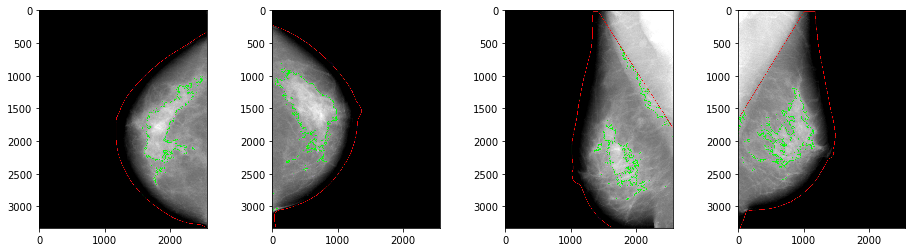

In [5]:
j = 0

plt.figure(figsize=(16,4))

c = 0

for i in part:
    c+=1
    
    p = os.path.join(path, patientList[j], str(patientList[j])+i, "Result_Images", str(patientList[j])+i+"_density_segmentation.jpg" )
    img=imread(p)
    
    
    plt.subplot(1,4,c)
    plt.imshow(img)

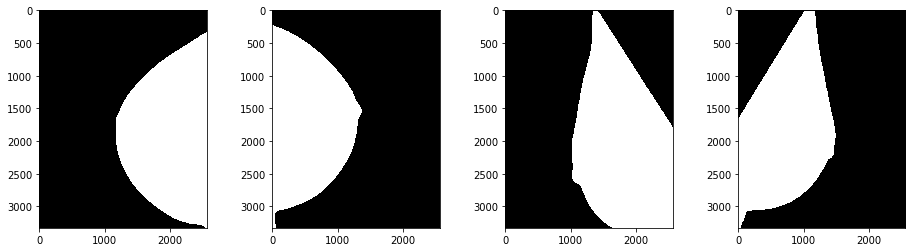

In [6]:
j = 0
plt.figure(figsize=(16,4))

matList = []

c = 0

for i in part:
    c+=1
    
    p = os.path.join(path, patientList[j], str(patientList[j])+i, "Result_Images", "Masks_"+str(patientList[j])+i+".mat" )
    a = loadmat(p)
    
    matList.append(a)
    
    plt.subplot(1,4,c)
    plt.imshow(a['res'][0][0][3], cmap='gray')


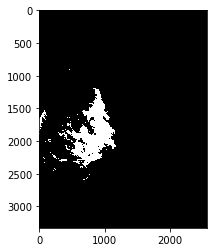

In [7]:
plt.imshow(a['res'][0][0][4], cmap='gray')

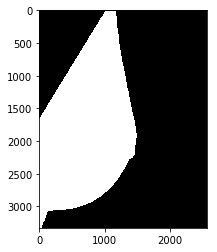

In [8]:
plt.imshow(a['res'][0][0][3], cmap='gray')

In [9]:
mat =matList[0]

In [10]:
def getLastPoint(a):

    filename = a['res'][0][0][5][0]
    print(filename)
    
    if 'L_CC' in filename:

        mat = a['res'][0][0][3]
        last_point = 0
        
        for i in range(1,mat.shape[1]):

            if np.sum(mat[:,-i])==0:    
                last_point = mat.shape[1] - i
                break
        
        vertMidPoint = np.argmax(a['res'][0][0][3][:,last_point + 1])



    elif "R_CC" in filename:

        mat = a['res'][0][0][3]
        last_point = 0
            
        for i in range(mat.shape[1]):

            if np.sum(mat[:,i])==0:
        
                last_point = i
                break
                
        vertMidPoint = np.argmax(a['res'][0][0][3][:,last_point - 1])
    else:
        pass
        
    return last_point, vertMidPoint, filename
    

In [11]:
getLastPoint(matList[1])

77098525_R_CC_1


(1368, 1536, '77098525_R_CC_1')

In [12]:
np.sum(matList[1]['res'][0][0][3][:,1367])

12

In [13]:
np.argmax(matList[1]['res'][0][0][3][:,1367])

1536

In [13]:
def plotMask(a):

    lastPoint, vertMidPoint, filename = getLastPoint(a)

    mat = a['res'][0][0][3]


    plt.title(filename)
    plt.imshow(mat, cmap='gray')


    if 'L_CC' in filename:
        markers = [round(x) for x in list(pd.Series(list(range(lastPoint,mat.shape[1]))).quantile([0,0.25,0.5,0.75,1.0]).values)]
    else:
        markers = [round(x) for x in list(pd.Series(list(range(lastPoint))).quantile([0,0.25,0.5,0.75,1.0]).values)]

    for mark in markers:
        plt.axvline(x=mark, c='blue')
        
    plt.axhline(y=vertMidPoint, c='red')

77098525_L_CC_1
77098525_R_CC_1


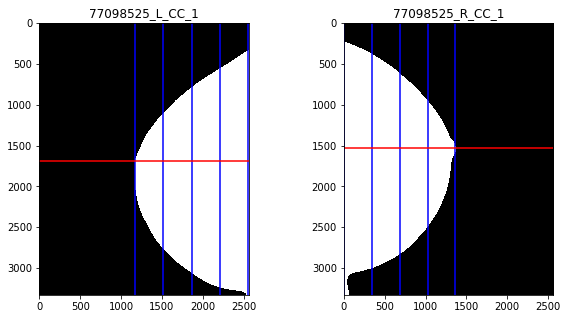

In [25]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plotMask(matList[0])

plt.subplot(1,2,2)
plotMask(matList[1])

77098525_L_CC_1


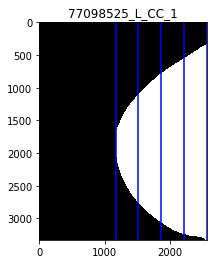

In [108]:
a = matList[0]

lastPoint, filename = getLastPoint(a)

mat = a['res'][0][0][3]


plt.title(filename)
plt.imshow(mat, cmap='gray')


if 'L_CC' in filename:
    markers = [round(x) for x in list(pd.Series(list(range(lastPoint,mat.shape[1]))).quantile([0,0.25,0.5,0.75,1.0]).values)]
else:
    markers = [round(x) for x in list(pd.Series(list(range(lastPoint))).quantile([0,0.25,0.5,0.75,1.0]).values)]

for mark in markers:
    plt.axvline(x=mark, c='blue')

In [43]:
matList[0]['res'][0][0][1]

array([[125.37280866]])

77098525_R_CC_1


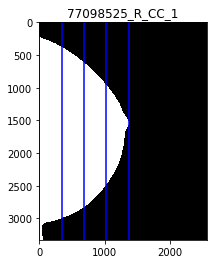

In [103]:
a = matList[1]

lastPoint, filename = getLastPoint(a)

## 3 represents the actual image array
mat = a['res'][0][0][3]


plt.title(filename)
plt.imshow(mat, cmap='gray')


if 'L_CC' in filename:
    markers = [round(x) for x in list(pd.Series(list(range(lastPoint,mat.shape[1]))).quantile([0,0.25,0.5,0.75,1.0]).values)]
else:
    markers = [round(x) for x in list(pd.Series(list(range(lastPoint))).quantile([0,0.25,0.5,0.75,1.0]).values)]

for mark in markers:
    plt.axvline(x=mark, c='blue')

[0.0, 291.5, 583.0, 874.5, 1166.0]

In [83]:
lastPoint

1167

In [65]:
np.sum(mat[:,1500])

1628

In [69]:
np.sum(mat[:,-2000])

0

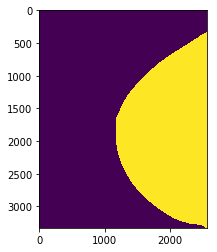

In [47]:
plt.imshow(mat)

In [50]:
np.sum(mat[:,1234])

768

In [27]:
a='/home/santhosr/Data/BreastMasks/77099745'

In [28]:
a.split("/")[-1]

'77099745'

### Transfer Breast Masks

In [11]:
fileList = pd.read_csv('/home/santhosr/Documents/Birad/BreastMasks/maskFileList.csv',header=None)
fileList = list(fileList.values.reshape(-1))

inputFolder = '/home/santhosr/Documents/Birad/BreastMasks/MaskFiles'

In [29]:
for i in range(16000,len(fileList)):
    
    patientId = str(fileList[i])
    
    path = 'get /cbica/projects/Mayo-Radiomics/RaceDL/Results/LIBRA/'+patientId+"/"+patientId+'_R_CC_1/Result_Images/Masks_'+patientId+'_R_CC_1.mat'
    print(path)
    
    path = 'get /cbica/projects/Mayo-Radiomics/RaceDL/Results/LIBRA/'+patientId+"/"+patientId+'_L_CC_1/Result_Images/Masks_'+patientId+'_L_CC_1.mat'
    print(path)
    

get /cbica/projects/Mayo-Radiomics/RaceDL/Results/LIBRA/75700520/75700520_R_CC_1/Result_Images/Masks_75700520_R_CC_1.mat
get /cbica/projects/Mayo-Radiomics/RaceDL/Results/LIBRA/75700520/75700520_L_CC_1/Result_Images/Masks_75700520_L_CC_1.mat
get /cbica/projects/Mayo-Radiomics/RaceDL/Results/LIBRA/4796411/4796411_R_CC_1/Result_Images/Masks_4796411_R_CC_1.mat
get /cbica/projects/Mayo-Radiomics/RaceDL/Results/LIBRA/4796411/4796411_L_CC_1/Result_Images/Masks_4796411_L_CC_1.mat
get /cbica/projects/Mayo-Radiomics/RaceDL/Results/LIBRA/3731918/3731918_R_CC_1/Result_Images/Masks_3731918_R_CC_1.mat
get /cbica/projects/Mayo-Radiomics/RaceDL/Results/LIBRA/3731918/3731918_L_CC_1/Result_Images/Masks_3731918_L_CC_1.mat
get /cbica/projects/Mayo-Radiomics/RaceDL/Results/LIBRA/75636220/75636220_R_CC_1/Result_Images/Masks_75636220_R_CC_1.mat
get /cbica/projects/Mayo-Radiomics/RaceDL/Results/LIBRA/75636220/75636220_L_CC_1/Result_Images/Masks_75636220_L_CC_1.mat
get /cbica/projects/Mayo-Radiomics/RaceDL/Re

### Generating Markers

In [14]:
inputFolder = '/home/santhosr/Documents/Birad/BreastMasks/MaskFiles'

fileList = os.listdir(inputFolder)

In [15]:
len(fileList)

26688

In [16]:
def getMarkers(filename, outputFile):
    
    patientID = filename.split("_")[1]
    
    f = open(outputFile,'a')
    
    p = os.path.join(filename)
    a = loadmat(p)

    mat = a['res'][0][0][3]

    lastPoint, vertMidPoint, filename = getLastPoint(a)
    
    
    if 'L_CC' in filename:
        markers = [round(x) for x in list(pd.Series(list(range(lastPoint,mat.shape[1]))).quantile([0,0.25,0.5,0.75,1.0]).values)]
        side = "L_CC_1"
    else:    
        markers = [round(x) for x in list(pd.Series(list(range(lastPoint))).quantile([0,0.25,0.5,0.75,1.0]).values)]
        side = "R_CC_1"

    f.writelines(str(patientID)+"_"+side + "|" + str(markers)+"|"+str(lastPoint)+"|"+str(vertMidPoint)+"|"+str(mat.shape[0])+"|"+str(mat.shape[1])+"\n")

        
    f.close()

In [17]:
outFilename = '/home/santhosr/Documents/Birad/BreastMasks/markerData.csv'

os.chdir('/home/santhosr/Documents/Birad/BreastMasks/MaskFiles/')

In [18]:
errorList = []

for i in tqdm(range(1000,26688)):
    try:
        getMarkers(fileList[i], outFilename)
    except:
        errorList.append(fileList[i])

  0%|          | 2/25688 [00:00<36:35, 11.70it/s]

5195717_L_CC_1
3153335_R_CC_1
76221498_R_CC_1


  0%|          | 6/25688 [00:00<34:33, 12.38it/s]

4808384_L_CC_1
4799697_L_CC_1
76190027_L_CC_1
3609370_L_CC_1


  0%|          | 10/25688 [00:00<30:11, 14.17it/s]

76460017_R_CC_1
77095827_R_CC_1
3801689_L_CC_1
76177849_R_CC_1


  0%|          | 14/25688 [00:01<32:08, 13.32it/s]

4169088_L_CC_1
4904796_R_CC_1
4086558_L_CC_1


  0%|          | 18/25688 [00:01<28:50, 14.83it/s]

4879512_L_CC_1
3849409_R_CC_1
75788357_R_CC_1
4121807_R_CC_1


  0%|          | 20/25688 [00:01<30:26, 14.05it/s]

76487464_R_CC_1
76193390_R_CC_1
4938521_L_CC_1


  0%|          | 24/25688 [00:01<29:20, 14.58it/s]

4714649_L_CC_1
75633789_R_CC_1
5116982_L_CC_1
4617282_R_CC_1


  0%|          | 28/25688 [00:01<27:50, 15.37it/s]

76080878_L_CC_1
76847340_L_CC_1
76636362_R_CC_1
4902170_L_CC_1


  0%|          | 32/25688 [00:02<28:56, 14.78it/s]

76500092_R_CC_1
4841693_R_CC_1
75687311_L_CC_1


  0%|          | 34/25688 [00:02<28:32, 14.98it/s]

76242848_L_CC_1
76919478_R_CC_1
4129567_L_CC_1


  0%|          | 38/25688 [00:02<28:44, 14.88it/s]

75434344_R_CC_1
4779934_L_CC_1
4998297_R_CC_1


  0%|          | 40/25688 [00:02<30:31, 14.00it/s]

75712907_R_CC_1
3051278_L_CC_1
75715877_R_CC_1


  0%|          | 44/25688 [00:03<30:08, 14.18it/s]

3735007_L_CC_1
4320497_L_CC_1
76026819_R_CC_1
76812902_L_CC_1


  0%|          | 48/25688 [00:03<27:37, 15.47it/s]

3314023_L_CC_1
76763811_L_CC_1
76486455_L_CC_1
75810026_R_CC_1


  0%|          | 52/25688 [00:03<27:55, 15.30it/s]

75465659_R_CC_1
4915184_L_CC_1
3588572_L_CC_1


  0%|          | 54/25688 [00:03<28:18, 15.09it/s]

4711544_R_CC_1
76653237_R_CC_1
75604214_R_CC_1


  0%|          | 58/25688 [00:03<27:00, 15.82it/s]

76695861_R_CC_1
75373733_R_CC_1
75761640_R_CC_1
75761042_L_CC_1


  0%|          | 62/25688 [00:04<27:46, 15.38it/s]

75738097_L_CC_1
75196734_L_CC_1
75865560_R_CC_1
4120476_R_CC_1


  0%|          | 66/25688 [00:04<27:28, 15.55it/s]

75111529_R_CC_1
75457522_R_CC_1
75120160_R_CC_1


  0%|          | 68/25688 [00:04<28:22, 15.05it/s]

3824201_L_CC_1
5246138_L_CC_1
75479138_L_CC_1
76443967_L_CC_1


  0%|          | 72/25688 [00:04<27:24, 15.58it/s]

4726830_R_CC_1
76728556_L_CC_1
76671495_R_CC_1


  0%|          | 76/25688 [00:05<28:46, 14.83it/s]

76205090_L_CC_1
5111549_R_CC_1
75520179_R_CC_1
75367397_L_CC_1


  0%|          | 80/25688 [00:05<27:16, 15.64it/s]

75477295_R_CC_1
75250349_L_CC_1
5114539_L_CC_1


  0%|          | 84/25688 [00:05<27:31, 15.51it/s]

5156766_L_CC_1
4006148_R_CC_1
4082045_R_CC_1
76441892_R_CC_1


  0%|          | 86/25688 [00:05<28:54, 14.76it/s]

75158143_R_CC_1
76659767_R_CC_1
75612557_L_CC_1


  0%|          | 90/25688 [00:06<28:06, 15.18it/s]

75679356_R_CC_1
4128217_L_CC_1
75839101_L_CC_1
3742223_R_CC_1


  0%|          | 94/25688 [00:06<28:00, 15.23it/s]

3754507_L_CC_1
3463700_R_CC_1
5106558_L_CC_1


  0%|          | 96/25688 [00:06<28:01, 15.22it/s]

75533230_L_CC_1
4962043_R_CC_1
4391287_L_CC_1
3716856_L_CC_1


  0%|          | 102/25688 [00:06<27:30, 15.50it/s]

4847732_R_CC_1
3984028_R_CC_1
76368025_L_CC_1
76117044_R_CC_1


  0%|          | 104/25688 [00:07<28:57, 14.73it/s]

75896359_R_CC_1
76820102_L_CC_1
3613106_L_CC_1


  0%|          | 108/25688 [00:07<29:08, 14.63it/s]

75556893_R_CC_1
5160403_R_CC_1
3835526_R_CC_1
75288640_L_CC_1


  0%|          | 112/25688 [00:07<28:47, 14.81it/s]

76486679_R_CC_1
5126791_R_CC_1
76923836_R_CC_1


  0%|          | 116/25688 [00:07<28:04, 15.18it/s]

4903731_L_CC_1
75343661_L_CC_1
5105727_R_CC_1
75800447_L_CC_1


  0%|          | 118/25688 [00:07<26:15, 16.23it/s]

4111630_L_CC_1
75059076_R_CC_1
76752980_R_CC_1
3560546_L_CC_1


  0%|          | 122/25688 [00:08<29:01, 14.68it/s]

3490737_R_CC_1
76109678_L_CC_1
4080272_R_CC_1


  0%|          | 126/25688 [00:08<28:29, 14.95it/s]

75066352_L_CC_1
4765447_R_CC_1
76067656_L_CC_1
4003556_L_CC_1


  1%|          | 130/25688 [00:08<26:50, 15.87it/s]

76022798_L_CC_1
76277510_R_CC_1
76242848_R_CC_1
76219162_R_CC_1


  1%|          | 134/25688 [00:08<27:48, 15.31it/s]

76584387_R_CC_1
4808188_L_CC_1
75181991_R_CC_1


  1%|          | 138/25688 [00:09<25:54, 16.44it/s]

75896363_R_CC_1
4013941_R_CC_1
75766276_L_CC_1
75309196_R_CC_1


  1%|          | 142/25688 [00:09<26:47, 15.89it/s]

4956509_R_CC_1
76862772_R_CC_1
5119406_R_CC_1
3616072_R_CC_1


  1%|          | 144/25688 [00:09<28:17, 15.05it/s]

76741345_R_CC_1
76302498_L_CC_1
75473397_R_CC_1


  1%|          | 148/25688 [00:09<28:35, 14.89it/s]

75054917_R_CC_1
4195446_L_CC_1
4724733_L_CC_1
75714243_L_CC_1


  1%|          | 152/25688 [00:10<28:56, 14.70it/s]

4699348_L_CC_1
76903174_R_CC_1
76366957_R_CC_1


  1%|          | 154/25688 [00:10<30:27, 13.98it/s]

75160836_R_CC_1
4933777_L_CC_1
75848228_R_CC_1


  1%|          | 158/25688 [00:10<31:50, 13.36it/s]

75676193_R_CC_1
75693914_R_CC_1
75179396_L_CC_1


  1%|          | 160/25688 [00:10<31:54, 13.34it/s]

5107168_R_CC_1
4157616_L_CC_1
4069054_R_CC_1


  1%|          | 164/25688 [00:11<32:40, 13.02it/s]

4296792_L_CC_1
75228476_L_CC_1
75183788_R_CC_1


  1%|          | 168/25688 [00:11<28:27, 14.95it/s]

75936029_R_CC_1
76434437_R_CC_1
75496949_L_CC_1
76052455_L_CC_1


  1%|          | 170/25688 [00:11<28:47, 14.78it/s]

3065635_R_CC_1
75452829_R_CC_1
4895358_L_CC_1
75470133_L_CC_1


  1%|          | 174/25688 [00:11<29:59, 14.18it/s]

76396962_L_CC_1
75315366_R_CC_1
76897411_R_CC_1


  1%|          | 178/25688 [00:12<30:40, 13.86it/s]

5118169_L_CC_1
76349088_L_CC_1
5131662_R_CC_1


  1%|          | 180/25688 [00:12<30:57, 13.73it/s]

75434666_L_CC_1
76319972_L_CC_1
76697229_L_CC_1
76354375_L_CC_1


  1%|          | 184/25688 [00:12<28:52, 14.72it/s]

76071433_L_CC_1
76175214_R_CC_1
75780805_R_CC_1


  1%|          | 188/25688 [00:12<30:56, 13.74it/s]

4686815_R_CC_1
75170946_L_CC_1
76595829_L_CC_1


  1%|          | 190/25688 [00:12<28:24, 14.96it/s]

76468844_R_CC_1
5107335_R_CC_1
76745085_L_CC_1
4185693_R_CC_1


  1%|          | 194/25688 [00:13<28:48, 14.75it/s]

4821726_L_CC_1
4401464_L_CC_1
3091186_R_CC_1
3078940_L_CC_1


  1%|          | 198/25688 [00:13<29:23, 14.46it/s]

76944327_R_CC_1
76852533_R_CC_1
3801014_R_CC_1


  1%|          | 202/25688 [00:13<31:33, 13.46it/s]

75598696_R_CC_1
4276619_L_CC_1
75374108_L_CC_1


  1%|          | 204/25688 [00:13<31:11, 13.62it/s]

75475989_R_CC_1
4850582_R_CC_1
76435185_L_CC_1
4604436_L_CC_1


  1%|          | 209/25688 [00:14<26:09, 16.23it/s]

76519958_R_CC_1
4227870_R_CC_1
4889509_R_CC_1
76593788_L_CC_1


  1%|          | 213/25688 [00:14<29:52, 14.21it/s]

4155011_R_CC_1
75471507_L_CC_1
75245802_R_CC_1


  1%|          | 215/25688 [00:14<28:55, 14.67it/s]

76277510_L_CC_1
76062107_L_CC_1
4078568_L_CC_1


  1%|          | 219/25688 [00:14<29:51, 14.22it/s]

75232689_L_CC_1
75602399_L_CC_1
76753613_R_CC_1


  1%|          | 221/25688 [00:15<30:16, 14.02it/s]

4934609_R_CC_1
76724901_R_CC_1
76366497_R_CC_1


  1%|          | 225/25688 [00:15<28:19, 14.98it/s]

75011285_R_CC_1
76275826_L_CC_1
75226301_L_CC_1
5224608_R_CC_1


  1%|          | 229/25688 [00:15<29:30, 14.38it/s]

4939108_L_CC_1
4463766_R_CC_1
3095624_R_CC_1
76877865_L_CC_1


  1%|          | 234/25688 [00:15<26:49, 15.81it/s]

4798356_L_CC_1
4449086_R_CC_1
76847340_R_CC_1
4168552_L_CC_1


  1%|          | 237/25688 [00:16<25:54, 16.37it/s]

76142430_R_CC_1
76197267_R_CC_1
75601283_R_CC_1
3646500_L_CC_1


  1%|          | 241/25688 [00:16<26:39, 15.91it/s]

76072517_L_CC_1
3707040_L_CC_1
75354758_R_CC_1
3897130_L_CC_1


  1%|          | 245/25688 [00:16<26:21, 16.08it/s]

5166155_R_CC_1
76891753_L_CC_1
4693583_R_CC_1


  1%|          | 247/25688 [00:16<26:33, 15.97it/s]

5277751_R_CC_1
76608347_R_CC_1
76961453_L_CC_1
76134156_R_CC_1


  1%|          | 251/25688 [00:16<27:44, 15.29it/s]

76643311_R_CC_1
5104825_L_CC_1
75290806_R_CC_1


  1%|          | 255/25688 [00:17<28:15, 15.00it/s]

3073655_R_CC_1
76953648_R_CC_1
76514137_R_CC_1
76427878_R_CC_1


  1%|          | 259/25688 [00:17<30:50, 13.74it/s]

3615438_R_CC_1
75712936_R_CC_1
76201160_R_CC_1


  1%|          | 261/25688 [00:17<30:39, 13.82it/s]

75384545_R_CC_1
75227901_R_CC_1
5223053_L_CC_1


  1%|          | 265/25688 [00:17<29:29, 14.37it/s]

76119915_L_CC_1
5204725_L_CC_1
3464191_R_CC_1
4767062_R_CC_1


  1%|          | 269/25688 [00:18<30:17, 13.99it/s]

3095479_L_CC_1
75482751_L_CC_1
75821044_R_CC_1


  1%|          | 271/25688 [00:18<32:27, 13.05it/s]

75835843_R_CC_1
75190715_R_CC_1
75805410_R_CC_1
75898453_L_CC_1


  1%|          | 275/25688 [00:18<27:09, 15.60it/s]

75075575_R_CC_1
76218207_L_CC_1
4393284_R_CC_1
4885182_R_CC_1


  1%|          | 279/25688 [00:18<26:34, 15.93it/s]

76833012_R_CC_1
4846959_L_CC_1
76032302_L_CC_1
4625361_R_CC_1


  1%|          | 284/25688 [00:19<26:46, 15.81it/s]

76580520_L_CC_1
75359788_L_CC_1
76979315_L_CC_1
3080606_L_CC_1


  1%|          | 287/25688 [00:19<25:04, 16.88it/s]

5104720_L_CC_1
5228148_L_CC_1
5230407_R_CC_1


  1%|          | 291/25688 [00:19<27:08, 15.59it/s]

75702378_R_CC_1
5111951_L_CC_1
5189879_R_CC_1
75733856_L_CC_1


  1%|          | 294/25688 [00:19<24:32, 17.25it/s]

3072147_L_CC_1
4001543_L_CC_1
75386232_L_CC_1
4478274_L_CC_1
5242883_L_CC_1


  1%|          | 299/25688 [00:20<26:29, 15.98it/s]

4185937_L_CC_1
76921139_R_CC_1
76650756_R_CC_1


  1%|          | 303/25688 [00:20<28:41, 14.74it/s]

75096312_R_CC_1
4871072_L_CC_1
3533020_R_CC_1


  1%|          | 307/25688 [00:20<27:27, 15.41it/s]

4569671_L_CC_1
76330491_L_CC_1
75521990_L_CC_1
4672048_L_CC_1


  1%|          | 310/25688 [00:20<25:25, 16.64it/s]

75008788_R_CC_1
75661721_L_CC_1
76063850_L_CC_1
3529680_L_CC_1


  1%|          | 314/25688 [00:20<27:46, 15.23it/s]

5151085_L_CC_1
75530801_L_CC_1
75039302_L_CC_1


  1%|          | 316/25688 [00:21<29:12, 14.47it/s]

5281462_R_CC_1
5206330_R_CC_1
3764433_R_CC_1


  1%|          | 320/25688 [00:21<31:49, 13.29it/s]

4964208_R_CC_1
4966346_R_CC_1
75928779_R_CC_1


  1%|▏         | 322/25688 [00:21<32:30, 13.01it/s]

75146814_L_CC_1
75891675_L_CC_1
76712302_L_CC_1


  1%|▏         | 326/25688 [00:21<32:35, 12.97it/s]

5192561_L_CC_1
4440143_R_CC_1
75010097_L_CC_1


  1%|▏         | 328/25688 [00:22<32:17, 13.09it/s]

75979574_R_CC_1
75648891_L_CC_1
75222959_R_CC_1


  1%|▏         | 332/25688 [00:22<31:53, 13.25it/s]

3616865_R_CC_1
75821044_L_CC_1
75120251_L_CC_1


  1%|▏         | 336/25688 [00:22<27:47, 15.20it/s]

75981887_L_CC_1
4949186_L_CC_1
4648917_R_CC_1
76399977_R_CC_1


  1%|▏         | 338/25688 [00:22<29:32, 14.30it/s]

3036765_R_CC_1
4533275_L_CC_1
75801754_L_CC_1


  1%|▏         | 342/25688 [00:23<32:38, 12.94it/s]

76549025_R_CC_1
76842282_R_CC_1
75870837_L_CC_1


  1%|▏         | 346/25688 [00:23<27:58, 15.10it/s]

76518292_L_CC_1
4368573_R_CC_1
4918625_R_CC_1
76936814_L_CC_1


  1%|▏         | 348/25688 [00:23<27:34, 15.32it/s]

4808394_L_CC_1
4982111_L_CC_1
76583448_R_CC_1
75391511_R_CC_1


  1%|▏         | 352/25688 [00:23<27:17, 15.48it/s]

76705306_L_CC_1
76106232_L_CC_1
76926439_R_CC_1


  1%|▏         | 356/25688 [00:24<29:25, 14.35it/s]

4654469_L_CC_1
76654007_L_CC_1
75617010_L_CC_1
76440964_L_CC_1


  1%|▏         | 360/25688 [00:24<30:00, 14.07it/s]

75009463_R_CC_1
4000383_L_CC_1
5273040_R_CC_1


  1%|▏         | 362/25688 [00:24<31:08, 13.55it/s]

4801866_L_CC_1
5318110_R_CC_1
5273771_R_CC_1


  1%|▏         | 366/25688 [00:24<29:11, 14.46it/s]

3534059_R_CC_1
75619528_R_CC_1
4730615_L_CC_1
75231055_L_CC_1


  1%|▏         | 371/25688 [00:24<24:02, 17.56it/s]

75616352_R_CC_1
5157116_R_CC_1
75672616_L_CC_1
75051186_L_CC_1
76233611_R_CC_1


  1%|▏         | 375/25688 [00:25<25:52, 16.30it/s]

75743903_L_CC_1
4884084_L_CC_1
75409561_R_CC_1
76710916_L_CC_1


  1%|▏         | 379/25688 [00:25<28:04, 15.03it/s]

3602231_R_CC_1
76584883_L_CC_1
76525251_L_CC_1


  1%|▏         | 381/25688 [00:25<29:06, 14.49it/s]

76340601_R_CC_1
76662083_L_CC_1
75630391_L_CC_1


  1%|▏         | 385/25688 [00:25<26:44, 15.77it/s]

5129862_R_CC_1
76525983_R_CC_1
76384714_R_CC_1
3641693_L_CC_1


  2%|▏         | 389/25688 [00:26<29:04, 14.51it/s]

75279820_R_CC_1
75559184_R_CC_1
5257286_L_CC_1


  2%|▏         | 391/25688 [00:26<27:08, 15.53it/s]

75149720_L_CC_1
76416848_R_CC_1
75397670_R_CC_1
4985966_R_CC_1


  2%|▏         | 395/25688 [00:26<30:02, 14.03it/s]

5252455_L_CC_1
5209804_R_CC_1
76376006_L_CC_1


  2%|▏         | 399/25688 [00:26<30:21, 13.88it/s]

75478763_R_CC_1
75549963_R_CC_1
75944422_L_CC_1


  2%|▏         | 403/25688 [00:27<27:45, 15.18it/s]

3972153_L_CC_1
3676124_R_CC_1
75496949_R_CC_1
4957307_L_CC_1


  2%|▏         | 405/25688 [00:27<29:17, 14.39it/s]

75245936_L_CC_1
4275493_R_CC_1
3767892_R_CC_1


  2%|▏         | 409/25688 [00:27<30:40, 13.74it/s]

76624326_R_CC_1
76938399_R_CC_1
75374708_L_CC_1


  2%|▏         | 411/25688 [00:27<31:04, 13.55it/s]

5212459_R_CC_1
75105938_L_CC_1
76798169_R_CC_1


  2%|▏         | 415/25688 [00:28<29:06, 14.47it/s]

75239305_R_CC_1
75024319_L_CC_1
4962713_L_CC_1


  2%|▏         | 419/25688 [00:28<27:35, 15.26it/s]

75825151_L_CC_1
75475734_R_CC_1
75874455_R_CC_1
3995516_L_CC_1


  2%|▏         | 422/25688 [00:28<25:49, 16.30it/s]

75612259_R_CC_1
4082003_R_CC_1
5174971_L_CC_1
75391712_R_CC_1


  2%|▏         | 426/25688 [00:28<31:35, 13.33it/s]

75105917_R_CC_1
76469396_L_CC_1
76668626_L_CC_1


  2%|▏         | 428/25688 [00:28<30:48, 13.66it/s]

75114822_L_CC_1
76052206_R_CC_1
76829298_L_CC_1


  2%|▏         | 432/25688 [00:29<31:49, 13.23it/s]

75260033_L_CC_1
3678915_R_CC_1
75243407_L_CC_1
75826017_L_CC_1


  2%|▏         | 435/25688 [00:29<29:52, 14.09it/s]

4932045_L_CC_1
5233702_R_CC_1
4873311_R_CC_1


  2%|▏         | 439/25688 [00:29<28:54, 14.56it/s]

75033789_L_CC_1
4696266_L_CC_1
75819848_L_CC_1
75951552_R_CC_1


  2%|▏         | 442/25688 [00:29<27:21, 15.38it/s]

75623580_L_CC_1
4947894_R_CC_1
4699043_L_CC_1


  2%|▏         | 446/25688 [00:30<28:51, 14.58it/s]

3982442_L_CC_1
75088305_R_CC_1
76949428_R_CC_1


  2%|▏         | 448/25688 [00:30<28:10, 14.93it/s]

5232567_L_CC_1
76712445_R_CC_1
76953099_R_CC_1


  2%|▏         | 452/25688 [00:30<31:15, 13.46it/s]

75745607_L_CC_1
75048200_R_CC_1
5143460_L_CC_1


  2%|▏         | 454/25688 [00:30<31:51, 13.20it/s]

4845307_L_CC_1
75106106_R_CC_1
76101273_R_CC_1
5209350_R_CC_1


  2%|▏         | 458/25688 [00:31<30:44, 13.68it/s]

76342352_R_CC_1
75744043_L_CC_1
4787102_R_CC_1


  2%|▏         | 462/25688 [00:31<29:12, 14.40it/s]

76884240_R_CC_1
4059880_L_CC_1
76254390_R_CC_1


  2%|▏         | 464/25688 [00:31<30:10, 13.93it/s]

4668007_R_CC_1
76129561_R_CC_1
75098797_R_CC_1


  2%|▏         | 468/25688 [00:31<32:26, 12.96it/s]

4995761_R_CC_1
4197195_R_CC_1
3997989_L_CC_1


  2%|▏         | 470/25688 [00:31<31:23, 13.39it/s]

76649697_L_CC_1
75403674_L_CC_1
75775464_L_CC_1


  2%|▏         | 474/25688 [00:32<31:30, 13.34it/s]

76993132_L_CC_1
76565842_L_CC_1
76797850_R_CC_1


  2%|▏         | 476/25688 [00:32<32:39, 12.86it/s]

4815715_R_CC_1
4731897_L_CC_1
76775331_R_CC_1


  2%|▏         | 480/25688 [00:32<32:58, 12.74it/s]

3454496_L_CC_1
4082724_L_CC_1
76049020_L_CC_1


  2%|▏         | 482/25688 [00:32<33:27, 12.56it/s]

75799583_R_CC_1
75725894_L_CC_1
75794675_R_CC_1


  2%|▏         | 486/25688 [00:33<29:56, 14.03it/s]

76647619_L_CC_1
75124950_L_CC_1
75477311_L_CC_1
76831787_L_CC_1


  2%|▏         | 490/25688 [00:33<28:27, 14.75it/s]

76731007_L_CC_1
3414555_L_CC_1
75161870_R_CC_1


  2%|▏         | 492/25688 [00:33<29:02, 14.46it/s]

4994442_L_CC_1
76538572_R_CC_1
75261422_R_CC_1
76640497_L_CC_1


  2%|▏         | 496/25688 [00:33<28:59, 14.48it/s]

75979546_R_CC_1
76718236_L_CC_1
76178006_R_CC_1


  2%|▏         | 500/25688 [00:34<29:42, 14.13it/s]

75514189_R_CC_1
4199074_L_CC_1
76644929_R_CC_1


  2%|▏         | 502/25688 [00:34<30:15, 13.87it/s]

4797045_R_CC_1
3500032_L_CC_1
3534688_R_CC_1


  2%|▏         | 506/25688 [00:34<30:54, 13.58it/s]

76246891_L_CC_1
75792308_R_CC_1
76314971_R_CC_1


  2%|▏         | 508/25688 [00:34<32:05, 13.08it/s]

4945037_R_CC_1
76191504_L_CC_1
75807301_L_CC_1


  2%|▏         | 512/25688 [00:34<29:11, 14.37it/s]

76016788_R_CC_1
5257207_L_CC_1
76057081_L_CC_1


  2%|▏         | 514/25688 [00:35<28:52, 14.53it/s]

5185031_R_CC_1
4649166_L_CC_1
76881670_R_CC_1
4151954_L_CC_1


  2%|▏         | 518/25688 [00:35<31:29, 13.32it/s]

4738770_L_CC_1
4095101_L_CC_1
75541076_R_CC_1


  2%|▏         | 522/25688 [00:35<29:27, 14.24it/s]

4326074_L_CC_1
76683327_L_CC_1
76111471_L_CC_1
76758611_R_CC_1


  2%|▏         | 526/25688 [00:35<28:47, 14.56it/s]

75399779_L_CC_1
76712555_R_CC_1
4774698_L_CC_1


  2%|▏         | 528/25688 [00:36<29:35, 14.17it/s]

75213232_L_CC_1
75156295_R_CC_1
75994815_L_CC_1


  2%|▏         | 532/25688 [00:36<30:21, 13.81it/s]

76581794_L_CC_1
76247134_R_CC_1
4219788_L_CC_1


  2%|▏         | 534/25688 [00:36<28:03, 14.94it/s]

5144938_L_CC_1
76012841_L_CC_1
75966458_L_CC_1
4841077_R_CC_1


  2%|▏         | 538/25688 [00:36<29:40, 14.12it/s]

75377393_L_CC_1
4608437_R_CC_1
75239305_L_CC_1


  2%|▏         | 542/25688 [00:37<30:40, 13.66it/s]

75669542_R_CC_1
4344474_R_CC_1
4915051_L_CC_1


  2%|▏         | 544/25688 [00:37<30:56, 13.54it/s]

3654018_L_CC_1
76116215_R_CC_1
76759205_L_CC_1


  2%|▏         | 548/25688 [00:37<29:46, 14.07it/s]

3568781_R_CC_1
4019589_L_CC_1
4673372_R_CC_1
4701209_R_CC_1


  2%|▏         | 552/25688 [00:37<29:08, 14.37it/s]

76255029_R_CC_1
76830680_R_CC_1
3716653_R_CC_1


  2%|▏         | 554/25688 [00:37<31:08, 13.45it/s]

4201058_R_CC_1
75041733_R_CC_1
75918644_R_CC_1


  2%|▏         | 558/25688 [00:38<29:37, 14.14it/s]

75874074_L_CC_1
4438390_L_CC_1
5144755_R_CC_1
76539950_R_CC_1


  2%|▏         | 562/25688 [00:38<26:21, 15.89it/s]

4220462_L_CC_1
4341539_R_CC_1
3524367_R_CC_1
4782663_L_CC_1


  2%|▏         | 566/25688 [00:38<30:00, 13.95it/s]

4020286_L_CC_1
4745247_L_CC_1
76930538_L_CC_1


  2%|▏         | 568/25688 [00:38<28:51, 14.51it/s]

76775059_L_CC_1
76536569_R_CC_1
76921079_L_CC_1
75838951_L_CC_1


  2%|▏         | 572/25688 [00:39<31:59, 13.08it/s]

76676726_L_CC_1
75904104_R_CC_1
76460174_R_CC_1


  2%|▏         | 576/25688 [00:39<31:15, 13.39it/s]

4961137_L_CC_1
76322695_R_CC_1
4820913_R_CC_1


  2%|▏         | 578/25688 [00:39<32:26, 12.90it/s]

76197298_R_CC_1
5152277_R_CC_1
75213206_L_CC_1


  2%|▏         | 582/25688 [00:39<30:45, 13.60it/s]

4832814_R_CC_1
4777828_R_CC_1
76230231_L_CC_1


  2%|▏         | 584/25688 [00:40<29:17, 14.28it/s]

76272314_R_CC_1
75229178_R_CC_1
75851256_L_CC_1
3653949_L_CC_1
4848710_L_CC_1


  2%|▏         | 589/25688 [00:40<24:38, 16.97it/s]

75121007_L_CC_1
76321763_L_CC_1
76113383_L_CC_1
75120187_R_CC_1
76197626_R_CC_1


  2%|▏         | 594/25688 [00:40<25:32, 16.38it/s]

75222959_L_CC_1
4700259_L_CC_1
76345014_R_CC_1


  2%|▏         | 598/25688 [00:40<27:07, 15.42it/s]

76932045_R_CC_1
75572428_R_CC_1
76688857_R_CC_1
75028853_L_CC_1
76541983_L_CC_1


  2%|▏         | 603/25688 [00:41<24:13, 17.26it/s]

3805437_R_CC_1
75252789_L_CC_1
76645015_L_CC_1
5162660_R_CC_1


  2%|▏         | 607/25688 [00:41<26:10, 15.97it/s]

4531523_L_CC_1
75121747_L_CC_1
75874646_L_CC_1
76333731_R_CC_1


  2%|▏         | 611/25688 [00:41<27:34, 15.16it/s]

3600978_L_CC_1
3694878_R_CC_1
3043822_R_CC_1


  2%|▏         | 613/25688 [00:41<27:49, 15.02it/s]

4004567_L_CC_1
75952439_L_CC_1
4903508_R_CC_1


  2%|▏         | 617/25688 [00:42<29:06, 14.35it/s]

76718639_R_CC_1
3749726_L_CC_1
5124442_R_CC_1


  2%|▏         | 619/25688 [00:42<29:16, 14.27it/s]

76871644_L_CC_1
75470632_R_CC_1
75929189_R_CC_1


  2%|▏         | 623/25688 [00:42<29:19, 14.25it/s]

75586114_R_CC_1
76001721_R_CC_1
75236843_L_CC_1


  2%|▏         | 627/25688 [00:42<27:30, 15.18it/s]

75994371_R_CC_1
76847682_L_CC_1
4332545_R_CC_1
76539665_L_CC_1


  2%|▏         | 629/25688 [00:42<27:11, 15.36it/s]

75141758_R_CC_1
75255650_L_CC_1
76901067_L_CC_1


  2%|▏         | 633/25688 [00:43<30:19, 13.77it/s]

75196750_L_CC_1
75324864_L_CC_1
75310819_R_CC_1


  2%|▏         | 635/25688 [00:43<29:51, 13.99it/s]

75115270_R_CC_1
75504592_R_CC_1
76343727_R_CC_1


  2%|▏         | 639/25688 [00:43<29:06, 14.34it/s]

76268904_L_CC_1
4189546_L_CC_1
75784614_L_CC_1


  3%|▎         | 643/25688 [00:43<27:41, 15.07it/s]

76710493_L_CC_1
75312969_L_CC_1
4039597_R_CC_1
76200567_R_CC_1


  3%|▎         | 645/25688 [00:44<28:28, 14.66it/s]

75355158_R_CC_1
4960195_R_CC_1
75462346_R_CC_1


  3%|▎         | 649/25688 [00:44<27:32, 15.15it/s]

75952852_R_CC_1
76047242_L_CC_1
75663089_L_CC_1
76708037_L_CC_1


  3%|▎         | 653/25688 [00:44<31:03, 13.43it/s]

3565848_R_CC_1
75165565_R_CC_1
75553988_R_CC_1


  3%|▎         | 655/25688 [00:44<28:37, 14.58it/s]

75041761_L_CC_1
75074375_R_CC_1
75533615_R_CC_1


  3%|▎         | 657/25688 [00:44<31:47, 13.13it/s]

76294701_R_CC_1
3453923_L_CC_1
5302102_L_CC_1


  3%|▎         | 661/25688 [00:45<32:34, 12.81it/s]

76160266_L_CC_1
75214783_R_CC_1
4932984_R_CC_1


  3%|▎         | 665/25688 [00:45<29:05, 14.33it/s]

75010285_L_CC_1
3554356_R_CC_1
4314582_R_CC_1
76665167_L_CC_1


  3%|▎         | 669/25688 [00:45<27:43, 15.04it/s]

4040264_L_CC_1
75133955_R_CC_1
4866404_R_CC_1
4232538_L_CC_1


  3%|▎         | 674/25688 [00:46<25:37, 16.27it/s]

76636188_L_CC_1
75144498_L_CC_1
76018966_R_CC_1
3437239_R_CC_1


  3%|▎         | 678/25688 [00:46<23:31, 17.71it/s]

4042738_R_CC_1
3679710_L_CC_1
3768223_L_CC_1
5115259_R_CC_1
76795666_R_CC_1


  3%|▎         | 682/25688 [00:46<23:43, 17.57it/s]

75124610_L_CC_1
76156451_R_CC_1
76521243_R_CC_1
76045319_R_CC_1


  3%|▎         | 687/25688 [00:46<24:11, 17.22it/s]

4065626_R_CC_1
4863254_R_CC_1
5221659_L_CC_1
76821516_R_CC_1
4755730_L_CC_1


  3%|▎         | 690/25688 [00:46<22:47, 18.28it/s]

76475255_L_CC_1
5186293_R_CC_1
76891216_R_CC_1


  3%|▎         | 694/25688 [00:47<27:20, 15.24it/s]

4747663_R_CC_1
76896977_L_CC_1
75008270_R_CC_1


  3%|▎         | 696/25688 [00:47<27:38, 15.07it/s]

75131198_L_CC_1
5117120_R_CC_1
76273139_L_CC_1


  3%|▎         | 700/25688 [00:47<29:29, 14.12it/s]

76681681_R_CC_1
4351543_L_CC_1
75342962_L_CC_1


  3%|▎         | 702/25688 [00:47<30:17, 13.75it/s]

4619873_L_CC_1
4664495_R_CC_1
76079268_R_CC_1


  3%|▎         | 706/25688 [00:48<31:42, 13.13it/s]

76796138_R_CC_1
75756085_L_CC_1
5286009_R_CC_1


  3%|▎         | 710/25688 [00:48<27:58, 14.88it/s]

4322165_R_CC_1
4994389_R_CC_1
76755511_R_CC_1
76876381_L_CC_1


  3%|▎         | 712/25688 [00:48<29:26, 14.14it/s]

4238820_R_CC_1
4154998_R_CC_1
3565848_L_CC_1


  3%|▎         | 716/25688 [00:48<30:35, 13.60it/s]

75340354_L_CC_1
4745786_R_CC_1
5182372_R_CC_1


  3%|▎         | 718/25688 [00:49<31:13, 13.33it/s]

76414706_R_CC_1
76048784_R_CC_1
4552059_R_CC_1


  3%|▎         | 722/25688 [00:49<29:02, 14.33it/s]

75052133_L_CC_1
75673411_L_CC_1
76201929_L_CC_1
75599457_L_CC_1


  3%|▎         | 726/25688 [00:49<27:51, 14.94it/s]

75483328_L_CC_1
5252340_R_CC_1
3088971_L_CC_1


  3%|▎         | 728/25688 [00:49<27:54, 14.91it/s]

76022244_R_CC_1
4934915_L_CC_1
76922993_L_CC_1
4840264_R_CC_1


  3%|▎         | 733/25688 [00:49<27:22, 15.20it/s]

76535361_R_CC_1
76953558_L_CC_1
76619609_R_CC_1


  3%|▎         | 735/25688 [00:50<28:22, 14.65it/s]

3034996_L_CC_1
75075419_R_CC_1
4994060_L_CC_1


  3%|▎         | 739/25688 [00:50<30:46, 13.51it/s]

76171112_L_CC_1
75367172_L_CC_1
2910243_L_CC_1


  3%|▎         | 741/25688 [00:50<30:34, 13.60it/s]

76803356_R_CC_1
75359047_R_CC_1
75616949_L_CC_1


  3%|▎         | 745/25688 [00:50<31:08, 13.35it/s]

5308021_R_CC_1
4726809_L_CC_1
3768963_L_CC_1


  3%|▎         | 747/25688 [00:51<31:56, 13.02it/s]

4778145_L_CC_1
4620890_R_CC_1
76631179_R_CC_1
76405345_R_CC_1


  3%|▎         | 752/25688 [00:51<27:40, 15.02it/s]

76473955_L_CC_1
4990757_R_CC_1
76198385_R_CC_1
76489008_R_CC_1


  3%|▎         | 756/25688 [00:51<27:12, 15.27it/s]

3072339_L_CC_1
4754029_L_CC_1
4058121_R_CC_1
77099908_L_CC_1


  3%|▎         | 759/25688 [00:51<24:59, 16.62it/s]

76099921_L_CC_1
75144569_R_CC_1
76744308_L_CC_1
76999580_L_CC_1


  3%|▎         | 763/25688 [00:52<27:09, 15.30it/s]

76641117_L_CC_1
76842282_L_CC_1
5191007_R_CC_1


  3%|▎         | 767/25688 [00:52<26:11, 15.86it/s]

75977708_L_CC_1
76494039_R_CC_1
3563161_L_CC_1
4628222_L_CC_1


  3%|▎         | 771/25688 [00:52<29:56, 13.87it/s]

75507162_R_CC_1
76514893_L_CC_1
75177938_L_CC_1


  3%|▎         | 773/25688 [00:52<30:32, 13.60it/s]

75185150_L_CC_1
76744489_R_CC_1
76831492_L_CC_1


  3%|▎         | 777/25688 [00:53<31:08, 13.33it/s]

75771236_R_CC_1
3511811_R_CC_1
75151278_R_CC_1


  3%|▎         | 779/25688 [00:53<30:02, 13.82it/s]

76764660_R_CC_1
75207204_L_CC_1
76596878_R_CC_1
76500179_R_CC_1


  3%|▎         | 783/25688 [00:53<30:02, 13.82it/s]

3588679_L_CC_1
75115697_L_CC_1
3714186_R_CC_1


  3%|▎         | 787/25688 [00:53<29:07, 14.25it/s]

3542379_R_CC_1
75568391_R_CC_1
5182089_L_CC_1
3763856_L_CC_1


  3%|▎         | 791/25688 [00:53<26:26, 15.70it/s]

75874186_L_CC_1
75302333_L_CC_1
76242777_L_CC_1
76855862_L_CC_1


  3%|▎         | 795/25688 [00:54<26:25, 15.70it/s]

75395784_R_CC_1
76561510_L_CC_1
75190768_R_CC_1


  3%|▎         | 797/25688 [00:54<27:58, 14.83it/s]

5257202_L_CC_1
76788435_L_CC_1
76204098_L_CC_1


  3%|▎         | 802/25688 [00:54<26:16, 15.78it/s]

3781305_R_CC_1
5232312_L_CC_1
75939521_L_CC_1
3671445_L_CC_1
76652322_R_CC_1


  3%|▎         | 806/25688 [00:54<27:23, 15.14it/s]

75473116_R_CC_1
4006047_R_CC_1
4980587_R_CC_1


  3%|▎         | 810/25688 [00:55<25:28, 16.28it/s]

75802974_R_CC_1
75024409_R_CC_1
76480623_L_CC_1
4344771_R_CC_1


  3%|▎         | 813/25688 [00:55<24:52, 16.67it/s]

76188287_R_CC_1
75384350_R_CC_1
5209629_R_CC_1
3587539_L_CC_1


  3%|▎         | 817/25688 [00:55<25:44, 16.10it/s]

5319482_L_CC_1
76063323_R_CC_1
3636670_L_CC_1
76993851_R_CC_1


  3%|▎         | 821/25688 [00:55<27:27, 15.09it/s]

3692442_L_CC_1
76228789_R_CC_1
76171236_R_CC_1


  3%|▎         | 823/25688 [00:56<29:42, 13.95it/s]

76407151_R_CC_1
75084845_L_CC_1
76210432_R_CC_1


  3%|▎         | 827/25688 [00:56<31:09, 13.30it/s]

3036236_R_CC_1
76886488_R_CC_1
4492888_L_CC_1


  3%|▎         | 829/25688 [00:56<31:18, 13.23it/s]

3719366_L_CC_1
4722501_R_CC_1
76419232_R_CC_1


  3%|▎         | 833/25688 [00:56<28:32, 14.52it/s]

4457116_L_CC_1
4011341_R_CC_1
75797576_L_CC_1
75672540_R_CC_1


  3%|▎         | 837/25688 [00:57<29:16, 14.15it/s]

75951324_R_CC_1
75384271_L_CC_1
75857344_R_CC_1
76222023_R_CC_1


  3%|▎         | 841/25688 [00:57<28:38, 14.46it/s]

75875731_R_CC_1
75169296_L_CC_1
76193630_L_CC_1


  3%|▎         | 843/25688 [00:57<28:52, 14.34it/s]

75569574_L_CC_1
75067788_R_CC_1
75395410_L_CC_1


  3%|▎         | 847/25688 [00:57<29:46, 13.90it/s]

76033295_R_CC_1
76376228_L_CC_1
4752859_L_CC_1


  3%|▎         | 849/25688 [00:57<29:54, 13.84it/s]

5128743_L_CC_1
75115108_L_CC_1
3757851_R_CC_1


  3%|▎         | 853/25688 [00:58<29:33, 14.01it/s]

4003414_R_CC_1
3985290_R_CC_1
76115696_L_CC_1
75785455_L_CC_1


  3%|▎         | 857/25688 [00:58<27:44, 14.92it/s]

75919522_R_CC_1
75228890_R_CC_1
4819892_L_CC_1
5235079_L_CC_1


  3%|▎         | 861/25688 [00:58<29:29, 14.03it/s]

4840207_L_CC_1
4961113_L_CC_1
4818694_R_CC_1


  3%|▎         | 863/25688 [00:58<27:38, 14.97it/s]

75368868_L_CC_1
75005577_L_CC_1
5212765_L_CC_1
75749465_L_CC_1
4926833_L_CC_1


  3%|▎         | 870/25688 [00:59<24:44, 16.72it/s]

75956944_L_CC_1
75102347_R_CC_1
4993143_L_CC_1
76758645_R_CC_1


  3%|▎         | 872/25688 [00:59<27:11, 15.21it/s]

76501781_R_CC_1
75923480_L_CC_1
76785942_L_CC_1


  3%|▎         | 876/25688 [00:59<31:14, 13.23it/s]

4702216_R_CC_1
75631917_L_CC_1
75771425_R_CC_1


  3%|▎         | 880/25688 [00:59<27:34, 15.00it/s]

75857344_L_CC_1
75621440_R_CC_1
3058563_L_CC_1
75348714_R_CC_1


  3%|▎         | 884/25688 [01:00<25:56, 15.93it/s]

76214841_R_CC_1
4779276_L_CC_1
4755172_R_CC_1
76731877_R_CC_1


  3%|▎         | 888/25688 [01:00<24:25, 16.92it/s]

5196605_R_CC_1
76011221_R_CC_1
76801678_L_CC_1
4126766_L_CC_1


  3%|▎         | 892/25688 [01:00<25:10, 16.42it/s]

76254224_R_CC_1
75720261_R_CC_1
75363308_L_CC_1
75945114_R_CC_1


  3%|▎         | 894/25688 [01:00<25:41, 16.08it/s]

4857251_L_CC_1
76964517_R_CC_1
75670354_R_CC_1


  3%|▎         | 898/25688 [01:01<27:33, 14.99it/s]

4038822_R_CC_1
76722375_L_CC_1
75873807_R_CC_1


  4%|▎         | 900/25688 [01:01<27:08, 15.23it/s]

75586692_L_CC_1
3804261_L_CC_1
76443829_L_CC_1


  4%|▎         | 904/25688 [01:01<29:44, 13.89it/s]

76076708_R_CC_1
4626273_L_CC_1
5192418_L_CC_1


  4%|▎         | 906/25688 [01:01<30:15, 13.65it/s]

75078840_L_CC_1
75789803_R_CC_1
76371808_L_CC_1


  4%|▎         | 910/25688 [01:01<29:00, 14.23it/s]

5156564_L_CC_1
3099298_L_CC_1
76549302_R_CC_1


  4%|▎         | 914/25688 [01:02<27:21, 15.09it/s]

4986872_R_CC_1
75717052_L_CC_1
5137755_L_CC_1
75277722_R_CC_1


  4%|▎         | 916/25688 [01:02<29:01, 14.23it/s]

3868792_R_CC_1
3009028_L_CC_1
4575168_R_CC_1
5232020_R_CC_1


  4%|▎         | 920/25688 [01:02<28:42, 14.38it/s]

75291456_R_CC_1
75079574_L_CC_1
4510595_R_CC_1


  4%|▎         | 924/25688 [01:02<29:33, 13.96it/s]

75361883_R_CC_1
76251678_L_CC_1
4636099_L_CC_1


  4%|▎         | 926/25688 [01:03<29:27, 14.01it/s]

75723682_R_CC_1
4752149_L_CC_1
3086253_R_CC_1


  4%|▎         | 930/25688 [01:03<29:54, 13.80it/s]

4370458_L_CC_1
4180070_L_CC_1
76981381_L_CC_1


  4%|▎         | 932/25688 [01:03<29:42, 13.89it/s]

76912601_L_CC_1
5126518_L_CC_1
76818060_L_CC_1


  4%|▎         | 936/25688 [01:03<28:26, 14.51it/s]

75716662_L_CC_1
76756245_R_CC_1
75481909_L_CC_1
5205297_R_CC_1


  4%|▎         | 939/25688 [01:03<25:50, 15.96it/s]

76255789_R_CC_1
76994616_L_CC_1
76591965_L_CC_1
76541139_L_CC_1


  4%|▎         | 943/25688 [01:04<28:57, 14.24it/s]

4971490_L_CC_1
76928436_L_CC_1
76520478_R_CC_1
5130165_L_CC_1


  4%|▎         | 947/25688 [01:04<29:07, 14.16it/s]

76377637_R_CC_1
3067857_L_CC_1
75156689_R_CC_1
4024021_L_CC_1


  4%|▎         | 952/25688 [01:04<26:59, 15.27it/s]

75575675_L_CC_1
3554117_L_CC_1
4277665_R_CC_1
75571580_R_CC_1


  4%|▎         | 956/25688 [01:05<25:18, 16.29it/s]

76603050_R_CC_1
76855728_R_CC_1
5152513_R_CC_1
4342779_L_CC_1


  4%|▎         | 960/25688 [01:05<26:40, 15.45it/s]

76631183_R_CC_1
3619103_R_CC_1
75122155_L_CC_1


  4%|▎         | 962/25688 [01:05<28:31, 14.45it/s]

76513277_L_CC_1
75544613_R_CC_1
76653955_L_CC_1


  4%|▍         | 966/25688 [01:05<29:07, 14.15it/s]

3058576_L_CC_1
76480939_L_CC_1
76731668_L_CC_1


  4%|▍         | 968/25688 [01:05<27:10, 15.16it/s]

4570203_R_CC_1
75766739_L_CC_1
76034844_R_CC_1
3729021_L_CC_1


  4%|▍         | 974/25688 [01:06<25:49, 15.95it/s]

5103402_L_CC_1
75568769_L_CC_1
76215556_R_CC_1
75958806_R_CC_1


  4%|▍         | 976/25688 [01:06<27:37, 14.91it/s]

3044736_L_CC_1
76006094_L_CC_1
4699049_R_CC_1


  4%|▍         | 980/25688 [01:06<28:31, 14.44it/s]

75637927_L_CC_1
76342984_R_CC_1
76894029_R_CC_1


  4%|▍         | 984/25688 [01:06<27:26, 15.00it/s]

76045900_L_CC_1
75749465_R_CC_1
76785942_R_CC_1
4719688_R_CC_1


  4%|▍         | 986/25688 [01:07<25:40, 16.04it/s]

3430997_L_CC_1
75433177_L_CC_1
76309086_L_CC_1
3923536_R_CC_1


  4%|▍         | 992/25688 [01:07<26:06, 15.77it/s]

75757884_L_CC_1
4755196_R_CC_1
5247687_R_CC_1
75973097_L_CC_1


  4%|▍         | 994/25688 [01:07<27:15, 15.10it/s]

4032751_L_CC_1
75643379_R_CC_1
75017331_L_CC_1


  4%|▍         | 998/25688 [01:07<28:15, 14.57it/s]

75017161_L_CC_1
5110015_L_CC_1
4999368_R_CC_1


  4%|▍         | 1000/25688 [01:07<27:09, 15.15it/s]

76180679_R_CC_1
76483593_L_CC_1
3651002_L_CC_1
75204491_R_CC_1


  4%|▍         | 1004/25688 [01:08<29:30, 13.94it/s]

76885998_R_CC_1
75717821_R_CC_1
75776965_L_CC_1


  4%|▍         | 1008/25688 [01:08<30:46, 13.36it/s]

76030080_L_CC_1
76366439_R_CC_1
75095771_L_CC_1


  4%|▍         | 1010/25688 [01:08<32:00, 12.85it/s]

75726895_L_CC_1
4385305_R_CC_1
75003558_R_CC_1
75223692_L_CC_1


  4%|▍         | 1014/25688 [01:08<30:35, 13.44it/s]

75232268_R_CC_1
75051079_R_CC_1
76014395_L_CC_1


  4%|▍         | 1018/25688 [01:09<26:19, 15.62it/s]

75186344_L_CC_1
75811246_L_CC_1
4592568_R_CC_1
76267234_R_CC_1


  4%|▍         | 1022/25688 [01:09<28:14, 14.55it/s]

5268790_L_CC_1
75258721_R_CC_1
3822365_L_CC_1
76849860_R_CC_1


  4%|▍         | 1026/25688 [01:09<29:48, 13.79it/s]

76271073_R_CC_1
76090411_L_CC_1
75408648_L_CC_1


  4%|▍         | 1031/25688 [01:10<24:28, 16.79it/s]

4078583_R_CC_1
4480781_L_CC_1
4168243_L_CC_1
75823848_L_CC_1
76539665_R_CC_1


  4%|▍         | 1035/25688 [01:10<24:33, 16.74it/s]

76118920_L_CC_1
76953951_L_CC_1
75868600_L_CC_1
75303775_R_CC_1


  4%|▍         | 1037/25688 [01:10<26:35, 15.45it/s]

3703673_L_CC_1
76369692_L_CC_1
75009365_L_CC_1
5207949_R_CC_1


  4%|▍         | 1041/25688 [01:10<26:58, 15.23it/s]

75874936_L_CC_1
4244921_L_CC_1
75432706_R_CC_1
4987109_R_CC_1


  4%|▍         | 1045/25688 [01:11<29:21, 13.99it/s]

76002346_L_CC_1
5129312_L_CC_1
76255999_R_CC_1
3490260_L_CC_1


  4%|▍         | 1049/25688 [01:11<26:47, 15.32it/s]

76663806_R_CC_1
4197302_R_CC_1
3965572_L_CC_1
4676764_L_CC_1


  4%|▍         | 1053/25688 [01:11<28:11, 14.57it/s]

4670298_L_CC_1
3030311_R_CC_1
76485118_L_CC_1


  4%|▍         | 1057/25688 [01:11<29:28, 13.92it/s]

3779570_R_CC_1
4449439_R_CC_1
4650376_R_CC_1


  4%|▍         | 1059/25688 [01:11<29:46, 13.78it/s]

76475255_R_CC_1
76899591_R_CC_1
4180706_L_CC_1


  4%|▍         | 1063/25688 [01:12<27:00, 15.19it/s]

3556525_R_CC_1
75322548_R_CC_1
4594130_R_CC_1
76335353_R_CC_1


  4%|▍         | 1067/25688 [01:12<27:36, 14.86it/s]

5116867_L_CC_1
75607810_R_CC_1
3526060_L_CC_1


  4%|▍         | 1069/25688 [01:12<28:59, 14.15it/s]

75476687_L_CC_1
76592655_L_CC_1
3880047_L_CC_1


  4%|▍         | 1073/25688 [01:12<27:47, 14.76it/s]

76363125_R_CC_1
75999743_L_CC_1
75644439_L_CC_1
3449974_R_CC_1


  4%|▍         | 1077/25688 [01:13<29:23, 13.95it/s]

75218207_L_CC_1
4505772_R_CC_1
4019466_L_CC_1


  4%|▍         | 1079/25688 [01:13<28:50, 14.22it/s]

75139678_L_CC_1
75371583_R_CC_1
4100133_L_CC_1
5129635_R_CC_1


  4%|▍         | 1083/25688 [01:13<30:14, 13.56it/s]

4740838_L_CC_1
4946070_R_CC_1
4259783_L_CC_1


  4%|▍         | 1087/25688 [01:13<31:15, 13.12it/s]

3749802_L_CC_1
4033060_L_CC_1
4763261_L_CC_1


  4%|▍         | 1089/25688 [01:14<33:56, 12.08it/s]

76260242_R_CC_1
4024108_R_CC_1
4705852_R_CC_1


  4%|▍         | 1093/25688 [01:14<34:03, 12.03it/s]

76849565_R_CC_1
75280621_R_CC_1
4868949_R_CC_1


  4%|▍         | 1095/25688 [01:14<31:23, 13.06it/s]

3763856_R_CC_1
75101198_L_CC_1
4672105_L_CC_1


  4%|▍         | 1099/25688 [01:14<28:15, 14.50it/s]

75798123_R_CC_1
76759516_L_CC_1
5216784_R_CC_1
4007512_L_CC_1


  4%|▍         | 1103/25688 [01:15<31:26, 13.04it/s]

4098314_R_CC_1
75111637_R_CC_1
75131713_R_CC_1


  4%|▍         | 1105/25688 [01:15<31:26, 13.03it/s]

76061545_L_CC_1
76868363_L_CC_1
76828006_L_CC_1


  4%|▍         | 1109/25688 [01:15<28:18, 14.47it/s]

76809053_R_CC_1
75239356_R_CC_1
3097076_R_CC_1
76415343_L_CC_1


  4%|▍         | 1113/25688 [01:15<25:52, 15.83it/s]

4797972_L_CC_1
75519432_R_CC_1
5256243_L_CC_1
3808565_R_CC_1
75648949_L_CC_1


  4%|▍         | 1118/25688 [01:16<26:01, 15.73it/s]

76121289_R_CC_1
75782171_R_CC_1
3689077_L_CC_1


  4%|▍         | 1120/25688 [01:16<28:40, 14.28it/s]

4598416_R_CC_1
76845338_R_CC_1
4780286_R_CC_1


  4%|▍         | 1124/25688 [01:16<28:55, 14.16it/s]

76036532_R_CC_1
4675427_L_CC_1
76662644_L_CC_1


  4%|▍         | 1126/25688 [01:16<28:28, 14.37it/s]

5110902_R_CC_1
5149966_L_CC_1
75953106_R_CC_1


  4%|▍         | 1130/25688 [01:17<29:01, 14.10it/s]

5128743_R_CC_1
76583549_R_CC_1
76854471_L_CC_1
3012874_L_CC_1


  4%|▍         | 1134/25688 [01:17<29:27, 13.89it/s]

4929373_L_CC_1
76628574_R_CC_1
4754882_R_CC_1


  4%|▍         | 1136/25688 [01:17<28:10, 14.52it/s]

3011670_L_CC_1
5176658_L_CC_1
4868004_R_CC_1
75789334_R_CC_1


  4%|▍         | 1140/25688 [01:17<29:22, 13.93it/s]

75278488_L_CC_1
75451989_L_CC_1
76193536_R_CC_1
75724012_L_CC_1


  4%|▍         | 1144/25688 [01:17<27:23, 14.93it/s]

76498156_R_CC_1
75790494_L_CC_1
76677451_R_CC_1


  4%|▍         | 1146/25688 [01:18<28:14, 14.49it/s]

5209804_L_CC_1
75602117_L_CC_1
76386392_R_CC_1


  4%|▍         | 1150/25688 [01:18<29:30, 13.86it/s]

3049854_L_CC_1
75568872_R_CC_1
76223916_R_CC_1


  4%|▍         | 1154/25688 [01:18<32:01, 12.77it/s]

5116231_R_CC_1
75576359_R_CC_1
76582083_L_CC_1


  5%|▍         | 1156/25688 [01:18<32:55, 12.42it/s]

5205964_R_CC_1
76234767_R_CC_1
4042639_L_CC_1


  5%|▍         | 1160/25688 [01:19<31:41, 12.90it/s]

76016326_R_CC_1
4195521_L_CC_1
3868787_R_CC_1


  5%|▍         | 1162/25688 [01:19<29:45, 13.74it/s]

3768242_R_CC_1
75135478_R_CC_1
75460453_L_CC_1
76401973_R_CC_1


  5%|▍         | 1168/25688 [01:19<25:58, 15.73it/s]

75909759_L_CC_1
76280835_R_CC_1
4704380_L_CC_1
4275356_L_CC_1


  5%|▍         | 1170/25688 [01:19<27:52, 14.66it/s]

4574730_L_CC_1
4353437_R_CC_1
3633379_R_CC_1


  5%|▍         | 1172/25688 [01:20<27:51, 14.67it/s]

76393808_R_CC_1
76011239_L_CC_1
75383733_R_CC_1


  5%|▍         | 1176/25688 [01:20<29:21, 13.92it/s]

3953631_R_CC_1
76994775_R_CC_1
4690722_L_CC_1


  5%|▍         | 1180/25688 [01:20<29:33, 13.82it/s]

75170002_L_CC_1
75074020_L_CC_1
75382469_L_CC_1


  5%|▍         | 1182/25688 [01:20<28:47, 14.18it/s]

4897106_L_CC_1
75496388_R_CC_1
75729146_R_CC_1
3636302_R_CC_1


  5%|▍         | 1187/25688 [01:21<25:33, 15.98it/s]

76724184_L_CC_1
76653992_R_CC_1
76354690_L_CC_1
76288405_R_CC_1


  5%|▍         | 1191/25688 [01:21<28:14, 14.46it/s]

5293689_L_CC_1
75973240_R_CC_1
4060130_R_CC_1


  5%|▍         | 1193/25688 [01:21<29:03, 14.05it/s]

75822781_L_CC_1
4961835_R_CC_1
75676193_L_CC_1


  5%|▍         | 1197/25688 [01:21<27:46, 14.70it/s]

4242983_L_CC_1
76045863_L_CC_1
4782612_R_CC_1
4774698_R_CC_1


  5%|▍         | 1201/25688 [01:21<25:35, 15.94it/s]

5276456_R_CC_1
3808122_R_CC_1
76685587_R_CC_1
4958995_L_CC_1


  5%|▍         | 1205/25688 [01:22<27:10, 15.02it/s]

76133201_L_CC_1
76732375_R_CC_1
76231078_R_CC_1


  5%|▍         | 1207/25688 [01:22<28:47, 14.17it/s]

3009961_L_CC_1
75474294_R_CC_1
5107225_L_CC_1
76544207_R_CC_1


  5%|▍         | 1211/25688 [01:22<28:15, 14.43it/s]

76807878_R_CC_1
76989732_L_CC_1
76422549_R_CC_1


  5%|▍         | 1215/25688 [01:22<29:41, 13.74it/s]

76791124_L_CC_1
4772276_R_CC_1
76500605_R_CC_1


  5%|▍         | 1217/25688 [01:23<30:02, 13.58it/s]

4114623_L_CC_1
76313014_R_CC_1
4978285_L_CC_1


  5%|▍         | 1221/25688 [01:23<28:43, 14.19it/s]

75927385_L_CC_1
4252104_R_CC_1
75236105_R_CC_1


  5%|▍         | 1223/25688 [01:23<29:50, 13.66it/s]

4058310_L_CC_1
75481121_R_CC_1
5246110_R_CC_1


  5%|▍         | 1227/25688 [01:23<30:27, 13.39it/s]

76380895_R_CC_1
75758390_L_CC_1
76751778_L_CC_1


  5%|▍         | 1229/25688 [01:24<30:12, 13.50it/s]

76817002_L_CC_1
76519432_L_CC_1
3720805_R_CC_1


  5%|▍         | 1233/25688 [01:24<29:02, 14.04it/s]

75783020_L_CC_1
76796534_L_CC_1
75287393_L_CC_1


  5%|▍         | 1235/25688 [01:24<27:32, 14.80it/s]

4749104_R_CC_1
75893992_L_CC_1
4796411_R_CC_1


  5%|▍         | 1239/25688 [01:24<29:41, 13.73it/s]

76783816_L_CC_1
76902147_R_CC_1
76630787_L_CC_1


  5%|▍         | 1243/25688 [01:24<25:58, 15.68it/s]

76617910_R_CC_1
76427637_R_CC_1
75106024_R_CC_1
3418554_R_CC_1


  5%|▍         | 1245/25688 [01:25<27:56, 14.58it/s]

75512407_R_CC_1
4959526_L_CC_1
75605754_L_CC_1


  5%|▍         | 1249/25688 [01:25<31:00, 13.13it/s]

75541990_L_CC_1
75854801_L_CC_1
76793787_R_CC_1


  5%|▍         | 1251/25688 [01:25<30:53, 13.18it/s]

3772947_R_CC_1
76870962_L_CC_1
4868301_R_CC_1


  5%|▍         | 1255/25688 [01:25<30:40, 13.28it/s]

76178341_L_CC_1
75456127_R_CC_1
75734379_L_CC_1


  5%|▍         | 1257/25688 [01:26<29:16, 13.91it/s]

76320953_R_CC_1
4625929_L_CC_1
76356701_R_CC_1


  5%|▍         | 1261/25688 [01:26<29:45, 13.68it/s]

4141568_R_CC_1
4671789_L_CC_1
4917525_L_CC_1


  5%|▍         | 1263/25688 [01:26<28:49, 14.12it/s]

75465220_R_CC_1
75544223_R_CC_1
76064640_L_CC_1


  5%|▍         | 1267/25688 [01:26<28:27, 14.30it/s]

76044010_R_CC_1
76189835_L_CC_1
5308632_R_CC_1
76610199_L_CC_1


  5%|▍         | 1271/25688 [01:27<31:24, 12.96it/s]

75832801_R_CC_1
4071531_R_CC_1
75627964_R_CC_1


  5%|▍         | 1273/25688 [01:27<29:33, 13.77it/s]

4086558_R_CC_1
75807794_R_CC_1
76152485_L_CC_1


  5%|▍         | 1277/25688 [01:27<29:18, 13.88it/s]

3805920_L_CC_1
75003556_R_CC_1
75792917_L_CC_1
3357252_L_CC_1


  5%|▍         | 1281/25688 [01:27<28:53, 14.08it/s]

4031506_R_CC_1
3064088_L_CC_1
3831676_L_CC_1
4746438_R_CC_1


  5%|▌         | 1285/25688 [01:28<29:09, 13.95it/s]

76147248_L_CC_1
75090062_R_CC_1
75285226_L_CC_1


  5%|▌         | 1287/25688 [01:28<28:57, 14.05it/s]

5261823_R_CC_1
5106306_L_CC_1
4633017_R_CC_1


  5%|▌         | 1291/25688 [01:28<26:49, 15.15it/s]

76919049_R_CC_1
75850602_L_CC_1
76565917_L_CC_1
3727080_L_CC_1


  5%|▌         | 1295/25688 [01:28<26:00, 15.63it/s]

3568391_L_CC_1
76461992_L_CC_1
4879452_L_CC_1
75874325_L_CC_1


  5%|▌         | 1299/25688 [01:28<25:19, 16.05it/s]

75474483_R_CC_1
75792226_L_CC_1
76345289_R_CC_1


  5%|▌         | 1301/25688 [01:29<27:10, 14.96it/s]

76008990_L_CC_1
75691103_L_CC_1
4720969_R_CC_1


  5%|▌         | 1305/25688 [01:29<28:05, 14.47it/s]

76249712_L_CC_1
76475808_R_CC_1
4877833_R_CC_1


  5%|▌         | 1307/25688 [01:29<28:41, 14.17it/s]

76145535_R_CC_1
4264422_L_CC_1
4734479_R_CC_1


  5%|▌         | 1311/25688 [01:29<29:20, 13.85it/s]

75749577_L_CC_1
5215284_L_CC_1
4233726_L_CC_1


  5%|▌         | 1313/25688 [01:29<29:23, 13.82it/s]

75163583_R_CC_1
76355117_R_CC_1
3798924_L_CC_1


  5%|▌         | 1317/25688 [01:30<29:53, 13.59it/s]

4314582_L_CC_1
75361879_L_CC_1
75421133_L_CC_1


  5%|▌         | 1319/25688 [01:30<32:11, 12.62it/s]

76926439_L_CC_1
76884547_L_CC_1
5279062_L_CC_1


  5%|▌         | 1323/25688 [01:30<28:21, 14.32it/s]

75248239_R_CC_1
77081015_R_CC_1
76375378_L_CC_1
5116558_L_CC_1


  5%|▌         | 1327/25688 [01:30<26:23, 15.38it/s]

75003727_L_CC_1
75403539_L_CC_1
76614225_L_CC_1


  5%|▌         | 1329/25688 [01:31<26:27, 15.35it/s]

3483696_L_CC_1
75220944_L_CC_1
76546507_R_CC_1


  5%|▌         | 1333/25688 [01:31<27:37, 14.69it/s]

75638845_R_CC_1
75805263_L_CC_1
4871789_L_CC_1


  5%|▌         | 1335/25688 [01:31<28:50, 14.07it/s]

75474432_R_CC_1
75455488_L_CC_1
4011504_R_CC_1


  5%|▌         | 1339/25688 [01:31<27:38, 14.68it/s]

4628810_L_CC_1
75745607_R_CC_1
4494798_R_CC_1
75379055_L_CC_1


  5%|▌         | 1343/25688 [01:32<31:13, 12.99it/s]

76341418_L_CC_1
76226212_L_CC_1
3547998_R_CC_1


  5%|▌         | 1347/25688 [01:32<25:49, 15.71it/s]

5220478_R_CC_1
75577432_R_CC_1
76518277_L_CC_1
5188585_R_CC_1


  5%|▌         | 1349/25688 [01:32<27:51, 14.56it/s]

4312899_L_CC_1
76967192_R_CC_1
75551173_R_CC_1


  5%|▌         | 1353/25688 [01:32<30:37, 13.25it/s]

4998860_R_CC_1
4027861_R_CC_1
5172863_R_CC_1


  5%|▌         | 1355/25688 [01:32<30:32, 13.28it/s]

76755063_L_CC_1
4808384_R_CC_1
4220072_L_CC_1


  5%|▌         | 1359/25688 [01:33<28:46, 14.09it/s]

75019529_R_CC_1
4972725_L_CC_1
5242950_R_CC_1
75751031_R_CC_1


  5%|▌         | 1363/25688 [01:33<28:01, 14.46it/s]

4214993_L_CC_1
75198054_L_CC_1
4964208_L_CC_1
75645644_L_CC_1


  5%|▌         | 1367/25688 [01:33<28:00, 14.47it/s]

3865050_R_CC_1
4539820_L_CC_1
75192764_R_CC_1
5302306_L_CC_1


  5%|▌         | 1371/25688 [01:34<27:56, 14.50it/s]

75090359_R_CC_1
75344485_R_CC_1
3600739_R_CC_1


  5%|▌         | 1373/25688 [01:34<29:13, 13.87it/s]

76033649_L_CC_1
4701837_L_CC_1
3876464_L_CC_1


  5%|▌         | 1377/25688 [01:34<30:29, 13.28it/s]

3555440_R_CC_1
76169435_L_CC_1
75497567_L_CC_1


  5%|▌         | 1379/25688 [01:34<31:08, 13.01it/s]

75211276_L_CC_1
76316495_L_CC_1
76295138_L_CC_1


  5%|▌         | 1383/25688 [01:34<28:28, 14.23it/s]

75163416_L_CC_1
75716109_L_CC_1
3024513_R_CC_1
76424630_R_CC_1


  5%|▌         | 1387/25688 [01:35<25:30, 15.88it/s]

75414389_R_CC_1
3053150_L_CC_1
3503661_L_CC_1
5115574_L_CC_1


  5%|▌         | 1391/25688 [01:35<26:58, 15.01it/s]

75265160_L_CC_1
3006340_L_CC_1
4939398_L_CC_1


  5%|▌         | 1393/25688 [01:35<27:07, 14.93it/s]

75235666_R_CC_1
75538201_R_CC_1
3528410_R_CC_1


  5%|▌         | 1397/25688 [01:35<29:30, 13.72it/s]

75158557_R_CC_1
76921752_L_CC_1
75923789_L_CC_1


  5%|▌         | 1399/25688 [01:36<30:06, 13.45it/s]

76088700_L_CC_1
4321471_R_CC_1
5163328_L_CC_1


  5%|▌         | 1403/25688 [01:36<27:27, 14.74it/s]

3790708_L_CC_1
5208968_R_CC_1
75417625_L_CC_1
76454655_R_CC_1


  5%|▌         | 1407/25688 [01:36<27:48, 14.56it/s]

76187680_R_CC_1
76464838_R_CC_1
76436915_R_CC_1


  5%|▌         | 1409/25688 [01:36<27:45, 14.58it/s]

5205911_L_CC_1
75237568_R_CC_1
75382469_R_CC_1


  6%|▌         | 1413/25688 [01:36<28:21, 14.27it/s]

76745581_R_CC_1
4995661_L_CC_1
5208054_L_CC_1


  6%|▌         | 1415/25688 [01:37<28:51, 14.02it/s]

5182705_L_CC_1
75805254_R_CC_1
4029267_R_CC_1


  6%|▌         | 1419/25688 [01:37<29:19, 13.79it/s]

5106575_L_CC_1
4659524_L_CC_1
76355117_L_CC_1


  6%|▌         | 1421/25688 [01:37<30:25, 13.30it/s]

76546507_L_CC_1
75690931_R_CC_1
76768450_L_CC_1


  6%|▌         | 1425/25688 [01:37<29:47, 13.58it/s]

75467715_R_CC_1
76460017_L_CC_1
75712795_L_CC_1


  6%|▌         | 1427/25688 [01:37<29:32, 13.69it/s]

3073180_R_CC_1
3535807_L_CC_1
75470788_R_CC_1


  6%|▌         | 1431/25688 [01:38<29:30, 13.70it/s]

75279834_L_CC_1
3064544_R_CC_1
4556804_R_CC_1


  6%|▌         | 1435/25688 [01:38<27:15, 14.83it/s]

4646175_L_CC_1
76530843_R_CC_1
3859341_L_CC_1
4330099_L_CC_1


  6%|▌         | 1438/25688 [01:38<24:59, 16.17it/s]

75303179_L_CC_1
4463158_R_CC_1
4865074_R_CC_1
76005528_L_CC_1
76533181_L_CC_1


  6%|▌         | 1444/25688 [01:39<24:41, 16.36it/s]

5143896_R_CC_1
75016072_L_CC_1
76501781_L_CC_1
75097322_L_CC_1


  6%|▌         | 1446/25688 [01:39<24:10, 16.72it/s]

75825351_R_CC_1
76188900_R_CC_1
4865117_L_CC_1


  6%|▌         | 1450/25688 [01:39<26:51, 15.04it/s]

5284109_L_CC_1
4496047_L_CC_1
76928995_L_CC_1


  6%|▌         | 1452/25688 [01:39<28:14, 14.30it/s]

75704325_L_CC_1
3840717_L_CC_1
76811264_L_CC_1


  6%|▌         | 1456/25688 [01:39<28:01, 14.41it/s]

4995761_L_CC_1
76011604_L_CC_1
3808336_L_CC_1
5298628_R_CC_1


  6%|▌         | 1460/25688 [01:40<28:31, 14.16it/s]

75554369_L_CC_1
75593313_L_CC_1
5138744_R_CC_1


  6%|▌         | 1462/25688 [01:40<29:40, 13.60it/s]

75408684_L_CC_1
76177561_L_CC_1
76350365_L_CC_1


  6%|▌         | 1466/25688 [01:40<32:07, 12.57it/s]

76908973_L_CC_1
4510339_L_CC_1
75186060_L_CC_1


  6%|▌         | 1468/25688 [01:40<31:26, 12.84it/s]

76397464_L_CC_1
4911345_R_CC_1
4076510_L_CC_1


  6%|▌         | 1472/25688 [01:41<31:40, 12.74it/s]

4797297_L_CC_1
3849498_L_CC_1
4437580_L_CC_1


  6%|▌         | 1474/25688 [01:41<31:44, 12.71it/s]

4863301_L_CC_1
75048930_L_CC_1
76343032_L_CC_1
76632787_R_CC_1


  6%|▌         | 1478/25688 [01:41<28:37, 14.10it/s]

76779867_L_CC_1
4002929_R_CC_1
75330318_L_CC_1


  6%|▌         | 1482/25688 [01:41<28:09, 14.33it/s]

3882518_L_CC_1
76518406_L_CC_1
76562305_R_CC_1
3681263_R_CC_1


  6%|▌         | 1486/25688 [01:42<29:46, 13.55it/s]

5298744_R_CC_1
5302251_R_CC_1
76874422_R_CC_1


  6%|▌         | 1488/25688 [01:42<28:34, 14.12it/s]

76512375_R_CC_1
3865420_R_CC_1
76502953_L_CC_1
4674697_R_CC_1


  6%|▌         | 1493/25688 [01:42<26:52, 15.00it/s]

76318913_L_CC_1
76466830_L_CC_1
75481909_R_CC_1


  6%|▌         | 1497/25688 [01:42<26:31, 15.20it/s]

3416397_L_CC_1
3608313_L_CC_1
76324091_R_CC_1
5149219_R_CC_1


  6%|▌         | 1499/25688 [01:42<27:43, 14.54it/s]

3009932_L_CC_1
75284607_L_CC_1
76857341_R_CC_1


  6%|▌         | 1501/25688 [01:43<28:27, 14.17it/s]

75960417_L_CC_1
4979392_L_CC_1
76139644_L_CC_1


  6%|▌         | 1505/25688 [01:43<30:50, 13.07it/s]

4170679_L_CC_1
5103968_L_CC_1
4874509_L_CC_1
75089430_L_CC_1


  6%|▌         | 1509/25688 [01:43<31:16, 12.88it/s]

3492929_R_CC_1
76656946_R_CC_1
75723249_R_CC_1


  6%|▌         | 1513/25688 [01:44<29:38, 13.59it/s]

4157041_R_CC_1
3587539_R_CC_1
75603877_L_CC_1


  6%|▌         | 1517/25688 [01:44<27:32, 14.63it/s]

3067998_L_CC_1
4566592_R_CC_1
75218338_R_CC_1
76283628_R_CC_1


  6%|▌         | 1519/25688 [01:44<27:06, 14.86it/s]

75145257_L_CC_1
75684621_R_CC_1
76386054_R_CC_1
75174861_L_CC_1


  6%|▌         | 1523/25688 [01:44<26:07, 15.42it/s]

3909408_R_CC_1
4001295_R_CC_1
4566697_R_CC_1


  6%|▌         | 1527/25688 [01:44<27:27, 14.67it/s]

75865589_L_CC_1
76276729_L_CC_1
4374715_R_CC_1
4722169_L_CC_1


  6%|▌         | 1531/25688 [01:45<26:08, 15.40it/s]

4035827_L_CC_1
75699634_L_CC_1
4773308_L_CC_1
76662054_R_CC_1


  6%|▌         | 1535/25688 [01:45<27:11, 14.81it/s]

75578930_L_CC_1
76742955_R_CC_1
76415344_R_CC_1
4330862_R_CC_1


  6%|▌         | 1539/25688 [01:45<27:27, 14.66it/s]

75501247_L_CC_1
75947740_R_CC_1
5144755_L_CC_1


  6%|▌         | 1541/25688 [01:45<28:31, 14.11it/s]

4261367_L_CC_1
3572293_R_CC_1
3736979_L_CC_1


  6%|▌         | 1545/25688 [01:46<26:50, 14.99it/s]

76250482_R_CC_1
5200130_R_CC_1
3656925_R_CC_1
75612310_L_CC_1


  6%|▌         | 1548/25688 [01:46<24:04, 16.71it/s]

75398614_L_CC_1
76617149_L_CC_1
76246844_R_CC_1
75658751_R_CC_1


  6%|▌         | 1554/25688 [01:46<26:19, 15.28it/s]

4697364_R_CC_1
75970060_L_CC_1
3432897_R_CC_1
76297190_R_CC_1


  6%|▌         | 1556/25688 [01:46<26:41, 15.06it/s]

4254155_R_CC_1
75689089_L_CC_1
76758964_R_CC_1
76697814_R_CC_1


  6%|▌         | 1561/25688 [01:47<23:43, 16.95it/s]

75205048_R_CC_1
76570684_R_CC_1
75223692_R_CC_1
76276729_R_CC_1


  6%|▌         | 1565/25688 [01:47<26:27, 15.20it/s]

4292569_L_CC_1
3860066_R_CC_1
76690017_R_CC_1


  6%|▌         | 1567/25688 [01:47<28:24, 14.15it/s]

76735276_L_CC_1
75912292_R_CC_1
75384475_R_CC_1


  6%|▌         | 1571/25688 [01:47<28:56, 13.89it/s]

76253344_R_CC_1
4203742_L_CC_1
4462657_L_CC_1


  6%|▌         | 1575/25688 [01:48<25:50, 15.55it/s]

75876547_R_CC_1
4928254_R_CC_1
76231355_R_CC_1
76198549_L_CC_1


  6%|▌         | 1577/25688 [01:48<25:42, 15.63it/s]

4684239_L_CC_1
3492275_L_CC_1
76487696_L_CC_1
75115452_R_CC_1


  6%|▌         | 1581/25688 [01:48<25:52, 15.53it/s]

3369956_L_CC_1
3451974_L_CC_1
4864100_L_CC_1
5302976_R_CC_1


  6%|▌         | 1585/25688 [01:48<27:28, 14.62it/s]

4301774_L_CC_1
4913583_L_CC_1
75098394_R_CC_1


  6%|▌         | 1589/25688 [01:49<29:05, 13.81it/s]

4704323_L_CC_1
76649152_L_CC_1
75939277_R_CC_1


  6%|▌         | 1591/25688 [01:49<28:13, 14.23it/s]

76863029_R_CC_1
3716653_L_CC_1
75675983_L_CC_1


  6%|▌         | 1595/25688 [01:49<28:01, 14.33it/s]

76554924_L_CC_1
75260579_L_CC_1
76175453_L_CC_1


  6%|▌         | 1599/25688 [01:49<27:05, 14.82it/s]

75198049_R_CC_1
76810512_R_CC_1
75478763_L_CC_1
4836300_R_CC_1


  6%|▌         | 1603/25688 [01:49<25:36, 15.67it/s]

4029267_L_CC_1
3808336_R_CC_1
75378331_L_CC_1
4604436_R_CC_1


  6%|▌         | 1605/25688 [01:50<24:03, 16.69it/s]

3610874_L_CC_1
76811467_R_CC_1
5161192_R_CC_1
75715451_L_CC_1


  6%|▋         | 1609/25688 [01:50<28:57, 13.86it/s]

75448631_R_CC_1
75738364_L_CC_1
75395024_L_CC_1


  6%|▋         | 1613/25688 [01:50<30:40, 13.08it/s]

76441291_R_CC_1
4917307_L_CC_1
75355158_L_CC_1


  6%|▋         | 1615/25688 [01:50<29:50, 13.44it/s]

4080188_L_CC_1
75740152_R_CC_1
75976350_L_CC_1
75983334_L_CC_1


  6%|▋         | 1620/25688 [01:51<27:27, 14.61it/s]

75031129_R_CC_1
4652167_R_CC_1
5307128_R_CC_1


  6%|▋         | 1622/25688 [01:51<26:53, 14.91it/s]

4084377_L_CC_1
76753225_L_CC_1
76694480_L_CC_1
76433311_L_CC_1


  6%|▋         | 1626/25688 [01:51<27:12, 14.74it/s]

75015175_R_CC_1
3640282_R_CC_1
75780846_R_CC_1
5118169_R_CC_1


  6%|▋         | 1632/25688 [01:51<25:02, 16.02it/s]

4794967_R_CC_1
76418972_L_CC_1
75495944_L_CC_1
75923459_R_CC_1


  6%|▋         | 1634/25688 [01:52<25:27, 15.75it/s]

75245367_R_CC_1
4463061_R_CC_1
4371645_L_CC_1


  6%|▋         | 1638/25688 [01:52<26:43, 14.99it/s]

4962595_L_CC_1
75220161_L_CC_1
75138633_R_CC_1
4787233_L_CC_1


  6%|▋         | 1641/25688 [01:52<25:13, 15.89it/s]

75085210_L_CC_1
4252851_R_CC_1
76609924_R_CC_1


  6%|▋         | 1645/25688 [01:52<27:34, 14.53it/s]

3043201_R_CC_1
4818662_R_CC_1
4930516_R_CC_1
76940192_R_CC_1


  6%|▋         | 1649/25688 [01:53<28:04, 14.27it/s]

4080402_L_CC_1
75574233_L_CC_1
76389703_R_CC_1


  6%|▋         | 1653/25688 [01:53<26:48, 14.95it/s]

76788017_L_CC_1
4215238_R_CC_1
3877035_L_CC_1
76345361_R_CC_1


  6%|▋         | 1655/25688 [01:53<30:40, 13.06it/s]

4994332_L_CC_1
75294856_L_CC_1
4586939_R_CC_1


  6%|▋         | 1659/25688 [01:53<30:53, 12.96it/s]

75240063_R_CC_1
3847379_R_CC_1
75975322_R_CC_1


  6%|▋         | 1661/25688 [01:54<29:34, 13.54it/s]

75456219_L_CC_1
75116572_L_CC_1
5132637_L_CC_1


  6%|▋         | 1665/25688 [01:54<29:14, 13.69it/s]

3537264_R_CC_1
75681323_L_CC_1
4314719_L_CC_1


  6%|▋         | 1667/25688 [01:54<29:30, 13.57it/s]

76762234_R_CC_1
76679875_R_CC_1
76336373_R_CC_1


  7%|▋         | 1671/25688 [01:54<30:01, 13.33it/s]

76775059_R_CC_1
75743195_R_CC_1
76113142_R_CC_1


  7%|▋         | 1673/25688 [01:54<30:19, 13.20it/s]

4027603_R_CC_1
4843846_R_CC_1
75306396_R_CC_1


  7%|▋         | 1677/25688 [01:55<28:54, 13.84it/s]

75577996_L_CC_1
76124292_L_CC_1
75428166_R_CC_1
76401629_R_CC_1


  7%|▋         | 1681/25688 [01:55<28:18, 14.14it/s]

75088255_L_CC_1
76759250_L_CC_1
4624126_L_CC_1


  7%|▋         | 1685/25688 [01:55<26:45, 14.95it/s]

75112973_L_CC_1
75063022_R_CC_1
75219189_L_CC_1
76767433_L_CC_1


  7%|▋         | 1687/25688 [01:55<27:40, 14.45it/s]

4544890_L_CC_1
3571201_L_CC_1
5236250_R_CC_1


  7%|▋         | 1691/25688 [01:56<28:40, 13.95it/s]

75346788_L_CC_1
3791436_R_CC_1
4612999_L_CC_1


  7%|▋         | 1693/25688 [01:56<29:17, 13.65it/s]

4207795_L_CC_1
4998138_R_CC_1
76072996_R_CC_1


  7%|▋         | 1697/25688 [01:56<30:41, 13.03it/s]

4985752_L_CC_1
75575418_L_CC_1
4044110_L_CC_1


  7%|▋         | 1700/25688 [01:56<28:11, 14.18it/s]

75034817_L_CC_1
4071424_L_CC_1
4484939_L_CC_1
76485850_R_CC_1


  7%|▋         | 1704/25688 [01:57<27:00, 14.80it/s]

75406299_R_CC_1
4742427_R_CC_1
75316493_L_CC_1
75508524_R_CC_1


  7%|▋         | 1708/25688 [01:57<28:22, 14.09it/s]

75664105_L_CC_1
75184670_L_CC_1
76894538_L_CC_1


  7%|▋         | 1710/25688 [01:57<26:53, 14.86it/s]

76152071_R_CC_1
5253729_R_CC_1
76358683_R_CC_1
76723996_L_CC_1


  7%|▋         | 1714/25688 [01:57<28:38, 13.95it/s]

76905638_R_CC_1
3837347_R_CC_1
76688529_L_CC_1
4346812_L_CC_1


  7%|▋         | 1718/25688 [01:58<27:23, 14.58it/s]

75426439_L_CC_1
4027042_R_CC_1
3771491_L_CC_1


  7%|▋         | 1722/25688 [01:58<26:06, 15.30it/s]

75858429_R_CC_1
76867673_R_CC_1
5132927_R_CC_1
5170495_R_CC_1


  7%|▋         | 1726/25688 [01:58<28:08, 14.19it/s]

76696133_L_CC_1
4198969_R_CC_1
4865567_L_CC_1


  7%|▋         | 1728/25688 [01:58<29:09, 13.69it/s]

76337967_R_CC_1
75397200_L_CC_1
76674509_L_CC_1


  7%|▋         | 1732/25688 [01:59<26:16, 15.19it/s]

4077272_R_CC_1
75181407_R_CC_1
3689403_R_CC_1
75853637_R_CC_1


  7%|▋         | 1736/25688 [01:59<23:57, 16.67it/s]

3679113_R_CC_1
3614520_L_CC_1
76359598_L_CC_1
76314166_R_CC_1


  7%|▋         | 1740/25688 [01:59<26:23, 15.13it/s]

5144039_R_CC_1
75436343_R_CC_1
5297439_L_CC_1


  7%|▋         | 1742/25688 [01:59<25:45, 15.50it/s]

5101990_R_CC_1
75820533_R_CC_1
75212430_L_CC_1
76113747_L_CC_1


  7%|▋         | 1748/25688 [02:00<24:28, 16.30it/s]

4005954_L_CC_1
76076225_L_CC_1
4815204_R_CC_1
5205297_L_CC_1


  7%|▋         | 1750/25688 [02:00<24:28, 16.30it/s]

5157310_L_CC_1
5224176_R_CC_1
76493096_L_CC_1


  7%|▋         | 1754/25688 [02:00<29:27, 13.54it/s]

75098797_L_CC_1
76947787_L_CC_1
3473568_R_CC_1


  7%|▋         | 1756/25688 [02:00<27:25, 14.54it/s]

76702920_L_CC_1
4084134_L_CC_1
3728751_L_CC_1


  7%|▋         | 1760/25688 [02:00<29:52, 13.35it/s]

75596566_L_CC_1
4832563_L_CC_1
76089179_L_CC_1


  7%|▋         | 1762/25688 [02:01<29:48, 13.38it/s]

76097897_L_CC_1
4702298_L_CC_1
4131140_R_CC_1


  7%|▋         | 1766/25688 [02:01<28:32, 13.97it/s]

3881620_R_CC_1
75549764_R_CC_1
76763615_R_CC_1


  7%|▋         | 1768/25688 [02:01<28:37, 13.93it/s]

3082686_L_CC_1
75525990_L_CC_1
4201389_R_CC_1
4674337_L_CC_1


  7%|▋         | 1772/25688 [02:01<28:34, 13.95it/s]

75219627_R_CC_1
76321505_R_CC_1
3007296_R_CC_1


  7%|▋         | 1776/25688 [02:02<29:38, 13.44it/s]

75797585_R_CC_1
76263244_R_CC_1
75791423_R_CC_1


  7%|▋         | 1778/25688 [02:02<27:44, 14.36it/s]

4768475_R_CC_1
4727129_L_CC_1
76235675_L_CC_1
76710493_R_CC_1


  7%|▋         | 1782/25688 [02:02<29:28, 13.52it/s]

75920902_R_CC_1
4389753_L_CC_1
76607006_L_CC_1


  7%|▋         | 1786/25688 [02:02<30:37, 13.01it/s]

75788755_R_CC_1
75716219_L_CC_1
4818246_L_CC_1


  7%|▋         | 1788/25688 [02:02<30:33, 13.04it/s]

75487493_R_CC_1
76763553_R_CC_1
4092992_R_CC_1


  7%|▋         | 1792/25688 [02:03<28:16, 14.08it/s]

76473955_R_CC_1
76617802_R_CC_1
75298517_R_CC_1


  7%|▋         | 1794/25688 [02:03<28:55, 13.76it/s]

75104045_R_CC_1
75540636_L_CC_1
75657049_L_CC_1


  7%|▋         | 1798/25688 [02:03<29:37, 13.44it/s]

4333749_R_CC_1
75219745_R_CC_1
76081781_L_CC_1


  7%|▋         | 1800/25688 [02:03<28:46, 13.84it/s]

76232960_L_CC_1
4813398_R_CC_1
5139355_R_CC_1


  7%|▋         | 1804/25688 [02:04<29:10, 13.64it/s]

75847148_R_CC_1
3656570_R_CC_1
75630758_R_CC_1


  7%|▋         | 1806/25688 [02:04<28:48, 13.81it/s]

4718728_R_CC_1
76249416_L_CC_1
76195075_R_CC_1


  7%|▋         | 1810/25688 [02:04<29:28, 13.50it/s]

75556225_R_CC_1
4334984_R_CC_1
75445419_L_CC_1


  7%|▋         | 1814/25688 [02:04<26:38, 14.94it/s]

3724149_L_CC_1
4027410_R_CC_1
75199373_L_CC_1
5158526_L_CC_1


  7%|▋         | 1818/25688 [02:05<25:32, 15.58it/s]

75045968_L_CC_1
76699601_R_CC_1
76521180_L_CC_1
4803651_R_CC_1


  7%|▋         | 1820/25688 [02:05<26:20, 15.10it/s]

76442505_L_CC_1
4787356_R_CC_1
76830731_L_CC_1


  7%|▋         | 1824/25688 [02:05<27:11, 14.63it/s]

76624109_R_CC_1
75179311_L_CC_1
4312205_R_CC_1


  7%|▋         | 1828/25688 [02:05<26:00, 15.29it/s]

76461211_R_CC_1
5309804_R_CC_1
4958510_R_CC_1
4313067_L_CC_1


  7%|▋         | 1832/25688 [02:06<25:31, 15.57it/s]

5138345_R_CC_1
75479335_L_CC_1
75581468_R_CC_1
75579888_R_CC_1


  7%|▋         | 1834/25688 [02:06<24:01, 16.54it/s]

75851256_R_CC_1
5140972_L_CC_1
4087241_L_CC_1


  7%|▋         | 1838/25688 [02:06<27:26, 14.48it/s]

3916835_R_CC_1
75908274_L_CC_1
4283125_L_CC_1


  7%|▋         | 1842/25688 [02:06<25:49, 15.39it/s]

76840774_L_CC_1
75663089_R_CC_1
75703375_R_CC_1
76554888_L_CC_1


  7%|▋         | 1844/25688 [02:06<25:33, 15.55it/s]

75722437_L_CC_1
75233994_R_CC_1
76206492_R_CC_1


  7%|▋         | 1848/25688 [02:07<27:37, 14.38it/s]

4720252_L_CC_1
76371024_L_CC_1
76882860_R_CC_1
4758843_L_CC_1


  7%|▋         | 1852/25688 [02:07<27:27, 14.47it/s]

4835391_L_CC_1
4093279_L_CC_1
75331370_R_CC_1


  7%|▋         | 1854/25688 [02:07<27:00, 14.71it/s]

4784270_L_CC_1
3554083_L_CC_1
75416985_L_CC_1


  7%|▋         | 1858/25688 [02:07<28:35, 13.89it/s]

4375790_R_CC_1
75140602_R_CC_1
3526060_R_CC_1


  7%|▋         | 1860/25688 [02:07<27:42, 14.34it/s]

4547318_R_CC_1
4805094_R_CC_1
76267154_L_CC_1


  7%|▋         | 1864/25688 [02:08<27:37, 14.37it/s]

76422549_L_CC_1
76513269_R_CC_1
75984807_R_CC_1
75801594_R_CC_1


  7%|▋         | 1867/25688 [02:08<25:35, 15.51it/s]

76699811_R_CC_1
75396557_L_CC_1
4750316_L_CC_1


  7%|▋         | 1871/25688 [02:08<26:01, 15.25it/s]

75120284_L_CC_1
4032781_R_CC_1
75023993_L_CC_1
3640298_R_CC_1


  7%|▋         | 1876/25688 [02:08<25:11, 15.75it/s]

75582018_R_CC_1
75879209_L_CC_1
76565917_R_CC_1
76512071_R_CC_1


  7%|▋         | 1878/25688 [02:09<25:18, 15.68it/s]

4780471_R_CC_1
75296283_R_CC_1
4375883_R_CC_1
76321382_R_CC_1


  7%|▋         | 1884/25688 [02:09<24:38, 16.10it/s]

4059785_R_CC_1
3405404_R_CC_1
75242418_L_CC_1
4034925_R_CC_1


  7%|▋         | 1886/25688 [02:09<25:00, 15.87it/s]

4917525_R_CC_1
75421554_R_CC_1
76728674_R_CC_1


  7%|▋         | 1890/25688 [02:09<24:29, 16.20it/s]

4200046_R_CC_1
76713093_R_CC_1
3548240_L_CC_1
75824830_R_CC_1


  7%|▋         | 1894/25688 [02:10<25:58, 15.27it/s]

76763309_R_CC_1
4752149_R_CC_1
76200961_R_CC_1
75624533_L_CC_1


  7%|▋         | 1898/25688 [02:10<26:22, 15.03it/s]

4531219_L_CC_1
75949129_R_CC_1
76139411_R_CC_1


  7%|▋         | 1900/25688 [02:10<27:31, 14.40it/s]

75805330_L_CC_1
5223215_R_CC_1
75338308_R_CC_1


  7%|▋         | 1904/25688 [02:10<29:32, 13.42it/s]

75596039_R_CC_1
75177758_R_CC_1
4093279_R_CC_1


  7%|▋         | 1906/25688 [02:11<30:05, 13.17it/s]

76720482_L_CC_1
4115777_R_CC_1
76363125_L_CC_1


  7%|▋         | 1910/25688 [02:11<29:41, 13.34it/s]

5277057_L_CC_1
4001831_L_CC_1
4958554_R_CC_1


  7%|▋         | 1912/25688 [02:11<30:13, 13.11it/s]

76303180_L_CC_1
76124454_R_CC_1
75740516_L_CC_1


  7%|▋         | 1916/25688 [02:11<27:11, 14.57it/s]

4297014_R_CC_1
75371695_L_CC_1
3510277_L_CC_1
76209485_R_CC_1


  7%|▋         | 1920/25688 [02:12<28:22, 13.96it/s]

75089015_L_CC_1
76169067_R_CC_1
76558030_L_CC_1


  7%|▋         | 1922/25688 [02:12<29:00, 13.66it/s]

75114681_R_CC_1
76683056_R_CC_1
76677024_L_CC_1


  7%|▋         | 1926/25688 [02:12<27:28, 14.41it/s]

75140646_L_CC_1
75491276_R_CC_1
4972229_L_CC_1
2089092_R_CC_1


  8%|▊         | 1930/25688 [02:12<26:32, 14.92it/s]

3759492_L_CC_1
75857094_R_CC_1
76682517_R_CC_1
5286270_L_CC_1


  8%|▊         | 1934/25688 [02:12<27:22, 14.46it/s]

75471692_L_CC_1
4848502_L_CC_1
4758782_L_CC_1


  8%|▊         | 1936/25688 [02:13<26:08, 15.14it/s]

76033133_R_CC_1
75828314_L_CC_1
76188944_R_CC_1
76062891_R_CC_1


  8%|▊         | 1940/25688 [02:13<26:38, 14.85it/s]

75287473_L_CC_1
4047138_R_CC_1
76034320_L_CC_1


  8%|▊         | 1944/25688 [02:13<27:48, 14.23it/s]

3086780_L_CC_1
75023636_L_CC_1
75660873_R_CC_1
75619365_L_CC_1


  8%|▊         | 1948/25688 [02:13<25:54, 15.27it/s]

75205358_R_CC_1
3882314_R_CC_1
75493569_L_CC_1
4741809_L_CC_1


  8%|▊         | 1952/25688 [02:14<24:11, 16.35it/s]

76494758_R_CC_1
4225953_L_CC_1
4996187_R_CC_1
4922572_R_CC_1


  8%|▊         | 1956/25688 [02:14<26:40, 14.83it/s]

75033345_L_CC_1
4026806_L_CC_1
4041394_R_CC_1
3855510_R_CC_1


  8%|▊         | 1960/25688 [02:14<26:20, 15.02it/s]

75645458_L_CC_1
5252340_L_CC_1
76121330_R_CC_1


  8%|▊         | 1962/25688 [02:14<25:59, 15.21it/s]

76855728_L_CC_1
75865560_L_CC_1
75559266_R_CC_1
75324560_R_CC_1


  8%|▊         | 1966/25688 [02:15<27:57, 14.14it/s]

76297267_R_CC_1
76056596_L_CC_1
76914263_R_CC_1


  8%|▊         | 1970/25688 [02:15<28:46, 13.74it/s]

76148148_R_CC_1
3444549_R_CC_1
75426993_L_CC_1


  8%|▊         | 1972/25688 [02:15<28:55, 13.67it/s]

4722360_R_CC_1
4738382_L_CC_1
4378030_L_CC_1


  8%|▊         | 1976/25688 [02:15<29:20, 13.47it/s]

3627483_L_CC_1
4596339_L_CC_1
75034202_R_CC_1


  8%|▊         | 1978/25688 [02:15<28:24, 13.91it/s]

4867625_L_CC_1
76117490_R_CC_1
4630813_R_CC_1


  8%|▊         | 1982/25688 [02:16<28:47, 13.72it/s]

4904796_L_CC_1
4009141_L_CC_1
76668254_L_CC_1


  8%|▊         | 1984/25688 [02:16<27:19, 14.45it/s]

76922993_R_CC_1
4452975_L_CC_1
75565364_R_CC_1


  8%|▊         | 1988/25688 [02:16<28:28, 13.87it/s]

3818698_L_CC_1
75588915_L_CC_1
75968642_R_CC_1


  8%|▊         | 1993/25688 [02:16<22:55, 17.22it/s]

76283628_L_CC_1
5273834_R_CC_1
75157848_R_CC_1
75485633_L_CC_1
75549764_L_CC_1


  8%|▊         | 1997/25688 [02:17<22:41, 17.40it/s]

4125927_R_CC_1
75917261_R_CC_1
76902634_L_CC_1
75761050_R_CC_1


  8%|▊         | 2001/25688 [02:17<23:27, 16.83it/s]

76218333_R_CC_1
5107159_L_CC_1
75196720_L_CC_1
4113903_L_CC_1


  8%|▊         | 2003/25688 [02:17<23:40, 16.68it/s]

4378483_L_CC_1
75695486_L_CC_1
75376602_L_CC_1


  8%|▊         | 2007/25688 [02:17<27:21, 14.43it/s]

76772439_L_CC_1
4668647_L_CC_1
76897250_R_CC_1


  8%|▊         | 2009/25688 [02:17<26:47, 14.73it/s]

76959827_R_CC_1
75877241_R_CC_1
5192418_R_CC_1


  8%|▊         | 2013/25688 [02:18<25:57, 15.20it/s]

75095670_L_CC_1
76066157_R_CC_1
76507989_L_CC_1
75849779_R_CC_1


  8%|▊         | 2018/25688 [02:18<25:34, 15.42it/s]

75547892_R_CC_1
4001874_L_CC_1
3380954_L_CC_1
75173144_L_CC_1


  8%|▊         | 2020/25688 [02:18<26:59, 14.61it/s]

76623597_L_CC_1
76649652_L_CC_1
4306851_R_CC_1


  8%|▊         | 2024/25688 [02:18<27:41, 14.24it/s]

3695179_L_CC_1
3823517_L_CC_1
5147062_R_CC_1
4645508_L_CC_1


  8%|▊         | 2028/25688 [02:19<27:47, 14.19it/s]

76695185_L_CC_1
75450559_L_CC_1
76856661_R_CC_1


  8%|▊         | 2030/25688 [02:19<27:28, 14.35it/s]

75562625_L_CC_1
4721887_L_CC_1
4822754_L_CC_1


  8%|▊         | 2034/25688 [02:19<26:48, 14.71it/s]

5257740_R_CC_1
4145599_L_CC_1
4005146_R_CC_1
4577494_L_CC_1


  8%|▊         | 2038/25688 [02:19<25:18, 15.58it/s]

76824638_L_CC_1
5302310_R_CC_1
75395570_R_CC_1
76741007_L_CC_1


  8%|▊         | 2042/25688 [02:20<26:16, 15.00it/s]

75533014_L_CC_1
76141993_R_CC_1
75239282_L_CC_1


  8%|▊         | 2044/25688 [02:20<26:55, 14.64it/s]

4595650_L_CC_1
76031955_L_CC_1
75699321_L_CC_1


  8%|▊         | 2048/25688 [02:20<28:56, 13.62it/s]

75311944_R_CC_1
4161981_R_CC_1
75145577_R_CC_1


  8%|▊         | 2050/25688 [02:20<27:56, 14.10it/s]

76048784_L_CC_1
4247983_L_CC_1
75756085_R_CC_1
76036879_L_CC_1


  8%|▊         | 2054/25688 [02:21<29:28, 13.36it/s]

75519955_L_CC_1
75994247_R_CC_1
76064728_L_CC_1


  8%|▊         | 2058/25688 [02:21<27:42, 14.21it/s]

76714612_R_CC_1
76607116_L_CC_1
3716244_L_CC_1


  8%|▊         | 2060/25688 [02:21<28:50, 13.65it/s]

4912173_L_CC_1
4227316_L_CC_1
75839544_L_CC_1


  8%|▊         | 2064/25688 [02:21<27:50, 14.15it/s]

76484121_R_CC_1
4890979_L_CC_1
75218816_L_CC_1


  8%|▊         | 2066/25688 [02:21<27:02, 14.56it/s]

4086128_L_CC_1
75008788_L_CC_1
76111697_L_CC_1


  8%|▊         | 2070/25688 [02:22<26:05, 15.08it/s]

4999619_R_CC_1
76815345_L_CC_1
4006124_R_CC_1
76045227_R_CC_1


  8%|▊         | 2074/25688 [02:22<28:46, 13.68it/s]

75825351_L_CC_1
3827482_R_CC_1
4914217_R_CC_1


  8%|▊         | 2078/25688 [02:22<25:23, 15.50it/s]

4021205_L_CC_1
76335096_R_CC_1
3548824_L_CC_1
75287332_L_CC_1


  8%|▊         | 2082/25688 [02:22<24:32, 16.04it/s]

75712764_R_CC_1
75207659_L_CC_1
75684777_R_CC_1
75411809_L_CC_1


  8%|▊         | 2084/25688 [02:23<24:35, 15.99it/s]

75524664_L_CC_1
4157981_R_CC_1
4297250_R_CC_1
75245936_R_CC_1


  8%|▊         | 2088/25688 [02:23<26:14, 14.99it/s]

4044051_R_CC_1
76589942_L_CC_1
75494907_L_CC_1


  8%|▊         | 2092/25688 [02:23<27:37, 14.23it/s]

75237494_R_CC_1
4717020_L_CC_1
75050823_R_CC_1


  8%|▊         | 2094/25688 [02:23<27:41, 14.20it/s]

5157809_R_CC_1
75253781_R_CC_1
75479976_L_CC_1


  8%|▊         | 2098/25688 [02:24<27:59, 14.04it/s]

76303629_R_CC_1
76404220_R_CC_1
75830335_R_CC_1


  8%|▊         | 2100/25688 [02:24<28:41, 13.71it/s]

76251678_R_CC_1
75156765_L_CC_1
4071507_L_CC_1


  8%|▊         | 2104/25688 [02:24<29:36, 13.28it/s]

76841280_L_CC_1
76128710_L_CC_1
76561252_R_CC_1


  8%|▊         | 2106/25688 [02:24<26:54, 14.60it/s]

76160544_L_CC_1
5288424_R_CC_1
4932438_L_CC_1


  8%|▊         | 2110/25688 [02:24<27:00, 14.55it/s]

75383817_L_CC_1
3854414_R_CC_1
75149305_R_CC_1
3071990_R_CC_1


  8%|▊         | 2114/25688 [02:25<27:13, 14.43it/s]

76753613_L_CC_1
5121275_L_CC_1
75306553_R_CC_1


  8%|▊         | 2119/25688 [02:25<23:13, 16.92it/s]

4015444_L_CC_1
76400068_R_CC_1
76866093_L_CC_1
75479806_L_CC_1
75752910_R_CC_1


  8%|▊         | 2121/25688 [02:25<25:06, 15.64it/s]

75456940_R_CC_1
4097823_L_CC_1
76350365_R_CC_1


  8%|▊         | 2125/25688 [02:25<28:14, 13.91it/s]

3437239_L_CC_1
3863202_R_CC_1
4956359_L_CC_1


  8%|▊         | 2127/25688 [02:26<27:20, 14.36it/s]

5122391_R_CC_1
75712461_R_CC_1
75678056_L_CC_1
76064250_L_CC_1


  8%|▊         | 2132/25688 [02:26<24:38, 15.93it/s]

4879452_R_CC_1
75883759_R_CC_1
76568027_L_CC_1
75077770_L_CC_1


  8%|▊         | 2136/25688 [02:26<28:46, 13.64it/s]

4931918_R_CC_1
76699079_L_CC_1
76002346_R_CC_1


  8%|▊         | 2138/25688 [02:26<30:24, 12.91it/s]

76667814_L_CC_1
4800931_R_CC_1
3718223_R_CC_1
75576359_L_CC_1


  8%|▊         | 2142/25688 [02:27<29:40, 13.23it/s]

75974381_R_CC_1
5135757_L_CC_1
75912423_R_CC_1


  8%|▊         | 2146/25688 [02:27<27:30, 14.26it/s]

76823603_R_CC_1
76951146_R_CC_1
76368942_L_CC_1
76891441_L_CC_1


  8%|▊         | 2150/25688 [02:27<25:11, 15.57it/s]

75152237_R_CC_1
3768774_R_CC_1
3475344_L_CC_1
75491394_R_CC_1


  8%|▊         | 2155/25688 [02:27<25:27, 15.40it/s]

76458355_L_CC_1
4000539_L_CC_1
75429546_L_CC_1
3868920_R_CC_1


  8%|▊         | 2159/25688 [02:28<23:31, 16.67it/s]

3871105_R_CC_1
3071990_L_CC_1
75303349_L_CC_1
75559266_L_CC_1


  8%|▊         | 2161/25688 [02:28<23:23, 16.77it/s]

3869572_L_CC_1
75759185_L_CC_1
76654613_R_CC_1
75945660_R_CC_1


  8%|▊         | 2165/25688 [02:28<26:13, 14.95it/s]

76506332_R_CC_1
75136720_R_CC_1
75396559_L_CC_1


  8%|▊         | 2169/25688 [02:28<30:06, 13.02it/s]

5110424_R_CC_1
75954157_R_CC_1
75374133_L_CC_1


  8%|▊         | 2171/25688 [02:29<30:12, 12.97it/s]

3071795_L_CC_1
75310349_R_CC_1
76723996_R_CC_1


  8%|▊         | 2175/25688 [02:29<28:06, 13.94it/s]

75682124_L_CC_1
4772433_R_CC_1
4866412_R_CC_1
4660128_L_CC_1


  8%|▊         | 2179/25688 [02:29<26:29, 14.79it/s]

76642496_R_CC_1
75016788_L_CC_1
75969748_R_CC_1


  8%|▊         | 2181/25688 [02:29<27:39, 14.17it/s]

75205973_L_CC_1
4064040_L_CC_1
75458814_R_CC_1


  9%|▊         | 2185/25688 [02:30<29:12, 13.41it/s]

75322583_R_CC_1
75055886_L_CC_1
4963177_L_CC_1


  9%|▊         | 2188/25688 [02:30<27:04, 14.46it/s]

3644379_L_CC_1
4833857_R_CC_1
75722473_R_CC_1
2505738_R_CC_1


  9%|▊         | 2192/25688 [02:30<27:26, 14.27it/s]

5161229_L_CC_1
4652556_L_CC_1
4162730_L_CC_1
76912821_L_CC_1


  9%|▊         | 2196/25688 [02:30<26:10, 14.96it/s]

76473837_L_CC_1
75539441_L_CC_1
75982145_R_CC_1


  9%|▊         | 2198/25688 [02:31<29:32, 13.25it/s]

4753011_R_CC_1
76054906_R_CC_1
75417918_R_CC_1


  9%|▊         | 2202/25688 [02:31<29:29, 13.28it/s]

4069054_L_CC_1
4759528_R_CC_1
4918344_R_CC_1


  9%|▊         | 2204/25688 [02:31<29:50, 13.12it/s]

4695185_R_CC_1
76127604_R_CC_1
75218820_R_CC_1


  9%|▊         | 2208/25688 [02:31<28:12, 13.87it/s]

5176658_R_CC_1
75868157_R_CC_1
76513269_L_CC_1


  9%|▊         | 2210/25688 [02:31<29:08, 13.42it/s]

5302061_R_CC_1
5251242_R_CC_1
75569889_R_CC_1


  9%|▊         | 2214/25688 [02:32<27:03, 14.46it/s]

76695700_R_CC_1
4059800_R_CC_1
76173494_R_CC_1


  9%|▊         | 2216/25688 [02:32<26:48, 14.59it/s]

75470788_L_CC_1
75760862_L_CC_1
76385893_L_CC_1
76560721_L_CC_1


  9%|▊         | 2220/25688 [02:32<29:42, 13.16it/s]

5260433_L_CC_1
75157236_R_CC_1
3738711_R_CC_1
3768256_R_CC_1


  9%|▊         | 2224/25688 [02:32<28:29, 13.72it/s]

75627250_R_CC_1
4766667_L_CC_1
75442382_R_CC_1
76033295_L_CC_1


  9%|▊         | 2227/25688 [02:33<26:40, 14.66it/s]

75968737_R_CC_1
76126268_L_CC_1
5206962_R_CC_1


  9%|▊         | 2231/25688 [02:33<29:25, 13.29it/s]

75022041_R_CC_1
5208968_L_CC_1
4076622_L_CC_1


  9%|▊         | 2235/25688 [02:33<28:14, 13.84it/s]

5126734_L_CC_1
4298837_R_CC_1
76386755_R_CC_1


  9%|▊         | 2237/25688 [02:33<27:53, 14.02it/s]

75474725_R_CC_1
4895358_R_CC_1
76332223_R_CC_1
76312617_R_CC_1


  9%|▊         | 2242/25688 [02:34<24:39, 15.85it/s]

75792226_R_CC_1
75678126_R_CC_1
76094363_R_CC_1
76033279_R_CC_1


  9%|▊         | 2246/25688 [02:34<26:01, 15.01it/s]

75974262_R_CC_1
4022662_R_CC_1
4029113_R_CC_1


  9%|▉         | 2248/25688 [02:34<27:30, 14.20it/s]

75116618_L_CC_1
76706749_R_CC_1
4871484_L_CC_1


  9%|▉         | 2252/25688 [02:34<28:41, 13.61it/s]

76205546_L_CC_1
75263117_L_CC_1
3860024_R_CC_1
76422553_L_CC_1


  9%|▉         | 2256/25688 [02:35<26:37, 14.67it/s]

4853794_L_CC_1
76159384_L_CC_1
76248913_R_CC_1


  9%|▉         | 2258/25688 [02:35<26:10, 14.91it/s]

75300964_L_CC_1
76243752_L_CC_1
75783917_L_CC_1
76728548_L_CC_1


  9%|▉         | 2262/25688 [02:35<27:29, 14.20it/s]

76919144_R_CC_1
75279916_L_CC_1
5129509_L_CC_1


  9%|▉         | 2266/25688 [02:35<27:22, 14.26it/s]

4855710_R_CC_1
75780654_L_CC_1
4932228_L_CC_1
75844562_R_CC_1


  9%|▉         | 2270/25688 [02:36<28:30, 13.69it/s]

75411103_L_CC_1
75835322_R_CC_1
76589784_L_CC_1


  9%|▉         | 2272/25688 [02:36<29:04, 13.42it/s]

75515653_R_CC_1
76871589_L_CC_1
75287393_R_CC_1


  9%|▉         | 2276/25688 [02:36<29:36, 13.18it/s]

3875281_L_CC_1
76011609_L_CC_1
76957242_L_CC_1


  9%|▉         | 2278/25688 [02:36<30:04, 12.97it/s]

75691547_L_CC_1
76249763_L_CC_1
76406633_R_CC_1


  9%|▉         | 2282/25688 [02:37<29:26, 13.25it/s]

5226944_L_CC_1
75622042_L_CC_1
4768108_R_CC_1


  9%|▉         | 2286/25688 [02:37<27:16, 14.30it/s]

76316335_L_CC_1
76393393_L_CC_1
75674909_L_CC_1
4785015_R_CC_1


  9%|▉         | 2290/25688 [02:37<25:56, 15.03it/s]

76817633_R_CC_1
4979330_L_CC_1
75639838_R_CC_1
75342167_R_CC_1


  9%|▉         | 2292/25688 [02:37<24:09, 16.14it/s]

4185766_R_CC_1
4018161_R_CC_1
75919138_L_CC_1
75670864_R_CC_1


  9%|▉         | 2296/25688 [02:37<24:19, 16.03it/s]

3708932_R_CC_1
4800066_L_CC_1
75791030_L_CC_1


  9%|▉         | 2300/25688 [02:38<25:25, 15.33it/s]

76505255_L_CC_1
76776549_R_CC_1
75367247_L_CC_1


  9%|▉         | 2302/25688 [02:38<25:57, 15.01it/s]

76680771_R_CC_1
3953631_L_CC_1
76602320_L_CC_1
75281309_L_CC_1


  9%|▉         | 2306/25688 [02:38<25:52, 15.06it/s]

76368917_L_CC_1
75579238_R_CC_1
4000602_L_CC_1
76178375_R_CC_1


  9%|▉         | 2310/25688 [02:38<26:01, 14.97it/s]

3764772_L_CC_1
76007309_L_CC_1
75711953_R_CC_1


  9%|▉         | 2314/25688 [02:39<25:01, 15.56it/s]

75239985_R_CC_1
5163099_R_CC_1
75459453_L_CC_1
4762985_R_CC_1


  9%|▉         | 2318/25688 [02:39<27:24, 14.21it/s]

76205090_R_CC_1
75378549_R_CC_1
5222006_R_CC_1


  9%|▉         | 2320/25688 [02:39<28:40, 13.58it/s]

4816539_L_CC_1
75048095_R_CC_1
76502629_R_CC_1
75688751_R_CC_1


  9%|▉         | 2325/25688 [02:39<26:35, 14.64it/s]

76397275_R_CC_1
76435007_L_CC_1
76457773_L_CC_1


  9%|▉         | 2327/25688 [02:39<25:40, 15.16it/s]

75478758_L_CC_1
4948884_L_CC_1
75481020_L_CC_1
75518542_R_CC_1


  9%|▉         | 2331/25688 [02:40<25:12, 15.44it/s]

3718428_R_CC_1
75810289_L_CC_1
5104924_L_CC_1
3707807_L_CC_1
3546142_R_CC_1


  9%|▉         | 2336/25688 [02:40<26:41, 14.58it/s]

3911495_L_CC_1
4839142_R_CC_1
75458814_L_CC_1


  9%|▉         | 2340/25688 [02:40<26:58, 14.42it/s]

76251515_L_CC_1
4173419_L_CC_1
76034320_R_CC_1


  9%|▉         | 2342/25688 [02:40<26:48, 14.51it/s]

76539040_L_CC_1
4868198_R_CC_1
75113420_R_CC_1


  9%|▉         | 2346/25688 [02:41<28:45, 13.53it/s]

76765008_R_CC_1
75721514_L_CC_1
76436447_R_CC_1


  9%|▉         | 2348/25688 [02:41<29:00, 13.41it/s]

76152294_R_CC_1
4773472_L_CC_1
75762982_L_CC_1


  9%|▉         | 2352/25688 [02:41<28:08, 13.82it/s]

4647623_R_CC_1
75261343_L_CC_1
75798993_R_CC_1


  9%|▉         | 2354/25688 [02:41<29:05, 13.37it/s]

3004168_R_CC_1
75538220_L_CC_1
4374155_R_CC_1


  9%|▉         | 2358/25688 [02:42<29:36, 13.14it/s]

75714014_L_CC_1
3635652_L_CC_1
76498020_L_CC_1


  9%|▉         | 2360/25688 [02:42<29:43, 13.08it/s]

75120137_R_CC_1
75226317_R_CC_1
4059713_R_CC_1


  9%|▉         | 2364/25688 [02:42<28:43, 13.53it/s]

4852698_R_CC_1
4798872_L_CC_1
3065635_L_CC_1


  9%|▉         | 2366/25688 [02:42<29:17, 13.27it/s]

76414706_L_CC_1
4999368_L_CC_1
4575951_L_CC_1
75731860_R_CC_1


  9%|▉         | 2370/25688 [02:43<28:08, 13.81it/s]

3554117_R_CC_1
75819147_R_CC_1
75177118_R_CC_1
75201687_R_CC_1


  9%|▉         | 2376/25688 [02:43<25:20, 15.34it/s]

75761251_R_CC_1
5106381_L_CC_1
75272251_L_CC_1
75828314_R_CC_1


  9%|▉         | 2378/25688 [02:43<27:19, 14.22it/s]

75596945_L_CC_1
75003848_L_CC_1
76205951_R_CC_1


  9%|▉         | 2382/25688 [02:43<28:37, 13.57it/s]

4141467_R_CC_1
75453037_L_CC_1
75104979_L_CC_1


  9%|▉         | 2384/25688 [02:44<29:19, 13.24it/s]

3748563_L_CC_1
75902621_R_CC_1
4857492_L_CC_1
75659597_R_CC_1


  9%|▉         | 2388/25688 [02:44<25:46, 15.07it/s]

4898524_R_CC_1
76983492_R_CC_1
76603147_R_CC_1


  9%|▉         | 2392/25688 [02:44<27:47, 13.97it/s]

75228660_L_CC_1
5175442_R_CC_1
75155556_R_CC_1


  9%|▉         | 2394/25688 [02:44<29:02, 13.37it/s]

3149770_L_CC_1
4865432_L_CC_1
75626606_R_CC_1


  9%|▉         | 2398/25688 [02:45<28:25, 13.66it/s]

5186035_L_CC_1
76163280_L_CC_1
4249599_L_CC_1


  9%|▉         | 2400/25688 [02:45<28:05, 13.82it/s]

75849038_R_CC_1
4804700_R_CC_1
76687765_R_CC_1


  9%|▉         | 2404/25688 [02:45<26:15, 14.78it/s]

3831730_L_CC_1
75146143_R_CC_1
76471029_R_CC_1
4359291_R_CC_1


  9%|▉         | 2408/25688 [02:45<27:58, 13.87it/s]

75495318_R_CC_1
4253350_L_CC_1
3588031_R_CC_1


  9%|▉         | 2412/25688 [02:45<25:44, 15.07it/s]

4058031_R_CC_1
4884084_R_CC_1
76418374_L_CC_1
75795718_L_CC_1


  9%|▉         | 2414/25688 [02:46<26:51, 14.44it/s]

76223916_L_CC_1
76000417_L_CC_1
76336079_L_CC_1


  9%|▉         | 2418/25688 [02:46<25:59, 14.93it/s]

76871644_R_CC_1
76046834_L_CC_1
76334364_L_CC_1
5129566_L_CC_1


  9%|▉         | 2422/25688 [02:46<25:50, 15.01it/s]

75856922_L_CC_1
76474689_R_CC_1
5176062_R_CC_1
75187088_R_CC_1


  9%|▉         | 2427/25688 [02:46<24:04, 16.10it/s]

75610446_L_CC_1
4044682_R_CC_1
75700838_L_CC_1
76294097_L_CC_1


  9%|▉         | 2429/25688 [02:47<26:05, 14.85it/s]

5142443_L_CC_1
5248280_R_CC_1
75222055_L_CC_1


  9%|▉         | 2434/25688 [02:47<25:56, 14.94it/s]

76302601_L_CC_1
4067073_R_CC_1
76644929_L_CC_1
75290410_L_CC_1


  9%|▉         | 2438/25688 [02:47<23:20, 16.60it/s]

75586160_R_CC_1
3736695_R_CC_1
76736649_L_CC_1
76493733_L_CC_1


 10%|▉         | 2442/25688 [02:47<23:13, 16.68it/s]

75096410_R_CC_1
4045268_R_CC_1
76054794_R_CC_1
75111329_L_CC_1


 10%|▉         | 2444/25688 [02:48<25:18, 15.30it/s]

3065967_L_CC_1
75219515_L_CC_1
5102340_R_CC_1


 10%|▉         | 2446/25688 [02:48<26:53, 14.40it/s]

76826796_L_CC_1
75132258_R_CC_1
4047991_R_CC_1


 10%|▉         | 2450/25688 [02:48<29:22, 13.18it/s]

4072120_L_CC_1
75186060_R_CC_1
4936428_L_CC_1


 10%|▉         | 2454/25688 [02:48<29:47, 13.00it/s]

75146277_R_CC_1
75100540_L_CC_1
75819848_R_CC_1


 10%|▉         | 2456/25688 [02:48<28:21, 13.66it/s]

4873444_R_CC_1
76222921_R_CC_1
4569350_L_CC_1


 10%|▉         | 2460/25688 [02:49<29:03, 13.32it/s]

76575783_R_CC_1
75601176_L_CC_1
75337080_L_CC_1


 10%|▉         | 2462/25688 [02:49<28:41, 13.49it/s]

76593485_R_CC_1
75139535_L_CC_1
76854785_L_CC_1


 10%|▉         | 2466/25688 [02:49<27:13, 14.22it/s]

75028370_L_CC_1
76501208_R_CC_1
4582970_R_CC_1
75589856_R_CC_1


 10%|▉         | 2471/25688 [02:49<23:32, 16.44it/s]

4385767_R_CC_1
75243508_R_CC_1
75378246_R_CC_1
3820746_R_CC_1


 10%|▉         | 2473/25688 [02:50<25:24, 15.23it/s]

75832801_L_CC_1
76815310_L_CC_1
75152056_R_CC_1


 10%|▉         | 2477/25688 [02:50<27:00, 14.33it/s]

76274509_L_CC_1
4616419_L_CC_1
75545791_L_CC_1


 10%|▉         | 2479/25688 [02:50<26:23, 14.66it/s]

75798707_R_CC_1
4076723_R_CC_1
76100956_L_CC_1


 10%|▉         | 2483/25688 [02:50<25:40, 15.06it/s]

4888500_L_CC_1
4116596_L_CC_1
4900552_R_CC_1
4701340_L_CC_1


 10%|▉         | 2487/25688 [02:51<28:16, 13.67it/s]

75039582_R_CC_1
76775052_R_CC_1
76557754_R_CC_1


 10%|▉         | 2489/25688 [02:51<29:25, 13.14it/s]

4702216_L_CC_1
75237582_L_CC_1
4979971_R_CC_1


 10%|▉         | 2493/25688 [02:51<28:02, 13.79it/s]

76557955_R_CC_1
75491312_L_CC_1
75112636_R_CC_1
75844330_L_CC_1


 10%|▉         | 2497/25688 [02:51<26:06, 14.80it/s]

4668007_L_CC_1
4032778_R_CC_1
3978614_L_CC_1


 10%|▉         | 2501/25688 [02:52<24:50, 15.55it/s]

76053450_L_CC_1
75837714_L_CC_1
4936618_R_CC_1
5300737_L_CC_1


 10%|▉         | 2503/25688 [02:52<26:17, 14.69it/s]

5138531_R_CC_1
4172083_R_CC_1
4958082_R_CC_1


 10%|▉         | 2507/25688 [02:52<27:20, 14.13it/s]

75773431_R_CC_1
75382112_L_CC_1
75797140_R_CC_1
5196128_L_CC_1


 10%|▉         | 2512/25688 [02:52<24:46, 15.59it/s]

76558984_L_CC_1
75162982_R_CC_1
75619603_L_CC_1
75740152_L_CC_1


 10%|▉         | 2514/25688 [02:52<26:55, 14.34it/s]

3651998_R_CC_1
4076930_L_CC_1
76778490_R_CC_1


 10%|▉         | 2518/25688 [02:53<27:34, 14.01it/s]

4758759_R_CC_1
4444163_R_CC_1
5106558_R_CC_1


 10%|▉         | 2520/25688 [02:53<27:45, 13.91it/s]

4113009_R_CC_1
75280558_R_CC_1
76075088_R_CC_1


 10%|▉         | 2524/25688 [02:53<29:12, 13.22it/s]

75158194_R_CC_1
4759528_L_CC_1
75473332_L_CC_1


 10%|▉         | 2526/25688 [02:53<30:09, 12.80it/s]

76339384_R_CC_1
75318632_L_CC_1
76250694_R_CC_1


 10%|▉         | 2530/25688 [02:54<29:22, 13.14it/s]

75453385_L_CC_1
75144951_R_CC_1
5298967_R_CC_1


 10%|▉         | 2532/25688 [02:54<27:29, 14.04it/s]

4959595_R_CC_1
4945614_L_CC_1
75387272_R_CC_1


 10%|▉         | 2536/25688 [02:54<27:23, 14.09it/s]

75709046_L_CC_1
4351543_R_CC_1
5126791_L_CC_1
76051143_L_CC_1


 10%|▉         | 2540/25688 [02:54<26:39, 14.47it/s]

75590332_R_CC_1
75324694_R_CC_1
75038051_L_CC_1


 10%|▉         | 2542/25688 [02:54<28:22, 13.59it/s]

4977686_L_CC_1
76204694_L_CC_1
3724128_R_CC_1


 10%|▉         | 2546/25688 [02:55<28:00, 13.77it/s]

4755234_R_CC_1
76683764_R_CC_1
76315544_R_CC_1


 10%|▉         | 2548/25688 [02:55<28:30, 13.53it/s]

76937219_L_CC_1
4492888_R_CC_1
4317167_R_CC_1


 10%|▉         | 2552/25688 [02:55<29:04, 13.26it/s]

75325818_R_CC_1
4801633_L_CC_1
76630202_L_CC_1


 10%|▉         | 2554/25688 [02:55<29:23, 13.12it/s]

4926713_R_CC_1
5102212_R_CC_1
75724508_L_CC_1


 10%|▉         | 2558/25688 [02:56<27:05, 14.23it/s]

3453740_L_CC_1
76433131_L_CC_1
76928955_R_CC_1


 10%|▉         | 2560/25688 [02:56<28:05, 13.72it/s]

3736531_R_CC_1
76716144_L_CC_1
75116275_L_CC_1


 10%|▉         | 2564/25688 [02:56<30:29, 12.64it/s]

76742672_R_CC_1
75441538_L_CC_1
5149987_L_CC_1


 10%|▉         | 2566/25688 [02:56<29:48, 12.93it/s]

76304721_R_CC_1
3003150_R_CC_1
4225478_R_CC_1


 10%|█         | 2570/25688 [02:57<29:02, 13.27it/s]

76246747_L_CC_1
5196605_L_CC_1
4428983_R_CC_1


 10%|█         | 2574/25688 [02:57<25:20, 15.20it/s]

76269469_R_CC_1
75474981_R_CC_1
4990757_L_CC_1
76583723_R_CC_1


 10%|█         | 2576/25688 [02:57<25:41, 15.00it/s]

76912244_R_CC_1
76857330_R_CC_1
75498000_R_CC_1
75857281_L_CC_1


 10%|█         | 2580/25688 [02:57<28:47, 13.38it/s]

3904047_R_CC_1
75340749_L_CC_1
76699192_L_CC_1


 10%|█         | 2584/25688 [02:58<28:15, 13.63it/s]

75979901_L_CC_1
76576616_R_CC_1
75462047_L_CC_1


 10%|█         | 2586/25688 [02:58<26:24, 14.58it/s]

76235533_L_CC_1
5162527_L_CC_1
4758108_L_CC_1


 10%|█         | 2590/25688 [02:58<28:07, 13.69it/s]

75314513_R_CC_1
76547925_R_CC_1
76522375_R_CC_1


 10%|█         | 2592/25688 [02:58<27:03, 14.23it/s]

76146427_R_CC_1
3417188_R_CC_1
4884508_L_CC_1


 10%|█         | 2596/25688 [02:58<28:31, 13.49it/s]

75415407_R_CC_1
75281730_R_CC_1
3694878_L_CC_1


 10%|█         | 2600/25688 [02:59<25:00, 15.38it/s]

76418938_L_CC_1
76518105_R_CC_1
75564908_L_CC_1
4673421_L_CC_1


 10%|█         | 2602/25688 [02:59<26:53, 14.30it/s]

75016788_R_CC_1
5223701_R_CC_1
76063968_L_CC_1


 10%|█         | 2606/25688 [02:59<30:00, 12.82it/s]

4147007_R_CC_1
76469029_L_CC_1
76378834_R_CC_1


 10%|█         | 2608/25688 [02:59<28:16, 13.60it/s]

76771076_L_CC_1
5111549_L_CC_1
75391993_R_CC_1
75590364_L_CC_1


 10%|█         | 2612/25688 [03:00<29:35, 13.00it/s]

4058362_L_CC_1
76844716_R_CC_1
75703062_R_CC_1
4660486_R_CC_1


 10%|█         | 2617/25688 [03:00<25:02, 15.36it/s]

75077818_L_CC_1
4190991_L_CC_1
4599158_R_CC_1
76163939_L_CC_1


 10%|█         | 2621/25688 [03:00<26:30, 14.51it/s]

75671401_L_CC_1
76648874_L_CC_1
75246139_R_CC_1


 10%|█         | 2623/25688 [03:00<27:13, 14.12it/s]

76886848_R_CC_1
75207724_R_CC_1
76136840_L_CC_1


 10%|█         | 2627/25688 [03:01<28:41, 13.40it/s]

76443084_R_CC_1
75746565_L_CC_1
75721195_R_CC_1


 10%|█         | 2629/25688 [03:01<28:30, 13.48it/s]

76391879_L_CC_1
76173080_L_CC_1
4738607_L_CC_1


 10%|█         | 2633/25688 [03:01<27:18, 14.07it/s]

75827980_R_CC_1
75812234_L_CC_1
75844778_L_CC_1
75811791_R_CC_1


 10%|█         | 2637/25688 [03:01<26:46, 14.35it/s]

76929258_L_CC_1
76021020_L_CC_1
75179311_R_CC_1


 10%|█         | 2639/25688 [03:01<26:59, 14.23it/s]

75136124_L_CC_1
5161633_L_CC_1
76741115_R_CC_1


 10%|█         | 2643/25688 [03:02<26:05, 14.72it/s]

4751997_R_CC_1
75010285_R_CC_1
75143211_R_CC_1
75011233_R_CC_1


 10%|█         | 2647/25688 [03:02<25:34, 15.02it/s]

4937865_R_CC_1
5306646_R_CC_1
4154027_R_CC_1
75455321_R_CC_1


 10%|█         | 2651/25688 [03:02<25:19, 15.16it/s]

76254147_R_CC_1
75619498_L_CC_1
76324222_L_CC_1
3839118_L_CC_1


 10%|█         | 2655/25688 [03:03<27:17, 14.07it/s]

4787356_L_CC_1
76829268_R_CC_1
3588031_L_CC_1


 10%|█         | 2657/25688 [03:03<28:13, 13.60it/s]

76717787_L_CC_1
76591679_L_CC_1
75459894_R_CC_1


 10%|█         | 2661/25688 [03:03<26:22, 14.55it/s]

76976451_L_CC_1
75106946_L_CC_1
75303179_R_CC_1
5319816_R_CC_1


 10%|█         | 2665/25688 [03:03<26:48, 14.31it/s]

76928645_L_CC_1
4990797_L_CC_1
76038463_R_CC_1


 10%|█         | 2667/25688 [03:03<26:53, 14.26it/s]

75428541_R_CC_1
76492013_L_CC_1
76897208_L_CC_1
4881183_L_CC_1


 10%|█         | 2672/25688 [03:04<25:25, 15.09it/s]

3867090_R_CC_1
4914772_R_CC_1
3352645_L_CC_1
5249646_R_CC_1


 10%|█         | 2676/25688 [03:04<27:04, 14.17it/s]

76130248_L_CC_1
76712939_R_CC_1
5254297_L_CC_1


 10%|█         | 2678/25688 [03:04<27:57, 13.72it/s]

3029488_L_CC_1
76848006_R_CC_1
76090350_L_CC_1


 10%|█         | 2682/25688 [03:04<28:27, 13.48it/s]

75593877_L_CC_1
3563284_L_CC_1
76622591_L_CC_1


 10%|█         | 2684/25688 [03:05<28:10, 13.61it/s]

76075841_R_CC_1
76715764_R_CC_1
76339665_L_CC_1


 10%|█         | 2688/25688 [03:05<28:37, 13.39it/s]

76785323_R_CC_1
5122391_L_CC_1
4142412_L_CC_1


 10%|█         | 2690/25688 [03:05<28:03, 13.66it/s]

4868198_L_CC_1
75814051_R_CC_1
76514137_L_CC_1
76979177_R_CC_1


 10%|█         | 2694/25688 [03:05<25:30, 15.02it/s]

75119045_R_CC_1
76033279_L_CC_1
76844907_L_CC_1


 11%|█         | 2698/25688 [03:06<26:05, 14.68it/s]

75944357_R_CC_1
75664187_R_CC_1
75778652_R_CC_1
76611984_R_CC_1


 11%|█         | 2702/25688 [03:06<22:59, 16.66it/s]

75597235_L_CC_1
76626023_L_CC_1
4055679_R_CC_1
76011143_R_CC_1
3576676_R_CC_1


 11%|█         | 2708/25688 [03:06<23:12, 16.51it/s]

76021294_L_CC_1
76502725_R_CC_1
76321603_R_CC_1
75033773_L_CC_1


 11%|█         | 2710/25688 [03:06<26:26, 14.48it/s]

3053031_R_CC_1
5206749_R_CC_1
4625929_R_CC_1


 11%|█         | 2712/25688 [03:06<27:49, 13.76it/s]

75605348_L_CC_1
76655301_R_CC_1
75783654_L_CC_1
75394434_R_CC_1


 11%|█         | 2717/25688 [03:07<27:16, 14.04it/s]

3862959_R_CC_1
5140891_L_CC_1
3016884_L_CC_1


 11%|█         | 2721/25688 [03:07<28:05, 13.63it/s]

75186448_R_CC_1
75110456_R_CC_1
4841693_L_CC_1


 11%|█         | 2723/25688 [03:07<27:46, 13.78it/s]

76775640_L_CC_1
3312301_R_CC_1
75828739_L_CC_1


 11%|█         | 2727/25688 [03:08<27:34, 13.88it/s]

75939218_R_CC_1
4839080_R_CC_1
75592148_L_CC_1
5103365_L_CC_1


 11%|█         | 2731/25688 [03:08<27:10, 14.08it/s]

4955467_R_CC_1
76303816_R_CC_1
5137780_R_CC_1


 11%|█         | 2733/25688 [03:08<29:20, 13.04it/s]

75827188_R_CC_1
75296815_R_CC_1
3508233_R_CC_1


 11%|█         | 2737/25688 [03:08<28:46, 13.29it/s]

4069890_R_CC_1
76093408_L_CC_1
75882118_R_CC_1


 11%|█         | 2739/25688 [03:08<27:56, 13.69it/s]

75587220_R_CC_1
76397164_R_CC_1
75403620_R_CC_1
75617995_R_CC_1


 11%|█         | 2745/25688 [03:09<23:23, 16.34it/s]

3055825_R_CC_1
76507032_R_CC_1
4025465_R_CC_1
76655627_L_CC_1


 11%|█         | 2748/25688 [03:09<20:48, 18.37it/s]

75054703_R_CC_1
75529225_L_CC_1
76880492_L_CC_1
4935583_L_CC_1
75943593_L_CC_1


 11%|█         | 2753/25688 [03:09<22:54, 16.69it/s]

4741809_R_CC_1
75596039_L_CC_1
75968089_R_CC_1


 11%|█         | 2755/25688 [03:09<24:27, 15.62it/s]

75886205_L_CC_1
3779485_R_CC_1
76298577_L_CC_1


 11%|█         | 2759/25688 [03:10<24:04, 15.87it/s]

75255455_R_CC_1
76035410_L_CC_1
75730635_R_CC_1
76853319_R_CC_1


 11%|█         | 2763/25688 [03:10<23:50, 16.02it/s]

5252573_R_CC_1
75328427_L_CC_1
4611399_R_CC_1
76592655_R_CC_1


 11%|█         | 2767/25688 [03:10<23:55, 15.97it/s]

76398885_R_CC_1
75943002_L_CC_1
75564358_L_CC_1
76396146_R_CC_1


 11%|█         | 2771/25688 [03:10<22:27, 17.00it/s]

3364007_R_CC_1
76791124_R_CC_1
76184653_L_CC_1
75651066_R_CC_1


 11%|█         | 2775/25688 [03:11<25:56, 14.72it/s]

5149232_R_CC_1
75462047_R_CC_1
3828031_R_CC_1


 11%|█         | 2777/25688 [03:11<26:29, 14.42it/s]

4797666_R_CC_1
3360240_R_CC_1
76548362_L_CC_1
75625738_L_CC_1


 11%|█         | 2781/25688 [03:11<26:08, 14.60it/s]

5285616_L_CC_1
76047962_L_CC_1
76838662_L_CC_1


 11%|█         | 2785/25688 [03:11<27:15, 14.00it/s]

3548004_R_CC_1
4081617_R_CC_1
76155223_R_CC_1


 11%|█         | 2789/25688 [03:12<25:46, 14.80it/s]

76482814_L_CC_1
76615985_R_CC_1
76565930_R_CC_1
75788114_R_CC_1


 11%|█         | 2791/25688 [03:12<25:14, 15.12it/s]

4045786_L_CC_1
76895409_L_CC_1
75041836_R_CC_1
4779084_L_CC_1


 11%|█         | 2796/25688 [03:12<24:18, 15.70it/s]

3501000_R_CC_1
75865249_L_CC_1
76254864_L_CC_1


 11%|█         | 2798/25688 [03:12<26:42, 14.28it/s]

3560546_R_CC_1
4435960_L_CC_1
75309957_R_CC_1


 11%|█         | 2802/25688 [03:12<27:05, 14.08it/s]

76871268_L_CC_1
75812387_L_CC_1
75064330_L_CC_1


 11%|█         | 2804/25688 [03:13<27:42, 13.76it/s]

76608288_L_CC_1
4002185_L_CC_1
3716244_R_CC_1


 11%|█         | 2806/25688 [03:13<28:57, 13.17it/s]

4864100_R_CC_1
75718139_L_CC_1


 11%|█         | 2810/25688 [03:13<31:07, 12.25it/s]

76286599_L_CC_1
75896622_L_CC_1
5222260_R_CC_1


 11%|█         | 2813/25688 [03:13<28:29, 13.38it/s]

4075964_L_CC_1
75024409_L_CC_1
76627165_R_CC_1


 11%|█         | 2818/25688 [03:14<23:59, 15.89it/s]

4916939_R_CC_1
75411628_R_CC_1
4648917_L_CC_1
4049943_R_CC_1
76075175_L_CC_1


 11%|█         | 2820/25688 [03:14<22:47, 16.73it/s]

4719922_R_CC_1
76175453_R_CC_1
76202768_R_CC_1


 11%|█         | 2824/25688 [03:14<25:40, 14.84it/s]

75798784_L_CC_1
75158120_R_CC_1
76503291_L_CC_1


 11%|█         | 2826/25688 [03:14<28:53, 13.19it/s]

4787102_L_CC_1
4238820_L_CC_1


 11%|█         | 2828/25688 [03:14<30:50, 12.36it/s]

75210015_R_CC_1
75736514_R_CC_1
4135394_R_CC_1


 11%|█         | 2832/25688 [03:15<30:06, 12.65it/s]

3718105_L_CC_1
4162578_L_CC_1
5288290_L_CC_1


 11%|█         | 2834/25688 [03:15<27:51, 13.67it/s]

75596809_L_CC_1
75043586_R_CC_1
76988543_L_CC_1


 11%|█         | 2838/25688 [03:15<28:23, 13.41it/s]

4173419_R_CC_1
76940192_L_CC_1
5127942_L_CC_1


 11%|█         | 2840/25688 [03:15<27:09, 14.02it/s]

75538170_L_CC_1
5276006_R_CC_1
76820473_R_CC_1
4157041_L_CC_1


 11%|█         | 2845/25688 [03:16<24:56, 15.26it/s]

5307606_R_CC_1
76178936_R_CC_1
76481221_R_CC_1
75309780_L_CC_1


 11%|█         | 2849/25688 [03:16<25:04, 15.18it/s]

75697153_R_CC_1
75163311_R_CC_1
3088153_L_CC_1
4693164_L_CC_1


 11%|█         | 2852/25688 [03:16<23:26, 16.23it/s]

76729830_L_CC_1
5110424_L_CC_1
75300964_R_CC_1


 11%|█         | 2856/25688 [03:16<25:50, 14.73it/s]

76957686_R_CC_1
75873807_L_CC_1
4738770_R_CC_1


 11%|█         | 2858/25688 [03:16<27:14, 13.97it/s]

76521169_L_CC_1
76649140_L_CC_1
4949406_R_CC_1


 11%|█         | 2862/25688 [03:17<27:38, 13.76it/s]

3818310_L_CC_1
76839787_R_CC_1
4081617_L_CC_1


 11%|█         | 2864/25688 [03:17<27:39, 13.75it/s]

75111300_R_CC_1
4679218_L_CC_1
3031638_R_CC_1


 11%|█         | 2868/25688 [03:17<27:54, 13.63it/s]

4038951_R_CC_1
75716062_L_CC_1
75116152_L_CC_1


 11%|█         | 2872/25688 [03:17<24:38, 15.43it/s]

76188246_R_CC_1
75486012_R_CC_1
4645508_R_CC_1
5138531_L_CC_1


 11%|█         | 2874/25688 [03:17<24:44, 15.37it/s]

76425024_L_CC_1
75121192_R_CC_1
76231223_R_CC_1


 11%|█         | 2878/25688 [03:18<27:38, 13.75it/s]

5161697_R_CC_1
75255244_R_CC_1
76173494_L_CC_1


 11%|█         | 2882/25688 [03:18<24:31, 15.50it/s]

76306382_R_CC_1
4921966_R_CC_1
4712074_R_CC_1
76742068_R_CC_1


 11%|█         | 2884/25688 [03:18<25:34, 14.86it/s]

75251508_R_CC_1
75251215_R_CC_1
4599786_R_CC_1


 11%|█         | 2888/25688 [03:18<28:14, 13.45it/s]

75369222_R_CC_1
5277994_R_CC_1
75012278_L_CC_1


 11%|█▏        | 2892/25688 [03:19<26:27, 14.36it/s]

4959467_L_CC_1
76549437_R_CC_1
76241953_L_CC_1
76662468_L_CC_1


 11%|█▏        | 2894/25688 [03:19<27:09, 13.99it/s]

4305106_R_CC_1
76913205_R_CC_1
75292409_L_CC_1


 11%|█▏        | 2898/25688 [03:19<24:39, 15.40it/s]

75782493_R_CC_1
76174536_R_CC_1
76069910_R_CC_1
3909460_L_CC_1


 11%|█▏        | 2903/25688 [03:19<22:28, 16.89it/s]

75902675_L_CC_1
3511808_R_CC_1
3841433_R_CC_1
75173726_L_CC_1


 11%|█▏        | 2905/25688 [03:20<23:26, 16.20it/s]

76854471_R_CC_1
75451106_L_CC_1
76792724_L_CC_1


 11%|█▏        | 2909/25688 [03:20<23:12, 16.36it/s]

76434437_L_CC_1
76902865_R_CC_1
5204725_R_CC_1
76150765_L_CC_1


 11%|█▏        | 2913/25688 [03:20<26:27, 14.34it/s]

75205785_R_CC_1
76592492_R_CC_1
4281887_L_CC_1


 11%|█▏        | 2915/25688 [03:20<26:50, 14.14it/s]

75205980_L_CC_1
76926631_L_CC_1
75437804_R_CC_1
5279375_R_CC_1


 11%|█▏        | 2919/25688 [03:20<24:55, 15.22it/s]

76958302_R_CC_1
75504372_L_CC_1
75709763_R_CC_1


 11%|█▏        | 2923/25688 [03:21<26:23, 14.38it/s]

4054300_L_CC_1
76239579_R_CC_1
75292214_R_CC_1


 11%|█▏        | 2925/25688 [03:21<27:13, 13.93it/s]

4676764_R_CC_1
75263117_R_CC_1
4996887_R_CC_1


 11%|█▏        | 2929/25688 [03:21<26:19, 14.41it/s]

76016948_L_CC_1
3755324_R_CC_1
3357252_R_CC_1
4289935_L_CC_1


 11%|█▏        | 2933/25688 [03:21<26:15, 14.44it/s]

3061326_L_CC_1
4665634_L_CC_1
76074521_R_CC_1


 11%|█▏        | 2935/25688 [03:22<26:56, 14.08it/s]

4150850_L_CC_1
4215456_R_CC_1
5186352_L_CC_1


 11%|█▏        | 2939/25688 [03:22<27:45, 13.66it/s]

76577314_L_CC_1
76271073_L_CC_1
75385018_L_CC_1


 11%|█▏        | 2942/25688 [03:22<25:15, 15.01it/s]

75345312_R_CC_1
3503208_L_CC_1
4999734_R_CC_1
4381525_L_CC_1


 11%|█▏        | 2946/25688 [03:22<25:42, 14.75it/s]

76890409_R_CC_1
4892368_R_CC_1
4018241_L_CC_1
5308021_L_CC_1


 11%|█▏        | 2950/25688 [03:23<26:40, 14.21it/s]

75297845_L_CC_1
3997942_L_CC_1
75008699_R_CC_1


 11%|█▏        | 2952/25688 [03:23<26:10, 14.48it/s]

75619748_L_CC_1
4005358_R_CC_1
5319031_R_CC_1


 12%|█▏        | 2957/25688 [03:23<25:21, 14.94it/s]

4894964_L_CC_1
76901550_L_CC_1
4660128_R_CC_1
75134288_R_CC_1


 12%|█▏        | 2959/25688 [03:23<26:47, 14.14it/s]

76105288_L_CC_1
4595650_R_CC_1
4813358_R_CC_1
76455273_R_CC_1


 12%|█▏        | 2963/25688 [03:23<24:01, 15.77it/s]

3599325_R_CC_1
75467670_L_CC_1
75185118_L_CC_1


 12%|█▏        | 2967/25688 [03:24<26:33, 14.26it/s]

4881413_L_CC_1
4959104_L_CC_1
4179245_L_CC_1


 12%|█▏        | 2971/25688 [03:24<24:26, 15.49it/s]

5203514_R_CC_1
75822781_R_CC_1
4698122_R_CC_1
4916614_R_CC_1


 12%|█▏        | 2973/25688 [03:24<25:58, 14.57it/s]

5318110_L_CC_1
75650413_L_CC_1
76126268_R_CC_1
4380449_R_CC_1


 12%|█▏        | 2979/25688 [03:25<23:08, 16.36it/s]

4589914_L_CC_1
76680461_L_CC_1
76614337_L_CC_1
75414389_L_CC_1


 12%|█▏        | 2981/25688 [03:25<25:24, 14.89it/s]

3569263_L_CC_1
76738019_R_CC_1
76461211_L_CC_1


 12%|█▏        | 2985/25688 [03:25<27:36, 13.70it/s]

76930435_L_CC_1
75728675_L_CC_1
75105861_R_CC_1


 12%|█▏        | 2987/25688 [03:25<28:22, 13.33it/s]

76124429_R_CC_1
4939398_R_CC_1
75947658_R_CC_1
75547250_L_CC_1


 12%|█▏        | 2992/25688 [03:25<25:31, 14.82it/s]

4710050_L_CC_1
4071371_R_CC_1
3865497_R_CC_1


 12%|█▏        | 2994/25688 [03:26<26:45, 14.14it/s]

76503492_L_CC_1
75279834_R_CC_1
4687733_R_CC_1


 12%|█▏        | 2998/25688 [03:26<25:52, 14.61it/s]

75391261_L_CC_1
4070677_L_CC_1
75735670_R_CC_1


 12%|█▏        | 3000/25688 [03:26<26:01, 14.53it/s]

4710997_R_CC_1
3828031_L_CC_1
3822882_R_CC_1


 12%|█▏        | 3004/25688 [03:26<25:44, 14.68it/s]

5305305_R_CC_1
75221807_L_CC_1
75532020_L_CC_1


 12%|█▏        | 3006/25688 [03:26<27:10, 13.91it/s]

75378087_L_CC_1
3865318_L_CC_1
76616321_L_CC_1


 12%|█▏        | 3010/25688 [03:27<27:39, 13.66it/s]

5190840_R_CC_1
3831730_R_CC_1
76686039_R_CC_1


 12%|█▏        | 3012/25688 [03:27<27:49, 13.58it/s]

4953439_R_CC_1
5215071_L_CC_1
76157168_R_CC_1


 12%|█▏        | 3016/25688 [03:27<28:02, 13.47it/s]

4047987_L_CC_1
4961137_R_CC_1
75867121_L_CC_1
75812935_L_CC_1


 12%|█▏        | 3021/25688 [03:27<23:13, 16.27it/s]

76372050_L_CC_1
5138460_R_CC_1
75796371_R_CC_1
4754994_L_CC_1


 12%|█▏        | 3023/25688 [03:28<23:51, 15.83it/s]

76952396_R_CC_1
75870017_R_CC_1
3844377_R_CC_1


 12%|█▏        | 3027/25688 [03:28<26:45, 14.11it/s]

76328051_R_CC_1
3655681_L_CC_1
76460174_L_CC_1


 12%|█▏        | 3029/25688 [03:28<29:06, 12.98it/s]

4802029_R_CC_1
75687152_R_CC_1
4762742_L_CC_1


 12%|█▏        | 3033/25688 [03:28<27:37, 13.67it/s]

75827911_R_CC_1
75888801_R_CC_1
3533111_R_CC_1


 12%|█▏        | 3035/25688 [03:28<28:23, 13.30it/s]

4844560_R_CC_1
75303632_R_CC_1
4358458_L_CC_1


 12%|█▏        | 3039/25688 [03:29<27:18, 13.82it/s]

75580912_R_CC_1
75034267_L_CC_1
4931840_R_CC_1


 12%|█▏        | 3041/25688 [03:29<26:26, 14.28it/s]

76056444_L_CC_1
4402708_L_CC_1
75757365_L_CC_1


 12%|█▏        | 3045/25688 [03:29<25:40, 14.70it/s]

75357617_L_CC_1
75185144_L_CC_1
5149033_L_CC_1
75154031_L_CC_1


 12%|█▏        | 3049/25688 [03:29<27:59, 13.48it/s]

75805433_L_CC_1
5284218_L_CC_1
76339991_R_CC_1


 12%|█▏        | 3051/25688 [03:30<27:00, 13.97it/s]

4348183_R_CC_1
76935758_R_CC_1
75873396_R_CC_1
76801678_R_CC_1


 12%|█▏        | 3055/25688 [03:30<26:58, 13.99it/s]

3779570_L_CC_1
4360451_R_CC_1
3592890_L_CC_1


 12%|█▏        | 3059/25688 [03:30<26:00, 14.50it/s]

75924970_R_CC_1
4983201_R_CC_1
75310525_R_CC_1
76884682_R_CC_1


 12%|█▏        | 3063/25688 [03:30<27:03, 13.93it/s]

75329349_R_CC_1
4212016_L_CC_1
75801452_R_CC_1


 12%|█▏        | 3067/25688 [03:31<25:53, 14.56it/s]

4653823_L_CC_1
76133244_L_CC_1
76519839_L_CC_1
3655681_R_CC_1


 12%|█▏        | 3071/25688 [03:31<23:22, 16.13it/s]

4139391_L_CC_1
75899832_R_CC_1
4098084_R_CC_1
4855189_L_CC_1


 12%|█▏        | 3073/25688 [03:31<24:26, 15.43it/s]

76116810_R_CC_1
76841280_R_CC_1
5205262_R_CC_1
4049118_L_CC_1


 12%|█▏        | 3077/25688 [03:31<23:38, 15.94it/s]

4972229_R_CC_1
76095127_R_CC_1
75914974_L_CC_1
76449957_L_CC_1


 12%|█▏        | 3081/25688 [03:32<25:30, 14.77it/s]

76400615_L_CC_1
75343615_L_CC_1
4024720_R_CC_1


 12%|█▏        | 3085/25688 [03:32<25:56, 14.52it/s]

4085305_L_CC_1
76501677_R_CC_1
76841145_R_CC_1
76439406_L_CC_1


 12%|█▏        | 3089/25688 [03:32<27:01, 13.94it/s]

75479976_R_CC_1
76149016_L_CC_1
76742410_L_CC_1


 12%|█▏        | 3092/25688 [03:32<25:35, 14.71it/s]

76728741_L_CC_1
3038326_R_CC_1
76680730_R_CC_1
75693866_L_CC_1


 12%|█▏        | 3096/25688 [03:33<25:10, 14.96it/s]

75403238_R_CC_1
4418603_L_CC_1
4029446_R_CC_1
4056602_R_CC_1


 12%|█▏        | 3100/25688 [03:33<26:41, 14.10it/s]

76399977_L_CC_1
75569383_R_CC_1
76897686_R_CC_1


 12%|█▏        | 3102/25688 [03:33<27:30, 13.69it/s]

4388740_R_CC_1
75236931_L_CC_1
4664168_L_CC_1


 12%|█▏        | 3106/25688 [03:33<29:05, 12.94it/s]

76528030_R_CC_1
75031129_L_CC_1
75022349_R_CC_1


 12%|█▏        | 3108/25688 [03:34<27:14, 13.81it/s]

76539950_L_CC_1
3802019_L_CC_1
4260555_L_CC_1


 12%|█▏        | 3112/25688 [03:34<27:06, 13.88it/s]

75011627_L_CC_1
76857955_R_CC_1
75980638_L_CC_1
4178732_L_CC_1


 12%|█▏        | 3116/25688 [03:34<26:26, 14.23it/s]

4051733_L_CC_1
4027397_L_CC_1
4694848_R_CC_1


 12%|█▏        | 3120/25688 [03:34<23:43, 15.86it/s]

4754275_L_CC_1
76208804_L_CC_1
75819147_L_CC_1
3808493_R_CC_1


 12%|█▏        | 3122/25688 [03:34<25:36, 14.68it/s]

4977081_R_CC_1
75385828_L_CC_1
76119339_L_CC_1


 12%|█▏        | 3126/25688 [03:35<25:39, 14.65it/s]

76045898_R_CC_1
75475829_L_CC_1
4145599_R_CC_1
75610446_R_CC_1


 12%|█▏        | 3130/25688 [03:35<25:42, 14.62it/s]

3492943_R_CC_1
75936770_R_CC_1
4155871_R_CC_1


 12%|█▏        | 3132/25688 [03:35<26:48, 14.02it/s]

3818423_R_CC_1
3012991_R_CC_1
76681430_L_CC_1


 12%|█▏        | 3136/25688 [03:35<23:38, 15.90it/s]

76923955_R_CC_1
75018296_L_CC_1
5249646_L_CC_1
4958510_L_CC_1


 12%|█▏        | 3140/25688 [03:36<22:56, 16.38it/s]

76305405_R_CC_1
76818348_R_CC_1
4184703_R_CC_1
76177960_L_CC_1


 12%|█▏        | 3144/25688 [03:36<25:02, 15.01it/s]

75367650_L_CC_1
75817874_R_CC_1
76289399_R_CC_1


 12%|█▏        | 3146/25688 [03:36<24:38, 15.24it/s]

75155427_R_CC_1
76071433_R_CC_1
76418560_R_CC_1


 12%|█▏        | 3150/25688 [03:36<26:40, 14.08it/s]

4685206_L_CC_1
76751797_L_CC_1
5152742_L_CC_1


 12%|█▏        | 3152/25688 [03:37<27:11, 13.81it/s]

75865569_L_CC_1
76105053_L_CC_1
75746565_R_CC_1


 12%|█▏        | 3156/25688 [03:37<26:16, 14.29it/s]

76625837_L_CC_1
4825429_R_CC_1
75810050_L_CC_1


 12%|█▏        | 3158/25688 [03:37<26:55, 13.94it/s]

75827166_R_CC_1
3483696_R_CC_1
3728882_L_CC_1


 12%|█▏        | 3162/25688 [03:37<28:32, 13.15it/s]

75863123_R_CC_1
3793896_L_CC_1
75229031_R_CC_1


 12%|█▏        | 3166/25688 [03:37<25:33, 14.69it/s]

3061828_R_CC_1
4844405_L_CC_1
4094755_L_CC_1
76872760_R_CC_1


 12%|█▏        | 3170/25688 [03:38<23:52, 15.72it/s]

4240538_L_CC_1
4038514_L_CC_1
75564908_R_CC_1
4305875_R_CC_1


 12%|█▏        | 3174/25688 [03:38<22:11, 16.91it/s]

76272664_R_CC_1
76148162_L_CC_1
3577969_R_CC_1
75700838_R_CC_1


 12%|█▏        | 3176/25688 [03:38<24:33, 15.28it/s]

76487117_R_CC_1
76680771_L_CC_1
76347031_R_CC_1
75133955_L_CC_1


 12%|█▏        | 3181/25688 [03:38<25:01, 14.99it/s]

76152071_L_CC_1
76890490_L_CC_1
75150456_R_CC_1


 12%|█▏        | 3183/25688 [03:39<25:20, 14.80it/s]

76676701_R_CC_1
4000280_R_CC_1
76292457_R_CC_1
75432247_R_CC_1


 12%|█▏        | 3187/25688 [03:39<23:58, 15.64it/s]

76800030_L_CC_1
75202920_L_CC_1
5172899_L_CC_1


 12%|█▏        | 3191/25688 [03:39<25:19, 14.81it/s]

3483866_R_CC_1
75130583_R_CC_1
4215151_L_CC_1


 12%|█▏        | 3193/25688 [03:39<25:29, 14.71it/s]

76946034_L_CC_1
4071531_L_CC_1
75536048_L_CC_1


 12%|█▏        | 3197/25688 [03:39<25:01, 14.98it/s]

76324268_L_CC_1
76011239_R_CC_1
75242063_R_CC_1


 12%|█▏        | 3199/25688 [03:40<25:29, 14.70it/s]

76890247_R_CC_1
75072512_R_CC_1
76811338_L_CC_1


 12%|█▏        | 3203/25688 [03:40<26:56, 13.91it/s]

75453446_R_CC_1
5195466_R_CC_1
5138942_R_CC_1


 12%|█▏        | 3205/25688 [03:40<27:39, 13.55it/s]

4215326_L_CC_1
76206492_L_CC_1
5290539_R_CC_1
76823384_L_CC_1


 12%|█▏        | 3209/25688 [03:40<27:17, 13.73it/s]

4314059_R_CC_1
75135951_L_CC_1
3501208_L_CC_1


 13%|█▎        | 3213/25688 [03:41<28:06, 13.33it/s]

75961020_R_CC_1
5165004_L_CC_1
76928094_R_CC_1


 13%|█▎        | 3215/25688 [03:41<28:24, 13.18it/s]

76941035_R_CC_1
76256360_L_CC_1
76608061_L_CC_1


 13%|█▎        | 3219/25688 [03:41<27:45, 13.49it/s]

4020286_R_CC_1
4851549_R_CC_1
75527425_L_CC_1


 13%|█▎        | 3221/25688 [03:41<27:48, 13.46it/s]

75011500_R_CC_1
76665902_R_CC_1
76466830_R_CC_1


 13%|█▎        | 3225/25688 [03:42<28:45, 13.02it/s]

3791919_R_CC_1
4424141_R_CC_1
3674180_R_CC_1


 13%|█▎        | 3229/25688 [03:42<26:46, 13.98it/s]

76565355_R_CC_1
3667586_L_CC_1
75919395_R_CC_1
4100133_R_CC_1


 13%|█▎        | 3231/25688 [03:42<27:36, 13.56it/s]

75887328_R_CC_1
4521909_R_CC_1
4779172_L_CC_1


 13%|█▎        | 3235/25688 [03:42<25:16, 14.81it/s]

75037029_L_CC_1
75699205_R_CC_1
5176838_R_CC_1
75145577_L_CC_1


 13%|█▎        | 3239/25688 [03:43<25:30, 14.67it/s]

4050058_L_CC_1
76064250_R_CC_1
76630159_L_CC_1
3546142_L_CC_1


 13%|█▎        | 3243/25688 [03:43<27:04, 13.82it/s]

3093749_L_CC_1
3596603_L_CC_1
4848595_L_CC_1


 13%|█▎        | 3245/25688 [03:43<27:43, 13.49it/s]

75662272_R_CC_1
4740867_L_CC_1
76031243_R_CC_1
75880518_L_CC_1


 13%|█▎        | 3251/25688 [03:43<24:30, 15.26it/s]

4784115_L_CC_1
4250146_L_CC_1
75625043_R_CC_1
5120847_L_CC_1


 13%|█▎        | 3253/25688 [03:44<25:44, 14.53it/s]

3782807_R_CC_1
75874186_R_CC_1
75470144_L_CC_1


 13%|█▎        | 3257/25688 [03:44<24:26, 15.29it/s]

76276083_L_CC_1
4626411_L_CC_1
76120237_L_CC_1
76746864_R_CC_1


 13%|█▎        | 3261/25688 [03:44<25:38, 14.57it/s]

76054060_L_CC_1
3015662_L_CC_1
76706140_L_CC_1


 13%|█▎        | 3265/25688 [03:44<25:09, 14.86it/s]

3025728_R_CC_1
75245265_R_CC_1
75720124_R_CC_1
76807415_L_CC_1


 13%|█▎        | 3267/25688 [03:45<26:04, 14.33it/s]

75588915_R_CC_1
76602629_R_CC_1
4044223_L_CC_1


 13%|█▎        | 3271/25688 [03:45<25:48, 14.47it/s]

4813656_L_CC_1
4892755_L_CC_1
4660486_L_CC_1
76446063_L_CC_1


 13%|█▎        | 3274/25688 [03:45<24:32, 15.22it/s]

75735254_L_CC_1
76020585_L_CC_1
3638649_L_CC_1


 13%|█▎        | 3278/25688 [03:45<26:37, 14.03it/s]

76645518_L_CC_1
76219680_R_CC_1
76853891_L_CC_1


 13%|█▎        | 3280/25688 [03:45<26:38, 14.02it/s]

75193078_L_CC_1
76158380_L_CC_1
76626023_R_CC_1
3808565_L_CC_1


 13%|█▎        | 3285/25688 [03:46<25:42, 14.52it/s]

76117661_L_CC_1
75292748_R_CC_1
4331945_R_CC_1


 13%|█▎        | 3287/25688 [03:46<27:59, 13.34it/s]

3637687_L_CC_1
3086577_L_CC_1
75061014_L_CC_1


 13%|█▎        | 3291/25688 [03:46<27:18, 13.67it/s]

76083253_L_CC_1
75251925_R_CC_1
76522651_R_CC_1


 13%|█▎        | 3293/25688 [03:46<28:37, 13.04it/s]

76864595_L_CC_1
75062331_R_CC_1
3697529_R_CC_1


 13%|█▎        | 3297/25688 [03:47<29:07, 12.82it/s]

76539040_R_CC_1
75956891_L_CC_1
3035948_R_CC_1


 13%|█▎        | 3299/25688 [03:47<26:49, 13.91it/s]

3913402_R_CC_1
4295722_R_CC_1
3818423_L_CC_1


 13%|█▎        | 3303/25688 [03:47<28:39, 13.02it/s]

75110456_L_CC_1
3029848_L_CC_1
75467670_R_CC_1


 13%|█▎        | 3305/25688 [03:47<28:10, 13.24it/s]

4368647_L_CC_1
75951211_L_CC_1
76735262_L_CC_1
76811264_R_CC_1


 13%|█▎        | 3309/25688 [03:48<27:33, 13.53it/s]

75686976_L_CC_1
76019373_R_CC_1
76570647_L_CC_1


 13%|█▎        | 3313/25688 [03:48<27:54, 13.37it/s]

76498020_R_CC_1
75969501_R_CC_1
4850507_L_CC_1


 13%|█▎        | 3315/25688 [03:48<27:36, 13.51it/s]

5127980_R_CC_1
76779598_L_CC_1
75872720_L_CC_1
4306746_L_CC_1


 13%|█▎        | 3319/25688 [03:48<25:45, 14.48it/s]

75223524_R_CC_1
75435448_R_CC_1
75111680_R_CC_1
75364270_R_CC_1


 13%|█▎        | 3323/25688 [03:49<25:24, 14.67it/s]

75340877_L_CC_1
3550192_R_CC_1
5155834_L_CC_1
76022857_L_CC_1


 13%|█▎        | 3327/25688 [03:49<23:55, 15.58it/s]

76970289_L_CC_1
76312684_L_CC_1
4218223_R_CC_1
5164298_L_CC_1


 13%|█▎        | 3331/25688 [03:49<24:59, 14.91it/s]

4136390_R_CC_1
4263588_R_CC_1
3779951_L_CC_1


 13%|█▎        | 3335/25688 [03:49<25:09, 14.81it/s]

75489562_L_CC_1
5286177_L_CC_1
4766589_L_CC_1


 13%|█▎        | 3337/25688 [03:49<24:42, 15.08it/s]

75000050_L_CC_1
76763668_R_CC_1
75192971_L_CC_1
4652409_R_CC_1


 13%|█▎        | 3342/25688 [03:50<25:18, 14.71it/s]

75271998_L_CC_1
3619496_L_CC_1
4732389_R_CC_1


 13%|█▎        | 3346/25688 [03:50<24:16, 15.34it/s]

75131979_R_CC_1
76953648_L_CC_1
4388350_L_CC_1
76471325_L_CC_1


 13%|█▎        | 3348/25688 [03:50<23:41, 15.72it/s]

4410928_R_CC_1
4928814_R_CC_1
76366568_R_CC_1


 13%|█▎        | 3352/25688 [03:50<24:54, 14.95it/s]

75690915_L_CC_1
75023993_R_CC_1
75577256_R_CC_1
76391598_L_CC_1


 13%|█▎        | 3356/25688 [03:51<22:26, 16.59it/s]

75603525_R_CC_1
75033773_R_CC_1
76925543_R_CC_1
76268918_R_CC_1


 13%|█▎        | 3360/25688 [03:51<26:02, 14.29it/s]

75684890_R_CC_1
75540678_L_CC_1
4569350_R_CC_1


 13%|█▎        | 3363/25688 [03:51<23:22, 15.92it/s]

76549237_L_CC_1
76563510_L_CC_1
4737712_R_CC_1
75009463_L_CC_1


 13%|█▎        | 3367/25688 [03:51<25:11, 14.76it/s]

4732635_L_CC_1
75814755_R_CC_1
75697701_L_CC_1


 13%|█▎        | 3369/25688 [03:52<25:53, 14.37it/s]

3874886_R_CC_1
75557494_L_CC_1
4833537_L_CC_1


 13%|█▎        | 3373/25688 [03:52<27:00, 13.77it/s]

76742410_R_CC_1
4058574_L_CC_1
76834484_L_CC_1


 13%|█▎        | 3375/25688 [03:52<27:13, 13.66it/s]

75869431_L_CC_1
3611751_R_CC_1
76251840_R_CC_1


 13%|█▎        | 3379/25688 [03:52<25:45, 14.44it/s]

5175799_L_CC_1
4793830_L_CC_1
76475560_L_CC_1
5174212_L_CC_1


 13%|█▎        | 3383/25688 [03:53<24:39, 15.08it/s]

75740707_R_CC_1
75362977_L_CC_1
76863604_R_CC_1
76346441_R_CC_1


 13%|█▎        | 3387/25688 [03:53<26:29, 14.03it/s]

75218674_R_CC_1
4253350_R_CC_1
76119609_L_CC_1


 13%|█▎        | 3391/25688 [03:53<23:13, 16.00it/s]

4824977_R_CC_1
75380624_R_CC_1
75911878_R_CC_1
76458606_L_CC_1


 13%|█▎        | 3393/25688 [03:53<24:46, 15.00it/s]

76441552_R_CC_1
4698118_L_CC_1
3034654_L_CC_1


 13%|█▎        | 3397/25688 [03:53<25:47, 14.40it/s]

3705758_R_CC_1
4598536_R_CC_1
76655301_L_CC_1
75345897_L_CC_1


 13%|█▎        | 3401/25688 [03:54<26:42, 13.91it/s]

76876797_L_CC_1
4991868_R_CC_1
4267738_R_CC_1


 13%|█▎        | 3403/25688 [03:54<26:49, 13.85it/s]

3675214_L_CC_1
75554369_R_CC_1
75512970_R_CC_1
3759153_L_CC_1


 13%|█▎        | 3408/25688 [03:54<22:40, 16.37it/s]

4235437_L_CC_1
4932886_R_CC_1
4076723_L_CC_1
4552059_L_CC_1
76781227_L_CC_1


 13%|█▎        | 3412/25688 [03:54<24:23, 15.22it/s]

75022958_L_CC_1
75837089_R_CC_1
75225294_R_CC_1


 13%|█▎        | 3416/25688 [03:55<25:10, 14.74it/s]

4820454_R_CC_1
75797252_L_CC_1
3078304_R_CC_1
76980127_L_CC_1


 13%|█▎        | 3418/25688 [03:55<23:48, 15.58it/s]

3540631_R_CC_1
75813713_R_CC_1
76623683_R_CC_1


 13%|█▎        | 3424/25688 [03:55<25:49, 14.37it/s]

75789280_R_CC_1
3077947_R_CC_1
5228277_R_CC_1
75580090_L_CC_1


 13%|█▎        | 3428/25688 [03:56<23:46, 15.60it/s]

5208147_R_CC_1
76680905_R_CC_1
76338761_L_CC_1
76757644_L_CC_1


 13%|█▎        | 3430/25688 [03:56<24:29, 15.14it/s]

4364996_L_CC_1
76363181_L_CC_1
5103694_L_CC_1


 13%|█▎        | 3434/25688 [03:56<24:09, 15.35it/s]

4718006_L_CC_1
4801866_R_CC_1
75508195_L_CC_1


 13%|█▎        | 3436/25688 [03:56<26:48, 13.84it/s]

3029005_R_CC_1
5102344_L_CC_1
75616260_R_CC_1


 13%|█▎        | 3440/25688 [03:56<28:01, 13.23it/s]

75629766_L_CC_1
76189062_L_CC_1
76605913_R_CC_1


 13%|█▎        | 3442/25688 [03:57<29:41, 12.49it/s]

76414284_L_CC_1
75731977_L_CC_1
76191656_L_CC_1


 13%|█▎        | 3446/25688 [03:57<27:56, 13.27it/s]

4801835_L_CC_1
5218602_L_CC_1
76135705_R_CC_1


 13%|█▎        | 3448/25688 [03:57<28:23, 13.06it/s]

75480768_L_CC_1
4801216_L_CC_1
4302428_R_CC_1


 13%|█▎        | 3452/25688 [03:57<27:02, 13.71it/s]

3688685_R_CC_1
75358300_L_CC_1
75709819_R_CC_1
75939288_R_CC_1


 13%|█▎        | 3456/25688 [03:58<24:27, 15.15it/s]

75989274_L_CC_1
5186851_R_CC_1
4665291_R_CC_1
75005577_R_CC_1


 13%|█▎        | 3460/25688 [03:58<24:10, 15.32it/s]

3723710_L_CC_1
4863459_R_CC_1
76156126_L_CC_1
75865049_L_CC_1


 13%|█▎        | 3464/25688 [03:58<25:48, 14.35it/s]

3629456_R_CC_1
76178678_L_CC_1
4799358_R_CC_1


 13%|█▎        | 3466/25688 [03:58<26:31, 13.96it/s]

4850582_L_CC_1
4952593_R_CC_1
4169814_L_CC_1


 14%|█▎        | 3470/25688 [03:59<26:35, 13.92it/s]

4958995_R_CC_1
3049795_L_CC_1
4296561_R_CC_1


 14%|█▎        | 3472/25688 [03:59<26:15, 14.10it/s]

76874677_L_CC_1
75794145_R_CC_1
76969936_R_CC_1


 14%|█▎        | 3476/25688 [03:59<28:00, 13.21it/s]

75281337_R_CC_1
5209651_L_CC_1
76530863_L_CC_1


 14%|█▎        | 3478/25688 [03:59<27:02, 13.68it/s]

3818263_L_CC_1
75372580_L_CC_1
75604631_L_CC_1
4997736_L_CC_1


 14%|█▎        | 3482/25688 [03:59<24:15, 15.26it/s]

76797759_R_CC_1
5288659_L_CC_1
75460581_L_CC_1


 14%|█▎        | 3486/25688 [04:00<26:30, 13.96it/s]

5181315_L_CC_1
76902165_L_CC_1
75065803_L_CC_1


 14%|█▎        | 3490/25688 [04:00<24:57, 14.82it/s]

76320984_R_CC_1
75929956_R_CC_1
75478758_R_CC_1
75216411_L_CC_1


 14%|█▎        | 3492/25688 [04:00<23:14, 15.91it/s]

4245763_L_CC_1
4870208_R_CC_1
3673890_L_CC_1
4777455_R_CC_1


 14%|█▎        | 3497/25688 [04:00<21:56, 16.85it/s]

4569667_R_CC_1
75354357_R_CC_1
75199024_R_CC_1
76687653_R_CC_1


 14%|█▎        | 3501/25688 [04:01<24:44, 14.95it/s]

76728819_L_CC_1
76333382_R_CC_1
75137130_L_CC_1


 14%|█▎        | 3503/25688 [04:01<24:48, 14.91it/s]

5215799_L_CC_1
4815923_L_CC_1
4045866_L_CC_1
75814313_L_CC_1


 14%|█▎        | 3507/25688 [04:01<26:07, 14.15it/s]

3026220_L_CC_1
76033649_R_CC_1
75134624_R_CC_1


 14%|█▎        | 3511/25688 [04:01<29:00, 12.74it/s]

75058311_R_CC_1
75320058_L_CC_1
75901902_L_CC_1


 14%|█▎        | 3513/25688 [04:02<29:09, 12.68it/s]

4767255_R_CC_1
4003039_R_CC_1
75281654_R_CC_1


 14%|█▎        | 3517/25688 [04:02<26:43, 13.82it/s]

75185149_R_CC_1
4954658_L_CC_1
76386434_L_CC_1


 14%|█▎        | 3521/25688 [04:02<25:16, 14.62it/s]

75527316_L_CC_1
4340190_L_CC_1
75297752_R_CC_1
3584690_R_CC_1


 14%|█▎        | 3523/25688 [04:02<25:01, 14.76it/s]

75687405_R_CC_1
5190050_R_CC_1
75661629_L_CC_1


 14%|█▎        | 3527/25688 [04:03<27:44, 13.32it/s]

76876752_R_CC_1
75127181_L_CC_1
75805335_R_CC_1


 14%|█▎        | 3529/25688 [04:03<28:27, 12.97it/s]

76630483_L_CC_1
75795192_L_CC_1
76375440_L_CC_1


 14%|█▍        | 3533/25688 [04:03<27:30, 13.43it/s]

76912244_L_CC_1
75931714_R_CC_1
4162311_R_CC_1


 14%|█▍        | 3535/25688 [04:03<26:51, 13.75it/s]

75034172_L_CC_1
76169435_R_CC_1
76267154_R_CC_1


 14%|█▍        | 3539/25688 [04:03<27:42, 13.32it/s]

76294784_L_CC_1
75030270_R_CC_1
4462657_R_CC_1


 14%|█▍        | 3541/25688 [04:04<27:20, 13.50it/s]

76027900_L_CC_1
75204310_R_CC_1
75717093_R_CC_1


 14%|█▍        | 3545/25688 [04:04<26:15, 14.05it/s]

4147645_R_CC_1
3008271_L_CC_1
3078295_L_CC_1
76364161_R_CC_1


 14%|█▍        | 3549/25688 [04:04<27:38, 13.35it/s]

3030311_L_CC_1
76081724_L_CC_1
75257860_L_CC_1


 14%|█▍        | 3551/25688 [04:04<29:07, 12.67it/s]

75837824_R_CC_1
4776164_R_CC_1
3693737_R_CC_1
3515322_R_CC_1


 14%|█▍        | 3556/25688 [04:05<25:31, 14.45it/s]

76191367_L_CC_1
4711544_L_CC_1
4282500_R_CC_1


 14%|█▍        | 3558/25688 [04:05<24:59, 14.76it/s]

76052206_L_CC_1
76535458_L_CC_1
75085895_L_CC_1
3525997_L_CC_1


 14%|█▍        | 3562/25688 [04:05<25:31, 14.44it/s]

75395570_L_CC_1
75656534_R_CC_1
4574290_R_CC_1
75776485_R_CC_1


 14%|█▍        | 3566/25688 [04:05<25:21, 14.54it/s]

75530489_L_CC_1
76637099_R_CC_1
75127839_R_CC_1


 14%|█▍        | 3570/25688 [04:06<26:07, 14.11it/s]

75275914_R_CC_1
4027838_R_CC_1
75451247_R_CC_1


 14%|█▍        | 3574/25688 [04:06<23:59, 15.36it/s]

2898827_L_CC_1
75517990_L_CC_1
4099468_L_CC_1
4015031_L_CC_1


 14%|█▍        | 3578/25688 [04:06<22:57, 16.05it/s]

75011413_L_CC_1
5236724_L_CC_1
75303775_L_CC_1
75017833_R_CC_1


 14%|█▍        | 3580/25688 [04:06<22:43, 16.21it/s]

4839853_L_CC_1
76489008_L_CC_1
3634358_L_CC_1


 14%|█▍        | 3584/25688 [04:07<25:12, 14.62it/s]

75939277_L_CC_1
4340598_R_CC_1
76387267_R_CC_1


 14%|█▍        | 3586/25688 [04:07<26:35, 13.85it/s]

76392093_R_CC_1
76272598_R_CC_1
5208294_R_CC_1
76842844_L_CC_1


 14%|█▍        | 3591/25688 [04:07<25:38, 14.37it/s]

4597522_R_CC_1
75467176_L_CC_1
4182549_L_CC_1


 14%|█▍        | 3593/25688 [04:07<26:34, 13.86it/s]

4036101_L_CC_1
4277714_R_CC_1
75958760_R_CC_1


 14%|█▍        | 3597/25688 [04:07<25:43, 14.31it/s]

3090983_L_CC_1
76027989_L_CC_1
3090603_R_CC_1
75610342_R_CC_1


 14%|█▍        | 3601/25688 [04:08<25:14, 14.58it/s]

4125089_R_CC_1
75249192_L_CC_1
76263922_L_CC_1


 14%|█▍        | 3603/25688 [04:08<25:33, 14.40it/s]

76148472_R_CC_1
75686954_R_CC_1
75701031_L_CC_1


 14%|█▍        | 3607/25688 [04:08<26:39, 13.80it/s]

75479335_R_CC_1
75834390_L_CC_1
76769180_R_CC_1


 14%|█▍        | 3609/25688 [04:08<26:22, 13.95it/s]

4034218_R_CC_1
76582666_R_CC_1
3046602_L_CC_1


 14%|█▍        | 3613/25688 [04:09<27:45, 13.25it/s]

5138668_R_CC_1
4940783_R_CC_1
76077695_R_CC_1


 14%|█▍        | 3615/25688 [04:09<28:10, 13.05it/s]

4580479_L_CC_1
4855306_R_CC_1
75659321_R_CC_1


 14%|█▍        | 3619/25688 [04:09<27:24, 13.42it/s]

75013157_L_CC_1
75255494_L_CC_1
75917923_L_CC_1


 14%|█▍        | 3621/25688 [04:09<26:29, 13.88it/s]

4720969_L_CC_1
75245359_R_CC_1
76587824_L_CC_1


 14%|█▍        | 3625/25688 [04:10<28:01, 13.12it/s]

4955066_L_CC_1
4654140_L_CC_1
76831557_L_CC_1


 14%|█▍        | 3627/25688 [04:10<28:10, 13.05it/s]

5257884_L_CC_1
4961152_L_CC_1
4126854_L_CC_1


 14%|█▍        | 3631/25688 [04:10<27:30, 13.37it/s]

3048812_L_CC_1
75034202_L_CC_1
75198049_L_CC_1
75007001_L_CC_1


 14%|█▍        | 3635/25688 [04:10<26:44, 13.74it/s]

4758653_L_CC_1
75152270_R_CC_1
75191756_L_CC_1


 14%|█▍        | 3637/25688 [04:10<27:06, 13.56it/s]

4125205_R_CC_1
76722494_L_CC_1
4333100_R_CC_1
76574092_R_CC_1


 14%|█▍        | 3643/25688 [04:11<24:54, 14.75it/s]

4760092_R_CC_1
4784456_R_CC_1
3532874_R_CC_1
3738724_R_CC_1


 14%|█▍        | 3645/25688 [04:11<26:49, 13.69it/s]

2591080_R_CC_1
75927105_R_CC_1
76045986_L_CC_1


 14%|█▍        | 3649/25688 [04:11<27:17, 13.46it/s]

4098424_L_CC_1
75382446_R_CC_1
76768012_R_CC_1


 14%|█▍        | 3651/25688 [04:11<28:11, 13.03it/s]

76115685_R_CC_1
76920775_L_CC_1
76820487_L_CC_1


 14%|█▍        | 3655/25688 [04:12<25:34, 14.36it/s]

75061398_R_CC_1
4744750_L_CC_1
75816064_L_CC_1
4198049_L_CC_1


 14%|█▍        | 3659/25688 [04:12<24:26, 15.02it/s]

76305154_R_CC_1
3965358_R_CC_1
3523752_L_CC_1
76301773_R_CC_1


 14%|█▍        | 3663/25688 [04:12<24:40, 14.88it/s]

5224730_R_CC_1
4489129_R_CC_1
75077022_R_CC_1


 14%|█▍        | 3665/25688 [04:12<25:14, 14.54it/s]

76847465_R_CC_1
76358525_L_CC_1
4157460_L_CC_1


 14%|█▍        | 3669/25688 [04:13<28:13, 13.00it/s]

75716389_R_CC_1
4238817_R_CC_1
75923496_L_CC_1


 14%|█▍        | 3671/25688 [04:13<27:03, 13.56it/s]

75105714_L_CC_1
3579583_L_CC_1
4401323_L_CC_1


 14%|█▍        | 3675/25688 [04:13<27:30, 13.34it/s]

76252372_R_CC_1
76461093_L_CC_1
5229431_R_CC_1
75457503_L_CC_1


 14%|█▍        | 3678/25688 [04:13<25:54, 14.16it/s]

75577074_L_CC_1
75586584_R_CC_1
75126511_R_CC_1


 14%|█▍        | 3682/25688 [04:14<24:21, 15.05it/s]

75552495_L_CC_1
75649110_L_CC_1
75673904_R_CC_1


 14%|█▍        | 3684/25688 [04:14<24:51, 14.76it/s]

75041542_L_CC_1
76521180_R_CC_1
76188969_R_CC_1


 14%|█▍        | 3688/25688 [04:14<26:20, 13.92it/s]

76767158_L_CC_1
3837223_R_CC_1
3776994_L_CC_1


 14%|█▍        | 3690/25688 [04:14<26:32, 13.81it/s]

3572849_L_CC_1
4957476_R_CC_1
3503192_R_CC_1


 14%|█▍        | 3694/25688 [04:14<26:57, 13.60it/s]

4999619_L_CC_1
4115777_L_CC_1
4666109_L_CC_1


 14%|█▍        | 3698/25688 [04:15<24:47, 14.79it/s]

76985562_L_CC_1
4047437_L_CC_1
4863254_L_CC_1
76795421_R_CC_1


 14%|█▍        | 3700/25688 [04:15<23:58, 15.29it/s]

76098379_L_CC_1
75493569_R_CC_1
76973876_L_CC_1
75839179_L_CC_1


 14%|█▍        | 3706/25688 [04:15<23:15, 15.75it/s]

3666204_L_CC_1
75616949_R_CC_1
5195717_R_CC_1
3472641_R_CC_1


 14%|█▍        | 3710/25688 [04:15<21:28, 17.06it/s]

4919017_R_CC_1
76113878_L_CC_1
76879324_L_CC_1
3555142_R_CC_1


 14%|█▍        | 3712/25688 [04:16<21:50, 16.77it/s]

76235533_R_CC_1
4939375_L_CC_1
75966458_R_CC_1
76668994_R_CC_1


 14%|█▍        | 3717/25688 [04:16<22:36, 16.19it/s]

76926102_L_CC_1
75003558_L_CC_1
75205785_L_CC_1
4134828_R_CC_1


 14%|█▍        | 3721/25688 [04:16<26:36, 13.76it/s]

76180337_L_CC_1
75010807_L_CC_1
75874018_L_CC_1


 15%|█▍        | 3725/25688 [04:16<22:59, 15.92it/s]

76848322_R_CC_1
3810805_L_CC_1
4936428_R_CC_1
76028485_R_CC_1


 15%|█▍        | 3729/25688 [04:17<22:23, 16.35it/s]

75367306_L_CC_1
4463610_R_CC_1
5303972_L_CC_1
4014510_R_CC_1


 15%|█▍        | 3731/25688 [04:17<23:46, 15.39it/s]

3488350_L_CC_1
4699348_R_CC_1
76999580_R_CC_1


 15%|█▍        | 3735/25688 [04:17<24:55, 14.68it/s]

75559496_L_CC_1
5288360_R_CC_1
4925752_R_CC_1


 15%|█▍        | 3737/25688 [04:17<24:20, 15.03it/s]

75002933_R_CC_1
76436255_R_CC_1
5187925_R_CC_1


 15%|█▍        | 3741/25688 [04:18<24:53, 14.70it/s]

75194888_L_CC_1
75917923_R_CC_1
4414611_R_CC_1
3588477_L_CC_1


 15%|█▍        | 3745/25688 [04:18<25:15, 14.47it/s]

76070551_R_CC_1
76271054_R_CC_1
76664343_R_CC_1


 15%|█▍        | 3747/25688 [04:18<25:22, 14.42it/s]

75363654_R_CC_1
75150982_R_CC_1
75794145_L_CC_1
4767940_R_CC_1


 15%|█▍        | 3752/25688 [04:18<24:24, 14.98it/s]

75383135_L_CC_1
76147020_L_CC_1
75590364_R_CC_1
75939835_R_CC_1


 15%|█▍        | 3756/25688 [04:18<21:24, 17.08it/s]

4677886_L_CC_1
76985562_R_CC_1
4929143_R_CC_1
76113970_R_CC_1


 15%|█▍        | 3760/25688 [04:19<21:16, 17.18it/s]

75022200_R_CC_1
76393060_R_CC_1
75674678_L_CC_1
75352967_R_CC_1


 15%|█▍        | 3763/25688 [04:19<20:52, 17.50it/s]

4252764_L_CC_1
5110810_L_CC_1
4995201_L_CC_1


 15%|█▍        | 3765/25688 [04:19<25:10, 14.51it/s]

75321701_R_CC_1
76050692_L_CC_1
4927764_R_CC_1


 15%|█▍        | 3771/25688 [04:19<24:45, 14.75it/s]

4614323_R_CC_1
76845640_L_CC_1
76722494_R_CC_1
75046957_L_CC_1


 15%|█▍        | 3775/25688 [04:20<23:40, 15.42it/s]

5170305_L_CC_1
3658146_L_CC_1
4962474_R_CC_1
4226610_R_CC_1


 15%|█▍        | 3779/25688 [04:20<22:50, 15.99it/s]

4238752_R_CC_1
4921966_L_CC_1
5182089_R_CC_1
75874936_R_CC_1


 15%|█▍        | 3783/25688 [04:20<23:00, 15.86it/s]

76818541_R_CC_1
4958529_L_CC_1
3819798_R_CC_1
75149439_L_CC_1


 15%|█▍        | 3785/25688 [04:20<22:35, 16.16it/s]

76346441_L_CC_1
4190081_R_CC_1
76593485_L_CC_1


 15%|█▍        | 3789/25688 [04:21<25:59, 14.04it/s]

4106322_R_CC_1
76841079_R_CC_1
76270289_R_CC_1


 15%|█▍        | 3791/25688 [04:21<27:41, 13.18it/s]

76513621_R_CC_1
4056744_R_CC_1
3477251_R_CC_1


 15%|█▍        | 3795/25688 [04:21<25:35, 14.26it/s]

75310389_R_CC_1
4900471_L_CC_1
76289902_L_CC_1
76391879_R_CC_1


 15%|█▍        | 3799/25688 [04:21<22:32, 16.19it/s]

4734175_L_CC_1
4759757_R_CC_1
75788357_L_CC_1
76746017_R_CC_1


 15%|█▍        | 3803/25688 [04:22<25:42, 14.19it/s]

76304423_R_CC_1
4996887_L_CC_1
76879761_R_CC_1


 15%|█▍        | 3807/25688 [04:22<24:16, 15.02it/s]

76998754_R_CC_1
75637927_R_CC_1
4820543_R_CC_1
4345649_R_CC_1


 15%|█▍        | 3809/25688 [04:22<23:59, 15.20it/s]

4245333_L_CC_1
76002175_R_CC_1
3716896_R_CC_1
76190001_R_CC_1


 15%|█▍        | 3813/25688 [04:22<26:57, 13.53it/s]

76293937_L_CC_1
4761325_R_CC_1
76882870_R_CC_1


 15%|█▍        | 3817/25688 [04:23<28:52, 12.63it/s]

76129561_L_CC_1
76208968_R_CC_1
75050185_R_CC_1


 15%|█▍        | 3819/25688 [04:23<26:25, 13.79it/s]

75725229_L_CC_1
75913614_R_CC_1
5273040_L_CC_1


 15%|█▍        | 3823/25688 [04:23<25:41, 14.18it/s]

75347729_R_CC_1
76324268_R_CC_1
76826779_L_CC_1
75092095_R_CC_1


 15%|█▍        | 3827/25688 [04:23<25:27, 14.32it/s]

76525983_L_CC_1
75222043_L_CC_1
4987388_L_CC_1


 15%|█▍        | 3831/25688 [04:24<23:58, 15.20it/s]

76105796_L_CC_1
76235675_R_CC_1
4082619_R_CC_1
76333387_L_CC_1


 15%|█▍        | 3833/25688 [04:24<22:22, 16.28it/s]

75624676_L_CC_1
4113903_R_CC_1
76902865_L_CC_1
4659784_L_CC_1


 15%|█▍        | 3837/25688 [04:24<22:50, 15.94it/s]

4952848_R_CC_1
75309171_L_CC_1
76780066_L_CC_1
76251840_L_CC_1


 15%|█▍        | 3841/25688 [04:24<25:30, 14.27it/s]

76435241_R_CC_1
76655867_R_CC_1
75396559_R_CC_1


 15%|█▍        | 3845/25688 [04:25<24:10, 15.06it/s]

76041962_L_CC_1
76674667_L_CC_1
3047865_R_CC_1


 15%|█▍        | 3847/25688 [04:25<25:13, 14.44it/s]

3746889_R_CC_1
76359518_L_CC_1
76966614_R_CC_1


 15%|█▍        | 3852/25688 [04:25<22:34, 16.12it/s]

5303754_L_CC_1
76021972_R_CC_1
75010477_R_CC_1
76364344_R_CC_1


 15%|█▌        | 3854/25688 [04:25<23:17, 15.63it/s]

76739074_L_CC_1
75367906_L_CC_1
76797138_R_CC_1


 15%|█▌        | 3858/25688 [04:25<24:33, 14.81it/s]

3755624_L_CC_1
4258814_L_CC_1
3708759_L_CC_1


 15%|█▌        | 3860/25688 [04:26<25:51, 14.06it/s]

4827944_L_CC_1
75639149_L_CC_1
76133877_L_CC_1


 15%|█▌        | 3862/25688 [04:26<25:37, 14.19it/s]

4453909_L_CC_1
3064384_R_CC_1
4339749_R_CC_1


 15%|█▌        | 3866/25688 [04:26<28:56, 12.57it/s]

76624396_L_CC_1
75691910_R_CC_1
76525617_R_CC_1
4708606_L_CC_1


 15%|█▌        | 3871/25688 [04:26<24:44, 14.69it/s]

76104098_L_CC_1
4172083_L_CC_1
75780171_R_CC_1


 15%|█▌        | 3875/25688 [04:27<24:42, 14.72it/s]

75905412_R_CC_1
76650920_L_CC_1
76701385_L_CC_1
4075265_R_CC_1


 15%|█▌        | 3877/25688 [04:27<26:54, 13.51it/s]

4107094_R_CC_1
5161384_R_CC_1
3773068_R_CC_1


 15%|█▌        | 3881/25688 [04:27<27:01, 13.45it/s]

76880512_R_CC_1
76268176_R_CC_1
3971214_R_CC_1


 15%|█▌        | 3885/25688 [04:27<23:31, 15.45it/s]

75675920_L_CC_1
75541964_R_CC_1
4099530_R_CC_1
3590715_R_CC_1


 15%|█▌        | 3887/25688 [04:27<24:28, 14.85it/s]

75119386_R_CC_1
4822148_L_CC_1
4781871_R_CC_1


 15%|█▌        | 3891/25688 [04:28<25:05, 14.47it/s]

4095744_R_CC_1
75849040_R_CC_1
4693340_L_CC_1


 15%|█▌        | 3895/25688 [04:28<25:04, 14.48it/s]

76087779_R_CC_1
5290652_R_CC_1
76170743_R_CC_1
75945255_R_CC_1


 15%|█▌        | 3899/25688 [04:28<24:12, 15.00it/s]

75124011_R_CC_1
4069421_R_CC_1
4038951_L_CC_1
3755324_L_CC_1


 15%|█▌        | 3901/25688 [04:28<24:17, 14.94it/s]

76016246_R_CC_1
76809736_L_CC_1
3006340_R_CC_1
76308758_R_CC_1


 15%|█▌        | 3905/25688 [04:29<24:48, 14.63it/s]

76317314_R_CC_1
76861317_L_CC_1
75629050_R_CC_1


 15%|█▌        | 3909/25688 [04:29<23:54, 15.18it/s]

4067853_L_CC_1
76507383_L_CC_1
76818404_L_CC_1
4019360_L_CC_1


 15%|█▌        | 3913/25688 [04:29<24:17, 14.94it/s]

75279847_L_CC_1
76720006_R_CC_1
3790708_R_CC_1
76188969_L_CC_1


 15%|█▌        | 3917/25688 [04:29<26:53, 13.49it/s]

76180764_L_CC_1
76705186_L_CC_1
4996142_L_CC_1


 15%|█▌        | 3919/25688 [04:30<26:59, 13.44it/s]

75089821_L_CC_1
76068686_L_CC_1
76062395_R_CC_1


 15%|█▌        | 3923/25688 [04:30<28:04, 12.92it/s]

76263044_R_CC_1
3453923_R_CC_1
5306127_R_CC_1


 15%|█▌        | 3925/25688 [04:30<27:53, 13.01it/s]

75535507_R_CC_1
76154978_L_CC_1
76069320_R_CC_1


 15%|█▌        | 3929/25688 [04:30<27:59, 12.96it/s]

75219336_R_CC_1
3549506_R_CC_1
4743733_L_CC_1


 15%|█▌        | 3931/25688 [04:31<27:58, 12.96it/s]

76835256_L_CC_1
4435327_L_CC_1
5107703_L_CC_1
76751456_R_CC_1


 15%|█▌        | 3936/25688 [04:31<23:36, 15.36it/s]

75127041_R_CC_1
5190218_L_CC_1
3046726_R_CC_1
5210215_L_CC_1


 15%|█▌        | 3940/25688 [04:31<24:20, 14.89it/s]

75323287_R_CC_1
3055211_R_CC_1
75562225_L_CC_1
75538170_R_CC_1


 15%|█▌        | 3944/25688 [04:31<23:40, 15.30it/s]

76683764_L_CC_1
3742397_L_CC_1
3804524_R_CC_1
76112625_L_CC_1


 15%|█▌        | 3948/25688 [04:32<24:25, 14.83it/s]

75060415_R_CC_1
76045830_R_CC_1
5304313_L_CC_1
75616119_R_CC_1


 15%|█▌        | 3952/25688 [04:32<25:34, 14.17it/s]

75181645_L_CC_1
75544181_L_CC_1
76890490_R_CC_1


 15%|█▌        | 3956/25688 [04:32<23:21, 15.51it/s]

76303629_L_CC_1
5281520_R_CC_1
4378483_R_CC_1
76235070_R_CC_1


 15%|█▌        | 3958/25688 [04:32<23:30, 15.40it/s]

3491279_L_CC_1
76113243_R_CC_1
76471679_L_CC_1


 15%|█▌        | 3962/25688 [04:33<26:05, 13.88it/s]

3773068_L_CC_1
4846219_L_CC_1
4945227_L_CC_1


 15%|█▌        | 3964/25688 [04:33<26:08, 13.85it/s]

4652627_R_CC_1
76015660_R_CC_1
5279242_R_CC_1


 15%|█▌        | 3968/25688 [04:33<24:22, 14.85it/s]

4219619_R_CC_1
76976186_R_CC_1
76398885_L_CC_1
75488869_R_CC_1


 15%|█▌        | 3971/25688 [04:33<23:10, 15.62it/s]

4463158_L_CC_1
76201610_R_CC_1
4827583_R_CC_1


 15%|█▌        | 3975/25688 [04:34<26:19, 13.75it/s]

4233357_L_CC_1
76905833_L_CC_1
76772048_L_CC_1


 15%|█▌        | 3977/25688 [04:34<24:50, 14.56it/s]

5196291_R_CC_1
76711422_L_CC_1
5226047_R_CC_1
5266778_L_CC_1


 15%|█▌        | 3981/25688 [04:34<26:52, 13.46it/s]

75072220_L_CC_1
76320984_L_CC_1
75305195_L_CC_1


 16%|█▌        | 3985/25688 [04:34<25:12, 14.35it/s]

76247650_L_CC_1
76643311_L_CC_1
4239942_L_CC_1
75062741_L_CC_1
3708897_R_CC_1


 16%|█▌        | 3990/25688 [04:34<23:42, 15.25it/s]

75480149_R_CC_1
3689077_R_CC_1
3040747_L_CC_1


 16%|█▌        | 3992/25688 [04:35<24:42, 14.64it/s]

76913635_L_CC_1
3381423_L_CC_1
3569885_L_CC_1


 16%|█▌        | 3996/25688 [04:35<24:13, 14.93it/s]

3014054_L_CC_1
4628222_R_CC_1
4261934_R_CC_1
75407182_R_CC_1


 16%|█▌        | 4000/25688 [04:35<24:19, 14.86it/s]

76088550_R_CC_1
76200480_L_CC_1
4797032_L_CC_1
75180103_R_CC_1


 16%|█▌        | 4004/25688 [04:35<21:38, 16.69it/s]

76598952_L_CC_1
4866315_L_CC_1
76312561_L_CC_1
75954889_R_CC_1


 16%|█▌        | 4008/25688 [04:36<23:38, 15.28it/s]

76822802_L_CC_1
75411103_R_CC_1
4040349_R_CC_1


 16%|█▌        | 4012/25688 [04:36<22:15, 16.24it/s]

3904363_R_CC_1
3524367_L_CC_1
75260768_L_CC_1
76076026_R_CC_1


 16%|█▌        | 4014/25688 [04:36<23:02, 15.68it/s]

76697218_L_CC_1
75431281_L_CC_1
75364114_R_CC_1


 16%|█▌        | 4018/25688 [04:36<23:43, 15.22it/s]

75088330_R_CC_1
76323593_R_CC_1
4428983_L_CC_1


 16%|█▌        | 4020/25688 [04:37<26:46, 13.49it/s]

5245488_R_CC_1
5159711_L_CC_1
76450158_R_CC_1


 16%|█▌        | 4024/25688 [04:37<25:44, 14.03it/s]

4093142_L_CC_1
75169336_R_CC_1
4894025_R_CC_1


 16%|█▌        | 4026/25688 [04:37<24:22, 14.81it/s]

75772218_L_CC_1
76735613_R_CC_1
75876262_R_CC_1
76198056_L_CC_1


 16%|█▌        | 4030/25688 [04:37<26:27, 13.64it/s]

4708664_L_CC_1
75893875_R_CC_1
75643812_R_CC_1


 16%|█▌        | 4034/25688 [04:38<27:29, 13.12it/s]

76534519_R_CC_1
5125850_L_CC_1
4796451_L_CC_1


 16%|█▌        | 4036/25688 [04:38<25:50, 13.96it/s]

4769845_L_CC_1
75037723_L_CC_1
3098881_L_CC_1
75886205_R_CC_1


 16%|█▌        | 4041/25688 [04:38<24:01, 15.02it/s]

76260976_R_CC_1
75289712_L_CC_1
3830123_R_CC_1


 16%|█▌        | 4043/25688 [04:38<24:09, 14.93it/s]

76239118_L_CC_1
76339208_L_CC_1
75944422_R_CC_1
76895813_R_CC_1


 16%|█▌        | 4047/25688 [04:38<25:06, 14.36it/s]

75530045_L_CC_1
3656653_R_CC_1
3783728_R_CC_1
4011652_L_CC_1


 16%|█▌        | 4051/25688 [04:39<26:02, 13.85it/s]

4922076_R_CC_1
75839544_R_CC_1
75098608_R_CC_1


 16%|█▌        | 4055/25688 [04:39<24:12, 14.89it/s]

3070928_L_CC_1
75467210_R_CC_1
5112729_L_CC_1
4549970_L_CC_1


 16%|█▌        | 4059/25688 [04:39<23:45, 15.17it/s]

4868266_L_CC_1
75045968_R_CC_1
76665813_R_CC_1


 16%|█▌        | 4061/25688 [04:39<23:14, 15.50it/s]

75835333_R_CC_1
76483437_L_CC_1
4076058_R_CC_1
4687625_L_CC_1


 16%|█▌        | 4066/25688 [04:40<22:35, 15.95it/s]

4271442_R_CC_1
76617357_L_CC_1
75712684_L_CC_1


 16%|█▌        | 4068/25688 [04:40<22:33, 15.97it/s]

4496614_R_CC_1
5208054_R_CC_1
75649645_R_CC_1
4002929_L_CC_1


 16%|█▌        | 4072/25688 [04:40<23:16, 15.48it/s]

4411590_L_CC_1
76111471_R_CC_1
76414695_L_CC_1
75693914_L_CC_1


 16%|█▌        | 4076/25688 [04:40<25:34, 14.09it/s]

75358118_L_CC_1
3655113_R_CC_1
75029779_L_CC_1


 16%|█▌        | 4080/25688 [04:41<24:35, 14.64it/s]

75143211_L_CC_1
76728393_L_CC_1
76854577_R_CC_1
76320476_R_CC_1


 16%|█▌        | 4084/25688 [04:41<25:41, 14.01it/s]

76513185_L_CC_1
4023058_R_CC_1
4381459_R_CC_1


 16%|█▌        | 4088/25688 [04:41<22:57, 15.68it/s]

75129676_L_CC_1
4689613_L_CC_1
3807503_L_CC_1
4452959_L_CC_1


 16%|█▌        | 4090/25688 [04:41<24:22, 14.77it/s]

75304894_L_CC_1
76907726_L_CC_1
76445873_L_CC_1


 16%|█▌        | 4094/25688 [04:42<25:23, 14.18it/s]

75335446_L_CC_1
76653237_L_CC_1
76630405_R_CC_1
75599457_R_CC_1


 16%|█▌        | 4098/25688 [04:42<23:33, 15.27it/s]

5208600_L_CC_1
75199469_L_CC_1
76115286_R_CC_1


 16%|█▌        | 4102/25688 [04:42<23:12, 15.51it/s]

4189546_R_CC_1
76187350_R_CC_1
4877902_L_CC_1
76433247_L_CC_1


 16%|█▌        | 4104/25688 [04:42<22:50, 15.75it/s]

3579583_R_CC_1
76907726_R_CC_1
4702666_L_CC_1


 16%|█▌        | 4108/25688 [04:42<23:05, 15.57it/s]

3691450_L_CC_1
75904295_R_CC_1
75426483_R_CC_1
76433311_R_CC_1


 16%|█▌        | 4112/25688 [04:43<26:23, 13.62it/s]

4768569_R_CC_1
4379705_L_CC_1
5217064_L_CC_1


 16%|█▌        | 4114/25688 [04:43<28:06, 12.79it/s]

76649655_L_CC_1
76718426_L_CC_1
5156877_L_CC_1


 16%|█▌        | 4118/25688 [04:43<25:32, 14.08it/s]

76314216_R_CC_1
3642738_R_CC_1
76387185_L_CC_1
75056804_R_CC_1


 16%|█▌        | 4122/25688 [04:44<25:35, 14.05it/s]

4186820_L_CC_1
75587758_R_CC_1
3747063_L_CC_1


 16%|█▌        | 4124/25688 [04:44<25:28, 14.11it/s]

75928606_L_CC_1
76649516_R_CC_1
75683704_L_CC_1
5127980_L_CC_1


 16%|█▌        | 4128/25688 [04:44<24:10, 14.86it/s]

76178596_L_CC_1
75284595_R_CC_1
76957242_R_CC_1


 16%|█▌        | 4132/25688 [04:44<25:58, 13.83it/s]

76527654_R_CC_1
4820913_L_CC_1
76378132_L_CC_1


 16%|█▌        | 4134/25688 [04:44<27:11, 13.21it/s]

4765679_L_CC_1
4777338_R_CC_1
75533615_L_CC_1


 16%|█▌        | 4138/25688 [04:45<25:02, 14.35it/s]

76220590_R_CC_1
76812037_L_CC_1
75751241_L_CC_1


 16%|█▌        | 4142/25688 [04:45<23:42, 15.15it/s]

3715236_L_CC_1
75031185_L_CC_1
75716219_R_CC_1
76257832_R_CC_1


 16%|█▌        | 4144/25688 [04:45<24:44, 14.51it/s]

76897777_R_CC_1
75387195_R_CC_1
4922060_L_CC_1


 16%|█▌        | 4148/25688 [04:45<23:39, 15.17it/s]

4825326_R_CC_1
75040672_L_CC_1
3082832_R_CC_1
3715638_R_CC_1


 16%|█▌        | 4152/25688 [04:46<24:24, 14.70it/s]

76430703_R_CC_1
76534023_R_CC_1
76005483_R_CC_1
75507625_R_CC_1


 16%|█▌        | 4156/25688 [04:46<25:20, 14.16it/s]

75213347_R_CC_1
75456008_R_CC_1
5286268_L_CC_1
75203991_L_CC_1


 16%|█▌        | 4160/25688 [04:46<23:15, 15.43it/s]

75687663_R_CC_1
75473414_R_CC_1
76360952_R_CC_1


 16%|█▌        | 4164/25688 [04:46<23:31, 15.25it/s]

76945860_R_CC_1
75357892_R_CC_1
76225140_R_CC_1
76145918_L_CC_1


 16%|█▌        | 4166/25688 [04:47<24:24, 14.70it/s]

75862227_L_CC_1
4818181_R_CC_1
76839787_L_CC_1


 16%|█▌        | 4170/25688 [04:47<23:42, 15.13it/s]

4375883_L_CC_1
75622630_R_CC_1
76463818_R_CC_1
3078940_R_CC_1


 16%|█▌        | 4174/25688 [04:47<23:57, 14.96it/s]

3671713_L_CC_1
75177358_R_CC_1
76951279_R_CC_1
76789612_L_CC_1


 16%|█▋        | 4178/25688 [04:47<25:51, 13.86it/s]

75620352_L_CC_1
76788435_R_CC_1
75703389_L_CC_1


 16%|█▋        | 4180/25688 [04:48<26:24, 13.57it/s]

76307410_R_CC_1
4704082_L_CC_1
4928378_R_CC_1


 16%|█▋        | 4184/25688 [04:48<26:58, 13.29it/s]

75237609_L_CC_1
3812624_R_CC_1
76253311_L_CC_1


 16%|█▋        | 4186/25688 [04:48<26:58, 13.29it/s]

5186640_L_CC_1
76773780_R_CC_1
4884345_L_CC_1


 16%|█▋        | 4190/25688 [04:48<26:52, 13.33it/s]

76523593_R_CC_1
4747911_R_CC_1
76013463_L_CC_1
75766198_R_CC_1


 16%|█▋        | 4194/25688 [04:49<27:49, 12.87it/s]

3792017_R_CC_1
5231713_R_CC_1
4333749_L_CC_1


 16%|█▋        | 4196/25688 [04:49<26:09, 13.69it/s]

76529085_L_CC_1
75099766_L_CC_1
76012836_L_CC_1


 16%|█▋        | 4200/25688 [04:49<26:26, 13.55it/s]

75673427_L_CC_1
75576501_L_CC_1
75136018_R_CC_1


 16%|█▋        | 4202/25688 [04:49<26:51, 13.34it/s]

76466314_R_CC_1
5129509_R_CC_1
75951528_R_CC_1


 16%|█▋        | 4206/25688 [04:49<26:14, 13.65it/s]

3567037_L_CC_1
4135394_L_CC_1
76222838_R_CC_1


 16%|█▋        | 4208/25688 [04:50<25:09, 14.23it/s]

4243567_L_CC_1
4031430_R_CC_1
3545946_R_CC_1


 16%|█▋        | 4212/25688 [04:50<24:18, 14.73it/s]

4023786_L_CC_1
76547033_L_CC_1
75426805_R_CC_1
76760403_L_CC_1


 16%|█▋        | 4216/25688 [04:50<23:19, 15.35it/s]

76319947_R_CC_1
75486012_L_CC_1
3698498_L_CC_1
75240427_L_CC_1


 16%|█▋        | 4220/25688 [04:50<22:51, 15.66it/s]

76708979_R_CC_1
76891206_R_CC_1
75628613_R_CC_1
75578565_L_CC_1


 16%|█▋        | 4224/25688 [04:51<23:47, 15.04it/s]

75373087_L_CC_1
76727536_R_CC_1
76005451_R_CC_1


 16%|█▋        | 4226/25688 [04:51<24:46, 14.44it/s]

4699490_R_CC_1
76176548_R_CC_1
76380975_L_CC_1


 16%|█▋        | 4230/25688 [04:51<23:28, 15.24it/s]

75981887_R_CC_1
4196610_L_CC_1
76249065_L_CC_1
4269000_L_CC_1


 16%|█▋        | 4234/25688 [04:51<24:21, 14.68it/s]

76070388_R_CC_1
76315536_L_CC_1
4537158_R_CC_1


 16%|█▋        | 4236/25688 [04:51<23:40, 15.11it/s]

75285340_L_CC_1
76193630_R_CC_1
75456008_L_CC_1


 17%|█▋        | 4240/25688 [04:52<24:38, 14.51it/s]

76527098_R_CC_1
75657183_L_CC_1
3056783_R_CC_1
4641682_L_CC_1


 17%|█▋        | 4244/25688 [04:52<24:24, 14.64it/s]

76468492_L_CC_1
4825515_R_CC_1
3553782_L_CC_1
76053760_L_CC_1


 17%|█▋        | 4248/25688 [04:52<25:00, 14.29it/s]

76223701_R_CC_1
75309480_R_CC_1
5155919_R_CC_1


 17%|█▋        | 4250/25688 [04:52<24:21, 14.67it/s]

76691727_R_CC_1
76468655_L_CC_1
75230857_L_CC_1
3548004_L_CC_1


 17%|█▋        | 4255/25688 [04:53<23:52, 14.96it/s]

5266766_L_CC_1
75724793_L_CC_1
4749394_R_CC_1
75498000_L_CC_1


 17%|█▋        | 4259/25688 [04:53<23:36, 15.13it/s]

76607116_R_CC_1
4197075_L_CC_1
76718442_L_CC_1


 17%|█▋        | 4261/25688 [04:53<25:12, 14.16it/s]

4431583_L_CC_1
3640539_L_CC_1
4973140_L_CC_1


 17%|█▋        | 4265/25688 [04:53<26:01, 13.72it/s]

3728404_R_CC_1
76396287_R_CC_1
75212148_L_CC_1


 17%|█▋        | 4269/25688 [04:54<23:46, 15.02it/s]

75814605_L_CC_1
75067166_L_CC_1
76235230_R_CC_1
76075175_R_CC_1


 17%|█▋        | 4271/25688 [04:54<25:06, 14.22it/s]

76286161_L_CC_1
75182006_R_CC_1
75361154_L_CC_1
4147918_L_CC_1


 17%|█▋        | 4276/25688 [04:54<22:54, 15.58it/s]

76550494_R_CC_1
76943546_L_CC_1
75671868_R_CC_1


 17%|█▋        | 4280/25688 [04:54<22:43, 15.70it/s]

76389292_L_CC_1
3972500_L_CC_1
4198969_L_CC_1
4746345_R_CC_1


 17%|█▋        | 4284/25688 [04:55<21:50, 16.33it/s]

4317594_L_CC_1
75524664_R_CC_1
75570025_R_CC_1
4061764_L_CC_1


 17%|█▋        | 4286/25688 [04:55<22:00, 16.21it/s]

75000050_R_CC_1
5137859_L_CC_1
4754966_R_CC_1


 17%|█▋        | 4290/25688 [04:55<23:47, 14.99it/s]

75097322_R_CC_1
75213347_L_CC_1
76875773_R_CC_1


 17%|█▋        | 4292/25688 [04:55<24:22, 14.63it/s]

76383462_R_CC_1
76359518_R_CC_1
76219150_L_CC_1
75892762_R_CC_1


 17%|█▋        | 4297/25688 [04:55<22:42, 15.70it/s]

4194850_L_CC_1
75869822_L_CC_1
75368868_R_CC_1
76333748_L_CC_1


 17%|█▋        | 4302/25688 [04:56<21:12, 16.80it/s]

75625127_R_CC_1
76638902_R_CC_1
75361883_L_CC_1
5232013_R_CC_1


 17%|█▋        | 4304/25688 [04:56<22:44, 15.67it/s]

4625049_R_CC_1
4719798_R_CC_1
4937724_R_CC_1


 17%|█▋        | 4308/25688 [04:56<25:28, 13.98it/s]

75034534_L_CC_1
75227169_R_CC_1
75822129_L_CC_1


 17%|█▋        | 4310/25688 [04:56<25:12, 14.14it/s]

76713093_L_CC_1
4017755_L_CC_1
75303149_L_CC_1


 17%|█▋        | 4314/25688 [04:57<24:09, 14.75it/s]

75314643_R_CC_1
75219173_L_CC_1
4079925_L_CC_1
3010451_R_CC_1


 17%|█▋        | 4318/25688 [04:57<24:25, 14.58it/s]

75140634_L_CC_1
76530937_R_CC_1
4704002_R_CC_1


 17%|█▋        | 4320/25688 [04:57<25:27, 13.99it/s]

76090350_R_CC_1
75141779_R_CC_1
75709832_R_CC_1


 17%|█▋        | 4324/25688 [04:57<26:29, 13.44it/s]

75243407_R_CC_1
75202083_L_CC_1
4674337_R_CC_1


 17%|█▋        | 4326/25688 [04:58<25:36, 13.90it/s]

3046968_L_CC_1
75753336_R_CC_1
76391912_L_CC_1


 17%|█▋        | 4330/25688 [04:58<27:18, 13.04it/s]

5149881_R_CC_1
76100864_L_CC_1
76433752_R_CC_1


 17%|█▋        | 4334/25688 [04:58<24:31, 14.51it/s]

75238149_R_CC_1
75723559_L_CC_1
76756953_L_CC_1
76111948_L_CC_1


 17%|█▋        | 4336/25688 [04:58<26:46, 13.29it/s]

4633011_R_CC_1
4329694_L_CC_1
76154004_L_CC_1


 17%|█▋        | 4340/25688 [04:59<24:20, 14.62it/s]

4038514_R_CC_1
76811467_L_CC_1
76256390_R_CC_1
76738019_L_CC_1


 17%|█▋        | 4344/25688 [04:59<24:43, 14.39it/s]

5107225_R_CC_1
3909408_L_CC_1
3512078_L_CC_1


 17%|█▋        | 4346/25688 [04:59<25:24, 14.00it/s]

3848419_L_CC_1
5246110_L_CC_1
76338309_R_CC_1


 17%|█▋        | 4350/25688 [04:59<24:44, 14.38it/s]

76525355_R_CC_1
76880543_R_CC_1
4930463_L_CC_1


 17%|█▋        | 4352/25688 [04:59<26:00, 13.67it/s]

75918953_L_CC_1
76830381_L_CC_1
75591220_R_CC_1
75562237_R_CC_1


 17%|█▋        | 4356/25688 [05:00<24:12, 14.68it/s]

76488012_R_CC_1
3989746_R_CC_1
3011217_L_CC_1


 17%|█▋        | 4361/25688 [05:00<23:00, 15.45it/s]

4011342_L_CC_1
4927574_R_CC_1
75357666_L_CC_1
3399161_L_CC_1


 17%|█▋        | 4363/25688 [05:00<24:02, 14.78it/s]

4353062_R_CC_1
3875106_L_CC_1
76156451_L_CC_1


 17%|█▋        | 4367/25688 [05:00<26:32, 13.39it/s]

75630429_L_CC_1
4031118_L_CC_1
75360051_R_CC_1


 17%|█▋        | 4369/25688 [05:01<25:16, 14.06it/s]

3715835_R_CC_1
75357187_R_CC_1
75874728_L_CC_1


 17%|█▋        | 4373/25688 [05:01<25:22, 14.00it/s]

76204907_R_CC_1
75306306_R_CC_1
75194593_R_CC_1


 17%|█▋        | 4375/25688 [05:01<24:43, 14.36it/s]

76840012_L_CC_1
75997986_R_CC_1
76812365_R_CC_1


 17%|█▋        | 4379/25688 [05:01<26:14, 13.54it/s]

76515957_L_CC_1
3053733_L_CC_1
76947787_R_CC_1
76852789_L_CC_1


 17%|█▋        | 4383/25688 [05:02<23:00, 15.43it/s]

75016356_L_CC_1
76131678_R_CC_1
76640140_R_CC_1
3675885_R_CC_1


 17%|█▋        | 4387/25688 [05:02<22:58, 15.45it/s]

75712133_R_CC_1
76757644_R_CC_1
4957351_R_CC_1
75992150_R_CC_1


 17%|█▋        | 4391/25688 [05:02<22:52, 15.52it/s]

76662952_R_CC_1
76120789_R_CC_1
75715929_L_CC_1
4254567_L_CC_1


 17%|█▋        | 4395/25688 [05:02<24:35, 14.43it/s]

76033133_L_CC_1
75596873_R_CC_1
4860626_R_CC_1


 17%|█▋        | 4397/25688 [05:02<25:09, 14.11it/s]

76823791_R_CC_1
76757691_L_CC_1
76616975_L_CC_1


 17%|█▋        | 4401/25688 [05:03<24:19, 14.59it/s]

5202884_L_CC_1
75360975_R_CC_1
75156350_R_CC_1
76251919_R_CC_1


 17%|█▋        | 4406/25688 [05:03<22:01, 16.10it/s]

75217762_R_CC_1
4033086_R_CC_1
75632162_R_CC_1
75307005_L_CC_1


 17%|█▋        | 4410/25688 [05:03<22:19, 15.88it/s]

76813575_R_CC_1
75417918_L_CC_1
76162990_L_CC_1
76002175_L_CC_1


 17%|█▋        | 4412/25688 [05:03<22:43, 15.60it/s]

76987260_L_CC_1
75101118_R_CC_1
4979392_R_CC_1


 17%|█▋        | 4416/25688 [05:04<26:26, 13.40it/s]

75282153_R_CC_1
75058711_R_CC_1
3681263_L_CC_1


 17%|█▋        | 4418/25688 [05:04<27:32, 12.87it/s]

75619748_R_CC_1
75662565_R_CC_1
75704325_R_CC_1


 17%|█▋        | 4422/25688 [05:04<26:24, 13.42it/s]

3670501_L_CC_1
76269533_L_CC_1
3779485_L_CC_1
4059049_R_CC_1


 17%|█▋        | 4426/25688 [05:05<26:24, 13.42it/s]

4074550_R_CC_1
4957923_L_CC_1
3797133_L_CC_1


 17%|█▋        | 4428/25688 [05:05<25:00, 14.17it/s]

76735952_L_CC_1
4025523_R_CC_1
3592902_R_CC_1


 17%|█▋        | 4432/25688 [05:05<24:11, 14.64it/s]

75837634_L_CC_1
3431624_L_CC_1
75853637_L_CC_1


 17%|█▋        | 4434/25688 [05:05<23:34, 15.03it/s]

4954678_L_CC_1
5118979_L_CC_1
5137859_R_CC_1
5167091_R_CC_1


 17%|█▋        | 4439/25688 [05:05<21:31, 16.45it/s]

4874512_R_CC_1
75603222_L_CC_1
76022957_R_CC_1
76271054_L_CC_1


 17%|█▋        | 4443/25688 [05:06<23:07, 15.31it/s]

76729785_L_CC_1
75010041_R_CC_1
75928751_R_CC_1
75745305_L_CC_1


 17%|█▋        | 4447/25688 [05:06<23:28, 15.08it/s]

76424149_R_CC_1
76132751_L_CC_1
76377973_R_CC_1


 17%|█▋        | 4449/25688 [05:06<23:40, 14.96it/s]

76508973_L_CC_1
76807499_R_CC_1
75203840_R_CC_1


 17%|█▋        | 4453/25688 [05:06<24:29, 14.45it/s]

75861132_R_CC_1
75513551_R_CC_1
76088925_L_CC_1


 17%|█▋        | 4455/25688 [05:06<24:03, 14.71it/s]

75310150_R_CC_1
4610116_R_CC_1
75935553_L_CC_1


 17%|█▋        | 4459/25688 [05:07<22:52, 15.47it/s]

3751778_L_CC_1
76300263_L_CC_1
3883319_R_CC_1
75363654_L_CC_1


 17%|█▋        | 4463/25688 [05:07<23:44, 14.90it/s]

76968407_R_CC_1
76214597_L_CC_1
76350865_L_CC_1


 17%|█▋        | 4465/25688 [05:07<25:17, 13.99it/s]

75186448_L_CC_1
76959056_L_CC_1
76684902_L_CC_1
75213206_R_CC_1


 17%|█▋        | 4471/25688 [05:07<23:31, 15.03it/s]

4961732_L_CC_1
76950168_R_CC_1
76708163_R_CC_1
3058678_L_CC_1


 17%|█▋        | 4473/25688 [05:08<22:14, 15.90it/s]

76827375_L_CC_1
76897208_R_CC_1
4876619_R_CC_1


 17%|█▋        | 4477/25688 [05:08<24:22, 14.50it/s]

75797275_R_CC_1
4353445_R_CC_1
4001295_L_CC_1


 17%|█▋        | 4479/25688 [05:08<24:41, 14.32it/s]

4614367_L_CC_1
76839437_R_CC_1
76317314_L_CC_1


 17%|█▋        | 4483/25688 [05:08<24:37, 14.35it/s]

4827109_R_CC_1
4701173_R_CC_1
76554402_R_CC_1


 17%|█▋        | 4485/25688 [05:08<25:45, 13.72it/s]

5214287_R_CC_1
75648825_L_CC_1
76227090_R_CC_1


 17%|█▋        | 4489/25688 [05:09<23:49, 14.83it/s]

76494999_L_CC_1
5195466_L_CC_1
75585047_R_CC_1
4679129_R_CC_1


 17%|█▋        | 4493/25688 [05:09<24:28, 14.44it/s]

75259004_L_CC_1
75199225_R_CC_1
75276543_L_CC_1


 18%|█▊        | 4497/25688 [05:09<23:03, 15.31it/s]

75913349_R_CC_1
75398206_R_CC_1
5200130_L_CC_1
76215190_R_CC_1


 18%|█▊        | 4499/25688 [05:09<24:09, 14.61it/s]

75461524_R_CC_1
76272347_R_CC_1
75854801_R_CC_1


 18%|█▊        | 4503/25688 [05:10<26:04, 13.54it/s]

76913533_R_CC_1
76499909_L_CC_1
75191532_L_CC_1


 18%|█▊        | 4505/25688 [05:10<25:45, 13.71it/s]

76412505_R_CC_1
76951530_R_CC_1
76871589_R_CC_1


 18%|█▊        | 4509/25688 [05:10<24:48, 14.23it/s]

76494537_R_CC_1
75121192_L_CC_1
75658783_L_CC_1
4747008_L_CC_1


 18%|█▊        | 4513/25688 [05:10<24:47, 14.24it/s]

3639435_R_CC_1
76822927_L_CC_1
75062741_R_CC_1
4957351_L_CC_1


 18%|█▊        | 4517/25688 [05:11<23:10, 15.22it/s]

75865350_R_CC_1
76506985_L_CC_1
4952504_L_CC_1
4914031_L_CC_1


 18%|█▊        | 4521/25688 [05:11<24:48, 14.22it/s]

76455970_L_CC_1
75237252_L_CC_1
75679328_L_CC_1


 18%|█▊        | 4523/25688 [05:11<23:57, 14.73it/s]

76707949_R_CC_1
75557945_R_CC_1
75030302_R_CC_1


 18%|█▊        | 4527/25688 [05:11<25:05, 14.06it/s]

76173840_L_CC_1
76841106_L_CC_1
5231335_L_CC_1


 18%|█▊        | 4529/25688 [05:12<25:44, 13.70it/s]

75869835_R_CC_1
75944014_L_CC_1
76162884_R_CC_1


 18%|█▊        | 4533/25688 [05:12<27:22, 12.88it/s]

3065347_L_CC_1
76074229_L_CC_1
4314059_L_CC_1


 18%|█▊        | 4535/25688 [05:12<27:14, 12.94it/s]

3329187_L_CC_1
76031128_R_CC_1
76538176_R_CC_1


 18%|█▊        | 4539/25688 [05:12<27:46, 12.69it/s]

4260692_L_CC_1
76640140_L_CC_1
4910240_R_CC_1


 18%|█▊        | 4541/25688 [05:12<26:43, 13.18it/s]

76754595_R_CC_1
76071090_R_CC_1
75693869_R_CC_1


 18%|█▊        | 4545/25688 [05:13<24:34, 14.34it/s]

75008346_R_CC_1
76149907_L_CC_1
76778583_R_CC_1


 18%|█▊        | 4547/25688 [05:13<26:46, 13.16it/s]

75812660_R_CC_1
76689223_R_CC_1
5210454_R_CC_1


 18%|█▊        | 4551/25688 [05:13<27:56, 12.61it/s]

75518332_L_CC_1
4898183_L_CC_1
4998440_R_CC_1


 18%|█▊        | 4553/25688 [05:13<27:53, 12.63it/s]

4364150_R_CC_1
4992014_L_CC_1
76188900_L_CC_1
5232245_R_CC_1


 18%|█▊        | 4558/25688 [05:14<24:06, 14.61it/s]

3640077_R_CC_1
76424150_R_CC_1
3884234_L_CC_1


 18%|█▊        | 4562/25688 [05:14<22:08, 15.90it/s]

76662644_R_CC_1
4551303_L_CC_1
4984929_R_CC_1
76012841_R_CC_1


 18%|█▊        | 4564/25688 [05:14<23:31, 14.96it/s]

75704675_L_CC_1
75776965_R_CC_1
75257179_L_CC_1
3984028_L_CC_1


 18%|█▊        | 4568/25688 [05:14<25:23, 13.87it/s]

4130997_L_CC_1
4909952_R_CC_1
76745782_L_CC_1
75568177_L_CC_1


 18%|█▊        | 4572/25688 [05:15<21:54, 16.07it/s]

4205177_R_CC_1
4081759_R_CC_1
3617084_L_CC_1
76708163_L_CC_1


 18%|█▊        | 4576/25688 [05:15<25:43, 13.68it/s]

4650376_L_CC_1
75145945_R_CC_1
3728949_R_CC_1


 18%|█▊        | 4581/25688 [05:15<24:38, 14.27it/s]

4851971_L_CC_1
75913580_R_CC_1
76768012_L_CC_1
4749457_R_CC_1


 18%|█▊        | 4583/25688 [05:15<24:45, 14.20it/s]

75605760_R_CC_1
4097823_R_CC_1
75772911_L_CC_1


 18%|█▊        | 4587/25688 [05:16<25:30, 13.79it/s]

75264646_R_CC_1
76074975_L_CC_1
4332103_L_CC_1


 18%|█▊        | 4589/25688 [05:16<25:21, 13.87it/s]

4190081_L_CC_1
75027305_R_CC_1
75131333_L_CC_1


 18%|█▊        | 4593/25688 [05:16<25:54, 13.57it/s]

4725953_L_CC_1
76428052_R_CC_1
76820737_R_CC_1


 18%|█▊        | 4595/25688 [05:16<26:18, 13.36it/s]

75740075_R_CC_1
76231471_L_CC_1
76120149_L_CC_1


 18%|█▊        | 4599/25688 [05:17<25:08, 13.98it/s]

5164250_R_CC_1
3801014_L_CC_1
5185280_R_CC_1


 18%|█▊        | 4601/25688 [05:17<25:41, 13.68it/s]

75090056_R_CC_1
75953678_R_CC_1
76566178_L_CC_1
76041005_R_CC_1


 18%|█▊        | 4605/25688 [05:17<25:38, 13.70it/s]

5236724_R_CC_1
3917930_R_CC_1
3652088_L_CC_1


 18%|█▊        | 4609/25688 [05:17<26:20, 13.34it/s]

4503149_R_CC_1
76738054_L_CC_1
75971806_R_CC_1


 18%|█▊        | 4611/25688 [05:17<24:11, 14.52it/s]

75233912_R_CC_1
75678126_L_CC_1
5103975_L_CC_1


 18%|█▊        | 4615/25688 [05:18<24:09, 14.54it/s]

76541995_L_CC_1
76016246_L_CC_1
76821809_L_CC_1
4222660_L_CC_1


 18%|█▊        | 4619/25688 [05:18<23:45, 14.78it/s]

5249800_L_CC_1
75163416_R_CC_1
3718105_R_CC_1
5226635_L_CC_1


 18%|█▊        | 4623/25688 [05:18<25:57, 13.53it/s]

3079755_R_CC_1
76920690_R_CC_1
75239132_R_CC_1


 18%|█▊        | 4625/25688 [05:18<27:23, 12.81it/s]

4675290_L_CC_1
76908345_L_CC_1
3076520_L_CC_1


 18%|█▊        | 4629/25688 [05:19<26:32, 13.22it/s]

75241881_L_CC_1
75471327_L_CC_1
4259773_L_CC_1
3045549_R_CC_1


 18%|█▊        | 4634/25688 [05:19<22:15, 15.76it/s]

4686889_R_CC_1
5188674_R_CC_1
5237952_R_CC_1
75811154_L_CC_1


 18%|█▊        | 4636/25688 [05:19<23:36, 14.87it/s]

75089678_R_CC_1
76058911_L_CC_1
75208097_L_CC_1


 18%|█▊        | 4640/25688 [05:19<22:31, 15.57it/s]

3598285_R_CC_1
4815703_R_CC_1
4352277_L_CC_1
76183144_L_CC_1


 18%|█▊        | 4644/25688 [05:20<22:07, 15.85it/s]

75593531_L_CC_1
4430573_R_CC_1
3861627_L_CC_1
4691282_L_CC_1


 18%|█▊        | 4648/25688 [05:20<21:42, 16.15it/s]

4091139_L_CC_1
75338878_L_CC_1
75628547_R_CC_1
75451106_R_CC_1


 18%|█▊        | 4652/25688 [05:20<22:01, 15.92it/s]

75209082_R_CC_1
4157030_L_CC_1
76247100_R_CC_1


 18%|█▊        | 4654/25688 [05:20<23:02, 15.21it/s]

75826506_L_CC_1
5236049_R_CC_1
76297460_L_CC_1
75671162_L_CC_1


 18%|█▊        | 4660/25688 [05:21<21:11, 16.54it/s]

5140856_L_CC_1
76190038_L_CC_1
76820846_L_CC_1
5105733_L_CC_1


 18%|█▊        | 4662/25688 [05:21<22:21, 15.68it/s]

76744680_R_CC_1
4763824_R_CC_1
4732389_L_CC_1


 18%|█▊        | 4666/25688 [05:21<22:17, 15.72it/s]

4005066_L_CC_1
75031100_R_CC_1
3047119_R_CC_1
76201998_L_CC_1


 18%|█▊        | 4670/25688 [05:21<24:48, 14.12it/s]

75772959_L_CC_1
5224176_L_CC_1
75591729_L_CC_1


 18%|█▊        | 4674/25688 [05:22<21:55, 15.97it/s]

76600991_R_CC_1
75732758_R_CC_1
5254581_L_CC_1
75057951_R_CC_1


 18%|█▊        | 4676/25688 [05:22<23:26, 14.94it/s]

75120917_L_CC_1
3014054_R_CC_1
75380568_L_CC_1


 18%|█▊        | 4680/25688 [05:22<22:22, 15.65it/s]

76920686_R_CC_1
75423172_R_CC_1
75678040_R_CC_1
5229148_R_CC_1


 18%|█▊        | 4684/25688 [05:22<22:07, 15.83it/s]

4215326_R_CC_1
75203760_L_CC_1
3817765_L_CC_1
75487279_R_CC_1


 18%|█▊        | 4688/25688 [05:23<22:23, 15.63it/s]

4884831_R_CC_1
75162982_L_CC_1
4049118_R_CC_1
3973789_R_CC_1


 18%|█▊        | 4692/25688 [05:23<24:02, 14.55it/s]

76354924_R_CC_1
76005451_L_CC_1
76389703_L_CC_1


 18%|█▊        | 4694/25688 [05:23<24:04, 14.53it/s]

3080606_R_CC_1
4020332_L_CC_1
76746386_L_CC_1


 18%|█▊        | 4698/25688 [05:23<24:52, 14.06it/s]

5180790_R_CC_1
4126084_R_CC_1
75474725_L_CC_1


 18%|█▊        | 4700/25688 [05:23<26:28, 13.21it/s]

76332517_L_CC_1
3690475_L_CC_1
75210015_L_CC_1


 18%|█▊        | 4704/25688 [05:24<24:42, 14.16it/s]

75230842_R_CC_1
75030795_R_CC_1
4151515_L_CC_1
76047867_L_CC_1


 18%|█▊        | 4708/25688 [05:24<22:14, 15.72it/s]

76654007_R_CC_1
5264593_R_CC_1
75745306_L_CC_1
4928642_L_CC_1


 18%|█▊        | 4712/25688 [05:24<23:27, 14.90it/s]

3568395_L_CC_1
75055707_R_CC_1
75775464_R_CC_1


 18%|█▊        | 4714/25688 [05:24<23:55, 14.61it/s]

3818248_L_CC_1
76774937_L_CC_1
3841007_R_CC_1
75839838_R_CC_1


 18%|█▊        | 4718/25688 [05:25<21:45, 16.07it/s]

76645239_R_CC_1
76677338_R_CC_1
76349929_L_CC_1
75258838_R_CC_1


 18%|█▊        | 4722/25688 [05:25<24:33, 14.23it/s]

75880519_L_CC_1
4654543_L_CC_1
3571264_L_CC_1


 18%|█▊        | 4726/25688 [05:25<25:01, 13.96it/s]

76687650_L_CC_1
76586167_R_CC_1
75140131_R_CC_1
4312092_L_CC_1


 18%|█▊        | 4730/25688 [05:25<22:41, 15.39it/s]

75735689_R_CC_1
4749617_L_CC_1
75030812_R_CC_1
75218816_R_CC_1


 18%|█▊        | 4734/25688 [05:26<22:01, 15.86it/s]

76509504_R_CC_1
76223101_R_CC_1
75009365_R_CC_1
5252181_L_CC_1


 18%|█▊        | 4738/25688 [05:26<24:34, 14.21it/s]

3472023_L_CC_1
76069897_L_CC_1
5140774_L_CC_1


 18%|█▊        | 4741/25688 [05:26<22:27, 15.55it/s]

4664431_R_CC_1
5297639_L_CC_1
4368575_L_CC_1
75812234_R_CC_1


 18%|█▊        | 4745/25688 [05:26<23:11, 15.05it/s]

4874509_R_CC_1
4556804_L_CC_1
76742955_L_CC_1


 18%|█▊        | 4749/25688 [05:27<22:35, 15.44it/s]

3734601_L_CC_1
3050554_L_CC_1
3604957_R_CC_1
75382085_L_CC_1


 18%|█▊        | 4751/25688 [05:27<22:59, 15.17it/s]

76283749_R_CC_1
4677690_R_CC_1
75544822_L_CC_1


 19%|█▊        | 4755/25688 [05:27<24:17, 14.36it/s]

76360952_L_CC_1
4450090_L_CC_1
76372792_L_CC_1


 19%|█▊        | 4757/25688 [05:27<25:41, 13.57it/s]

76204098_R_CC_1
4999734_L_CC_1
75984959_L_CC_1


 19%|█▊        | 4761/25688 [05:28<25:03, 13.92it/s]

4649582_L_CC_1
75922654_L_CC_1
4702926_R_CC_1
75839776_R_CC_1


 19%|█▊        | 4765/25688 [05:28<24:19, 14.33it/s]

5174214_R_CC_1
75977012_L_CC_1
77082509_R_CC_1


 19%|█▊        | 4767/25688 [05:28<24:59, 13.96it/s]

4955467_L_CC_1
75838951_R_CC_1
75475734_L_CC_1


 19%|█▊        | 4771/25688 [05:28<23:57, 14.55it/s]

76785087_L_CC_1
4071265_L_CC_1
3036607_R_CC_1
76157889_R_CC_1


 19%|█▊        | 4775/25688 [05:29<24:36, 14.17it/s]

76529767_R_CC_1
75814216_R_CC_1
4758218_R_CC_1


 19%|█▊        | 4777/25688 [05:29<25:44, 13.54it/s]

3747063_R_CC_1
76709995_R_CC_1
75760229_R_CC_1


 19%|█▊        | 4781/25688 [05:29<26:15, 13.27it/s]

75077811_R_CC_1
76372314_L_CC_1
75460595_L_CC_1


 19%|█▊        | 4783/25688 [05:29<26:47, 13.01it/s]

75966960_L_CC_1
75409836_R_CC_1
75291473_L_CC_1
4260539_R_CC_1


 19%|█▊        | 4788/25688 [05:29<25:19, 13.76it/s]

75512309_L_CC_1
76935055_L_CC_1
75428586_L_CC_1


 19%|█▊        | 4790/25688 [05:30<25:09, 13.84it/s]

76870577_L_CC_1
76124454_L_CC_1
76294097_R_CC_1


 19%|█▊        | 4794/25688 [05:30<26:03, 13.36it/s]

75299248_R_CC_1
4885298_R_CC_1
75091172_L_CC_1


 19%|█▊        | 4796/25688 [05:30<26:20, 13.22it/s]

75594908_R_CC_1
5210454_L_CC_1
5131698_L_CC_1


 19%|█▊        | 4800/25688 [05:30<27:04, 12.86it/s]

75132258_L_CC_1
76433247_R_CC_1
4175690_L_CC_1


 19%|█▊        | 4802/25688 [05:31<27:50, 12.50it/s]

4784257_L_CC_1
3286603_R_CC_1
4179245_R_CC_1


 19%|█▊        | 4806/25688 [05:31<25:16, 13.77it/s]

5188687_R_CC_1
76600460_L_CC_1
4630008_R_CC_1
76346215_R_CC_1


 19%|█▊        | 4810/25688 [05:31<23:42, 14.67it/s]

76178678_R_CC_1
75792161_L_CC_1
4777296_L_CC_1
76036437_L_CC_1


 19%|█▊        | 4814/25688 [05:31<24:37, 14.12it/s]

76068114_R_CC_1
75617766_R_CC_1
3698610_R_CC_1


 19%|█▊        | 4816/25688 [05:32<24:22, 14.28it/s]

4035789_R_CC_1
75465453_R_CC_1
5172844_R_CC_1
75329141_R_CC_1


 19%|█▉        | 4820/25688 [05:32<24:14, 14.35it/s]

75131979_L_CC_1
4966890_R_CC_1
5186243_L_CC_1


 19%|█▉        | 4824/25688 [05:32<24:53, 13.97it/s]

4657978_R_CC_1
5256187_R_CC_1
76519275_L_CC_1


 19%|█▉        | 4828/25688 [05:32<22:10, 15.68it/s]

4352277_R_CC_1
75003727_R_CC_1
4034570_R_CC_1
4870260_L_CC_1


 19%|█▉        | 4830/25688 [05:32<23:42, 14.66it/s]

76091326_R_CC_1
5305137_L_CC_1
3917930_L_CC_1


 19%|█▉        | 4834/25688 [05:33<24:08, 14.39it/s]

75352377_R_CC_1
75939080_L_CC_1
3567116_L_CC_1


 19%|█▉        | 4836/25688 [05:33<25:37, 13.56it/s]

3413823_L_CC_1
76063140_R_CC_1
75092354_L_CC_1


 19%|█▉        | 4840/25688 [05:33<24:57, 13.92it/s]

76151858_L_CC_1
5226138_L_CC_1
3501208_R_CC_1
3312343_L_CC_1


 19%|█▉        | 4844/25688 [05:33<24:03, 14.44it/s]

4985958_R_CC_1
76841465_L_CC_1
75481014_R_CC_1
76029628_R_CC_1


 19%|█▉        | 4848/25688 [05:34<24:21, 14.26it/s]

75289183_R_CC_1
3569263_R_CC_1
75477152_L_CC_1
75185612_R_CC_1


 19%|█▉        | 4852/25688 [05:34<24:22, 14.24it/s]

5110058_R_CC_1
4628262_L_CC_1
76040321_R_CC_1


 19%|█▉        | 4854/25688 [05:34<26:01, 13.35it/s]

76590676_L_CC_1
76718368_L_CC_1
76720813_L_CC_1


 19%|█▉        | 4858/25688 [05:35<26:22, 13.16it/s]

76952396_L_CC_1
3078994_L_CC_1
75221843_L_CC_1


 19%|█▉        | 4860/25688 [05:35<25:46, 13.47it/s]

76530869_L_CC_1
3360240_L_CC_1
75500524_R_CC_1


 19%|█▉        | 4864/25688 [05:35<24:05, 14.41it/s]

75656991_L_CC_1
5228415_R_CC_1
76665620_R_CC_1
4296386_L_CC_1


 19%|█▉        | 4868/25688 [05:35<24:39, 14.08it/s]

76729361_L_CC_1
76268100_R_CC_1
76463869_L_CC_1
76987921_L_CC_1


 19%|█▉        | 4872/25688 [05:35<24:26, 14.20it/s]

75834193_L_CC_1
76738590_R_CC_1
76817002_R_CC_1


 19%|█▉        | 4874/25688 [05:36<22:36, 15.34it/s]

75836970_R_CC_1
76249712_R_CC_1
4864399_L_CC_1
75738803_L_CC_1


 19%|█▉        | 4878/25688 [05:36<23:21, 14.85it/s]

76847848_L_CC_1
75198188_L_CC_1
4519064_R_CC_1


 19%|█▉        | 4882/25688 [05:36<25:14, 13.73it/s]

76771076_R_CC_1
76663806_L_CC_1
76462821_L_CC_1


 19%|█▉        | 4886/25688 [05:36<23:53, 14.52it/s]

4768559_R_CC_1
3563161_R_CC_1
75916175_L_CC_1
4162730_R_CC_1


 19%|█▉        | 4888/25688 [05:37<24:36, 14.09it/s]

3094954_R_CC_1
3660271_L_CC_1
76946198_L_CC_1


 19%|█▉        | 4892/25688 [05:37<24:53, 13.93it/s]

75009309_L_CC_1
75017833_L_CC_1
76441798_R_CC_1


 19%|█▉        | 4894/25688 [05:37<25:15, 13.72it/s]

75865350_L_CC_1
76603061_L_CC_1
76714489_R_CC_1
75981811_L_CC_1


 19%|█▉        | 4899/25688 [05:37<24:24, 14.19it/s]

75418641_R_CC_1
76677900_R_CC_1
75766719_L_CC_1


 19%|█▉        | 4901/25688 [05:37<23:07, 14.99it/s]

5118424_R_CC_1
4654140_R_CC_1
3801689_R_CC_1
3647165_L_CC_1


 19%|█▉        | 4905/25688 [05:38<26:12, 13.22it/s]

76268827_R_CC_1
4126854_R_CC_1
76212229_R_CC_1


 19%|█▉        | 4909/25688 [05:38<22:22, 15.48it/s]

4381525_R_CC_1
75245957_L_CC_1
75396892_R_CC_1
76656946_L_CC_1


 19%|█▉        | 4913/25688 [05:38<23:42, 14.61it/s]

76019618_L_CC_1
75017718_R_CC_1
76884240_L_CC_1


 19%|█▉        | 4915/25688 [05:38<22:52, 15.13it/s]

4271453_R_CC_1
76499360_R_CC_1
75445967_L_CC_1


 19%|█▉        | 4919/25688 [05:39<24:21, 14.21it/s]

76662054_L_CC_1
75565578_R_CC_1
75099092_R_CC_1


 19%|█▉        | 4921/25688 [05:39<24:26, 14.16it/s]

5208857_L_CC_1
76768370_L_CC_1
76791553_L_CC_1


 19%|█▉        | 4925/25688 [05:39<23:39, 14.63it/s]

4155011_L_CC_1
76597178_R_CC_1
4181095_L_CC_1
76345618_R_CC_1


 19%|█▉        | 4929/25688 [05:39<23:26, 14.76it/s]

3380954_R_CC_1
4024021_R_CC_1
5138460_L_CC_1


 19%|█▉        | 4933/25688 [05:40<22:52, 15.13it/s]

4740931_L_CC_1
75834315_R_CC_1
4693780_R_CC_1
3071795_R_CC_1


 19%|█▉        | 4935/25688 [05:40<24:01, 14.40it/s]

4707361_L_CC_1
76723412_R_CC_1
75695486_R_CC_1


 19%|█▉        | 4940/25688 [05:40<21:28, 16.10it/s]

3081218_R_CC_1
76660778_L_CC_1
4185766_L_CC_1
75047039_R_CC_1
76986863_L_CC_1


 19%|█▉        | 4944/25688 [05:40<22:29, 15.37it/s]

75199376_R_CC_1
75294754_R_CC_1
5207503_R_CC_1
3723710_R_CC_1


 19%|█▉        | 4948/25688 [05:41<23:10, 14.92it/s]

75216683_R_CC_1
75104140_R_CC_1
76198985_R_CC_1


 19%|█▉        | 4950/25688 [05:41<24:39, 14.02it/s]

5161192_L_CC_1
75454640_R_CC_1
76536169_L_CC_1
76584183_R_CC_1


 19%|█▉        | 4954/25688 [05:41<25:17, 13.66it/s]

75277993_L_CC_1
75374147_L_CC_1
76826226_R_CC_1


 19%|█▉        | 4958/25688 [05:41<23:51, 14.48it/s]

76363014_L_CC_1
75043410_L_CC_1
3066101_R_CC_1


 19%|█▉        | 4960/25688 [05:42<24:14, 14.25it/s]

76863117_L_CC_1
4087571_R_CC_1
5307128_L_CC_1


 19%|█▉        | 4964/25688 [05:42<24:12, 14.26it/s]

76312684_R_CC_1
5146573_R_CC_1
76687765_L_CC_1
4777828_L_CC_1


 19%|█▉        | 4968/25688 [05:42<25:49, 13.37it/s]

75258838_L_CC_1
75303675_L_CC_1
76113000_L_CC_1


 19%|█▉        | 4970/25688 [05:42<25:00, 13.81it/s]

4767041_R_CC_1
76075380_R_CC_1
75887986_R_CC_1
76898700_L_CC_1


 19%|█▉        | 4974/25688 [05:43<23:55, 14.43it/s]

4676183_R_CC_1
75591217_L_CC_1
4868449_L_CC_1


 19%|█▉        | 4978/25688 [05:43<23:05, 14.95it/s]

75738012_L_CC_1
76293602_L_CC_1
3640221_L_CC_1


 19%|█▉        | 4980/25688 [05:43<24:56, 13.84it/s]

75315163_L_CC_1
76809344_R_CC_1
75014589_L_CC_1
75403674_R_CC_1


 19%|█▉        | 4985/25688 [05:43<24:49, 13.90it/s]

76231926_L_CC_1
4340542_R_CC_1
76200480_R_CC_1


 19%|█▉        | 4987/25688 [05:43<26:09, 13.19it/s]

4750094_L_CC_1
4660126_R_CC_1
75570025_L_CC_1


 19%|█▉        | 4991/25688 [05:44<26:32, 13.00it/s]

76133244_R_CC_1
4896467_R_CC_1
75090084_R_CC_1


 19%|█▉        | 4995/25688 [05:44<24:12, 14.25it/s]

76507693_L_CC_1
75247673_R_CC_1
5206114_L_CC_1
76468017_L_CC_1


 19%|█▉        | 4997/25688 [05:44<24:50, 13.89it/s]

75628363_R_CC_1
76006346_L_CC_1
75647356_R_CC_1


 19%|█▉        | 5001/25688 [05:44<25:22, 13.59it/s]

76830988_R_CC_1
75027673_R_CC_1
76870577_R_CC_1


 19%|█▉        | 5003/25688 [05:45<25:25, 13.56it/s]

4797290_R_CC_1
75873224_R_CC_1
5111843_L_CC_1


 19%|█▉        | 5007/25688 [05:45<25:15, 13.64it/s]

5129517_R_CC_1
75217595_L_CC_1
75504632_R_CC_1


 20%|█▉        | 5011/25688 [05:45<23:27, 14.69it/s]

76295677_R_CC_1
4046524_R_CC_1
75923117_R_CC_1
76314859_R_CC_1


 20%|█▉        | 5013/25688 [05:45<23:29, 14.67it/s]

76839933_L_CC_1
4910097_L_CC_1
76021407_L_CC_1
75212932_L_CC_1


 20%|█▉        | 5017/25688 [05:46<24:13, 14.23it/s]

4056018_L_CC_1
3835249_R_CC_1
3623181_R_CC_1
5306343_L_CC_1


 20%|█▉        | 5021/25688 [05:46<22:31, 15.30it/s]

4518324_R_CC_1
3598101_L_CC_1
76869067_L_CC_1


 20%|█▉        | 5025/25688 [05:46<25:12, 13.67it/s]

4973971_L_CC_1
4033906_R_CC_1
75124011_L_CC_1


 20%|█▉        | 5027/25688 [05:46<24:36, 13.99it/s]

75405635_R_CC_1
4900034_R_CC_1
4877131_R_CC_1


 20%|█▉        | 5032/25688 [05:47<21:59, 15.66it/s]

5136021_R_CC_1
76519839_R_CC_1
76268904_R_CC_1
3642143_L_CC_1
3551865_R_CC_1


 20%|█▉        | 5036/25688 [05:47<24:06, 14.27it/s]

76179653_R_CC_1
4674026_L_CC_1
4688722_R_CC_1


 20%|█▉        | 5038/25688 [05:47<23:42, 14.52it/s]

5193897_L_CC_1
76976894_R_CC_1
4842238_L_CC_1


 20%|█▉        | 5042/25688 [05:47<23:25, 14.68it/s]

76404201_R_CC_1
4691293_L_CC_1
5242983_L_CC_1


 20%|█▉        | 5044/25688 [05:47<26:00, 13.23it/s]

75190669_L_CC_1
76774852_R_CC_1
5252625_R_CC_1


 20%|█▉        | 5048/25688 [05:48<25:34, 13.45it/s]

75580912_L_CC_1
75391404_L_CC_1
75264008_L_CC_1


 20%|█▉        | 5050/25688 [05:48<23:21, 14.73it/s]

76512444_L_CC_1
76358762_L_CC_1
2708153_L_CC_1
76600030_L_CC_1


 20%|█▉        | 5054/25688 [05:48<24:33, 14.00it/s]

75336520_R_CC_1
76809241_L_CC_1
76539631_R_CC_1
75223524_L_CC_1


 20%|█▉        | 5058/25688 [05:48<22:33, 15.24it/s]

75163459_R_CC_1
75521990_R_CC_1
76647267_R_CC_1
4710997_L_CC_1


 20%|█▉        | 5062/25688 [05:49<23:21, 14.72it/s]

4884978_R_CC_1
75477380_R_CC_1
75436707_R_CC_1


 20%|█▉        | 5066/25688 [05:49<23:48, 14.44it/s]

75198561_R_CC_1
3647796_R_CC_1
76223701_L_CC_1


 20%|█▉        | 5070/25688 [05:49<22:17, 15.41it/s]

4039571_R_CC_1
76140197_L_CC_1
4114244_R_CC_1
75318945_R_CC_1


 20%|█▉        | 5072/25688 [05:49<23:01, 14.93it/s]

75386280_R_CC_1
75478650_L_CC_1
75224326_L_CC_1
76136840_R_CC_1


 20%|█▉        | 5077/25688 [05:50<20:52, 16.45it/s]

76021407_R_CC_1
75716109_R_CC_1
76015187_L_CC_1
3593419_R_CC_1
76807313_L_CC_1


 20%|█▉        | 5082/25688 [05:50<21:38, 15.87it/s]

75138871_L_CC_1
75361584_L_CC_1
75429861_L_CC_1


 20%|█▉        | 5084/25688 [05:50<22:53, 15.00it/s]

75367797_L_CC_1
77089049_L_CC_1
76112316_L_CC_1


 20%|█▉        | 5088/25688 [05:50<24:33, 13.98it/s]

76391055_R_CC_1
76992883_L_CC_1
3715907_R_CC_1


 20%|█▉        | 5090/25688 [05:51<25:10, 13.64it/s]

4260692_R_CC_1
75347409_L_CC_1
4408826_R_CC_1


 20%|█▉        | 5095/25688 [05:51<22:34, 15.20it/s]

4755015_L_CC_1
75413857_R_CC_1
76269504_R_CC_1
4514276_R_CC_1


 20%|█▉        | 5097/25688 [05:51<23:31, 14.59it/s]

75407182_L_CC_1
75198188_R_CC_1
76471029_L_CC_1
75075154_R_CC_1


 20%|█▉        | 5101/25688 [05:51<23:13, 14.77it/s]

75185940_R_CC_1
5302364_R_CC_1
4039007_R_CC_1


 20%|█▉        | 5105/25688 [05:52<25:01, 13.70it/s]

75118393_L_CC_1
75433378_L_CC_1
3065967_R_CC_1


 20%|█▉        | 5107/25688 [05:52<25:27, 13.47it/s]

3770899_R_CC_1
4990531_R_CC_1
75578565_R_CC_1
76853822_L_CC_1


 20%|█▉        | 5111/25688 [05:52<25:13, 13.60it/s]

76743191_R_CC_1
76733820_R_CC_1
75826913_L_CC_1


 20%|█▉        | 5115/25688 [05:52<26:07, 13.12it/s]

4012839_L_CC_1
75309377_L_CC_1
76843439_L_CC_1


 20%|█▉        | 5117/25688 [05:52<24:45, 13.85it/s]

76632787_L_CC_1
3572293_L_CC_1
4240925_R_CC_1


 20%|█▉        | 5121/25688 [05:53<26:04, 13.15it/s]

3779303_R_CC_1
3074262_L_CC_1
2708153_R_CC_1


 20%|█▉        | 5123/25688 [05:53<23:39, 14.49it/s]

4242983_R_CC_1
75125256_L_CC_1
75307005_R_CC_1
4803404_R_CC_1


 20%|█▉        | 5127/25688 [05:53<25:30, 13.44it/s]

76414850_L_CC_1
76132751_R_CC_1
76405117_R_CC_1
76750648_L_CC_1


 20%|█▉        | 5131/25688 [05:53<25:17, 13.54it/s]

75003848_R_CC_1
4966187_R_CC_1
76248913_L_CC_1


 20%|█▉        | 5135/25688 [05:54<24:54, 13.75it/s]

5299657_R_CC_1
76779175_L_CC_1
3802406_R_CC_1


 20%|█▉        | 5137/25688 [05:54<24:48, 13.80it/s]

4869657_L_CC_1
75660785_R_CC_1
76292729_L_CC_1


 20%|██        | 5141/25688 [05:54<23:22, 14.65it/s]

76879596_L_CC_1
3736950_R_CC_1
76517679_R_CC_1
4861200_R_CC_1


 20%|██        | 5146/25688 [05:54<21:06, 16.22it/s]

76076425_L_CC_1
4659510_L_CC_1
76293602_R_CC_1
3051017_L_CC_1


 20%|██        | 5148/25688 [05:55<21:37, 15.83it/s]

75442480_R_CC_1
76159541_R_CC_1
76909906_R_CC_1
5172422_R_CC_1


 20%|██        | 5152/25688 [05:55<22:51, 14.97it/s]

4647623_L_CC_1
75898453_R_CC_1
76936216_R_CC_1


 20%|██        | 5156/25688 [05:55<23:00, 14.87it/s]

75692537_L_CC_1
76792023_L_CC_1
4801678_L_CC_1


 20%|██        | 5158/25688 [05:55<22:26, 15.24it/s]

76071602_R_CC_1
76338639_L_CC_1
4903508_L_CC_1
76408173_R_CC_1


 20%|██        | 5162/25688 [05:55<21:35, 15.84it/s]

75463700_R_CC_1
3487879_L_CC_1
75386399_R_CC_1


 20%|██        | 5166/25688 [05:56<22:40, 15.08it/s]

4098304_R_CC_1
76584637_R_CC_1
76497111_L_CC_1
76695885_R_CC_1


 20%|██        | 5170/25688 [05:56<22:22, 15.28it/s]

76566738_R_CC_1
4602791_R_CC_1
4813059_L_CC_1


 20%|██        | 5172/25688 [05:56<23:09, 14.77it/s]

75239088_R_CC_1
75304358_R_CC_1
3964884_L_CC_1


 20%|██        | 5176/25688 [05:56<23:56, 14.28it/s]

75395322_L_CC_1
75663852_L_CC_1
4004045_R_CC_1


 20%|██        | 5178/25688 [05:57<25:19, 13.50it/s]

3764772_R_CC_1
76130588_L_CC_1
75054702_L_CC_1
75868687_R_CC_1


 20%|██        | 5182/25688 [05:57<22:43, 15.04it/s]

4201389_L_CC_1
75078539_L_CC_1
3510277_R_CC_1


 20%|██        | 5186/25688 [05:57<23:09, 14.75it/s]

76394592_L_CC_1
4801678_R_CC_1
4062660_L_CC_1


 20%|██        | 5188/25688 [05:57<24:39, 13.85it/s]

4860620_L_CC_1
75400002_L_CC_1
75468589_R_CC_1


 20%|██        | 5193/25688 [05:58<20:48, 16.42it/s]

4455404_L_CC_1
4149085_L_CC_1
76460754_R_CC_1
3810805_R_CC_1
4186979_R_CC_1


 20%|██        | 5197/25688 [05:58<22:17, 15.32it/s]

3028876_R_CC_1
75704161_R_CC_1
4853794_R_CC_1


 20%|██        | 5199/25688 [05:58<24:15, 14.08it/s]

75949082_L_CC_1
76753826_L_CC_1
76689223_L_CC_1


 20%|██        | 5203/25688 [05:58<24:14, 14.09it/s]

4011758_R_CC_1
76647027_L_CC_1
75591252_R_CC_1


 20%|██        | 5205/25688 [05:58<25:28, 13.40it/s]

3012245_L_CC_1
3703673_R_CC_1
76383718_R_CC_1
76088716_L_CC_1
5152513_L_CC_1


 20%|██        | 5210/25688 [05:59<21:15, 16.06it/s]

75559865_L_CC_1
4222634_R_CC_1
4804146_L_CC_1


 20%|██        | 5214/25688 [05:59<25:25, 13.42it/s]

76992155_R_CC_1
76056340_L_CC_1
5129874_R_CC_1


 20%|██        | 5216/25688 [05:59<25:11, 13.54it/s]

75352027_R_CC_1
5149966_R_CC_1
4752003_R_CC_1


 20%|██        | 5220/25688 [05:59<25:49, 13.21it/s]

76037160_L_CC_1
4375790_L_CC_1
75136702_L_CC_1


 20%|██        | 5222/25688 [06:00<26:10, 13.04it/s]

76019558_L_CC_1
5164103_L_CC_1
5128555_R_CC_1


 20%|██        | 5226/25688 [06:00<22:56, 14.87it/s]

76631937_L_CC_1
75535697_R_CC_1
4592568_L_CC_1
4201891_R_CC_1


 20%|██        | 5230/25688 [06:00<22:51, 14.92it/s]

4261562_L_CC_1
76282480_R_CC_1
75330210_R_CC_1
75530489_R_CC_1


 20%|██        | 5234/25688 [06:00<21:38, 15.75it/s]

75011285_L_CC_1
75867237_L_CC_1
75095583_R_CC_1


 20%|██        | 5236/25688 [06:01<23:30, 14.50it/s]

75381978_L_CC_1
75168317_R_CC_1
3673890_R_CC_1


 20%|██        | 5240/25688 [06:01<23:59, 14.21it/s]

76107266_R_CC_1
75824986_L_CC_1
4706108_L_CC_1


 20%|██        | 5242/25688 [06:01<22:36, 15.07it/s]

75651503_R_CC_1
4939521_R_CC_1
3549814_R_CC_1
4523665_R_CC_1


 20%|██        | 5247/25688 [06:01<21:46, 15.65it/s]

75518671_R_CC_1
4449086_L_CC_1
76115519_L_CC_1
75395582_L_CC_1


 20%|██        | 5251/25688 [06:02<23:21, 14.59it/s]

5223730_L_CC_1
3796128_L_CC_1
4056602_L_CC_1


 20%|██        | 5255/25688 [06:02<20:28, 16.63it/s]

3867090_L_CC_1
3903584_L_CC_1
3840536_R_CC_1
76448466_L_CC_1


 20%|██        | 5257/25688 [06:02<22:42, 15.00it/s]

76000352_L_CC_1
75805263_R_CC_1
4881413_R_CC_1


 20%|██        | 5261/25688 [06:02<23:23, 14.56it/s]

4611399_L_CC_1
4855988_R_CC_1
3928962_L_CC_1
76119339_R_CC_1


 20%|██        | 5264/25688 [06:02<22:55, 14.85it/s]

76520658_R_CC_1
75740843_R_CC_1
4799256_R_CC_1


 21%|██        | 5268/25688 [06:03<23:34, 14.43it/s]

76718236_R_CC_1
75384768_R_CC_1
4967662_L_CC_1


 21%|██        | 5270/25688 [06:03<23:56, 14.22it/s]

3663356_R_CC_1
75836560_R_CC_1
4183235_R_CC_1
76068073_R_CC_1


 21%|██        | 5274/25688 [06:03<24:28, 13.90it/s]

4021185_L_CC_1
75192764_L_CC_1
75058295_R_CC_1


 21%|██        | 5278/25688 [06:03<25:05, 13.56it/s]

75521190_L_CC_1
75138651_L_CC_1
4419459_R_CC_1


 21%|██        | 5280/25688 [06:04<25:17, 13.45it/s]

4889509_L_CC_1
76168877_R_CC_1
75510535_R_CC_1


 21%|██        | 5284/25688 [06:04<25:42, 13.23it/s]

75975477_R_CC_1
4128181_L_CC_1
76320060_R_CC_1


 21%|██        | 5286/25688 [06:04<25:37, 13.27it/s]

4792262_L_CC_1
5248280_L_CC_1
4097951_L_CC_1


 21%|██        | 5290/25688 [06:04<23:45, 14.31it/s]

76246066_L_CC_1
3768963_R_CC_1
75471522_L_CC_1
75218338_L_CC_1
5112729_R_CC_1


 21%|██        | 5295/25688 [06:05<20:57, 16.22it/s]

3843910_L_CC_1
2839720_R_CC_1
75358655_R_CC_1
75755122_L_CC_1


 21%|██        | 5299/25688 [06:05<23:10, 14.67it/s]

5231403_L_CC_1
3874461_R_CC_1
5202139_R_CC_1


 21%|██        | 5301/25688 [06:05<21:46, 15.60it/s]

3048639_R_CC_1
3792017_L_CC_1
75508343_R_CC_1


 21%|██        | 5305/25688 [06:05<22:31, 15.08it/s]

75553988_L_CC_1
3658018_L_CC_1
4614819_L_CC_1


 21%|██        | 5307/25688 [06:05<23:44, 14.31it/s]

3584825_R_CC_1
3759492_R_CC_1
5263557_L_CC_1


 21%|██        | 5311/25688 [06:06<22:23, 15.16it/s]

4087241_R_CC_1
76071486_L_CC_1
75447263_L_CC_1
75836814_R_CC_1


 21%|██        | 5315/25688 [06:06<20:43, 16.38it/s]

75149169_L_CC_1
76697196_R_CC_1
3543833_R_CC_1
75712936_L_CC_1


 21%|██        | 5319/25688 [06:06<22:34, 15.04it/s]

76869067_R_CC_1
4299355_R_CC_1
3903600_R_CC_1


 21%|██        | 5321/25688 [06:06<23:25, 14.49it/s]

4832174_L_CC_1
4847986_R_CC_1
3417188_L_CC_1


 21%|██        | 5325/25688 [06:07<23:43, 14.30it/s]

76087800_R_CC_1
76528891_L_CC_1
75225443_R_CC_1


 21%|██        | 5329/25688 [06:07<22:41, 14.95it/s]

4610827_L_CC_1
4946314_R_CC_1
75024224_L_CC_1
3882314_L_CC_1


 21%|██        | 5331/25688 [06:07<24:04, 14.09it/s]

75155275_R_CC_1
75847148_L_CC_1
75384096_L_CC_1


 21%|██        | 5335/25688 [06:07<22:43, 14.93it/s]

76358576_R_CC_1
76273396_R_CC_1
75163697_L_CC_1
76389770_R_CC_1


 21%|██        | 5339/25688 [06:08<23:01, 14.73it/s]

75887328_L_CC_1
75382112_R_CC_1
4180706_R_CC_1


 21%|██        | 5343/25688 [06:08<22:19, 15.19it/s]

4821087_L_CC_1
5232538_R_CC_1
76815947_R_CC_1
76495400_L_CC_1


 21%|██        | 5345/25688 [06:08<21:06, 16.06it/s]

3317292_R_CC_1
76205752_L_CC_1
76376048_R_CC_1
76236722_R_CC_1


 21%|██        | 5349/25688 [06:08<21:42, 15.62it/s]

75203142_R_CC_1
5140891_R_CC_1
76837637_L_CC_1


 21%|██        | 5353/25688 [06:08<23:56, 14.16it/s]

76948175_L_CC_1
75788557_L_CC_1
75797724_R_CC_1


 21%|██        | 5355/25688 [06:09<25:47, 13.14it/s]

75965406_L_CC_1
76898700_R_CC_1
5236250_L_CC_1


 21%|██        | 5360/25688 [06:09<22:52, 14.81it/s]

76261559_L_CC_1
75380364_L_CC_1
4890268_L_CC_1
75330023_R_CC_1


 21%|██        | 5362/25688 [06:09<24:23, 13.89it/s]

5136886_L_CC_1
4082781_R_CC_1
75827502_L_CC_1


 21%|██        | 5366/25688 [06:09<23:39, 14.32it/s]

4901802_R_CC_1
75598698_R_CC_1
76704220_R_CC_1
5228339_L_CC_1


 21%|██        | 5370/25688 [06:10<24:36, 13.76it/s]

75453174_R_CC_1
75169609_L_CC_1
76579943_L_CC_1


 21%|██        | 5373/25688 [06:10<22:04, 15.34it/s]

4700259_R_CC_1
75456809_R_CC_1
76447008_R_CC_1
75413857_L_CC_1


 21%|██        | 5377/25688 [06:10<22:17, 15.19it/s]

76272374_L_CC_1
4680116_L_CC_1
75738364_R_CC_1
76640660_L_CC_1


 21%|██        | 5380/25688 [06:10<20:28, 16.53it/s]

76259409_R_CC_1
4758029_R_CC_1
75965241_R_CC_1


 21%|██        | 5384/25688 [06:11<24:03, 14.07it/s]

76553028_R_CC_1
75041213_L_CC_1
4854342_L_CC_1


 21%|██        | 5386/25688 [06:11<23:12, 14.58it/s]

76768329_R_CC_1
3604683_R_CC_1
76076026_L_CC_1


 21%|██        | 5390/25688 [06:11<25:13, 13.41it/s]

75674873_R_CC_1
75908159_R_CC_1
76172092_R_CC_1


 21%|██        | 5392/25688 [06:11<26:47, 12.63it/s]

4765679_R_CC_1
3036765_L_CC_1
4813031_R_CC_1


 21%|██        | 5396/25688 [06:11<24:04, 14.04it/s]

3838994_R_CC_1
4090976_L_CC_1
4825185_L_CC_1


 21%|██        | 5398/25688 [06:12<23:18, 14.51it/s]

75812387_R_CC_1
3861596_R_CC_1
75306924_L_CC_1
75256007_R_CC_1


 21%|██        | 5402/25688 [06:12<24:21, 13.88it/s]

4264556_L_CC_1
75329516_L_CC_1
4952261_L_CC_1


 21%|██        | 5406/25688 [06:12<25:19, 13.35it/s]

75638411_L_CC_1
76780066_R_CC_1
76502613_L_CC_1


 21%|██        | 5408/25688 [06:12<24:49, 13.61it/s]

75834876_L_CC_1
76414787_R_CC_1
75549526_R_CC_1


 21%|██        | 5412/25688 [06:13<25:14, 13.38it/s]

4320884_L_CC_1
4702655_R_CC_1
4840207_R_CC_1


 21%|██        | 5414/25688 [06:13<24:01, 14.06it/s]

5227207_L_CC_1
4153352_R_CC_1
76323337_L_CC_1


 21%|██        | 5418/25688 [06:13<22:59, 14.69it/s]

76271434_R_CC_1
4232819_L_CC_1
4985915_L_CC_1
75863042_R_CC_1


 21%|██        | 5422/25688 [06:13<22:54, 14.74it/s]

75956863_L_CC_1
4587426_R_CC_1
76636362_L_CC_1
4283125_R_CC_1


 21%|██        | 5426/25688 [06:14<23:55, 14.12it/s]

76247106_L_CC_1
4801959_R_CC_1
3791543_R_CC_1


 21%|██        | 5430/25688 [06:14<22:33, 14.96it/s]

76054593_R_CC_1
75112636_L_CC_1
76062746_L_CC_1
3649169_R_CC_1


 21%|██        | 5433/25688 [06:14<21:49, 15.47it/s]

75837226_R_CC_1
76485347_L_CC_1
75264911_R_CC_1


 21%|██        | 5435/25688 [06:14<23:16, 14.50it/s]

75033259_L_CC_1
76162748_R_CC_1
3327236_L_CC_1
76035410_R_CC_1


 21%|██        | 5439/25688 [06:14<21:41, 15.56it/s]

3051542_L_CC_1
76485118_R_CC_1
75197092_R_CC_1


 21%|██        | 5443/25688 [06:15<23:27, 14.38it/s]

3627044_R_CC_1
4064163_L_CC_1
4326710_R_CC_1


 21%|██        | 5447/25688 [06:15<22:13, 15.18it/s]

76316335_R_CC_1
76158703_L_CC_1
3903584_R_CC_1
4758029_L_CC_1


 21%|██        | 5450/25688 [06:15<20:32, 16.42it/s]

76507079_L_CC_1
75321776_R_CC_1
75331316_L_CC_1
75973240_L_CC_1


 21%|██        | 5454/25688 [06:15<20:55, 16.12it/s]

4429433_R_CC_1
75247200_R_CC_1
4781969_R_CC_1
75453446_L_CC_1


 21%|██        | 5458/25688 [06:16<23:35, 14.29it/s]

76415503_L_CC_1
76485347_R_CC_1
75744043_R_CC_1
4284106_R_CC_1


 21%|██▏       | 5462/25688 [06:16<23:40, 14.24it/s]

76781139_R_CC_1
76640407_L_CC_1
4704323_R_CC_1


 21%|██▏       | 5464/25688 [06:16<22:42, 14.84it/s]

3577055_R_CC_1
76277751_L_CC_1
4301413_R_CC_1
4012839_R_CC_1


 21%|██▏       | 5468/25688 [06:16<23:07, 14.58it/s]

5308624_R_CC_1
3580142_L_CC_1
4170679_R_CC_1


 21%|██▏       | 5472/25688 [06:17<24:01, 14.02it/s]

76600982_L_CC_1
4508634_L_CC_1
4877423_R_CC_1


 21%|██▏       | 5475/25688 [06:17<22:42, 14.83it/s]

4166607_L_CC_1
4437644_R_CC_1
75073653_R_CC_1
76528501_L_CC_1


 21%|██▏       | 5478/25688 [06:17<21:09, 15.92it/s]

76773637_R_CC_1
4038609_L_CC_1
75924885_R_CC_1
76459237_L_CC_1


 21%|██▏       | 5482/25688 [06:17<22:06, 15.23it/s]

4852353_R_CC_1
4882555_L_CC_1
76611984_L_CC_1
76007485_R_CC_1


 21%|██▏       | 5488/25688 [06:18<20:41, 16.27it/s]

4227870_L_CC_1
4076026_L_CC_1
3733361_R_CC_1
3757197_L_CC_1


 21%|██▏       | 5492/25688 [06:18<20:20, 16.55it/s]

4779934_R_CC_1
75280558_L_CC_1
75374108_R_CC_1
75003930_L_CC_1


 21%|██▏       | 5495/25688 [06:18<19:28, 17.28it/s]

4465009_R_CC_1
75139878_R_CC_1
76246891_R_CC_1
75477380_L_CC_1


 21%|██▏       | 5499/25688 [06:18<22:51, 14.72it/s]

75642994_L_CC_1
3851453_L_CC_1
75106398_R_CC_1


 21%|██▏       | 5501/25688 [06:18<23:32, 14.29it/s]

75138871_R_CC_1
75847164_R_CC_1
76504165_R_CC_1


 21%|██▏       | 5505/25688 [06:19<23:42, 14.19it/s]

75784614_R_CC_1
76539090_R_CC_1
76108776_L_CC_1


 21%|██▏       | 5507/25688 [06:19<22:25, 15.00it/s]

76192905_R_CC_1
5161711_L_CC_1
4845307_R_CC_1
76152485_R_CC_1


 21%|██▏       | 5511/25688 [06:19<25:44, 13.06it/s]

76644555_L_CC_1
3086770_L_CC_1
4452381_R_CC_1


 21%|██▏       | 5515/25688 [06:20<25:30, 13.18it/s]

75173703_R_CC_1
75936029_L_CC_1
75139041_L_CC_1


 21%|██▏       | 5519/25688 [06:20<22:56, 14.65it/s]

76877974_L_CC_1
75913580_L_CC_1
76517135_R_CC_1
76468860_L_CC_1


 21%|██▏       | 5521/25688 [06:20<23:12, 14.48it/s]

4750161_R_CC_1
76074975_R_CC_1
4503090_L_CC_1


 22%|██▏       | 5525/25688 [06:20<22:06, 15.20it/s]

76901619_R_CC_1
3687597_L_CC_1
75533230_R_CC_1
75220479_L_CC_1


 22%|██▏       | 5529/25688 [06:20<22:28, 14.95it/s]

75645644_R_CC_1
76200017_L_CC_1
4441082_L_CC_1


 22%|██▏       | 5533/25688 [06:21<21:08, 15.89it/s]

4033086_L_CC_1
76430831_L_CC_1
75513551_L_CC_1
3757197_R_CC_1


 22%|██▏       | 5535/25688 [06:21<21:59, 15.28it/s]

76471464_R_CC_1
4766139_L_CC_1
4908443_R_CC_1


 22%|██▏       | 5539/25688 [06:21<23:16, 14.42it/s]

4732672_L_CC_1
76056596_R_CC_1
4597768_L_CC_1


 22%|██▏       | 5541/25688 [06:21<23:09, 14.50it/s]

5135954_R_CC_1
4797272_L_CC_1
3931453_R_CC_1


 22%|██▏       | 5545/25688 [06:22<23:59, 14.00it/s]

4636837_R_CC_1
75483108_R_CC_1
75749578_R_CC_1


 22%|██▏       | 5547/25688 [06:22<24:30, 13.70it/s]

75207983_R_CC_1
4897544_L_CC_1
4865476_R_CC_1


 22%|██▏       | 5551/25688 [06:22<25:49, 12.99it/s]

75154511_L_CC_1
76719364_R_CC_1
76189835_R_CC_1


 22%|██▏       | 5553/25688 [06:22<28:43, 11.68it/s]

4636099_R_CC_1
75519899_L_CC_1


 22%|██▏       | 5555/25688 [06:22<28:27, 11.79it/s]

75848228_L_CC_1
4002185_R_CC_1
75936905_R_CC_1


 22%|██▏       | 5560/25688 [06:23<22:02, 15.22it/s]

75299156_R_CC_1
75792917_R_CC_1
5232312_R_CC_1
75798707_L_CC_1
75211228_R_CC_1


 22%|██▏       | 5564/25688 [06:23<22:49, 14.70it/s]

75275889_L_CC_1
76471689_L_CC_1
75994749_L_CC_1


 22%|██▏       | 5566/25688 [06:23<23:46, 14.11it/s]

3055212_R_CC_1
76300825_R_CC_1
76600587_L_CC_1


 22%|██▏       | 5570/25688 [06:23<23:33, 14.24it/s]

76075745_R_CC_1
75387575_R_CC_1
76898953_L_CC_1


 22%|██▏       | 5572/25688 [06:24<24:59, 13.42it/s]

76860264_L_CC_1
4135829_L_CC_1
4523665_L_CC_1


 22%|██▏       | 5576/25688 [06:24<25:57, 12.91it/s]

4640982_L_CC_1
75973941_R_CC_1
4945878_L_CC_1


 22%|██▏       | 5578/25688 [06:24<25:17, 13.25it/s]

5140774_R_CC_1
75177118_L_CC_1
75485952_L_CC_1
75746875_R_CC_1


 22%|██▏       | 5582/25688 [06:24<23:32, 14.23it/s]

75198561_L_CC_1
76227127_R_CC_1
5299265_R_CC_1
75315734_L_CC_1


 22%|██▏       | 5586/25688 [06:24<21:49, 15.35it/s]

76821037_L_CC_1
76192792_R_CC_1
76669369_R_CC_1
5268982_R_CC_1


 22%|██▏       | 5592/25688 [06:25<21:34, 15.52it/s]

75005448_L_CC_1
76309570_R_CC_1
4850225_R_CC_1
76220658_R_CC_1


 22%|██▏       | 5594/25688 [06:25<22:34, 14.83it/s]

76179216_R_CC_1
75404700_L_CC_1
3636302_L_CC_1


 22%|██▏       | 5598/25688 [06:25<22:46, 14.71it/s]

76425738_R_CC_1
76885566_L_CC_1
76465504_R_CC_1


 22%|██▏       | 5600/25688 [06:25<24:52, 13.46it/s]

75578404_L_CC_1
75157582_R_CC_1
75749549_L_CC_1


 22%|██▏       | 5604/25688 [06:26<23:13, 14.41it/s]

3731682_R_CC_1
75101105_R_CC_1
4488045_L_CC_1
2734158_R_CC_1


 22%|██▏       | 5608/25688 [06:26<22:34, 14.82it/s]

5103975_R_CC_1
76583663_L_CC_1
76482814_R_CC_1
75363308_R_CC_1


 22%|██▏       | 5612/25688 [06:26<22:56, 14.59it/s]

5129795_L_CC_1
3747039_R_CC_1
75152983_L_CC_1


 22%|██▏       | 5614/25688 [06:26<22:58, 14.56it/s]

3744965_R_CC_1
75508195_R_CC_1
4847140_L_CC_1


 22%|██▏       | 5618/25688 [06:27<24:34, 13.62it/s]

75300999_R_CC_1
75056776_R_CC_1
76605913_L_CC_1


 22%|██▏       | 5620/25688 [06:27<23:29, 14.24it/s]

5160814_R_CC_1
75233162_R_CC_1
3032697_R_CC_1
75347458_L_CC_1


 22%|██▏       | 5624/25688 [06:27<24:50, 13.46it/s]

3651604_R_CC_1
5277751_L_CC_1
75302333_R_CC_1
75113661_R_CC_1


 22%|██▏       | 5628/25688 [06:27<22:05, 15.13it/s]

3085230_R_CC_1
75460453_R_CC_1
3596630_L_CC_1
75842316_R_CC_1


 22%|██▏       | 5634/25688 [06:28<20:39, 16.18it/s]

4808598_L_CC_1
76395782_R_CC_1
75679356_L_CC_1
76118258_R_CC_1


 22%|██▏       | 5636/25688 [06:28<22:49, 14.65it/s]

76070543_R_CC_1
75323448_L_CC_1
5118409_R_CC_1


 22%|██▏       | 5640/25688 [06:28<24:51, 13.45it/s]

75662099_R_CC_1
5300793_L_CC_1
76391087_R_CC_1


 22%|██▏       | 5642/25688 [06:28<25:08, 13.29it/s]

4585295_L_CC_1
75716062_R_CC_1
76772337_L_CC_1
75058342_L_CC_1


 22%|██▏       | 5648/25688 [06:29<21:42, 15.39it/s]

4885610_R_CC_1
76768329_L_CC_1
5116867_R_CC_1
75455571_L_CC_1


 22%|██▏       | 5650/25688 [06:29<23:58, 13.93it/s]

75477812_R_CC_1
3481503_R_CC_1
75061090_R_CC_1


 22%|██▏       | 5655/25688 [06:29<21:54, 15.24it/s]

76115273_R_CC_1
75374925_R_CC_1
76028443_R_CC_1
76453890_L_CC_1
3841875_L_CC_1


 22%|██▏       | 5659/25688 [06:30<24:52, 13.42it/s]

4293314_L_CC_1
75813784_R_CC_1
75821969_R_CC_1


 22%|██▏       | 5661/25688 [06:30<24:16, 13.75it/s]

76977677_R_CC_1
76842844_R_CC_1
76272378_R_CC_1


 22%|██▏       | 5665/25688 [06:30<24:27, 13.65it/s]

76795421_L_CC_1
4762557_R_CC_1
76659958_R_CC_1


 22%|██▏       | 5669/25688 [06:30<22:24, 14.89it/s]

75558146_R_CC_1
76297962_L_CC_1
75581155_L_CC_1
76321292_L_CC_1


 22%|██▏       | 5671/25688 [06:30<21:38, 15.42it/s]

75411948_R_CC_1
3693737_L_CC_1
75054042_R_CC_1


 22%|██▏       | 5675/25688 [06:31<23:39, 14.10it/s]

77096270_L_CC_1
75469990_R_CC_1
76342984_L_CC_1


 22%|██▏       | 5680/25688 [06:31<20:07, 16.57it/s]

75599577_L_CC_1
75723956_R_CC_1
3964191_R_CC_1
76059821_R_CC_1
76383054_L_CC_1


 22%|██▏       | 5682/25688 [06:31<20:02, 16.63it/s]

75678780_R_CC_1
75319550_L_CC_1
4340454_L_CC_1


 22%|██▏       | 5686/25688 [06:31<20:48, 16.02it/s]

76222916_R_CC_1
76961530_R_CC_1
75784540_R_CC_1
5231713_L_CC_1


 22%|██▏       | 5690/25688 [06:32<20:37, 16.16it/s]

5111572_L_CC_1
75140602_L_CC_1
76155997_R_CC_1
76868363_R_CC_1


 22%|██▏       | 5694/25688 [06:32<23:48, 13.99it/s]

75828739_R_CC_1
75403539_R_CC_1
76075371_R_CC_1


 22%|██▏       | 5696/25688 [06:32<23:11, 14.36it/s]

4320497_R_CC_1
4221103_L_CC_1
75315163_R_CC_1


 22%|██▏       | 5700/25688 [06:32<24:24, 13.65it/s]

76006350_R_CC_1
76655209_R_CC_1
4926913_L_CC_1


 22%|██▏       | 5704/25688 [06:33<22:13, 14.98it/s]

4106485_L_CC_1
4016265_R_CC_1
5285183_R_CC_1
76271822_L_CC_1


 22%|██▏       | 5706/25688 [06:33<22:59, 14.48it/s]

76234512_L_CC_1
3549867_L_CC_1
76307775_R_CC_1


 22%|██▏       | 5710/25688 [06:33<22:58, 14.50it/s]

3048097_L_CC_1
75945114_L_CC_1
75126265_R_CC_1
76827851_L_CC_1


 22%|██▏       | 5714/25688 [06:33<23:39, 14.07it/s]

3652814_R_CC_1
76150612_R_CC_1
75264434_L_CC_1


 22%|██▏       | 5716/25688 [06:33<24:02, 13.84it/s]

76601796_L_CC_1
4428031_L_CC_1
76213443_R_CC_1


 22%|██▏       | 5720/25688 [06:34<23:16, 14.30it/s]

76710051_L_CC_1
76450505_L_CC_1
3494425_L_CC_1
3839754_R_CC_1


 22%|██▏       | 5723/25688 [06:34<22:11, 15.00it/s]

3843081_L_CC_1
76739166_R_CC_1
76287181_L_CC_1


 22%|██▏       | 5727/25688 [06:34<20:52, 15.94it/s]

4535448_L_CC_1
75798123_L_CC_1
5180034_L_CC_1
76127042_L_CC_1


 22%|██▏       | 5731/25688 [06:34<21:35, 15.41it/s]

75588655_R_CC_1
75441224_L_CC_1
4984795_L_CC_1
75792275_R_CC_1


 22%|██▏       | 5734/25688 [06:35<20:47, 15.99it/s]

76355043_R_CC_1
4982885_R_CC_1
76342352_L_CC_1


 22%|██▏       | 5738/25688 [06:35<21:35, 15.40it/s]

3656925_L_CC_1
4685404_R_CC_1
75812477_R_CC_1
3569595_L_CC_1


 22%|██▏       | 5742/25688 [06:35<20:00, 16.62it/s]

76221498_L_CC_1
5264926_R_CC_1
4368575_R_CC_1
75052546_L_CC_1


 22%|██▏       | 5746/25688 [06:35<21:59, 15.11it/s]

3782805_R_CC_1
4843846_L_CC_1
76075371_L_CC_1


 22%|██▏       | 5748/25688 [06:35<22:45, 14.61it/s]

75207185_R_CC_1
75996741_L_CC_1
75479916_R_CC_1


 22%|██▏       | 5752/25688 [06:36<22:13, 14.95it/s]

75030812_L_CC_1
5172667_R_CC_1
75265777_L_CC_1
76696841_R_CC_1


 22%|██▏       | 5756/25688 [06:36<21:32, 15.42it/s]

76778619_L_CC_1
3965572_R_CC_1
75475829_R_CC_1
75243406_L_CC_1


 22%|██▏       | 5760/25688 [06:36<23:32, 14.11it/s]

4201799_L_CC_1
75410203_R_CC_1
75079574_R_CC_1


 22%|██▏       | 5762/25688 [06:36<24:08, 13.76it/s]

75259743_R_CC_1
5135716_L_CC_1
75958056_L_CC_1


 22%|██▏       | 5766/25688 [06:37<23:04, 14.39it/s]

75293573_R_CC_1
76984588_R_CC_1
75177758_L_CC_1
76510066_R_CC_1


 22%|██▏       | 5769/25688 [06:37<21:02, 15.78it/s]

4471349_L_CC_1
76993851_L_CC_1
76807878_L_CC_1


 22%|██▏       | 5773/25688 [06:37<24:16, 13.68it/s]

76304866_R_CC_1
76357455_L_CC_1
5200014_L_CC_1


 22%|██▏       | 5775/25688 [06:37<22:42, 14.61it/s]

4121063_R_CC_1
3574748_L_CC_1
76263922_R_CC_1


 22%|██▏       | 5779/25688 [06:38<23:00, 14.42it/s]

76897686_L_CC_1
3984060_R_CC_1
4896926_R_CC_1


 23%|██▎       | 5781/25688 [06:38<24:38, 13.46it/s]

4296673_R_CC_1
3475987_L_CC_1
4701837_R_CC_1


 23%|██▎       | 5785/25688 [06:38<23:04, 14.38it/s]

76439001_L_CC_1
76565456_R_CC_1
4755015_R_CC_1
75330842_R_CC_1


 23%|██▎       | 5789/25688 [06:38<25:00, 13.26it/s]

75634355_R_CC_1
75467837_R_CC_1
75118587_L_CC_1


 23%|██▎       | 5791/25688 [06:38<23:58, 13.83it/s]

75730018_R_CC_1
76149812_R_CC_1
4579307_R_CC_1
75596206_L_CC_1


 23%|██▎       | 5795/25688 [06:39<24:37, 13.46it/s]

76541139_R_CC_1
4768592_R_CC_1
3768774_L_CC_1


 23%|██▎       | 5797/25688 [06:39<22:54, 14.47it/s]

4928296_R_CC_1
76188061_L_CC_1
75288217_R_CC_1


 23%|██▎       | 5801/25688 [06:39<25:18, 13.10it/s]

4846164_R_CC_1
76434528_R_CC_1
4503822_L_CC_1


 23%|██▎       | 5805/25688 [06:40<25:05, 13.20it/s]

76851156_L_CC_1
76314507_L_CC_1
4973426_R_CC_1


 23%|██▎       | 5807/25688 [06:40<24:43, 13.40it/s]

76037023_R_CC_1
4694860_R_CC_1
4317035_R_CC_1


 23%|██▎       | 5811/25688 [06:40<24:48, 13.35it/s]

76090411_R_CC_1
4392501_L_CC_1
76340218_R_CC_1


 23%|██▎       | 5813/25688 [06:40<25:00, 13.24it/s]

75753538_L_CC_1
76708148_L_CC_1
75518271_R_CC_1
75665502_R_CC_1


 23%|██▎       | 5818/25688 [06:40<23:23, 14.16it/s]

4109009_R_CC_1
3505799_R_CC_1
4664473_R_CC_1


 23%|██▎       | 5822/25688 [06:41<22:15, 14.87it/s]

76668994_L_CC_1
75139508_R_CC_1
5167315_L_CC_1
4654543_R_CC_1


 23%|██▎       | 5824/25688 [06:41<23:10, 14.29it/s]

75380214_R_CC_1
76740011_R_CC_1
4688726_R_CC_1
75813777_R_CC_1


 23%|██▎       | 5828/25688 [06:41<22:30, 14.70it/s]

4011341_L_CC_1
75954889_L_CC_1
4501908_L_CC_1
3172224_L_CC_1


 23%|██▎       | 5832/25688 [06:41<23:07, 14.31it/s]

75282284_R_CC_1
76276983_R_CC_1
5288290_R_CC_1


 23%|██▎       | 5836/25688 [06:42<21:38, 15.29it/s]

75004734_L_CC_1
75712015_R_CC_1
76300534_R_CC_1
4170090_R_CC_1


 23%|██▎       | 5840/25688 [06:42<22:40, 14.58it/s]

3093518_R_CC_1
76121330_L_CC_1
76057762_L_CC_1


 23%|██▎       | 5842/25688 [06:42<22:51, 14.47it/s]

5111333_R_CC_1
3577055_L_CC_1
76396904_L_CC_1


 23%|██▎       | 5846/25688 [06:42<22:34, 14.65it/s]

76225439_L_CC_1
75257001_R_CC_1
5210484_R_CC_1
76525251_R_CC_1


 23%|██▎       | 5850/25688 [06:43<25:39, 12.88it/s]

76239579_L_CC_1
76324222_R_CC_1
76249763_R_CC_1


 23%|██▎       | 5852/25688 [06:43<23:47, 13.90it/s]

76659934_R_CC_1
76998049_L_CC_1
76204976_L_CC_1
3766742_L_CC_1


 23%|██▎       | 5856/25688 [06:43<25:28, 12.98it/s]

75887152_L_CC_1
76506332_L_CC_1
5103928_R_CC_1


 23%|██▎       | 5860/25688 [06:43<25:17, 13.06it/s]

4818694_L_CC_1
76355006_L_CC_1
3738587_L_CC_1


 23%|██▎       | 5862/25688 [06:44<25:39, 12.88it/s]

76303157_L_CC_1
76458157_L_CC_1
5121364_R_CC_1
75018186_L_CC_1


 23%|██▎       | 5866/25688 [06:44<23:23, 14.12it/s]

75367724_L_CC_1
76653093_L_CC_1
4926713_L_CC_1


 23%|██▎       | 5871/25688 [06:44<22:12, 14.87it/s]

76081568_R_CC_1
5306343_R_CC_1
3690458_R_CC_1
76480662_L_CC_1


 23%|██▎       | 5875/25688 [06:44<20:09, 16.38it/s]

75651503_L_CC_1
76254131_L_CC_1
75861191_R_CC_1
76812900_R_CC_1


 23%|██▎       | 5877/25688 [06:45<22:12, 14.87it/s]

5130879_L_CC_1
75752604_R_CC_1
3671476_R_CC_1


 23%|██▎       | 5881/25688 [06:45<21:38, 15.25it/s]

75151124_L_CC_1
76322496_R_CC_1
75289183_L_CC_1
76538642_R_CC_1


 23%|██▎       | 5885/25688 [06:45<22:26, 14.71it/s]

75473052_R_CC_1
75284595_L_CC_1
76813034_L_CC_1
5279844_L_CC_1


 23%|██▎       | 5889/25688 [06:45<23:01, 14.33it/s]

76002357_R_CC_1
76481715_L_CC_1
76464838_L_CC_1


 23%|██▎       | 5891/25688 [06:46<24:31, 13.45it/s]

3066428_L_CC_1
4939236_R_CC_1
76525617_L_CC_1
75798993_L_CC_1


 23%|██▎       | 5895/25688 [06:46<24:35, 13.42it/s]

3474286_L_CC_1
75705250_R_CC_1
75160628_L_CC_1
5104271_R_CC_1


 23%|██▎       | 5899/25688 [06:46<22:57, 14.37it/s]

76073688_R_CC_1
76147454_R_CC_1
3011670_R_CC_1
75036692_L_CC_1


 23%|██▎       | 5903/25688 [06:46<23:50, 13.83it/s]

76112088_R_CC_1
76117044_L_CC_1
4908657_L_CC_1


 23%|██▎       | 5907/25688 [06:47<23:53, 13.80it/s]

4182364_L_CC_1
75431794_L_CC_1
5208857_R_CC_1
75642544_L_CC_1


 23%|██▎       | 5911/25688 [06:47<24:30, 13.45it/s]

3568365_R_CC_1
76986863_R_CC_1
76124269_R_CC_1


 23%|██▎       | 5913/25688 [06:47<25:46, 12.79it/s]

75091430_L_CC_1
75716690_R_CC_1
3722258_L_CC_1


 23%|██▎       | 5917/25688 [06:47<26:42, 12.33it/s]

76222562_R_CC_1
4839142_L_CC_1
3959406_R_CC_1


 23%|██▎       | 5921/25688 [06:48<23:31, 14.01it/s]

75750668_L_CC_1
4995246_L_CC_1
4042717_R_CC_1
76233677_R_CC_1


 23%|██▎       | 5923/25688 [06:48<22:57, 14.35it/s]

75574809_R_CC_1
75185358_L_CC_1
76323320_R_CC_1
5171726_L_CC_1
75380370_R_CC_1


 23%|██▎       | 5928/25688 [06:48<21:57, 15.00it/s]

3828397_R_CC_1
75622893_R_CC_1
76301793_R_CC_1


 23%|██▎       | 5932/25688 [06:48<21:22, 15.41it/s]

76897054_L_CC_1
4779679_L_CC_1
76363095_R_CC_1
4672105_R_CC_1


 23%|██▎       | 5935/25688 [06:49<20:42, 15.90it/s]

76556742_R_CC_1
5124178_R_CC_1
76276083_R_CC_1
75495591_R_CC_1


 23%|██▎       | 5939/25688 [06:49<22:58, 14.33it/s]

5103402_R_CC_1
4966633_L_CC_1
76533972_R_CC_1


 23%|██▎       | 5943/25688 [06:49<23:57, 13.74it/s]

76376964_L_CC_1
4793343_L_CC_1
75827188_L_CC_1


 23%|██▎       | 5947/25688 [06:49<20:45, 15.85it/s]

3800461_R_CC_1
4844509_R_CC_1
76820217_L_CC_1
75391404_R_CC_1


 23%|██▎       | 5949/25688 [06:50<21:57, 14.98it/s]

4384120_R_CC_1
4657362_R_CC_1
4421306_R_CC_1


 23%|██▎       | 5953/25688 [06:50<22:40, 14.50it/s]

75213185_L_CC_1
75135206_L_CC_1
75940389_L_CC_1


 23%|██▎       | 5955/25688 [06:50<22:16, 14.77it/s]

76594787_R_CC_1
76435185_R_CC_1
3733303_R_CC_1
76820203_R_CC_1


 23%|██▎       | 5961/25688 [06:50<22:08, 14.85it/s]

75625127_L_CC_1
75146569_R_CC_1
76020211_L_CC_1
75589521_L_CC_1


 23%|██▎       | 5963/25688 [06:51<23:00, 14.29it/s]

4374922_R_CC_1
4768592_L_CC_1
76231355_L_CC_1


 23%|██▎       | 5967/25688 [06:51<24:10, 13.60it/s]

5216311_R_CC_1
76277064_R_CC_1
76408173_L_CC_1


 23%|██▎       | 5969/25688 [06:51<24:02, 13.67it/s]

75861323_R_CC_1
3571201_R_CC_1
75821620_L_CC_1
76534859_L_CC_1


 23%|██▎       | 5973/25688 [06:51<24:30, 13.41it/s]

75460942_L_CC_1
5290743_L_CC_1
76556382_L_CC_1


 23%|██▎       | 5977/25688 [06:52<24:16, 13.53it/s]

4907502_L_CC_1
4977686_R_CC_1
75025386_R_CC_1


 23%|██▎       | 5979/25688 [06:52<24:37, 13.34it/s]

4827853_L_CC_1
75720954_R_CC_1
75212564_L_CC_1


 23%|██▎       | 5983/25688 [06:52<24:26, 13.44it/s]

75202892_L_CC_1
4903134_L_CC_1
76454343_L_CC_1


 23%|██▎       | 5985/25688 [06:52<23:43, 13.85it/s]

76829237_L_CC_1
75203840_L_CC_1
75718833_L_CC_1


 23%|██▎       | 5989/25688 [06:52<24:08, 13.60it/s]

76577979_L_CC_1
76121018_R_CC_1
4688722_L_CC_1


 23%|██▎       | 5991/25688 [06:53<24:57, 13.15it/s]

3602828_R_CC_1
5103694_R_CC_1
4938331_R_CC_1


 23%|██▎       | 5995/25688 [06:53<22:12, 14.78it/s]

3028876_L_CC_1
75199058_L_CC_1
76128976_R_CC_1


 23%|██▎       | 5997/25688 [06:53<22:58, 14.28it/s]

76750787_L_CC_1
4666091_L_CC_1
76179361_L_CC_1


 23%|██▎       | 6001/25688 [06:53<21:22, 15.34it/s]

3061065_R_CC_1
4064473_L_CC_1
76912298_L_CC_1
75643731_R_CC_1


 23%|██▎       | 6005/25688 [06:54<22:15, 14.74it/s]

3514933_R_CC_1
75230818_R_CC_1
75451876_R_CC_1


 23%|██▎       | 6007/25688 [06:54<23:26, 13.99it/s]

76566737_L_CC_1
3043404_R_CC_1
3548106_L_CC_1
76862638_R_CC_1


 23%|██▎       | 6011/25688 [06:54<24:09, 13.58it/s]

76932918_R_CC_1
76792829_R_CC_1
76931671_L_CC_1


 23%|██▎       | 6015/25688 [06:54<22:38, 14.49it/s]

76059139_R_CC_1
3526124_R_CC_1
4503470_L_CC_1


 23%|██▎       | 6017/25688 [06:54<22:52, 14.33it/s]

76322496_L_CC_1
4937156_L_CC_1
5124411_R_CC_1


 23%|██▎       | 6021/25688 [06:55<24:35, 13.33it/s]

75861323_L_CC_1
75205973_R_CC_1
76823314_R_CC_1


 23%|██▎       | 6025/25688 [06:55<21:58, 14.91it/s]

76827633_R_CC_1
75675781_L_CC_1
76597619_R_CC_1
4043160_R_CC_1


 23%|██▎       | 6027/25688 [06:55<21:38, 15.14it/s]

4794129_R_CC_1
76845640_R_CC_1
4716300_R_CC_1
76276983_L_CC_1


 23%|██▎       | 6031/25688 [06:55<23:58, 13.67it/s]

3670416_R_CC_1
75031100_L_CC_1
3600969_L_CC_1


 23%|██▎       | 6035/25688 [06:56<21:51, 14.99it/s]

4098314_L_CC_1
76828006_R_CC_1
3023804_L_CC_1
76141252_L_CC_1


 24%|██▎       | 6039/25688 [06:56<23:35, 13.88it/s]

76594787_L_CC_1
76307235_R_CC_1
4827517_L_CC_1


 24%|██▎       | 6041/25688 [06:56<23:58, 13.66it/s]

4805415_R_CC_1
4856022_L_CC_1
76638011_R_CC_1
75062620_R_CC_1


 24%|██▎       | 6045/25688 [06:56<22:49, 14.35it/s]

4842451_R_CC_1
75828792_L_CC_1
4937156_R_CC_1


 24%|██▎       | 6047/25688 [06:57<24:35, 13.31it/s]

75535332_R_CC_1
76630787_R_CC_1
4404541_R_CC_1


 24%|██▎       | 6051/25688 [06:57<25:55, 12.62it/s]

4793343_R_CC_1
76156029_R_CC_1
4596339_R_CC_1


 24%|██▎       | 6055/25688 [06:57<24:50, 13.17it/s]

4727129_R_CC_1
76273396_L_CC_1
75971806_L_CC_1


 24%|██▎       | 6057/25688 [06:57<25:18, 12.93it/s]

3071923_L_CC_1
4945283_R_CC_1
4698726_R_CC_1
76901067_R_CC_1


 24%|██▎       | 6062/25688 [06:58<20:02, 16.32it/s]

3548824_R_CC_1
3024220_L_CC_1
75396366_L_CC_1
75512309_R_CC_1


 24%|██▎       | 6067/25688 [06:58<18:58, 17.23it/s]

4754448_R_CC_1
4432744_R_CC_1
75283004_L_CC_1
4736545_L_CC_1


 24%|██▎       | 6069/25688 [06:58<20:37, 15.85it/s]

4839784_R_CC_1
76115697_R_CC_1
76000381_R_CC_1


 24%|██▎       | 6073/25688 [06:58<22:38, 14.44it/s]

76260838_L_CC_1
3892890_R_CC_1
76073535_L_CC_1


 24%|██▎       | 6075/25688 [06:58<23:48, 13.73it/s]

3749098_R_CC_1
4914772_L_CC_1
75217762_L_CC_1


 24%|██▎       | 6079/25688 [06:59<22:38, 14.44it/s]

76385893_R_CC_1
75131246_R_CC_1
75556564_R_CC_1


 24%|██▎       | 6083/25688 [06:59<21:21, 15.30it/s]

75399513_L_CC_1
76569421_L_CC_1
5135757_R_CC_1
76494039_L_CC_1


 24%|██▎       | 6085/25688 [06:59<21:06, 15.47it/s]

76584637_L_CC_1
5209651_R_CC_1
76430831_R_CC_1


 24%|██▎       | 6089/25688 [06:59<23:41, 13.79it/s]

75351325_R_CC_1
75894984_R_CC_1
75441294_L_CC_1


 24%|██▎       | 6091/25688 [07:00<24:21, 13.41it/s]

75518542_L_CC_1
75230799_L_CC_1
75135492_R_CC_1


 24%|██▎       | 6095/25688 [07:00<24:39, 13.25it/s]

76439134_R_CC_1
4985155_L_CC_1
3549060_R_CC_1


 24%|██▎       | 6097/25688 [07:00<24:36, 13.27it/s]

75159858_L_CC_1
76355554_L_CC_1
75525111_R_CC_1


 24%|██▍       | 6101/25688 [07:00<24:37, 13.26it/s]

76908668_R_CC_1
76587865_L_CC_1
4310319_R_CC_1


 24%|██▍       | 6103/25688 [07:00<23:38, 13.80it/s]

3689098_L_CC_1
76566737_R_CC_1
76069202_L_CC_1


 24%|██▍       | 6107/25688 [07:01<22:18, 14.63it/s]

75029925_R_CC_1
76614337_R_CC_1
3884070_L_CC_1
75329457_L_CC_1


 24%|██▍       | 6111/25688 [07:01<23:41, 13.77it/s]

75989274_R_CC_1
3047381_R_CC_1
4789756_L_CC_1


 24%|██▍       | 6113/25688 [07:01<22:41, 14.38it/s]

76831626_R_CC_1
76446126_L_CC_1
4711306_R_CC_1


 24%|██▍       | 6117/25688 [07:01<23:05, 14.12it/s]

3449644_L_CC_1
5209888_L_CC_1
5293739_R_CC_1


 24%|██▍       | 6119/25688 [07:02<24:05, 13.54it/s]

76486804_L_CC_1
4523154_L_CC_1
4384720_L_CC_1


 24%|██▍       | 6123/25688 [07:02<23:46, 13.72it/s]

5254581_R_CC_1
5271601_L_CC_1
3035534_L_CC_1


 24%|██▍       | 6125/25688 [07:02<25:35, 12.74it/s]

4788877_L_CC_1
75967706_R_CC_1
5169399_L_CC_1


 24%|██▍       | 6129/25688 [07:02<24:29, 13.31it/s]

75883759_L_CC_1
76036353_R_CC_1
5102340_L_CC_1


 24%|██▍       | 6133/25688 [07:03<21:52, 14.90it/s]

4689619_R_CC_1
75791456_R_CC_1
76603090_L_CC_1
4749457_L_CC_1


 24%|██▍       | 6135/25688 [07:03<22:31, 14.46it/s]

75472576_L_CC_1
75512736_L_CC_1
76247954_R_CC_1


 24%|██▍       | 6139/25688 [07:03<22:57, 14.19it/s]

3566830_L_CC_1
75463700_L_CC_1
75310349_L_CC_1
3841433_L_CC_1


 24%|██▍       | 6144/25688 [07:03<19:01, 17.13it/s]

75292249_R_CC_1
76757852_R_CC_1
76149907_R_CC_1
3003150_L_CC_1
75384271_R_CC_1


 24%|██▍       | 6148/25688 [07:04<21:07, 15.42it/s]

76222179_L_CC_1
76668627_L_CC_1
76487026_R_CC_1
76880789_L_CC_1


 24%|██▍       | 6152/25688 [07:04<20:49, 15.64it/s]

76297460_R_CC_1
76833788_R_CC_1
4280037_R_CC_1


 24%|██▍       | 6154/25688 [07:04<22:58, 14.17it/s]

76776495_L_CC_1
76318678_R_CC_1
75428701_R_CC_1


 24%|██▍       | 6158/25688 [07:04<24:20, 13.37it/s]

5212280_R_CC_1
76021149_L_CC_1
4182364_R_CC_1


 24%|██▍       | 6160/25688 [07:04<22:12, 14.66it/s]

75819944_L_CC_1
75562359_L_CC_1
76750769_R_CC_1


 24%|██▍       | 6162/25688 [07:05<22:50, 14.24it/s]

75306408_L_CC_1
75038738_R_CC_1
3577969_L_CC_1
5283686_R_CC_1


 24%|██▍       | 6167/25688 [07:05<24:00, 13.55it/s]

76193738_R_CC_1
4690096_R_CC_1
75072769_L_CC_1


 24%|██▍       | 6171/25688 [07:05<22:04, 14.73it/s]

3454863_L_CC_1
4296982_L_CC_1
76871419_L_CC_1


 24%|██▍       | 6173/25688 [07:05<23:02, 14.12it/s]

76862638_L_CC_1
76062746_R_CC_1
76586494_R_CC_1


 24%|██▍       | 6177/25688 [07:06<24:31, 13.26it/s]

3029488_R_CC_1
4851343_R_CC_1
76185648_R_CC_1


 24%|██▍       | 6179/25688 [07:06<23:58, 13.56it/s]

76983617_R_CC_1
3736950_L_CC_1
75036692_R_CC_1


 24%|██▍       | 6183/25688 [07:06<22:35, 14.39it/s]

76495036_R_CC_1
76112942_L_CC_1
76778397_L_CC_1


 24%|██▍       | 6185/25688 [07:06<22:06, 14.70it/s]

75825151_R_CC_1
5288659_R_CC_1
76047716_L_CC_1
75343615_R_CC_1


 24%|██▍       | 6189/25688 [07:06<23:14, 13.98it/s]

76240572_L_CC_1
5105727_L_CC_1
75309196_L_CC_1


 24%|██▍       | 6193/25688 [07:07<23:47, 13.65it/s]

75237609_R_CC_1
5123438_R_CC_1
4746345_L_CC_1


 24%|██▍       | 6195/25688 [07:07<24:27, 13.28it/s]

76958646_L_CC_1
75135592_R_CC_1
75322376_L_CC_1


 24%|██▍       | 6199/25688 [07:07<23:58, 13.55it/s]

75085895_R_CC_1
4784883_R_CC_1
4926833_R_CC_1


 24%|██▍       | 6203/25688 [07:07<22:17, 14.57it/s]

4946012_R_CC_1
4238732_R_CC_1
75705250_L_CC_1
75458875_R_CC_1


 24%|██▍       | 6205/25688 [07:08<22:38, 14.34it/s]

75714935_L_CC_1
76576435_R_CC_1
75212430_R_CC_1


 24%|██▍       | 6209/25688 [07:08<23:27, 13.84it/s]

76791553_R_CC_1
76184223_R_CC_1
5139798_R_CC_1


 24%|██▍       | 6211/25688 [07:08<23:33, 13.78it/s]

75451989_R_CC_1
4076026_R_CC_1
3695179_R_CC_1


 24%|██▍       | 6215/25688 [07:08<22:41, 14.30it/s]

76175514_L_CC_1
75848747_R_CC_1
75752910_L_CC_1
75682276_L_CC_1


 24%|██▍       | 6219/25688 [07:09<21:01, 15.43it/s]

75357583_L_CC_1
3819520_R_CC_1
75971950_L_CC_1
75030378_R_CC_1


 24%|██▍       | 6221/25688 [07:09<21:00, 15.44it/s]

75536301_R_CC_1
75165505_L_CC_1
76895409_R_CC_1


 24%|██▍       | 6225/25688 [07:09<23:31, 13.79it/s]

75303685_R_CC_1
75157151_R_CC_1
76363088_R_CC_1


 24%|██▍       | 6229/25688 [07:09<24:07, 13.44it/s]

4011504_L_CC_1
3602231_L_CC_1
76480662_R_CC_1


 24%|██▍       | 6231/25688 [07:10<25:33, 12.69it/s]

4958979_R_CC_1
75427325_L_CC_1
75141779_L_CC_1


 24%|██▍       | 6235/25688 [07:10<25:51, 12.54it/s]

3541975_R_CC_1
76569740_L_CC_1
4235393_L_CC_1


 24%|██▍       | 6237/25688 [07:10<25:46, 12.58it/s]

3029848_R_CC_1
76753826_R_CC_1
75817094_L_CC_1


 24%|██▍       | 6241/25688 [07:10<24:11, 13.40it/s]

75977722_L_CC_1
4082563_R_CC_1
4630826_L_CC_1
76306430_L_CC_1


 24%|██▍       | 6245/25688 [07:11<22:16, 14.55it/s]

75361051_L_CC_1
75152216_L_CC_1
5236727_L_CC_1
77095827_L_CC_1


 24%|██▍       | 6249/25688 [07:11<21:24, 15.13it/s]

4120392_R_CC_1
75042238_R_CC_1
75265964_R_CC_1
4262178_R_CC_1


 24%|██▍       | 6253/25688 [07:11<19:45, 16.40it/s]

3097286_L_CC_1
75986787_L_CC_1
76595300_L_CC_1
76744407_L_CC_1


 24%|██▍       | 6257/25688 [07:11<20:00, 16.18it/s]

3643632_L_CC_1
76586237_L_CC_1
75414346_R_CC_1
4966346_L_CC_1


 24%|██▍       | 6261/25688 [07:12<21:53, 14.80it/s]

3831676_R_CC_1
76819103_L_CC_1
75010132_R_CC_1


 24%|██▍       | 6263/25688 [07:12<21:27, 15.09it/s]

3034996_R_CC_1
3577726_L_CC_1
76986337_L_CC_1
5258609_R_CC_1


 24%|██▍       | 6268/25688 [07:12<21:12, 15.26it/s]

4066528_L_CC_1
4024456_R_CC_1
4198058_R_CC_1


 24%|██▍       | 6270/25688 [07:12<21:34, 15.00it/s]

4039083_R_CC_1
76468655_R_CC_1
76637218_R_CC_1
75700251_R_CC_1


 24%|██▍       | 6274/25688 [07:12<24:05, 13.43it/s]

75157513_R_CC_1
76207551_L_CC_1
4039110_L_CC_1


 24%|██▍       | 6278/25688 [07:13<24:30, 13.20it/s]

75124244_R_CC_1
75927105_L_CC_1
4523154_R_CC_1


 24%|██▍       | 6280/25688 [07:13<24:18, 13.31it/s]

76931372_R_CC_1
75972630_R_CC_1
76044087_R_CC_1


 24%|██▍       | 6284/25688 [07:13<24:29, 13.21it/s]

76091326_L_CC_1
76275321_L_CC_1
4703773_L_CC_1


 24%|██▍       | 6286/25688 [07:13<22:42, 14.24it/s]

76415001_L_CC_1
76264902_R_CC_1
75823424_R_CC_1


 24%|██▍       | 6290/25688 [07:14<21:48, 14.83it/s]

4477182_L_CC_1
75212564_R_CC_1
76263887_R_CC_1
75471064_L_CC_1


 25%|██▍       | 6294/25688 [07:14<21:44, 14.86it/s]

75495137_R_CC_1
4693583_L_CC_1
76470493_R_CC_1


 25%|██▍       | 6296/25688 [07:14<21:42, 14.88it/s]

75265295_R_CC_1
75610342_L_CC_1
4032584_R_CC_1
75783022_L_CC_1


 25%|██▍       | 6302/25688 [07:14<19:02, 16.97it/s]

76006349_L_CC_1
76272545_R_CC_1
76525713_R_CC_1
76509206_L_CC_1


 25%|██▍       | 6306/25688 [07:15<19:42, 16.40it/s]

3591327_L_CC_1
4691293_R_CC_1
4112519_L_CC_1
5205149_L_CC_1


 25%|██▍       | 6308/25688 [07:15<19:20, 16.70it/s]

76462757_R_CC_1
75539441_R_CC_1
75036230_R_CC_1
76424983_R_CC_1


 25%|██▍       | 6312/25688 [07:15<22:50, 14.14it/s]

76544026_R_CC_1
76292102_L_CC_1
5305826_L_CC_1


 25%|██▍       | 6316/25688 [07:15<21:16, 15.18it/s]

76225976_R_CC_1
4070624_R_CC_1
3984598_L_CC_1
4051741_L_CC_1


 25%|██▍       | 6320/25688 [07:16<21:46, 14.82it/s]

76737303_R_CC_1
3458342_R_CC_1
76189307_L_CC_1


 25%|██▍       | 6322/25688 [07:16<22:51, 14.12it/s]

75677399_R_CC_1
4008801_R_CC_1
76455871_R_CC_1


 25%|██▍       | 6326/25688 [07:16<23:08, 13.94it/s]

4998860_L_CC_1
5229182_L_CC_1
3251332_R_CC_1


 25%|██▍       | 6330/25688 [07:16<21:28, 15.02it/s]

75423634_R_CC_1
4374155_L_CC_1
75144498_R_CC_1
75883791_L_CC_1


 25%|██▍       | 6332/25688 [07:16<21:59, 14.67it/s]

76219575_L_CC_1
76522162_L_CC_1
75953068_L_CC_1


 25%|██▍       | 6336/25688 [07:17<23:31, 13.71it/s]

3658146_R_CC_1
76838662_R_CC_1
3439898_L_CC_1


 25%|██▍       | 6338/25688 [07:17<23:50, 13.53it/s]

5174971_R_CC_1
75717821_L_CC_1
76499364_L_CC_1
75054151_L_CC_1


 25%|██▍       | 6343/25688 [07:17<21:48, 14.79it/s]

76507079_R_CC_1
3081584_L_CC_1
76389305_R_CC_1


 25%|██▍       | 6345/25688 [07:17<22:12, 14.52it/s]

75912168_L_CC_1
75105943_L_CC_1
4018126_R_CC_1


 25%|██▍       | 6347/25688 [07:17<22:37, 14.25it/s]

75593374_L_CC_1
4298277_R_CC_1
4536199_R_CC_1


 25%|██▍       | 6352/25688 [07:18<22:49, 14.12it/s]

76782491_R_CC_1
5177138_R_CC_1
4778145_R_CC_1
4221605_L_CC_1


 25%|██▍       | 6356/25688 [07:18<20:31, 15.70it/s]

76789709_R_CC_1
76033548_L_CC_1
5185731_R_CC_1
5207398_L_CC_1


 25%|██▍       | 6360/25688 [07:18<21:27, 15.01it/s]

75077877_R_CC_1
75394319_L_CC_1
75365062_L_CC_1
75067964_R_CC_1


 25%|██▍       | 6364/25688 [07:19<21:16, 15.14it/s]

4957487_L_CC_1
4785586_R_CC_1
75568872_L_CC_1
4117188_L_CC_1


 25%|██▍       | 6367/25688 [07:19<19:28, 16.53it/s]

3497445_R_CC_1
76865267_L_CC_1
75477740_R_CC_1


 25%|██▍       | 6371/25688 [07:19<22:18, 14.43it/s]

75751217_L_CC_1
75756773_R_CC_1
76486915_L_CC_1


 25%|██▍       | 6373/25688 [07:19<23:15, 13.84it/s]

76743236_R_CC_1
4679718_L_CC_1
76214157_L_CC_1


 25%|██▍       | 6375/25688 [07:19<24:03, 13.38it/s]

5103138_L_CC_1
3544547_R_CC_1
76565355_L_CC_1


 25%|██▍       | 6379/25688 [07:20<23:11, 13.87it/s]

75630073_R_CC_1
75515322_R_CC_1
76346536_L_CC_1
4842353_L_CC_1


 25%|██▍       | 6383/25688 [07:20<23:27, 13.72it/s]

76740730_R_CC_1
75241874_R_CC_1
76980367_L_CC_1


 25%|██▍       | 6387/25688 [07:20<23:10, 13.88it/s]

3530913_R_CC_1
5123966_R_CC_1
4140199_R_CC_1


 25%|██▍       | 6389/25688 [07:20<23:09, 13.89it/s]

4636114_L_CC_1
75212932_R_CC_1
76192905_L_CC_1
75740075_L_CC_1


 25%|██▍       | 6393/25688 [07:21<23:27, 13.71it/s]

4011342_R_CC_1
3597009_R_CC_1
76487584_L_CC_1


 25%|██▍       | 6397/25688 [07:21<23:33, 13.64it/s]

5142433_R_CC_1
5303871_L_CC_1
4966187_L_CC_1


 25%|██▍       | 6401/25688 [07:21<21:42, 14.81it/s]

75083985_R_CC_1
75003431_R_CC_1
76005528_R_CC_1
76282786_L_CC_1


 25%|██▍       | 6403/25688 [07:21<20:56, 15.34it/s]

75041177_L_CC_1
75306225_R_CC_1
76430703_L_CC_1
4897836_L_CC_1


 25%|██▍       | 6407/25688 [07:22<21:36, 14.88it/s]

75037793_L_CC_1
75556106_L_CC_1
4758782_R_CC_1


 25%|██▍       | 6411/25688 [07:22<23:18, 13.78it/s]

4758506_L_CC_1
76323337_R_CC_1
3621805_L_CC_1


 25%|██▍       | 6413/25688 [07:22<24:13, 13.26it/s]

3714186_L_CC_1
4984905_L_CC_1
76270481_R_CC_1


 25%|██▍       | 6417/25688 [07:22<24:04, 13.34it/s]

76113383_R_CC_1
76737041_R_CC_1
75012278_R_CC_1


 25%|██▍       | 6419/25688 [07:22<24:09, 13.30it/s]

5285434_R_CC_1
76277064_L_CC_1
3779726_R_CC_1
4587674_R_CC_1


 25%|██▌       | 6424/25688 [07:23<23:03, 13.92it/s]

75659641_L_CC_1
76969347_R_CC_1
4614035_R_CC_1


 25%|██▌       | 6426/25688 [07:23<24:32, 13.08it/s]

75650205_R_CC_1
5265986_L_CC_1
4666722_R_CC_1


 25%|██▌       | 6430/25688 [07:23<24:43, 12.98it/s]

76708817_L_CC_1
4574730_R_CC_1
5280246_R_CC_1


 25%|██▌       | 6432/25688 [07:23<24:14, 13.24it/s]

5151568_L_CC_1
75432818_R_CC_1
76032521_R_CC_1


 25%|██▌       | 6436/25688 [07:24<24:27, 13.12it/s]

75019571_L_CC_1
76413066_R_CC_1
76112587_R_CC_1


 25%|██▌       | 6438/25688 [07:24<24:04, 13.33it/s]

5210334_L_CC_1
3763785_L_CC_1
3571264_R_CC_1


 25%|██▌       | 6442/25688 [07:24<25:06, 12.77it/s]

76618192_L_CC_1
75104140_L_CC_1
76189445_L_CC_1


 25%|██▌       | 6444/25688 [07:24<25:53, 12.38it/s]

5230407_L_CC_1
76362078_R_CC_1
75457912_R_CC_1


 25%|██▌       | 6448/25688 [07:25<26:06, 12.28it/s]

3828928_R_CC_1
5191210_L_CC_1
76314971_L_CC_1


 25%|██▌       | 6452/25688 [07:25<21:55, 14.62it/s]

75146321_L_CC_1
76241521_R_CC_1
76528891_R_CC_1
76062311_L_CC_1


 25%|██▌       | 6454/25688 [07:25<23:01, 13.93it/s]

3086780_R_CC_1
75373087_R_CC_1
76415344_L_CC_1
3771665_R_CC_1


 25%|██▌       | 6459/25688 [07:25<19:58, 16.05it/s]

76945209_L_CC_1
5203085_R_CC_1
76744323_R_CC_1


 25%|██▌       | 6463/25688 [07:26<20:24, 15.70it/s]

75757253_R_CC_1
4101766_L_CC_1
5190199_R_CC_1
4752008_L_CC_1


 25%|██▌       | 6465/25688 [07:26<21:33, 14.86it/s]

75770065_R_CC_1
76021358_L_CC_1
75668650_R_CC_1


 25%|██▌       | 6469/25688 [07:26<22:39, 14.13it/s]

75683570_R_CC_1
75127757_R_CC_1
75079422_L_CC_1


 25%|██▌       | 6471/25688 [07:26<23:23, 13.69it/s]

76831566_L_CC_1
3085854_R_CC_1
75909275_L_CC_1
5209888_R_CC_1


 25%|██▌       | 6477/25688 [07:27<21:30, 14.89it/s]

76735613_L_CC_1
4333100_L_CC_1
4058924_R_CC_1
75658996_L_CC_1


 25%|██▌       | 6479/25688 [07:27<21:11, 15.11it/s]

75126405_R_CC_1
76696303_R_CC_1
76707949_L_CC_1
3632460_L_CC_1


 25%|██▌       | 6483/25688 [07:27<21:21, 14.99it/s]

75805513_L_CC_1
76574008_R_CC_1
76482993_R_CC_1


 25%|██▌       | 6487/25688 [07:27<23:51, 13.41it/s]

76554924_R_CC_1
76344493_L_CC_1
75202381_L_CC_1


 25%|██▌       | 6489/25688 [07:27<24:31, 13.04it/s]

5298628_L_CC_1
5156766_R_CC_1
76541430_L_CC_1
4550053_R_CC_1


 25%|██▌       | 6495/25688 [07:28<21:21, 14.97it/s]

75766338_R_CC_1
76712515_L_CC_1
4890754_L_CC_1
75863683_R_CC_1


 25%|██▌       | 6499/25688 [07:28<21:01, 15.21it/s]

4071371_L_CC_1
75260722_R_CC_1
76894283_R_CC_1
76773369_R_CC_1


 25%|██▌       | 6501/25688 [07:28<22:03, 14.50it/s]

4954070_L_CC_1
3762336_R_CC_1
4633734_L_CC_1


 25%|██▌       | 6505/25688 [07:29<21:44, 14.71it/s]

75398770_L_CC_1
76323537_L_CC_1
76372792_R_CC_1
76089014_R_CC_1


 25%|██▌       | 6509/25688 [07:29<22:18, 14.33it/s]

3902909_L_CC_1
76712551_R_CC_1
75357187_L_CC_1


 25%|██▌       | 6511/25688 [07:29<23:52, 13.38it/s]

4719922_L_CC_1
4654469_R_CC_1
4659784_R_CC_1


 25%|██▌       | 6515/25688 [07:29<25:39, 12.45it/s]

75797140_L_CC_1
75220608_L_CC_1
4114972_R_CC_1


 25%|██▌       | 6517/25688 [07:30<24:58, 12.80it/s]

3758146_L_CC_1
76597651_L_CC_1
4191287_L_CC_1
75133078_R_CC_1


 25%|██▌       | 6521/25688 [07:30<23:28, 13.61it/s]

3076616_L_CC_1
75281806_R_CC_1
76464724_L_CC_1


 25%|██▌       | 6525/25688 [07:30<24:27, 13.05it/s]

76512553_R_CC_1
77084648_R_CC_1
4439251_L_CC_1


 25%|██▌       | 6527/25688 [07:30<24:44, 12.91it/s]

76861317_R_CC_1
75455239_R_CC_1
75547039_R_CC_1


 25%|██▌       | 6531/25688 [07:31<25:16, 12.63it/s]

76729830_R_CC_1
4297021_R_CC_1
75477215_L_CC_1


 25%|██▌       | 6533/25688 [07:31<25:06, 12.72it/s]

5272959_L_CC_1
75976420_L_CC_1
75518663_L_CC_1


 25%|██▌       | 6537/25688 [07:31<24:05, 13.25it/s]

76274292_L_CC_1
5121261_L_CC_1
76153429_R_CC_1


 25%|██▌       | 6539/25688 [07:31<25:45, 12.39it/s]

75547328_R_CC_1
76380889_R_CC_1
3807503_R_CC_1


 25%|██▌       | 6543/25688 [07:31<24:15, 13.16it/s]

76321414_R_CC_1
76156525_R_CC_1
75808796_R_CC_1


 25%|██▌       | 6545/25688 [07:32<22:25, 14.22it/s]

5181571_R_CC_1
75198919_R_CC_1
75402732_R_CC_1
4459819_L_CC_1


 25%|██▌       | 6549/25688 [07:32<23:59, 13.29it/s]

75874455_L_CC_1
76454879_L_CC_1
76141534_L_CC_1


 26%|██▌       | 6553/25688 [07:32<26:10, 12.18it/s]

76337967_L_CC_1
76010515_L_CC_1
4770972_R_CC_1


 26%|██▌       | 6555/25688 [07:32<24:48, 12.86it/s]

75620570_R_CC_1
75089800_L_CC_1
76724381_L_CC_1


 26%|██▌       | 6559/25688 [07:33<22:38, 14.08it/s]

75199428_L_CC_1
4148867_R_CC_1
75145945_L_CC_1


 26%|██▌       | 6561/25688 [07:33<21:45, 14.66it/s]

3802855_L_CC_1
75496085_L_CC_1
4809756_R_CC_1
75306900_R_CC_1


 26%|██▌       | 6565/25688 [07:33<24:28, 13.02it/s]

75331985_L_CC_1
3935143_L_CC_1
76834008_L_CC_1


 26%|██▌       | 6569/25688 [07:33<23:33, 13.53it/s]

76629062_R_CC_1
4755149_R_CC_1
76686039_L_CC_1


 26%|██▌       | 6571/25688 [07:34<21:51, 14.57it/s]

75525094_R_CC_1
4095948_L_CC_1
4660134_L_CC_1


 26%|██▌       | 6575/25688 [07:34<22:46, 13.99it/s]

76793716_L_CC_1
76926631_R_CC_1
76789629_L_CC_1
75198919_L_CC_1


 26%|██▌       | 6579/25688 [07:34<20:28, 15.56it/s]

76785762_L_CC_1
5289885_R_CC_1
4175690_R_CC_1


 26%|██▌       | 6581/25688 [07:34<21:25, 14.86it/s]

4710375_L_CC_1
76336792_R_CC_1
4860951_L_CC_1


 26%|██▌       | 6585/25688 [07:34<20:38, 15.43it/s]

4797972_R_CC_1
75749549_R_CC_1
3812880_R_CC_1
4626142_L_CC_1
75157387_L_CC_1


 26%|██▌       | 6590/25688 [07:35<18:26, 17.27it/s]

75780419_L_CC_1
76697599_R_CC_1
75236843_R_CC_1
75374864_L_CC_1


 26%|██▌       | 6594/25688 [07:35<20:49, 15.28it/s]

76512444_R_CC_1
75090433_L_CC_1
76914122_R_CC_1


 26%|██▌       | 6596/25688 [07:35<21:13, 14.99it/s]

4353437_L_CC_1
76811052_L_CC_1
4826904_R_CC_1
75791290_L_CC_1


 26%|██▌       | 6602/25688 [07:35<19:45, 16.09it/s]

3903600_L_CC_1
4704546_R_CC_1
4271463_L_CC_1
4283464_L_CC_1


 26%|██▌       | 6606/25688 [07:36<19:22, 16.42it/s]

76594884_R_CC_1
4692278_L_CC_1
4961457_R_CC_1
76950047_L_CC_1


 26%|██▌       | 6608/25688 [07:36<19:39, 16.18it/s]

75578337_L_CC_1
5112648_R_CC_1
75125943_L_CC_1
75174217_L_CC_1


 26%|██▌       | 6612/25688 [07:36<20:36, 15.43it/s]

75268299_L_CC_1
4004045_L_CC_1
5116603_R_CC_1


 26%|██▌       | 6616/25688 [07:36<21:01, 15.12it/s]

4146890_R_CC_1
75075465_R_CC_1
5265645_L_CC_1
3604683_L_CC_1


 26%|██▌       | 6620/25688 [07:37<21:01, 15.12it/s]

76772996_L_CC_1
75103767_R_CC_1
75201402_L_CC_1


 26%|██▌       | 6623/25688 [07:37<19:06, 16.62it/s]

76830064_R_CC_1
75098928_R_CC_1
76716363_R_CC_1
75508103_R_CC_1


 26%|██▌       | 6627/25688 [07:37<20:13, 15.71it/s]

4718359_L_CC_1
4495451_R_CC_1
75873235_R_CC_1
4330099_R_CC_1


 26%|██▌       | 6630/25688 [07:37<19:37, 16.19it/s]

5285616_R_CC_1
75061758_R_CC_1
4655588_L_CC_1
3820049_L_CC_1


 26%|██▌       | 6634/25688 [07:38<21:10, 14.99it/s]

4848649_R_CC_1
75958462_L_CC_1
76587824_R_CC_1
5128552_R_CC_1


 26%|██▌       | 6638/25688 [07:38<21:32, 14.74it/s]

4058309_R_CC_1
75481927_R_CC_1
76320953_L_CC_1
3094109_L_CC_1


 26%|██▌       | 6644/25688 [07:38<19:27, 16.32it/s]

76434696_L_CC_1
5145490_R_CC_1
75568006_R_CC_1
75759434_R_CC_1


 26%|██▌       | 6648/25688 [07:38<19:30, 16.26it/s]

75780362_R_CC_1
75268057_L_CC_1
75027065_L_CC_1
4111398_R_CC_1


 26%|██▌       | 6651/25688 [07:39<19:25, 16.34it/s]

5296516_R_CC_1
3984598_R_CC_1
3540631_L_CC_1
75470435_L_CC_1


 26%|██▌       | 6655/25688 [07:39<21:12, 14.96it/s]

76718344_R_CC_1
3643632_R_CC_1
76107569_R_CC_1


 26%|██▌       | 6657/25688 [07:39<22:43, 13.96it/s]

4958122_R_CC_1
5176163_R_CC_1
76535361_L_CC_1


 26%|██▌       | 6661/25688 [07:39<23:10, 13.68it/s]

5265119_L_CC_1
75649693_R_CC_1
75547328_L_CC_1


 26%|██▌       | 6665/25688 [07:40<21:42, 14.61it/s]

76251868_R_CC_1
76645798_L_CC_1
4516040_L_CC_1
76458606_R_CC_1


 26%|██▌       | 6667/25688 [07:40<20:11, 15.70it/s]

75115452_L_CC_1
3066600_R_CC_1
76021149_R_CC_1
4432840_R_CC_1


 26%|██▌       | 6671/25688 [07:40<20:21, 15.57it/s]

4960111_L_CC_1
4932438_R_CC_1
4299549_L_CC_1
75232268_L_CC_1


 26%|██▌       | 6675/25688 [07:40<20:59, 15.10it/s]

4931979_R_CC_1
76637099_L_CC_1
76344851_L_CC_1


 26%|██▌       | 6679/25688 [07:40<21:36, 14.66it/s]

5141133_L_CC_1
76436255_L_CC_1
75772862_L_CC_1


 26%|██▌       | 6681/25688 [07:41<22:23, 14.15it/s]

75390918_L_CC_1
4828304_R_CC_1
76219150_R_CC_1
76941490_R_CC_1


 26%|██▌       | 6687/25688 [07:41<21:07, 14.99it/s]

3036364_L_CC_1
76716363_L_CC_1
5126016_L_CC_1
4162425_L_CC_1


 26%|██▌       | 6689/25688 [07:41<19:48, 15.99it/s]

4135204_R_CC_1
4078135_L_CC_1
75998595_R_CC_1


 26%|██▌       | 6694/25688 [07:41<19:52, 15.93it/s]

3627225_R_CC_1
5209629_L_CC_1
76642626_L_CC_1
75460581_R_CC_1


 26%|██▌       | 6696/25688 [07:42<21:32, 14.70it/s]

4024820_L_CC_1
76935055_R_CC_1
4947620_L_CC_1


 26%|██▌       | 6700/25688 [07:42<21:45, 14.54it/s]

76247136_R_CC_1
76036437_R_CC_1
75724790_R_CC_1


 26%|██▌       | 6702/25688 [07:42<23:15, 13.61it/s]

75676571_L_CC_1
5160983_L_CC_1
4054746_L_CC_1


 26%|██▌       | 6706/25688 [07:42<21:34, 14.66it/s]

5201265_R_CC_1
4861823_R_CC_1
76145253_R_CC_1
75222218_L_CC_1


 26%|██▌       | 6710/25688 [07:43<20:38, 15.32it/s]

75632314_R_CC_1
4316357_R_CC_1
75726948_L_CC_1
76647741_L_CC_1


 26%|██▌       | 6714/25688 [07:43<21:15, 14.87it/s]

4198058_L_CC_1
4760116_L_CC_1
4843586_R_CC_1


 26%|██▌       | 6716/25688 [07:43<20:43, 15.26it/s]

4804700_L_CC_1
75011938_L_CC_1
5186352_R_CC_1
4227424_R_CC_1


 26%|██▌       | 6720/25688 [07:43<21:10, 14.93it/s]

75154197_L_CC_1
76783896_R_CC_1
75574809_L_CC_1


 26%|██▌       | 6724/25688 [07:44<22:59, 13.75it/s]

76159445_L_CC_1
76682633_R_CC_1
75229031_L_CC_1


 26%|██▌       | 6726/25688 [07:44<23:39, 13.35it/s]

75197092_L_CC_1
76441552_L_CC_1
4918834_R_CC_1


 26%|██▌       | 6730/25688 [07:44<24:16, 13.01it/s]

4784257_R_CC_1
75900513_L_CC_1
75757621_R_CC_1


 26%|██▌       | 6732/25688 [07:44<23:57, 13.19it/s]

76764172_L_CC_1
76856395_R_CC_1
76293463_R_CC_1


 26%|██▌       | 6736/25688 [07:44<21:52, 14.43it/s]

76468844_L_CC_1
75429072_R_CC_1
75022823_R_CC_1
75797723_L_CC_1


 26%|██▌       | 6740/25688 [07:45<21:41, 14.56it/s]

4035827_R_CC_1
4788263_L_CC_1
76107994_R_CC_1


 26%|██▌       | 6742/25688 [07:45<22:19, 14.14it/s]

3733443_R_CC_1
76140635_L_CC_1
4785671_L_CC_1
75164806_L_CC_1


 26%|██▋       | 6746/25688 [07:45<22:40, 13.93it/s]

5254253_R_CC_1
4963177_R_CC_1
3053733_R_CC_1
76875574_R_CC_1


 26%|██▋       | 6750/25688 [07:45<22:27, 14.05it/s]

76574092_L_CC_1
5186717_R_CC_1
4031820_L_CC_1
76880492_R_CC_1


 26%|██▋       | 6754/25688 [07:46<22:07, 14.26it/s]

76175962_L_CC_1
75751217_R_CC_1
75224566_R_CC_1


 26%|██▋       | 6758/25688 [07:46<21:57, 14.37it/s]

76377054_R_CC_1
4051027_L_CC_1
76356819_R_CC_1


 26%|██▋       | 6760/25688 [07:46<23:32, 13.40it/s]

3713913_L_CC_1
76063323_L_CC_1
4026596_R_CC_1


 26%|██▋       | 6764/25688 [07:46<22:27, 14.05it/s]

4716446_L_CC_1
4689619_L_CC_1
5159945_R_CC_1


 26%|██▋       | 6766/25688 [07:47<23:43, 13.29it/s]

5201374_L_CC_1
3854414_L_CC_1
75118982_L_CC_1


 26%|██▋       | 6770/25688 [07:47<23:24, 13.47it/s]

5152503_R_CC_1
76276860_R_CC_1
76187783_R_CC_1


 26%|██▋       | 6772/25688 [07:47<24:50, 12.69it/s]

76461513_R_CC_1
5241404_R_CC_1
3860066_L_CC_1


 26%|██▋       | 6777/25688 [07:47<22:37, 13.93it/s]

4066810_R_CC_1
5304453_L_CC_1
4006753_R_CC_1
75138352_R_CC_1


 26%|██▋       | 6779/25688 [07:47<22:49, 13.80it/s]

4945227_R_CC_1
4966144_L_CC_1
4808612_R_CC_1


 26%|██▋       | 6783/25688 [07:48<21:40, 14.54it/s]

5286079_L_CC_1
75314513_L_CC_1
76759581_L_CC_1
76355099_R_CC_1


 26%|██▋       | 6787/25688 [07:48<21:47, 14.45it/s]

5136826_L_CC_1
76744503_L_CC_1
75428725_R_CC_1
75704326_R_CC_1


 26%|██▋       | 6791/25688 [07:48<21:34, 14.60it/s]

5203080_L_CC_1
4455422_R_CC_1
75083503_R_CC_1


 26%|██▋       | 6793/25688 [07:48<23:06, 13.63it/s]

4006875_L_CC_1
76690604_R_CC_1
4962595_R_CC_1


 26%|██▋       | 6797/25688 [07:49<23:57, 13.14it/s]

4715389_L_CC_1
4011120_L_CC_1
76083932_R_CC_1


 26%|██▋       | 6799/25688 [07:49<22:54, 13.75it/s]

75152270_L_CC_1
4766589_R_CC_1
3753739_L_CC_1
75970725_R_CC_1


 26%|██▋       | 6803/25688 [07:49<22:35, 13.94it/s]

5130130_L_CC_1
3881266_R_CC_1
4673138_L_CC_1


 26%|██▋       | 6807/25688 [07:49<21:33, 14.60it/s]

76288405_L_CC_1
76449714_L_CC_1
76054106_L_CC_1
4826904_L_CC_1


 27%|██▋       | 6811/25688 [07:50<20:37, 15.25it/s]

4145449_R_CC_1
75352967_L_CC_1
76493733_R_CC_1


 27%|██▋       | 6813/25688 [07:50<20:21, 15.45it/s]

75960095_R_CC_1
3320600_L_CC_1
75980282_L_CC_1
76370526_R_CC_1


 27%|██▋       | 6817/25688 [07:50<22:16, 14.12it/s]

3762313_R_CC_1
3633781_R_CC_1
75152237_L_CC_1
75486642_L_CC_1


 27%|██▋       | 6821/25688 [07:50<21:41, 14.50it/s]

75067044_R_CC_1
4382061_L_CC_1
75100451_R_CC_1


 27%|██▋       | 6825/25688 [07:51<21:07, 14.88it/s]

76517061_L_CC_1
4120106_R_CC_1
75106946_R_CC_1
4544819_L_CC_1


 27%|██▋       | 6829/25688 [07:51<19:28, 16.14it/s]

4849346_L_CC_1
75956944_R_CC_1
76665620_L_CC_1
75977160_R_CC_1


 27%|██▋       | 6833/25688 [07:51<20:40, 15.20it/s]

4837705_L_CC_1
75397421_L_CC_1
5271330_R_CC_1
4179347_L_CC_1


 27%|██▋       | 6837/25688 [07:51<19:58, 15.73it/s]

4612408_L_CC_1
76932204_L_CC_1
76031243_L_CC_1
3047119_L_CC_1


 27%|██▋       | 6841/25688 [07:52<19:55, 15.77it/s]

4910208_R_CC_1
5117358_L_CC_1
4667831_L_CC_1
5194885_L_CC_1


 27%|██▋       | 6845/25688 [07:52<21:05, 14.89it/s]

75165632_L_CC_1
4315670_L_CC_1
75758196_R_CC_1


 27%|██▋       | 6847/25688 [07:52<20:52, 15.04it/s]

3468100_L_CC_1
5251330_R_CC_1
75533595_R_CC_1


 27%|██▋       | 6851/25688 [07:52<22:21, 14.04it/s]

4895301_L_CC_1
4797662_L_CC_1
75790610_L_CC_1
75642170_R_CC_1


 27%|██▋       | 6854/25688 [07:53<20:41, 15.17it/s]

75321050_L_CC_1
4767846_L_CC_1
4990579_L_CC_1
4503149_L_CC_1


 27%|██▋       | 6858/25688 [07:53<21:38, 14.50it/s]

76305154_L_CC_1
76423839_R_CC_1
4420603_R_CC_1


 27%|██▋       | 6862/25688 [07:53<21:01, 14.93it/s]

75735666_L_CC_1
5157992_R_CC_1
75260695_R_CC_1
75688519_L_CC_1


 27%|██▋       | 6866/25688 [07:53<20:16, 15.47it/s]

76723204_L_CC_1
75729146_L_CC_1
5306517_L_CC_1
76031396_L_CC_1


 27%|██▋       | 6869/25688 [07:54<19:30, 16.08it/s]

4182612_R_CC_1
4636647_L_CC_1
76461538_R_CC_1
76345289_L_CC_1


 27%|██▋       | 6873/25688 [07:54<20:10, 15.55it/s]

75162010_L_CC_1
3615438_L_CC_1
75610763_L_CC_1


 27%|██▋       | 6877/25688 [07:54<22:12, 14.12it/s]

76897031_R_CC_1
76040212_L_CC_1
5163144_L_CC_1


 27%|██▋       | 6879/25688 [07:54<21:51, 14.34it/s]

4928181_R_CC_1
75351443_R_CC_1
4853695_L_CC_1


 27%|██▋       | 6883/25688 [07:55<23:55, 13.10it/s]

76947333_R_CC_1
75323448_R_CC_1
4980043_L_CC_1


 27%|██▋       | 6887/25688 [07:55<20:21, 15.39it/s]

4311023_R_CC_1
76357455_R_CC_1
75169213_R_CC_1
4755725_L_CC_1


 27%|██▋       | 6889/25688 [07:55<21:08, 14.81it/s]

76876740_L_CC_1
75139540_L_CC_1
3620717_L_CC_1


 27%|██▋       | 6893/25688 [07:55<21:18, 14.70it/s]

5152151_R_CC_1
75355131_R_CC_1
3596630_R_CC_1
3636670_R_CC_1


 27%|██▋       | 6897/25688 [07:55<20:18, 15.42it/s]

3012386_R_CC_1
75519210_L_CC_1
75555185_R_CC_1


 27%|██▋       | 6899/25688 [07:56<21:48, 14.36it/s]

4731337_R_CC_1
75411446_R_CC_1
75700980_L_CC_1


 27%|██▋       | 6903/25688 [07:56<22:03, 14.20it/s]

4419969_L_CC_1
75462020_R_CC_1
76321888_R_CC_1
75169537_R_CC_1


 27%|██▋       | 6907/25688 [07:56<22:05, 14.17it/s]

3610846_L_CC_1
75169336_L_CC_1
4317035_L_CC_1


 27%|██▋       | 6909/25688 [07:56<23:00, 13.60it/s]

76244875_R_CC_1
75608766_R_CC_1
75643440_R_CC_1


 27%|██▋       | 6913/25688 [07:57<23:26, 13.34it/s]

75772218_R_CC_1
75477812_L_CC_1
75287970_L_CC_1


 27%|██▋       | 6915/25688 [07:57<23:30, 13.31it/s]

76007829_L_CC_1
75197742_R_CC_1
76174412_R_CC_1


 27%|██▋       | 6919/25688 [07:57<23:37, 13.24it/s]

75683704_R_CC_1
75923789_R_CC_1
76152697_L_CC_1


 27%|██▋       | 6923/25688 [07:57<21:13, 14.74it/s]

75212820_L_CC_1
5282531_R_CC_1
5261823_L_CC_1
4794369_R_CC_1


 27%|██▋       | 6925/25688 [07:58<22:20, 13.99it/s]

75961293_L_CC_1
75980188_R_CC_1
75056203_R_CC_1


 27%|██▋       | 6929/25688 [07:58<23:30, 13.30it/s]

76169067_L_CC_1
75814448_L_CC_1
5150405_L_CC_1


 27%|██▋       | 6931/25688 [07:58<23:23, 13.36it/s]

3070928_R_CC_1
76905833_R_CC_1
5176953_L_CC_1
76746099_L_CC_1


 27%|██▋       | 6937/25688 [07:58<21:12, 14.73it/s]

75400708_R_CC_1
3894203_R_CC_1
4018376_R_CC_1
4097678_R_CC_1


 27%|██▋       | 6939/25688 [07:59<22:31, 13.87it/s]

4633597_L_CC_1
75337799_L_CC_1
4975797_R_CC_1


 27%|██▋       | 6943/25688 [07:59<21:18, 14.66it/s]

4808871_L_CC_1
4677877_R_CC_1
4019360_R_CC_1


 27%|██▋       | 6945/25688 [07:59<23:08, 13.50it/s]

3061828_L_CC_1
75826343_L_CC_1
4999974_R_CC_1


 27%|██▋       | 6949/25688 [07:59<22:09, 14.09it/s]

76952528_R_CC_1
4010649_R_CC_1
76851156_R_CC_1


 27%|██▋       | 6951/25688 [07:59<23:11, 13.46it/s]

3584006_L_CC_1
4660232_L_CC_1
76563001_R_CC_1


 27%|██▋       | 6955/25688 [08:00<22:36, 13.81it/s]

3670067_R_CC_1
4646175_R_CC_1
76961530_L_CC_1


 27%|██▋       | 6957/25688 [08:00<22:58, 13.59it/s]

4020435_R_CC_1
75671976_R_CC_1
75784393_L_CC_1


 27%|██▋       | 6961/25688 [08:00<23:04, 13.53it/s]

75261436_L_CC_1
75688519_R_CC_1
4599255_L_CC_1


 27%|██▋       | 6963/25688 [08:00<22:02, 14.16it/s]

4614877_R_CC_1
76986873_L_CC_1
5291953_L_CC_1
75968958_L_CC_1


 27%|██▋       | 6969/25688 [08:01<21:02, 14.82it/s]

76301793_L_CC_1
76174536_L_CC_1
75270846_L_CC_1
5253729_L_CC_1


 27%|██▋       | 6971/25688 [08:01<20:29, 15.22it/s]

76160169_R_CC_1
75429861_R_CC_1
75055886_R_CC_1


 27%|██▋       | 6975/25688 [08:01<20:41, 15.07it/s]

3026763_R_CC_1
75975776_R_CC_1
76045863_R_CC_1
76330491_R_CC_1


 27%|██▋       | 6979/25688 [08:01<21:22, 14.59it/s]

76171112_R_CC_1
75476687_R_CC_1
3031785_R_CC_1


 27%|██▋       | 6981/25688 [08:01<21:50, 14.27it/s]

4895472_L_CC_1
4936240_R_CC_1
4691104_L_CC_1
4051733_R_CC_1


 27%|██▋       | 6986/25688 [08:02<20:25, 15.26it/s]

4095948_R_CC_1
3723210_R_CC_1
76019210_R_CC_1
75555164_R_CC_1


 27%|██▋       | 6990/25688 [08:02<20:11, 15.44it/s]

3850885_R_CC_1
76504166_R_CC_1
75520853_L_CC_1


 27%|██▋       | 6992/25688 [08:02<21:19, 14.61it/s]

76423010_L_CC_1
75003293_R_CC_1
3849409_L_CC_1
75144408_R_CC_1


 27%|██▋       | 6997/25688 [08:02<21:49, 14.27it/s]

75914199_L_CC_1
76339991_L_CC_1
4007343_L_CC_1


 27%|██▋       | 7001/25688 [08:03<19:44, 15.78it/s]

76264902_L_CC_1
3966885_L_CC_1
76447017_L_CC_1
3806037_R_CC_1


 27%|██▋       | 7003/25688 [08:03<20:10, 15.44it/s]

76140197_R_CC_1
75703976_L_CC_1
3728751_R_CC_1
4191384_L_CC_1


 27%|██▋       | 7007/25688 [08:03<20:58, 14.85it/s]

4818130_L_CC_1
76547925_L_CC_1
75780171_L_CC_1


 27%|██▋       | 7011/25688 [08:03<22:35, 13.78it/s]

76318678_L_CC_1
4703611_L_CC_1
4293314_R_CC_1
75203991_R_CC_1


 27%|██▋       | 7015/25688 [08:04<20:30, 15.17it/s]

3942141_L_CC_1
4215927_R_CC_1
4250017_R_CC_1


 27%|██▋       | 7019/25688 [08:04<19:53, 15.64it/s]

76609124_L_CC_1
3055403_R_CC_1
75782493_L_CC_1
4652840_R_CC_1


 27%|██▋       | 7021/25688 [08:04<21:14, 14.65it/s]

4628697_L_CC_1
75155763_L_CC_1
5251242_L_CC_1


 27%|██▋       | 7025/25688 [08:04<21:50, 14.24it/s]

5104174_R_CC_1
76909469_L_CC_1
76647564_R_CC_1


 27%|██▋       | 7027/25688 [08:05<21:57, 14.16it/s]

76709995_L_CC_1
75436810_R_CC_1
4217102_L_CC_1


 27%|██▋       | 7031/25688 [08:05<21:25, 14.51it/s]

5116490_L_CC_1
75886970_R_CC_1
5263575_L_CC_1
75643379_L_CC_1


 27%|██▋       | 7035/25688 [08:05<21:26, 14.50it/s]

76219118_R_CC_1
76849565_L_CC_1
76189555_L_CC_1
76699811_L_CC_1


 27%|██▋       | 7039/25688 [08:05<21:16, 14.61it/s]

75169511_R_CC_1
75792161_R_CC_1
75025542_R_CC_1


 27%|██▋       | 7041/25688 [08:06<22:38, 13.73it/s]

75547039_L_CC_1
4704981_L_CC_1
75597859_R_CC_1


 27%|██▋       | 7045/25688 [08:06<20:35, 15.10it/s]

75701026_L_CC_1
76829237_R_CC_1
75520183_R_CC_1
76913601_L_CC_1


 27%|██▋       | 7049/25688 [08:06<18:51, 16.47it/s]

4653823_R_CC_1
76967567_R_CC_1
76276645_R_CC_1
4217102_R_CC_1


 27%|██▋       | 7054/25688 [08:06<18:43, 16.58it/s]

76316266_L_CC_1
75169213_L_CC_1
76222774_R_CC_1
76623597_R_CC_1


 27%|██▋       | 7056/25688 [08:06<20:03, 15.48it/s]

4586824_R_CC_1
5257099_L_CC_1
4650422_L_CC_1


 27%|██▋       | 7060/25688 [08:07<21:53, 14.19it/s]

5130879_R_CC_1
75687368_L_CC_1
75758487_L_CC_1


 27%|██▋       | 7062/25688 [08:07<22:54, 13.55it/s]

4743826_L_CC_1
76448698_R_CC_1
76287016_L_CC_1
4002240_L_CC_1


 28%|██▊       | 7066/25688 [08:07<21:36, 14.36it/s]

76414787_L_CC_1
75461524_L_CC_1
76484742_R_CC_1


 28%|██▊       | 7070/25688 [08:07<20:33, 15.10it/s]

76647619_R_CC_1
75184682_R_CC_1
4354725_L_CC_1
76649655_R_CC_1


 28%|██▊       | 7075/25688 [08:08<18:25, 16.84it/s]

3577285_L_CC_1
75563967_L_CC_1
75383840_R_CC_1
76139347_L_CC_1


 28%|██▊       | 7077/25688 [08:08<20:23, 15.21it/s]

5186243_R_CC_1
76000569_R_CC_1
76460736_L_CC_1


 28%|██▊       | 7081/25688 [08:08<20:05, 15.43it/s]

75687663_L_CC_1
75538220_R_CC_1
4078120_R_CC_1
4914785_R_CC_1


 28%|██▊       | 7085/25688 [08:08<22:13, 13.95it/s]

5141133_R_CC_1
4331099_L_CC_1
76756237_R_CC_1


 28%|██▊       | 7088/25688 [08:09<20:05, 15.42it/s]

76418374_R_CC_1
4292093_L_CC_1
76457450_L_CC_1
4702324_L_CC_1


 28%|██▊       | 7092/25688 [08:09<20:42, 14.97it/s]

4511497_L_CC_1
4954100_R_CC_1
76984896_R_CC_1
4976575_R_CC_1


 28%|██▊       | 7096/25688 [08:09<20:38, 15.01it/s]

76874422_L_CC_1
75878872_R_CC_1
4852584_R_CC_1


 28%|██▊       | 7098/25688 [08:09<21:28, 14.43it/s]

75839101_R_CC_1
75183720_R_CC_1
5228148_R_CC_1


 28%|██▊       | 7102/25688 [08:10<22:35, 13.72it/s]

5191007_L_CC_1
76831566_R_CC_1
4378030_R_CC_1


 28%|██▊       | 7104/25688 [08:10<23:12, 13.35it/s]

5294984_R_CC_1
75765588_L_CC_1
4718679_R_CC_1


 28%|██▊       | 7108/25688 [08:10<23:23, 13.24it/s]

75879613_R_CC_1
4828304_L_CC_1
4892755_R_CC_1


 28%|██▊       | 7110/25688 [08:10<24:31, 12.62it/s]

76233475_R_CC_1
77098301_L_CC_1
4812348_R_CC_1


 28%|██▊       | 7114/25688 [08:10<24:05, 12.85it/s]

76767561_R_CC_1
76154638_R_CC_1
75871359_R_CC_1


 28%|██▊       | 7116/25688 [08:11<23:06, 13.39it/s]

3183688_L_CC_1
3631699_L_CC_1
75568078_R_CC_1
4293505_L_CC_1


 28%|██▊       | 7120/25688 [08:11<22:55, 13.50it/s]

4090197_R_CC_1
76881995_R_CC_1
4771811_L_CC_1


 28%|██▊       | 7124/25688 [08:11<22:56, 13.49it/s]

76837637_R_CC_1
75414424_L_CC_1
4577751_R_CC_1


 28%|██▊       | 7126/25688 [08:11<21:49, 14.17it/s]

3532874_L_CC_1
75127106_L_CC_1
3085927_R_CC_1


 28%|██▊       | 7130/25688 [08:12<22:38, 13.66it/s]

4869512_R_CC_1
75249570_L_CC_1
5211569_L_CC_1


 28%|██▊       | 7132/25688 [08:12<21:37, 14.31it/s]

76984653_L_CC_1
76333387_R_CC_1
3415929_L_CC_1
76897585_R_CC_1


 28%|██▊       | 7138/25688 [08:12<19:54, 15.53it/s]

4627695_R_CC_1
76075198_L_CC_1
76374490_R_CC_1
75505902_L_CC_1


 28%|██▊       | 7140/25688 [08:12<19:50, 15.58it/s]

4020277_R_CC_1
76584539_R_CC_1
5126385_R_CC_1


 28%|██▊       | 7142/25688 [08:12<22:35, 13.68it/s]

75676571_R_CC_1
75496388_L_CC_1
76080874_R_CC_1
3881176_L_CC_1


 28%|██▊       | 7147/25688 [08:13<21:00, 14.71it/s]

76896307_L_CC_1
75801192_L_CC_1
76547739_L_CC_1
76586030_R_CC_1


 28%|██▊       | 7151/25688 [08:13<22:08, 13.95it/s]

4762283_L_CC_1
3067998_R_CC_1
76070006_L_CC_1


 28%|██▊       | 7155/25688 [08:13<22:23, 13.79it/s]

76568893_L_CC_1
75980436_R_CC_1
76321414_L_CC_1


 28%|██▊       | 7157/25688 [08:14<23:06, 13.36it/s]

75958862_R_CC_1
76349978_R_CC_1
76536569_L_CC_1


 28%|██▊       | 7161/25688 [08:14<22:09, 13.94it/s]

4961835_L_CC_1
5116879_R_CC_1
75385018_R_CC_1


 28%|██▊       | 7163/25688 [08:14<22:03, 14.00it/s]

76354436_L_CC_1
76522162_R_CC_1
4095101_R_CC_1
4533128_L_CC_1


 28%|██▊       | 7167/25688 [08:14<19:31, 15.81it/s]

4832814_L_CC_1
75110061_L_CC_1
4714861_L_CC_1


 28%|██▊       | 7171/25688 [08:14<22:17, 13.84it/s]

4990460_L_CC_1
4917809_L_CC_1
75800447_R_CC_1


 28%|██▊       | 7173/25688 [08:15<21:01, 14.68it/s]

75059352_R_CC_1
4472726_L_CC_1
76191367_R_CC_1


 28%|██▊       | 7177/25688 [08:15<22:02, 14.00it/s]

75134474_R_CC_1
76881272_R_CC_1
76699192_R_CC_1


 28%|██▊       | 7181/25688 [08:15<20:50, 14.79it/s]

75073909_L_CC_1
76388320_L_CC_1
76418972_R_CC_1
4392440_L_CC_1


 28%|██▊       | 7183/25688 [08:15<21:43, 14.20it/s]

76744407_R_CC_1
75596566_R_CC_1
75477311_R_CC_1


 28%|██▊       | 7187/25688 [08:16<22:25, 13.75it/s]

76010208_R_CC_1
75434666_R_CC_1
76655209_L_CC_1


 28%|██▊       | 7189/25688 [08:16<22:28, 13.71it/s]

75022281_L_CC_1
3494425_R_CC_1
76072517_R_CC_1
76969315_R_CC_1


 28%|██▊       | 7194/25688 [08:16<19:03, 16.18it/s]

76505139_L_CC_1
4769074_R_CC_1
75849807_L_CC_1
3624280_L_CC_1


 28%|██▊       | 7199/25688 [08:16<18:49, 16.37it/s]

75331601_R_CC_1
4978569_R_CC_1
76297618_R_CC_1
76141176_L_CC_1


 28%|██▊       | 7203/25688 [08:17<18:38, 16.53it/s]

4149654_R_CC_1
76419753_L_CC_1
75105380_L_CC_1
76428966_L_CC_1


 28%|██▊       | 7205/25688 [08:17<20:27, 15.06it/s]

4917676_L_CC_1
4868449_R_CC_1
4666666_R_CC_1


 28%|██▊       | 7210/25688 [08:17<17:51, 17.24it/s]

4641246_R_CC_1
4501908_R_CC_1
76563876_L_CC_1
3482758_L_CC_1


 28%|██▊       | 7212/25688 [08:17<19:53, 15.48it/s]

4959104_R_CC_1
4273117_R_CC_1
4512760_R_CC_1


 28%|██▊       | 7216/25688 [08:17<20:49, 14.79it/s]

4444277_R_CC_1
75787647_R_CC_1
75290007_L_CC_1
75005518_L_CC_1


 28%|██▊       | 7220/25688 [08:18<18:31, 16.61it/s]

4871222_L_CC_1
4044842_R_CC_1
75450465_L_CC_1
75441601_R_CC_1


 28%|██▊       | 7224/25688 [08:18<18:19, 16.79it/s]

5305222_L_CC_1
75213232_R_CC_1
76518622_L_CC_1
5139798_L_CC_1


 28%|██▊       | 7228/25688 [08:18<20:39, 14.89it/s]

76644555_R_CC_1
4958801_R_CC_1
75120416_R_CC_1


 28%|██▊       | 7230/25688 [08:18<20:19, 15.14it/s]

76580257_L_CC_1
75343552_R_CC_1
75243588_R_CC_1


 28%|██▊       | 7234/25688 [08:19<21:58, 14.00it/s]

5237690_R_CC_1
75120989_R_CC_1
75233854_R_CC_1


 28%|██▊       | 7236/25688 [08:19<23:12, 13.25it/s]

76787143_L_CC_1
76506328_L_CC_1
4900498_L_CC_1


 28%|██▊       | 7240/25688 [08:19<22:12, 13.85it/s]

4420603_L_CC_1
3572811_R_CC_1
75856552_R_CC_1
76213952_L_CC_1


 28%|██▊       | 7244/25688 [08:19<22:41, 13.55it/s]

2910243_R_CC_1
76773776_L_CC_1
75610763_R_CC_1


 28%|██▊       | 7246/25688 [08:19<21:49, 14.08it/s]

75048200_L_CC_1
3682792_L_CC_1
75232561_R_CC_1
76556336_L_CC_1


 28%|██▊       | 7250/25688 [08:20<21:37, 14.21it/s]

75578650_R_CC_1
76198961_L_CC_1
76380886_R_CC_1


 28%|██▊       | 7254/25688 [08:20<21:51, 14.06it/s]

75951984_L_CC_1
4071485_R_CC_1
76685547_L_CC_1


 28%|██▊       | 7256/25688 [08:20<20:55, 14.68it/s]

4689631_L_CC_1
76251318_R_CC_1
5273603_R_CC_1
4809878_L_CC_1


 28%|██▊       | 7260/25688 [08:20<20:38, 14.88it/s]

4973426_L_CC_1
76668945_L_CC_1
76813223_L_CC_1


 28%|██▊       | 7264/25688 [08:21<21:42, 14.14it/s]

4003108_R_CC_1
4054300_R_CC_1
75801362_L_CC_1


 28%|██▊       | 7268/25688 [08:21<20:31, 14.96it/s]

75470163_R_CC_1
4007594_L_CC_1
4191287_R_CC_1
3537333_R_CC_1


 28%|██▊       | 7270/25688 [08:21<21:36, 14.20it/s]

4945591_R_CC_1
76433752_L_CC_1
76745085_R_CC_1


 28%|██▊       | 7274/25688 [08:21<22:04, 13.90it/s]

3072147_R_CC_1
76222179_R_CC_1
76824671_L_CC_1


 28%|██▊       | 7276/25688 [08:22<22:22, 13.72it/s]

75076722_R_CC_1
76716951_L_CC_1
75260917_L_CC_1


 28%|██▊       | 7280/25688 [08:22<22:01, 13.93it/s]

75525049_L_CC_1
4995661_R_CC_1
75472659_L_CC_1


 28%|██▊       | 7282/25688 [08:22<21:34, 14.22it/s]

4269069_R_CC_1
75014756_L_CC_1
5144810_L_CC_1


 28%|██▊       | 7284/25688 [08:22<23:00, 13.33it/s]

5167108_L_CC_1
75960111_R_CC_1
76193738_L_CC_1


 28%|██▊       | 7288/25688 [08:22<24:40, 12.43it/s]

76276418_L_CC_1
4277714_L_CC_1
3032513_L_CC_1


 28%|██▊       | 7292/25688 [08:23<22:09, 13.84it/s]

4739481_L_CC_1
76990954_L_CC_1
3024220_R_CC_1
76913968_R_CC_1


 28%|██▊       | 7296/25688 [08:23<22:36, 13.56it/s]

76317636_R_CC_1
75151670_L_CC_1
5284043_R_CC_1


 28%|██▊       | 7298/25688 [08:23<22:47, 13.45it/s]

75564834_L_CC_1
5289911_L_CC_1
4630654_R_CC_1
76553564_R_CC_1


 28%|██▊       | 7302/25688 [08:23<20:00, 15.32it/s]

4269181_L_CC_1
4254155_L_CC_1
4731945_R_CC_1


 28%|██▊       | 7307/25688 [08:24<20:24, 15.01it/s]

3822365_R_CC_1
3893004_R_CC_1
75157081_R_CC_1
75624326_L_CC_1


 28%|██▊       | 7311/25688 [08:24<20:11, 15.17it/s]

75216999_L_CC_1
4206519_L_CC_1
5122287_R_CC_1
75743903_R_CC_1


 28%|██▊       | 7313/25688 [08:24<20:50, 14.70it/s]

4162702_R_CC_1
76863117_R_CC_1
76756714_L_CC_1


 28%|██▊       | 7317/25688 [08:24<19:58, 15.33it/s]

76336371_L_CC_1
3523892_R_CC_1
75378246_L_CC_1
76720482_R_CC_1


 28%|██▊       | 7321/25688 [08:25<20:19, 15.06it/s]

75909275_R_CC_1
4890652_L_CC_1
4034207_L_CC_1


 29%|██▊       | 7323/25688 [08:25<21:52, 14.00it/s]

76894029_L_CC_1
76488839_L_CC_1
76141106_L_CC_1
75309345_L_CC_1


 29%|██▊       | 7328/25688 [08:25<21:07, 14.48it/s]

76745866_R_CC_1
75065312_L_CC_1
5242253_R_CC_1


 29%|██▊       | 7330/25688 [08:25<20:53, 14.64it/s]

75296944_L_CC_1
4818181_L_CC_1
5291607_R_CC_1


 29%|██▊       | 7335/25688 [08:26<19:46, 15.47it/s]

76110881_L_CC_1
4895059_L_CC_1
3624280_R_CC_1
3563041_L_CC_1


 29%|██▊       | 7337/25688 [08:26<21:21, 14.32it/s]

75551173_L_CC_1
75952439_R_CC_1
76223870_R_CC_1


 29%|██▊       | 7341/25688 [08:26<20:38, 14.81it/s]

4247002_R_CC_1
76841106_R_CC_1
76068390_L_CC_1
4972725_R_CC_1


 29%|██▊       | 7345/25688 [08:26<21:08, 14.46it/s]

3010373_L_CC_1
76147248_R_CC_1
76208968_L_CC_1


 29%|██▊       | 7347/25688 [08:26<21:16, 14.36it/s]

5318475_R_CC_1
76768174_R_CC_1
75487358_L_CC_1


 29%|██▊       | 7351/25688 [08:27<21:17, 14.36it/s]

76745962_L_CC_1
75216352_R_CC_1
3858714_L_CC_1


 29%|██▊       | 7355/25688 [08:27<19:00, 16.08it/s]

4612408_R_CC_1
76947209_R_CC_1
5306591_L_CC_1
4755196_L_CC_1


 29%|██▊       | 7357/25688 [08:27<19:39, 15.54it/s]

75604214_L_CC_1
3797249_R_CC_1
4009364_L_CC_1


 29%|██▊       | 7361/25688 [08:27<20:38, 14.80it/s]

75711463_L_CC_1
75309794_L_CC_1
3734045_R_CC_1


 29%|██▊       | 7363/25688 [08:28<22:05, 13.82it/s]

76109399_L_CC_1
3875228_R_CC_1
76073410_R_CC_1


 29%|██▊       | 7367/25688 [08:28<22:43, 13.44it/s]

76735238_L_CC_1
4263544_R_CC_1
5292180_R_CC_1


 29%|██▊       | 7369/25688 [08:28<23:04, 13.23it/s]

4180217_R_CC_1
75519899_R_CC_1
4828754_R_CC_1


 29%|██▊       | 7374/25688 [08:28<20:18, 15.02it/s]

75892760_L_CC_1
5246234_R_CC_1
4105409_R_CC_1
76200570_L_CC_1
76402992_R_CC_1


 29%|██▊       | 7378/25688 [08:29<22:52, 13.34it/s]

4198910_L_CC_1
3782784_R_CC_1
75088534_L_CC_1


 29%|██▊       | 7380/25688 [08:29<22:43, 13.43it/s]

75101198_R_CC_1
76198462_L_CC_1
76694466_R_CC_1


 29%|██▊       | 7384/25688 [08:29<22:08, 13.77it/s]

76018817_R_CC_1
76192822_L_CC_1
4641246_L_CC_1
3051278_R_CC_1


 29%|██▉       | 7388/25688 [08:29<20:56, 14.56it/s]

4533128_R_CC_1
3893004_L_CC_1
4857470_L_CC_1


 29%|██▉       | 7390/25688 [08:29<22:47, 13.38it/s]

5277942_L_CC_1
76706585_L_CC_1
75425896_L_CC_1


 29%|██▉       | 7394/25688 [08:30<21:26, 14.22it/s]

3734230_L_CC_1
75276787_R_CC_1
75107631_R_CC_1


 29%|██▉       | 7396/25688 [08:30<22:44, 13.40it/s]

4702777_R_CC_1
75391871_L_CC_1
4870826_R_CC_1


 29%|██▉       | 7400/25688 [08:30<21:52, 13.93it/s]

75097380_R_CC_1
76105647_R_CC_1
3522383_L_CC_1
4959373_L_CC_1


 29%|██▉       | 7404/25688 [08:31<23:29, 12.97it/s]

75146383_L_CC_1
4766139_R_CC_1
75670705_R_CC_1


 29%|██▉       | 7408/25688 [08:31<20:57, 14.54it/s]

4950126_R_CC_1
75015893_R_CC_1
4621399_L_CC_1
75326643_R_CC_1


 29%|██▉       | 7410/25688 [08:31<20:09, 15.12it/s]

76697185_L_CC_1
76291105_L_CC_1
76396146_L_CC_1
76136435_R_CC_1


 29%|██▉       | 7414/25688 [08:31<23:10, 13.15it/s]

75569895_R_CC_1
75479605_L_CC_1
4863575_L_CC_1


 29%|██▉       | 7418/25688 [08:32<22:38, 13.45it/s]

5164103_R_CC_1
75136124_R_CC_1
75760592_R_CC_1


 29%|██▉       | 7420/25688 [08:32<20:52, 14.59it/s]

4953097_R_CC_1
75638264_R_CC_1
3560932_R_CC_1
76743110_R_CC_1


 29%|██▉       | 7424/25688 [08:32<23:12, 13.11it/s]

75320195_R_CC_1
75076998_R_CC_1
75340794_R_CC_1


 29%|██▉       | 7428/25688 [08:32<20:44, 14.67it/s]

4877902_R_CC_1
3026467_L_CC_1
76066157_L_CC_1
4902212_R_CC_1


 29%|██▉       | 7432/25688 [08:32<21:50, 13.93it/s]

4992014_R_CC_1
4860951_R_CC_1
4736713_L_CC_1


 29%|██▉       | 7434/25688 [08:33<22:34, 13.48it/s]

75711463_R_CC_1
76619401_L_CC_1
75784383_L_CC_1


 29%|██▉       | 7438/25688 [08:33<21:02, 14.45it/s]

75090062_L_CC_1
76871929_L_CC_1
5212214_R_CC_1


 29%|██▉       | 7440/25688 [08:33<21:13, 14.33it/s]

75390580_R_CC_1
76831492_R_CC_1
4200046_L_CC_1


 29%|██▉       | 7444/25688 [08:33<22:46, 13.35it/s]

3613106_R_CC_1
2505738_L_CC_1
76897405_R_CC_1


 29%|██▉       | 7448/25688 [08:34<21:10, 14.36it/s]

3061326_R_CC_1
4925244_R_CC_1
4335089_R_CC_1
76333821_R_CC_1


 29%|██▉       | 7450/25688 [08:34<22:10, 13.71it/s]

4146719_R_CC_1
76047357_L_CC_1
76668627_R_CC_1


 29%|██▉       | 7454/25688 [08:34<22:05, 13.76it/s]

4650721_L_CC_1
75043623_L_CC_1
4641533_R_CC_1


 29%|██▉       | 7456/25688 [08:34<22:30, 13.50it/s]

75271998_R_CC_1
4193463_R_CC_1
4359291_L_CC_1


 29%|██▉       | 7460/25688 [08:35<22:43, 13.37it/s]

3627390_L_CC_1
75264138_L_CC_1
76273032_L_CC_1


 29%|██▉       | 7462/25688 [08:35<21:38, 14.03it/s]

76769379_L_CC_1
75457522_L_CC_1
76083847_L_CC_1
3543833_L_CC_1


 29%|██▉       | 7466/25688 [08:35<20:24, 14.88it/s]

75548535_R_CC_1
3779400_L_CC_1
76894647_R_CC_1
4421809_R_CC_1


 29%|██▉       | 7471/25688 [08:35<20:35, 14.75it/s]

75715877_L_CC_1
75207107_R_CC_1
4388740_L_CC_1


 29%|██▉       | 7473/25688 [08:35<21:43, 13.97it/s]

75865301_L_CC_1
75813976_R_CC_1
76324377_L_CC_1
4835458_L_CC_1


 29%|██▉       | 7478/25688 [08:36<18:50, 16.11it/s]

4086878_R_CC_1
5303472_L_CC_1
76959327_L_CC_1
76146551_R_CC_1


 29%|██▉       | 7483/25688 [08:36<19:00, 15.96it/s]

76750787_R_CC_1
76646269_L_CC_1
76754655_R_CC_1
76857820_R_CC_1


 29%|██▉       | 7485/25688 [08:36<19:18, 15.71it/s]

4872419_R_CC_1
4659524_R_CC_1
75246853_R_CC_1
76033760_L_CC_1


 29%|██▉       | 7489/25688 [08:36<20:21, 14.90it/s]

75374979_R_CC_1
5100001_R_CC_1
76978719_R_CC_1


 29%|██▉       | 7493/25688 [08:37<19:33, 15.50it/s]

76141333_R_CC_1
76160169_L_CC_1
4531523_R_CC_1
5169987_R_CC_1


 29%|██▉       | 7497/25688 [08:37<20:39, 14.68it/s]

76393060_L_CC_1
76876381_R_CC_1
4980614_R_CC_1


 29%|██▉       | 7499/25688 [08:37<21:47, 13.91it/s]

75817874_L_CC_1
76616975_R_CC_1
4299405_L_CC_1


 29%|██▉       | 7503/25688 [08:37<21:49, 13.88it/s]

3095910_R_CC_1
75638845_L_CC_1
76242257_R_CC_1


 29%|██▉       | 7505/25688 [08:38<23:53, 12.69it/s]

75510821_L_CC_1
75320943_L_CC_1
4991317_R_CC_1


 29%|██▉       | 7509/25688 [08:38<21:20, 14.19it/s]

5305124_L_CC_1
76127397_L_CC_1
5304453_R_CC_1
4047138_L_CC_1


 29%|██▉       | 7513/25688 [08:38<21:38, 14.00it/s]

75905097_R_CC_1
75130682_R_CC_1
3454882_R_CC_1


 29%|██▉       | 7515/25688 [08:38<21:33, 14.05it/s]

76913601_R_CC_1
4899521_R_CC_1
75433946_L_CC_1


 29%|██▉       | 7519/25688 [08:38<21:14, 14.25it/s]

76507383_R_CC_1
76215556_L_CC_1
75905160_R_CC_1


 29%|██▉       | 7521/25688 [08:39<21:50, 13.86it/s]

75361584_R_CC_1
76435007_R_CC_1
75016072_R_CC_1


 29%|██▉       | 7525/25688 [08:39<21:54, 13.82it/s]

4937724_L_CC_1
76260972_L_CC_1
76606531_L_CC_1


 29%|██▉       | 7527/25688 [08:39<21:00, 14.41it/s]

76255789_L_CC_1
75603523_L_CC_1
3623063_R_CC_1
5226971_L_CC_1


 29%|██▉       | 7532/25688 [08:39<20:45, 14.58it/s]

4701042_L_CC_1
4134828_L_CC_1
3009221_R_CC_1


 29%|██▉       | 7534/25688 [08:40<20:26, 14.80it/s]

3653106_L_CC_1
75649134_R_CC_1
4034984_R_CC_1


 29%|██▉       | 7538/25688 [08:40<21:38, 13.98it/s]

75141219_L_CC_1
75011233_L_CC_1
76886284_R_CC_1


 29%|██▉       | 7540/25688 [08:40<20:52, 14.49it/s]

76344851_R_CC_1
4842238_R_CC_1
76233475_L_CC_1
75398614_R_CC_1


 29%|██▉       | 7544/25688 [08:40<21:23, 14.14it/s]

76449517_R_CC_1
75540603_R_CC_1
75790610_R_CC_1


 29%|██▉       | 7548/25688 [08:41<22:03, 13.71it/s]

75163459_L_CC_1
4116596_R_CC_1
3545569_R_CC_1
5210215_R_CC_1


 29%|██▉       | 7551/25688 [08:41<20:26, 14.79it/s]

75406664_L_CC_1
3836033_R_CC_1
76110881_R_CC_1


 29%|██▉       | 7555/25688 [08:41<19:24, 15.58it/s]

76674691_L_CC_1
75127071_L_CC_1
75300999_L_CC_1
5187925_L_CC_1


 29%|██▉       | 7559/25688 [08:41<21:06, 14.31it/s]

75545026_R_CC_1
75559184_L_CC_1
3570817_L_CC_1


 29%|██▉       | 7561/25688 [08:41<21:56, 13.77it/s]

76176548_L_CC_1
76555835_L_CC_1
4306851_L_CC_1


 29%|██▉       | 7565/25688 [08:42<21:19, 14.16it/s]

75415423_R_CC_1
4961732_R_CC_1
4155496_R_CC_1


 29%|██▉       | 7567/25688 [08:42<20:54, 14.44it/s]

76447870_L_CC_1
3887236_R_CC_1
76989122_R_CC_1
4166416_R_CC_1


 29%|██▉       | 7571/25688 [08:42<21:13, 14.23it/s]

76428052_L_CC_1
3087265_L_CC_1
4781556_R_CC_1
76075380_L_CC_1


 29%|██▉       | 7575/25688 [08:42<20:36, 14.64it/s]

4599255_R_CC_1
76360321_R_CC_1
75374133_R_CC_1


 30%|██▉       | 7579/25688 [08:43<20:51, 14.47it/s]

4995744_R_CC_1
3581009_L_CC_1
76346536_R_CC_1


 30%|██▉       | 7581/25688 [08:43<20:16, 14.89it/s]

75030611_L_CC_1
76966679_R_CC_1
75882496_R_CC_1
4192493_R_CC_1


 30%|██▉       | 7585/25688 [08:43<20:35, 14.66it/s]

75336969_L_CC_1
76248898_L_CC_1
5140248_R_CC_1


 30%|██▉       | 7589/25688 [08:43<22:48, 13.23it/s]

76107136_L_CC_1
76742672_L_CC_1
4321474_R_CC_1


 30%|██▉       | 7593/25688 [08:44<20:31, 14.69it/s]

75725229_R_CC_1
76661888_R_CC_1
75486642_R_CC_1
4956395_L_CC_1


 30%|██▉       | 7595/25688 [08:44<20:31, 14.69it/s]

75621254_L_CC_1
76128602_L_CC_1
4915676_L_CC_1


 30%|██▉       | 7599/25688 [08:44<19:43, 15.28it/s]

76079607_R_CC_1
75671162_R_CC_1
4064945_R_CC_1
75944276_R_CC_1


 30%|██▉       | 7603/25688 [08:44<20:07, 14.98it/s]

76992883_R_CC_1
3827322_L_CC_1
3747145_R_CC_1


 30%|██▉       | 7605/25688 [08:44<21:23, 14.09it/s]

76775331_L_CC_1
4852076_L_CC_1
75087886_L_CC_1


 30%|██▉       | 7607/25688 [08:45<21:50, 13.79it/s]

75162413_L_CC_1
5278057_R_CC_1
76385967_R_CC_1


 30%|██▉       | 7613/25688 [08:45<21:47, 13.82it/s]

4843586_L_CC_1
3615386_L_CC_1
75241326_L_CC_1
3014286_L_CC_1


 30%|██▉       | 7615/25688 [08:45<22:22, 13.46it/s]

75789927_L_CC_1
76893473_R_CC_1
75961767_L_CC_1
3658018_R_CC_1
4995276_R_CC_1


 30%|██▉       | 7620/25688 [08:45<20:12, 14.90it/s]

76791788_L_CC_1
76306713_L_CC_1
76856128_L_CC_1
4658221_L_CC_1


 30%|██▉       | 7625/25688 [08:46<18:52, 15.95it/s]

5284178_L_CC_1
75083020_R_CC_1
3085927_L_CC_1
76274509_R_CC_1


 30%|██▉       | 7629/25688 [08:46<21:42, 13.87it/s]

5115896_L_CC_1
3725120_L_CC_1
76441370_L_CC_1


 30%|██▉       | 7631/25688 [08:46<20:58, 14.35it/s]

4678457_L_CC_1
3772947_L_CC_1
3865688_L_CC_1


 30%|██▉       | 7636/25688 [08:46<18:12, 16.52it/s]

4044881_L_CC_1
4413795_L_CC_1
75119386_L_CC_1
4872155_L_CC_1
75010093_R_CC_1


 30%|██▉       | 7640/25688 [08:47<20:48, 14.46it/s]

76419098_L_CC_1
75648891_R_CC_1
75659321_L_CC_1


 30%|██▉       | 7642/25688 [08:47<22:07, 13.60it/s]

75587645_L_CC_1
76369183_R_CC_1
75094702_R_CC_1
5223133_L_CC_1


 30%|██▉       | 7647/25688 [08:47<18:19, 16.40it/s]

4854973_L_CC_1
75078036_L_CC_1
3542379_L_CC_1
75005448_R_CC_1


 30%|██▉       | 7651/25688 [08:47<18:20, 16.39it/s]

4063582_L_CC_1
5208664_L_CC_1
75067836_L_CC_1


 30%|██▉       | 7653/25688 [08:48<20:44, 14.49it/s]

4442341_L_CC_1
4822796_R_CC_1
76876547_R_CC_1


 30%|██▉       | 7657/25688 [08:48<22:31, 13.34it/s]

3916835_L_CC_1
3710299_L_CC_1
76002717_L_CC_1


 30%|██▉       | 7659/25688 [08:48<22:42, 13.23it/s]

5302720_L_CC_1
75235602_R_CC_1
75243141_R_CC_1


 30%|██▉       | 7663/25688 [08:48<22:48, 13.17it/s]

3075893_R_CC_1
5169104_R_CC_1
75470144_R_CC_1


 30%|██▉       | 7665/25688 [08:49<23:33, 12.75it/s]

4458605_R_CC_1
5196291_L_CC_1
76597561_R_CC_1


 30%|██▉       | 7669/25688 [08:49<20:41, 14.52it/s]

4733369_L_CC_1
4656180_L_CC_1
4686838_R_CC_1
75506051_L_CC_1


 30%|██▉       | 7673/25688 [08:49<21:52, 13.72it/s]

4179093_L_CC_1
75540568_R_CC_1
3748239_L_CC_1
3055714_L_CC_1


 30%|██▉       | 7678/25688 [08:49<18:43, 16.03it/s]

4897557_R_CC_1
75746437_R_CC_1
75656897_L_CC_1
4974514_L_CC_1


 30%|██▉       | 7682/25688 [08:50<18:30, 16.22it/s]

76687650_R_CC_1
5272338_R_CC_1
76595688_L_CC_1
75538801_R_CC_1


 30%|██▉       | 7684/25688 [08:50<18:31, 16.19it/s]

75454928_R_CC_1
76635337_R_CC_1
3884070_R_CC_1
75861816_L_CC_1


 30%|██▉       | 7689/25688 [08:50<18:59, 15.80it/s]

76069203_R_CC_1
75292748_L_CC_1
76124429_L_CC_1


 30%|██▉       | 7693/25688 [08:50<17:50, 16.81it/s]

75535488_R_CC_1
4801629_R_CC_1
3914772_R_CC_1
75121998_R_CC_1


 30%|██▉       | 7695/25688 [08:50<19:27, 15.41it/s]

76335969_R_CC_1
75074789_L_CC_1
4672051_R_CC_1


 30%|██▉       | 7699/25688 [08:51<20:34, 14.57it/s]

4511497_R_CC_1
3655546_L_CC_1
76812365_L_CC_1
4767041_L_CC_1


 30%|██▉       | 7703/25688 [08:51<20:24, 14.69it/s]

3688685_L_CC_1
75784348_R_CC_1
4785015_L_CC_1


 30%|██▉       | 7705/25688 [08:51<21:22, 14.03it/s]

76494856_L_CC_1
76124292_R_CC_1
4549149_R_CC_1
76819703_L_CC_1


 30%|███       | 7710/25688 [08:51<19:54, 15.05it/s]

76753665_L_CC_1
75264911_L_CC_1
76787880_L_CC_1


 30%|███       | 7714/25688 [08:52<18:42, 16.01it/s]

76470371_L_CC_1
76446718_L_CC_1
75474099_L_CC_1
75031511_R_CC_1


 30%|███       | 7716/25688 [08:52<19:14, 15.57it/s]

75356835_L_CC_1
76514893_R_CC_1
2065661_R_CC_1


 30%|███       | 7720/25688 [08:52<19:53, 15.06it/s]

76901104_L_CC_1
75800080_L_CC_1
4992816_R_CC_1
75616549_L_CC_1


 30%|███       | 7724/25688 [08:52<21:01, 14.24it/s]

3403041_R_CC_1
4707519_R_CC_1
75211519_R_CC_1


 30%|███       | 7728/25688 [08:53<19:49, 15.10it/s]

76650756_L_CC_1
4269181_R_CC_1
76113033_R_CC_1
76455220_L_CC_1


 30%|███       | 7730/25688 [08:53<19:36, 15.26it/s]

4453406_L_CC_1
4058924_L_CC_1
4009217_R_CC_1


 30%|███       | 7734/25688 [08:53<20:13, 14.80it/s]

4173936_R_CC_1
75225607_L_CC_1
75330318_R_CC_1


 30%|███       | 7738/25688 [08:53<19:40, 15.20it/s]

75441415_R_CC_1
76345618_L_CC_1
4282435_L_CC_1
76391087_L_CC_1


 30%|███       | 7740/25688 [08:53<20:43, 14.43it/s]

75797206_R_CC_1
75299869_R_CC_1
4715396_L_CC_1


 30%|███       | 7744/25688 [08:54<20:01, 14.93it/s]

76127397_R_CC_1
75848800_L_CC_1
4740796_R_CC_1
4714604_R_CC_1


 30%|███       | 7749/25688 [08:54<17:32, 17.05it/s]

76729101_R_CC_1
76354690_R_CC_1
76398113_L_CC_1
5106306_R_CC_1


 30%|███       | 7751/25688 [08:54<18:02, 16.57it/s]

75671421_R_CC_1
76260162_R_CC_1
3029300_R_CC_1


 30%|███       | 7755/25688 [08:54<18:39, 16.02it/s]

76046350_R_CC_1
76047867_R_CC_1
75538518_R_CC_1
75399779_R_CC_1


 30%|███       | 7759/25688 [08:55<20:04, 14.88it/s]

75939088_L_CC_1
3097076_L_CC_1
4849707_L_CC_1
75238577_R_CC_1


 30%|███       | 7763/25688 [08:55<19:58, 14.95it/s]

76071090_L_CC_1
76328666_R_CC_1
76265024_L_CC_1
76354971_L_CC_1


 30%|███       | 7767/25688 [08:55<21:01, 14.20it/s]

3590715_L_CC_1
3500032_R_CC_1
4032618_L_CC_1


 30%|███       | 7769/25688 [08:55<20:31, 14.55it/s]

4385102_R_CC_1
4024820_R_CC_1
76681313_R_CC_1


 30%|███       | 7773/25688 [08:56<20:56, 14.26it/s]

4739377_R_CC_1
4135829_R_CC_1
5248488_L_CC_1
75140634_R_CC_1


 30%|███       | 7777/25688 [08:56<19:16, 15.49it/s]

76712316_R_CC_1
75863768_L_CC_1
76472752_R_CC_1
4321596_R_CC_1


 30%|███       | 7781/25688 [08:56<19:45, 15.10it/s]

4928642_R_CC_1
3016269_L_CC_1
4760663_R_CC_1


 30%|███       | 7783/25688 [08:56<19:14, 15.50it/s]

4865117_R_CC_1
3679710_R_CC_1
76772873_R_CC_1
4180217_L_CC_1


 30%|███       | 7789/25688 [08:57<18:35, 16.05it/s]

76860412_R_CC_1
75807301_R_CC_1
76344025_R_CC_1
3972500_R_CC_1


 30%|███       | 7791/25688 [08:57<20:08, 14.81it/s]

3880047_R_CC_1
4735502_L_CC_1
75924716_R_CC_1


 30%|███       | 7795/25688 [08:57<20:34, 14.49it/s]

4060416_L_CC_1
3623326_R_CC_1
75008299_R_CC_1
75091688_L_CC_1


 30%|███       | 7799/25688 [08:57<21:07, 14.11it/s]

75928291_L_CC_1
76756714_R_CC_1
76067066_L_CC_1


 30%|███       | 7801/25688 [08:57<21:23, 13.94it/s]

75089800_R_CC_1
4940501_L_CC_1
75790370_L_CC_1


 30%|███       | 7805/25688 [08:58<23:41, 12.58it/s]

76721969_R_CC_1
4524264_R_CC_1
4852076_R_CC_1


 30%|███       | 7807/25688 [08:58<22:05, 13.49it/s]

3629128_L_CC_1
76601773_R_CC_1
76193262_R_CC_1


 30%|███       | 7811/25688 [08:58<21:24, 13.92it/s]

76475935_R_CC_1
4824698_L_CC_1
76486198_R_CC_1


 30%|███       | 7815/25688 [08:58<19:13, 15.49it/s]

5213824_R_CC_1
76658122_R_CC_1
5297089_L_CC_1
76756721_R_CC_1


 30%|███       | 7817/25688 [08:59<18:20, 16.25it/s]

4221103_R_CC_1
4686889_L_CC_1
4100219_R_CC_1
75782662_L_CC_1


 30%|███       | 7821/25688 [08:59<20:25, 14.58it/s]

75874832_L_CC_1
4032669_L_CC_1
4148867_L_CC_1


 30%|███       | 7825/25688 [08:59<22:00, 13.53it/s]

75159195_L_CC_1
4704981_R_CC_1
75456696_L_CC_1


 30%|███       | 7827/25688 [08:59<21:34, 13.80it/s]

76518277_R_CC_1
4171138_L_CC_1
76789770_L_CC_1


 30%|███       | 7831/25688 [09:00<21:12, 14.03it/s]

4381728_R_CC_1
76735527_R_CC_1
75596945_R_CC_1


 30%|███       | 7833/25688 [09:00<19:25, 15.32it/s]

76402158_L_CC_1
75500098_R_CC_1
4836721_L_CC_1
4099606_R_CC_1


 31%|███       | 7837/25688 [09:00<20:07, 14.78it/s]

4884030_L_CC_1
3506790_L_CC_1
75980638_R_CC_1


 31%|███       | 7841/25688 [09:00<21:27, 13.86it/s]

76683056_L_CC_1
3655247_L_CC_1
75093570_R_CC_1


 31%|███       | 7843/25688 [09:00<21:55, 13.56it/s]

75467176_R_CC_1
75136720_L_CC_1
3501000_L_CC_1


 31%|███       | 7847/25688 [09:01<21:05, 14.10it/s]

4300159_R_CC_1
3836625_R_CC_1
4100219_L_CC_1
4641682_R_CC_1


 31%|███       | 7851/25688 [09:01<20:42, 14.35it/s]

75162255_L_CC_1
4751629_L_CC_1
3689403_L_CC_1


 31%|███       | 7853/25688 [09:01<21:01, 14.14it/s]

4166913_L_CC_1
4955923_L_CC_1
75010994_R_CC_1


 31%|███       | 7857/25688 [09:01<22:19, 13.31it/s]

4870716_R_CC_1
76500195_R_CC_1
5125850_R_CC_1


 31%|███       | 7859/25688 [09:02<22:27, 13.23it/s]

76755938_L_CC_1
75683887_R_CC_1
75551545_L_CC_1


 31%|███       | 7863/25688 [09:02<21:17, 13.95it/s]

75126224_R_CC_1
75367975_R_CC_1
75192054_R_CC_1


 31%|███       | 7865/25688 [09:02<21:21, 13.90it/s]

4348530_R_CC_1
5169445_L_CC_1
5223429_R_CC_1
75529642_R_CC_1


 31%|███       | 7869/25688 [09:02<20:54, 14.21it/s]

4701203_R_CC_1
4379705_R_CC_1
3863295_L_CC_1


 31%|███       | 7873/25688 [09:03<20:13, 14.68it/s]

4958037_L_CC_1
4914378_R_CC_1
5225561_L_CC_1
5302306_R_CC_1


 31%|███       | 7877/25688 [09:03<19:49, 14.97it/s]

75207769_L_CC_1
4616419_R_CC_1
75559415_R_CC_1


 31%|███       | 7879/25688 [09:03<20:20, 14.59it/s]

4110846_R_CC_1
4877423_L_CC_1
75582758_R_CC_1


 31%|███       | 7884/25688 [09:03<19:13, 15.43it/s]

4949238_R_CC_1
75054702_R_CC_1
76257864_R_CC_1
76493230_R_CC_1


 31%|███       | 7886/25688 [09:03<20:38, 14.38it/s]

75621394_R_CC_1
75816711_R_CC_1
75754501_L_CC_1


 31%|███       | 7888/25688 [09:04<21:03, 14.08it/s]

75898432_R_CC_1
4825248_L_CC_1
75409579_L_CC_1


 31%|███       | 7892/25688 [09:04<22:59, 12.90it/s]

3573194_R_CC_1
3638649_R_CC_1
75421133_R_CC_1
5103846_R_CC_1


 31%|███       | 7896/25688 [09:04<19:37, 15.11it/s]

5270853_R_CC_1
76930607_R_CC_1
4850507_R_CC_1


 31%|███       | 7900/25688 [09:04<20:20, 14.57it/s]

75814605_R_CC_1
4872956_R_CC_1
76307235_L_CC_1


 31%|███       | 7902/25688 [09:05<20:44, 14.30it/s]

76049467_R_CC_1
4151759_L_CC_1
76476334_R_CC_1


 31%|███       | 7906/25688 [09:05<19:46, 14.99it/s]

76864525_R_CC_1
4929279_R_CC_1
76328403_R_CC_1
76821660_R_CC_1


 31%|███       | 7910/25688 [09:05<20:13, 14.65it/s]

4076851_L_CC_1
75202381_R_CC_1
75259743_L_CC_1


 31%|███       | 7912/25688 [09:05<18:39, 15.88it/s]

5237690_L_CC_1
76661032_R_CC_1
2043167_R_CC_1
4970319_L_CC_1


 31%|███       | 7916/25688 [09:06<19:10, 15.45it/s]

5277427_L_CC_1
4404541_L_CC_1
3455814_R_CC_1
4136530_R_CC_1


 31%|███       | 7920/25688 [09:06<21:21, 13.86it/s]

3563284_R_CC_1
76830705_R_CC_1
76901619_L_CC_1


 31%|███       | 7924/25688 [09:06<19:44, 14.99it/s]

3496917_R_CC_1
75974114_R_CC_1
76682125_R_CC_1
76680253_R_CC_1


 31%|███       | 7928/25688 [09:06<19:59, 14.81it/s]

4686584_R_CC_1
5136826_R_CC_1
3998529_R_CC_1


 31%|███       | 7930/25688 [09:07<19:37, 15.08it/s]

5131948_L_CC_1
76440964_R_CC_1
76145535_L_CC_1


 31%|███       | 7934/25688 [09:07<19:59, 14.80it/s]

75341949_L_CC_1
4745786_L_CC_1
3761269_L_CC_1
75533893_R_CC_1


 31%|███       | 7938/25688 [09:07<21:17, 13.90it/s]

4359469_L_CC_1
2508626_R_CC_1
4677877_L_CC_1


 31%|███       | 7942/25688 [09:07<19:48, 14.94it/s]

5233367_R_CC_1
5268678_L_CC_1
76006094_R_CC_1
76619609_L_CC_1


 31%|███       | 7944/25688 [09:07<20:31, 14.41it/s]

3356482_R_CC_1
75080244_L_CC_1
3570644_R_CC_1


 31%|███       | 7948/25688 [09:08<22:42, 13.02it/s]

76842128_L_CC_1
4201709_L_CC_1
75745424_L_CC_1


 31%|███       | 7950/25688 [09:08<21:59, 13.44it/s]

76062255_R_CC_1
75315712_R_CC_1
75028266_L_CC_1


 31%|███       | 7954/25688 [09:08<22:21, 13.22it/s]

5277057_R_CC_1
76052455_R_CC_1
75901902_R_CC_1


 31%|███       | 7956/25688 [09:08<21:58, 13.45it/s]

4804146_R_CC_1
5161163_L_CC_1
3642413_L_CC_1


 31%|███       | 7960/25688 [09:09<23:11, 12.74it/s]

3472999_L_CC_1
4261316_L_CC_1
76428671_L_CC_1


 31%|███       | 7962/25688 [09:09<22:09, 13.33it/s]

4391980_L_CC_1
76738226_R_CC_1
4649166_R_CC_1
75336966_R_CC_1


 31%|███       | 7966/25688 [09:09<22:01, 13.41it/s]

4323424_R_CC_1
4673371_R_CC_1
3900348_R_CC_1


 31%|███       | 7970/25688 [09:09<22:02, 13.40it/s]

75311395_R_CC_1
4959819_R_CC_1
3533020_L_CC_1


 31%|███       | 7972/25688 [09:10<22:33, 13.09it/s]

75011413_R_CC_1
4192299_L_CC_1
75484118_L_CC_1


 31%|███       | 7976/25688 [09:10<23:14, 12.71it/s]

76046007_L_CC_1
76618149_R_CC_1
4096157_L_CC_1


 31%|███       | 7978/25688 [09:10<22:34, 13.07it/s]

75154992_R_CC_1
4075189_L_CC_1
4284018_L_CC_1
3875106_R_CC_1


 31%|███       | 7982/25688 [09:10<22:11, 13.30it/s]

4929373_R_CC_1
75041548_L_CC_1
75662099_L_CC_1


 31%|███       | 7986/25688 [09:11<20:43, 14.24it/s]

5159711_R_CC_1
5214038_R_CC_1
75912233_R_CC_1
76891633_R_CC_1


 31%|███       | 7990/25688 [09:11<20:35, 14.32it/s]

75961063_R_CC_1
4665539_R_CC_1
4758533_L_CC_1


 31%|███       | 7992/25688 [09:11<21:18, 13.84it/s]

4938529_L_CC_1
75207107_L_CC_1
75089015_R_CC_1


 31%|███       | 7996/25688 [09:11<19:54, 14.81it/s]

4793102_R_CC_1
76013329_L_CC_1
4893580_L_CC_1
76292309_R_CC_1


 31%|███       | 8000/25688 [09:12<18:43, 15.74it/s]

75834390_R_CC_1
3633379_L_CC_1
76714065_R_CC_1
76866093_R_CC_1


 31%|███       | 8004/25688 [09:12<20:01, 14.71it/s]

3554484_L_CC_1
76504469_L_CC_1
76991497_R_CC_1


 31%|███       | 8006/25688 [09:12<21:07, 13.95it/s]

76051932_L_CC_1
75833942_L_CC_1
75043443_R_CC_1
4196713_L_CC_1


 31%|███       | 8010/25688 [09:12<19:53, 14.81it/s]

75909522_L_CC_1
4085390_R_CC_1
76723681_R_CC_1


 31%|███       | 8014/25688 [09:13<21:08, 13.94it/s]

5149212_L_CC_1
75048930_R_CC_1
4627695_L_CC_1


 31%|███       | 8016/25688 [09:13<21:38, 13.61it/s]

4027603_L_CC_1
75562359_R_CC_1
75724628_R_CC_1


 31%|███       | 8020/25688 [09:13<22:01, 13.36it/s]

75870655_R_CC_1
4959467_R_CC_1
4041618_L_CC_1


 31%|███       | 8022/25688 [09:13<21:11, 13.90it/s]

4052905_L_CC_1
76591550_L_CC_1
75562456_L_CC_1
76712604_R_CC_1


 31%|███       | 8026/25688 [09:13<21:54, 13.44it/s]

76265081_R_CC_1
76254224_L_CC_1
75398770_R_CC_1


 31%|███▏      | 8030/25688 [09:14<22:32, 13.05it/s]

4970662_L_CC_1
75672621_R_CC_1
4029372_R_CC_1


 31%|███▏      | 8032/25688 [09:14<20:42, 14.21it/s]

75425896_R_CC_1
5159973_R_CC_1
4064556_R_CC_1


 31%|███▏      | 8036/25688 [09:14<22:07, 13.30it/s]

4058909_R_CC_1
76321603_L_CC_1
75469014_L_CC_1


 31%|███▏      | 8040/25688 [09:14<20:18, 14.48it/s]

76064640_R_CC_1
4799697_R_CC_1
5145960_L_CC_1
5237952_L_CC_1


 31%|███▏      | 8044/25688 [09:15<18:42, 15.71it/s]

3532647_L_CC_1
76070460_R_CC_1
75792201_R_CC_1
75599173_R_CC_1


 31%|███▏      | 8046/25688 [09:15<18:43, 15.70it/s]

75342167_L_CC_1
75474294_L_CC_1
75207748_L_CC_1
76211316_R_CC_1


 31%|███▏      | 8050/25688 [09:15<18:24, 15.96it/s]

75080984_L_CC_1
4978994_L_CC_1
3942141_R_CC_1


 31%|███▏      | 8054/25688 [09:15<20:51, 14.09it/s]

75936982_R_CC_1
4982111_R_CC_1
3627390_R_CC_1


 31%|███▏      | 8056/25688 [09:16<22:24, 13.11it/s]

76455235_R_CC_1
75450270_R_CC_1
75881682_R_CC_1


 31%|███▏      | 8060/25688 [09:16<22:52, 12.84it/s]

76890347_R_CC_1
4069866_R_CC_1
4870208_L_CC_1


 31%|███▏      | 8062/25688 [09:16<21:57, 13.38it/s]

4599021_R_CC_1
76928547_R_CC_1
75377896_L_CC_1
75282606_L_CC_1


 31%|███▏      | 8068/25688 [09:16<18:39, 15.74it/s]

5270853_L_CC_1
76928995_R_CC_1
75375507_L_CC_1
76349133_R_CC_1


 31%|███▏      | 8071/25688 [09:17<17:28, 16.81it/s]

76653178_R_CC_1
76146429_R_CC_1
75658996_R_CC_1
4373652_R_CC_1


 31%|███▏      | 8075/25688 [09:17<17:58, 16.34it/s]

75445912_R_CC_1
5121495_R_CC_1
76754459_R_CC_1
4066842_R_CC_1


 31%|███▏      | 8079/25688 [09:17<20:34, 14.27it/s]

76332663_R_CC_1
4854766_L_CC_1
76677451_L_CC_1


 31%|███▏      | 8081/25688 [09:17<21:39, 13.55it/s]

76111027_R_CC_1
75152983_R_CC_1
4376218_R_CC_1


 31%|███▏      | 8085/25688 [09:18<21:32, 13.61it/s]

76851652_L_CC_1
76013108_R_CC_1
76221231_L_CC_1


 31%|███▏      | 8087/25688 [09:18<20:35, 14.24it/s]

75359047_L_CC_1
76205437_L_CC_1
3069913_R_CC_1
75144949_L_CC_1


 31%|███▏      | 8091/25688 [09:18<18:51, 15.55it/s]

4477922_R_CC_1
76732479_L_CC_1
3554447_L_CC_1
75415606_R_CC_1


 32%|███▏      | 8095/25688 [09:18<21:03, 13.93it/s]

5130026_L_CC_1
76729980_R_CC_1
4770277_R_CC_1


 32%|███▏      | 8099/25688 [09:19<19:44, 14.85it/s]

76434246_R_CC_1
75742974_R_CC_1
75928889_R_CC_1
3491279_R_CC_1


 32%|███▏      | 8103/25688 [09:19<18:44, 15.63it/s]

75357816_R_CC_1
5170478_R_CC_1
76712417_L_CC_1
75858429_L_CC_1


 32%|███▏      | 8107/25688 [09:19<18:23, 15.93it/s]

75340877_R_CC_1
75138651_R_CC_1
76663690_L_CC_1
4747119_L_CC_1


 32%|███▏      | 8111/25688 [09:19<20:13, 14.49it/s]

76289178_R_CC_1
76669780_L_CC_1
76260972_R_CC_1


 32%|███▏      | 8113/25688 [09:19<20:20, 14.40it/s]

76767592_L_CC_1
4694379_R_CC_1
5279375_L_CC_1


 32%|███▏      | 8117/25688 [09:20<19:24, 15.09it/s]

4915676_R_CC_1
4461369_L_CC_1
75507391_R_CC_1
75992150_L_CC_1


 32%|███▏      | 8121/25688 [09:20<20:29, 14.29it/s]

3548048_R_CC_1
76219680_L_CC_1
76601796_R_CC_1


 32%|███▏      | 8123/25688 [09:20<21:21, 13.71it/s]

75455239_L_CC_1
75450426_L_CC_1
75241786_R_CC_1


 32%|███▏      | 8128/25688 [09:20<19:49, 14.76it/s]

5135737_L_CC_1
4373542_L_CC_1
75056812_L_CC_1
76720167_R_CC_1


 32%|███▏      | 8130/25688 [09:21<21:22, 13.69it/s]

3800640_L_CC_1
4449574_L_CC_1
4779766_R_CC_1


 32%|███▏      | 8134/25688 [09:21<19:37, 14.91it/s]

76521627_L_CC_1
75990987_R_CC_1
76653992_L_CC_1
76489291_R_CC_1


 32%|███▏      | 8138/25688 [09:21<19:28, 15.01it/s]

76993132_R_CC_1
75738012_R_CC_1
75924885_L_CC_1


 32%|███▏      | 8140/25688 [09:21<20:10, 14.50it/s]

76895318_R_CC_1
75113420_L_CC_1
5147644_R_CC_1


 32%|███▏      | 8144/25688 [09:22<19:02, 15.35it/s]

4541072_L_CC_1
76355621_R_CC_1
76550768_R_CC_1
76041150_R_CC_1


 32%|███▏      | 8148/25688 [09:22<19:44, 14.81it/s]

75105560_R_CC_1
76584828_R_CC_1
5278057_L_CC_1
75144018_R_CC_1


 32%|███▏      | 8153/25688 [09:22<18:27, 15.84it/s]

75320492_L_CC_1
76422836_L_CC_1
76832457_L_CC_1
76138415_L_CC_1


 32%|███▏      | 8155/25688 [09:22<19:17, 15.15it/s]

76318517_L_CC_1
76098289_R_CC_1
5188122_R_CC_1
3512078_R_CC_1


 32%|███▏      | 8159/25688 [09:23<18:44, 15.59it/s]

5210100_R_CC_1
4328178_L_CC_1
76455801_L_CC_1


 32%|███▏      | 8163/25688 [09:23<21:12, 13.78it/s]

76096343_L_CC_1
4782111_R_CC_1
76170970_R_CC_1


 32%|███▏      | 8165/25688 [09:23<20:38, 14.15it/s]

4953700_L_CC_1
75201402_R_CC_1
76002325_L_CC_1


 32%|███▏      | 8169/25688 [09:23<21:44, 13.43it/s]

75684890_L_CC_1
75063769_R_CC_1
75574233_R_CC_1


 32%|███▏      | 8171/25688 [09:23<21:56, 13.31it/s]

4013259_L_CC_1
4634588_L_CC_1
75085801_R_CC_1


 32%|███▏      | 8175/25688 [09:24<22:51, 12.77it/s]

76139713_R_CC_1
76062334_L_CC_1
76150822_L_CC_1


 32%|███▏      | 8177/25688 [09:24<21:36, 13.50it/s]

3492108_L_CC_1
3010373_R_CC_1
4241053_L_CC_1


 32%|███▏      | 8181/25688 [09:24<21:23, 13.64it/s]

4514276_L_CC_1
3432897_L_CC_1
75905160_L_CC_1
75569124_R_CC_1


 32%|███▏      | 8185/25688 [09:24<19:48, 14.73it/s]

5265851_R_CC_1
76871005_L_CC_1
75274646_R_CC_1
76826771_R_CC_1


 32%|███▏      | 8188/25688 [09:25<18:44, 15.56it/s]

75783022_R_CC_1
75650244_L_CC_1
75162514_L_CC_1


 32%|███▏      | 8192/25688 [09:25<19:45, 14.75it/s]

76436915_L_CC_1
76548124_R_CC_1
76111697_R_CC_1


 32%|███▏      | 8194/25688 [09:25<19:37, 14.86it/s]

76115154_R_CC_1
5215799_R_CC_1
75479352_R_CC_1
76575331_L_CC_1


 32%|███▏      | 8198/25688 [09:25<17:48, 16.37it/s]

75913620_L_CC_1
75383543_L_CC_1
5216311_L_CC_1
75699463_R_CC_1


 32%|███▏      | 8202/25688 [09:26<18:53, 15.43it/s]

4747663_L_CC_1
75525762_R_CC_1
4095025_R_CC_1
76719364_L_CC_1


 32%|███▏      | 8208/25688 [09:26<18:59, 15.34it/s]

4092826_R_CC_1
3729096_L_CC_1
75323287_L_CC_1
76763309_L_CC_1


 32%|███▏      | 8210/25688 [09:26<19:09, 15.20it/s]

4107191_R_CC_1
75816711_L_CC_1
76766788_L_CC_1


 32%|███▏      | 8214/25688 [09:26<20:09, 14.45it/s]

75935553_R_CC_1
4815655_R_CC_1
5151388_R_CC_1


 32%|███▏      | 8216/25688 [09:26<20:44, 14.03it/s]

75936982_L_CC_1
75840031_R_CC_1
4861337_L_CC_1


 32%|███▏      | 8220/25688 [09:27<21:27, 13.57it/s]

76897350_R_CC_1
4215173_L_CC_1
76885566_R_CC_1
5127232_L_CC_1


 32%|███▏      | 8224/25688 [09:27<20:56, 13.89it/s]

75927868_L_CC_1
5104433_R_CC_1
76346568_L_CC_1


 32%|███▏      | 8226/25688 [09:27<21:00, 13.85it/s]

75914974_R_CC_1
75516423_R_CC_1
75231842_R_CC_1


 32%|███▏      | 8230/25688 [09:28<21:26, 13.57it/s]

75292409_R_CC_1
3878429_R_CC_1
75769532_L_CC_1


 32%|███▏      | 8232/25688 [09:28<21:02, 13.83it/s]

75671642_L_CC_1
4235437_R_CC_1
4632149_R_CC_1
76425173_L_CC_1


 32%|███▏      | 8236/25688 [09:28<21:34, 13.48it/s]

75784686_R_CC_1
3805971_L_CC_1
75814216_L_CC_1


 32%|███▏      | 8240/25688 [09:28<21:31, 13.50it/s]

4770200_R_CC_1
75340209_L_CC_1
4142308_L_CC_1


 32%|███▏      | 8242/25688 [09:28<20:52, 13.93it/s]

5238830_L_CC_1
75378331_R_CC_1
75505797_R_CC_1
76156126_R_CC_1


 32%|███▏      | 8247/25688 [09:29<17:57, 16.18it/s]

75823572_R_CC_1
4355707_L_CC_1
75357666_R_CC_1
75568769_R_CC_1


 32%|███▏      | 8250/25688 [09:29<17:46, 16.35it/s]

76713915_L_CC_1
75605388_L_CC_1
76852177_R_CC_1


 32%|███▏      | 8254/25688 [09:29<20:04, 14.48it/s]

3862153_L_CC_1
75629902_L_CC_1
75508103_L_CC_1


 32%|███▏      | 8258/25688 [09:29<19:05, 15.22it/s]

75053815_L_CC_1
76468017_R_CC_1
4005066_R_CC_1
75089318_R_CC_1


 32%|███▏      | 8260/25688 [09:30<19:53, 14.61it/s]

4979468_R_CC_1
75105380_R_CC_1
75395604_R_CC_1
76565256_R_CC_1


 32%|███▏      | 8264/25688 [09:30<20:25, 14.22it/s]

76207869_R_CC_1
75712764_L_CC_1
4672628_R_CC_1


 32%|███▏      | 8268/25688 [09:30<18:18, 15.86it/s]

4937127_L_CC_1
75360975_L_CC_1
76427192_R_CC_1
76037261_R_CC_1


 32%|███▏      | 8272/25688 [09:30<18:46, 15.46it/s]

76764055_L_CC_1
75038187_R_CC_1
4314908_R_CC_1
4497813_R_CC_1


 32%|███▏      | 8276/25688 [09:31<18:34, 15.62it/s]

75530028_R_CC_1
4815807_L_CC_1
5106741_L_CC_1


 32%|███▏      | 8278/25688 [09:31<19:23, 14.97it/s]

76589942_R_CC_1
5264394_L_CC_1
5115353_R_CC_1
3498787_L_CC_1


 32%|███▏      | 8282/25688 [09:31<19:57, 14.54it/s]

76306488_L_CC_1
76901012_L_CC_1
75228890_L_CC_1
4549970_R_CC_1


 32%|███▏      | 8286/25688 [09:31<19:12, 15.09it/s]

4284018_R_CC_1
5207299_L_CC_1
4833537_R_CC_1


 32%|███▏      | 8290/25688 [09:31<18:54, 15.34it/s]

76343727_L_CC_1
4551303_R_CC_1
2508626_L_CC_1
4666109_R_CC_1


 32%|███▏      | 8294/25688 [09:32<19:01, 15.23it/s]

76829587_L_CC_1
75281654_L_CC_1
75023985_R_CC_1


 32%|███▏      | 8298/25688 [09:32<17:31, 16.54it/s]

76733951_R_CC_1
76807313_R_CC_1
76785273_L_CC_1
76002732_R_CC_1
4119598_L_CC_1


 32%|███▏      | 8302/25688 [09:32<20:17, 14.28it/s]

75380524_R_CC_1
5242883_R_CC_1
76513813_L_CC_1


 32%|███▏      | 8304/25688 [09:32<20:28, 14.15it/s]

76863220_L_CC_1
4348286_L_CC_1
76702688_L_CC_1


 32%|███▏      | 8308/25688 [09:33<19:52, 14.58it/s]

76931611_L_CC_1
3360054_L_CC_1
3642554_R_CC_1
4797297_R_CC_1


 32%|███▏      | 8312/25688 [09:33<19:43, 14.68it/s]

75902043_L_CC_1
75213185_R_CC_1
4750161_L_CC_1
76349929_R_CC_1


 32%|███▏      | 8316/25688 [09:33<19:02, 15.20it/s]

76865750_R_CC_1
76387928_L_CC_1
3974561_R_CC_1
4536374_R_CC_1


 32%|███▏      | 8320/25688 [09:34<20:38, 14.02it/s]

76277937_R_CC_1
75662005_R_CC_1
75572524_R_CC_1


 32%|███▏      | 8322/25688 [09:34<19:53, 14.55it/s]

4102231_L_CC_1
75088916_L_CC_1
76717111_R_CC_1


 32%|███▏      | 8326/25688 [09:34<21:12, 13.64it/s]

3819798_L_CC_1
4438245_L_CC_1
76268891_R_CC_1


 32%|███▏      | 8328/25688 [09:34<21:31, 13.44it/s]

4792324_L_CC_1
5277457_L_CC_1
4178196_L_CC_1


 32%|███▏      | 8332/25688 [09:34<21:51, 13.23it/s]

75795273_R_CC_1
4203646_R_CC_1
2575490_R_CC_1


 32%|███▏      | 8336/25688 [09:35<18:44, 15.43it/s]

75119168_L_CC_1
5206192_R_CC_1
4004198_R_CC_1
75089221_R_CC_1


 32%|███▏      | 8338/25688 [09:35<18:06, 15.96it/s]

4534465_L_CC_1
3971535_L_CC_1
76113327_R_CC_1


 32%|███▏      | 8342/25688 [09:35<19:36, 14.74it/s]

76021358_R_CC_1
75812368_L_CC_1
75383733_L_CC_1


 32%|███▏      | 8344/25688 [09:35<20:54, 13.82it/s]

4769401_R_CC_1
3528343_L_CC_1
4155990_L_CC_1


 32%|███▏      | 8348/25688 [09:36<21:42, 13.31it/s]

76175539_L_CC_1
75199024_L_CC_1
75442789_L_CC_1


 33%|███▎      | 8350/25688 [09:36<20:48, 13.89it/s]

5276006_L_CC_1
75032656_L_CC_1
4357422_R_CC_1
75710995_R_CC_1


 33%|███▎      | 8355/25688 [09:36<18:42, 15.45it/s]

75821525_L_CC_1
76097198_L_CC_1
76111630_R_CC_1
76486198_L_CC_1


 33%|███▎      | 8359/25688 [09:36<19:32, 14.78it/s]

76192452_L_CC_1
76591006_R_CC_1
75927612_R_CC_1
75517930_L_CC_1


 33%|███▎      | 8363/25688 [09:37<20:00, 14.43it/s]

76346158_R_CC_1
76272598_L_CC_1
5215632_L_CC_1


 33%|███▎      | 8365/25688 [09:37<20:03, 14.40it/s]

3746312_L_CC_1
5147644_L_CC_1
4788159_R_CC_1


 33%|███▎      | 8369/25688 [09:37<20:36, 14.00it/s]

3632460_R_CC_1
76897250_L_CC_1
76202854_L_CC_1


 33%|███▎      | 8371/25688 [09:37<20:24, 14.15it/s]

75797904_R_CC_1
77081015_L_CC_1
76053973_R_CC_1


 33%|███▎      | 8375/25688 [09:37<21:56, 13.16it/s]

75848728_L_CC_1
4927462_R_CC_1
3009186_L_CC_1


 33%|███▎      | 8377/25688 [09:38<20:05, 14.36it/s]

76716554_R_CC_1
76695885_L_CC_1
75071773_L_CC_1
4045866_R_CC_1


 33%|███▎      | 8381/25688 [09:38<19:24, 14.87it/s]

3865688_R_CC_1
76874434_L_CC_1
5303871_R_CC_1
4294707_R_CC_1


 33%|███▎      | 8385/25688 [09:38<19:46, 14.59it/s]

75856786_L_CC_1
3978760_R_CC_1
4111630_R_CC_1
76895190_R_CC_1


 33%|███▎      | 8390/25688 [09:38<19:32, 14.75it/s]

76064272_L_CC_1
76756237_L_CC_1
5209916_L_CC_1


 33%|███▎      | 8392/25688 [09:39<19:53, 14.49it/s]

3039959_R_CC_1
4897641_R_CC_1
4410739_R_CC_1


 33%|███▎      | 8394/25688 [09:39<22:41, 12.71it/s]

76442076_R_CC_1
75899906_L_CC_1
4889168_L_CC_1


 33%|███▎      | 8398/25688 [09:39<22:57, 12.55it/s]

75044898_R_CC_1
75674935_L_CC_1
5252573_L_CC_1


 33%|███▎      | 8402/25688 [09:39<19:59, 14.41it/s]

76886604_R_CC_1
4861069_R_CC_1
76875711_R_CC_1
76056062_L_CC_1


 33%|███▎      | 8406/25688 [09:40<20:47, 13.85it/s]

75690838_L_CC_1
76823314_L_CC_1
75131939_L_CC_1


 33%|███▎      | 8408/25688 [09:40<19:58, 14.42it/s]

75261603_R_CC_1
76746386_R_CC_1
75403704_L_CC_1
76455260_R_CC_1


 33%|███▎      | 8412/25688 [09:40<19:08, 15.04it/s]

4855344_L_CC_1
75869888_L_CC_1
75558471_R_CC_1


 33%|███▎      | 8416/25688 [09:40<20:33, 14.01it/s]

4058317_L_CC_1
3751034_R_CC_1
76295677_L_CC_1


 33%|███▎      | 8418/25688 [09:40<21:13, 13.56it/s]

75031035_L_CC_1
75315808_L_CC_1
5282018_R_CC_1


 33%|███▎      | 8422/25688 [09:41<22:01, 13.07it/s]

76494856_R_CC_1
76002717_R_CC_1
5205387_L_CC_1


 33%|███▎      | 8424/25688 [09:41<20:55, 13.76it/s]

76576103_L_CC_1
76486066_L_CC_1
3783728_L_CC_1
76808752_L_CC_1


 33%|███▎      | 8428/25688 [09:41<19:42, 14.60it/s]

4298070_R_CC_1
4838360_L_CC_1
75140466_R_CC_1


 33%|███▎      | 8432/25688 [09:41<20:51, 13.78it/s]

4804764_L_CC_1
75519822_L_CC_1
76138629_L_CC_1


 33%|███▎      | 8434/25688 [09:42<22:16, 12.91it/s]

4731897_R_CC_1
4187377_R_CC_1
5176092_L_CC_1


 33%|███▎      | 8438/25688 [09:42<20:58, 13.70it/s]

4711582_R_CC_1
5181315_R_CC_1
75870655_L_CC_1


 33%|███▎      | 8442/25688 [09:42<18:34, 15.48it/s]

4934245_R_CC_1
75057470_R_CC_1
76249065_R_CC_1
75817878_L_CC_1


 33%|███▎      | 8444/25688 [09:42<18:14, 15.75it/s]

5210484_L_CC_1
4410739_L_CC_1
4839027_R_CC_1


 33%|███▎      | 8448/25688 [09:43<19:34, 14.67it/s]

75399412_L_CC_1
76421238_L_CC_1
76450460_L_CC_1


 33%|███▎      | 8450/25688 [09:43<19:13, 14.95it/s]

4736951_L_CC_1
76737698_R_CC_1
75775751_L_CC_1


 33%|███▎      | 8454/25688 [09:43<20:14, 14.19it/s]

3145495_L_CC_1
76231025_L_CC_1
76536146_L_CC_1


 33%|███▎      | 8456/25688 [09:43<20:51, 13.77it/s]

3881266_L_CC_1
3708410_L_CC_1
4655710_R_CC_1


 33%|███▎      | 8460/25688 [09:43<20:35, 13.94it/s]

76303811_L_CC_1
3034966_L_CC_1
76204134_R_CC_1


 33%|███▎      | 8462/25688 [09:44<22:06, 12.98it/s]

75384926_R_CC_1
76338157_R_CC_1
76039605_L_CC_1


 33%|███▎      | 8466/25688 [09:44<21:00, 13.66it/s]

76577515_L_CC_1
76754459_L_CC_1
76912725_L_CC_1
76526152_L_CC_1


 33%|███▎      | 8470/25688 [09:44<21:17, 13.47it/s]

3958225_R_CC_1
4937865_L_CC_1
76882860_L_CC_1


 33%|███▎      | 8472/25688 [09:44<22:28, 12.76it/s]

4348286_R_CC_1
75015607_L_CC_1
4917506_L_CC_1


 33%|███▎      | 8476/25688 [09:45<20:28, 14.02it/s]

76756721_L_CC_1
76376811_L_CC_1
75623580_R_CC_1
3888479_R_CC_1


 33%|███▎      | 8480/25688 [09:45<19:35, 14.64it/s]

4236115_R_CC_1
3017382_L_CC_1
4779276_R_CC_1
5256187_L_CC_1


 33%|███▎      | 8484/25688 [09:45<20:33, 13.95it/s]

76126474_L_CC_1
75380028_L_CC_1
4864486_R_CC_1


 33%|███▎      | 8486/25688 [09:45<20:01, 14.32it/s]

76966614_L_CC_1
75023037_R_CC_1
76079268_L_CC_1


 33%|███▎      | 8490/25688 [09:46<20:55, 13.70it/s]

76785087_R_CC_1
4416436_R_CC_1
5243142_R_CC_1
5175078_L_CC_1


 33%|███▎      | 8494/25688 [09:46<18:32, 15.46it/s]

75164293_R_CC_1
75080984_R_CC_1
76505047_R_CC_1
75612557_R_CC_1


 33%|███▎      | 8498/25688 [09:46<18:01, 15.89it/s]

4206116_R_CC_1
75371695_R_CC_1
4162578_R_CC_1
76732601_L_CC_1


 33%|███▎      | 8502/25688 [09:46<18:06, 15.82it/s]

75436343_L_CC_1
76903834_L_CC_1
3575874_R_CC_1
4045094_L_CC_1


 33%|███▎      | 8506/25688 [09:47<19:29, 14.69it/s]

3475665_L_CC_1
75977533_R_CC_1
76005781_R_CC_1
75844330_R_CC_1


 33%|███▎      | 8510/25688 [09:47<20:29, 13.97it/s]

4090752_R_CC_1
5143866_L_CC_1
5100001_L_CC_1


 33%|███▎      | 8512/25688 [09:47<18:58, 15.08it/s]

4881164_R_CC_1
76503291_R_CC_1
76460736_R_CC_1


 33%|███▎      | 8516/25688 [09:47<21:04, 13.58it/s]

75193257_R_CC_1
4816539_R_CC_1
76630202_R_CC_1


 33%|███▎      | 8518/25688 [09:48<20:05, 14.24it/s]

5123670_L_CC_1
5121275_R_CC_1
76186798_L_CC_1
75271108_L_CC_1


 33%|███▎      | 8522/25688 [09:48<18:56, 15.10it/s]

75869431_R_CC_1
75766276_R_CC_1
75879228_R_CC_1
4107191_L_CC_1


 33%|███▎      | 8527/25688 [09:48<19:55, 14.36it/s]

75192765_L_CC_1
4113009_L_CC_1
76133683_L_CC_1


 33%|███▎      | 8531/25688 [09:48<19:01, 15.04it/s]

76037116_R_CC_1
76006346_R_CC_1
76281843_L_CC_1
76015187_R_CC_1


 33%|███▎      | 8533/25688 [09:49<19:17, 14.82it/s]

4885298_L_CC_1
76282837_L_CC_1
5146699_L_CC_1
5235245_R_CC_1


 33%|███▎      | 8537/25688 [09:49<19:57, 14.33it/s]

3424403_R_CC_1
3688995_L_CC_1
76002368_L_CC_1


 33%|███▎      | 8541/25688 [09:49<21:16, 13.43it/s]

76998041_R_CC_1
5127821_R_CC_1
75249192_R_CC_1


 33%|███▎      | 8543/25688 [09:49<20:49, 13.72it/s]

4097678_L_CC_1
75709514_R_CC_1
76342074_L_CC_1
76075579_R_CC_1


 33%|███▎      | 8549/25688 [09:50<19:05, 14.96it/s]

76169781_R_CC_1
4219555_L_CC_1
4788263_R_CC_1
76045036_R_CC_1


 33%|███▎      | 8551/25688 [09:50<19:28, 14.67it/s]

76250502_L_CC_1
75468408_L_CC_1
77084207_L_CC_1


 33%|███▎      | 8555/25688 [09:50<21:04, 13.55it/s]

76936216_L_CC_1
76701882_L_CC_1
3790630_R_CC_1


 33%|███▎      | 8557/25688 [09:50<20:28, 13.94it/s]

76136805_R_CC_1
75958806_L_CC_1
3994181_L_CC_1
5136886_R_CC_1


 33%|███▎      | 8561/25688 [09:51<21:03, 13.55it/s]

4056744_L_CC_1
75851732_R_CC_1
76603764_L_CC_1


 33%|███▎      | 8565/25688 [09:51<21:13, 13.44it/s]

76147003_L_CC_1
76647564_L_CC_1
3858714_R_CC_1


 33%|███▎      | 8567/25688 [09:51<21:29, 13.28it/s]

4670595_R_CC_1
3742319_L_CC_1
76139725_L_CC_1


 33%|███▎      | 8572/25688 [09:51<19:51, 14.37it/s]

3765603_R_CC_1
3073022_R_CC_1
75115270_L_CC_1
76851009_R_CC_1


 33%|███▎      | 8574/25688 [09:51<20:34, 13.87it/s]

4932197_L_CC_1
4927756_L_CC_1
3810884_L_CC_1


 33%|███▎      | 8578/25688 [09:52<21:32, 13.23it/s]

75083503_L_CC_1
76368657_L_CC_1
76576174_R_CC_1


 33%|███▎      | 8580/25688 [09:52<21:34, 13.22it/s]

5289911_R_CC_1
76059139_L_CC_1
75387153_R_CC_1


 33%|███▎      | 8584/25688 [09:52<21:23, 13.32it/s]

76089885_L_CC_1
76146551_L_CC_1
76455689_L_CC_1


 33%|███▎      | 8586/25688 [09:52<21:26, 13.30it/s]

75540678_R_CC_1
76354375_R_CC_1
75557514_R_CC_1


 33%|███▎      | 8590/25688 [09:53<19:07, 14.90it/s]

75064523_R_CC_1
76720551_L_CC_1
4819835_R_CC_1
76820082_L_CC_1


 33%|███▎      | 8594/25688 [09:53<19:00, 14.98it/s]

76932204_R_CC_1
5190053_L_CC_1
3636476_R_CC_1
4082879_L_CC_1


 33%|███▎      | 8599/25688 [09:53<18:00, 15.82it/s]

76629062_L_CC_1
4075964_R_CC_1
76608347_L_CC_1
4259046_R_CC_1


 33%|███▎      | 8601/25688 [09:53<18:12, 15.64it/s]

75797724_L_CC_1
76829699_L_CC_1
75848722_R_CC_1


 33%|███▎      | 8605/25688 [09:54<18:08, 15.70it/s]

4404696_R_CC_1
4777150_L_CC_1
76468860_R_CC_1
3847379_L_CC_1


 34%|███▎      | 8609/25688 [09:54<18:34, 15.33it/s]

75597349_R_CC_1
76078114_L_CC_1
76458355_R_CC_1


 34%|███▎      | 8611/25688 [09:54<18:30, 15.37it/s]

75925610_L_CC_1
75919016_R_CC_1
76590683_R_CC_1


 34%|███▎      | 8615/25688 [09:54<20:54, 13.61it/s]

4084696_L_CC_1
76756136_L_CC_1
75721195_L_CC_1


 34%|███▎      | 8617/25688 [09:54<21:23, 13.30it/s]

76417596_L_CC_1
75076391_L_CC_1
76275869_R_CC_1


 34%|███▎      | 8621/25688 [09:55<20:23, 13.95it/s]

76247762_L_CC_1
4117188_R_CC_1
75445386_L_CC_1


 34%|███▎      | 8625/25688 [09:55<18:58, 14.99it/s]

5277457_R_CC_1
4275356_R_CC_1
75207659_R_CC_1
76845697_R_CC_1


 34%|███▎      | 8628/25688 [09:55<17:26, 16.30it/s]

76668656_L_CC_1
4743361_R_CC_1
75428586_R_CC_1
4236549_R_CC_1


 34%|███▎      | 8632/25688 [09:55<19:24, 14.64it/s]

76895190_L_CC_1
5288880_R_CC_1
75394512_L_CC_1


 34%|███▎      | 8634/25688 [09:56<19:19, 14.71it/s]

5132927_L_CC_1
5190053_R_CC_1
4522503_L_CC_1
5183314_L_CC_1


 34%|███▎      | 8640/25688 [09:56<18:53, 15.04it/s]

76403792_L_CC_1
4898524_L_CC_1
75461007_R_CC_1
75422108_R_CC_1


 34%|███▎      | 8644/25688 [09:56<17:53, 15.87it/s]

76482731_L_CC_1
75104919_L_CC_1
4882058_R_CC_1
75185144_R_CC_1


 34%|███▎      | 8648/25688 [09:56<17:56, 15.83it/s]

3085854_L_CC_1
76447017_R_CC_1
75839776_L_CC_1
3868805_L_CC_1


 34%|███▎      | 8652/25688 [09:57<17:39, 16.07it/s]

76464786_L_CC_1
75219534_R_CC_1
4795664_R_CC_1
75019562_R_CC_1


 34%|███▎      | 8654/25688 [09:57<19:34, 14.51it/s]

75902621_L_CC_1
76439001_R_CC_1
76804728_L_CC_1


 34%|███▎      | 8658/25688 [09:57<21:20, 13.30it/s]

4306801_L_CC_1
76907185_R_CC_1
76076956_L_CC_1


 34%|███▎      | 8661/25688 [09:57<18:57, 14.96it/s]

75296944_R_CC_1
4221965_L_CC_1
75715355_R_CC_1
76157660_L_CC_1


 34%|███▎      | 8665/25688 [09:58<19:50, 14.29it/s]

4430573_L_CC_1
76076784_R_CC_1
4684239_R_CC_1


 34%|███▎      | 8667/25688 [09:58<20:23, 13.91it/s]

75048084_R_CC_1
76752873_L_CC_1
76408978_L_CC_1
5151568_R_CC_1


 34%|███▍      | 8671/25688 [09:58<21:25, 13.24it/s]

4050058_R_CC_1
75142756_L_CC_1
3690300_R_CC_1


 34%|███▍      | 8675/25688 [09:58<20:46, 13.65it/s]

76507429_L_CC_1
76141333_L_CC_1
3079052_R_CC_1


 34%|███▍      | 8677/25688 [09:58<19:29, 14.55it/s]

4300159_L_CC_1
76145215_R_CC_1
75241044_L_CC_1
4851343_L_CC_1


 34%|███▍      | 8681/25688 [09:59<20:24, 13.89it/s]

75343661_R_CC_1
75771425_L_CC_1
76980258_R_CC_1


 34%|███▍      | 8685/25688 [09:59<21:04, 13.45it/s]

75619703_R_CC_1
4647639_R_CC_1
5140248_L_CC_1


 34%|███▍      | 8687/25688 [09:59<19:32, 14.50it/s]

3674393_R_CC_1
76729785_R_CC_1
4937915_L_CC_1


 34%|███▍      | 8691/25688 [09:59<19:36, 14.45it/s]

3735401_L_CC_1
76831787_R_CC_1
76812900_L_CC_1


 34%|███▍      | 8693/25688 [10:00<20:09, 14.06it/s]

76249583_L_CC_1
75814032_L_CC_1
4945283_L_CC_1
76809592_R_CC_1


 34%|███▍      | 8699/25688 [10:00<18:21, 15.42it/s]

75848649_R_CC_1
4148075_R_CC_1
4719636_R_CC_1
75257282_R_CC_1


 34%|███▍      | 8701/25688 [10:00<20:05, 14.09it/s]

4779679_R_CC_1
76204694_R_CC_1
75628363_L_CC_1


 34%|███▍      | 8705/25688 [10:00<20:00, 14.15it/s]

76696813_L_CC_1
4718439_R_CC_1
4835391_R_CC_1


 34%|███▍      | 8709/25688 [10:01<19:09, 14.78it/s]

75757884_R_CC_1
75315712_L_CC_1
76319972_R_CC_1
4171362_L_CC_1


 34%|███▍      | 8711/25688 [10:01<18:43, 15.11it/s]

75150982_L_CC_1
76157843_L_CC_1
3512160_L_CC_1


 34%|███▍      | 8715/25688 [10:01<19:18, 14.65it/s]

75170946_R_CC_1
75078577_L_CC_1
4884831_L_CC_1
75871359_L_CC_1


 34%|███▍      | 8719/25688 [10:01<19:51, 14.25it/s]

76671949_L_CC_1
76788430_L_CC_1
76708037_R_CC_1


 34%|███▍      | 8721/25688 [10:02<20:50, 13.57it/s]

3012386_L_CC_1
75713508_R_CC_1
76046236_L_CC_1


 34%|███▍      | 8725/25688 [10:02<20:12, 13.98it/s]

5270489_L_CC_1
5138593_R_CC_1
4736599_R_CC_1


 34%|███▍      | 8727/25688 [10:02<19:37, 14.41it/s]

75367650_R_CC_1
75296436_L_CC_1
4844509_L_CC_1
76652226_R_CC_1


 34%|███▍      | 8732/25688 [10:02<17:48, 15.87it/s]

75039302_R_CC_1
4258763_R_CC_1
75578404_R_CC_1
5305242_L_CC_1


 34%|███▍      | 8736/25688 [10:03<18:50, 15.00it/s]

75387205_L_CC_1
75072363_R_CC_1
3589011_L_CC_1
75157132_R_CC_1


 34%|███▍      | 8740/25688 [10:03<20:18, 13.91it/s]

4214848_R_CC_1
4780471_L_CC_1
75369505_R_CC_1


 34%|███▍      | 8744/25688 [10:03<19:09, 14.74it/s]

76935758_L_CC_1
4499363_R_CC_1
76028109_L_CC_1
76180679_L_CC_1


 34%|███▍      | 8747/25688 [10:03<17:27, 16.17it/s]

76104668_R_CC_1
4575168_L_CC_1
3004168_L_CC_1
76780358_L_CC_1


 34%|███▍      | 8751/25688 [10:04<17:30, 16.13it/s]

4295783_R_CC_1
75157236_L_CC_1
75571580_L_CC_1
5114539_R_CC_1


 34%|███▍      | 8755/25688 [10:04<16:51, 16.75it/s]

75398273_L_CC_1
76196159_L_CC_1
75149849_L_CC_1
5170107_R_CC_1


 34%|███▍      | 8759/25688 [10:04<18:57, 14.88it/s]

76339189_L_CC_1
5119406_L_CC_1
75456696_R_CC_1


 34%|███▍      | 8763/25688 [10:04<18:18, 15.41it/s]

76303235_L_CC_1
5318050_R_CC_1
75479352_L_CC_1
3047381_L_CC_1


 34%|███▍      | 8767/25688 [10:05<17:27, 16.15it/s]

75337985_L_CC_1
4455404_R_CC_1
75587780_R_CC_1
3928962_R_CC_1


 34%|███▍      | 8769/25688 [10:05<20:15, 13.93it/s]

75619948_L_CC_1
75227443_L_CC_1
76618192_R_CC_1


 34%|███▍      | 8773/25688 [10:05<21:07, 13.34it/s]

76468624_L_CC_1
75844044_R_CC_1
3676264_R_CC_1


 34%|███▍      | 8775/25688 [10:05<21:14, 13.27it/s]

3569450_R_CC_1
4636131_R_CC_1
4828754_L_CC_1


 34%|███▍      | 8779/25688 [10:05<21:18, 13.22it/s]

76678566_R_CC_1
75883791_R_CC_1
75411138_R_CC_1


 34%|███▍      | 8781/25688 [10:06<19:49, 14.21it/s]

76824638_R_CC_1
76236338_L_CC_1
76171110_L_CC_1


 34%|███▍      | 8785/25688 [10:06<19:34, 14.39it/s]

3697529_L_CC_1
4718590_R_CC_1
4654466_L_CC_1
76875743_L_CC_1


 34%|███▍      | 8789/25688 [10:06<18:11, 15.49it/s]

75916401_L_CC_1
3670958_L_CC_1
75571780_R_CC_1


 34%|███▍      | 8791/25688 [10:06<19:29, 14.44it/s]

75477301_R_CC_1
76581923_L_CC_1
76710386_L_CC_1


 34%|███▍      | 8795/25688 [10:07<20:57, 13.43it/s]

5299265_L_CC_1
75624646_R_CC_1
75340314_R_CC_1


 34%|███▍      | 8799/25688 [10:07<19:20, 14.56it/s]

76670091_L_CC_1
75005518_R_CC_1
4198281_L_CC_1
3875228_L_CC_1


 34%|███▍      | 8803/25688 [10:07<18:11, 15.47it/s]

4897641_L_CC_1
75861687_L_CC_1
4900471_R_CC_1
75200469_L_CC_1


 34%|███▍      | 8805/25688 [10:07<18:21, 15.33it/s]

75761251_L_CC_1
4313997_R_CC_1
76113542_R_CC_1
3573377_R_CC_1


 34%|███▍      | 8810/25688 [10:08<17:40, 15.92it/s]

75245116_L_CC_1
3017382_R_CC_1
5259591_L_CC_1
5214221_R_CC_1


 34%|███▍      | 8814/25688 [10:08<19:45, 14.23it/s]

75751479_R_CC_1
3997989_R_CC_1
4296561_L_CC_1


 34%|███▍      | 8816/25688 [10:08<19:43, 14.26it/s]

3804314_L_CC_1
75121747_R_CC_1
3572811_L_CC_1


 34%|███▍      | 8820/25688 [10:08<20:28, 13.73it/s]

4416436_L_CC_1
75317033_R_CC_1
5216784_L_CC_1


 34%|███▍      | 8822/25688 [10:08<20:32, 13.69it/s]

75224784_L_CC_1
76569104_L_CC_1
75140750_L_CC_1


 34%|███▍      | 8826/25688 [10:09<20:34, 13.66it/s]

75628634_L_CC_1
75684164_L_CC_1
3983323_R_CC_1


 34%|███▍      | 8828/25688 [10:09<20:57, 13.41it/s]

4108757_R_CC_1
75013251_L_CC_1
76622591_R_CC_1


 34%|███▍      | 8832/25688 [10:09<21:06, 13.31it/s]

76724901_L_CC_1
76577196_R_CC_1
5257884_R_CC_1


 34%|███▍      | 8834/25688 [10:09<21:04, 13.33it/s]

76376890_R_CC_1
3590053_L_CC_1
4041843_L_CC_1


 34%|███▍      | 8838/25688 [10:10<21:14, 13.23it/s]

5187845_L_CC_1
75207724_L_CC_1
75289510_L_CC_1
76088716_R_CC_1


 34%|███▍      | 8842/25688 [10:10<20:39, 13.59it/s]

3850001_R_CC_1
5170305_R_CC_1
76919047_L_CC_1


 34%|███▍      | 8844/25688 [10:10<20:12, 13.89it/s]

75255663_R_CC_1
76239968_L_CC_1
75160803_L_CC_1


 34%|███▍      | 8848/25688 [10:10<21:03, 13.32it/s]

4141460_R_CC_1
4980268_R_CC_1
4661930_R_CC_1


 34%|███▍      | 8850/25688 [10:11<21:19, 13.16it/s]

5170471_L_CC_1
76016423_L_CC_1
75246781_L_CC_1


 34%|███▍      | 8854/25688 [10:11<22:28, 12.48it/s]

76654754_L_CC_1
3997582_L_CC_1
76223811_L_CC_1


 34%|███▍      | 8856/25688 [10:11<22:34, 12.43it/s]

75923225_R_CC_1
75299869_L_CC_1
3801081_L_CC_1


 34%|███▍      | 8860/25688 [10:11<20:38, 13.59it/s]

76769472_L_CC_1
75661721_R_CC_1
4444163_L_CC_1
76989732_R_CC_1


 35%|███▍      | 8864/25688 [10:12<19:50, 14.13it/s]

5156340_L_CC_1
75094952_L_CC_1
4768289_L_CC_1
75309780_R_CC_1


 35%|███▍      | 8868/25688 [10:12<19:45, 14.19it/s]

76477799_L_CC_1
4953002_L_CC_1
75738839_R_CC_1


 35%|███▍      | 8870/25688 [10:12<20:40, 13.55it/s]

75675976_L_CC_1
4609518_R_CC_1
76493096_R_CC_1


 35%|███▍      | 8875/25688 [10:12<19:14, 14.56it/s]

4926913_R_CC_1
5242703_L_CC_1
3125770_L_CC_1
4998848_R_CC_1


 35%|███▍      | 8877/25688 [10:12<17:56, 15.62it/s]

4070682_L_CC_1
75983194_L_CC_1
4749217_L_CC_1
75139856_R_CC_1


 35%|███▍      | 8883/25688 [10:13<18:15, 15.34it/s]

76683082_L_CC_1
76750082_L_CC_1
75983880_R_CC_1
76898811_L_CC_1


 35%|███▍      | 8885/25688 [10:13<19:06, 14.66it/s]

76972189_L_CC_1
4660713_L_CC_1
3749072_R_CC_1


 35%|███▍      | 8889/25688 [10:13<20:12, 13.86it/s]

75137556_R_CC_1
76553376_L_CC_1
76255999_L_CC_1


 35%|███▍      | 8891/25688 [10:13<21:21, 13.11it/s]

75831757_L_CC_1
75559285_L_CC_1
4743826_R_CC_1


 35%|███▍      | 8895/25688 [10:14<21:19, 13.13it/s]

76507504_R_CC_1
4060130_L_CC_1
5149212_R_CC_1


 35%|███▍      | 8897/25688 [10:14<22:28, 12.45it/s]

76372116_R_CC_1
76889560_L_CC_1
3099472_L_CC_1


 35%|███▍      | 8901/25688 [10:14<24:06, 11.60it/s]

4122267_L_CC_1
76623778_L_CC_1
76204976_R_CC_1


 35%|███▍      | 8903/25688 [10:14<23:07, 12.10it/s]

4882555_R_CC_1
75027305_L_CC_1
76239118_R_CC_1


 35%|███▍      | 8907/25688 [10:15<22:15, 12.56it/s]

76586494_L_CC_1
75118393_R_CC_1
75302264_R_CC_1


 35%|███▍      | 8909/25688 [10:15<21:51, 12.80it/s]

76225439_R_CC_1
75869929_R_CC_1
4770200_L_CC_1


 35%|███▍      | 8913/25688 [10:15<21:51, 12.79it/s]

76742295_L_CC_1
75111300_L_CC_1
76813223_R_CC_1


 35%|███▍      | 8915/25688 [10:15<20:40, 13.52it/s]

3678915_L_CC_1
75302264_L_CC_1
4912297_L_CC_1


 35%|███▍      | 8919/25688 [10:16<19:43, 14.17it/s]

76387188_R_CC_1
4863159_R_CC_1
4952848_L_CC_1
3797653_L_CC_1


 35%|███▍      | 8923/25688 [10:16<19:58, 13.98it/s]

76921139_L_CC_1
3632345_R_CC_1
75038141_L_CC_1


 35%|███▍      | 8925/25688 [10:16<20:29, 13.63it/s]

75281337_L_CC_1
76885998_L_CC_1
75172141_R_CC_1


 35%|███▍      | 8929/25688 [10:16<19:31, 14.31it/s]

75044898_L_CC_1
76158380_R_CC_1
76720813_R_CC_1


 35%|███▍      | 8931/25688 [10:17<20:21, 13.72it/s]

75063706_L_CC_1
75305087_R_CC_1
3816546_L_CC_1


 35%|███▍      | 8935/25688 [10:17<21:27, 13.01it/s]

75239990_R_CC_1
75753538_R_CC_1
4084054_L_CC_1


 35%|███▍      | 8937/25688 [10:17<21:21, 13.07it/s]

4959424_L_CC_1
76741921_L_CC_1
5169445_R_CC_1
3735401_R_CC_1


 35%|███▍      | 8941/25688 [10:17<19:35, 14.24it/s]

75944299_L_CC_1
76584867_R_CC_1
76515061_L_CC_1


 35%|███▍      | 8945/25688 [10:18<19:53, 14.03it/s]

4820166_L_CC_1
4827849_L_CC_1
76227090_L_CC_1


 35%|███▍      | 8947/25688 [10:18<19:38, 14.21it/s]

75251925_L_CC_1
75591252_L_CC_1
4910240_L_CC_1


 35%|███▍      | 8951/25688 [10:18<19:12, 14.52it/s]

75594205_L_CC_1
76129512_L_CC_1
76602629_L_CC_1
76076563_L_CC_1


 35%|███▍      | 8955/25688 [10:18<18:57, 14.71it/s]

75557494_R_CC_1
5284043_L_CC_1
75824075_R_CC_1


 35%|███▍      | 8957/25688 [10:18<19:18, 14.44it/s]

76507411_R_CC_1
75365694_R_CC_1
76076708_L_CC_1


 35%|███▍      | 8961/25688 [10:19<20:26, 13.64it/s]

75605780_L_CC_1
76604094_R_CC_1
75235651_L_CC_1


 35%|███▍      | 8963/25688 [10:19<20:48, 13.40it/s]

3549814_L_CC_1
75540484_R_CC_1
75705974_L_CC_1


 35%|███▍      | 8967/25688 [10:19<19:42, 14.14it/s]

5156860_R_CC_1
75607179_L_CC_1
76818060_R_CC_1
3053150_R_CC_1


 35%|███▍      | 8971/25688 [10:19<19:32, 14.26it/s]

4110337_L_CC_1
75553419_L_CC_1
75367724_R_CC_1


 35%|███▍      | 8975/25688 [10:20<18:15, 15.25it/s]

75783342_L_CC_1
5214287_L_CC_1
76538752_R_CC_1
4261353_R_CC_1


 35%|███▍      | 8977/25688 [10:20<18:47, 14.82it/s]

5303621_L_CC_1
3855391_R_CC_1
75176224_L_CC_1
4602791_L_CC_1


 35%|███▍      | 8981/25688 [10:20<17:39, 15.77it/s]

75922254_L_CC_1
75877851_R_CC_1
75219515_R_CC_1


 35%|███▍      | 8985/25688 [10:20<19:22, 14.37it/s]

4250146_R_CC_1
75797275_L_CC_1
76847929_R_CC_1


 35%|███▍      | 8989/25688 [10:21<17:33, 15.85it/s]

75011938_R_CC_1
3009186_R_CC_1
75581074_L_CC_1
4178609_L_CC_1


 35%|███▌      | 8991/25688 [10:21<17:11, 16.19it/s]

4987813_L_CC_1
4047416_L_CC_1
4871606_L_CC_1
76869836_R_CC_1


 35%|███▌      | 8996/25688 [10:21<15:50, 17.57it/s]

5302350_R_CC_1
3537220_R_CC_1
75981811_R_CC_1
5298744_L_CC_1


 35%|███▌      | 9000/25688 [10:21<19:46, 14.07it/s]

76513029_R_CC_1
75996741_R_CC_1
76667465_R_CC_1


 35%|███▌      | 9004/25688 [10:21<18:48, 14.79it/s]

75761042_R_CC_1
4459819_R_CC_1
5249800_R_CC_1
4818802_L_CC_1


 35%|███▌      | 9006/25688 [10:22<19:25, 14.32it/s]

76306302_L_CC_1
76884477_R_CC_1
75501376_R_CC_1


 35%|███▌      | 9010/25688 [10:22<20:06, 13.83it/s]

76554025_L_CC_1
75304414_L_CC_1
76188820_R_CC_1


 35%|███▌      | 9012/25688 [10:22<20:32, 13.53it/s]

5120177_R_CC_1
75636339_L_CC_1
5164443_L_CC_1


 35%|███▌      | 9014/25688 [10:22<19:57, 13.92it/s]

76508048_L_CC_1
76977395_L_CC_1


 35%|███▌      | 9018/25688 [10:23<21:54, 12.68it/s]

4439251_R_CC_1
4271514_L_CC_1
4773034_R_CC_1


 35%|███▌      | 9020/25688 [10:23<21:46, 12.76it/s]

76809344_L_CC_1
3677116_R_CC_1
76256390_L_CC_1
4958122_L_CC_1


 35%|███▌      | 9024/25688 [10:23<19:46, 14.05it/s]

75127839_L_CC_1
4767062_L_CC_1
3088971_R_CC_1


 35%|███▌      | 9028/25688 [10:23<19:20, 14.36it/s]

76271434_L_CC_1
75192210_L_CC_1
76235070_L_CC_1


 35%|███▌      | 9030/25688 [10:23<19:57, 13.91it/s]

3629705_R_CC_1
76902812_R_CC_1
76894538_R_CC_1


 35%|███▌      | 9034/25688 [10:24<18:40, 14.86it/s]

3048639_L_CC_1
3444549_L_CC_1
75762328_L_CC_1
76509206_R_CC_1


 35%|███▌      | 9038/25688 [10:24<18:54, 14.67it/s]

4994060_R_CC_1
75239356_L_CC_1
4150850_R_CC_1


 35%|███▌      | 9040/25688 [10:24<20:15, 13.70it/s]

76222328_L_CC_1
76327289_L_CC_1
4106147_R_CC_1


 35%|███▌      | 9044/25688 [10:24<20:36, 13.46it/s]

76073535_R_CC_1
4516040_R_CC_1
76076268_R_CC_1
4018251_L_CC_1


 35%|███▌      | 9048/25688 [10:25<18:28, 15.02it/s]

5117362_R_CC_1
3742534_L_CC_1
75592148_R_CC_1


 35%|███▌      | 9052/25688 [10:25<17:50, 15.54it/s]

76921752_R_CC_1
75185612_L_CC_1
75354724_L_CC_1
75140131_L_CC_1


 35%|███▌      | 9056/25688 [10:25<16:13, 17.08it/s]

4336808_R_CC_1
76028443_L_CC_1
3801831_L_CC_1
75462020_L_CC_1
76120149_R_CC_1


 35%|███▌      | 9060/25688 [10:25<19:00, 14.59it/s]

76682199_L_CC_1
75717770_R_CC_1
75185480_L_CC_1


 35%|███▌      | 9062/25688 [10:26<19:48, 13.99it/s]

3652814_L_CC_1
4745625_R_CC_1
5157809_L_CC_1


 35%|███▌      | 9066/25688 [10:26<20:08, 13.75it/s]

75752565_R_CC_1
3997942_R_CC_1
75146951_R_CC_1


 35%|███▌      | 9070/25688 [10:26<18:24, 15.05it/s]

76124660_R_CC_1
5286268_R_CC_1
75814508_R_CC_1
76392553_L_CC_1


 35%|███▌      | 9072/25688 [10:26<18:36, 14.88it/s]

76659220_R_CC_1
76591309_R_CC_1
76622548_R_CC_1


 35%|███▌      | 9076/25688 [10:27<19:11, 14.43it/s]

75928606_R_CC_1
75403540_L_CC_1
76675608_L_CC_1


 35%|███▌      | 9078/25688 [10:27<19:48, 13.98it/s]

3658829_R_CC_1
76616618_L_CC_1
75365904_L_CC_1


 35%|███▌      | 9082/25688 [10:27<21:26, 12.91it/s]

4074500_L_CC_1
75486872_L_CC_1
3837347_L_CC_1


 35%|███▌      | 9084/25688 [10:27<21:41, 12.76it/s]

76839933_R_CC_1
76477799_R_CC_1
4539233_R_CC_1


 35%|███▌      | 9088/25688 [10:28<21:45, 12.71it/s]

4260555_R_CC_1
76627901_R_CC_1
76303714_R_CC_1


 35%|███▌      | 9090/25688 [10:28<20:38, 13.40it/s]

4179077_L_CC_1
76243013_R_CC_1
76117140_L_CC_1


 35%|███▌      | 9094/25688 [10:28<20:06, 13.75it/s]

75456303_L_CC_1
5155459_L_CC_1
4374715_L_CC_1
75403789_L_CC_1


 35%|███▌      | 9098/25688 [10:28<19:58, 13.84it/s]

76782418_R_CC_1
76752874_R_CC_1
76620854_L_CC_1


 35%|███▌      | 9102/25688 [10:28<18:22, 15.04it/s]

4079925_R_CC_1
76045900_R_CC_1
5297513_L_CC_1
4019957_L_CC_1


 35%|███▌      | 9106/25688 [10:29<16:55, 16.33it/s]

75127282_L_CC_1
76113932_L_CC_1
76685254_R_CC_1
75228964_R_CC_1


 35%|███▌      | 9108/25688 [10:29<16:50, 16.40it/s]

4213717_R_CC_1
75716022_R_CC_1
3596184_L_CC_1


 35%|███▌      | 9112/25688 [10:29<19:59, 13.82it/s]

75619948_R_CC_1
4273117_L_CC_1
75291456_L_CC_1


 35%|███▌      | 9114/25688 [10:29<19:13, 14.37it/s]

4304509_L_CC_1
76108776_R_CC_1
76357669_L_CC_1


 35%|███▌      | 9119/25688 [10:30<18:00, 15.34it/s]

4893108_R_CC_1
76712604_L_CC_1
4122643_L_CC_1
4810643_R_CC_1


 36%|███▌      | 9121/25688 [10:30<19:18, 14.30it/s]

75547051_L_CC_1
75879613_L_CC_1
4945589_L_CC_1


 36%|███▌      | 9125/25688 [10:30<18:34, 14.86it/s]

4258814_R_CC_1
3075813_L_CC_1
76630405_L_CC_1


 36%|███▌      | 9127/25688 [10:30<18:05, 15.26it/s]

4192027_L_CC_1
75848403_L_CC_1
4813011_R_CC_1
75322654_R_CC_1


 36%|███▌      | 9133/25688 [10:30<16:30, 16.71it/s]

4005542_L_CC_1
4076510_R_CC_1
3865420_L_CC_1
4693780_L_CC_1


 36%|███▌      | 9135/25688 [10:31<17:01, 16.21it/s]

76304411_R_CC_1
75121462_L_CC_1
3882622_R_CC_1
4819423_L_CC_1


 36%|███▌      | 9139/25688 [10:31<19:52, 13.88it/s]

4071189_L_CC_1
76750648_R_CC_1
4032164_L_CC_1


 36%|███▌      | 9143/25688 [10:31<18:19, 15.04it/s]

75599173_L_CC_1
75220161_R_CC_1
4036101_R_CC_1
5156860_L_CC_1


 36%|███▌      | 9147/25688 [10:31<18:02, 15.28it/s]

75293573_L_CC_1
76366416_R_CC_1
75131803_R_CC_1
75258244_L_CC_1


 36%|███▌      | 9151/25688 [10:32<18:43, 14.71it/s]

76639564_L_CC_1
4927983_R_CC_1
5141136_L_CC_1


 36%|███▌      | 9153/25688 [10:32<19:38, 14.03it/s]

3512677_R_CC_1
5164250_L_CC_1
75251576_L_CC_1
3543378_R_CC_1


 36%|███▌      | 9157/25688 [10:32<18:43, 14.71it/s]

76891633_L_CC_1
75765787_R_CC_1
75372622_R_CC_1
3614520_R_CC_1


 36%|███▌      | 9162/25688 [10:32<16:53, 16.30it/s]

75218815_R_CC_1
3682792_R_CC_1
3099298_R_CC_1
76359537_R_CC_1


 36%|███▌      | 9166/25688 [10:33<17:37, 15.62it/s]

75114681_L_CC_1
3994568_L_CC_1
4918350_L_CC_1
76147382_R_CC_1


 36%|███▌      | 9170/25688 [10:33<17:13, 15.98it/s]

3869618_R_CC_1
4984929_L_CC_1
4922338_R_CC_1
75224566_L_CC_1


 36%|███▌      | 9174/25688 [10:33<17:59, 15.30it/s]

75806190_L_CC_1
5150539_L_CC_1
75119535_L_CC_1


 36%|███▌      | 9176/25688 [10:33<18:59, 14.49it/s]

3537376_R_CC_1
75712133_L_CC_1
76221364_L_CC_1


 36%|███▌      | 9180/25688 [10:34<20:26, 13.46it/s]

75716690_L_CC_1
76210613_L_CC_1
76054906_L_CC_1


 36%|███▌      | 9182/25688 [10:34<20:30, 13.42it/s]

75002813_L_CC_1
76647027_R_CC_1
75869739_L_CC_1
5203527_R_CC_1


 36%|███▌      | 9186/25688 [10:34<18:57, 14.51it/s]

4993379_L_CC_1
4620890_L_CC_1
3004719_R_CC_1
4801785_L_CC_1


 36%|███▌      | 9190/25688 [10:34<20:05, 13.68it/s]

3655546_R_CC_1
4438510_L_CC_1
76011604_R_CC_1


 36%|███▌      | 9194/25688 [10:35<18:54, 14.53it/s]

3034698_L_CC_1
75843821_R_CC_1
76157583_L_CC_1


 36%|███▌      | 9196/25688 [10:35<19:20, 14.22it/s]

3998529_L_CC_1
4967662_R_CC_1
5236727_R_CC_1
3642413_R_CC_1


 36%|███▌      | 9201/25688 [10:35<17:31, 15.67it/s]

75853310_R_CC_1
75343050_L_CC_1
75257282_L_CC_1
76983683_L_CC_1


 36%|███▌      | 9205/25688 [10:35<17:35, 15.61it/s]

75181407_L_CC_1
76696285_R_CC_1
4766107_R_CC_1


 36%|███▌      | 9207/25688 [10:35<18:27, 14.88it/s]

4110616_R_CC_1
4339822_L_CC_1
75088327_R_CC_1
75239282_R_CC_1


 36%|███▌      | 9211/25688 [10:36<17:48, 15.42it/s]

4280415_L_CC_1
75363868_R_CC_1
4792429_L_CC_1


 36%|███▌      | 9215/25688 [10:36<17:41, 15.52it/s]

76294701_L_CC_1
5228108_L_CC_1
3485722_R_CC_1
3554484_R_CC_1


 36%|███▌      | 9218/25688 [10:36<16:46, 16.36it/s]

75316493_R_CC_1
3791398_R_CC_1
75324855_L_CC_1
4015031_R_CC_1


 36%|███▌      | 9222/25688 [10:36<17:14, 15.92it/s]

75101704_R_CC_1
4179347_R_CC_1
76327491_R_CC_1
4580024_R_CC_1


 36%|███▌      | 9226/25688 [10:37<19:03, 14.40it/s]

76796675_L_CC_1
4003283_L_CC_1
4947628_R_CC_1


 36%|███▌      | 9230/25688 [10:37<20:00, 13.71it/s]

76597188_R_CC_1
4932228_R_CC_1
75329912_L_CC_1


 36%|███▌      | 9232/25688 [10:37<19:08, 14.33it/s]

3627044_L_CC_1
76865682_R_CC_1
75091259_R_CC_1


 36%|███▌      | 9236/25688 [10:37<20:02, 13.68it/s]

75102134_L_CC_1
75351325_L_CC_1
76899031_L_CC_1
76571769_R_CC_1


 36%|███▌      | 9239/25688 [10:38<18:09, 15.09it/s]

3715282_L_CC_1
3066747_R_CC_1
76577515_R_CC_1


 36%|███▌      | 9243/25688 [10:38<18:29, 14.82it/s]

75369180_L_CC_1
76580283_R_CC_1
4404696_L_CC_1
4259617_L_CC_1


 36%|███▌      | 9247/25688 [10:38<18:40, 14.67it/s]

76095111_L_CC_1
75691587_L_CC_1
76045227_L_CC_1
5281708_L_CC_1


 36%|███▌      | 9251/25688 [10:38<19:08, 14.31it/s]

75006747_L_CC_1
76897859_R_CC_1
75992931_L_CC_1


 36%|███▌      | 9255/25688 [10:39<17:01, 16.09it/s]

76193968_R_CC_1
2036311_L_CC_1
4884409_R_CC_1
75806633_R_CC_1
76784777_R_CC_1


 36%|███▌      | 9259/25688 [10:39<18:42, 14.63it/s]

76206248_R_CC_1
75969626_R_CC_1
3703974_L_CC_1


 36%|███▌      | 9263/25688 [10:39<17:51, 15.32it/s]

75325863_R_CC_1
75853310_L_CC_1
76595999_R_CC_1
76469840_R_CC_1


 36%|███▌      | 9265/25688 [10:39<16:58, 16.12it/s]

76127696_L_CC_1
4569671_R_CC_1
4050038_R_CC_1
75686771_L_CC_1


 36%|███▌      | 9269/25688 [10:40<18:04, 15.14it/s]

76640839_L_CC_1
5121219_L_CC_1
76700671_L_CC_1


 36%|███▌      | 9274/25688 [10:40<17:17, 15.83it/s]

5294007_R_CC_1
76051171_R_CC_1
5202989_R_CC_1
4955471_R_CC_1


 36%|███▌      | 9276/25688 [10:40<18:22, 14.89it/s]

4074543_R_CC_1
5172844_L_CC_1
75368095_R_CC_1


 36%|███▌      | 9280/25688 [10:40<17:19, 15.79it/s]

75456303_R_CC_1
4032751_R_CC_1
76079349_L_CC_1
75688256_R_CC_1


 36%|███▌      | 9284/25688 [10:41<18:54, 14.46it/s]

3064384_L_CC_1
4454807_L_CC_1
4353445_L_CC_1


 36%|███▌      | 9286/25688 [10:41<18:25, 14.84it/s]

4146859_R_CC_1
5242557_L_CC_1
4625968_R_CC_1


 36%|███▌      | 9290/25688 [10:41<18:59, 14.39it/s]

75629945_R_CC_1
76928094_L_CC_1
76442661_R_CC_1


 36%|███▌      | 9292/25688 [10:41<18:36, 14.69it/s]

75135492_L_CC_1
75378842_L_CC_1
76784073_L_CC_1
76156828_L_CC_1


 36%|███▌      | 9296/25688 [10:41<17:55, 15.24it/s]

3588477_R_CC_1
4624510_L_CC_1
76989497_R_CC_1


 36%|███▌      | 9300/25688 [10:42<18:54, 14.45it/s]

75337777_L_CC_1
3832293_R_CC_1
76848038_R_CC_1
76679053_R_CC_1


 36%|███▌      | 9303/25688 [10:42<17:20, 15.75it/s]

75113661_L_CC_1
75587352_R_CC_1
75780654_R_CC_1


 36%|███▌      | 9307/25688 [10:42<16:49, 16.22it/s]

76163411_R_CC_1
76806094_L_CC_1
3034821_R_CC_1
4801528_L_CC_1


 36%|███▋      | 9312/25688 [10:42<16:17, 16.76it/s]

4084054_R_CC_1
75504631_L_CC_1
75521285_L_CC_1
4033035_L_CC_1


 36%|███▋      | 9314/25688 [10:42<17:04, 15.98it/s]

75027538_R_CC_1
75939900_R_CC_1
76840044_R_CC_1


 36%|███▋      | 9318/25688 [10:43<17:34, 15.53it/s]

76197504_R_CC_1
76170551_L_CC_1
76156381_R_CC_1
4779172_R_CC_1


 36%|███▋      | 9322/25688 [10:43<19:34, 13.93it/s]

76495400_R_CC_1
4763261_R_CC_1
76623778_R_CC_1


 36%|███▋      | 9324/25688 [10:43<20:04, 13.58it/s]

75441424_L_CC_1
75471695_R_CC_1
3584745_R_CC_1
75358655_L_CC_1


 36%|███▋      | 9329/25688 [10:44<18:24, 14.81it/s]

5135843_R_CC_1
75433946_R_CC_1
75712314_L_CC_1


 36%|███▋      | 9331/25688 [10:44<18:49, 14.49it/s]

76706749_L_CC_1
4630478_R_CC_1
75204464_R_CC_1


 36%|███▋      | 9335/25688 [10:44<19:17, 14.12it/s]

75051079_L_CC_1
4271442_L_CC_1
75742996_L_CC_1


 36%|███▋      | 9339/25688 [10:44<18:53, 14.42it/s]

76263734_R_CC_1
76190111_R_CC_1
75134423_L_CC_1
76450757_L_CC_1


 36%|███▋      | 9341/25688 [10:44<19:56, 13.66it/s]

75602128_R_CC_1
75119045_L_CC_1
5278264_L_CC_1


 36%|███▋      | 9345/25688 [10:45<19:16, 14.13it/s]

4680505_R_CC_1
4823251_R_CC_1
75718638_L_CC_1
76046007_R_CC_1


 36%|███▋      | 9349/25688 [10:45<18:23, 14.81it/s]

4073657_L_CC_1
75958855_R_CC_1
75057470_L_CC_1
75096568_L_CC_1


 36%|███▋      | 9353/25688 [10:45<19:17, 14.11it/s]

4964404_L_CC_1
4777170_R_CC_1
76747297_R_CC_1


 36%|███▋      | 9355/25688 [10:45<20:01, 13.60it/s]

5188322_R_CC_1
77081456_L_CC_1
76259531_L_CC_1


 36%|███▋      | 9359/25688 [10:46<20:14, 13.45it/s]

75904104_L_CC_1
3560932_L_CC_1
76716903_R_CC_1


 36%|███▋      | 9361/25688 [10:46<18:16, 14.90it/s]

3554083_R_CC_1
4652840_L_CC_1
75442574_R_CC_1
75061014_R_CC_1


 36%|███▋      | 9366/25688 [10:46<16:32, 16.44it/s]

76685254_L_CC_1
75018296_R_CC_1
76412505_L_CC_1
76896084_L_CC_1


 36%|███▋      | 9370/25688 [10:46<17:25, 15.61it/s]

75731746_R_CC_1
76138629_R_CC_1
75553037_L_CC_1
75386713_R_CC_1


 36%|███▋      | 9374/25688 [10:47<18:17, 14.87it/s]

75643087_R_CC_1
4333234_L_CC_1
4800419_R_CC_1


 36%|███▋      | 9376/25688 [10:47<19:08, 14.20it/s]

75805232_R_CC_1
76019785_R_CC_1
76345878_R_CC_1


 37%|███▋      | 9380/25688 [10:47<19:28, 13.95it/s]

76127588_L_CC_1
3565752_R_CC_1
76728403_L_CC_1


 37%|███▋      | 9382/25688 [10:47<18:34, 14.63it/s]

3805075_L_CC_1
76234508_L_CC_1
76562723_R_CC_1
3798235_L_CC_1


 37%|███▋      | 9386/25688 [10:47<18:40, 14.55it/s]

75762800_R_CC_1
76577777_L_CC_1
4998697_R_CC_1
3027491_R_CC_1


 37%|███▋      | 9390/25688 [10:48<19:07, 14.21it/s]

76384947_L_CC_1
3044775_L_CC_1
4932495_L_CC_1


 37%|███▋      | 9394/25688 [10:48<20:16, 13.40it/s]

76880502_L_CC_1
76861793_R_CC_1
4384120_L_CC_1


 37%|███▋      | 9396/25688 [10:48<19:30, 13.92it/s]

75908989_L_CC_1
4889000_R_CC_1
4568873_R_CC_1


 37%|███▋      | 9400/25688 [10:48<19:56, 13.62it/s]

4677315_L_CC_1
5107159_R_CC_1
5127597_L_CC_1


 37%|███▋      | 9402/25688 [10:49<20:07, 13.48it/s]

5299657_L_CC_1
4019048_L_CC_1
3734230_R_CC_1
3474584_R_CC_1


 37%|███▋      | 9406/25688 [10:49<18:58, 14.31it/s]

75263007_L_CC_1
4381459_L_CC_1
76876547_L_CC_1


 37%|███▋      | 9410/25688 [10:49<20:29, 13.24it/s]

75436810_L_CC_1
5107811_R_CC_1
76926494_R_CC_1


 37%|███▋      | 9412/25688 [10:49<20:46, 13.06it/s]

4442341_R_CC_1
4245154_L_CC_1
4204347_R_CC_1


 37%|███▋      | 9416/25688 [10:50<21:06, 12.85it/s]

75030270_L_CC_1
75276866_R_CC_1
75099809_R_CC_1


 37%|███▋      | 9418/25688 [10:50<20:34, 13.18it/s]

76818752_R_CC_1
75116152_R_CC_1
4652969_L_CC_1


 37%|███▋      | 9422/25688 [10:50<21:21, 12.69it/s]

4815104_L_CC_1
75636427_L_CC_1
4661135_R_CC_1


 37%|███▋      | 9424/25688 [10:50<21:24, 12.66it/s]

5174276_L_CC_1
75961517_R_CC_1
4344771_L_CC_1
76053315_L_CC_1


 37%|███▋      | 9430/25688 [10:51<18:29, 14.65it/s]

4172894_R_CC_1
3604957_L_CC_1
4982393_L_CC_1
3361651_R_CC_1


 37%|███▋      | 9434/25688 [10:51<16:51, 16.07it/s]

76128602_R_CC_1
4496229_L_CC_1
3003936_L_CC_1
3049190_R_CC_1


 37%|███▋      | 9436/25688 [10:51<17:48, 15.22it/s]

75279820_L_CC_1
3403041_L_CC_1
76059053_L_CC_1


 37%|███▋      | 9438/25688 [10:51<17:50, 15.18it/s]

4076911_R_CC_1
3798924_R_CC_1
5242165_L_CC_1


 37%|███▋      | 9442/25688 [10:52<20:40, 13.10it/s]

76062061_L_CC_1
75139217_L_CC_1
4855344_R_CC_1


 37%|███▋      | 9446/25688 [10:52<19:00, 14.24it/s]

76306855_L_CC_1
76072203_R_CC_1
4857251_R_CC_1
3454530_R_CC_1


 37%|███▋      | 9450/25688 [10:52<18:03, 14.99it/s]

4985073_L_CC_1
76356096_R_CC_1
76101507_R_CC_1
76062149_L_CC_1


 37%|███▋      | 9454/25688 [10:52<18:12, 14.86it/s]

4234397_R_CC_1
75395784_L_CC_1
76492200_L_CC_1
4949054_L_CC_1


 37%|███▋      | 9457/25688 [10:53<17:16, 15.66it/s]

4544819_R_CC_1
4292702_R_CC_1
5279242_L_CC_1


 37%|███▋      | 9461/25688 [10:53<17:35, 15.38it/s]

76667813_L_CC_1
75448999_R_CC_1
75472664_L_CC_1
4149085_R_CC_1


 37%|███▋      | 9465/25688 [10:53<17:11, 15.72it/s]

75169029_L_CC_1
75063119_R_CC_1
75677024_L_CC_1


 37%|███▋      | 9467/25688 [10:53<17:58, 15.04it/s]

5286009_L_CC_1
4961636_R_CC_1
76902003_R_CC_1


 37%|███▋      | 9471/25688 [10:53<17:12, 15.70it/s]

76867896_L_CC_1
76441733_R_CC_1
4379639_R_CC_1
4271386_L_CC_1


 37%|███▋      | 9475/25688 [10:54<19:32, 13.83it/s]

76327988_L_CC_1
76783816_R_CC_1
76405243_R_CC_1


 37%|███▋      | 9477/25688 [10:54<20:25, 13.23it/s]

76184588_R_CC_1
75245059_L_CC_1
75832947_R_CC_1


 37%|███▋      | 9481/25688 [10:54<19:53, 13.58it/s]

76745716_R_CC_1
4868901_L_CC_1
5141136_R_CC_1


 37%|███▋      | 9483/25688 [10:54<19:43, 13.70it/s]

75351498_L_CC_1
3502803_R_CC_1
5163047_L_CC_1


 37%|███▋      | 9487/25688 [10:55<19:53, 13.58it/s]

75801362_R_CC_1
76111545_L_CC_1
76425788_L_CC_1


 37%|███▋      | 9489/25688 [10:55<18:05, 14.93it/s]

76441094_L_CC_1
75880805_R_CC_1
76492304_L_CC_1


 37%|███▋      | 9493/25688 [10:55<18:38, 14.48it/s]

76082656_R_CC_1
75749690_L_CC_1
75118825_L_CC_1
75606034_R_CC_1


 37%|███▋      | 9497/25688 [10:55<19:06, 14.12it/s]

75811992_R_CC_1
4991317_L_CC_1
4853664_L_CC_1


 37%|███▋      | 9499/25688 [10:55<19:30, 13.83it/s]

76840774_R_CC_1
75378549_L_CC_1
4722118_R_CC_1


 37%|███▋      | 9503/25688 [10:56<20:20, 13.26it/s]

76924961_R_CC_1
75105943_R_CC_1
4086832_R_CC_1


 37%|███▋      | 9505/25688 [10:56<18:52, 14.29it/s]

75259502_R_CC_1
4120527_R_CC_1
4851549_L_CC_1


 37%|███▋      | 9509/25688 [10:56<18:26, 14.63it/s]

3672988_R_CC_1
75893992_R_CC_1
76871005_R_CC_1
4221749_R_CC_1


 37%|███▋      | 9513/25688 [10:56<18:33, 14.53it/s]

76759973_R_CC_1
4075412_R_CC_1
76425130_R_CC_1


 37%|███▋      | 9515/25688 [10:57<19:49, 13.60it/s]

76343030_L_CC_1
76803237_L_CC_1
5244566_L_CC_1


 37%|███▋      | 9519/25688 [10:57<20:57, 12.86it/s]

75501376_L_CC_1
75468589_L_CC_1
75100861_R_CC_1


 37%|███▋      | 9522/25688 [10:57<19:22, 13.91it/s]

4128217_R_CC_1
4283121_L_CC_1
4825402_R_CC_1
75344211_R_CC_1


 37%|███▋      | 9526/25688 [10:57<19:13, 14.01it/s]

75580509_L_CC_1
76199111_R_CC_1
75182915_R_CC_1


 37%|███▋      | 9529/25688 [10:58<18:11, 14.80it/s]

4848363_R_CC_1
76618312_R_CC_1
4337846_R_CC_1
76706737_L_CC_1


 37%|███▋      | 9533/25688 [10:58<17:56, 15.01it/s]

76299760_R_CC_1
75187350_R_CC_1
4018241_R_CC_1


 37%|███▋      | 9535/25688 [10:58<19:25, 13.86it/s]

76514614_L_CC_1
4544890_R_CC_1
75381978_R_CC_1


 37%|███▋      | 9539/25688 [10:58<19:00, 14.16it/s]

4856820_L_CC_1
4127153_R_CC_1
75078836_L_CC_1


 37%|███▋      | 9543/25688 [10:59<20:29, 13.13it/s]

4524264_L_CC_1
76013768_R_CC_1
75135155_L_CC_1
75243957_R_CC_1


 37%|███▋      | 9545/25688 [10:59<21:19, 12.62it/s]

76948197_R_CC_1
4846053_R_CC_1
76785113_L_CC_1


 37%|███▋      | 9549/25688 [10:59<21:54, 12.27it/s]

5194965_L_CC_1
4823251_L_CC_1
76420867_L_CC_1


 37%|███▋      | 9551/25688 [10:59<20:36, 13.06it/s]

4690684_R_CC_1
75760862_R_CC_1
76380804_R_CC_1


 37%|███▋      | 9556/25688 [11:00<17:51, 15.05it/s]

4836125_L_CC_1
75912826_L_CC_1
4869689_L_CC_1
75445483_L_CC_1


 37%|███▋      | 9558/25688 [11:00<18:51, 14.25it/s]

75134288_L_CC_1
75603877_R_CC_1
76255837_R_CC_1
75353717_R_CC_1


 37%|███▋      | 9562/25688 [11:00<16:52, 15.93it/s]

75662413_R_CC_1
75340504_L_CC_1
4713980_L_CC_1


 37%|███▋      | 9566/25688 [11:00<17:47, 15.10it/s]

75122426_L_CC_1
75098928_L_CC_1
75566302_L_CC_1


 37%|███▋      | 9568/25688 [11:00<18:23, 14.61it/s]

76750626_R_CC_1
75169218_L_CC_1
75579798_L_CC_1


 37%|███▋      | 9573/25688 [11:01<16:55, 15.87it/s]

76415503_R_CC_1
4739377_L_CC_1
77099745_R_CC_1
4348808_R_CC_1


 37%|███▋      | 9575/25688 [11:01<17:13, 15.58it/s]

4984850_L_CC_1
75448999_L_CC_1
75372622_L_CC_1
75330210_L_CC_1


 37%|███▋      | 9579/25688 [11:01<18:22, 14.61it/s]

75556106_R_CC_1
76027893_L_CC_1
76371186_L_CC_1


 37%|███▋      | 9583/25688 [11:01<18:33, 14.46it/s]

5123966_L_CC_1
76959389_L_CC_1
4947950_R_CC_1


 37%|███▋      | 9585/25688 [11:01<18:22, 14.60it/s]

75736514_L_CC_1
76054593_L_CC_1
76667814_R_CC_1


 37%|███▋      | 9589/25688 [11:02<19:14, 13.94it/s]

75848800_R_CC_1
75227202_R_CC_1
75408684_R_CC_1


 37%|███▋      | 9593/25688 [11:02<16:52, 15.90it/s]

75902538_R_CC_1
76744503_R_CC_1
4877131_L_CC_1
76884439_L_CC_1
4169451_L_CC_1


 37%|███▋      | 9597/25688 [11:02<18:01, 14.88it/s]

76677386_R_CC_1
4874105_R_CC_1
4885253_R_CC_1


 37%|███▋      | 9599/25688 [11:02<17:05, 15.69it/s]

75890835_L_CC_1
75354758_L_CC_1
4679888_R_CC_1


 37%|███▋      | 9603/25688 [11:03<17:26, 15.38it/s]

4884030_R_CC_1
75111529_L_CC_1
75458897_L_CC_1
75456940_L_CC_1


 37%|███▋      | 9608/25688 [11:03<15:15, 17.57it/s]

75874074_R_CC_1
75665502_L_CC_1
4196152_R_CC_1
76405048_R_CC_1
76425940_L_CC_1


 37%|███▋      | 9612/25688 [11:03<17:05, 15.68it/s]

3585204_R_CC_1
3483691_R_CC_1
5160403_L_CC_1


 37%|███▋      | 9614/25688 [11:03<17:17, 15.50it/s]

75545026_L_CC_1
3768190_R_CC_1
76879037_R_CC_1
4797403_L_CC_1


 37%|███▋      | 9618/25688 [11:04<17:14, 15.53it/s]

76476334_L_CC_1
75143440_R_CC_1
76145918_R_CC_1


 37%|███▋      | 9622/25688 [11:04<17:12, 15.57it/s]

76014382_R_CC_1
76589002_L_CC_1
76380252_L_CC_1
75549131_R_CC_1


 37%|███▋      | 9626/25688 [11:04<18:57, 14.12it/s]

75092279_L_CC_1
75011627_R_CC_1
3692379_L_CC_1


 37%|███▋      | 9628/25688 [11:04<19:25, 13.78it/s]

75088534_R_CC_1
75450347_R_CC_1
4911345_L_CC_1


 37%|███▋      | 9632/25688 [11:05<20:00, 13.38it/s]

75922254_R_CC_1
75484437_R_CC_1
75380142_L_CC_1


 38%|███▊      | 9634/25688 [11:05<20:37, 12.97it/s]

76364480_L_CC_1
75135478_L_CC_1
76714612_L_CC_1
76718442_R_CC_1


 38%|███▊      | 9639/25688 [11:05<18:35, 14.39it/s]

75830881_R_CC_1
75348406_L_CC_1
76923955_L_CC_1


 38%|███▊      | 9641/25688 [11:05<18:33, 14.41it/s]

76001800_R_CC_1
75878768_L_CC_1
75426483_L_CC_1
4140199_L_CC_1


 38%|███▊      | 9646/25688 [11:06<17:48, 15.01it/s]

75124355_R_CC_1
76830401_L_CC_1
75602117_R_CC_1
76738054_R_CC_1


 38%|███▊      | 9650/25688 [11:06<18:26, 14.49it/s]

76890314_L_CC_1
75243111_R_CC_1
4894964_R_CC_1


 38%|███▊      | 9652/25688 [11:06<20:40, 12.93it/s]

4998697_L_CC_1
3393485_L_CC_1
4297014_L_CC_1


 38%|███▊      | 9656/25688 [11:06<20:56, 12.75it/s]

76230148_L_CC_1
75406314_L_CC_1
76343030_R_CC_1


 38%|███▊      | 9658/25688 [11:06<20:12, 13.22it/s]

3738632_L_CC_1
76356570_L_CC_1
76068390_R_CC_1


 38%|███▊      | 9662/25688 [11:07<20:17, 13.17it/s]

75617075_L_CC_1
75227883_R_CC_1
4087571_L_CC_1


 38%|███▊      | 9664/25688 [11:07<19:40, 13.57it/s]

3742397_R_CC_1
75835333_L_CC_1
3059488_L_CC_1


 38%|███▊      | 9668/25688 [11:07<20:51, 12.81it/s]

76482754_L_CC_1
75691587_R_CC_1
75977954_R_CC_1


 38%|███▊      | 9670/25688 [11:07<20:38, 12.94it/s]

3848419_R_CC_1
3673759_L_CC_1
4075430_R_CC_1


 38%|███▊      | 9674/25688 [11:08<19:18, 13.82it/s]

75329398_L_CC_1
4809806_L_CC_1
75170819_L_CC_1
76897054_R_CC_1


 38%|███▊      | 9678/25688 [11:08<18:50, 14.16it/s]

3492734_L_CC_1
76430202_R_CC_1
3475371_R_CC_1


 38%|███▊      | 9680/25688 [11:08<19:43, 13.52it/s]

75158194_L_CC_1
75737071_L_CC_1
3510150_R_CC_1


 38%|███▊      | 9684/25688 [11:08<18:56, 14.08it/s]

76989497_L_CC_1
76591550_R_CC_1
75116572_R_CC_1


 38%|███▊      | 9686/25688 [11:09<19:38, 13.57it/s]

75384469_L_CC_1
75152894_R_CC_1
75048117_R_CC_1


 38%|███▊      | 9688/25688 [11:09<20:23, 13.08it/s]

76437437_R_CC_1
75529642_L_CC_1
75979670_R_CC_1


 38%|███▊      | 9692/25688 [11:09<20:26, 13.04it/s]

76533040_R_CC_1
3675885_L_CC_1
76691655_L_CC_1


 38%|███▊      | 9696/25688 [11:09<20:16, 13.14it/s]

4484939_R_CC_1
4945523_R_CC_1
75549505_L_CC_1


 38%|███▊      | 9698/25688 [11:09<20:21, 13.09it/s]

75740360_L_CC_1
3703397_L_CC_1
75672540_L_CC_1


 38%|███▊      | 9702/25688 [11:10<20:51, 12.77it/s]

75239985_L_CC_1
75238661_R_CC_1
76323259_L_CC_1


 38%|███▊      | 9704/25688 [11:10<19:46, 13.48it/s]

3570817_R_CC_1
75795472_R_CC_1
75969626_L_CC_1
75671744_L_CC_1


 38%|███▊      | 9708/25688 [11:10<20:42, 12.86it/s]

76944395_L_CC_1
4461850_L_CC_1
76046990_R_CC_1


 38%|███▊      | 9713/25688 [11:10<17:16, 15.41it/s]

76450505_R_CC_1
4292093_R_CC_1
75908989_R_CC_1
76812872_R_CC_1


 38%|███▊      | 9715/25688 [11:11<19:05, 13.94it/s]

3631699_R_CC_1
75792400_L_CC_1
4509990_L_CC_1


 38%|███▊      | 9719/25688 [11:11<18:00, 14.78it/s]

4046785_R_CC_1
4700454_L_CC_1
76200570_R_CC_1
76057081_R_CC_1


 38%|███▊      | 9723/25688 [11:11<17:29, 15.21it/s]

75121998_L_CC_1
75859630_L_CC_1
4277845_R_CC_1
75339404_L_CC_1


 38%|███▊      | 9727/25688 [11:11<17:12, 15.46it/s]

4632149_L_CC_1
76454027_L_CC_1
76586663_L_CC_1
3011690_L_CC_1


 38%|███▊      | 9731/25688 [11:12<18:21, 14.49it/s]

75445531_L_CC_1
5248488_R_CC_1
3681142_R_CC_1


 38%|███▊      | 9733/25688 [11:12<17:55, 14.83it/s]

3622942_L_CC_1
76871891_R_CC_1
75396007_L_CC_1


 38%|███▊      | 9737/25688 [11:12<17:41, 15.02it/s]

76386873_L_CC_1
75203832_L_CC_1
75382085_R_CC_1
75417084_R_CC_1


 38%|███▊      | 9741/25688 [11:12<18:57, 14.01it/s]

75613069_R_CC_1
75575717_R_CC_1
75945565_R_CC_1


 38%|███▊      | 9743/25688 [11:13<18:32, 14.34it/s]

76764172_R_CC_1
5306114_L_CC_1
4764857_R_CC_1


 38%|███▊      | 9747/25688 [11:13<19:14, 13.81it/s]

76173840_R_CC_1
75322196_R_CC_1
4082159_R_CC_1


 38%|███▊      | 9749/25688 [11:13<19:23, 13.69it/s]

75380624_L_CC_1
76354199_L_CC_1
4929143_L_CC_1


 38%|███▊      | 9753/25688 [11:13<19:41, 13.48it/s]

3757851_L_CC_1
76849527_L_CC_1
5136366_L_CC_1


 38%|███▊      | 9755/25688 [11:13<19:30, 13.62it/s]

76190027_R_CC_1
76029094_L_CC_1
75402396_L_CC_1


 38%|███▊      | 9759/25688 [11:14<18:49, 14.10it/s]

76150612_L_CC_1
76462882_L_CC_1
5279847_R_CC_1


 38%|███▊      | 9761/25688 [11:14<18:13, 14.57it/s]

76093485_R_CC_1
76414695_R_CC_1
76249416_R_CC_1
75181272_R_CC_1


 38%|███▊      | 9765/25688 [11:14<19:59, 13.28it/s]

75055718_L_CC_1
4171138_R_CC_1
76780813_R_CC_1


 38%|███▊      | 9769/25688 [11:14<18:58, 13.98it/s]

4786894_R_CC_1
5116399_L_CC_1
76716554_L_CC_1


 38%|███▊      | 9771/25688 [11:15<18:20, 14.46it/s]

75477740_L_CC_1
76668254_R_CC_1
76016247_L_CC_1


 38%|███▊      | 9775/25688 [11:15<17:58, 14.75it/s]

75197995_L_CC_1
76593788_R_CC_1
75255650_R_CC_1
75628409_L_CC_1


 38%|███▊      | 9779/25688 [11:15<18:36, 14.25it/s]

3572849_R_CC_1
75757621_L_CC_1
4755660_L_CC_1


 38%|███▊      | 9781/25688 [11:15<19:22, 13.68it/s]

75407008_L_CC_1
5117786_R_CC_1
4847559_L_CC_1


 38%|███▊      | 9785/25688 [11:16<17:53, 14.82it/s]

75688256_L_CC_1
4064473_R_CC_1
76720006_L_CC_1
3055825_L_CC_1


 38%|███▊      | 9789/25688 [11:16<18:41, 14.17it/s]

75357517_L_CC_1
4798356_R_CC_1
75102575_R_CC_1


 38%|███▊      | 9791/25688 [11:16<18:51, 14.05it/s]

4299355_L_CC_1
75143821_L_CC_1
75134072_L_CC_1


 38%|███▊      | 9795/25688 [11:16<17:37, 15.03it/s]

75271756_L_CC_1
76030669_R_CC_1
4919017_L_CC_1
76810676_L_CC_1


 38%|███▊      | 9797/25688 [11:16<18:58, 13.95it/s]

75105625_R_CC_1
3947181_L_CC_1
75304894_R_CC_1


 38%|███▊      | 9804/25688 [11:17<16:23, 16.16it/s]

75455635_L_CC_1
75251871_L_CC_1
4649313_R_CC_1
4801629_L_CC_1
76180764_R_CC_1


 38%|███▊      | 9807/25688 [11:17<15:16, 17.32it/s]

75489002_R_CC_1
4769074_L_CC_1
3863462_R_CC_1
76519879_L_CC_1


 38%|███▊      | 9812/25688 [11:17<15:51, 16.69it/s]

4219555_R_CC_1
76000235_R_CC_1
4153145_R_CC_1
75924970_L_CC_1


 38%|███▊      | 9814/25688 [11:17<16:15, 16.28it/s]

76499360_L_CC_1
3582405_L_CC_1
76113327_L_CC_1
4204246_R_CC_1


 38%|███▊      | 9818/25688 [11:18<16:13, 16.29it/s]

4126084_L_CC_1
76450757_R_CC_1
75032656_R_CC_1
4031430_L_CC_1


 38%|███▊      | 9822/25688 [11:18<17:08, 15.42it/s]

5136237_L_CC_1
75282153_L_CC_1
75243126_L_CC_1


 38%|███▊      | 9826/25688 [11:18<18:28, 14.31it/s]

75163311_L_CC_1
5187845_R_CC_1
3855510_L_CC_1


 38%|███▊      | 9828/25688 [11:18<18:31, 14.27it/s]

76139225_L_CC_1
76492136_L_CC_1
75078836_R_CC_1


 38%|███▊      | 9832/25688 [11:19<18:06, 14.60it/s]

75199900_R_CC_1
4626411_R_CC_1
76758611_L_CC_1
76328701_L_CC_1


 38%|███▊      | 9836/25688 [11:19<19:22, 13.63it/s]

4136530_L_CC_1
75309377_R_CC_1
76213690_L_CC_1


 38%|███▊      | 9838/25688 [11:19<19:16, 13.71it/s]

5104952_R_CC_1
76225140_L_CC_1
4280049_R_CC_1


 38%|███▊      | 9842/25688 [11:19<17:47, 14.84it/s]

4696019_L_CC_1
3534148_L_CC_1
76328349_L_CC_1
75238335_L_CC_1


 38%|███▊      | 9846/25688 [11:20<18:38, 14.17it/s]

75267606_R_CC_1
76468591_R_CC_1
75066579_L_CC_1


 38%|███▊      | 9848/25688 [11:20<18:35, 14.20it/s]

76994616_R_CC_1
75734017_L_CC_1
75090639_L_CC_1


 38%|███▊      | 9852/25688 [11:20<18:21, 14.38it/s]

4054065_L_CC_1
75319789_L_CC_1
3594081_R_CC_1


 38%|███▊      | 9854/25688 [11:20<18:55, 13.95it/s]

75776485_L_CC_1
76041875_R_CC_1
76718869_R_CC_1


 38%|███▊      | 9858/25688 [11:21<20:08, 13.10it/s]

4666722_L_CC_1
75896359_L_CC_1
76604133_R_CC_1


 38%|███▊      | 9860/25688 [11:21<20:30, 12.86it/s]

75056776_L_CC_1
5149336_L_CC_1
75345313_L_CC_1


 38%|███▊      | 9864/25688 [11:21<21:19, 12.37it/s]

3781305_L_CC_1
76245223_L_CC_1
4677315_R_CC_1


 38%|███▊      | 9866/25688 [11:21<21:40, 12.17it/s]

5170495_L_CC_1
5266778_R_CC_1
75417964_R_CC_1


 38%|███▊      | 9870/25688 [11:21<20:16, 13.00it/s]

76615475_L_CC_1
75512248_R_CC_1
75076113_R_CC_1


 38%|███▊      | 9872/25688 [11:22<20:47, 12.68it/s]

75849273_L_CC_1
76206305_L_CC_1
4846053_L_CC_1


 38%|███▊      | 9876/25688 [11:22<19:26, 13.56it/s]

4014510_L_CC_1
76394092_L_CC_1
5237629_R_CC_1
76142430_L_CC_1


 38%|███▊      | 9880/25688 [11:22<19:26, 13.55it/s]

75141408_L_CC_1
76486058_R_CC_1
75185149_L_CC_1


 38%|███▊      | 9882/25688 [11:22<20:01, 13.16it/s]

3031638_L_CC_1
4332103_R_CC_1
75261698_L_CC_1


 38%|███▊      | 9886/25688 [11:23<17:39, 14.91it/s]

4169451_R_CC_1
76454721_L_CC_1
75742718_L_CC_1
75858894_L_CC_1


 39%|███▊      | 9890/25688 [11:23<18:21, 14.35it/s]

3064137_L_CC_1
76878851_L_CC_1
75391712_L_CC_1


 39%|███▊      | 9892/25688 [11:23<18:39, 14.11it/s]

75428501_L_CC_1
4749104_L_CC_1
75462346_L_CC_1
75247972_R_CC_1


 39%|███▊      | 9896/25688 [11:23<17:08, 15.36it/s]

3506662_L_CC_1
4304509_R_CC_1
76146524_R_CC_1
76586133_L_CC_1


 39%|███▊      | 9900/25688 [11:24<17:01, 15.45it/s]

4065163_L_CC_1
75613945_R_CC_1
4822259_R_CC_1
3968975_R_CC_1


 39%|███▊      | 9904/25688 [11:24<16:47, 15.66it/s]

3632797_L_CC_1
75465562_L_CC_1
76560045_L_CC_1
5288121_L_CC_1


 39%|███▊      | 9910/25688 [11:24<16:16, 16.17it/s]

75270413_L_CC_1
76259152_R_CC_1
75587902_R_CC_1
76368822_L_CC_1


 39%|███▊      | 9912/25688 [11:24<15:50, 16.60it/s]

4273177_L_CC_1
76657285_L_CC_1
75211519_L_CC_1
76602695_L_CC_1


 39%|███▊      | 9916/25688 [11:25<18:29, 14.22it/s]

76649152_R_CC_1
75507625_L_CC_1
76277257_R_CC_1


 39%|███▊      | 9920/25688 [11:25<19:24, 13.54it/s]

75207802_R_CC_1
76789653_R_CC_1
75381019_L_CC_1


 39%|███▊      | 9924/25688 [11:25<16:47, 15.64it/s]

76922722_R_CC_1
76373114_R_CC_1
76764850_L_CC_1
75255244_L_CC_1


 39%|███▊      | 9926/25688 [11:25<17:54, 14.67it/s]

4036723_R_CC_1
5277427_R_CC_1
5204981_L_CC_1


 39%|███▊      | 9930/25688 [11:26<20:50, 12.60it/s]

5245604_L_CC_1
76680253_L_CC_1
5157257_L_CC_1


 39%|███▊      | 9932/25688 [11:26<20:25, 12.85it/s]

75869162_R_CC_1
76168600_R_CC_1
75956863_R_CC_1


 39%|███▊      | 9936/25688 [11:26<19:48, 13.25it/s]

76324377_R_CC_1
75310150_L_CC_1
76074503_L_CC_1


 39%|███▊      | 9938/25688 [11:26<18:12, 14.42it/s]

3909838_R_CC_1
75780846_L_CC_1
75205471_R_CC_1
5285142_L_CC_1


 39%|███▊      | 9944/25688 [11:27<16:57, 15.48it/s]

76429215_L_CC_1
4799374_R_CC_1
75359788_R_CC_1
4483325_R_CC_1


 39%|███▊      | 9946/25688 [11:27<15:51, 16.54it/s]

76969315_L_CC_1
4418897_L_CC_1
4754448_L_CC_1
75983880_L_CC_1


 39%|███▊      | 9951/25688 [11:27<16:31, 15.88it/s]

76494431_L_CC_1
75901612_R_CC_1
3581009_R_CC_1


 39%|███▊      | 9953/25688 [11:27<18:37, 14.08it/s]

4819892_R_CC_1
76306855_R_CC_1
4148340_L_CC_1


 39%|███▉      | 9957/25688 [11:27<17:36, 14.89it/s]

75156625_L_CC_1
76485203_R_CC_1
75307303_L_CC_1
75587645_R_CC_1


 39%|███▉      | 9961/25688 [11:28<18:19, 14.30it/s]

76298577_R_CC_1
3583496_L_CC_1
4983270_L_CC_1


 39%|███▉      | 9965/25688 [11:28<18:09, 14.43it/s]

75865649_R_CC_1
76555386_L_CC_1
75431764_R_CC_1
76118920_R_CC_1


 39%|███▉      | 9967/25688 [11:28<17:37, 14.87it/s]

4295722_L_CC_1
4184132_L_CC_1
4954678_R_CC_1
76661888_L_CC_1


 39%|███▉      | 9971/25688 [11:28<17:44, 14.77it/s]

75586692_R_CC_1
4984246_L_CC_1
75538375_R_CC_1
4957781_R_CC_1


 39%|███▉      | 9977/25688 [11:29<16:31, 15.84it/s]

3457250_L_CC_1
3541279_L_CC_1
5309804_L_CC_1
3069621_L_CC_1


 39%|███▉      | 9979/25688 [11:29<17:27, 15.00it/s]

4722118_L_CC_1
3858819_R_CC_1
4894736_L_CC_1
3095506_R_CC_1


 39%|███▉      | 9983/25688 [11:29<18:05, 14.46it/s]

76036879_R_CC_1
77098301_R_CC_1
3768977_R_CC_1


 39%|███▉      | 9987/25688 [11:29<19:10, 13.65it/s]

75134072_R_CC_1
75718139_R_CC_1
4001831_R_CC_1


 39%|███▉      | 9989/25688 [11:30<18:36, 14.06it/s]

76908668_L_CC_1
3095506_L_CC_1
75758196_L_CC_1


 39%|███▉      | 9993/25688 [11:30<18:58, 13.78it/s]

75545498_R_CC_1
75702378_L_CC_1
3471325_R_CC_1
76078836_L_CC_1


 39%|███▉      | 9997/25688 [11:30<18:47, 13.91it/s]

4956249_R_CC_1
5257286_R_CC_1
5279246_R_CC_1


 39%|███▉      | 9999/25688 [11:30<18:12, 14.37it/s]

76853822_R_CC_1
4006753_L_CC_1
3036591_L_CC_1
76819943_L_CC_1


 39%|███▉      | 10004/25688 [11:31<18:09, 14.39it/s]

76206305_R_CC_1
4298277_L_CC_1
4585295_R_CC_1


 39%|███▉      | 10008/25688 [11:31<17:19, 15.08it/s]

4296792_R_CC_1
5153381_L_CC_1
3903811_R_CC_1
4000393_L_CC_1


 39%|███▉      | 10010/25688 [11:31<17:29, 14.94it/s]

76665902_L_CC_1
75684777_L_CC_1
5116399_R_CC_1
76338963_R_CC_1


 39%|███▉      | 10016/25688 [11:31<17:00, 15.36it/s]

3714326_R_CC_1
3843063_R_CC_1
77082509_L_CC_1
76448466_R_CC_1


 39%|███▉      | 10018/25688 [11:32<17:33, 14.87it/s]

75526783_R_CC_1
3669524_R_CC_1
4854305_R_CC_1


 39%|███▉      | 10022/25688 [11:32<17:50, 14.64it/s]

75546446_L_CC_1
4094755_R_CC_1
4976854_L_CC_1
75155017_L_CC_1


 39%|███▉      | 10026/25688 [11:32<16:59, 15.36it/s]

75533595_L_CC_1
75227633_L_CC_1
4318427_L_CC_1
76874337_R_CC_1


 39%|███▉      | 10030/25688 [11:32<16:27, 15.86it/s]

76034383_L_CC_1
75765960_R_CC_1
3750408_L_CC_1


 39%|███▉      | 10032/25688 [11:33<17:22, 15.01it/s]

75053676_L_CC_1
4075189_R_CC_1
5136021_L_CC_1


 39%|███▉      | 10036/25688 [11:33<17:54, 14.56it/s]

76834370_R_CC_1
75072363_L_CC_1
3008767_L_CC_1
3454496_R_CC_1


 39%|███▉      | 10040/25688 [11:33<18:59, 13.73it/s]

5130810_R_CC_1
5217064_R_CC_1
5268982_L_CC_1


 39%|███▉      | 10042/25688 [11:33<18:35, 14.03it/s]

75147783_R_CC_1
76184647_L_CC_1
4409512_L_CC_1


 39%|███▉      | 10046/25688 [11:34<17:43, 14.70it/s]

76251641_L_CC_1
76421145_L_CC_1
75095771_R_CC_1
4084996_R_CC_1


 39%|███▉      | 10050/25688 [11:34<18:21, 14.20it/s]

76649140_R_CC_1
4877179_L_CC_1
3507166_R_CC_1


 39%|███▉      | 10052/25688 [11:34<18:33, 14.05it/s]

4241191_L_CC_1
3511811_L_CC_1
75758533_R_CC_1


 39%|███▉      | 10056/25688 [11:34<19:44, 13.20it/s]

76700914_L_CC_1
75693938_L_CC_1
3835452_R_CC_1


 39%|███▉      | 10058/25688 [11:34<19:56, 13.06it/s]

4296982_R_CC_1
76821080_L_CC_1
75384465_R_CC_1


 39%|███▉      | 10062/25688 [11:35<19:59, 13.03it/s]

76753401_L_CC_1
75241874_L_CC_1
3837223_L_CC_1


 39%|███▉      | 10066/25688 [11:35<17:40, 14.73it/s]

75588235_L_CC_1
3076353_R_CC_1
4261895_R_CC_1
4929633_R_CC_1


 39%|███▉      | 10070/25688 [11:35<16:21, 15.92it/s]

75330833_R_CC_1
76332562_R_CC_1
76655389_L_CC_1
3431624_R_CC_1


 39%|███▉      | 10072/25688 [11:35<17:33, 14.82it/s]

3051526_R_CC_1
75256060_L_CC_1
4378485_L_CC_1
3453581_R_CC_1


 39%|███▉      | 10077/25688 [11:36<16:41, 15.58it/s]

75159195_R_CC_1
75973167_R_CC_1
76510066_L_CC_1


 39%|███▉      | 10079/25688 [11:36<17:44, 14.67it/s]

4945878_R_CC_1
4335987_L_CC_1
76372826_R_CC_1


 39%|███▉      | 10083/25688 [11:36<19:04, 13.63it/s]

3085005_R_CC_1
75468408_R_CC_1
76513277_R_CC_1


 39%|███▉      | 10085/25688 [11:36<18:18, 14.21it/s]

76180932_R_CC_1
4913583_R_CC_1
75224458_L_CC_1


 39%|███▉      | 10089/25688 [11:36<17:30, 14.85it/s]

75698825_R_CC_1
4881688_L_CC_1
75092656_R_CC_1
4598416_L_CC_1


 39%|███▉      | 10093/25688 [11:37<18:25, 14.10it/s]

3568391_R_CC_1
75028370_R_CC_1
75091207_R_CC_1


 39%|███▉      | 10095/25688 [11:37<17:31, 14.82it/s]

76022798_R_CC_1
76852789_R_CC_1
5254074_L_CC_1


 39%|███▉      | 10099/25688 [11:37<19:17, 13.47it/s]

75969496_L_CC_1
76349133_L_CC_1
4865987_L_CC_1


 39%|███▉      | 10101/25688 [11:37<19:47, 13.13it/s]

75461603_L_CC_1
76031955_R_CC_1
75594443_L_CC_1


 39%|███▉      | 10106/25688 [11:38<17:52, 14.53it/s]

3862153_R_CC_1
75015488_R_CC_1
3548106_R_CC_1
4131611_R_CC_1


 39%|███▉      | 10108/25688 [11:38<16:46, 15.48it/s]

76754476_L_CC_1
5187297_R_CC_1
76861845_L_CC_1
75015026_R_CC_1


 39%|███▉      | 10111/25688 [11:38<16:37, 15.61it/s]

4944348_L_CC_1
76710988_L_CC_1
75851801_R_CC_1


 39%|███▉      | 10115/25688 [11:38<17:45, 14.61it/s]

4868084_L_CC_1
76787636_R_CC_1
5163725_L_CC_1
5231335_R_CC_1


 39%|███▉      | 10119/25688 [11:39<17:20, 14.96it/s]

76197504_L_CC_1
3739948_L_CC_1
76002357_L_CC_1


 39%|███▉      | 10123/25688 [11:39<17:57, 14.45it/s]

75106106_L_CC_1
4364150_L_CC_1
3056406_R_CC_1


 39%|███▉      | 10125/25688 [11:39<18:51, 13.75it/s]

76538144_R_CC_1
75062229_L_CC_1
75228964_L_CC_1
3494955_R_CC_1


 39%|███▉      | 10129/25688 [11:39<18:32, 13.99it/s]

5282387_R_CC_1
76592492_L_CC_1
4042639_R_CC_1


 39%|███▉      | 10133/25688 [11:40<20:07, 12.88it/s]

76700763_L_CC_1
75271145_L_CC_1
76912601_R_CC_1


 39%|███▉      | 10136/25688 [11:40<17:53, 14.49it/s]

76419616_L_CC_1
76461538_L_CC_1
75504547_L_CC_1
3424403_L_CC_1


 39%|███▉      | 10140/25688 [11:40<17:22, 14.91it/s]

3633781_L_CC_1
76567573_R_CC_1
5318050_L_CC_1
75294856_R_CC_1


 39%|███▉      | 10144/25688 [11:40<18:54, 13.71it/s]

76534519_L_CC_1
4716446_R_CC_1
4073197_R_CC_1


 39%|███▉      | 10146/25688 [11:41<19:05, 13.56it/s]

75058455_L_CC_1
4862910_R_CC_1
76493651_L_CC_1


 40%|███▉      | 10150/25688 [11:41<18:43, 13.83it/s]

75202731_L_CC_1
4993379_R_CC_1
75288556_L_CC_1
76929381_R_CC_1


 40%|███▉      | 10154/25688 [11:41<17:58, 14.41it/s]

76442661_L_CC_1
75347191_R_CC_1
75331950_R_CC_1


 40%|███▉      | 10156/25688 [11:41<19:06, 13.55it/s]

76263859_R_CC_1
75073584_R_CC_1
4282721_L_CC_1


 40%|███▉      | 10160/25688 [11:42<20:12, 12.80it/s]

75050912_R_CC_1
75337096_L_CC_1
4018925_R_CC_1
5116324_R_CC_1


 40%|███▉      | 10164/25688 [11:42<18:01, 14.36it/s]

4940371_R_CC_1
76986988_R_CC_1
75278488_R_CC_1


 40%|███▉      | 10166/25688 [11:42<17:50, 14.50it/s]

75311395_L_CC_1
76731604_L_CC_1
3286603_L_CC_1


 40%|███▉      | 10170/25688 [11:42<19:37, 13.18it/s]

76879985_R_CC_1
75045272_R_CC_1
75119340_R_CC_1


 40%|███▉      | 10172/25688 [11:42<18:37, 13.88it/s]

76595300_R_CC_1
5152277_L_CC_1
76079640_R_CC_1


 40%|███▉      | 10176/25688 [11:43<18:22, 14.07it/s]

5300737_R_CC_1
4032778_L_CC_1
3995516_R_CC_1


 40%|███▉      | 10178/25688 [11:43<19:10, 13.48it/s]

3716896_L_CC_1
5169586_L_CC_1
3479193_L_CC_1


 40%|███▉      | 10182/25688 [11:43<17:50, 14.48it/s]

76754985_R_CC_1
4000539_R_CC_1
75825130_L_CC_1
4300843_R_CC_1


 40%|███▉      | 10184/25688 [11:43<16:33, 15.61it/s]

3070182_R_CC_1
76825163_L_CC_1
4934273_R_CC_1


 40%|███▉      | 10190/25688 [11:44<17:30, 14.75it/s]

75783390_R_CC_1
4098104_L_CC_1
5302350_L_CC_1
4201225_L_CC_1


 40%|███▉      | 10194/25688 [11:44<16:20, 15.79it/s]

76401629_L_CC_1
4195457_R_CC_1
3690458_L_CC_1
75366939_L_CC_1


 40%|███▉      | 10196/25688 [11:44<16:15, 15.87it/s]

4827517_R_CC_1
76415343_R_CC_1
76822927_R_CC_1


 40%|███▉      | 10200/25688 [11:44<18:08, 14.23it/s]

76919047_R_CC_1
75506279_R_CC_1
76860264_R_CC_1


 40%|███▉      | 10202/25688 [11:44<18:55, 13.64it/s]

76252372_L_CC_1
4162731_L_CC_1
75647648_L_CC_1


 40%|███▉      | 10206/25688 [11:45<19:05, 13.52it/s]

75232689_R_CC_1
3705758_L_CC_1
3785751_R_CC_1


 40%|███▉      | 10208/25688 [11:45<19:11, 13.44it/s]

75534117_L_CC_1
76765585_L_CC_1
75150456_L_CC_1


 40%|███▉      | 10212/25688 [11:45<19:00, 13.56it/s]

4034285_L_CC_1
4672051_L_CC_1
4017755_R_CC_1


 40%|███▉      | 10214/25688 [11:45<17:52, 14.43it/s]

75135095_L_CC_1
75843073_R_CC_1
76486904_R_CC_1


 40%|███▉      | 10218/25688 [11:46<19:33, 13.18it/s]

75476340_L_CC_1
75400002_R_CC_1
76696303_L_CC_1


 40%|███▉      | 10220/25688 [11:46<19:52, 12.97it/s]

75743195_L_CC_1
75092596_R_CC_1
4528831_L_CC_1


 40%|███▉      | 10224/25688 [11:46<19:30, 13.21it/s]

3774032_L_CC_1
75270846_R_CC_1
76219649_R_CC_1


 40%|███▉      | 10226/25688 [11:46<18:58, 13.58it/s]

76891446_R_CC_1
5307094_R_CC_1
4147007_L_CC_1
76831452_R_CC_1


 40%|███▉      | 10230/25688 [11:47<19:03, 13.52it/s]

4764857_L_CC_1
76139789_R_CC_1
75174790_R_CC_1


 40%|███▉      | 10234/25688 [11:47<19:24, 13.27it/s]

76891441_R_CC_1
3703449_R_CC_1
4953912_R_CC_1


 40%|███▉      | 10236/25688 [11:47<19:12, 13.40it/s]

75196734_R_CC_1
76284397_R_CC_1
3881746_R_CC_1


 40%|███▉      | 10240/25688 [11:47<19:48, 13.00it/s]

4900498_R_CC_1
4091161_L_CC_1
76449283_R_CC_1


 40%|███▉      | 10242/25688 [11:47<19:45, 13.03it/s]

4650422_R_CC_1
76034383_R_CC_1
4305144_L_CC_1
3619103_L_CC_1


 40%|███▉      | 10248/25688 [11:48<17:04, 15.07it/s]

4667680_R_CC_1
3581492_R_CC_1
5226944_R_CC_1
4031345_R_CC_1


 40%|███▉      | 10250/25688 [11:48<18:23, 13.99it/s]

4670943_R_CC_1
76480939_R_CC_1
75285963_L_CC_1


 40%|███▉      | 10254/25688 [11:48<18:50, 13.65it/s]

76648138_R_CC_1
4299234_L_CC_1
75994371_L_CC_1


 40%|███▉      | 10256/25688 [11:48<19:02, 13.50it/s]

75610410_R_CC_1
75980436_L_CC_1
76864595_R_CC_1


 40%|███▉      | 10260/25688 [11:49<18:33, 13.85it/s]

76218333_L_CC_1
75538375_L_CC_1
4072468_L_CC_1
5110015_R_CC_1


 40%|███▉      | 10264/25688 [11:49<17:54, 14.36it/s]

75693866_R_CC_1
3596639_R_CC_1
76276931_R_CC_1


 40%|███▉      | 10266/25688 [11:49<18:38, 13.79it/s]

76100864_R_CC_1
76769809_R_CC_1
76303180_R_CC_1


 40%|███▉      | 10270/25688 [11:50<19:25, 13.22it/s]

76314117_L_CC_1
75245059_R_CC_1
4784270_R_CC_1
75386232_R_CC_1


 40%|███▉      | 10274/25688 [11:50<18:30, 13.88it/s]

4039518_L_CC_1
4763898_L_CC_1
75881682_L_CC_1


 40%|████      | 10276/25688 [11:50<19:34, 13.13it/s]

4477491_L_CC_1
4302949_L_CC_1
75428225_R_CC_1


 40%|████      | 10280/25688 [11:50<19:08, 13.42it/s]

75629652_R_CC_1
75495739_L_CC_1
75417084_L_CC_1
5162527_R_CC_1


 40%|████      | 10283/25688 [11:50<16:40, 15.40it/s]

76129842_R_CC_1
76105496_R_CC_1
3817765_R_CC_1
4528845_L_CC_1


 40%|████      | 10287/25688 [11:51<18:21, 13.98it/s]

5206734_L_CC_1
76706585_R_CC_1
76884621_L_CC_1
4698726_L_CC_1


 40%|████      | 10292/25688 [11:51<14:55, 17.18it/s]

4827930_R_CC_1
4341539_L_CC_1
76983828_R_CC_1
4324063_R_CC_1
76227751_R_CC_1


 40%|████      | 10296/25688 [11:51<15:08, 16.94it/s]

3096353_R_CC_1
75830335_L_CC_1
75592191_R_CC_1
76340660_R_CC_1
4824317_R_CC_1


 40%|████      | 10301/25688 [11:51<15:03, 17.03it/s]

75559765_R_CC_1
76338963_L_CC_1
3682055_R_CC_1
76374490_L_CC_1


 40%|████      | 10305/25688 [11:52<15:38, 16.39it/s]

75014756_R_CC_1
4844234_L_CC_1
3599805_L_CC_1
76442868_R_CC_1


 40%|████      | 10309/25688 [11:52<16:06, 15.92it/s]

4399069_L_CC_1
5147755_R_CC_1
4935397_L_CC_1
75647018_L_CC_1


 40%|████      | 10315/25688 [11:52<15:56, 16.07it/s]

76063198_L_CC_1
5171889_R_CC_1
3902253_L_CC_1
5180034_R_CC_1


 40%|████      | 10317/25688 [11:52<16:43, 15.32it/s]

76745581_L_CC_1
75312023_L_CC_1
5189416_L_CC_1
4099606_L_CC_1


 40%|████      | 10321/25688 [11:53<17:16, 14.83it/s]

76300825_L_CC_1
4766580_R_CC_1
75491276_L_CC_1
75119620_R_CC_1


 40%|████      | 10326/25688 [11:53<15:24, 16.61it/s]

4755730_R_CC_1
4934245_L_CC_1
76429364_R_CC_1
76111232_L_CC_1


 40%|████      | 10330/25688 [11:53<15:27, 16.57it/s]

5125005_R_CC_1
3708410_R_CC_1
5252000_L_CC_1
75296179_L_CC_1


 40%|████      | 10334/25688 [11:54<16:56, 15.11it/s]

4148340_R_CC_1
75487493_L_CC_1
76120961_R_CC_1


 40%|████      | 10336/25688 [11:54<18:07, 14.12it/s]

4669132_R_CC_1
76608589_L_CC_1
75959654_L_CC_1


 40%|████      | 10340/25688 [11:54<16:47, 15.23it/s]

76334684_R_CC_1
4992368_R_CC_1
4795125_R_CC_1
76261313_L_CC_1


 40%|████      | 10344/25688 [11:54<18:41, 13.69it/s]

76988543_R_CC_1
76270543_R_CC_1
75896208_L_CC_1


 40%|████      | 10346/25688 [11:54<18:05, 14.13it/s]

76856128_R_CC_1
76924237_R_CC_1
75541990_R_CC_1


 40%|████      | 10350/25688 [11:55<18:21, 13.93it/s]

76157583_R_CC_1
76668656_R_CC_1
4991809_R_CC_1


 40%|████      | 10352/25688 [11:55<19:47, 12.92it/s]

75826506_R_CC_1
76064158_R_CC_1
4952593_L_CC_1


 40%|████      | 10356/25688 [11:55<20:11, 12.65it/s]

3426666_R_CC_1
5165090_R_CC_1
4884345_R_CC_1


 40%|████      | 10358/25688 [11:55<20:19, 12.58it/s]

4238817_L_CC_1
75732751_L_CC_1
75160836_L_CC_1


 40%|████      | 10362/25688 [11:56<20:24, 12.51it/s]

76600647_R_CC_1
4435960_R_CC_1
4122281_R_CC_1


 40%|████      | 10366/25688 [11:56<16:42, 15.29it/s]

76471325_R_CC_1
4067853_R_CC_1
4896213_R_CC_1
76736105_L_CC_1
76465504_L_CC_1


 40%|████      | 10370/25688 [11:56<18:26, 13.85it/s]

4696570_R_CC_1
76222520_L_CC_1
4222660_R_CC_1


 40%|████      | 10372/25688 [11:56<17:04, 14.94it/s]

76434246_L_CC_1
75411948_L_CC_1
4478231_R_CC_1


 40%|████      | 10376/25688 [11:57<17:35, 14.51it/s]

4734479_L_CC_1
4835427_L_CC_1
5284453_R_CC_1


 40%|████      | 10378/25688 [11:57<17:10, 14.86it/s]

76705306_R_CC_1
75133078_L_CC_1
76188362_L_CC_1


 40%|████      | 10382/25688 [11:57<17:20, 14.70it/s]

76649697_R_CC_1
5181441_R_CC_1
76735952_R_CC_1


 40%|████      | 10384/25688 [11:57<17:22, 14.69it/s]

76095127_L_CC_1
76717701_R_CC_1
75305195_R_CC_1


 40%|████      | 10388/25688 [11:57<19:29, 13.08it/s]

4992368_L_CC_1
75307245_R_CC_1
4096192_L_CC_1


 40%|████      | 10390/25688 [11:58<19:52, 12.83it/s]

4202805_L_CC_1
75135155_R_CC_1
76530070_L_CC_1


 40%|████      | 10394/25688 [11:58<19:00, 13.42it/s]

75731368_L_CC_1
76499563_R_CC_1
3514933_L_CC_1


 40%|████      | 10396/25688 [11:58<17:10, 14.83it/s]

75162632_L_CC_1
76818348_L_CC_1
76338761_R_CC_1
75923459_L_CC_1
5165611_R_CC_1


 40%|████      | 10401/25688 [11:58<17:01, 14.97it/s]

4920216_R_CC_1
75558179_R_CC_1
3511283_L_CC_1


 41%|████      | 10405/25688 [11:59<17:45, 14.34it/s]

76875773_L_CC_1
76743110_L_CC_1
3793876_L_CC_1


 41%|████      | 10409/25688 [11:59<16:21, 15.56it/s]

4716390_R_CC_1
75016391_L_CC_1
76899422_L_CC_1
4345649_L_CC_1


 41%|████      | 10411/25688 [11:59<17:12, 14.80it/s]

75243206_R_CC_1
75010807_R_CC_1
75672743_L_CC_1
4554816_R_CC_1


 41%|████      | 10418/25688 [11:59<14:31, 17.52it/s]

76791972_L_CC_1
4498046_R_CC_1
76866432_R_CC_1
3094954_L_CC_1
76880541_L_CC_1


 41%|████      | 10420/25688 [11:59<15:12, 16.73it/s]

4558542_R_CC_1
4665291_L_CC_1
76428322_L_CC_1


 41%|████      | 10424/25688 [12:00<16:04, 15.82it/s]

3522471_R_CC_1
75765787_L_CC_1
3682055_L_CC_1
4236115_L_CC_1


 41%|████      | 10428/25688 [12:00<14:50, 17.13it/s]

76565842_R_CC_1
76674667_R_CC_1
4180123_L_CC_1
75040672_R_CC_1


 41%|████      | 10432/25688 [12:00<16:14, 15.66it/s]

5161697_L_CC_1
76252276_R_CC_1
76930199_L_CC_1


 41%|████      | 10434/25688 [12:00<17:23, 14.62it/s]

75211400_L_CC_1
75540603_L_CC_1
75824638_L_CC_1


 41%|████      | 10438/25688 [12:01<15:54, 15.97it/s]

75237440_R_CC_1
76070789_R_CC_1
3635466_R_CC_1
76723204_R_CC_1


 41%|████      | 10442/25688 [12:01<16:18, 15.59it/s]

76667813_R_CC_1
76462882_R_CC_1
75338984_R_CC_1


 41%|████      | 10444/25688 [12:01<17:40, 14.37it/s]

75893875_L_CC_1
3696737_L_CC_1
3710299_R_CC_1


 41%|████      | 10448/25688 [12:01<18:11, 13.96it/s]

76512652_R_CC_1
75896588_L_CC_1
75446649_R_CC_1


 41%|████      | 10450/25688 [12:01<18:23, 13.80it/s]

4381674_R_CC_1
76183434_L_CC_1
75723249_L_CC_1


 41%|████      | 10454/25688 [12:02<19:34, 12.97it/s]

3617335_R_CC_1
75251215_L_CC_1
76220691_R_CC_1


 41%|████      | 10456/25688 [12:02<20:42, 12.26it/s]

4800453_R_CC_1
76880998_L_CC_1
75532365_R_CC_1


 41%|████      | 10460/25688 [12:02<19:59, 12.70it/s]

75812229_L_CC_1
76545840_R_CC_1
4990531_L_CC_1


 41%|████      | 10462/25688 [12:02<19:05, 13.30it/s]

3040747_R_CC_1
4808394_R_CC_1
76856163_L_CC_1


 41%|████      | 10467/25688 [12:03<16:12, 15.65it/s]

75407608_R_CC_1
5305305_L_CC_1
4491635_L_CC_1
76339189_R_CC_1
4645589_R_CC_1


 41%|████      | 10471/25688 [12:03<17:14, 14.72it/s]

75408467_L_CC_1
75628613_L_CC_1
76644683_L_CC_1


 41%|████      | 10473/25688 [12:03<16:43, 15.16it/s]

75808843_L_CC_1
5211108_L_CC_1
5111333_L_CC_1
75683058_R_CC_1


 41%|████      | 10477/25688 [12:03<18:42, 13.55it/s]

75701292_L_CC_1
5117362_L_CC_1
76739333_L_CC_1


 41%|████      | 10481/25688 [12:04<17:08, 14.79it/s]

76807499_L_CC_1
4311023_L_CC_1
4056805_R_CC_1


 41%|████      | 10483/25688 [12:04<18:08, 13.97it/s]

5286182_R_CC_1
75917167_R_CC_1
75894289_R_CC_1


 41%|████      | 10487/25688 [12:04<18:52, 13.43it/s]

75261422_L_CC_1
76750027_L_CC_1
75590221_L_CC_1


 41%|████      | 10489/25688 [12:04<17:56, 14.12it/s]

76669102_L_CC_1
76641375_L_CC_1
75788576_R_CC_1


 41%|████      | 10493/25688 [12:05<19:33, 12.95it/s]

76707626_R_CC_1
75329398_R_CC_1
5285369_R_CC_1


 41%|████      | 10495/25688 [12:05<21:15, 11.91it/s]

76897859_L_CC_1
76871336_R_CC_1


 41%|████      | 10497/25688 [12:05<20:12, 12.53it/s]

76413066_L_CC_1
76469840_L_CC_1
75044649_R_CC_1
75125922_L_CC_1


 41%|████      | 10503/25688 [12:05<17:20, 14.60it/s]

75120601_L_CC_1
4155871_L_CC_1
3819659_R_CC_1
4231357_R_CC_1


 41%|████      | 10505/25688 [12:05<17:59, 14.07it/s]

5258306_R_CC_1
75475989_L_CC_1
5204963_R_CC_1
4032584_L_CC_1


 41%|████      | 10510/25688 [12:06<17:11, 14.72it/s]

76179216_L_CC_1
75856772_L_CC_1
76457057_L_CC_1


 41%|████      | 10512/25688 [12:06<16:51, 15.00it/s]

76731130_L_CC_1
3707807_R_CC_1
4869386_L_CC_1


 41%|████      | 10516/25688 [12:06<18:13, 13.87it/s]

4193665_L_CC_1
4805415_L_CC_1
76946198_R_CC_1


 41%|████      | 10518/25688 [12:06<19:36, 12.89it/s]

76127042_R_CC_1
75050061_L_CC_1
76598833_L_CC_1


 41%|████      | 10522/25688 [12:07<18:29, 13.67it/s]

76535331_L_CC_1
76617315_L_CC_1
76473823_L_CC_1
5273994_R_CC_1


 41%|████      | 10527/25688 [12:07<16:11, 15.61it/s]

5201265_L_CC_1
76011221_L_CC_1
76405345_L_CC_1
3742578_L_CC_1


 41%|████      | 10529/25688 [12:07<16:39, 15.16it/s]

3095724_R_CC_1
76264852_L_CC_1
75171062_R_CC_1
75974829_R_CC_1


 41%|████      | 10534/25688 [12:07<16:01, 15.77it/s]

75200329_R_CC_1
4672978_R_CC_1
75218674_L_CC_1


 41%|████      | 10536/25688 [12:08<18:13, 13.86it/s]

4056607_R_CC_1
75402732_L_CC_1
4784670_R_CC_1


 41%|████      | 10540/25688 [12:08<17:52, 14.12it/s]

4019533_R_CC_1
76234767_L_CC_1
4741794_R_CC_1


 41%|████      | 10542/25688 [12:08<17:08, 14.73it/s]

4917307_R_CC_1
75520398_L_CC_1
76469029_R_CC_1


 41%|████      | 10546/25688 [12:08<18:32, 13.62it/s]

75513915_R_CC_1
76718567_L_CC_1
76700671_R_CC_1


 41%|████      | 10548/25688 [12:08<18:46, 13.44it/s]

4085259_R_CC_1
4303398_L_CC_1
4276886_L_CC_1


 41%|████      | 10552/25688 [12:09<17:25, 14.48it/s]

75975559_R_CC_1
3071618_R_CC_1
76582666_L_CC_1


 41%|████      | 10554/25688 [12:09<18:25, 13.69it/s]

4152690_R_CC_1
76021550_L_CC_1
4720176_R_CC_1


 41%|████      | 10558/25688 [12:09<18:07, 13.91it/s]

76971418_L_CC_1
4601297_R_CC_1
4630400_L_CC_1


 41%|████      | 10560/25688 [12:09<16:53, 14.93it/s]

75322654_L_CC_1
4170371_R_CC_1
5143621_R_CC_1
75529225_R_CC_1


 41%|████      | 10565/25688 [12:10<16:41, 15.10it/s]

75157914_L_CC_1
4178732_R_CC_1
5246436_R_CC_1


 41%|████      | 10569/25688 [12:10<15:15, 16.51it/s]

75127757_L_CC_1
5139305_L_CC_1
4569667_L_CC_1
3649169_L_CC_1


 41%|████      | 10571/25688 [12:10<17:03, 14.77it/s]

3094378_R_CC_1
75185909_L_CC_1
4082065_R_CC_1


 41%|████      | 10575/25688 [12:10<16:40, 15.11it/s]

75874728_R_CC_1
3448121_R_CC_1
4296992_R_CC_1
75871086_R_CC_1


 41%|████      | 10579/25688 [12:11<17:50, 14.12it/s]

76731130_R_CC_1
4045268_L_CC_1
76592891_L_CC_1


 41%|████      | 10581/25688 [12:11<17:03, 14.75it/s]

5190361_L_CC_1
75454928_L_CC_1
76727408_R_CC_1
76355198_L_CC_1


 41%|████      | 10585/25688 [12:11<16:33, 15.20it/s]

76051171_L_CC_1
3727468_L_CC_1
76301521_L_CC_1
4614877_L_CC_1


 41%|████      | 10589/25688 [12:11<18:44, 13.43it/s]

75382446_L_CC_1
4002394_R_CC_1
75243126_R_CC_1


 41%|████      | 10593/25688 [12:11<16:54, 14.88it/s]

3580958_L_CC_1
76150938_R_CC_1
75146253_R_CC_1
76901550_R_CC_1


 41%|████▏     | 10597/25688 [12:12<17:39, 14.24it/s]

75907660_L_CC_1
75776816_L_CC_1
4855828_R_CC_1
5208587_L_CC_1


 41%|████▏     | 10601/25688 [12:12<16:09, 15.56it/s]

4625968_L_CC_1
75721410_R_CC_1
75907448_L_CC_1
75347424_R_CC_1


 41%|████▏     | 10605/25688 [12:12<17:02, 14.75it/s]

3909838_L_CC_1
3805012_R_CC_1
76083954_R_CC_1


 41%|████▏     | 10607/25688 [12:12<17:53, 14.05it/s]

75651804_R_CC_1
75518332_R_CC_1
76184653_R_CC_1


 41%|████▏     | 10611/25688 [12:13<16:20, 15.38it/s]

3011374_L_CC_1
76555386_R_CC_1
75784383_R_CC_1
4985086_L_CC_1


 41%|████▏     | 10615/25688 [12:13<16:16, 15.43it/s]

76465727_R_CC_1
5147664_L_CC_1
75578235_L_CC_1
5120211_L_CC_1


 41%|████▏     | 10619/25688 [12:13<17:08, 14.64it/s]

76442505_R_CC_1
4181459_R_CC_1
4523303_L_CC_1


 41%|████▏     | 10621/25688 [12:13<16:39, 15.07it/s]

76356701_L_CC_1
75677361_L_CC_1
75566302_R_CC_1


 41%|████▏     | 10625/25688 [12:14<17:51, 14.06it/s]

76100956_R_CC_1
76785066_R_CC_1
76604094_L_CC_1


 41%|████▏     | 10627/25688 [12:14<18:09, 13.82it/s]

76083574_L_CC_1
75448631_L_CC_1
76516467_R_CC_1


 41%|████▏     | 10631/25688 [12:14<18:44, 13.39it/s]

76183303_R_CC_1
75329463_R_CC_1
4851825_L_CC_1


 41%|████▏     | 10633/25688 [12:14<18:44, 13.39it/s]

75208426_R_CC_1
4788877_R_CC_1
4458605_L_CC_1


 41%|████▏     | 10637/25688 [12:15<19:12, 13.06it/s]

75619184_R_CC_1
5203011_R_CC_1
76694480_R_CC_1


 41%|████▏     | 10639/25688 [12:15<19:00, 13.19it/s]

75647648_R_CC_1
3660271_R_CC_1
75387272_L_CC_1


 41%|████▏     | 10643/25688 [12:15<16:53, 14.84it/s]

4817486_R_CC_1
75927612_L_CC_1
76650055_R_CC_1
75802761_L_CC_1


 41%|████▏     | 10647/25688 [12:15<17:52, 14.03it/s]

76591006_L_CC_1
76389796_L_CC_1
75814192_R_CC_1


 41%|████▏     | 10649/25688 [12:15<18:32, 13.51it/s]

75869929_L_CC_1
4333234_R_CC_1
4932274_L_CC_1


 41%|████▏     | 10653/25688 [12:16<17:50, 14.04it/s]

75971874_L_CC_1
4378437_R_CC_1
75555185_L_CC_1
76774882_R_CC_1


 41%|████▏     | 10657/25688 [12:16<17:31, 14.29it/s]

4312899_R_CC_1
3904363_L_CC_1
75062569_R_CC_1


 41%|████▏     | 10659/25688 [12:16<18:02, 13.88it/s]

4109817_R_CC_1
3901603_R_CC_1
76750223_R_CC_1


 42%|████▏     | 10663/25688 [12:16<19:34, 12.80it/s]

75966059_R_CC_1
4058362_R_CC_1
76913205_L_CC_1


 42%|████▏     | 10665/25688 [12:17<19:45, 12.68it/s]

75506051_R_CC_1
75843580_L_CC_1
3731682_L_CC_1


 42%|████▏     | 10669/25688 [12:17<18:58, 13.20it/s]

76655727_R_CC_1
75211352_L_CC_1
76416855_L_CC_1


 42%|████▏     | 10671/25688 [12:17<17:35, 14.23it/s]

4333877_R_CC_1
76415803_R_CC_1
4893683_R_CC_1


 42%|████▏     | 10675/25688 [12:17<19:01, 13.16it/s]

76442398_L_CC_1
75716638_R_CC_1
76517679_L_CC_1


 42%|████▏     | 10677/25688 [12:18<19:07, 13.08it/s]

3676360_L_CC_1
75969625_L_CC_1
76576616_L_CC_1


 42%|████▏     | 10681/25688 [12:18<17:15, 14.49it/s]

5103808_L_CC_1
5282438_L_CC_1
75749577_R_CC_1
4541072_R_CC_1


 42%|████▏     | 10685/25688 [12:18<17:13, 14.51it/s]

76863029_L_CC_1
3483486_R_CC_1
4362034_R_CC_1


 42%|████▏     | 10689/25688 [12:18<16:10, 15.46it/s]

75711953_L_CC_1
4073213_R_CC_1
75309345_R_CC_1
75092653_R_CC_1


 42%|████▏     | 10691/25688 [12:18<16:23, 15.24it/s]

76227751_L_CC_1
75690931_L_CC_1
3607157_L_CC_1


 42%|████▏     | 10696/25688 [12:19<15:37, 16.00it/s]

75145362_R_CC_1
76494999_R_CC_1
75498714_L_CC_1
76636016_R_CC_1


 42%|████▏     | 10698/25688 [12:19<16:22, 15.26it/s]

5292564_L_CC_1
3719798_L_CC_1
76318010_L_CC_1


 42%|████▏     | 10702/25688 [12:19<16:21, 15.27it/s]

75534283_R_CC_1
75077269_L_CC_1
75506024_L_CC_1
76686592_R_CC_1


 42%|████▏     | 10706/25688 [12:19<15:41, 15.91it/s]

75403284_L_CC_1
5121495_L_CC_1
4293505_R_CC_1
76548124_L_CC_1


 42%|████▏     | 10710/25688 [12:20<17:20, 14.40it/s]

3584357_R_CC_1
4162731_R_CC_1
75721120_L_CC_1


 42%|████▏     | 10712/25688 [12:20<17:37, 14.16it/s]

75315348_R_CC_1
75933793_R_CC_1
76989539_L_CC_1
75672743_R_CC_1


 42%|████▏     | 10716/25688 [12:20<18:10, 13.73it/s]

4768054_R_CC_1
3448121_L_CC_1
75812407_L_CC_1


 42%|████▏     | 10720/25688 [12:20<18:17, 13.63it/s]

75411766_R_CC_1
75559496_R_CC_1
75675832_R_CC_1


 42%|████▏     | 10724/25688 [12:21<16:57, 14.70it/s]

3951130_L_CC_1
75407835_R_CC_1
76297168_L_CC_1
75455321_L_CC_1


 42%|████▏     | 10726/25688 [12:21<17:39, 14.13it/s]

76318517_R_CC_1
5192526_R_CC_1
76205546_R_CC_1


 42%|████▏     | 10730/25688 [12:21<17:53, 13.93it/s]

4359189_L_CC_1
4695185_L_CC_1
76435241_L_CC_1


 42%|████▏     | 10732/25688 [12:21<18:12, 13.70it/s]

4620123_L_CC_1
2043167_L_CC_1
75243206_L_CC_1


 42%|████▏     | 10736/25688 [12:22<16:48, 14.83it/s]

3125770_R_CC_1
3029958_R_CC_1
75219333_R_CC_1
4998834_L_CC_1


 42%|████▏     | 10740/25688 [12:22<16:55, 14.72it/s]

75281777_R_CC_1
75780805_L_CC_1
3019830_R_CC_1


 42%|████▏     | 10742/25688 [12:22<17:38, 14.12it/s]

75946926_R_CC_1
4884461_L_CC_1
76843439_R_CC_1


 42%|████▏     | 10746/25688 [12:22<18:19, 13.59it/s]

5298077_L_CC_1
75306225_L_CC_1
76109532_R_CC_1


 42%|████▏     | 10748/25688 [12:22<18:29, 13.47it/s]

75725253_L_CC_1
75034172_R_CC_1
76155083_L_CC_1


 42%|████▏     | 10752/25688 [12:23<18:21, 13.57it/s]

3672988_L_CC_1
75865104_R_CC_1
4773034_L_CC_1


 42%|████▏     | 10754/25688 [12:23<18:11, 13.69it/s]

76796138_L_CC_1
75451138_L_CC_1
5195131_R_CC_1


 42%|████▏     | 10758/25688 [12:23<18:06, 13.74it/s]

76570417_R_CC_1
75761640_L_CC_1
75974114_L_CC_1


 42%|████▏     | 10762/25688 [12:23<16:09, 15.40it/s]

75974594_L_CC_1
76513432_R_CC_1
4442540_R_CC_1
76462016_R_CC_1


 42%|████▏     | 10764/25688 [12:23<16:52, 14.75it/s]

75179662_L_CC_1
4008801_L_CC_1
76127696_R_CC_1


 42%|████▏     | 10768/25688 [12:24<17:43, 14.03it/s]

4872774_R_CC_1
4992055_R_CC_1
75451491_L_CC_1


 42%|████▏     | 10772/25688 [12:24<16:48, 14.79it/s]

3991686_L_CC_1
75898327_L_CC_1
4995125_R_CC_1
76424453_L_CC_1


 42%|████▏     | 10776/25688 [12:24<16:23, 15.17it/s]

4678241_L_CC_1
76671221_L_CC_1
75985270_L_CC_1
3730132_R_CC_1


 42%|████▏     | 10780/25688 [12:25<15:00, 16.55it/s]

76125038_R_CC_1
5288738_L_CC_1
75538518_L_CC_1
76461608_L_CC_1


 42%|████▏     | 10782/25688 [12:25<15:03, 16.49it/s]

76586237_R_CC_1
76021294_R_CC_1
4922338_L_CC_1


 42%|████▏     | 10786/25688 [12:25<16:50, 14.74it/s]

75067044_L_CC_1
75516871_L_CC_1
3077311_L_CC_1


 42%|████▏     | 10788/25688 [12:25<17:20, 14.31it/s]

76316120_L_CC_1
4827416_R_CC_1
75088916_R_CC_1
75472900_L_CC_1


 42%|████▏     | 10792/25688 [12:25<18:02, 13.76it/s]

3036607_L_CC_1
76134156_L_CC_1
4067073_L_CC_1


 42%|████▏     | 10796/25688 [12:26<17:14, 14.39it/s]

76895265_L_CC_1
4975385_L_CC_1
75452757_L_CC_1


 42%|████▏     | 10798/25688 [12:26<16:43, 14.84it/s]

4702341_L_CC_1
76355041_L_CC_1
76137438_R_CC_1


 42%|████▏     | 10802/25688 [12:26<17:22, 14.27it/s]

75980282_R_CC_1
75671744_R_CC_1
3687597_R_CC_1


 42%|████▏     | 10806/25688 [12:26<16:54, 14.67it/s]

3591454_L_CC_1
75139508_L_CC_1
4659250_R_CC_1
4657362_L_CC_1


 42%|████▏     | 10808/25688 [12:26<16:53, 14.68it/s]

76970289_R_CC_1
75065803_R_CC_1
4628130_L_CC_1


 42%|████▏     | 10812/25688 [12:27<17:39, 14.04it/s]

4166607_R_CC_1
76591679_R_CC_1
75491566_L_CC_1


 42%|████▏     | 10814/25688 [12:27<17:18, 14.32it/s]

75650900_L_CC_1
75146321_R_CC_1
75075651_L_CC_1


 42%|████▏     | 10818/25688 [12:27<18:43, 13.23it/s]

4819338_L_CC_1
76615328_L_CC_1
4671716_L_CC_1


 42%|████▏     | 10820/25688 [12:27<18:48, 13.17it/s]

76636458_L_CC_1
5304313_R_CC_1
3679113_L_CC_1
76714580_R_CC_1


 42%|████▏     | 10824/25688 [12:28<16:43, 14.81it/s]

4799358_L_CC_1
3590205_R_CC_1
76704451_R_CC_1
76125914_L_CC_1


 42%|████▏     | 10830/25688 [12:28<15:20, 16.14it/s]

75519277_R_CC_1
75462326_R_CC_1
76297618_L_CC_1
4152944_L_CC_1


 42%|████▏     | 10832/25688 [12:28<16:32, 14.97it/s]

3707600_L_CC_1
76711705_L_CC_1
75241486_R_CC_1


 42%|████▏     | 10836/25688 [12:28<16:11, 15.29it/s]

76117140_R_CC_1
4059800_L_CC_1
75062248_R_CC_1
75603525_L_CC_1


 42%|████▏     | 10840/25688 [12:29<17:30, 14.13it/s]

76872760_L_CC_1
76306382_L_CC_1
76811668_R_CC_1


 42%|████▏     | 10842/25688 [12:29<20:13, 12.23it/s]

4024274_R_CC_1
75416705_L_CC_1
75865998_R_CC_1


 42%|████▏     | 10846/25688 [12:29<19:05, 12.95it/s]

4029372_L_CC_1
75298130_R_CC_1
75072769_R_CC_1


 42%|████▏     | 10848/25688 [12:29<18:26, 13.42it/s]

76363140_R_CC_1
5285283_L_CC_1
76050646_L_CC_1


 42%|████▏     | 10852/25688 [12:30<19:16, 12.83it/s]

75416705_R_CC_1
76178341_R_CC_1
75380568_R_CC_1


 42%|████▏     | 10854/25688 [12:30<19:05, 12.95it/s]

75725948_R_CC_1
4995744_L_CC_1
4770277_L_CC_1


 42%|████▏     | 10858/25688 [12:30<19:25, 12.72it/s]

75121105_L_CC_1
5182372_L_CC_1
75195443_L_CC_1


 42%|████▏     | 10862/25688 [12:30<17:25, 14.18it/s]

75281309_R_CC_1
4984850_R_CC_1
4400321_L_CC_1
76638902_L_CC_1


 42%|████▏     | 10864/25688 [12:31<17:22, 14.22it/s]

75745306_R_CC_1
4597799_L_CC_1
76830064_L_CC_1


 42%|████▏     | 10868/25688 [12:31<17:20, 14.24it/s]

76273032_R_CC_1
75406854_L_CC_1
75281730_L_CC_1


 42%|████▏     | 10870/25688 [12:31<18:01, 13.70it/s]

75980424_L_CC_1
75691103_R_CC_1
75524217_L_CC_1


 42%|████▏     | 10874/25688 [12:31<17:49, 13.85it/s]

76560045_R_CC_1
75801760_R_CC_1
75837089_L_CC_1


 42%|████▏     | 10876/25688 [12:31<18:15, 13.51it/s]

76504078_R_CC_1
4139341_L_CC_1
3888798_L_CC_1


 42%|████▏     | 10880/25688 [12:32<19:16, 12.80it/s]

76876308_R_CC_1
76297267_L_CC_1
76321866_L_CC_1


 42%|████▏     | 10882/25688 [12:32<20:15, 12.18it/s]

76519032_R_CC_1
75578337_R_CC_1
3049190_L_CC_1


 42%|████▏     | 10886/25688 [12:32<17:15, 14.29it/s]

75251531_L_CC_1
4551091_L_CC_1
76075328_L_CC_1
75983029_L_CC_1


 42%|████▏     | 10890/25688 [12:32<16:38, 14.82it/s]

4379744_L_CC_1
4009217_L_CC_1
5141597_L_CC_1


 42%|████▏     | 10894/25688 [12:33<16:16, 15.15it/s]

75315366_L_CC_1
75734018_L_CC_1
76086832_R_CC_1
3245032_R_CC_1


 42%|████▏     | 10896/25688 [12:33<17:33, 14.04it/s]

76637579_R_CC_1
76641389_R_CC_1
5208664_R_CC_1


 42%|████▏     | 10900/25688 [12:33<17:26, 14.14it/s]

75310791_L_CC_1
76449039_L_CC_1
75823424_L_CC_1


 42%|████▏     | 10904/25688 [12:33<15:44, 15.65it/s]

4998415_R_CC_1
75605145_L_CC_1
75170572_R_CC_1
75862938_R_CC_1


 42%|████▏     | 10906/25688 [12:34<16:57, 14.53it/s]

75650413_R_CC_1
4503090_R_CC_1
75976420_R_CC_1


 42%|████▏     | 10910/25688 [12:34<16:58, 14.51it/s]

4937276_L_CC_1
76156381_L_CC_1
3799945_R_CC_1


 42%|████▏     | 10912/25688 [12:34<17:20, 14.20it/s]

76358525_R_CC_1
3521517_R_CC_1
75394512_R_CC_1


 42%|████▏     | 10916/25688 [12:34<18:19, 13.44it/s]

4714649_R_CC_1
3768384_R_CC_1
75288608_L_CC_1


 43%|████▎     | 10918/25688 [12:34<17:46, 13.85it/s]

75525735_L_CC_1
76354515_R_CC_1
4202091_R_CC_1


 43%|████▎     | 10922/25688 [12:35<18:39, 13.19it/s]

4090280_L_CC_1
75833183_R_CC_1
5165080_R_CC_1


 43%|████▎     | 10924/25688 [12:35<18:46, 13.10it/s]

76294784_R_CC_1
4786602_L_CC_1
4817627_R_CC_1


 43%|████▎     | 10928/25688 [12:35<16:53, 14.56it/s]

76348429_L_CC_1
76233823_L_CC_1
5156869_L_CC_1
4922076_L_CC_1


 43%|████▎     | 10932/25688 [12:35<17:17, 14.22it/s]

75217515_L_CC_1
75331030_R_CC_1
3708897_L_CC_1


 43%|████▎     | 10934/25688 [12:36<17:22, 14.16it/s]

76631093_R_CC_1
76389915_R_CC_1
76087231_L_CC_1
76391598_R_CC_1


 43%|████▎     | 10938/25688 [12:36<17:29, 14.05it/s]

75284399_L_CC_1
76163939_R_CC_1
3430997_R_CC_1
3711618_L_CC_1


 43%|████▎     | 10942/25688 [12:36<16:43, 14.69it/s]

3758146_R_CC_1
76617070_L_CC_1
75349572_R_CC_1


 43%|████▎     | 10946/25688 [12:36<17:37, 13.94it/s]

75416738_R_CC_1
4012125_R_CC_1
75928378_L_CC_1


 43%|████▎     | 10948/25688 [12:37<19:30, 12.59it/s]

5292528_L_CC_1
75241365_R_CC_1
4845678_R_CC_1
75047039_L_CC_1


 43%|████▎     | 10953/25688 [12:37<17:36, 13.95it/s]

4977081_L_CC_1
3069588_R_CC_1
76718869_L_CC_1
75415083_R_CC_1


 43%|████▎     | 10957/25688 [12:37<18:05, 13.57it/s]

75170819_R_CC_1
76327289_R_CC_1
75158286_L_CC_1


 43%|████▎     | 10961/25688 [12:37<16:21, 15.00it/s]

75862040_R_CC_1
75796371_L_CC_1
4122593_R_CC_1
4777083_L_CC_1


 43%|████▎     | 10963/25688 [12:38<16:02, 15.30it/s]

75184682_L_CC_1
4953002_R_CC_1
76007173_R_CC_1


 43%|████▎     | 10967/25688 [12:38<17:02, 14.40it/s]

75960833_L_CC_1
75455571_R_CC_1
4871072_R_CC_1
4992816_L_CC_1


 43%|████▎     | 10970/25688 [12:38<15:27, 15.87it/s]

76297190_L_CC_1
76740011_L_CC_1
3088608_L_CC_1


 43%|████▎     | 10974/25688 [12:38<16:46, 14.61it/s]

76156525_L_CC_1
76280923_R_CC_1
76888794_L_CC_1
76251919_L_CC_1


 43%|████▎     | 10977/25688 [12:38<15:17, 16.03it/s]

75257179_R_CC_1
75715795_R_CC_1
4673421_R_CC_1


 43%|████▎     | 10981/25688 [12:39<16:50, 14.56it/s]

76708979_L_CC_1
75038838_L_CC_1
3753494_R_CC_1


 43%|████▎     | 10983/25688 [12:39<17:35, 13.93it/s]

75856786_R_CC_1
76386571_R_CC_1
5243142_L_CC_1


 43%|████▎     | 10987/25688 [12:39<17:01, 14.40it/s]

76304866_L_CC_1
77089953_L_CC_1
4816348_R_CC_1
75525111_L_CC_1


 43%|████▎     | 10991/25688 [12:39<18:16, 13.41it/s]

4946070_L_CC_1
76422840_L_CC_1
75216411_R_CC_1


 43%|████▎     | 10993/25688 [12:40<18:19, 13.37it/s]

76121018_L_CC_1
76839437_L_CC_1
76663514_L_CC_1


 43%|████▎     | 10997/25688 [12:40<17:24, 14.06it/s]

75869739_R_CC_1
4489129_L_CC_1
3730303_L_CC_1
76916659_L_CC_1


 43%|████▎     | 11001/25688 [12:40<17:21, 14.10it/s]

76062891_L_CC_1
75802712_L_CC_1
4833973_L_CC_1
75696418_R_CC_1


 43%|████▎     | 11005/25688 [12:41<18:04, 13.54it/s]

76815312_R_CC_1
3620717_R_CC_1
75257001_L_CC_1


 43%|████▎     | 11009/25688 [12:41<16:01, 15.27it/s]

75292249_L_CC_1
75261436_R_CC_1
3433567_R_CC_1
75506024_R_CC_1


 43%|████▎     | 11011/25688 [12:41<15:52, 15.41it/s]

76221175_L_CC_1
4554009_L_CC_1
3546364_L_CC_1


 43%|████▎     | 11015/25688 [12:41<16:14, 15.06it/s]

3893791_L_CC_1
4080470_R_CC_1
3535807_R_CC_1
76923295_R_CC_1


 43%|████▎     | 11019/25688 [12:41<16:26, 14.86it/s]

5285289_R_CC_1
75183058_R_CC_1
77096929_R_CC_1
75110403_R_CC_1


 43%|████▎     | 11023/25688 [12:42<16:01, 15.25it/s]

76730546_R_CC_1
75668279_L_CC_1
76307443_L_CC_1
3906331_L_CC_1


 43%|████▎     | 11027/25688 [12:42<15:52, 15.39it/s]

4824580_L_CC_1
76193118_R_CC_1
76075198_R_CC_1


 43%|████▎     | 11029/25688 [12:42<16:48, 14.53it/s]

75004784_R_CC_1
75495004_R_CC_1
4203737_R_CC_1
76708910_R_CC_1


 43%|████▎     | 11033/25688 [12:42<15:52, 15.39it/s]

4317172_L_CC_1
76813867_R_CC_1
5117358_R_CC_1


 43%|████▎     | 11037/25688 [12:43<17:02, 14.33it/s]

5222006_L_CC_1
4970793_R_CC_1
75256060_R_CC_1


 43%|████▎     | 11039/25688 [12:43<17:21, 14.07it/s]

76174534_L_CC_1
3095724_L_CC_1
76487464_L_CC_1


 43%|████▎     | 11043/25688 [12:43<16:19, 14.95it/s]

75971095_R_CC_1
4393284_L_CC_1
76289902_R_CC_1
75850398_R_CC_1


 43%|████▎     | 11047/25688 [12:43<17:31, 13.92it/s]

75996084_L_CC_1
75862797_L_CC_1
76795667_R_CC_1


 43%|████▎     | 11049/25688 [12:43<17:08, 14.24it/s]

5203277_L_CC_1
76941470_L_CC_1
76715764_L_CC_1


 43%|████▎     | 11053/25688 [12:44<17:42, 13.78it/s]

3454530_L_CC_1
76029759_R_CC_1
75709893_L_CC_1


 43%|████▎     | 11055/25688 [12:44<17:29, 13.94it/s]

75674414_L_CC_1
4151515_R_CC_1
76266094_L_CC_1
4935318_R_CC_1


 43%|████▎     | 11059/25688 [12:44<17:09, 14.21it/s]

3505043_L_CC_1
75002829_R_CC_1
75810183_R_CC_1


 43%|████▎     | 11063/25688 [12:44<16:41, 14.60it/s]

4782663_R_CC_1
4337599_L_CC_1
4337163_R_CC_1


 43%|████▎     | 11065/25688 [12:45<17:35, 13.85it/s]

4051999_R_CC_1
3793573_R_CC_1
75504229_L_CC_1


 43%|████▎     | 11069/25688 [12:45<16:45, 14.54it/s]

76593059_R_CC_1
4951521_L_CC_1
4296992_L_CC_1
76366659_R_CC_1


 43%|████▎     | 11073/25688 [12:45<15:16, 15.94it/s]

75134256_R_CC_1
76544420_L_CC_1
4016651_L_CC_1
4074871_L_CC_1


 43%|████▎     | 11077/25688 [12:45<15:11, 16.03it/s]

5265592_L_CC_1
4120448_L_CC_1
3382321_R_CC_1
75670494_L_CC_1


 43%|████▎     | 11081/25688 [12:46<16:52, 14.43it/s]

75349979_L_CC_1
75520853_R_CC_1
76664343_L_CC_1


 43%|████▎     | 11086/25688 [12:46<14:19, 17.00it/s]

5214127_R_CC_1
76437806_L_CC_1
75544223_L_CC_1
3730327_R_CC_1
76535331_R_CC_1


 43%|████▎     | 11088/25688 [12:46<14:23, 16.90it/s]

4876633_R_CC_1
76300272_L_CC_1
76178375_L_CC_1
75332884_R_CC_1


 43%|████▎     | 11093/25688 [12:46<13:43, 17.72it/s]

4900224_L_CC_1
75037716_R_CC_1
4091161_R_CC_1


 43%|████▎     | 11098/25688 [12:47<12:53, 18.87it/s]

4668647_R_CC_1
4222537_R_CC_1
75619498_R_CC_1
76006389_R_CC_1
3426843_L_CC_1


 43%|████▎     | 11100/25688 [12:47<14:43, 16.52it/s]

75888801_L_CC_1
75326966_R_CC_1
75286637_L_CC_1


 43%|████▎     | 11104/25688 [12:47<15:55, 15.26it/s]

75113968_L_CC_1
75717483_R_CC_1
4421809_L_CC_1


 43%|████▎     | 11106/25688 [12:47<15:11, 16.00it/s]

76069910_L_CC_1
75085969_R_CC_1
76890247_L_CC_1
76341951_L_CC_1


 43%|████▎     | 11110/25688 [12:47<18:00, 13.50it/s]

5143787_L_CC_1
76045898_L_CC_1
76386434_R_CC_1


 43%|████▎     | 11114/25688 [12:48<17:14, 14.09it/s]

75977733_R_CC_1
75353806_L_CC_1
75265537_R_CC_1
75833942_R_CC_1


 43%|████▎     | 11118/25688 [12:48<17:09, 14.16it/s]

76047703_L_CC_1
3014286_R_CC_1
75395604_L_CC_1


 43%|████▎     | 11120/25688 [12:48<16:42, 14.53it/s]

75186344_R_CC_1
75169274_R_CC_1
75812660_L_CC_1
4041394_L_CC_1


 43%|████▎     | 11124/25688 [12:48<17:27, 13.90it/s]

76434087_R_CC_1
3905516_R_CC_1
76391055_L_CC_1


 43%|████▎     | 11128/25688 [12:49<18:18, 13.25it/s]

75241044_R_CC_1
76737698_L_CC_1
76584828_L_CC_1


 43%|████▎     | 11130/25688 [12:49<18:26, 13.15it/s]

75684318_L_CC_1
3596506_L_CC_1
75602399_R_CC_1
76297168_R_CC_1


 43%|████▎     | 11134/25688 [12:49<16:56, 14.31it/s]

76088648_R_CC_1
76166658_R_CC_1
5164443_R_CC_1
3543378_L_CC_1


 43%|████▎     | 11140/25688 [12:49<15:34, 15.56it/s]

75367306_R_CC_1
3475344_R_CC_1
76953558_R_CC_1
76081928_R_CC_1


 43%|████▎     | 11143/25688 [12:50<14:44, 16.45it/s]

75797923_R_CC_1
3843081_R_CC_1
3632797_R_CC_1
75632162_L_CC_1


 43%|████▎     | 11147/25688 [12:50<15:38, 15.49it/s]

76730546_L_CC_1
75205844_L_CC_1
77096596_L_CC_1
4928254_L_CC_1


 43%|████▎     | 11150/25688 [12:50<15:20, 15.79it/s]

75293216_L_CC_1
4808311_R_CC_1
4975290_R_CC_1


 43%|████▎     | 11154/25688 [12:50<16:12, 14.95it/s]

4581989_L_CC_1
75893939_R_CC_1
4510339_R_CC_1


 43%|████▎     | 11158/25688 [12:51<15:18, 15.81it/s]

4241065_L_CC_1
76784777_L_CC_1
76548864_R_CC_1
4735388_L_CC_1


 43%|████▎     | 11160/25688 [12:51<15:58, 15.16it/s]

76105796_R_CC_1
76662850_R_CC_1
75952504_L_CC_1


 43%|████▎     | 11164/25688 [12:51<17:42, 13.67it/s]

76785323_L_CC_1
3282831_R_CC_1
76463451_L_CC_1


 43%|████▎     | 11166/25688 [12:51<17:33, 13.78it/s]

75105714_R_CC_1
76829394_R_CC_1
75961758_R_CC_1
3016164_L_CC_1


 43%|████▎     | 11171/25688 [12:51<14:56, 16.19it/s]

4939521_L_CC_1
76119001_R_CC_1
4736965_L_CC_1
4667671_L_CC_1


 44%|████▎     | 11175/25688 [12:52<16:34, 14.59it/s]

76082641_R_CC_1
4169671_L_CC_1
76377996_R_CC_1


 44%|████▎     | 11177/25688 [12:52<16:05, 15.03it/s]

76876797_R_CC_1
3582028_R_CC_1
75726895_R_CC_1
76655867_L_CC_1


 44%|████▎     | 11183/25688 [12:52<15:44, 15.36it/s]

4452381_L_CC_1
4959151_L_CC_1
76810512_L_CC_1
4745814_L_CC_1


 44%|████▎     | 11185/25688 [12:52<16:18, 14.82it/s]

76223812_R_CC_1
76312026_L_CC_1
76098085_R_CC_1
76896674_R_CC_1


 44%|████▎     | 11190/25688 [12:53<15:15, 15.83it/s]

75260768_R_CC_1
4975094_R_CC_1
75679524_L_CC_1
76342044_L_CC_1


 44%|████▎     | 11194/25688 [12:53<15:48, 15.28it/s]

5283686_L_CC_1
76582168_R_CC_1
76454121_L_CC_1
75236886_R_CC_1


 44%|████▎     | 11198/25688 [12:53<15:23, 15.69it/s]

4877849_L_CC_1
76455801_R_CC_1
3696655_R_CC_1


 44%|████▎     | 11202/25688 [12:54<14:45, 16.36it/s]

76358576_L_CC_1
75342151_R_CC_1
75241171_R_CC_1
75939288_L_CC_1


 44%|████▎     | 11204/25688 [12:54<16:51, 14.32it/s]

4518324_L_CC_1
75345037_R_CC_1
3074589_R_CC_1


 44%|████▎     | 11206/25688 [12:54<16:44, 14.42it/s]

76848950_R_CC_1
75415606_L_CC_1


 44%|████▎     | 11210/25688 [12:54<18:59, 12.71it/s]

75791576_R_CC_1
75363610_R_CC_1
75098609_L_CC_1


 44%|████▎     | 11212/25688 [12:54<18:49, 12.81it/s]

75151170_L_CC_1
3096705_R_CC_1
3728125_R_CC_1


 44%|████▎     | 11216/25688 [12:55<16:48, 14.35it/s]

4236549_L_CC_1
76358035_R_CC_1
3097190_L_CC_1
4195521_R_CC_1


 44%|████▎     | 11220/25688 [12:55<15:44, 15.32it/s]

75120137_L_CC_1
76129842_L_CC_1
76423839_L_CC_1
76782033_L_CC_1


 44%|████▎     | 11224/25688 [12:55<17:14, 13.98it/s]

5157567_R_CC_1
4184353_R_CC_1
76471601_L_CC_1


 44%|████▎     | 11226/25688 [12:55<16:42, 14.42it/s]

76188820_L_CC_1
75143440_L_CC_1
75737140_L_CC_1


 44%|████▎     | 11230/25688 [12:56<17:06, 14.09it/s]

76885179_L_CC_1
76618149_L_CC_1
3590053_R_CC_1


 44%|████▎     | 11232/25688 [12:56<17:33, 13.72it/s]

4815204_L_CC_1
75802974_L_CC_1
75265099_L_CC_1


 44%|████▎     | 11236/25688 [12:56<17:58, 13.40it/s]

5203277_R_CC_1
75568006_L_CC_1
3094109_R_CC_1


 44%|████▎     | 11238/25688 [12:56<17:02, 14.13it/s]

75581728_R_CC_1
75620570_L_CC_1
4937474_L_CC_1
76226434_L_CC_1


 44%|████▍     | 11242/25688 [12:56<17:17, 13.93it/s]

76189062_R_CC_1
75693253_L_CC_1
76201865_R_CC_1
75383840_L_CC_1


 44%|████▍     | 11246/25688 [12:57<17:04, 14.09it/s]

4759805_L_CC_1
5183948_R_CC_1
4799374_L_CC_1


 44%|████▍     | 11250/25688 [12:57<17:27, 13.78it/s]

5189771_R_CC_1
4685206_R_CC_1
76413920_L_CC_1


 44%|████▍     | 11252/25688 [12:57<18:00, 13.36it/s]

4666706_R_CC_1
4797666_L_CC_1
76251539_R_CC_1
3978614_R_CC_1


 44%|████▍     | 11256/25688 [12:57<17:00, 14.14it/s]

5308855_R_CC_1
76156690_R_CC_1
75943002_R_CC_1


 44%|████▍     | 11260/25688 [12:58<17:51, 13.47it/s]

4306661_R_CC_1
76130060_L_CC_1
4614367_R_CC_1


 44%|████▍     | 11262/25688 [12:58<18:19, 13.12it/s]

4080127_L_CC_1
5232567_R_CC_1
4568873_L_CC_1


 44%|████▍     | 11266/25688 [12:58<17:21, 13.85it/s]

75337395_R_CC_1
5308339_R_CC_1
3096690_R_CC_1


 44%|████▍     | 11268/25688 [12:58<17:57, 13.38it/s]

75297752_L_CC_1
4247838_R_CC_1
76269418_R_CC_1


 44%|████▍     | 11272/25688 [12:59<17:52, 13.45it/s]

5231403_R_CC_1
4100372_R_CC_1
3484667_R_CC_1


 44%|████▍     | 11274/25688 [12:59<18:18, 13.12it/s]

75805254_L_CC_1
75365726_L_CC_1
4239257_R_CC_1


 44%|████▍     | 11279/25688 [12:59<16:10, 14.85it/s]

75174217_R_CC_1
75453632_R_CC_1
3800872_L_CC_1
76056815_R_CC_1


 44%|████▍     | 11281/25688 [12:59<15:10, 15.82it/s]

76891206_L_CC_1
4888048_R_CC_1
76255848_R_CC_1
3649050_R_CC_1


 44%|████▍     | 11285/25688 [12:59<15:30, 15.47it/s]

75549077_R_CC_1
4679129_L_CC_1
75251531_R_CC_1


 44%|████▍     | 11289/25688 [13:00<16:54, 14.20it/s]

75881468_L_CC_1
76928645_R_CC_1
5183727_L_CC_1


 44%|████▍     | 11293/25688 [13:00<16:16, 14.74it/s]

76354971_R_CC_1
76697218_R_CC_1
75901709_R_CC_1
4096026_R_CC_1


 44%|████▍     | 11297/25688 [13:00<15:19, 15.65it/s]

3085230_L_CC_1
75340010_L_CC_1
4246999_R_CC_1
4231357_L_CC_1


 44%|████▍     | 11299/25688 [13:00<14:36, 16.41it/s]

76208804_R_CC_1
5297297_L_CC_1
76171236_L_CC_1


 44%|████▍     | 11304/25688 [13:01<14:47, 16.22it/s]

76695185_R_CC_1
76088591_R_CC_1
76624109_L_CC_1
76062061_R_CC_1


 44%|████▍     | 11306/25688 [13:01<16:07, 14.86it/s]

4813656_R_CC_1
4702298_R_CC_1
76740930_L_CC_1
3525051_R_CC_1


 44%|████▍     | 11310/25688 [13:01<16:42, 14.34it/s]

4303350_L_CC_1
4666091_R_CC_1
75823572_L_CC_1


 44%|████▍     | 11314/25688 [13:01<17:08, 13.98it/s]

75738803_R_CC_1
4766192_R_CC_1
4214772_L_CC_1


 44%|████▍     | 11318/25688 [13:02<16:17, 14.71it/s]

4680339_L_CC_1
4959424_R_CC_1
75115291_R_CC_1
76769180_L_CC_1


 44%|████▍     | 11320/25688 [13:02<15:30, 15.44it/s]

5157257_R_CC_1
4081759_L_CC_1
76870962_R_CC_1
4850310_L_CC_1


 44%|████▍     | 11324/25688 [13:02<17:14, 13.88it/s]

75029925_L_CC_1
76328217_L_CC_1
76415929_R_CC_1


 44%|████▍     | 11328/25688 [13:02<17:35, 13.60it/s]

4377064_L_CC_1
76801692_L_CC_1
76885623_R_CC_1


 44%|████▍     | 11330/25688 [13:03<19:02, 12.57it/s]

76021314_L_CC_1
4175938_R_CC_1
76243814_L_CC_1


 44%|████▍     | 11334/25688 [13:03<17:24, 13.74it/s]

75802433_L_CC_1
75311404_L_CC_1
75735395_L_CC_1


 44%|████▍     | 11336/25688 [13:03<17:33, 13.63it/s]

4885182_L_CC_1
4731497_R_CC_1
76270295_L_CC_1


 44%|████▍     | 11340/25688 [13:03<16:18, 14.67it/s]

4146933_R_CC_1
75157289_L_CC_1
76363181_R_CC_1
75501343_L_CC_1


 44%|████▍     | 11342/25688 [13:03<16:14, 14.73it/s]

4842912_L_CC_1
76879807_L_CC_1
4384720_R_CC_1


 44%|████▍     | 11348/25688 [13:04<16:11, 14.75it/s]

3453784_R_CC_1
75120284_R_CC_1
75918005_L_CC_1
75627031_R_CC_1


 44%|████▍     | 11350/25688 [13:04<16:19, 14.64it/s]

75411628_L_CC_1
75351548_L_CC_1
4039110_R_CC_1
75306265_L_CC_1


 44%|████▍     | 11354/25688 [13:04<16:28, 14.50it/s]

76261313_R_CC_1
5229148_L_CC_1
3044736_R_CC_1


 44%|████▍     | 11358/25688 [13:05<15:51, 15.07it/s]

75199376_L_CC_1
76718510_L_CC_1
4442540_L_CC_1
4567151_L_CC_1


 44%|████▍     | 11362/25688 [13:05<16:13, 14.71it/s]

76388473_L_CC_1
75993831_L_CC_1
4198049_R_CC_1


 44%|████▍     | 11364/25688 [13:05<16:44, 14.25it/s]

4092992_L_CC_1
75717283_L_CC_1
76269418_L_CC_1


 44%|████▍     | 11368/25688 [13:05<16:18, 14.64it/s]

75752958_R_CC_1
4206116_L_CC_1
76984653_R_CC_1
5147170_R_CC_1


 44%|████▍     | 11372/25688 [13:06<17:39, 13.52it/s]

5116603_L_CC_1
75083985_L_CC_1
76070640_L_CC_1


 44%|████▍     | 11374/25688 [13:06<16:58, 14.05it/s]

3631212_L_CC_1
4888048_L_CC_1
75598467_R_CC_1
76984808_L_CC_1


 44%|████▍     | 11378/25688 [13:06<17:01, 14.01it/s]

3048351_L_CC_1
5126083_R_CC_1
3768384_L_CC_1


 44%|████▍     | 11382/25688 [13:06<16:04, 14.83it/s]

4842451_L_CC_1
4488045_R_CC_1
3508827_L_CC_1
4254842_R_CC_1


 44%|████▍     | 11386/25688 [13:07<18:04, 13.19it/s]

4233872_R_CC_1
75436231_R_CC_1
5288121_R_CC_1


 44%|████▍     | 11388/25688 [13:07<17:24, 13.70it/s]

76383718_L_CC_1
75532180_R_CC_1
76401196_L_CC_1
3003846_R_CC_1


 44%|████▍     | 11392/25688 [13:07<17:02, 13.98it/s]

75717483_L_CC_1
3024834_R_CC_1
3565899_L_CC_1
75990326_R_CC_1


 44%|████▍     | 11397/25688 [13:07<15:57, 14.92it/s]

75306471_L_CC_1
76679499_R_CC_1
76737176_L_CC_1
76339384_L_CC_1


 44%|████▍     | 11401/25688 [13:08<16:50, 14.14it/s]

4740658_R_CC_1
76667431_R_CC_1
76515061_R_CC_1


 44%|████▍     | 11404/25688 [13:08<16:16, 14.63it/s]

76713915_R_CC_1
76340660_L_CC_1
4694848_L_CC_1


 44%|████▍     | 11406/25688 [13:08<17:17, 13.77it/s]

3714403_L_CC_1
4000383_R_CC_1
4744147_R_CC_1


 44%|████▍     | 11410/25688 [13:08<16:18, 14.59it/s]

75349979_R_CC_1
4779084_R_CC_1
5149530_L_CC_1
4754635_L_CC_1


 44%|████▍     | 11413/25688 [13:08<14:53, 15.97it/s]

75089221_L_CC_1
75738660_L_CC_1
76867673_L_CC_1
76791972_R_CC_1


 44%|████▍     | 11417/25688 [13:09<15:20, 15.51it/s]

4194883_R_CC_1
4788439_L_CC_1
5104433_L_CC_1


 44%|████▍     | 11421/25688 [13:09<16:35, 14.33it/s]

4238752_L_CC_1
4763898_R_CC_1
76239968_R_CC_1


 44%|████▍     | 11423/25688 [13:09<16:08, 14.73it/s]

4824738_L_CC_1
75229178_L_CC_1
75138432_L_CC_1


 44%|████▍     | 11427/25688 [13:09<15:51, 14.99it/s]

3085531_L_CC_1
75893939_L_CC_1
3516014_L_CC_1
76635476_L_CC_1


 44%|████▍     | 11431/25688 [13:10<16:14, 14.63it/s]

4916614_L_CC_1
4589914_R_CC_1
75754501_R_CC_1


 45%|████▍     | 11433/25688 [13:10<17:14, 13.77it/s]

3047919_R_CC_1
75481299_R_CC_1
75823848_R_CC_1


 45%|████▍     | 11437/25688 [13:10<16:14, 14.62it/s]

75996246_L_CC_1
4770279_L_CC_1
75196750_R_CC_1
3079368_L_CC_1


 45%|████▍     | 11441/25688 [13:10<17:09, 13.84it/s]

4985155_R_CC_1
4549594_R_CC_1
75484437_L_CC_1


 45%|████▍     | 11443/25688 [13:10<16:51, 14.08it/s]

4736951_R_CC_1
4493059_R_CC_1
76646124_R_CC_1


 45%|████▍     | 11447/25688 [13:11<17:04, 13.90it/s]

4012125_L_CC_1
76406101_R_CC_1
4084134_R_CC_1
4190991_R_CC_1


 45%|████▍     | 11451/25688 [13:11<16:13, 14.62it/s]

4091170_R_CC_1
76304423_L_CC_1
3821849_R_CC_1
5164728_R_CC_1


 45%|████▍     | 11455/25688 [13:11<16:34, 14.31it/s]

4914296_L_CC_1
76109532_L_CC_1
5162628_R_CC_1
76129290_R_CC_1


 45%|████▍     | 11459/25688 [13:11<15:02, 15.76it/s]

76049731_L_CC_1
4095592_L_CC_1
75389226_R_CC_1
4664527_R_CC_1


 45%|████▍     | 11463/25688 [13:12<15:58, 14.85it/s]

4535448_R_CC_1
76849527_R_CC_1
76047556_L_CC_1


 45%|████▍     | 11465/25688 [13:12<16:34, 14.30it/s]

4120527_L_CC_1
76185900_R_CC_1
5285183_L_CC_1
76866875_R_CC_1


 45%|████▍     | 11470/25688 [13:12<15:30, 15.28it/s]

75263457_R_CC_1
76921079_R_CC_1
76569979_L_CC_1
4839027_L_CC_1


 45%|████▍     | 11474/25688 [13:12<16:37, 14.25it/s]

76304204_L_CC_1
77000912_L_CC_1
75140116_L_CC_1


 45%|████▍     | 11476/25688 [13:13<15:57, 14.84it/s]

75807613_R_CC_1
75710244_L_CC_1
4035789_L_CC_1


 45%|████▍     | 11481/25688 [13:13<16:10, 14.64it/s]

5129833_L_CC_1
5118681_L_CC_1
4945415_R_CC_1
75998595_L_CC_1


 45%|████▍     | 11483/25688 [13:13<16:22, 14.46it/s]

3066138_R_CC_1
3876605_L_CC_1
3672450_L_CC_1


 45%|████▍     | 11487/25688 [13:13<16:15, 14.56it/s]

75056203_L_CC_1
4268476_R_CC_1
4657978_L_CC_1
76984269_L_CC_1


 45%|████▍     | 11491/25688 [13:14<16:54, 14.00it/s]

75477215_R_CC_1
75718638_R_CC_1
4767924_L_CC_1


 45%|████▍     | 11493/25688 [13:14<18:00, 13.14it/s]

75378087_R_CC_1
76387083_R_CC_1
4987813_R_CC_1
75389244_L_CC_1


 45%|████▍     | 11497/25688 [13:14<16:15, 14.54it/s]

75825819_L_CC_1
4241065_R_CC_1
76461608_R_CC_1


 45%|████▍     | 11501/25688 [13:14<16:34, 14.26it/s]

5303972_R_CC_1
4810643_L_CC_1
4685404_L_CC_1


 45%|████▍     | 11503/25688 [13:14<16:00, 14.76it/s]

75338462_L_CC_1
4934915_R_CC_1
76360990_R_CC_1
5143787_R_CC_1


 45%|████▍     | 11507/25688 [13:15<17:13, 13.72it/s]

76037116_L_CC_1
3549867_R_CC_1
4805997_R_CC_1


 45%|████▍     | 11511/25688 [13:15<16:39, 14.19it/s]

76226671_R_CC_1
75396366_R_CC_1
75163697_R_CC_1
76446718_R_CC_1


 45%|████▍     | 11515/25688 [13:15<17:03, 13.85it/s]

4870826_L_CC_1
75294884_L_CC_1
4712068_R_CC_1


 45%|████▍     | 11517/25688 [13:15<17:10, 13.75it/s]

4855969_L_CC_1
4852936_L_CC_1
76706171_L_CC_1


 45%|████▍     | 11521/25688 [13:16<18:27, 12.79it/s]

76121473_L_CC_1
4596078_L_CC_1
76925515_L_CC_1


 45%|████▍     | 11523/25688 [13:16<18:47, 12.56it/s]

4934372_L_CC_1
76518406_R_CC_1
75971851_R_CC_1
76194054_L_CC_1


 45%|████▍     | 11528/25688 [13:16<16:03, 14.70it/s]

75394319_R_CC_1
75526575_R_CC_1
75087886_R_CC_1
5297089_R_CC_1


 45%|████▍     | 11532/25688 [13:17<16:16, 14.49it/s]

4799765_L_CC_1
4855305_R_CC_1
76113747_R_CC_1


 45%|████▍     | 11534/25688 [13:17<17:41, 13.33it/s]

75500374_R_CC_1
76069202_R_CC_1
4449545_R_CC_1


 45%|████▍     | 11538/25688 [13:17<18:16, 12.91it/s]

75106653_L_CC_1
4141568_L_CC_1
75390580_L_CC_1


 45%|████▍     | 11542/25688 [13:17<16:24, 14.37it/s]

3569595_R_CC_1
4973971_R_CC_1
76093485_L_CC_1
76542828_L_CC_1


 45%|████▍     | 11546/25688 [13:18<15:55, 14.80it/s]

76062395_L_CC_1
75709102_R_CC_1
4640246_R_CC_1
76195075_L_CC_1


 45%|████▍     | 11548/25688 [13:18<15:35, 15.11it/s]

75836997_L_CC_1
76703762_L_CC_1
76333821_L_CC_1
5161229_R_CC_1


 45%|████▍     | 11552/25688 [13:18<16:36, 14.18it/s]

76441798_L_CC_1
75290559_R_CC_1
75247810_R_CC_1


 45%|████▍     | 11556/25688 [13:18<16:39, 14.14it/s]

76342470_R_CC_1
76267234_L_CC_1
75911523_L_CC_1


 45%|████▍     | 11558/25688 [13:18<16:52, 13.96it/s]

76206248_L_CC_1
75679484_L_CC_1
76987426_L_CC_1


 45%|████▌     | 11562/25688 [13:19<17:04, 13.78it/s]

76702920_R_CC_1
5118277_L_CC_1
75923496_R_CC_1


 45%|████▌     | 11564/25688 [13:19<16:25, 14.33it/s]

3060674_R_CC_1
4264947_R_CC_1
76193118_L_CC_1
3985290_L_CC_1


 45%|████▌     | 11568/25688 [13:19<17:05, 13.76it/s]

75268879_L_CC_1
75979670_L_CC_1
5191210_R_CC_1


 45%|████▌     | 11572/25688 [13:19<17:16, 13.62it/s]

3015714_R_CC_1
76027518_R_CC_1
75436231_L_CC_1


 45%|████▌     | 11574/25688 [13:19<16:48, 13.99it/s]

76711422_R_CC_1
75337096_R_CC_1
76738017_R_CC_1


 45%|████▌     | 11578/25688 [13:20<16:43, 14.07it/s]

76738533_R_CC_1
75331370_L_CC_1
75200329_L_CC_1
75268209_L_CC_1


 45%|████▌     | 11582/25688 [13:20<16:01, 14.67it/s]

76676813_R_CC_1
3837080_L_CC_1
75975764_L_CC_1
4570203_L_CC_1


 45%|████▌     | 11586/25688 [13:20<16:25, 14.31it/s]

76706056_R_CC_1
5222183_L_CC_1
4275432_R_CC_1


 45%|████▌     | 11588/25688 [13:20<16:53, 13.91it/s]

75222043_R_CC_1
75347409_R_CC_1
76966679_L_CC_1
4441594_L_CC_1
75345312_L_CC_1


 45%|████▌     | 11593/25688 [13:21<14:10, 16.57it/s]

75011582_R_CC_1
75360051_L_CC_1
4007588_L_CC_1


 45%|████▌     | 11597/25688 [13:21<15:28, 15.18it/s]

76521864_R_CC_1
75306375_R_CC_1
76729637_R_CC_1


 45%|████▌     | 11599/25688 [13:21<16:38, 14.12it/s]

76075841_L_CC_1
4697060_L_CC_1
75530414_L_CC_1


 45%|████▌     | 11603/25688 [13:21<16:56, 13.86it/s]

76863256_L_CC_1
76272378_L_CC_1
76320476_L_CC_1


 45%|████▌     | 11605/25688 [13:22<17:04, 13.75it/s]

4975954_R_CC_1
76233677_L_CC_1
76327629_R_CC_1


 45%|████▌     | 11609/25688 [13:22<16:32, 14.18it/s]

75874832_R_CC_1
4203613_L_CC_1
75004213_R_CC_1
4330986_L_CC_1


 45%|████▌     | 11613/25688 [13:22<15:52, 14.78it/s]

76731007_R_CC_1
4593812_R_CC_1
76188362_R_CC_1
4787283_R_CC_1


 45%|████▌     | 11617/25688 [13:22<16:38, 14.10it/s]

75364961_L_CC_1
75152216_R_CC_1
76867902_R_CC_1


 45%|████▌     | 11619/25688 [13:23<17:48, 13.17it/s]

4004567_R_CC_1
75246065_L_CC_1
76871268_R_CC_1


 45%|████▌     | 11623/25688 [13:23<17:24, 13.47it/s]

4781871_L_CC_1
4645423_L_CC_1
76007309_R_CC_1
75055798_R_CC_1


 45%|████▌     | 11627/25688 [13:23<17:43, 13.22it/s]

4090976_R_CC_1
4758108_R_CC_1
4096026_L_CC_1


 45%|████▌     | 11629/25688 [13:23<16:20, 14.34it/s]

75416589_R_CC_1
76405243_L_CC_1
5185935_R_CC_1


 45%|████▌     | 11633/25688 [13:24<16:30, 14.19it/s]

3097339_L_CC_1
76016423_R_CC_1
4753011_L_CC_1


 45%|████▌     | 11635/25688 [13:24<16:44, 13.99it/s]

76147454_L_CC_1
4874028_L_CC_1
4086710_R_CC_1


 45%|████▌     | 11639/25688 [13:24<16:02, 14.59it/s]

3590227_L_CC_1
4438245_R_CC_1
75892696_L_CC_1


 45%|████▌     | 11643/25688 [13:24<15:30, 15.09it/s]

4884015_R_CC_1
3839118_R_CC_1
5164298_R_CC_1
75321810_L_CC_1


 45%|████▌     | 11645/25688 [13:24<16:25, 14.25it/s]

75187468_L_CC_1
4021383_R_CC_1
76782508_L_CC_1


 45%|████▌     | 11649/25688 [13:25<15:46, 14.83it/s]

75022281_R_CC_1
76520478_L_CC_1
4480781_R_CC_1
76139713_L_CC_1


 45%|████▌     | 11653/25688 [13:25<16:38, 14.06it/s]

76732601_R_CC_1
76255837_L_CC_1
4885945_R_CC_1


 45%|████▌     | 11655/25688 [13:25<17:54, 13.06it/s]

75057053_R_CC_1
75216683_L_CC_1


 45%|████▌     | 11657/25688 [13:25<18:32, 12.62it/s]

75380142_R_CC_1
4780286_L_CC_1
4036746_L_CC_1
76157597_L_CC_1


 45%|████▌     | 11661/25688 [13:26<16:24, 14.25it/s]

4999633_L_CC_1
75242063_L_CC_1
3545569_L_CC_1


 45%|████▌     | 11665/25688 [13:26<16:56, 13.80it/s]

75307018_R_CC_1
76035202_R_CC_1
4845678_L_CC_1
5124355_L_CC_1


 45%|████▌     | 11669/25688 [13:26<15:22, 15.20it/s]

4047416_R_CC_1
4895909_L_CC_1
3855887_R_CC_1
75874796_L_CC_1


 45%|████▌     | 11673/25688 [13:26<16:04, 14.53it/s]

76576326_L_CC_1
75559889_L_CC_1
75027673_L_CC_1


 45%|████▌     | 11675/25688 [13:27<16:36, 14.06it/s]

3659111_L_CC_1
5177187_R_CC_1
75459041_L_CC_1


 45%|████▌     | 11679/25688 [13:27<16:45, 13.93it/s]

4951521_R_CC_1
4708664_R_CC_1
76631183_L_CC_1
76033760_R_CC_1


 45%|████▌     | 11683/25688 [13:27<17:29, 13.35it/s]

75478871_L_CC_1
76368021_L_CC_1
4155496_L_CC_1


 45%|████▌     | 11685/25688 [13:27<15:54, 14.67it/s]

76870250_R_CC_1
76470493_L_CC_1
76544207_L_CC_1
75893344_R_CC_1


 46%|████▌     | 11689/25688 [13:28<15:54, 14.66it/s]

4041876_R_CC_1
75755437_L_CC_1
3800301_R_CC_1
75874811_L_CC_1


 46%|████▌     | 11693/25688 [13:28<16:00, 14.57it/s]

5259171_R_CC_1
75552495_R_CC_1
75833421_L_CC_1


 46%|████▌     | 11697/25688 [13:28<16:22, 14.24it/s]

76262265_L_CC_1
75284399_R_CC_1
76824671_R_CC_1
4614035_L_CC_1


 46%|████▌     | 11701/25688 [13:28<16:00, 14.56it/s]

75973169_L_CC_1
5135716_R_CC_1
75495187_L_CC_1


 46%|████▌     | 11703/25688 [13:29<17:41, 13.17it/s]

76861985_L_CC_1
76240572_R_CC_1
4853664_R_CC_1


 46%|████▌     | 11707/25688 [13:29<17:27, 13.35it/s]

3801831_R_CC_1
5213836_R_CC_1
75251576_R_CC_1


 46%|████▌     | 11709/25688 [13:29<16:04, 14.50it/s]

3066101_L_CC_1
75416555_L_CC_1
4273215_L_CC_1
4832781_R_CC_1


 46%|████▌     | 11713/25688 [13:29<15:27, 15.07it/s]

75815131_R_CC_1
75030846_R_CC_1
5264926_L_CC_1
75834114_L_CC_1


 46%|████▌     | 11717/25688 [13:29<14:18, 16.27it/s]

4801280_R_CC_1
4219619_L_CC_1
75491394_L_CC_1
3650560_R_CC_1


 46%|████▌     | 11721/25688 [13:30<16:11, 14.38it/s]

76335843_L_CC_1
76545018_L_CC_1
76823646_R_CC_1


 46%|████▌     | 11725/25688 [13:30<16:28, 14.13it/s]

75724628_L_CC_1
3969232_L_CC_1
75626606_L_CC_1


 46%|████▌     | 11727/25688 [13:30<15:28, 15.04it/s]

75283034_R_CC_1
76487802_R_CC_1
75728688_R_CC_1
3877425_L_CC_1


 46%|████▌     | 11733/25688 [13:31<15:28, 15.03it/s]

76846900_L_CC_1
75462326_L_CC_1
75012027_L_CC_1
3008271_R_CC_1


 46%|████▌     | 11737/25688 [13:31<15:19, 15.17it/s]

76722375_R_CC_1
5129795_R_CC_1
76080878_R_CC_1
75014549_R_CC_1


 46%|████▌     | 11739/25688 [13:31<15:08, 15.36it/s]

4868029_R_CC_1
75598698_L_CC_1
75814755_L_CC_1
75228011_L_CC_1


 46%|████▌     | 11743/25688 [13:31<15:08, 15.35it/s]

76377973_L_CC_1
76815969_L_CC_1
4661930_L_CC_1


 46%|████▌     | 11747/25688 [13:32<15:31, 14.96it/s]

75106024_L_CC_1
4514453_L_CC_1
75185277_R_CC_1


 46%|████▌     | 11751/25688 [13:32<15:04, 15.41it/s]

75367247_R_CC_1
76014382_L_CC_1
4655588_R_CC_1
76281843_R_CC_1


 46%|████▌     | 11753/25688 [13:32<15:34, 14.91it/s]

76386054_L_CC_1
5318288_L_CC_1
76902467_L_CC_1
75045272_L_CC_1


 46%|████▌     | 11759/25688 [13:32<14:09, 16.39it/s]

76013653_R_CC_1
3746141_R_CC_1
5103033_L_CC_1
4021383_L_CC_1


 46%|████▌     | 11761/25688 [13:32<15:26, 15.03it/s]

76848322_L_CC_1
4934273_L_CC_1
4680116_R_CC_1


 46%|████▌     | 11763/25688 [13:33<15:38, 14.84it/s]

4952504_R_CC_1
75451921_R_CC_1
75138352_L_CC_1


 46%|████▌     | 11767/25688 [13:33<17:09, 13.52it/s]

4134212_L_CC_1
76387067_R_CC_1
3463700_L_CC_1


 46%|████▌     | 11771/25688 [13:33<17:04, 13.59it/s]

76392739_L_CC_1
4005270_L_CC_1
4894025_L_CC_1


 46%|████▌     | 11773/25688 [13:33<16:31, 14.03it/s]

75205358_L_CC_1
75309794_R_CC_1
76594713_R_CC_1


 46%|████▌     | 11777/25688 [13:34<16:49, 13.78it/s]

4998415_L_CC_1
76009646_L_CC_1
4197302_L_CC_1


 46%|████▌     | 11779/25688 [13:34<16:15, 14.25it/s]

75851732_L_CC_1
75340685_R_CC_1
76156352_R_CC_1
75782171_L_CC_1


 46%|████▌     | 11783/25688 [13:34<18:40, 12.41it/s]

4838458_L_CC_1
75300481_L_CC_1
75819032_R_CC_1


 46%|████▌     | 11787/25688 [13:34<16:51, 13.75it/s]

75213382_L_CC_1
4403344_L_CC_1
75791469_R_CC_1
3779400_R_CC_1


 46%|████▌     | 11791/25688 [13:35<15:23, 15.05it/s]

3836159_L_CC_1
3607224_L_CC_1
75318086_R_CC_1
75472900_R_CC_1


 46%|████▌     | 11795/25688 [13:35<15:30, 14.94it/s]

75296435_L_CC_1
76812037_R_CC_1
4760092_L_CC_1
75671445_L_CC_1


 46%|████▌     | 11799/25688 [13:35<15:28, 14.96it/s]

76782491_L_CC_1
76159445_R_CC_1
3522471_L_CC_1


 46%|████▌     | 11801/25688 [13:35<16:04, 14.40it/s]

4002394_L_CC_1
75261049_L_CC_1
76520042_L_CC_1


 46%|████▌     | 11805/25688 [13:36<16:26, 14.07it/s]

75355131_L_CC_1
3819520_L_CC_1
4803404_L_CC_1


 46%|████▌     | 11807/25688 [13:36<15:48, 14.63it/s]

75052558_L_CC_1
76312561_R_CC_1
5103290_R_CC_1
75062764_R_CC_1


 46%|████▌     | 11813/25688 [13:36<15:22, 15.04it/s]

4955867_R_CC_1
76062311_R_CC_1
75205490_R_CC_1
3844421_L_CC_1


 46%|████▌     | 11815/25688 [13:36<15:04, 15.33it/s]

75139540_R_CC_1
4946314_L_CC_1
75072512_L_CC_1


 46%|████▌     | 11819/25688 [13:37<15:43, 14.70it/s]

75221860_L_CC_1
76086832_L_CC_1
4099530_L_CC_1
75831294_R_CC_1


 46%|████▌     | 11823/25688 [13:37<17:04, 13.54it/s]

75673489_L_CC_1
76369183_L_CC_1
76894650_R_CC_1


 46%|████▌     | 11825/25688 [13:37<16:07, 14.32it/s]

3424605_L_CC_1
76321160_R_CC_1
75303632_L_CC_1


 46%|████▌     | 11829/25688 [13:37<16:36, 13.91it/s]

4185937_R_CC_1
76201610_L_CC_1
4689287_R_CC_1


 46%|████▌     | 11831/25688 [13:37<16:37, 13.90it/s]

76783121_L_CC_1
76007621_L_CC_1
75618349_L_CC_1


 46%|████▌     | 11835/25688 [13:38<15:11, 15.20it/s]

75518614_R_CC_1
4696242_R_CC_1
75426446_L_CC_1
75547910_L_CC_1


 46%|████▌     | 11839/25688 [13:38<14:51, 15.53it/s]

3492929_L_CC_1
76200567_L_CC_1
3449380_R_CC_1
4205177_L_CC_1


 46%|████▌     | 11843/25688 [13:38<14:43, 15.67it/s]

75501512_R_CC_1
75391941_R_CC_1
75345413_L_CC_1


 46%|████▌     | 11845/25688 [13:38<15:42, 14.69it/s]

75482739_L_CC_1
76691314_L_CC_1
75126405_L_CC_1


 46%|████▌     | 11849/25688 [13:39<14:54, 15.47it/s]

76252172_R_CC_1
5202987_R_CC_1
3857711_R_CC_1
75309440_L_CC_1


 46%|████▌     | 11853/25688 [13:39<15:58, 14.44it/s]

4078390_R_CC_1
4710648_R_CC_1
76002225_L_CC_1


 46%|████▌     | 11857/25688 [13:39<15:08, 15.23it/s]

76499909_R_CC_1
76396671_R_CC_1
75682016_R_CC_1
4252729_L_CC_1


 46%|████▌     | 11859/25688 [13:39<15:12, 15.16it/s]

76864483_R_CC_1
75875996_L_CC_1
75997216_L_CC_1
4064163_R_CC_1


 46%|████▌     | 11865/25688 [13:40<14:38, 15.73it/s]

3884924_L_CC_1
3840318_L_CC_1
75213419_L_CC_1
76455273_L_CC_1


 46%|████▌     | 11867/25688 [13:40<15:19, 15.04it/s]

75380524_L_CC_1
76139347_R_CC_1
4895472_R_CC_1


 46%|████▌     | 11871/25688 [13:40<15:49, 14.56it/s]

76109568_L_CC_1
75364961_R_CC_1
75236105_L_CC_1


 46%|████▌     | 11873/25688 [13:40<16:30, 13.95it/s]

4963159_L_CC_1
4955567_R_CC_1
4570380_L_CC_1


 46%|████▌     | 11877/25688 [13:40<15:21, 14.99it/s]

76566738_L_CC_1
77089610_R_CC_1
76656710_R_CC_1
75385117_R_CC_1


 46%|████▋     | 11881/25688 [13:41<15:20, 15.01it/s]

75412411_L_CC_1
3894331_R_CC_1
3774032_R_CC_1


 46%|████▋     | 11885/25688 [13:41<15:00, 15.33it/s]

76680246_L_CC_1
75278516_R_CC_1
76704282_L_CC_1
4900532_L_CC_1


 46%|████▋     | 11887/25688 [13:41<16:45, 13.72it/s]

4702965_R_CC_1
75099809_L_CC_1
3851498_L_CC_1


 46%|████▋     | 11891/25688 [13:42<17:53, 12.85it/s]

75391511_L_CC_1
76533412_L_CC_1
5167091_L_CC_1


 46%|████▋     | 11893/25688 [13:42<17:37, 13.04it/s]

75117832_L_CC_1
76245990_L_CC_1
75491034_L_CC_1


 46%|████▋     | 11897/25688 [13:42<18:13, 12.61it/s]

75120187_L_CC_1
76115519_R_CC_1
75061758_L_CC_1


 46%|████▋     | 11899/25688 [13:42<17:55, 12.82it/s]

76920686_L_CC_1
3383712_L_CC_1
75470163_L_CC_1


 46%|████▋     | 11903/25688 [13:42<17:03, 13.47it/s]

4956606_R_CC_1
4316672_L_CC_1
4705955_R_CC_1
75536404_L_CC_1


 46%|████▋     | 11907/25688 [13:43<16:41, 13.76it/s]

76720477_R_CC_1
75569920_R_CC_1
75596873_L_CC_1


 46%|████▋     | 11909/25688 [13:43<15:39, 14.67it/s]

76853891_R_CC_1
75721410_L_CC_1
75241881_R_CC_1
5272112_R_CC_1


 46%|████▋     | 11913/25688 [13:43<16:34, 13.85it/s]

76849860_L_CC_1
75848722_L_CC_1
4638416_L_CC_1


 46%|████▋     | 11917/25688 [13:43<16:23, 14.00it/s]

75549505_R_CC_1
76764138_L_CC_1
76429772_L_CC_1
4978569_L_CC_1


 46%|████▋     | 11921/25688 [13:44<15:03, 15.23it/s]

3732344_R_CC_1
3599457_R_CC_1
4050048_L_CC_1
75525339_L_CC_1


 46%|████▋     | 11925/25688 [13:44<15:40, 14.64it/s]

75601836_L_CC_1
76688857_L_CC_1
76616453_L_CC_1


 46%|████▋     | 11927/25688 [13:44<15:05, 15.19it/s]

4755660_R_CC_1
76164748_L_CC_1
75054042_L_CC_1


 46%|████▋     | 11931/25688 [13:44<16:31, 13.88it/s]

76072203_L_CC_1
76469376_L_CC_1
76787927_R_CC_1


 46%|████▋     | 11933/25688 [13:45<16:34, 13.84it/s]

75369357_R_CC_1
76308758_L_CC_1
3644209_R_CC_1


 46%|████▋     | 11937/25688 [13:45<16:05, 14.25it/s]

76553617_R_CC_1
4400331_R_CC_1
4649582_R_CC_1


 46%|████▋     | 11939/25688 [13:45<16:41, 13.73it/s]

76885695_L_CC_1
76699079_R_CC_1
75512960_L_CC_1


 46%|████▋     | 11943/25688 [13:45<16:55, 13.53it/s]

75111329_R_CC_1
3687428_R_CC_1
76344493_R_CC_1


 47%|████▋     | 11945/25688 [13:45<17:19, 13.23it/s]

75505462_L_CC_1
4033035_R_CC_1
4721887_R_CC_1


 47%|████▋     | 11950/25688 [13:46<15:25, 14.85it/s]

75149849_R_CC_1
76895765_R_CC_1
75225372_R_CC_1
4340414_R_CC_1


 47%|████▋     | 11952/25688 [13:46<16:07, 14.20it/s]

75665614_L_CC_1
4922803_L_CC_1
75717093_L_CC_1


 47%|████▋     | 11956/25688 [13:46<17:22, 13.18it/s]

5107819_R_CC_1
76797966_R_CC_1
3602828_L_CC_1


 47%|████▋     | 11959/25688 [13:46<16:21, 13.99it/s]

76395419_L_CC_1
75309890_L_CC_1
75198336_L_CC_1


 47%|████▋     | 11961/25688 [13:47<17:27, 13.10it/s]

76582072_L_CC_1
75844778_R_CC_1
4710375_R_CC_1


 47%|████▋     | 11963/25688 [13:47<17:43, 12.90it/s]

76485331_R_CC_1
4740314_L_CC_1
75574260_R_CC_1


 47%|████▋     | 11969/25688 [13:47<16:05, 14.21it/s]

75121007_R_CC_1
76166658_L_CC_1
75816064_R_CC_1
76428492_L_CC_1


 47%|████▋     | 11973/25688 [13:47<14:37, 15.62it/s]

76751020_R_CC_1
4055061_R_CC_1
76324392_L_CC_1
3076857_R_CC_1


 47%|████▋     | 11977/25688 [13:48<14:14, 16.05it/s]

76751544_L_CC_1
75412595_R_CC_1
3812880_L_CC_1
76784073_R_CC_1


 47%|████▋     | 11979/25688 [13:48<15:20, 14.89it/s]

75029173_L_CC_1
75074144_L_CC_1
4840470_L_CC_1


 47%|████▋     | 11983/25688 [13:48<15:31, 14.72it/s]

75874018_R_CC_1
4797403_R_CC_1
4813990_L_CC_1
75160763_L_CC_1


 47%|████▋     | 11986/25688 [13:48<15:01, 15.19it/s]

75690541_L_CC_1
5131858_L_CC_1
5136739_R_CC_1


 47%|████▋     | 11990/25688 [13:49<15:21, 14.86it/s]

75861687_R_CC_1
4884068_R_CC_1
3600969_R_CC_1


 47%|████▋     | 11994/25688 [13:49<15:17, 14.93it/s]

4632576_R_CC_1
5157721_R_CC_1
76803356_L_CC_1
76304204_R_CC_1


 47%|████▋     | 11996/25688 [13:49<15:08, 15.07it/s]

5136237_R_CC_1
3087277_R_CC_1
75198347_L_CC_1


 47%|████▋     | 11998/25688 [13:49<15:54, 14.34it/s]

75700715_L_CC_1
76829642_L_CC_1
4772123_L_CC_1


 47%|████▋     | 12002/25688 [13:49<16:50, 13.54it/s]

76736105_R_CC_1
5117651_R_CC_1
5302102_R_CC_1


 47%|████▋     | 12006/25688 [13:50<17:58, 12.68it/s]

76941490_L_CC_1
5293333_R_CC_1
75065475_L_CC_1


 47%|████▋     | 12008/25688 [13:50<17:08, 13.30it/s]

3599325_L_CC_1
76691727_L_CC_1
76376256_R_CC_1


 47%|████▋     | 12012/25688 [13:50<18:05, 12.60it/s]

75825624_R_CC_1
75130649_R_CC_1
75096581_R_CC_1


 47%|████▋     | 12014/25688 [13:50<18:32, 12.29it/s]

5192700_L_CC_1
76582914_R_CC_1
76626686_L_CC_1


 47%|████▋     | 12018/25688 [13:51<17:48, 12.80it/s]

75298517_L_CC_1
4745709_R_CC_1
75784668_R_CC_1


 47%|████▋     | 12020/25688 [13:51<17:34, 12.96it/s]

4236985_R_CC_1
3708576_R_CC_1
75516423_L_CC_1


 47%|████▋     | 12024/25688 [13:51<16:51, 13.51it/s]

4638336_R_CC_1
3585204_L_CC_1
75337799_R_CC_1


 47%|████▋     | 12026/25688 [13:51<16:47, 13.57it/s]

76084754_L_CC_1
76183141_R_CC_1
75169537_L_CC_1
3080396_R_CC_1


 47%|████▋     | 12031/25688 [13:52<15:21, 14.81it/s]

4377264_L_CC_1
76363139_L_CC_1
75324694_L_CC_1


 47%|████▋     | 12035/25688 [13:52<15:06, 15.07it/s]

75979977_R_CC_1
3978760_L_CC_1
76131657_R_CC_1
75540636_R_CC_1


 47%|████▋     | 12037/25688 [13:52<15:49, 14.38it/s]

4050519_L_CC_1
4819048_L_CC_1
76201929_R_CC_1


 47%|████▋     | 12041/25688 [13:52<14:26, 15.74it/s]

4731401_L_CC_1
75450465_R_CC_1
75185480_R_CC_1
75760186_L_CC_1


 47%|████▋     | 12045/25688 [13:52<14:40, 15.50it/s]

75396892_L_CC_1
3032697_L_CC_1
3754513_R_CC_1
75232055_L_CC_1


 47%|████▋     | 12049/25688 [13:53<14:24, 15.78it/s]

76978787_L_CC_1
76064272_R_CC_1
75999962_R_CC_1
3526124_L_CC_1


 47%|████▋     | 12053/25688 [13:53<15:34, 14.59it/s]

76943546_R_CC_1
4954070_R_CC_1
76081928_L_CC_1
75476903_L_CC_1


 47%|████▋     | 12057/25688 [13:53<15:45, 14.42it/s]

75348837_R_CC_1
76879037_L_CC_1
75544181_R_CC_1


 47%|████▋     | 12059/25688 [13:53<15:48, 14.36it/s]

75057062_R_CC_1
4013941_L_CC_1
75810026_L_CC_1
75563604_L_CC_1


 47%|████▋     | 12063/25688 [13:54<15:57, 14.23it/s]

75141410_R_CC_1
76608288_R_CC_1
3528343_R_CC_1


 47%|████▋     | 12067/25688 [13:54<15:56, 14.24it/s]

76866875_L_CC_1
76635579_L_CC_1
75256007_L_CC_1
75177825_L_CC_1


 47%|████▋     | 12071/25688 [13:54<16:43, 13.57it/s]

5144509_L_CC_1
4939375_R_CC_1
5164788_L_CC_1


 47%|████▋     | 12073/25688 [13:54<16:19, 13.90it/s]

3459458_R_CC_1
75134474_L_CC_1
75558179_L_CC_1


 47%|████▋     | 12077/25688 [13:55<15:12, 14.92it/s]

3892384_R_CC_1
75456219_R_CC_1
4275432_L_CC_1
75190668_R_CC_1


 47%|████▋     | 12081/25688 [13:55<14:41, 15.44it/s]

75179668_R_CC_1
3802665_L_CC_1
76326094_L_CC_1
76772489_R_CC_1


 47%|████▋     | 12085/25688 [13:55<15:12, 14.90it/s]

75960111_L_CC_1
75826699_R_CC_1
75112130_L_CC_1


 47%|████▋     | 12087/25688 [13:55<15:49, 14.33it/s]

75360703_R_CC_1
76057240_L_CC_1
75400708_L_CC_1
4321596_L_CC_1


 47%|████▋     | 12091/25688 [13:56<16:26, 13.78it/s]

5135737_R_CC_1
2734158_L_CC_1
4746438_L_CC_1


 47%|████▋     | 12095/25688 [13:56<16:19, 13.87it/s]

75545200_R_CC_1
3997582_R_CC_1
75363329_R_CC_1
75694612_R_CC_1


 47%|████▋     | 12099/25688 [13:56<16:51, 13.43it/s]

76563001_L_CC_1
75596809_R_CC_1
75714424_R_CC_1


 47%|████▋     | 12101/25688 [13:56<15:34, 14.54it/s]

76880789_R_CC_1
76768370_R_CC_1
75575945_R_CC_1


 47%|████▋     | 12105/25688 [13:57<17:03, 13.27it/s]

77081456_R_CC_1
75163583_L_CC_1
4092703_R_CC_1


 47%|████▋     | 12107/25688 [13:57<16:25, 13.78it/s]

5151752_R_CC_1
4049943_L_CC_1
76743191_L_CC_1
76518292_R_CC_1


 47%|████▋     | 12111/25688 [13:57<16:20, 13.84it/s]

76461093_R_CC_1
75185150_R_CC_1
75336966_L_CC_1


 47%|████▋     | 12115/25688 [13:57<16:31, 13.69it/s]

4945335_R_CC_1
4900034_L_CC_1
4514453_R_CC_1


 47%|████▋     | 12117/25688 [13:58<16:02, 14.10it/s]

76198308_L_CC_1
4496047_R_CC_1
76070789_L_CC_1
75110170_L_CC_1


 47%|████▋     | 12121/25688 [13:58<15:51, 14.25it/s]

75279798_R_CC_1
5246436_L_CC_1
76083518_L_CC_1


 47%|████▋     | 12125/25688 [13:58<15:37, 14.46it/s]

4793275_R_CC_1
4874028_R_CC_1
76028109_R_CC_1


 47%|████▋     | 12127/25688 [13:58<16:01, 14.11it/s]

76708015_L_CC_1
5138480_R_CC_1
4912553_R_CC_1
75715929_R_CC_1


 47%|████▋     | 12131/25688 [13:59<15:52, 14.24it/s]

76839375_R_CC_1
75758533_L_CC_1
4000719_R_CC_1


 47%|████▋     | 12135/25688 [13:59<15:33, 14.52it/s]

4099756_R_CC_1
3902253_R_CC_1
76251515_R_CC_1


 47%|████▋     | 12137/25688 [13:59<15:10, 14.88it/s]

76235996_L_CC_1
75160719_L_CC_1
76884609_L_CC_1
75678056_R_CC_1


 47%|████▋     | 12143/25688 [13:59<14:15, 15.83it/s]

5298841_R_CC_1
4818662_L_CC_1
4233444_L_CC_1
4855709_L_CC_1
4676183_L_CC_1


 47%|████▋     | 12145/25688 [13:59<13:43, 16.45it/s]

4401855_L_CC_1
4797828_L_CC_1
3617413_R_CC_1


 47%|████▋     | 12149/25688 [14:00<15:14, 14.80it/s]

76962886_R_CC_1
75974262_L_CC_1
75437822_R_CC_1


 47%|████▋     | 12153/25688 [14:00<15:34, 14.49it/s]

4203737_L_CC_1
75632109_L_CC_1
3083606_R_CC_1


 47%|████▋     | 12155/25688 [14:00<16:16, 13.85it/s]

75144181_R_CC_1
3584006_R_CC_1
76246844_L_CC_1


 47%|████▋     | 12159/25688 [14:00<16:36, 13.57it/s]

76957607_L_CC_1
76457057_R_CC_1
76192452_R_CC_1


 47%|████▋     | 12161/25688 [14:01<16:59, 13.27it/s]

75223439_L_CC_1
4940501_R_CC_1
76597561_L_CC_1
75673411_R_CC_1


 47%|████▋     | 12165/25688 [14:01<14:57, 15.07it/s]

4790670_L_CC_1
75622720_L_CC_1
75194888_R_CC_1


 47%|████▋     | 12169/25688 [14:01<14:50, 15.19it/s]

75597444_L_CC_1
3505231_R_CC_1
4112519_R_CC_1
76075328_R_CC_1


 47%|████▋     | 12173/25688 [14:01<13:45, 16.37it/s]

4697638_L_CC_1
75320053_L_CC_1
75015289_L_CC_1
3058678_R_CC_1


 47%|████▋     | 12177/25688 [14:02<14:25, 15.61it/s]

76533972_L_CC_1
4798064_L_CC_1
3486287_L_CC_1


 47%|████▋     | 12179/25688 [14:02<15:38, 14.39it/s]

75678349_R_CC_1
76173080_R_CC_1
3051324_L_CC_1


 47%|████▋     | 12184/25688 [14:02<15:01, 14.98it/s]

4862894_R_CC_1
4659250_L_CC_1
76631179_L_CC_1
2591153_R_CC_1
75145018_L_CC_1


 47%|████▋     | 12188/25688 [14:02<13:22, 16.81it/s]

76716106_L_CC_1
76148162_R_CC_1
4871008_L_CC_1
75936905_L_CC_1


 47%|████▋     | 12192/25688 [14:03<14:10, 15.87it/s]

76957686_L_CC_1
5129833_R_CC_1
5201592_R_CC_1
4758533_R_CC_1


 47%|████▋     | 12196/25688 [14:03<15:37, 14.40it/s]

75623592_L_CC_1
75451455_R_CC_1
76582914_L_CC_1


 47%|████▋     | 12198/25688 [14:03<15:12, 14.78it/s]

4173827_R_CC_1
75630429_R_CC_1
3483691_L_CC_1


 48%|████▊     | 12202/25688 [14:03<14:42, 15.27it/s]

3588875_L_CC_1
75146814_R_CC_1
3570085_R_CC_1
4652167_L_CC_1


 48%|████▊     | 12206/25688 [14:03<14:21, 15.65it/s]

5265851_L_CC_1
75007001_R_CC_1
4825498_L_CC_1
5236891_R_CC_1


 48%|████▊     | 12210/25688 [14:04<13:48, 16.27it/s]

75018294_L_CC_1
4549597_L_CC_1
4003039_L_CC_1
76327115_R_CC_1


 48%|████▊     | 12214/25688 [14:04<13:12, 17.00it/s]

5163725_R_CC_1
4404912_L_CC_1
75494686_R_CC_1


 48%|████▊     | 12216/25688 [14:04<14:50, 15.12it/s]

75591729_R_CC_1
3691992_R_CC_1
3862993_L_CC_1
76642496_L_CC_1


 48%|████▊     | 12222/25688 [14:04<13:57, 16.09it/s]

76211316_L_CC_1
75581468_L_CC_1
76949840_R_CC_1
76738226_L_CC_1


 48%|████▊     | 12224/25688 [14:05<13:11, 17.02it/s]

75662413_L_CC_1
75489209_L_CC_1
4863835_R_CC_1
4980268_L_CC_1


 48%|████▊     | 12228/25688 [14:05<15:14, 14.72it/s]

76430285_L_CC_1
75090359_L_CC_1
5305236_L_CC_1


 48%|████▊     | 12233/25688 [14:05<14:21, 15.63it/s]

75703389_R_CC_1
76427770_L_CC_1
76776549_L_CC_1
76756608_L_CC_1


 48%|████▊     | 12235/25688 [14:05<14:22, 15.59it/s]

4018251_R_CC_1
77089049_R_CC_1
5126385_L_CC_1


 48%|████▊     | 12239/25688 [14:06<15:00, 14.94it/s]

4496614_L_CC_1
3506969_L_CC_1
3511808_L_CC_1
4022777_R_CC_1


 48%|████▊     | 12243/25688 [14:06<14:28, 15.47it/s]

75510821_R_CC_1
76818019_L_CC_1
76413920_R_CC_1
4051318_L_CC_1


 48%|████▊     | 12247/25688 [14:06<14:35, 15.36it/s]

75402995_R_CC_1
75525849_L_CC_1
75304689_L_CC_1


 48%|████▊     | 12249/25688 [14:06<15:40, 14.28it/s]

76468591_L_CC_1
75724508_R_CC_1
3826723_L_CC_1


 48%|████▊     | 12253/25688 [14:07<16:21, 13.69it/s]

76130254_R_CC_1
75718470_L_CC_1
75972926_R_CC_1


 48%|████▊     | 12255/25688 [14:07<15:51, 14.12it/s]

75757365_R_CC_1
75339404_R_CC_1
75283003_L_CC_1


 48%|████▊     | 12259/25688 [14:07<16:05, 13.91it/s]

75713663_L_CC_1
5185731_L_CC_1
76047357_R_CC_1
4606625_R_CC_1


 48%|████▊     | 12263/25688 [14:07<14:12, 15.75it/s]

76549025_L_CC_1
4702341_R_CC_1
75085210_R_CC_1
75712795_R_CC_1


 48%|████▊     | 12268/25688 [14:08<13:23, 16.69it/s]

75041262_R_CC_1
5285283_R_CC_1
5217761_L_CC_1
4745814_R_CC_1


 48%|████▊     | 12270/25688 [14:08<14:44, 15.18it/s]

5190055_L_CC_1
76454655_L_CC_1
75329457_R_CC_1


 48%|████▊     | 12274/25688 [14:08<16:43, 13.37it/s]

75687368_R_CC_1
75662272_L_CC_1
3542781_L_CC_1


 48%|████▊     | 12276/25688 [14:08<15:18, 14.61it/s]

4220482_R_CC_1
75966213_L_CC_1
4403224_L_CC_1
5138128_R_CC_1


 48%|████▊     | 12280/25688 [14:08<16:03, 13.91it/s]

76723752_L_CC_1
75843580_R_CC_1
76464786_R_CC_1


 48%|████▊     | 12284/25688 [14:09<16:24, 13.62it/s]

75805810_R_CC_1
4178953_L_CC_1
75457339_L_CC_1


 48%|████▊     | 12286/25688 [14:09<15:55, 14.03it/s]

76498278_R_CC_1
4694860_L_CC_1
4726797_L_CC_1
76386873_R_CC_1


 48%|████▊     | 12290/25688 [14:09<16:22, 13.64it/s]

4593812_L_CC_1
4053710_L_CC_1
76252172_L_CC_1


 48%|████▊     | 12294/25688 [14:09<15:22, 14.52it/s]

4202805_R_CC_1
3776994_R_CC_1
76553468_L_CC_1
3434162_R_CC_1


 48%|████▊     | 12298/25688 [14:10<14:48, 15.07it/s]

76234330_L_CC_1
4087533_L_CC_1
75127071_R_CC_1


 48%|████▊     | 12300/25688 [14:10<16:11, 13.78it/s]

4121164_L_CC_1
75282941_R_CC_1
3647819_R_CC_1


 48%|████▊     | 12304/25688 [14:10<15:59, 13.94it/s]

3035968_R_CC_1
76779175_R_CC_1
76154495_L_CC_1


 48%|████▊     | 12306/25688 [14:10<16:23, 13.61it/s]

75033309_R_CC_1
5242811_L_CC_1
76392093_L_CC_1


 48%|████▊     | 12310/25688 [14:11<16:03, 13.88it/s]

76119090_L_CC_1
76718241_R_CC_1
4051790_R_CC_1
4966886_L_CC_1


 48%|████▊     | 12314/25688 [14:11<15:18, 14.56it/s]

4012670_R_CC_1
4660713_R_CC_1
76522651_L_CC_1


 48%|████▊     | 12319/25688 [14:11<13:04, 17.05it/s]

75383543_R_CC_1
4007526_L_CC_1
75704921_L_CC_1
5297513_R_CC_1
76162884_L_CC_1


 48%|████▊     | 12321/25688 [14:11<14:26, 15.43it/s]

76434556_R_CC_1
75263309_R_CC_1
76746300_L_CC_1


 48%|████▊     | 12325/25688 [14:11<15:07, 14.72it/s]

75901870_L_CC_1
76184683_R_CC_1
75872720_R_CC_1


 48%|████▊     | 12329/25688 [14:12<14:21, 15.51it/s]

76560269_R_CC_1
76810676_R_CC_1
4871606_R_CC_1
75530865_R_CC_1


 48%|████▊     | 12331/25688 [14:12<15:13, 14.63it/s]

75076998_L_CC_1
3470986_R_CC_1
76198549_R_CC_1
76107949_L_CC_1


 48%|████▊     | 12335/25688 [14:12<15:45, 14.12it/s]

75374838_R_CC_1
4305249_R_CC_1
76604487_L_CC_1


 48%|████▊     | 12339/25688 [14:12<15:02, 14.79it/s]

5152742_R_CC_1
75445255_R_CC_1
76721973_R_CC_1


 48%|████▊     | 12341/25688 [14:13<15:35, 14.27it/s]

75165565_L_CC_1
76697721_L_CC_1
3750782_R_CC_1


 48%|████▊     | 12345/25688 [14:13<15:21, 14.48it/s]

75208097_R_CC_1
3874076_L_CC_1
76204134_L_CC_1


 48%|████▊     | 12347/25688 [14:13<15:42, 14.15it/s]

75827166_L_CC_1
75972630_L_CC_1
5226070_L_CC_1


 48%|████▊     | 12351/25688 [14:13<15:47, 14.08it/s]

3069588_L_CC_1
4817056_L_CC_1
75212386_R_CC_1
4927857_R_CC_1


 48%|████▊     | 12355/25688 [14:14<15:51, 14.02it/s]

4773824_R_CC_1
76980367_R_CC_1
75476791_L_CC_1


 48%|████▊     | 12357/25688 [14:14<16:08, 13.76it/s]

76890351_L_CC_1
76767158_R_CC_1
75574260_L_CC_1


 48%|████▊     | 12361/25688 [14:14<15:36, 14.24it/s]

75776353_L_CC_1
4784170_R_CC_1
75975764_R_CC_1
76659767_L_CC_1


 48%|████▊     | 12365/25688 [14:14<14:38, 15.16it/s]

75691356_L_CC_1
75602532_R_CC_1
75113357_R_CC_1
76644328_L_CC_1


 48%|████▊     | 12367/25688 [14:14<13:46, 16.12it/s]

4700398_R_CC_1
76696133_R_CC_1
4628810_R_CC_1


 48%|████▊     | 12371/25688 [14:15<16:18, 13.61it/s]

75510483_R_CC_1
3024368_R_CC_1
5181312_L_CC_1


 48%|████▊     | 12375/25688 [14:15<15:38, 14.19it/s]

5271601_R_CC_1
76589002_R_CC_1
75348392_R_CC_1
76185648_L_CC_1


 48%|████▊     | 12379/25688 [14:15<15:16, 14.52it/s]

75572101_R_CC_1
4725953_R_CC_1
75233851_R_CC_1
75073672_L_CC_1


 48%|████▊     | 12383/25688 [14:16<15:57, 13.90it/s]

76507032_L_CC_1
76136797_L_CC_1
75450347_L_CC_1


 48%|████▊     | 12385/25688 [14:16<16:26, 13.49it/s]

3802406_L_CC_1
5189509_R_CC_1
76563292_R_CC_1
75699023_L_CC_1


 48%|████▊     | 12389/25688 [14:16<15:02, 14.73it/s]

75501089_L_CC_1
4102276_L_CC_1
76919478_L_CC_1
4665025_L_CC_1


 48%|████▊     | 12393/25688 [14:16<14:33, 15.22it/s]

5277433_R_CC_1
75076800_L_CC_1
4219124_R_CC_1


 48%|████▊     | 12397/25688 [14:16<14:46, 15.00it/s]

5189771_L_CC_1
3065991_L_CC_1
4913447_R_CC_1


 48%|████▊     | 12399/25688 [14:17<15:41, 14.11it/s]

5210100_L_CC_1
76124269_L_CC_1
76739735_R_CC_1


 48%|████▊     | 12403/25688 [14:17<15:08, 14.62it/s]

3414943_L_CC_1
76288610_L_CC_1
4238064_R_CC_1
4995201_R_CC_1


 48%|████▊     | 12408/25688 [14:17<14:25, 15.35it/s]

5125768_L_CC_1
75486888_L_CC_1
76007829_R_CC_1
75289122_L_CC_1


 48%|████▊     | 12410/25688 [14:17<15:04, 14.68it/s]

76139895_R_CC_1
76902901_L_CC_1
4098223_L_CC_1


 48%|████▊     | 12414/25688 [14:18<14:53, 14.86it/s]

76346523_L_CC_1
76728357_R_CC_1
5264626_R_CC_1


 48%|████▊     | 12416/25688 [14:18<15:39, 14.13it/s]

4189462_L_CC_1
4786894_L_CC_1
5223701_L_CC_1


 48%|████▊     | 12420/25688 [14:18<16:19, 13.54it/s]

76704377_L_CC_1
76631115_R_CC_1
3696737_R_CC_1


 48%|████▊     | 12422/25688 [14:18<15:41, 14.08it/s]

76205072_L_CC_1
75686976_R_CC_1
75112130_R_CC_1


 48%|████▊     | 12426/25688 [14:18<14:59, 14.74it/s]

76589784_R_CC_1
75575675_R_CC_1
76301477_R_CC_1
4796854_R_CC_1


 48%|████▊     | 12430/25688 [14:19<15:50, 13.95it/s]

3768177_R_CC_1
76157660_R_CC_1
75814907_L_CC_1


 48%|████▊     | 12432/25688 [14:19<16:47, 13.16it/s]

76789770_R_CC_1
3639628_L_CC_1
4536199_L_CC_1


 48%|████▊     | 12436/25688 [14:19<16:17, 13.55it/s]

3594081_L_CC_1
76600030_R_CC_1
75386636_R_CC_1


 48%|████▊     | 12438/25688 [14:19<16:09, 13.67it/s]

3448166_R_CC_1
3644209_L_CC_1
76189165_L_CC_1


 48%|████▊     | 12442/25688 [14:20<16:02, 13.76it/s]

75056804_L_CC_1
76026819_L_CC_1
75730305_L_CC_1
4704490_L_CC_1


 48%|████▊     | 12446/25688 [14:20<16:30, 13.37it/s]

4456855_R_CC_1
75402876_L_CC_1
77093038_L_CC_1


 48%|████▊     | 12448/25688 [14:20<15:47, 13.97it/s]

75407608_L_CC_1
4044682_L_CC_1
76113878_R_CC_1
75808796_L_CC_1


 48%|████▊     | 12452/25688 [14:20<16:20, 13.51it/s]

4939108_R_CC_1
76142708_R_CC_1
76127588_R_CC_1


 48%|████▊     | 12456/25688 [14:21<15:49, 13.94it/s]

4120121_L_CC_1
75172141_L_CC_1
4950951_R_CC_1


 48%|████▊     | 12458/25688 [14:21<15:34, 14.15it/s]

76302498_R_CC_1
76203504_R_CC_1
3989997_R_CC_1
76884439_R_CC_1


 49%|████▊     | 12463/25688 [14:21<15:25, 14.29it/s]

4974688_L_CC_1
75553419_R_CC_1
5145960_R_CC_1


 49%|████▊     | 12467/25688 [14:21<15:06, 14.58it/s]

4282721_R_CC_1
76416886_R_CC_1
75073850_L_CC_1
76354958_R_CC_1


 49%|████▊     | 12469/25688 [14:22<14:02, 15.69it/s]

75784937_L_CC_1
3617294_R_CC_1
76902165_R_CC_1


 49%|████▊     | 12473/25688 [14:22<14:49, 14.86it/s]

75593877_R_CC_1
75320195_L_CC_1
4861769_L_CC_1


 49%|████▊     | 12475/25688 [14:22<15:40, 14.05it/s]

4483325_L_CC_1
76738017_L_CC_1
75182915_L_CC_1


 49%|████▊     | 12479/25688 [14:22<15:34, 14.13it/s]

76787636_L_CC_1
76875853_R_CC_1
76826226_L_CC_1


 49%|████▊     | 12481/25688 [14:22<15:18, 14.38it/s]

75406664_R_CC_1
76930199_R_CC_1
76372826_L_CC_1


 49%|████▊     | 12485/25688 [14:23<14:19, 15.35it/s]

75491623_L_CC_1
4201709_R_CC_1
76827633_L_CC_1
75143081_R_CC_1


 49%|████▊     | 12489/25688 [14:23<15:54, 13.83it/s]

3863462_L_CC_1
3580958_R_CC_1
76545840_L_CC_1


 49%|████▊     | 12493/25688 [14:23<14:11, 15.50it/s]

3609651_L_CC_1
76222520_R_CC_1
76680905_L_CC_1
4547318_L_CC_1


 49%|████▊     | 12495/25688 [14:23<14:50, 14.81it/s]

75216607_R_CC_1
76669783_L_CC_1
76953951_R_CC_1


 49%|████▊     | 12499/25688 [14:24<14:46, 14.88it/s]

4908657_R_CC_1
4822656_R_CC_1
75140750_R_CC_1
75911878_L_CC_1


 49%|████▊     | 12503/25688 [14:24<14:33, 15.09it/s]

3505799_L_CC_1
4249350_L_CC_1
4953906_L_CC_1


 49%|████▊     | 12505/25688 [14:24<15:12, 14.44it/s]

76721973_L_CC_1
4146859_L_CC_1
75124305_R_CC_1


 49%|████▊     | 12509/25688 [14:24<15:59, 13.74it/s]

4801216_R_CC_1
75886970_L_CC_1
76807955_L_CC_1


 49%|████▊     | 12511/25688 [14:25<16:44, 13.11it/s]

75290007_R_CC_1
3570590_L_CC_1
5282401_R_CC_1
4659510_R_CC_1


 49%|████▊     | 12515/25688 [14:25<16:57, 12.94it/s]

76811338_R_CC_1
4297021_L_CC_1
5222260_L_CC_1


 49%|████▊     | 12519/25688 [14:25<17:11, 12.76it/s]

3091546_L_CC_1
76991497_L_CC_1
3065991_R_CC_1


 49%|████▊     | 12521/25688 [14:25<15:23, 14.25it/s]

76686097_L_CC_1
3088032_R_CC_1
76234341_R_CC_1


 49%|████▉     | 12525/25688 [14:26<15:21, 14.28it/s]

75688830_R_CC_1
76083847_R_CC_1
76792023_R_CC_1
76354515_L_CC_1


 49%|████▉     | 12529/25688 [14:26<15:48, 13.87it/s]

4056805_L_CC_1
76991283_L_CC_1
76287016_R_CC_1


 49%|████▉     | 12531/25688 [14:26<16:12, 13.53it/s]

76040321_L_CC_1
4918592_R_CC_1
75530344_L_CC_1


 49%|████▉     | 12535/25688 [14:26<16:21, 13.40it/s]

75582920_R_CC_1
75977160_L_CC_1
76689296_L_CC_1


 49%|████▉     | 12539/25688 [14:27<15:06, 14.51it/s]

76230249_R_CC_1
76112924_R_CC_1
3582028_L_CC_1
5307020_R_CC_1


 49%|████▉     | 12541/25688 [14:27<15:42, 13.96it/s]

76706154_L_CC_1
75402876_R_CC_1
4259783_R_CC_1


 49%|████▉     | 12545/25688 [14:27<14:37, 14.97it/s]

3096353_L_CC_1
76071486_R_CC_1
3892151_R_CC_1
75378036_L_CC_1


 49%|████▉     | 12549/25688 [14:27<13:47, 15.87it/s]

76598952_R_CC_1
3862959_L_CC_1
5161848_L_CC_1
3025728_L_CC_1


 49%|████▉     | 12553/25688 [14:27<14:25, 15.17it/s]

4797254_L_CC_1
75548696_L_CC_1
76434087_L_CC_1
75471695_L_CC_1


 49%|████▉     | 12557/25688 [14:28<14:45, 14.83it/s]

75589508_L_CC_1
75660873_L_CC_1
5233702_L_CC_1


 49%|████▉     | 12559/25688 [14:28<15:15, 14.34it/s]

4003108_L_CC_1
75192054_L_CC_1
75982423_L_CC_1


 49%|████▉     | 12563/25688 [14:28<15:13, 14.37it/s]

4630654_L_CC_1
76062959_R_CC_1
76564093_L_CC_1
5163099_L_CC_1


 49%|████▉     | 12567/25688 [14:28<14:56, 14.64it/s]

76926664_L_CC_1
76059400_R_CC_1
76733024_L_CC_1


 49%|████▉     | 12569/25688 [14:29<15:20, 14.25it/s]

76534494_R_CC_1
5248464_L_CC_1
76683327_R_CC_1


 49%|████▉     | 12573/25688 [14:29<15:43, 13.90it/s]

75567804_L_CC_1
75104045_L_CC_1
75594956_L_CC_1
4754585_L_CC_1


 49%|████▉     | 12577/25688 [14:29<15:23, 14.20it/s]

3547081_R_CC_1
75742107_R_CC_1
4883098_R_CC_1


 49%|████▉     | 12579/25688 [14:29<15:39, 13.96it/s]

5273603_L_CC_1
75702907_L_CC_1
75656534_L_CC_1


 49%|████▉     | 12583/25688 [14:30<16:01, 13.63it/s]

75705137_L_CC_1
76160266_R_CC_1
4225953_R_CC_1


 49%|████▉     | 12585/25688 [14:30<15:45, 13.86it/s]

4245154_R_CC_1
5245879_R_CC_1
75628456_L_CC_1
75474015_L_CC_1


 49%|████▉     | 12589/25688 [14:30<14:52, 14.68it/s]

75544124_R_CC_1
75649537_R_CC_1
75221598_R_CC_1
4704953_L_CC_1


 49%|████▉     | 12593/25688 [14:30<15:54, 13.72it/s]

4119781_R_CC_1
76441619_R_CC_1
76641117_R_CC_1


 49%|████▉     | 12597/25688 [14:31<16:05, 13.56it/s]

76623683_L_CC_1
75656897_R_CC_1
75455635_R_CC_1


 49%|████▉     | 12599/25688 [14:31<15:59, 13.64it/s]

75154992_L_CC_1
3554447_R_CC_1
75976350_R_CC_1
75314549_L_CC_1


 49%|████▉     | 12603/25688 [14:31<16:25, 13.27it/s]

75971914_R_CC_1
75690838_R_CC_1
75191532_R_CC_1


 49%|████▉     | 12607/25688 [14:31<15:33, 14.02it/s]

75468003_L_CC_1
3723785_L_CC_1
76958667_R_CC_1


 49%|████▉     | 12609/25688 [14:31<16:06, 13.54it/s]

75324560_L_CC_1
75318553_R_CC_1
76684902_R_CC_1
76222562_L_CC_1


 49%|████▉     | 12613/25688 [14:32<15:21, 14.19it/s]

4877849_R_CC_1
75318981_R_CC_1
75902446_L_CC_1
5174434_L_CC_1


 49%|████▉     | 12617/25688 [14:32<15:16, 14.25it/s]

4836300_L_CC_1
75384349_L_CC_1
75791576_L_CC_1
3653240_L_CC_1


 49%|████▉     | 12621/25688 [14:32<14:32, 14.98it/s]

4259617_R_CC_1
4987537_R_CC_1
4062660_R_CC_1
76111630_L_CC_1
75563680_L_CC_1


 49%|████▉     | 12626/25688 [14:33<14:03, 15.49it/s]

75699172_R_CC_1
76781139_L_CC_1
75815802_R_CC_1


 49%|████▉     | 12631/25688 [14:33<13:01, 16.72it/s]

75363155_R_CC_1
5236049_L_CC_1
76586133_R_CC_1
3497203_R_CC_1
75814508_L_CC_1


 49%|████▉     | 12634/25688 [14:33<12:22, 17.57it/s]

75519210_R_CC_1
76050692_R_CC_1
75512643_R_CC_1


 49%|████▉     | 12638/25688 [14:33<15:10, 14.33it/s]

75877253_R_CC_1
3869618_L_CC_1
4738434_L_CC_1


 49%|████▉     | 12640/25688 [14:33<15:40, 13.88it/s]

5121339_R_CC_1
3493469_L_CC_1
76139789_L_CC_1


 49%|████▉     | 12644/25688 [14:34<14:49, 14.66it/s]

75658751_L_CC_1
76346568_R_CC_1
75368095_L_CC_1
4747465_L_CC_1


 49%|████▉     | 12648/25688 [14:34<14:36, 14.87it/s]

75303685_L_CC_1
76983617_L_CC_1
3718428_L_CC_1
4946987_L_CC_1


 49%|████▉     | 12652/25688 [14:34<13:47, 15.76it/s]

76867624_L_CC_1
76078977_R_CC_1
5306114_R_CC_1
4053676_R_CC_1


 49%|████▉     | 12656/25688 [14:35<13:57, 15.57it/s]

4664387_R_CC_1
76327629_L_CC_1
76929381_L_CC_1


 49%|████▉     | 12658/25688 [14:35<14:50, 14.63it/s]

76041875_L_CC_1
76207869_L_CC_1
75844651_R_CC_1
75603911_R_CC_1


 49%|████▉     | 12662/25688 [14:35<15:02, 14.44it/s]

76811762_L_CC_1
75409836_L_CC_1
76918510_R_CC_1


 49%|████▉     | 12666/25688 [14:35<16:19, 13.30it/s]

75188206_R_CC_1
76057775_R_CC_1
4979685_R_CC_1


 49%|████▉     | 12670/25688 [14:36<15:10, 14.30it/s]

3906122_R_CC_1
3729096_R_CC_1
76739074_R_CC_1
76981218_R_CC_1


 49%|████▉     | 12672/25688 [14:36<15:58, 13.58it/s]

5145297_L_CC_1
3865050_L_CC_1
75246065_R_CC_1


 49%|████▉     | 12676/25688 [14:36<16:18, 13.30it/s]

5190055_R_CC_1
75629217_R_CC_1
76888540_R_CC_1


 49%|████▉     | 12678/25688 [14:36<16:32, 13.11it/s]

76476529_L_CC_1
75287473_R_CC_1
76880512_L_CC_1


 49%|████▉     | 12682/25688 [14:36<16:55, 12.80it/s]

76704220_L_CC_1
76962442_R_CC_1
75766976_R_CC_1


 49%|████▉     | 12684/25688 [14:37<17:49, 12.16it/s]

4798872_R_CC_1
75495880_R_CC_1
3688995_R_CC_1


 49%|████▉     | 12688/25688 [14:37<18:46, 11.54it/s]

75715451_R_CC_1
4849069_R_CC_1
3656950_L_CC_1


 49%|████▉     | 12690/25688 [14:37<18:46, 11.54it/s]

76370526_L_CC_1
75766976_L_CC_1
76739333_R_CC_1


 49%|████▉     | 12694/25688 [14:38<18:05, 11.97it/s]

4320884_R_CC_1
75961063_L_CC_1
3074262_R_CC_1


 49%|████▉     | 12696/25688 [14:38<17:35, 12.31it/s]

76243793_R_CC_1
76330766_L_CC_1
75011582_L_CC_1


 49%|████▉     | 12700/25688 [14:38<16:25, 13.18it/s]

76429215_R_CC_1
75844945_L_CC_1
3623181_L_CC_1


 49%|████▉     | 12702/25688 [14:38<15:35, 13.89it/s]

3884924_R_CC_1
76353665_L_CC_1
76817633_L_CC_1


 49%|████▉     | 12706/25688 [14:38<16:03, 13.48it/s]

75194593_L_CC_1
76984896_L_CC_1
75131713_L_CC_1


 49%|████▉     | 12710/25688 [14:39<14:39, 14.75it/s]

76422295_L_CC_1
5146699_R_CC_1
75260542_R_CC_1
75625769_R_CC_1


 49%|████▉     | 12712/25688 [14:39<15:17, 14.15it/s]

4049197_R_CC_1
5140367_L_CC_1
75742996_R_CC_1
3907598_R_CC_1


 50%|████▉     | 12717/25688 [14:39<13:21, 16.18it/s]

4784216_R_CC_1
3364007_L_CC_1
4925244_L_CC_1
4199837_L_CC_1


 50%|████▉     | 12720/25688 [14:39<13:17, 16.26it/s]

76095135_R_CC_1
75369222_L_CC_1
4098609_R_CC_1


 50%|████▉     | 12724/25688 [14:39<13:39, 15.81it/s]

75815518_L_CC_1
4273575_L_CC_1
3030793_L_CC_1


 50%|████▉     | 12726/25688 [14:40<13:52, 15.57it/s]

4273497_L_CC_1
76295728_L_CC_1
75348406_R_CC_1


 50%|████▉     | 12730/25688 [14:40<14:53, 14.49it/s]

5200214_L_CC_1
4808612_L_CC_1
76821660_L_CC_1


 50%|████▉     | 12734/25688 [14:40<13:50, 15.60it/s]

75601176_R_CC_1
75997216_R_CC_1
75041836_L_CC_1
4025523_L_CC_1


 50%|████▉     | 12736/25688 [14:40<13:28, 16.02it/s]

3516964_L_CC_1
5282401_L_CC_1
4868270_L_CC_1
3629317_L_CC_1


 50%|████▉     | 12742/25688 [14:41<13:23, 16.11it/s]

4027808_L_CC_1
4618333_R_CC_1
4974514_R_CC_1
3090646_R_CC_1


 50%|████▉     | 12746/25688 [14:41<13:26, 16.06it/s]

75473174_R_CC_1
76576952_R_CC_1
75898327_R_CC_1
4777170_L_CC_1


 50%|████▉     | 12748/25688 [14:41<14:23, 14.99it/s]

3472023_R_CC_1
75404700_R_CC_1
4019478_R_CC_1


 50%|████▉     | 12752/25688 [14:41<14:28, 14.89it/s]

75451247_L_CC_1
75429049_L_CC_1
75015558_R_CC_1
3662311_R_CC_1


 50%|████▉     | 12756/25688 [14:42<15:07, 14.25it/s]

3861627_R_CC_1
4296386_R_CC_1
4180627_L_CC_1


 50%|████▉     | 12758/25688 [14:42<14:37, 14.74it/s]

5263557_R_CC_1
4696017_R_CC_1
3045539_R_CC_1
75441601_L_CC_1


 50%|████▉     | 12762/25688 [14:42<14:53, 14.47it/s]

4664448_R_CC_1
76303811_R_CC_1
76942489_L_CC_1


 50%|████▉     | 12766/25688 [14:42<14:15, 15.11it/s]

4258506_L_CC_1
75435717_L_CC_1
75312023_R_CC_1
4636114_R_CC_1


 50%|████▉     | 12770/25688 [14:43<15:26, 13.95it/s]

75796011_L_CC_1
5248047_R_CC_1
76344676_L_CC_1


 50%|████▉     | 12772/25688 [14:43<15:29, 13.90it/s]

75896757_L_CC_1
5159973_L_CC_1
76830381_R_CC_1


 50%|████▉     | 12776/25688 [14:43<15:57, 13.49it/s]

76324392_R_CC_1
75559415_L_CC_1
4076035_R_CC_1


 50%|████▉     | 12780/25688 [14:43<14:28, 14.86it/s]

4793927_R_CC_1
76156164_L_CC_1
75172404_L_CC_1
5285922_R_CC_1


 50%|████▉     | 12782/25688 [14:43<15:07, 14.22it/s]

76441291_L_CC_1
4031390_L_CC_1
75894104_L_CC_1
75993831_R_CC_1


 50%|████▉     | 12786/25688 [14:44<15:07, 14.22it/s]

75495880_L_CC_1
4353958_R_CC_1
76981534_R_CC_1
3448166_L_CC_1


 50%|████▉     | 12792/25688 [14:44<13:07, 16.37it/s]

75260214_L_CC_1
5223429_L_CC_1
75110451_L_CC_1
76866238_R_CC_1


 50%|████▉     | 12794/25688 [14:44<14:29, 14.82it/s]

76534859_R_CC_1
75975559_L_CC_1
3007900_R_CC_1


 50%|████▉     | 12798/25688 [14:45<15:00, 14.31it/s]

76586030_L_CC_1
4832050_L_CC_1
4799079_L_CC_1


 50%|████▉     | 12800/25688 [14:45<15:15, 14.08it/s]

75121462_R_CC_1
4215238_L_CC_1
4819423_R_CC_1


 50%|████▉     | 12804/25688 [14:45<15:45, 13.62it/s]

75265295_L_CC_1
75445255_L_CC_1
75621440_L_CC_1


 50%|████▉     | 12806/25688 [14:45<15:20, 14.00it/s]

4895978_R_CC_1
75218207_R_CC_1
4679888_L_CC_1


 50%|████▉     | 12810/25688 [14:45<14:45, 14.54it/s]

3545893_L_CC_1
76021314_R_CC_1
4957781_L_CC_1
76152747_L_CC_1


 50%|████▉     | 12814/25688 [14:46<14:56, 14.36it/s]

75160719_R_CC_1
76252066_R_CC_1
75699634_R_CC_1


 50%|████▉     | 12816/25688 [14:46<15:38, 13.72it/s]

4053710_R_CC_1
75025542_L_CC_1
5242959_R_CC_1


 50%|████▉     | 12820/25688 [14:46<14:46, 14.52it/s]

3640221_R_CC_1
5160540_R_CC_1
75050892_L_CC_1
3844421_R_CC_1


 50%|████▉     | 12824/25688 [14:46<14:45, 14.53it/s]

75399513_R_CC_1
76765572_R_CC_1
75594443_R_CC_1


 50%|████▉     | 12826/25688 [14:46<15:23, 13.92it/s]

4598536_L_CC_1
76962190_R_CC_1
4075430_L_CC_1


 50%|████▉     | 12830/25688 [14:47<15:49, 13.54it/s]

5172268_R_CC_1
4698220_L_CC_1
76932918_L_CC_1


 50%|████▉     | 12832/25688 [14:47<15:38, 13.71it/s]

4010649_L_CC_1
3690300_L_CC_1
76112625_R_CC_1


 50%|████▉     | 12836/25688 [14:47<15:20, 13.96it/s]

4740931_R_CC_1
75098759_L_CC_1
75426805_L_CC_1


 50%|████▉     | 12838/25688 [14:47<15:35, 13.74it/s]

3551068_L_CC_1
76716106_R_CC_1
4316357_L_CC_1


 50%|████▉     | 12842/25688 [14:48<15:33, 13.76it/s]

76002368_R_CC_1
4769819_L_CC_1
3824676_L_CC_1


 50%|█████     | 12844/25688 [14:48<15:18, 13.98it/s]

75166856_L_CC_1
76455689_R_CC_1
75802761_R_CC_1


 50%|█████     | 12848/25688 [14:48<15:55, 13.44it/s]

76418560_L_CC_1
5170978_L_CC_1
75429789_R_CC_1


 50%|█████     | 12850/25688 [14:48<16:25, 13.02it/s]

3802665_R_CC_1
4873395_L_CC_1
76067656_R_CC_1


 50%|█████     | 12854/25688 [14:49<14:56, 14.32it/s]

76896977_R_CC_1
3653240_R_CC_1
75207802_L_CC_1
76033496_L_CC_1


 50%|█████     | 12858/25688 [14:49<14:45, 14.49it/s]

4947950_L_CC_1
75347729_L_CC_1
3653106_R_CC_1


 50%|█████     | 12860/25688 [14:49<15:41, 13.63it/s]

75181287_R_CC_1
76462821_R_CC_1
3907598_L_CC_1


 50%|█████     | 12864/25688 [14:49<14:30, 14.74it/s]

75784393_R_CC_1
75672621_L_CC_1
76047902_L_CC_1
77093417_R_CC_1


 50%|█████     | 12868/25688 [14:49<14:31, 14.72it/s]

4335089_L_CC_1
76499164_L_CC_1
4399323_R_CC_1


 50%|█████     | 12870/25688 [14:50<14:33, 14.67it/s]

75597235_R_CC_1
75977722_R_CC_1
4000259_L_CC_1


 50%|█████     | 12874/25688 [14:50<15:07, 14.11it/s]

4696639_R_CC_1
4029494_R_CC_1
4400321_R_CC_1


 50%|█████     | 12876/25688 [14:50<14:52, 14.36it/s]

76495036_L_CC_1
76265843_L_CC_1
76014395_R_CC_1


 50%|█████     | 12880/25688 [14:50<14:52, 14.36it/s]

4832050_R_CC_1
75835843_L_CC_1
75361051_R_CC_1


 50%|█████     | 12882/25688 [14:50<15:00, 14.23it/s]

76205072_R_CC_1
4410772_L_CC_1
4679718_R_CC_1


 50%|█████     | 12886/25688 [14:51<14:31, 14.69it/s]

4689631_R_CC_1
76961711_R_CC_1
75257471_L_CC_1
77093221_L_CC_1


 50%|█████     | 12890/25688 [14:51<15:36, 13.67it/s]

76107569_L_CC_1
75684164_R_CC_1
75216607_L_CC_1


 50%|█████     | 12892/25688 [14:51<15:47, 13.51it/s]

4793728_L_CC_1
75928291_R_CC_1
5180790_L_CC_1


 50%|█████     | 12896/25688 [14:51<15:23, 13.85it/s]

5216878_L_CC_1
75599577_R_CC_1
75597123_L_CC_1
4999620_R_CC_1


 50%|█████     | 12899/25688 [14:52<13:54, 15.32it/s]

76517110_R_CC_1
3568365_L_CC_1
76948197_L_CC_1


 50%|█████     | 12903/25688 [14:52<14:52, 14.33it/s]

75642994_R_CC_1
76407525_L_CC_1
75296871_L_CC_1
76945860_L_CC_1


 50%|█████     | 12907/25688 [14:52<15:49, 13.46it/s]

75594758_R_CC_1
75394415_L_CC_1
75198336_R_CC_1


 50%|█████     | 12909/25688 [14:52<15:45, 13.51it/s]

75136052_R_CC_1
75119887_L_CC_1
76436275_R_CC_1


 50%|█████     | 12913/25688 [14:53<15:42, 13.55it/s]

76224677_R_CC_1
75137811_L_CC_1
3013687_L_CC_1


 50%|█████     | 12915/25688 [14:53<14:37, 14.55it/s]

75772862_R_CC_1
76752980_L_CC_1
76193536_L_CC_1


 50%|█████     | 12919/25688 [14:53<16:06, 13.20it/s]

3536704_L_CC_1
75264138_R_CC_1
76723412_L_CC_1


 50%|█████     | 12923/25688 [14:53<14:22, 14.79it/s]

4080366_L_CC_1
4914692_L_CC_1
4153352_L_CC_1
4498046_L_CC_1


 50%|█████     | 12925/25688 [14:54<14:52, 14.29it/s]

4630478_L_CC_1
4958554_L_CC_1
4851608_L_CC_1


 50%|█████     | 12929/25688 [14:54<14:37, 14.55it/s]

4712171_R_CC_1
75180211_L_CC_1
4069329_L_CC_1
3489856_R_CC_1


 50%|█████     | 12933/25688 [14:54<14:28, 14.68it/s]

75289000_L_CC_1
76316495_R_CC_1
75375378_R_CC_1
75502858_R_CC_1


 50%|█████     | 12937/25688 [14:54<15:20, 13.85it/s]

76737041_L_CC_1
4846959_R_CC_1
76366496_R_CC_1


 50%|█████     | 12940/25688 [14:55<13:49, 15.37it/s]

75391261_R_CC_1
75194763_L_CC_1
5155540_R_CC_1
76019785_L_CC_1


 50%|█████     | 12944/25688 [14:55<13:42, 15.50it/s]

75050413_R_CC_1
76051105_R_CC_1
76057240_R_CC_1


 50%|█████     | 12946/25688 [14:55<15:00, 14.16it/s]

76299958_L_CC_1
4151759_R_CC_1
75847128_R_CC_1


 50%|█████     | 12950/25688 [14:55<16:21, 12.98it/s]

4258455_L_CC_1
75687311_R_CC_1
75359760_R_CC_1


 50%|█████     | 12954/25688 [14:56<14:42, 14.42it/s]

75493748_R_CC_1
4632102_R_CC_1
75089861_L_CC_1
75564012_R_CC_1


 50%|█████     | 12956/25688 [14:56<14:32, 14.59it/s]

3751706_R_CC_1
5202987_L_CC_1
75327971_L_CC_1
3724640_L_CC_1


 50%|█████     | 12960/25688 [14:56<15:22, 13.80it/s]

3705946_R_CC_1
76636458_R_CC_1
76454825_L_CC_1


 50%|█████     | 12964/25688 [14:56<15:38, 13.56it/s]

75527264_L_CC_1
75919522_L_CC_1
75008070_R_CC_1


 50%|█████     | 12966/25688 [14:56<17:41, 11.99it/s]

75064523_L_CC_1
3651002_R_CC_1
75306208_L_CC_1


 50%|█████     | 12970/25688 [14:57<15:36, 13.57it/s]

76113542_L_CC_1
75737681_R_CC_1
75744183_L_CC_1


 51%|█████     | 12974/25688 [14:57<14:35, 14.53it/s]

75166856_R_CC_1
4766108_R_CC_1
5121364_L_CC_1
4334593_R_CC_1


 51%|█████     | 12976/25688 [14:57<15:24, 13.76it/s]

75650900_R_CC_1
76984952_R_CC_1
75050808_R_CC_1


 51%|█████     | 12980/25688 [14:57<15:13, 13.90it/s]

76517110_L_CC_1
75344211_L_CC_1
75969711_L_CC_1


 51%|█████     | 12982/25688 [14:58<14:46, 14.33it/s]

75018294_R_CC_1
76314416_R_CC_1
75983194_R_CC_1
3047562_L_CC_1


 51%|█████     | 12986/25688 [14:58<14:05, 15.02it/s]

4713310_L_CC_1
75512736_R_CC_1
75458174_R_CC_1
5242891_R_CC_1


 51%|█████     | 12990/25688 [14:58<15:18, 13.82it/s]

76480948_R_CC_1
5297429_R_CC_1
4192566_R_CC_1


 51%|█████     | 12994/25688 [14:58<15:15, 13.87it/s]

3035948_L_CC_1
4847476_L_CC_1
4075690_R_CC_1


 51%|█████     | 12996/25688 [14:59<15:12, 13.90it/s]

76455871_L_CC_1
4884508_R_CC_1
4391287_R_CC_1
4960111_R_CC_1


 51%|█████     | 13002/25688 [14:59<13:56, 15.16it/s]

76706056_L_CC_1
75861191_L_CC_1
76996545_L_CC_1
4874512_L_CC_1


 51%|█████     | 13004/25688 [14:59<14:53, 14.19it/s]

75415957_L_CC_1
76177901_L_CC_1
75009911_L_CC_1


 51%|█████     | 13008/25688 [14:59<14:50, 14.24it/s]

76318513_R_CC_1
4528845_R_CC_1
76780813_L_CC_1


 51%|█████     | 13010/25688 [15:00<14:34, 14.50it/s]

75146253_L_CC_1
4836817_L_CC_1
76422410_L_CC_1
75758390_R_CC_1


 51%|█████     | 13014/25688 [15:00<15:37, 13.52it/s]

76239527_L_CC_1
75642879_L_CC_1
76030902_L_CC_1


 51%|█████     | 13018/25688 [15:00<14:31, 14.54it/s]

75743020_R_CC_1
75487527_L_CC_1
4236900_R_CC_1
4794040_R_CC_1


 51%|█████     | 13022/25688 [15:00<14:59, 14.09it/s]

76568620_L_CC_1
76977395_R_CC_1
4740838_R_CC_1


 51%|█████     | 13024/25688 [15:01<15:30, 13.61it/s]

4777338_L_CC_1
76338833_R_CC_1
3639628_R_CC_1


 51%|█████     | 13028/25688 [15:01<15:05, 13.98it/s]

5290839_R_CC_1
76271199_R_CC_1
4932274_R_CC_1


 51%|█████     | 13030/25688 [15:01<15:17, 13.79it/s]

5120397_L_CC_1
5136613_R_CC_1
4836876_L_CC_1
4998848_L_CC_1


 51%|█████     | 13034/25688 [15:01<14:01, 15.03it/s]

4371731_R_CC_1
76262365_L_CC_1
4233726_R_CC_1


 51%|█████     | 13038/25688 [15:02<15:18, 13.78it/s]

4758759_L_CC_1
5193678_L_CC_1
3817840_L_CC_1


 51%|█████     | 13040/25688 [15:02<14:55, 14.12it/s]

4580024_L_CC_1
76419374_L_CC_1
75220503_L_CC_1


 51%|█████     | 13044/25688 [15:02<15:23, 13.70it/s]

76318199_L_CC_1
75929189_L_CC_1
76130060_R_CC_1


 51%|█████     | 13046/25688 [15:02<16:33, 12.72it/s]

75590617_L_CC_1
4244711_L_CC_1
4031147_L_CC_1


 51%|█████     | 13050/25688 [15:02<16:28, 12.78it/s]

76468316_R_CC_1
76909099_L_CC_1
76360520_R_CC_1


 51%|█████     | 13052/25688 [15:03<16:02, 13.13it/s]

75120601_R_CC_1
76557754_L_CC_1
75149169_R_CC_1


 51%|█████     | 13056/25688 [15:03<14:29, 14.53it/s]

3854193_R_CC_1
4289393_L_CC_1
3555796_R_CC_1
75013235_L_CC_1


 51%|█████     | 13060/25688 [15:03<14:41, 14.33it/s]

75914199_R_CC_1
76397275_L_CC_1
76221279_R_CC_1
76800023_L_CC_1


 51%|█████     | 13064/25688 [15:03<14:56, 14.08it/s]

4017640_L_CC_1
76204907_L_CC_1
76808752_R_CC_1
4276886_R_CC_1


 51%|█████     | 13068/25688 [15:04<13:58, 15.05it/s]

75671401_R_CC_1
75282095_R_CC_1
76518769_L_CC_1
76342222_L_CC_1


 51%|█████     | 13072/25688 [15:04<14:57, 14.06it/s]

75309480_L_CC_1
76871060_L_CC_1
75642879_R_CC_1


 51%|█████     | 13076/25688 [15:04<13:55, 15.09it/s]

76597188_L_CC_1
75126037_R_CC_1
75347201_L_CC_1
76193262_L_CC_1


 51%|█████     | 13078/25688 [15:04<13:52, 15.15it/s]

3876605_R_CC_1
5166135_R_CC_1
75670864_L_CC_1


 51%|█████     | 13082/25688 [15:05<14:14, 14.75it/s]

75684166_R_CC_1
4483834_R_CC_1
76307410_L_CC_1


 51%|█████     | 13084/25688 [15:05<15:47, 13.30it/s]

76658760_L_CC_1
3836935_R_CC_1
4151954_R_CC_1


 51%|█████     | 13088/25688 [15:05<13:55, 15.08it/s]

76487026_L_CC_1
5319816_L_CC_1
3638662_R_CC_1
3614801_R_CC_1


 51%|█████     | 13092/25688 [15:05<14:41, 14.29it/s]

75567637_L_CC_1
76574515_L_CC_1
76683082_R_CC_1


 51%|█████     | 13094/25688 [15:06<15:12, 13.81it/s]

75559190_R_CC_1
75085801_L_CC_1
4146890_L_CC_1


 51%|█████     | 13098/25688 [15:06<15:04, 13.92it/s]

3593450_R_CC_1
3589011_R_CC_1
76284397_L_CC_1


 51%|█████     | 13100/25688 [15:06<14:13, 14.75it/s]

75913349_L_CC_1
76505139_R_CC_1
76750223_L_CC_1


 51%|█████     | 13104/25688 [15:06<14:17, 14.67it/s]

75257560_R_CC_1
75008299_L_CC_1
5305826_R_CC_1
75415083_L_CC_1


 51%|█████     | 13109/25688 [15:06<12:41, 16.51it/s]

75074375_L_CC_1
4652009_L_CC_1
75062627_L_CC_1
5247723_L_CC_1


 51%|█████     | 13111/25688 [15:07<13:40, 15.33it/s]

75307747_R_CC_1
75024319_R_CC_1
75442119_L_CC_1


 51%|█████     | 13115/25688 [15:07<14:35, 14.36it/s]

75494907_R_CC_1
5214221_L_CC_1
76316120_R_CC_1


 51%|█████     | 13117/25688 [15:07<13:42, 15.29it/s]

76665641_R_CC_1
4931979_L_CC_1
75139410_L_CC_1
76630946_L_CC_1


 51%|█████     | 13121/25688 [15:07<14:19, 14.63it/s]

75965541_L_CC_1
76036532_L_CC_1
3935143_R_CC_1
75416738_L_CC_1


 51%|█████     | 13125/25688 [15:08<14:26, 14.50it/s]

76292859_R_CC_1
76177466_L_CC_1
4634641_R_CC_1
4533275_R_CC_1


 51%|█████     | 13129/25688 [15:08<13:44, 15.23it/s]

75712684_R_CC_1
4701209_L_CC_1
3081584_R_CC_1
76309086_R_CC_1


 51%|█████     | 13133/25688 [15:08<14:34, 14.36it/s]

76270669_L_CC_1
4084696_R_CC_1
76333577_R_CC_1


 51%|█████     | 13137/25688 [15:08<14:38, 14.28it/s]

4637929_L_CC_1
4931672_L_CC_1
76863256_R_CC_1


 51%|█████     | 13139/25688 [15:09<14:45, 14.17it/s]

5182688_L_CC_1
4019533_L_CC_1
75092354_R_CC_1


 51%|█████     | 13143/25688 [15:09<15:27, 13.52it/s]

75943593_R_CC_1
75752565_L_CC_1
3172224_R_CC_1


 51%|█████     | 13145/25688 [15:09<15:18, 13.66it/s]

76155959_R_CC_1
3797133_R_CC_1
76532635_L_CC_1


 51%|█████     | 13149/25688 [15:09<15:39, 13.35it/s]

3492108_R_CC_1
76147529_R_CC_1
5190361_R_CC_1


 51%|█████     | 13151/25688 [15:09<15:06, 13.84it/s]

75790370_R_CC_1
4777455_L_CC_1
76105288_R_CC_1


 51%|█████     | 13155/25688 [15:10<14:45, 14.15it/s]

75587278_L_CC_1
75682324_R_CC_1
76333748_R_CC_1
75459894_L_CC_1


 51%|█████     | 13159/25688 [15:10<14:36, 14.29it/s]

76801692_R_CC_1
4317288_L_CC_1
75865540_R_CC_1
3747145_L_CC_1


 51%|█████     | 13163/25688 [15:10<14:57, 13.96it/s]

4857050_R_CC_1
3082686_R_CC_1
75022041_L_CC_1


 51%|█████     | 13165/25688 [15:10<14:18, 14.59it/s]

4692241_R_CC_1
4368253_R_CC_1
4917809_R_CC_1


 51%|█████▏    | 13169/25688 [15:11<15:35, 13.38it/s]

76557955_L_CC_1
3680770_R_CC_1
76268918_L_CC_1


 51%|█████▏    | 13171/25688 [15:11<14:50, 14.06it/s]

76539768_L_CC_1
4963699_L_CC_1
75417964_L_CC_1
76529767_L_CC_1


 51%|█████▏    | 13175/25688 [15:11<15:01, 13.88it/s]

76486679_L_CC_1
4754343_R_CC_1
4122643_R_CC_1


 51%|█████▏    | 13179/25688 [15:11<15:09, 13.75it/s]

5164788_R_CC_1
76333577_L_CC_1
3600225_R_CC_1


 51%|█████▏    | 13181/25688 [15:12<14:44, 14.14it/s]

4674231_L_CC_1
3071949_L_CC_1
4666006_R_CC_1


 51%|█████▏    | 13185/25688 [15:12<15:20, 13.58it/s]

4932197_R_CC_1
76129154_L_CC_1
75800638_R_CC_1
4806849_L_CC_1


 51%|█████▏    | 13189/25688 [15:12<12:56, 16.09it/s]

4763012_L_CC_1
75902675_R_CC_1
3805844_L_CC_1
5231733_L_CC_1


 51%|█████▏    | 13193/25688 [15:12<13:59, 14.89it/s]

4955867_L_CC_1
76269413_R_CC_1
5276872_L_CC_1


 51%|█████▏    | 13195/25688 [15:12<14:23, 14.47it/s]

75996084_R_CC_1
75712694_R_CC_1
4868084_R_CC_1


 51%|█████▏    | 13199/25688 [15:13<14:41, 14.17it/s]

76027900_R_CC_1
75794468_R_CC_1
76251868_L_CC_1


 51%|█████▏    | 13201/25688 [15:13<15:05, 13.78it/s]

76897177_L_CC_1
5194885_R_CC_1
75318059_R_CC_1
5292528_R_CC_1


 51%|█████▏    | 13205/25688 [15:13<14:00, 14.86it/s]

76289019_L_CC_1
75448662_L_CC_1
5276931_R_CC_1


 51%|█████▏    | 13209/25688 [15:13<15:37, 13.31it/s]

76220691_L_CC_1
4828453_L_CC_1
3804261_R_CC_1


 51%|█████▏    | 13211/25688 [15:14<15:55, 13.06it/s]

75532344_R_CC_1
75587352_L_CC_1
75874325_R_CC_1


 51%|█████▏    | 13215/25688 [15:14<15:14, 13.64it/s]

76984952_L_CC_1
4065167_R_CC_1
4912110_L_CC_1


 51%|█████▏    | 13217/25688 [15:14<15:28, 13.43it/s]

4841988_L_CC_1
5216878_R_CC_1
75176789_R_CC_1


 51%|█████▏    | 13221/25688 [15:14<15:02, 13.81it/s]

75532672_L_CC_1
75504632_L_CC_1
76338833_L_CC_1


 51%|█████▏    | 13223/25688 [15:15<15:11, 13.68it/s]

75343552_L_CC_1
75173553_L_CC_1
75118587_R_CC_1
4653429_R_CC_1


 51%|█████▏    | 13228/25688 [15:15<14:13, 14.59it/s]

3593209_R_CC_1
76636016_L_CC_1
3603024_L_CC_1


 52%|█████▏    | 13230/25688 [15:15<14:34, 14.25it/s]

76087820_L_CC_1
75549107_R_CC_1
4295783_L_CC_1
76307998_L_CC_1


 52%|█████▏    | 13234/25688 [15:15<14:34, 14.23it/s]

4259179_L_CC_1
75212654_L_CC_1
76848062_R_CC_1


 52%|█████▏    | 13238/25688 [15:16<14:37, 14.19it/s]

3043201_L_CC_1
75684166_L_CC_1
75715795_L_CC_1


 52%|█████▏    | 13240/25688 [15:16<15:47, 13.14it/s]

75457339_R_CC_1
4961113_R_CC_1
75776353_R_CC_1


 52%|█████▏    | 13244/25688 [15:16<14:20, 14.46it/s]

75719770_L_CC_1
75062620_L_CC_1
4872419_L_CC_1
76244875_L_CC_1


 52%|█████▏    | 13248/25688 [15:16<13:44, 15.09it/s]

76005480_R_CC_1
4002301_L_CC_1
76569439_L_CC_1
4842323_L_CC_1


 52%|█████▏    | 13252/25688 [15:17<14:44, 14.07it/s]

3974561_L_CC_1
4462580_R_CC_1
76544026_L_CC_1


 52%|█████▏    | 13254/25688 [15:17<14:17, 14.51it/s]

76038723_L_CC_1
3506790_R_CC_1
76252066_L_CC_1


 52%|█████▏    | 13258/25688 [15:17<14:34, 14.21it/s]

75255494_R_CC_1
75022020_R_CC_1
76785661_R_CC_1


 52%|█████▏    | 13260/25688 [15:17<15:14, 13.59it/s]

76038463_L_CC_1
75604511_L_CC_1
3064088_R_CC_1


 52%|█████▏    | 13264/25688 [15:17<15:46, 13.13it/s]

76791788_R_CC_1
75428701_L_CC_1
75825678_L_CC_1


 52%|█████▏    | 13266/25688 [15:18<15:10, 13.64it/s]

76621720_L_CC_1
4047422_R_CC_1
76378769_R_CC_1
5245626_R_CC_1


 52%|█████▏    | 13270/25688 [15:18<13:58, 14.81it/s]

3590205_L_CC_1
3051257_L_CC_1
3674180_L_CC_1


 52%|█████▏    | 13274/25688 [15:18<14:33, 14.21it/s]

3859564_R_CC_1
76133877_R_CC_1
75271108_R_CC_1


 52%|█████▏    | 13276/25688 [15:18<15:35, 13.27it/s]

4041618_R_CC_1
75510483_L_CC_1
75169254_L_CC_1


 52%|█████▏    | 13280/25688 [15:19<14:18, 14.45it/s]

4207828_L_CC_1
75720343_L_CC_1
5257611_R_CC_1
4822706_R_CC_1


 52%|█████▏    | 13284/25688 [15:19<14:53, 13.89it/s]

4328857_L_CC_1
76430024_L_CC_1
4040349_L_CC_1


 52%|█████▏    | 13286/25688 [15:19<15:55, 12.97it/s]

4885253_L_CC_1
3892890_L_CC_1
75088423_L_CC_1


 52%|█████▏    | 13290/25688 [15:19<15:59, 12.92it/s]

4503109_R_CC_1
3078197_R_CC_1
75648184_R_CC_1


 52%|█████▏    | 13292/25688 [15:19<16:07, 12.81it/s]

3016164_R_CC_1
76729690_R_CC_1
75309171_R_CC_1


 52%|█████▏    | 13296/25688 [15:20<14:32, 14.20it/s]

76778338_R_CC_1
76829298_R_CC_1
76450513_L_CC_1
76833012_L_CC_1


 52%|█████▏    | 13300/25688 [15:20<14:49, 13.92it/s]

4298947_L_CC_1
4750316_R_CC_1
5252181_R_CC_1
76549437_L_CC_1


 52%|█████▏    | 13304/25688 [15:20<14:45, 13.99it/s]

4896649_R_CC_1
4655710_L_CC_1
4996889_R_CC_1


 52%|█████▏    | 13306/25688 [15:20<14:14, 14.49it/s]

76247650_R_CC_1
75551545_R_CC_1
2898827_R_CC_1


 52%|█████▏    | 13310/25688 [15:21<13:02, 15.82it/s]

75331084_R_CC_1
76215730_L_CC_1
75960833_R_CC_1
76034250_R_CC_1


 52%|█████▏    | 13314/25688 [15:21<14:26, 14.28it/s]

75013235_R_CC_1
3699214_L_CC_1
76383247_R_CC_1


 52%|█████▏    | 13316/25688 [15:21<14:28, 14.24it/s]

4769819_R_CC_1
76213042_R_CC_1
4119598_R_CC_1


 52%|█████▏    | 13320/25688 [15:21<14:05, 14.63it/s]

75742718_R_CC_1
75975322_L_CC_1
4854766_R_CC_1


 52%|█████▏    | 13322/25688 [15:22<14:25, 14.29it/s]

76820217_R_CC_1
3817011_R_CC_1
5273994_L_CC_1
4664232_R_CC_1


 52%|█████▏    | 13326/25688 [15:22<14:12, 14.49it/s]

75058711_L_CC_1
75800699_R_CC_1
4689853_L_CC_1


 52%|█████▏    | 13330/25688 [15:22<14:11, 14.51it/s]

75757253_L_CC_1
4699043_R_CC_1
75501247_R_CC_1
76864420_R_CC_1


 52%|█████▏    | 13334/25688 [15:22<15:08, 13.60it/s]

75340985_R_CC_1
76341361_L_CC_1
76486848_L_CC_1


 52%|█████▏    | 13336/25688 [15:23<14:34, 14.13it/s]

76231025_R_CC_1
5149718_L_CC_1
76756627_R_CC_1
3710225_L_CC_1


 52%|█████▏    | 13340/25688 [15:23<13:30, 15.24it/s]

4020214_L_CC_1
4933900_R_CC_1
5121261_R_CC_1
3652088_R_CC_1


 52%|█████▏    | 13344/25688 [15:23<13:56, 14.75it/s]

75290410_R_CC_1
76430202_L_CC_1
75968841_L_CC_1


 52%|█████▏    | 13348/25688 [15:23<13:59, 14.69it/s]

76455339_R_CC_1
4269277_R_CC_1
4761325_L_CC_1
5208147_L_CC_1


 52%|█████▏    | 13352/25688 [15:24<12:51, 15.98it/s]

4673372_L_CC_1
5180980_R_CC_1
75677890_L_CC_1
3862993_R_CC_1


 52%|█████▏    | 13356/25688 [15:24<13:39, 15.05it/s]

76062255_L_CC_1
4800205_R_CC_1
5271207_R_CC_1
76416886_L_CC_1


 52%|█████▏    | 13360/25688 [15:24<14:15, 14.41it/s]

76908345_R_CC_1
4044110_R_CC_1
75682246_L_CC_1


 52%|█████▏    | 13362/25688 [15:24<13:28, 15.25it/s]

5171726_R_CC_1
3035968_L_CC_1
76948778_L_CC_1
76814844_R_CC_1


 52%|█████▏    | 13366/25688 [15:25<15:04, 13.63it/s]

4370779_L_CC_1
75170165_L_CC_1
75966059_L_CC_1


 52%|█████▏    | 13370/25688 [15:25<14:05, 14.57it/s]

75660435_R_CC_1
3011217_R_CC_1
76068073_L_CC_1
76928547_L_CC_1


 52%|█████▏    | 13374/25688 [15:25<15:24, 13.32it/s]

76493651_R_CC_1
75865540_L_CC_1
76453464_L_CC_1


 52%|█████▏    | 13376/25688 [15:25<15:32, 13.21it/s]

76647345_R_CC_1
4097995_R_CC_1
76885695_R_CC_1


 52%|█████▏    | 13380/25688 [15:26<15:46, 13.01it/s]

76942198_L_CC_1
5181067_L_CC_1
4936870_L_CC_1


 52%|█████▏    | 13382/25688 [15:26<15:37, 13.12it/s]

4477922_L_CC_1
4754882_L_CC_1
76901686_L_CC_1


 52%|█████▏    | 13386/25688 [15:26<13:51, 14.80it/s]

4777296_R_CC_1
76865386_L_CC_1
75139024_L_CC_1
76482137_R_CC_1


 52%|█████▏    | 13390/25688 [15:26<13:29, 15.19it/s]

75241486_L_CC_1
76107136_R_CC_1
4263576_R_CC_1
76008002_R_CC_1


 52%|█████▏    | 13394/25688 [15:27<13:38, 15.02it/s]

75955011_R_CC_1
75310389_L_CC_1
75844562_L_CC_1
3749802_R_CC_1


 52%|█████▏    | 13398/25688 [15:27<15:10, 13.50it/s]

4192299_R_CC_1
75699409_R_CC_1
75200469_R_CC_1


 52%|█████▏    | 13400/25688 [15:27<14:31, 14.09it/s]

4869993_R_CC_1
75882118_L_CC_1
3061352_R_CC_1


 52%|█████▏    | 13404/25688 [15:27<14:30, 14.10it/s]

75227947_L_CC_1
75473332_R_CC_1
75947658_L_CC_1


 52%|█████▏    | 13406/25688 [15:27<15:52, 12.89it/s]

76663958_L_CC_1
5155919_L_CC_1
76784650_L_CC_1


 52%|█████▏    | 13410/25688 [15:28<14:13, 14.38it/s]

75462714_L_CC_1
3027487_R_CC_1
76548443_L_CC_1
4884015_L_CC_1


 52%|█████▏    | 13414/25688 [15:28<14:53, 13.73it/s]

3086253_L_CC_1
76454879_R_CC_1
75230799_R_CC_1


 52%|█████▏    | 13416/25688 [15:28<13:40, 14.96it/s]

4946807_L_CC_1
4252729_R_CC_1
75126464_R_CC_1


 52%|█████▏    | 13420/25688 [15:28<15:20, 13.32it/s]

75435475_L_CC_1
75641538_L_CC_1
4840980_L_CC_1


 52%|█████▏    | 13424/25688 [15:29<14:12, 14.38it/s]

76000834_R_CC_1
76935114_R_CC_1
75565081_L_CC_1
4801990_L_CC_1


 52%|█████▏    | 13426/25688 [15:29<14:22, 14.22it/s]

76391912_R_CC_1
75246969_R_CC_1
75121105_R_CC_1


 52%|█████▏    | 13430/25688 [15:29<15:40, 13.03it/s]

4566397_R_CC_1
4018204_R_CC_1
75577074_R_CC_1


 52%|█████▏    | 13432/25688 [15:29<16:02, 12.74it/s]

76489291_L_CC_1
76724381_R_CC_1
75473116_L_CC_1


 52%|█████▏    | 13436/25688 [15:30<15:55, 12.82it/s]

4453171_R_CC_1
4323424_L_CC_1
3491842_R_CC_1


 52%|█████▏    | 13438/25688 [15:30<15:12, 13.43it/s]

4031334_L_CC_1
4061576_R_CC_1
75616260_L_CC_1


 52%|█████▏    | 13443/25688 [15:30<13:47, 14.80it/s]

75673567_R_CC_1
75489971_R_CC_1
4246926_L_CC_1
76783896_L_CC_1


 52%|█████▏    | 13445/25688 [15:30<14:30, 14.06it/s]

76519134_L_CC_1
4771547_L_CC_1
75015558_L_CC_1


 52%|█████▏    | 13449/25688 [15:31<14:11, 14.38it/s]

75344485_L_CC_1
4770626_L_CC_1
3082027_L_CC_1


 52%|█████▏    | 13451/25688 [15:31<13:43, 14.86it/s]

76891216_L_CC_1
4019957_R_CC_1
3078880_L_CC_1
75293813_R_CC_1


 52%|█████▏    | 13455/25688 [15:31<14:18, 14.24it/s]

75782737_L_CC_1
75469014_R_CC_1
75555752_L_CC_1


 52%|█████▏    | 13459/25688 [15:31<13:20, 15.27it/s]

4011145_R_CC_1
4893316_L_CC_1
76320147_R_CC_1
3900348_L_CC_1


 52%|█████▏    | 13463/25688 [15:31<13:29, 15.10it/s]

76130588_R_CC_1
76401905_R_CC_1
76200961_L_CC_1


 52%|█████▏    | 13465/25688 [15:32<13:35, 14.99it/s]

3512677_L_CC_1
4929279_L_CC_1
5107168_L_CC_1
4954643_L_CC_1


 52%|█████▏    | 13469/25688 [15:32<13:33, 15.03it/s]

5111572_R_CC_1
76486915_R_CC_1
75481877_L_CC_1


 52%|█████▏    | 13473/25688 [15:32<13:55, 14.62it/s]

4352454_R_CC_1
4542344_L_CC_1
3882622_L_CC_1


 52%|█████▏    | 13475/25688 [15:32<14:19, 14.21it/s]

75519017_L_CC_1
76486313_R_CC_1
76866238_L_CC_1
75106653_R_CC_1


 52%|█████▏    | 13480/25688 [15:33<12:59, 15.66it/s]

4365170_R_CC_1
76235794_L_CC_1
75974175_L_CC_1
76675608_R_CC_1


 52%|█████▏    | 13484/25688 [15:33<13:46, 14.76it/s]

75377896_R_CC_1
76377637_L_CC_1
5229182_R_CC_1
3798235_R_CC_1


 53%|█████▎    | 13489/25688 [15:33<11:54, 17.07it/s]

3433460_R_CC_1
75919437_R_CC_1
76049020_R_CC_1
5252000_R_CC_1


 53%|█████▎    | 13491/25688 [15:33<11:27, 17.73it/s]

75245359_L_CC_1
75445531_R_CC_1
4647202_L_CC_1
76949428_L_CC_1


 53%|█████▎    | 13495/25688 [15:34<13:16, 15.32it/s]

75222218_R_CC_1
3800062_L_CC_1
3056783_L_CC_1


 53%|█████▎    | 13499/25688 [15:34<14:28, 14.03it/s]

76597369_R_CC_1
75321776_L_CC_1
76530937_L_CC_1


 53%|█████▎    | 13502/25688 [15:34<13:37, 14.91it/s]

76520658_L_CC_1
76063140_L_CC_1
76363152_R_CC_1
4130987_R_CC_1


 53%|█████▎    | 13504/25688 [15:34<14:17, 14.21it/s]

75531584_L_CC_1
4933900_L_CC_1
5221404_R_CC_1


 53%|█████▎    | 13508/25688 [15:35<15:32, 13.06it/s]

4847986_L_CC_1
76256360_R_CC_1
75391869_L_CC_1
76903834_R_CC_1


 53%|█████▎    | 13513/25688 [15:35<13:39, 14.86it/s]

75386713_L_CC_1
75821080_R_CC_1
76693948_R_CC_1
4828666_L_CC_1


 53%|█████▎    | 13517/25688 [15:35<13:55, 14.56it/s]

5152911_L_CC_1
76424983_L_CC_1
76016667_R_CC_1
76568558_L_CC_1


 53%|█████▎    | 13521/25688 [15:35<13:39, 14.85it/s]

75505467_R_CC_1
75833183_L_CC_1
76070460_L_CC_1


 53%|█████▎    | 13523/25688 [15:35<14:15, 14.23it/s]

76447870_R_CC_1
75050912_L_CC_1
4000259_R_CC_1


 53%|█████▎    | 13527/25688 [15:36<13:11, 15.36it/s]

76941470_R_CC_1
4777980_L_CC_1
76677769_L_CC_1
4797059_R_CC_1


 53%|█████▎    | 13531/25688 [15:36<13:43, 14.77it/s]

76760403_R_CC_1
75043410_R_CC_1
76366659_L_CC_1


 53%|█████▎    | 13533/25688 [15:36<14:04, 14.40it/s]

75796847_R_CC_1
76482993_L_CC_1
76354958_L_CC_1
4063549_L_CC_1


 53%|█████▎    | 13537/25688 [15:36<12:59, 15.58it/s]

75204394_L_CC_1
75607179_R_CC_1
75114510_R_CC_1


 53%|█████▎    | 13541/25688 [15:37<15:12, 13.32it/s]

76833788_L_CC_1
5200014_R_CC_1
5276456_L_CC_1


 53%|█████▎    | 13543/25688 [15:37<16:12, 12.49it/s]

76361882_L_CC_1
76727361_L_CC_1
3868805_R_CC_1


 53%|█████▎    | 13547/25688 [15:37<15:08, 13.37it/s]

76944327_L_CC_1
3656648_R_CC_1
76299760_L_CC_1
76126014_L_CC_1


 53%|█████▎    | 13551/25688 [15:37<13:33, 14.91it/s]

4793102_L_CC_1
5281708_R_CC_1
3181455_R_CC_1
76265024_R_CC_1


 53%|█████▎    | 13555/25688 [15:38<13:03, 15.48it/s]

5121219_R_CC_1
76133895_R_CC_1
75048095_L_CC_1
3023140_L_CC_1


 53%|█████▎    | 13559/25688 [15:38<12:44, 15.87it/s]

4966144_R_CC_1
76281667_R_CC_1
76275869_L_CC_1
75164806_R_CC_1


 53%|█████▎    | 13563/25688 [15:38<12:26, 16.24it/s]

5191959_L_CC_1
75586370_R_CC_1
75714243_R_CC_1
3557773_R_CC_1


 53%|█████▎    | 13567/25688 [15:38<13:46, 14.67it/s]

76533040_L_CC_1
3383712_R_CC_1
75968922_L_CC_1


 53%|█████▎    | 13570/25688 [15:39<12:46, 15.81it/s]

5149033_R_CC_1
4166478_R_CC_1
5265640_L_CC_1
4779766_L_CC_1


 53%|█████▎    | 13574/25688 [15:39<13:05, 15.42it/s]

3069306_R_CC_1
76895570_L_CC_1
4503470_R_CC_1
76231778_L_CC_1


 53%|█████▎    | 13578/25688 [15:39<13:19, 15.15it/s]

4861337_R_CC_1
3014599_L_CC_1
75806633_L_CC_1
4058393_R_CC_1


 53%|█████▎    | 13581/25688 [15:39<12:39, 15.93it/s]

3426843_R_CC_1
75569920_L_CC_1
4805539_L_CC_1


 53%|█████▎    | 13585/25688 [15:40<13:33, 14.88it/s]

3087318_R_CC_1
4213085_R_CC_1
5285289_L_CC_1


 53%|█████▎    | 13587/25688 [15:40<13:33, 14.88it/s]

5282117_R_CC_1
3072548_L_CC_1
5175078_R_CC_1
3560034_R_CC_1


 53%|█████▎    | 13591/25688 [15:40<14:32, 13.87it/s]

4718006_R_CC_1
75535488_L_CC_1
76316266_R_CC_1
75305767_L_CC_1


 53%|█████▎    | 13596/25688 [15:40<13:54, 14.49it/s]

75871086_L_CC_1
3168722_R_CC_1
4025073_R_CC_1


 53%|█████▎    | 13598/25688 [15:41<14:27, 13.93it/s]

75717283_R_CC_1
75538380_L_CC_1
76338157_L_CC_1


 53%|█████▎    | 13602/25688 [15:41<14:41, 13.71it/s]

75137656_L_CC_1
4679218_R_CC_1
76608589_R_CC_1


 53%|█████▎    | 13604/25688 [15:41<14:24, 13.98it/s]

75243111_L_CC_1
75710287_L_CC_1
75749379_L_CC_1
5202139_L_CC_1


 53%|█████▎    | 13608/25688 [15:41<14:53, 13.52it/s]

75434653_R_CC_1
75525970_R_CC_1
3002261_L_CC_1


 53%|█████▎    | 13612/25688 [15:42<14:13, 14.15it/s]

76145215_L_CC_1
4874445_L_CC_1
4773480_R_CC_1


 53%|█████▎    | 13614/25688 [15:42<14:56, 13.47it/s]

4824317_L_CC_1
4403344_R_CC_1
4797272_R_CC_1


 53%|█████▎    | 13616/25688 [15:42<15:05, 13.33it/s]

4903134_R_CC_1
75842316_L_CC_1
75053182_R_CC_1


 53%|█████▎    | 13620/25688 [15:42<15:35, 12.91it/s]

4600909_L_CC_1
4612517_L_CC_1
4689423_L_CC_1


 53%|█████▎    | 13624/25688 [15:42<14:58, 13.43it/s]

3894203_L_CC_1
4006875_R_CC_1
76363088_L_CC_1
75053182_L_CC_1


 53%|█████▎    | 13628/25688 [15:43<14:00, 14.35it/s]

75759434_L_CC_1
4625452_L_CC_1
75447094_L_CC_1
76524691_L_CC_1


 53%|█████▎    | 13632/25688 [15:43<14:27, 13.89it/s]

4714609_R_CC_1
75120125_L_CC_1
75989500_R_CC_1


 53%|█████▎    | 13634/25688 [15:43<13:44, 14.62it/s]

75710287_R_CC_1
3087318_L_CC_1
5162660_L_CC_1


 53%|█████▎    | 13638/25688 [15:43<14:33, 13.79it/s]

76089014_L_CC_1
4080402_R_CC_1
4579307_L_CC_1


 53%|█████▎    | 13640/25688 [15:44<14:04, 14.27it/s]

76106867_R_CC_1
5254378_L_CC_1
76787787_L_CC_1


 53%|█████▎    | 13644/25688 [15:44<15:59, 12.55it/s]

75520894_R_CC_1
4120448_R_CC_1
3598285_L_CC_1


 53%|█████▎    | 13646/25688 [15:44<15:15, 13.16it/s]

4220462_R_CC_1
4007343_R_CC_1
76129841_L_CC_1


 53%|█████▎    | 13650/25688 [15:44<15:35, 12.87it/s]

3090603_L_CC_1
3736765_L_CC_1
4490031_R_CC_1
4191384_R_CC_1


 53%|█████▎    | 13654/25688 [15:45<14:58, 13.40it/s]

4957923_R_CC_1
5282102_R_CC_1
76100582_R_CC_1


 53%|█████▎    | 13656/25688 [15:45<13:48, 14.53it/s]

76584883_R_CC_1
75540248_L_CC_1
4869993_L_CC_1


 53%|█████▎    | 13660/25688 [15:45<13:59, 14.33it/s]

4274752_R_CC_1
5168991_R_CC_1
75579238_L_CC_1


 53%|█████▎    | 13662/25688 [15:45<13:50, 14.48it/s]

75102857_L_CC_1
3093799_R_CC_1
4822157_R_CC_1


 53%|█████▎    | 13666/25688 [15:45<14:18, 14.01it/s]

76193390_L_CC_1
4212198_R_CC_1
5306517_R_CC_1


 53%|█████▎    | 13670/25688 [15:46<12:46, 15.69it/s]

76189445_R_CC_1
4949186_R_CC_1
75306375_L_CC_1
4769401_L_CC_1


 53%|█████▎    | 13672/25688 [15:46<14:00, 14.29it/s]

4751997_L_CC_1
75455488_R_CC_1
75777439_L_CC_1


 53%|█████▎    | 13676/25688 [15:46<14:58, 13.36it/s]

4955567_L_CC_1
75762470_R_CC_1
75792308_L_CC_1


 53%|█████▎    | 13678/25688 [15:46<15:14, 13.13it/s]

4274752_L_CC_1
76494758_L_CC_1
5229667_L_CC_1


 53%|█████▎    | 13682/25688 [15:47<14:35, 13.72it/s]

4483834_L_CC_1
76327988_R_CC_1
75571062_L_CC_1


 53%|█████▎    | 13684/25688 [15:47<13:32, 14.77it/s]

75957016_L_CC_1
75903739_L_CC_1
5135268_L_CC_1
75752685_L_CC_1


 53%|█████▎    | 13688/25688 [15:47<14:19, 13.96it/s]

76405078_R_CC_1
75960417_R_CC_1
5224827_L_CC_1


 53%|█████▎    | 13692/25688 [15:47<14:50, 13.47it/s]

75245845_L_CC_1
76779721_R_CC_1
75674678_R_CC_1


 53%|█████▎    | 13694/25688 [15:47<13:55, 14.36it/s]

75168285_L_CC_1
5224034_R_CC_1
4755953_R_CC_1


 53%|█████▎    | 13698/25688 [15:48<14:46, 13.52it/s]

76759973_L_CC_1
76113970_L_CC_1
4045449_R_CC_1


 53%|█████▎    | 13700/25688 [15:48<14:47, 13.51it/s]

75446652_R_CC_1
76648944_L_CC_1
76814073_R_CC_1


 53%|█████▎    | 13704/25688 [15:48<14:08, 14.12it/s]

76568525_R_CC_1
4596930_L_CC_1
75487527_R_CC_1


 53%|█████▎    | 13706/25688 [15:48<15:20, 13.02it/s]

4896467_L_CC_1
76881995_L_CC_1
4927857_L_CC_1


 53%|█████▎    | 13711/25688 [15:49<13:19, 14.98it/s]

5137780_L_CC_1
4752008_R_CC_1
5306505_R_CC_1
4846578_R_CC_1
75088324_L_CC_1


 53%|█████▎    | 13715/25688 [15:49<12:26, 16.05it/s]

76744493_L_CC_1
4065163_R_CC_1
5176838_L_CC_1
76196966_R_CC_1


 53%|█████▎    | 13719/25688 [15:49<12:17, 16.22it/s]

76277398_L_CC_1
76416855_R_CC_1
75994470_L_CC_1
75580509_R_CC_1


 53%|█████▎    | 13723/25688 [15:49<13:05, 15.24it/s]

75662565_L_CC_1
4233872_L_CC_1
4850310_R_CC_1


 53%|█████▎    | 13725/25688 [15:50<13:39, 14.59it/s]

4861993_L_CC_1
76036849_R_CC_1
4987301_R_CC_1


 53%|█████▎    | 13729/25688 [15:50<15:06, 13.19it/s]

76009646_R_CC_1
4827482_R_CC_1
76598833_R_CC_1


 53%|█████▎    | 13733/25688 [15:50<13:44, 14.50it/s]

76075488_R_CC_1
4065896_R_CC_1
3761269_R_CC_1
4346812_R_CC_1


 53%|█████▎    | 13735/25688 [15:50<13:41, 14.54it/s]

76961453_R_CC_1
75971874_R_CC_1
4630400_R_CC_1
76251821_L_CC_1


 53%|█████▎    | 13739/25688 [15:51<14:17, 13.94it/s]

4697534_L_CC_1
76376964_R_CC_1
75916401_R_CC_1
75594050_R_CC_1


 53%|█████▎    | 13743/25688 [15:51<12:34, 15.83it/s]

4778388_R_CC_1
4647639_L_CC_1
76007543_L_CC_1
75579798_R_CC_1


 54%|█████▎    | 13749/25688 [15:51<12:56, 15.37it/s]

76107639_L_CC_1
76129154_R_CC_1
76945113_R_CC_1
4264556_R_CC_1


 54%|█████▎    | 13751/25688 [15:51<14:05, 14.11it/s]

4599786_L_CC_1
75969711_R_CC_1
75391941_L_CC_1


 54%|█████▎    | 13755/25688 [15:52<14:29, 13.73it/s]

75465659_L_CC_1
76875743_R_CC_1
4696412_L_CC_1


 54%|█████▎    | 13759/25688 [15:52<12:37, 15.76it/s]

76705791_R_CC_1
75382450_R_CC_1
75388440_R_CC_1
75617075_R_CC_1


 54%|█████▎    | 13761/25688 [15:52<12:38, 15.73it/s]

75033292_R_CC_1
75292956_R_CC_1
75378036_R_CC_1


 54%|█████▎    | 13765/25688 [15:52<14:09, 14.03it/s]

76547739_R_CC_1
75157610_R_CC_1
4736247_R_CC_1


 54%|█████▎    | 13767/25688 [15:53<14:38, 13.58it/s]

75414319_R_CC_1
5180903_L_CC_1
76617910_L_CC_1


 54%|█████▎    | 13771/25688 [15:53<13:40, 14.52it/s]

75124610_R_CC_1
75494799_L_CC_1
75648949_R_CC_1
4090166_R_CC_1


 54%|█████▎    | 13775/25688 [15:53<14:40, 13.53it/s]

5141422_R_CC_1
76001371_L_CC_1
4034285_R_CC_1


 54%|█████▎    | 13777/25688 [15:53<13:54, 14.28it/s]

75455586_L_CC_1
75868157_L_CC_1
76303235_R_CC_1


 54%|█████▎    | 13781/25688 [15:54<14:47, 13.42it/s]

76926664_R_CC_1
4006124_L_CC_1
4910289_L_CC_1


 54%|█████▎    | 13783/25688 [15:54<14:55, 13.30it/s]

4940256_R_CC_1
76231926_R_CC_1
75628634_R_CC_1


 54%|█████▎    | 13787/25688 [15:54<14:00, 14.16it/s]

75662200_L_CC_1
76084754_R_CC_1
3781604_R_CC_1


 54%|█████▎    | 13789/25688 [15:54<14:29, 13.69it/s]

75516871_R_CC_1
4625615_R_CC_1
5146573_L_CC_1


 54%|█████▎    | 13793/25688 [15:54<13:36, 14.57it/s]

4045604_L_CC_1
75814032_R_CC_1
75077801_L_CC_1
76597476_R_CC_1


 54%|█████▎    | 13797/25688 [15:55<14:44, 13.44it/s]

3699214_R_CC_1
4922803_R_CC_1
76072516_L_CC_1


 54%|█████▎    | 13799/25688 [15:55<14:56, 13.27it/s]

76107266_L_CC_1
76448698_L_CC_1
76654593_L_CC_1


 54%|█████▎    | 13803/25688 [15:55<15:26, 12.83it/s]

75288556_R_CC_1
75821790_R_CC_1
4457116_R_CC_1


 54%|█████▎    | 13805/25688 [15:55<15:42, 12.61it/s]

76418067_L_CC_1
75474483_L_CC_1
4031808_R_CC_1


 54%|█████▍    | 13809/25688 [15:56<14:08, 13.99it/s]

75505467_L_CC_1
4939236_L_CC_1
75241326_R_CC_1
75990790_L_CC_1


 54%|█████▍    | 13814/25688 [15:56<12:45, 15.52it/s]

4046475_L_CC_1
75734981_L_CC_1
76686421_R_CC_1
76902901_R_CC_1


 54%|█████▍    | 13816/25688 [15:56<14:45, 13.41it/s]

4142254_L_CC_1
75800638_L_CC_1
4697340_R_CC_1


 54%|█████▍    | 13820/25688 [15:56<12:45, 15.51it/s]

75351498_R_CC_1
76002325_R_CC_1
3915161_R_CC_1
76389915_L_CC_1


 54%|█████▍    | 13824/25688 [15:57<13:26, 14.70it/s]

76667945_L_CC_1
76560269_L_CC_1
5223730_R_CC_1


 54%|█████▍    | 13826/25688 [15:57<13:38, 14.49it/s]

75673904_L_CC_1
3515033_R_CC_1
76668707_R_CC_1
4194850_R_CC_1


 54%|█████▍    | 13832/25688 [15:57<13:31, 14.62it/s]

75298001_L_CC_1
4039597_L_CC_1
76328248_L_CC_1
76191504_R_CC_1


 54%|█████▍    | 13836/25688 [15:57<12:08, 16.26it/s]

75447024_R_CC_1
5279844_R_CC_1
76549237_R_CC_1
4876633_L_CC_1


 54%|█████▍    | 13840/25688 [15:58<12:06, 16.30it/s]

76878437_R_CC_1
4768289_R_CC_1
3746312_R_CC_1
75067694_R_CC_1


 54%|█████▍    | 13843/25688 [15:58<11:16, 17.50it/s]

75178032_R_CC_1
76504166_L_CC_1
76786755_L_CC_1
75813976_L_CC_1


 54%|█████▍    | 13847/25688 [15:58<14:00, 14.08it/s]

75731977_R_CC_1
4107754_R_CC_1
76340641_L_CC_1


 54%|█████▍    | 13849/25688 [15:58<13:09, 15.00it/s]

75140116_R_CC_1
76031396_R_CC_1
3014599_R_CC_1
5130026_R_CC_1


 54%|█████▍    | 13855/25688 [15:59<12:37, 15.62it/s]

4134212_R_CC_1
76363291_L_CC_1
75076568_R_CC_1
5111843_R_CC_1


 54%|█████▍    | 13857/25688 [15:59<13:37, 14.47it/s]

4632576_L_CC_1
4084671_R_CC_1
76592540_L_CC_1


 54%|█████▍    | 13861/25688 [15:59<12:33, 15.70it/s]

4866404_L_CC_1
4457149_R_CC_1
4418897_R_CC_1
4697060_R_CC_1


 54%|█████▍    | 13865/25688 [15:59<13:13, 14.89it/s]

75326966_L_CC_1
76781830_R_CC_1
76101831_L_CC_1


 54%|█████▍    | 13867/25688 [15:59<13:29, 14.61it/s]

76098085_L_CC_1
5181067_R_CC_1
76499563_L_CC_1


 54%|█████▍    | 13871/25688 [16:00<13:26, 14.65it/s]

4281616_R_CC_1
75260542_L_CC_1
75882279_R_CC_1


 54%|█████▍    | 13875/25688 [16:00<12:12, 16.12it/s]

4698220_R_CC_1
75414346_L_CC_1
75500098_L_CC_1
5286769_R_CC_1


 54%|█████▍    | 13877/25688 [16:00<12:38, 15.56it/s]

76222023_L_CC_1
3806625_R_CC_1
76441892_L_CC_1
76071279_R_CC_1


 54%|█████▍    | 13881/25688 [16:00<13:37, 14.45it/s]

76397097_L_CC_1
75616549_R_CC_1
76387267_L_CC_1


 54%|█████▍    | 13885/25688 [16:01<14:00, 14.04it/s]

75205980_R_CC_1
4673878_R_CC_1
75595752_R_CC_1


 54%|█████▍    | 13887/25688 [16:01<12:57, 15.17it/s]

75621726_L_CC_1
76274075_L_CC_1
76150298_R_CC_1
75477282_L_CC_1


 54%|█████▍    | 13891/25688 [16:01<12:15, 16.04it/s]

75010889_R_CC_1
75954843_R_CC_1
75225407_L_CC_1
75869817_R_CC_1


 54%|█████▍    | 13895/25688 [16:01<13:39, 14.39it/s]

75344124_L_CC_1
75544613_L_CC_1
4157616_R_CC_1


 54%|█████▍    | 13899/25688 [16:02<14:40, 13.38it/s]

75405516_L_CC_1
4675427_R_CC_1
76434619_L_CC_1


 54%|█████▍    | 13903/25688 [16:02<13:07, 14.97it/s]

75293216_R_CC_1
76723752_R_CC_1
4018161_L_CC_1
75371583_L_CC_1


 54%|█████▍    | 13905/25688 [16:02<13:22, 14.68it/s]

76565159_R_CC_1
75227633_R_CC_1
4646173_L_CC_1


 54%|█████▍    | 13909/25688 [16:02<13:53, 14.14it/s]

5203107_L_CC_1
75790110_L_CC_1
76823766_R_CC_1
3989997_L_CC_1


 54%|█████▍    | 13913/25688 [16:03<12:53, 15.22it/s]

75010994_L_CC_1
76643593_R_CC_1
4016651_R_CC_1
76195405_R_CC_1


 54%|█████▍    | 13917/25688 [16:03<12:41, 15.46it/s]

4869899_L_CC_1
76364344_L_CC_1
75459453_R_CC_1
5243957_R_CC_1


 54%|█████▍    | 13920/25688 [16:03<12:10, 16.11it/s]

76979177_L_CC_1
4640982_R_CC_1
4667680_L_CC_1
75868432_R_CC_1


 54%|█████▍    | 13924/25688 [16:03<12:06, 16.18it/s]

75259375_L_CC_1
75227169_L_CC_1
76441955_L_CC_1
3011690_R_CC_1


 54%|█████▍    | 13930/25688 [16:04<12:15, 15.99it/s]

76711705_R_CC_1
3908649_R_CC_1
76089179_R_CC_1
76657285_R_CC_1


 54%|█████▍    | 13932/25688 [16:04<13:14, 14.79it/s]

76395476_L_CC_1
76119915_R_CC_1
76849153_L_CC_1
3671505_R_CC_1


 54%|█████▍    | 13937/25688 [16:04<12:01, 16.29it/s]

4452959_R_CC_1
4192373_R_CC_1
3877425_R_CC_1
76045721_R_CC_1


 54%|█████▍    | 13941/25688 [16:04<12:23, 15.79it/s]

76067662_L_CC_1
75742056_L_CC_1
75792201_L_CC_1
75433378_R_CC_1


 54%|█████▍    | 13945/25688 [16:05<13:52, 14.10it/s]

3619496_R_CC_1
76667431_L_CC_1
76249583_R_CC_1


 54%|█████▍    | 13949/25688 [16:05<12:50, 15.24it/s]

75868432_L_CC_1
5205387_R_CC_1
76059644_L_CC_1
76435611_R_CC_1


 54%|█████▍    | 13951/25688 [16:05<12:47, 15.30it/s]

4885322_R_CC_1
3781907_L_CC_1
3656036_R_CC_1
76785661_L_CC_1


 54%|█████▍    | 13955/25688 [16:05<12:55, 15.13it/s]

3742319_R_CC_1
75352045_R_CC_1
75495424_L_CC_1


 54%|█████▍    | 13959/25688 [16:06<13:51, 14.10it/s]

75119340_L_CC_1
3862131_L_CC_1
4792429_R_CC_1


 54%|█████▍    | 13963/25688 [16:06<12:28, 15.66it/s]

4258729_L_CC_1
3991112_L_CC_1
76869911_L_CC_1
75152762_R_CC_1


 54%|█████▍    | 13965/25688 [16:06<12:17, 15.90it/s]

76484930_L_CC_1
75977821_L_CC_1
75498714_R_CC_1
3878429_L_CC_1


 54%|█████▍    | 13969/25688 [16:06<12:32, 15.57it/s]

4936240_L_CC_1
75050564_R_CC_1
3711618_R_CC_1
4820454_L_CC_1


 54%|█████▍    | 13974/25688 [16:06<12:34, 15.52it/s]

4840788_L_CC_1
76056062_R_CC_1
4337218_R_CC_1


 54%|█████▍    | 13976/25688 [16:07<13:33, 14.40it/s]

76880998_R_CC_1
76406633_L_CC_1
5204963_L_CC_1


 54%|█████▍    | 13980/25688 [16:07<12:52, 15.16it/s]

75372580_R_CC_1
75010477_L_CC_1
76852081_L_CC_1
75441415_L_CC_1


 54%|█████▍    | 13984/25688 [16:07<12:05, 16.13it/s]

76591965_R_CC_1
75784540_L_CC_1
75125256_R_CC_1
3634269_L_CC_1


 54%|█████▍    | 13988/25688 [16:07<13:01, 14.98it/s]

75119620_L_CC_1
75292956_L_CC_1
75019468_L_CC_1


 54%|█████▍    | 13990/25688 [16:08<14:32, 13.41it/s]

4917758_L_CC_1
76142943_L_CC_1
5106381_R_CC_1


 54%|█████▍    | 13994/25688 [16:08<14:00, 13.91it/s]

5232109_L_CC_1
75918644_L_CC_1
75029079_R_CC_1


 54%|█████▍    | 13996/25688 [16:08<13:55, 13.99it/s]

76765358_L_CC_1
3072339_R_CC_1
75671935_R_CC_1
75195582_L_CC_1


 55%|█████▍    | 14001/25688 [16:08<13:13, 14.74it/s]

75943220_R_CC_1
3453740_R_CC_1
76631115_L_CC_1


 55%|█████▍    | 14005/25688 [16:09<12:07, 16.07it/s]

5300793_R_CC_1
76950168_L_CC_1
75197637_R_CC_1
76363423_L_CC_1


 55%|█████▍    | 14007/25688 [16:09<11:31, 16.89it/s]

76987260_R_CC_1
4283010_R_CC_1
5267553_L_CC_1
75198951_R_CC_1


 55%|█████▍    | 14011/25688 [16:09<12:20, 15.77it/s]

75487603_R_CC_1
4063582_R_CC_1
75590617_R_CC_1
76499854_L_CC_1


 55%|█████▍    | 14015/25688 [16:09<13:30, 14.40it/s]

3782784_L_CC_1
75367928_L_CC_1
75647305_R_CC_1


 55%|█████▍    | 14019/25688 [16:09<12:31, 15.53it/s]

76213135_R_CC_1
75008592_L_CC_1
75406314_R_CC_1
75994749_R_CC_1
75949129_L_CC_1


 55%|█████▍    | 14023/25688 [16:10<12:12, 15.92it/s]

76686097_R_CC_1
4931918_L_CC_1
75567804_R_CC_1
75868687_L_CC_1


 55%|█████▍    | 14029/25688 [16:10<11:16, 17.22it/s]

76112345_R_CC_1
3508827_R_CC_1
75245957_R_CC_1
4326741_L_CC_1


 55%|█████▍    | 14031/25688 [16:10<11:51, 16.39it/s]

75454519_L_CC_1
76885874_L_CC_1
4047991_L_CC_1
75219336_L_CC_1


 55%|█████▍    | 14035/25688 [16:10<12:17, 15.80it/s]

75850602_R_CC_1
76022173_L_CC_1
75303149_R_CC_1


 55%|█████▍    | 14039/25688 [16:11<13:50, 14.02it/s]

75797585_L_CC_1
75845086_L_CC_1
75848616_R_CC_1


 55%|█████▍    | 14043/25688 [16:11<12:18, 15.77it/s]

4058310_R_CC_1
75571522_R_CC_1
76987508_R_CC_1
75880140_R_CC_1


 55%|█████▍    | 14045/25688 [16:11<13:42, 14.16it/s]

76801311_R_CC_1
4651781_R_CC_1
75184949_R_CC_1


 55%|█████▍    | 14049/25688 [16:11<13:17, 14.59it/s]

76368942_R_CC_1
75954843_L_CC_1
75112973_R_CC_1
75221807_R_CC_1


 55%|█████▍    | 14053/25688 [16:12<13:19, 14.55it/s]

76332517_R_CC_1
75576430_L_CC_1
75610410_L_CC_1
5187932_L_CC_1


 55%|█████▍    | 14057/25688 [16:12<12:52, 15.06it/s]

76720551_R_CC_1
76871891_L_CC_1
5142433_L_CC_1


 55%|█████▍    | 14059/25688 [16:12<13:35, 14.25it/s]

76771207_R_CC_1
4922572_L_CC_1
4731497_L_CC_1


 55%|█████▍    | 14063/25688 [16:12<14:27, 13.40it/s]

76337886_L_CC_1
75033230_L_CC_1
5229959_L_CC_1
76398113_R_CC_1


 55%|█████▍    | 14067/25688 [16:13<14:16, 13.57it/s]

4072940_R_CC_1
76483531_R_CC_1
5207949_L_CC_1


 55%|█████▍    | 14069/25688 [16:13<15:09, 12.77it/s]

75980643_L_CC_1
76852177_L_CC_1
75632187_R_CC_1


 55%|█████▍    | 14073/25688 [16:13<15:39, 12.36it/s]

4855710_L_CC_1
75621545_L_CC_1
5107022_R_CC_1


 55%|█████▍    | 14075/25688 [16:13<16:04, 12.04it/s]

4869828_R_CC_1
75791686_R_CC_1
76987424_R_CC_1


 55%|█████▍    | 14079/25688 [16:14<14:08, 13.68it/s]

5172863_L_CC_1
4885279_L_CC_1
3016269_R_CC_1
76769113_R_CC_1


 55%|█████▍    | 14083/25688 [16:14<14:26, 13.40it/s]

3973600_L_CC_1
4201108_L_CC_1
75679493_L_CC_1


 55%|█████▍    | 14085/25688 [16:14<14:16, 13.55it/s]

4994442_R_CC_1
3781289_R_CC_1
76274075_R_CC_1


 55%|█████▍    | 14089/25688 [16:14<13:12, 14.63it/s]

75316663_L_CC_1
75112023_R_CC_1
75277411_L_CC_1
75216999_R_CC_1


 55%|█████▍    | 14093/25688 [16:15<13:54, 13.89it/s]

75067836_R_CC_1
75974594_R_CC_1
76445873_R_CC_1


 55%|█████▍    | 14095/25688 [16:15<13:59, 13.81it/s]

75823352_L_CC_1
4715417_L_CC_1
4759757_L_CC_1


 55%|█████▍    | 14099/25688 [16:15<13:19, 14.49it/s]

76007842_R_CC_1
3079877_L_CC_1
4117304_L_CC_1
75909522_R_CC_1


 55%|█████▍    | 14103/25688 [16:15<12:45, 15.12it/s]

3024834_L_CC_1
75576501_R_CC_1
75817878_R_CC_1
75434794_L_CC_1


 55%|█████▍    | 14107/25688 [16:16<13:03, 14.78it/s]

75149040_L_CC_1
5165080_L_CC_1
4339045_R_CC_1


 55%|█████▍    | 14109/25688 [16:16<13:38, 14.14it/s]

75797252_R_CC_1
76756788_R_CC_1
75540484_L_CC_1


 55%|█████▍    | 14113/25688 [16:16<12:13, 15.78it/s]

4799213_L_CC_1
75415423_L_CC_1
75346088_L_CC_1
4290730_R_CC_1


 55%|█████▍    | 14117/25688 [16:16<12:37, 15.27it/s]

3635800_L_CC_1
76723176_L_CC_1
4121807_L_CC_1
75176875_R_CC_1


 55%|█████▍    | 14121/25688 [16:17<12:55, 14.92it/s]

76973876_R_CC_1
4717996_L_CC_1
4697186_R_CC_1


 55%|█████▍    | 14123/25688 [16:17<13:18, 14.48it/s]

76677024_R_CC_1
76198462_R_CC_1
76831062_L_CC_1


 55%|█████▍    | 14127/25688 [16:17<13:23, 14.39it/s]

3542014_L_CC_1
76486183_R_CC_1
75352045_L_CC_1


 55%|█████▌    | 14129/25688 [16:17<13:41, 14.07it/s]

76938213_L_CC_1
3731130_L_CC_1
75873396_L_CC_1


 55%|█████▌    | 14133/25688 [16:17<13:35, 14.17it/s]

76714443_R_CC_1
76120060_L_CC_1
5255523_R_CC_1


 55%|█████▌    | 14135/25688 [16:18<14:15, 13.51it/s]

75369103_L_CC_1
5277898_L_CC_1
4720252_R_CC_1


 55%|█████▌    | 14139/25688 [16:18<13:20, 14.43it/s]

76361783_R_CC_1
75296382_R_CC_1
4890268_R_CC_1
75853593_R_CC_1


 55%|█████▌    | 14143/25688 [16:18<13:08, 14.64it/s]

76581862_R_CC_1
4743733_R_CC_1
75169511_L_CC_1
3938157_R_CC_1


 55%|█████▌    | 14147/25688 [16:18<13:19, 14.43it/s]

4184353_L_CC_1
76525355_L_CC_1
4371873_R_CC_1


 55%|█████▌    | 14149/25688 [16:19<13:15, 14.51it/s]

4041872_R_CC_1
75169274_L_CC_1
3768708_R_CC_1


 55%|█████▌    | 14153/25688 [16:19<13:59, 13.73it/s]

3149770_R_CC_1
4632906_L_CC_1
5136905_R_CC_1


 55%|█████▌    | 14155/25688 [16:19<13:49, 13.91it/s]

75636513_R_CC_1
75716638_L_CC_1
3092998_L_CC_1
5245488_L_CC_1


 55%|█████▌    | 14161/25688 [16:19<12:50, 14.96it/s]

76414284_R_CC_1
4870419_L_CC_1
3092998_R_CC_1
76031271_R_CC_1


 55%|█████▌    | 14163/25688 [16:20<13:39, 14.06it/s]

75098394_L_CC_1
75880934_L_CC_1
4968622_R_CC_1


 55%|█████▌    | 14167/25688 [16:20<12:40, 15.16it/s]

75059684_L_CC_1
76345878_L_CC_1
5164232_R_CC_1
75423634_L_CC_1


 55%|█████▌    | 14171/25688 [16:20<13:20, 14.39it/s]

76771862_L_CC_1
76708190_L_CC_1
4998297_L_CC_1
75833150_L_CC_1


 55%|█████▌    | 14175/25688 [16:20<13:08, 14.61it/s]

76074584_R_CC_1
4997736_R_CC_1
4638125_L_CC_1


 55%|█████▌    | 14179/25688 [16:21<12:41, 15.10it/s]

75220212_R_CC_1
76667945_R_CC_1
4935583_R_CC_1
76779842_R_CC_1


 55%|█████▌    | 14183/25688 [16:21<11:27, 16.73it/s]

76831626_L_CC_1
4734175_R_CC_1
4252018_L_CC_1
76468624_R_CC_1


 55%|█████▌    | 14187/25688 [16:21<11:45, 16.29it/s]

4713980_R_CC_1
76680730_L_CC_1
75865104_L_CC_1
3810674_R_CC_1


 55%|█████▌    | 14191/25688 [16:21<12:08, 15.78it/s]

75191756_R_CC_1
76813206_R_CC_1
3802710_L_CC_1
4952869_L_CC_1


 55%|█████▌    | 14193/25688 [16:21<12:47, 14.98it/s]

3894331_L_CC_1
3863295_R_CC_1
75587065_L_CC_1


 55%|█████▌    | 14197/25688 [16:22<13:12, 14.50it/s]

3460214_L_CC_1
4866315_R_CC_1
4848710_R_CC_1
4719241_R_CC_1


 55%|█████▌    | 14201/25688 [16:22<13:19, 14.36it/s]

3593450_L_CC_1
75789803_L_CC_1
75534817_L_CC_1


 55%|█████▌    | 14203/25688 [16:22<13:49, 13.84it/s]

76183406_R_CC_1
76206037_R_CC_1
75367781_L_CC_1


 55%|█████▌    | 14207/25688 [16:22<13:37, 14.05it/s]

76777780_L_CC_1
76525012_L_CC_1
76668945_R_CC_1
75512248_L_CC_1


 55%|█████▌    | 14212/25688 [16:23<11:58, 15.98it/s]

4077998_R_CC_1
75143821_R_CC_1
4660425_L_CC_1
4930999_R_CC_1


 55%|█████▌    | 14214/25688 [16:23<12:48, 14.94it/s]

75481194_R_CC_1
4359469_R_CC_1
4953906_R_CC_1


 55%|█████▌    | 14218/25688 [16:23<12:40, 15.09it/s]

4698118_R_CC_1
5176953_R_CC_1
4153448_R_CC_1
75723559_R_CC_1


 55%|█████▌    | 14222/25688 [16:23<12:10, 15.70it/s]

3818248_R_CC_1
76108728_L_CC_1
75815802_L_CC_1
75885151_R_CC_1


 55%|█████▌    | 14225/25688 [16:24<11:31, 16.59it/s]

3073022_L_CC_1
75059671_L_CC_1
4994332_R_CC_1
75155017_R_CC_1


 55%|█████▌    | 14229/25688 [16:24<13:21, 14.29it/s]

4815655_L_CC_1
3024796_R_CC_1
4883815_L_CC_1


 55%|█████▌    | 14233/25688 [16:24<13:55, 13.71it/s]

4253331_L_CC_1
75618445_R_CC_1
75276708_R_CC_1


 55%|█████▌    | 14235/25688 [16:24<13:35, 14.05it/s]

76107639_R_CC_1
76512652_L_CC_1
5203422_L_CC_1
76617720_L_CC_1


 55%|█████▌    | 14241/25688 [16:25<13:11, 14.46it/s]

4660134_R_CC_1
75036216_R_CC_1
5284218_R_CC_1
3040973_R_CC_1


 55%|█████▌    | 14243/25688 [16:25<14:33, 13.10it/s]

75159268_R_CC_1
4580479_R_CC_1
4665025_R_CC_1


 55%|█████▌    | 14245/25688 [16:25<13:53, 13.74it/s]

3012670_L_CC_1
4984905_R_CC_1
4999974_L_CC_1


 55%|█████▌    | 14249/25688 [16:25<14:11, 13.43it/s]

75590221_R_CC_1
76120552_L_CC_1
75112863_R_CC_1


 55%|█████▌    | 14253/25688 [16:26<14:03, 13.56it/s]

76213274_L_CC_1
75450126_L_CC_1
4066810_L_CC_1


 56%|█████▌    | 14257/25688 [16:26<12:46, 14.91it/s]

76087932_L_CC_1
75319550_R_CC_1
76499098_R_CC_1
75547020_R_CC_1


 56%|█████▌    | 14259/25688 [16:26<12:08, 15.70it/s]

75797904_L_CC_1
4747911_L_CC_1
4085390_L_CC_1


 56%|█████▌    | 14263/25688 [16:26<12:48, 14.86it/s]

4836297_L_CC_1
5153707_L_CC_1
5230541_L_CC_1
4953618_L_CC_1


 56%|█████▌    | 14267/25688 [16:27<13:27, 14.14it/s]

76878851_R_CC_1
75095583_L_CC_1
75220503_R_CC_1


 56%|█████▌    | 14269/25688 [16:27<13:51, 13.74it/s]

75891675_R_CC_1
76202768_L_CC_1
76764660_L_CC_1


 56%|█████▌    | 14273/25688 [16:27<12:55, 14.72it/s]

76704282_R_CC_1
76515217_L_CC_1
4937102_L_CC_1
4820998_R_CC_1


 56%|█████▌    | 14277/25688 [16:27<12:55, 14.71it/s]

4934372_R_CC_1
75791290_R_CC_1
76148717_L_CC_1


 56%|█████▌    | 14279/25688 [16:27<13:24, 14.19it/s]

3640298_L_CC_1
76755164_L_CC_1
3032863_R_CC_1


 56%|█████▌    | 14283/25688 [16:28<13:19, 14.26it/s]

5167315_R_CC_1
4249599_R_CC_1
75815518_R_CC_1


 56%|█████▌    | 14287/25688 [16:28<12:22, 15.35it/s]

75217289_R_CC_1
3708932_L_CC_1
4935397_R_CC_1
3085581_L_CC_1


 56%|█████▌    | 14289/25688 [16:28<11:36, 16.38it/s]

75564012_L_CC_1
76164748_R_CC_1
76355395_R_CC_1


 56%|█████▌    | 14293/25688 [16:28<14:05, 13.48it/s]

76094967_L_CC_1
4065167_L_CC_1
75461996_R_CC_1


 56%|█████▌    | 14295/25688 [16:28<13:33, 14.01it/s]

76256252_L_CC_1
75767905_L_CC_1
75730386_L_CC_1


 56%|█████▌    | 14299/25688 [16:29<12:55, 14.69it/s]

75380162_L_CC_1
3002261_R_CC_1
5170186_R_CC_1
75633987_L_CC_1


 56%|█████▌    | 14303/25688 [16:29<12:55, 14.69it/s]

4994562_L_CC_1
4069421_L_CC_1
4965931_R_CC_1


 56%|█████▌    | 14305/25688 [16:29<12:19, 15.39it/s]

3610874_R_CC_1
76863813_L_CC_1
75462714_R_CC_1


 56%|█████▌    | 14309/25688 [16:29<13:02, 14.54it/s]

76371037_R_CC_1
76074521_L_CC_1
76659220_L_CC_1


 56%|█████▌    | 14311/25688 [16:30<13:15, 14.30it/s]

4193333_R_CC_1
5215071_R_CC_1
76701668_L_CC_1


 56%|█████▌    | 14315/25688 [16:30<12:34, 15.08it/s]

75043562_R_CC_1
3408904_L_CC_1
76600587_R_CC_1
4185693_L_CC_1


 56%|█████▌    | 14319/25688 [16:30<13:48, 13.72it/s]

76888719_L_CC_1
76741007_R_CC_1
75300955_L_CC_1


 56%|█████▌    | 14321/25688 [16:30<13:42, 13.82it/s]

75411469_L_CC_1
75130497_L_CC_1
76354436_R_CC_1


 56%|█████▌    | 14325/25688 [16:31<13:51, 13.66it/s]

5116982_R_CC_1
75720124_L_CC_1
75477179_L_CC_1
76272545_L_CC_1


 56%|█████▌    | 14329/25688 [16:31<13:46, 13.75it/s]

75185940_L_CC_1
76139668_R_CC_1
76213135_L_CC_1


 56%|█████▌    | 14331/25688 [16:31<14:12, 13.32it/s]

75045212_R_CC_1
5222270_R_CC_1
4986872_L_CC_1


 56%|█████▌    | 14335/25688 [16:31<14:06, 13.41it/s]

75832947_L_CC_1
76076425_R_CC_1
76000352_R_CC_1
4862747_L_CC_1


 56%|█████▌    | 14340/25688 [16:32<12:18, 15.36it/s]

5186465_L_CC_1
3863694_R_CC_1
4998138_L_CC_1
75877253_L_CC_1


 56%|█████▌    | 14342/25688 [16:32<13:12, 14.31it/s]

76720384_L_CC_1
76239593_R_CC_1
4861069_L_CC_1


 56%|█████▌    | 14346/25688 [16:32<14:02, 13.47it/s]

3617413_L_CC_1
76221231_R_CC_1
75592191_L_CC_1


 56%|█████▌    | 14348/25688 [16:32<15:20, 12.32it/s]

75958760_L_CC_1
75912423_L_CC_1
3690475_R_CC_1


 56%|█████▌    | 14353/25688 [16:33<13:56, 13.55it/s]

4259046_L_CC_1
75383917_L_CC_1
3728425_R_CC_1
75944299_R_CC_1


 56%|█████▌    | 14357/25688 [16:33<11:55, 15.84it/s]

76081249_L_CC_1
76251114_R_CC_1
75812368_R_CC_1
75281607_R_CC_1


 56%|█████▌    | 14359/25688 [16:33<12:50, 14.71it/s]

76271442_L_CC_1
76083954_L_CC_1
76617149_R_CC_1
76541805_R_CC_1


 56%|█████▌    | 14365/25688 [16:33<11:31, 16.39it/s]

76742068_L_CC_1
4872956_L_CC_1
4291502_L_CC_1
76254014_L_CC_1


 56%|█████▌    | 14367/25688 [16:34<12:33, 15.02it/s]

76321866_R_CC_1
76744489_L_CC_1
5182705_R_CC_1


 56%|█████▌    | 14371/25688 [16:34<13:59, 13.47it/s]

75591329_R_CC_1
4664448_L_CC_1
76518884_R_CC_1


 56%|█████▌    | 14373/25688 [16:34<13:47, 13.67it/s]

3059740_R_CC_1
76635579_R_CC_1
75351548_R_CC_1


 56%|█████▌    | 14375/25688 [16:34<14:16, 13.21it/s]

75066579_R_CC_1
4767654_L_CC_1
3692766_R_CC_1


 56%|█████▌    | 14379/25688 [16:34<14:24, 13.08it/s]

4244970_R_CC_1
75022349_L_CC_1
75149154_R_CC_1


 56%|█████▌    | 14383/25688 [16:35<13:05, 14.39it/s]

4402708_R_CC_1
5138128_L_CC_1
5232398_R_CC_1


 56%|█████▌    | 14385/25688 [16:35<13:43, 13.73it/s]

5116748_R_CC_1
75290559_L_CC_1
76178006_L_CC_1
75739096_L_CC_1


 56%|█████▌    | 14389/25688 [16:35<12:12, 15.42it/s]

75481445_L_CC_1
5143460_R_CC_1
76857820_L_CC_1


 56%|█████▌    | 14393/25688 [16:35<12:42, 14.81it/s]

75204386_R_CC_1
4121127_R_CC_1
4503964_R_CC_1
76548864_L_CC_1


 56%|█████▌    | 14397/25688 [16:36<13:18, 14.14it/s]

76443716_L_CC_1
76239593_L_CC_1
4141460_L_CC_1


 56%|█████▌    | 14399/25688 [16:36<14:14, 13.21it/s]

5102534_L_CC_1
75224521_R_CC_1
76105053_R_CC_1


 56%|█████▌    | 14403/25688 [16:36<15:10, 12.40it/s]

5235743_L_CC_1
75300481_R_CC_1
76544420_R_CC_1


 56%|█████▌    | 14405/25688 [16:36<13:55, 13.51it/s]

4215173_R_CC_1
4317172_R_CC_1
4060416_R_CC_1
76786024_L_CC_1


 56%|█████▌    | 14411/25688 [16:37<12:42, 14.78it/s]

75390865_R_CC_1
75009911_R_CC_1
75367780_R_CC_1
3808493_L_CC_1


 56%|█████▌    | 14413/25688 [16:37<13:31, 13.90it/s]

3662311_L_CC_1
75360156_L_CC_1
75289510_R_CC_1


 56%|█████▌    | 14417/25688 [16:37<13:29, 13.92it/s]

75158435_R_CC_1
75220177_R_CC_1
75477295_L_CC_1


 56%|█████▌    | 14421/25688 [16:37<12:40, 14.82it/s]

76140635_R_CC_1
75890031_R_CC_1
3674393_L_CC_1
75105625_L_CC_1


 56%|█████▌    | 14423/25688 [16:38<13:07, 14.30it/s]

3067857_R_CC_1
5193678_R_CC_1
5140856_R_CC_1


 56%|█████▌    | 14427/25688 [16:38<14:47, 12.69it/s]

4472726_R_CC_1
4082619_L_CC_1
76436275_L_CC_1


 56%|█████▌    | 14429/25688 [16:38<14:48, 12.67it/s]

76601773_L_CC_1
4865476_L_CC_1
75620407_R_CC_1


 56%|█████▌    | 14433/25688 [16:38<13:04, 14.35it/s]

4664232_L_CC_1
4617282_L_CC_1
5189129_R_CC_1
4600909_R_CC_1


 56%|█████▌    | 14437/25688 [16:39<13:04, 14.35it/s]

4118729_L_CC_1
4162425_R_CC_1
76743331_L_CC_1


 56%|█████▌    | 14439/25688 [16:39<13:32, 13.85it/s]

76582072_R_CC_1
76114010_L_CC_1
75620468_L_CC_1


 56%|█████▌    | 14444/25688 [16:39<11:54, 15.73it/s]

75762470_L_CC_1
76758645_L_CC_1
5104825_R_CC_1
75812229_R_CC_1


 56%|█████▌    | 14446/25688 [16:39<12:37, 14.85it/s]

4915689_L_CC_1
4499363_L_CC_1
75054328_L_CC_1


 56%|█████▋    | 14450/25688 [16:39<13:11, 14.20it/s]

76343979_R_CC_1
75227883_L_CC_1
5228339_R_CC_1


 56%|█████▋    | 14452/25688 [16:40<14:01, 13.35it/s]

4342215_R_CC_1
75017067_R_CC_1
76604133_L_CC_1


 56%|█████▋    | 14457/25688 [16:40<12:47, 14.63it/s]

3551068_R_CC_1
4961457_L_CC_1
3076857_L_CC_1
75141219_R_CC_1


 56%|█████▋    | 14459/25688 [16:40<13:01, 14.38it/s]

76912758_L_CC_1
75473072_L_CC_1
76574731_R_CC_1


 56%|█████▋    | 14463/25688 [16:40<14:03, 13.31it/s]

76669783_R_CC_1
76280923_L_CC_1
76428492_R_CC_1


 56%|█████▋    | 14465/25688 [16:41<13:52, 13.48it/s]

76260136_L_CC_1
75268209_R_CC_1
76807676_L_CC_1


 56%|█████▋    | 14469/25688 [16:41<14:00, 13.35it/s]

4763012_R_CC_1
75569200_R_CC_1
76589215_R_CC_1


 56%|█████▋    | 14471/25688 [16:41<14:27, 12.93it/s]

75061718_R_CC_1
75073584_L_CC_1
76401132_L_CC_1


 56%|█████▋    | 14475/25688 [16:41<13:20, 14.01it/s]

76725001_R_CC_1
75773431_L_CC_1
4031808_L_CC_1
3085581_R_CC_1


 56%|█████▋    | 14479/25688 [16:42<12:40, 14.75it/s]

75376602_R_CC_1
76728556_R_CC_1
4329694_R_CC_1


 56%|█████▋    | 14481/25688 [16:42<12:29, 14.96it/s]

75208047_R_CC_1
4574290_L_CC_1
76716990_L_CC_1
76720167_L_CC_1


 56%|█████▋    | 14485/25688 [16:42<12:49, 14.56it/s]

75137130_R_CC_1
4767053_R_CC_1
76314197_R_CC_1


 56%|█████▋    | 14489/25688 [16:42<12:27, 14.98it/s]

4781634_L_CC_1
4998602_L_CC_1
75536048_R_CC_1
3659901_R_CC_1


 56%|█████▋    | 14493/25688 [16:42<11:53, 15.68it/s]

76756953_R_CC_1
75346788_R_CC_1
75360703_L_CC_1
4118836_R_CC_1


 56%|█████▋    | 14497/25688 [16:43<12:25, 15.01it/s]

76712515_R_CC_1
75979901_R_CC_1
75326229_L_CC_1


 56%|█████▋    | 14501/25688 [16:43<12:00, 15.52it/s]

3629705_L_CC_1
75267315_L_CC_1
75812407_R_CC_1
75226301_R_CC_1


 56%|█████▋    | 14503/25688 [16:43<11:48, 15.78it/s]

4597522_L_CC_1
4872373_R_CC_1
4110623_L_CC_1


 56%|█████▋    | 14507/25688 [16:43<12:11, 15.28it/s]

3439898_R_CC_1
76738533_L_CC_1
75155460_L_CC_1
75834315_L_CC_1
4689613_R_CC_1


 56%|█████▋    | 14512/25688 [16:44<12:19, 15.11it/s]

76809071_R_CC_1
75910191_L_CC_1
75384842_R_CC_1


 57%|█████▋    | 14516/25688 [16:44<11:03, 16.83it/s]

76035639_L_CC_1
5224034_L_CC_1
5118480_L_CC_1
4893580_R_CC_1
75753336_L_CC_1


 57%|█████▋    | 14519/25688 [16:44<11:06, 16.77it/s]

4852157_L_CC_1
4000646_R_CC_1
3051017_R_CC_1


 57%|█████▋    | 14523/25688 [16:44<11:57, 15.57it/s]

75597006_L_CC_1
76231078_L_CC_1
4849338_L_CC_1
76251114_L_CC_1


 57%|█████▋    | 14528/25688 [16:45<11:04, 16.79it/s]

76793787_L_CC_1
76266094_R_CC_1
75043623_R_CC_1
76447244_R_CC_1


 57%|█████▋    | 14530/25688 [16:45<11:39, 15.96it/s]

3034821_L_CC_1
75415957_R_CC_1
5171996_R_CC_1
4752175_R_CC_1


 57%|█████▋    | 14535/25688 [16:45<11:47, 15.76it/s]

75100451_L_CC_1
75751479_L_CC_1
3671505_L_CC_1


 57%|█████▋    | 14537/25688 [16:45<12:16, 15.15it/s]

75721120_R_CC_1
3415929_R_CC_1
5151656_R_CC_1


 57%|█████▋    | 14541/25688 [16:46<13:09, 14.12it/s]

76062334_R_CC_1
75972396_R_CC_1
75751985_L_CC_1


 57%|█████▋    | 14543/25688 [16:46<13:30, 13.75it/s]

75029079_L_CC_1
75682563_R_CC_1
75979977_L_CC_1


 57%|█████▋    | 14547/25688 [16:46<12:53, 14.39it/s]

5257817_L_CC_1
3805524_R_CC_1
76362977_R_CC_1
76192283_L_CC_1


 57%|█████▋    | 14551/25688 [16:46<12:04, 15.36it/s]

76243793_L_CC_1
3712447_L_CC_1
4247983_R_CC_1
75262891_L_CC_1


 57%|█████▋    | 14555/25688 [16:47<12:50, 14.45it/s]

76938213_R_CC_1
76078438_R_CC_1
75245526_L_CC_1


 57%|█████▋    | 14557/25688 [16:47<12:36, 14.71it/s]

75618445_L_CC_1
76188246_L_CC_1
75367928_R_CC_1
76071478_L_CC_1


 57%|█████▋    | 14561/25688 [16:47<13:15, 13.98it/s]

76112942_R_CC_1
76890351_R_CC_1
76862498_R_CC_1
4463766_L_CC_1


 57%|█████▋    | 14565/25688 [16:47<13:32, 13.69it/s]

75558471_L_CC_1
4805094_L_CC_1
3728949_L_CC_1


 57%|█████▋    | 14569/25688 [16:47<12:47, 14.49it/s]

75157387_R_CC_1
5209350_L_CC_1
75056812_R_CC_1


 57%|█████▋    | 14571/25688 [16:48<12:23, 14.95it/s]

75684761_R_CC_1
3850885_L_CC_1
75828792_R_CC_1
3097545_R_CC_1


 57%|█████▋    | 14576/25688 [16:48<11:33, 16.02it/s]

3091186_L_CC_1
75363710_L_CC_1
75805410_L_CC_1
4976854_R_CC_1


 57%|█████▋    | 14580/25688 [16:48<12:05, 15.31it/s]

4999620_L_CC_1
5179559_L_CC_1
4293570_R_CC_1


 57%|█████▋    | 14582/25688 [16:48<12:55, 14.31it/s]

4215456_L_CC_1
76853148_L_CC_1
4011359_R_CC_1


 57%|█████▋    | 14584/25688 [16:48<12:58, 14.27it/s]

4362233_L_CC_1
76746017_L_CC_1
4755721_L_CC_1


 57%|█████▋    | 14590/25688 [16:49<13:11, 14.03it/s]

4861200_L_CC_1
3051929_R_CC_1
76876740_R_CC_1
75432247_L_CC_1


 57%|█████▋    | 14592/25688 [16:49<13:32, 13.66it/s]

75844405_R_CC_1
75099061_L_CC_1
4593099_L_CC_1


 57%|█████▋    | 14596/25688 [16:49<13:58, 13.23it/s]

76203943_R_CC_1
3060030_R_CC_1
75470133_R_CC_1


 57%|█████▋    | 14598/25688 [16:50<14:23, 12.85it/s]

76115697_L_CC_1
75978569_R_CC_1
75132636_R_CC_1


 57%|█████▋    | 14602/25688 [16:50<14:14, 12.98it/s]

75064330_R_CC_1
75621036_R_CC_1
75594770_L_CC_1


 57%|█████▋    | 14604/25688 [16:50<14:36, 12.64it/s]

75158120_L_CC_1
3725120_R_CC_1
75515322_L_CC_1


 57%|█████▋    | 14608/25688 [16:50<13:00, 14.19it/s]

75169778_R_CC_1
3738587_R_CC_1
4884461_R_CC_1


 57%|█████▋    | 14610/25688 [16:50<13:44, 13.43it/s]

76743236_L_CC_1
76809264_L_CC_1
75826017_R_CC_1


 57%|█████▋    | 14614/25688 [16:51<14:08, 13.05it/s]

75701026_R_CC_1
75260214_R_CC_1
76691119_R_CC_1


 57%|█████▋    | 14616/25688 [16:51<13:30, 13.66it/s]

76500195_L_CC_1
75299191_R_CC_1
76526152_R_CC_1


 57%|█████▋    | 14620/25688 [16:51<13:42, 13.45it/s]

4655410_L_CC_1
76274097_L_CC_1
5265640_R_CC_1
4966442_L_CC_1


 57%|█████▋    | 14624/25688 [16:51<13:35, 13.57it/s]

76074097_L_CC_1
5151169_L_CC_1
4954643_R_CC_1


 57%|█████▋    | 14626/25688 [16:52<13:29, 13.67it/s]

4212198_L_CC_1
76252276_L_CC_1
75810050_R_CC_1


 57%|█████▋    | 14630/25688 [16:52<13:40, 13.47it/s]

75801192_R_CC_1
75240512_L_CC_1
75449727_R_CC_1


 57%|█████▋    | 14634/25688 [16:52<12:23, 14.87it/s]

3908649_L_CC_1
75230740_L_CC_1
5284365_R_CC_1
75405635_L_CC_1


 57%|█████▋    | 14636/25688 [16:52<13:14, 13.90it/s]

75177358_L_CC_1
75243141_L_CC_1
75735254_R_CC_1


 57%|█████▋    | 14640/25688 [16:53<13:17, 13.86it/s]

3047149_L_CC_1
4630813_L_CC_1
75155275_L_CC_1


 57%|█████▋    | 14642/25688 [16:53<13:24, 13.73it/s]

76880969_R_CC_1
76845338_L_CC_1
76486183_L_CC_1


 57%|█████▋    | 14646/25688 [16:53<12:48, 14.36it/s]

75837634_R_CC_1
76699543_L_CC_1
75009925_L_CC_1
3490737_L_CC_1


 57%|█████▋    | 14651/25688 [16:53<12:08, 15.15it/s]

76681681_L_CC_1
75796615_R_CC_1
76360614_R_CC_1
3780466_R_CC_1


 57%|█████▋    | 14653/25688 [16:53<12:47, 14.37it/s]

4339749_L_CC_1
3510150_L_CC_1
3048446_L_CC_1


 57%|█████▋    | 14657/25688 [16:54<13:06, 14.02it/s]

75880518_R_CC_1
4797662_R_CC_1
4170090_L_CC_1


 57%|█████▋    | 14661/25688 [16:54<11:58, 15.35it/s]

76185279_R_CC_1
3545893_R_CC_1
4385305_L_CC_1
76160544_R_CC_1


 57%|█████▋    | 14663/25688 [16:54<12:27, 14.76it/s]

4819952_R_CC_1
76971254_L_CC_1
75196082_R_CC_1


 57%|█████▋    | 14667/25688 [16:54<13:14, 13.87it/s]

76035533_L_CC_1
4157981_L_CC_1
75235602_L_CC_1
75367397_R_CC_1


 57%|█████▋    | 14671/25688 [16:55<12:14, 15.01it/s]

76827851_R_CC_1
76881539_R_CC_1
5185935_L_CC_1
76564093_R_CC_1


 57%|█████▋    | 14675/25688 [16:55<12:00, 15.29it/s]

75943213_R_CC_1
75430973_R_CC_1
3489945_R_CC_1
76898765_L_CC_1


 57%|█████▋    | 14679/25688 [16:55<11:36, 15.81it/s]

4063549_R_CC_1
75341920_R_CC_1
75072879_L_CC_1
75390347_L_CC_1


 57%|█████▋    | 14683/25688 [16:55<12:09, 15.10it/s]

75732431_L_CC_1
4120732_R_CC_1
3742189_L_CC_1


 57%|█████▋    | 14687/25688 [16:56<11:57, 15.34it/s]

4794967_L_CC_1
4455290_R_CC_1
5137755_R_CC_1
5232013_L_CC_1


 57%|█████▋    | 14689/25688 [16:56<11:30, 15.92it/s]

75693869_L_CC_1
75243010_R_CC_1
76041958_L_CC_1


 57%|█████▋    | 14691/25688 [16:56<13:45, 13.31it/s]

75202892_R_CC_1
75296435_R_CC_1


 57%|█████▋    | 14695/25688 [16:56<13:46, 13.30it/s]

75089318_L_CC_1
76790593_R_CC_1
3808122_L_CC_1
76889560_R_CC_1


 57%|█████▋    | 14699/25688 [16:57<13:44, 13.33it/s]

76194902_R_CC_1
76320792_L_CC_1
76769629_R_CC_1


 57%|█████▋    | 14701/25688 [16:57<13:36, 13.45it/s]

4353958_L_CC_1
5170980_R_CC_1
76763640_R_CC_1
76717701_L_CC_1


 57%|█████▋    | 14705/25688 [16:57<13:19, 13.74it/s]

5118409_L_CC_1
76880502_R_CC_1
4559647_R_CC_1
4534465_R_CC_1


 57%|█████▋    | 14709/25688 [16:57<13:10, 13.89it/s]

76875635_R_CC_1
75202653_R_CC_1
76815345_R_CC_1


 57%|█████▋    | 14713/25688 [16:58<12:46, 14.32it/s]

5221404_L_CC_1
76708015_R_CC_1
4473687_L_CC_1


 57%|█████▋    | 14715/25688 [16:58<12:52, 14.21it/s]

3051892_L_CC_1
5157310_R_CC_1
75135206_R_CC_1
5290839_L_CC_1


 57%|█████▋    | 14719/25688 [16:58<13:06, 13.95it/s]

5175442_L_CC_1
4787283_L_CC_1
3012874_R_CC_1
75263457_L_CC_1


 57%|█████▋    | 14724/25688 [16:58<11:04, 16.51it/s]

75746437_L_CC_1
76097266_L_CC_1
75671868_L_CC_1
76185900_L_CC_1


 57%|█████▋    | 14728/25688 [16:59<12:05, 15.10it/s]

75481899_R_CC_1
4070677_R_CC_1
4233357_R_CC_1


 57%|█████▋    | 14730/25688 [16:59<12:50, 14.22it/s]

75058295_L_CC_1
76489438_R_CC_1
2065661_L_CC_1


 57%|█████▋    | 14735/25688 [16:59<12:14, 14.92it/s]

76219575_R_CC_1
4954335_L_CC_1
4245763_R_CC_1
4024108_L_CC_1


 57%|█████▋    | 14737/25688 [16:59<13:02, 13.99it/s]

3032863_L_CC_1
75198237_L_CC_1
3888192_R_CC_1


 57%|█████▋    | 14741/25688 [17:00<13:24, 13.61it/s]

76513056_L_CC_1
75304414_R_CC_1
76517061_R_CC_1


 57%|█████▋    | 14743/25688 [17:00<13:00, 14.03it/s]

75485633_R_CC_1
75996197_R_CC_1
3074111_R_CC_1


 57%|█████▋    | 14747/25688 [17:00<12:23, 14.72it/s]

76646483_R_CC_1
75826715_R_CC_1
76718344_L_CC_1


 57%|█████▋    | 14751/25688 [17:00<12:00, 15.17it/s]

75624326_R_CC_1
4995246_R_CC_1
4137226_L_CC_1
75077877_L_CC_1


 57%|█████▋    | 14753/25688 [17:00<13:06, 13.91it/s]

4081467_R_CC_1
75756773_L_CC_1
75429610_L_CC_1


 57%|█████▋    | 14757/25688 [17:01<12:14, 14.87it/s]

4003556_R_CC_1
76990954_R_CC_1
75880140_L_CC_1
75395582_R_CC_1


 57%|█████▋    | 14761/25688 [17:01<12:01, 15.15it/s]

4207795_R_CC_1
76655353_R_CC_1
3502940_R_CC_1
4418603_R_CC_1


 57%|█████▋    | 14765/25688 [17:01<11:59, 15.18it/s]

75801754_R_CC_1
4292375_R_CC_1
76589074_R_CC_1
76658568_R_CC_1


 57%|█████▋    | 14769/25688 [17:01<12:54, 14.09it/s]

75451205_L_CC_1
3681142_L_CC_1
75257516_L_CC_1


 58%|█████▊    | 14771/25688 [17:02<12:50, 14.16it/s]

4503295_L_CC_1
4282304_R_CC_1
75726630_L_CC_1


 58%|█████▊    | 14775/25688 [17:02<13:07, 13.86it/s]

75451491_R_CC_1
4990579_R_CC_1
76520042_R_CC_1


 58%|█████▊    | 14779/25688 [17:02<12:06, 15.01it/s]

3677116_L_CC_1
76101590_R_CC_1
76688711_L_CC_1
76483437_R_CC_1


 58%|█████▊    | 14781/25688 [17:02<11:36, 15.65it/s]

76682517_L_CC_1
76170743_L_CC_1
75755437_R_CC_1


 58%|█████▊    | 14785/25688 [17:03<12:32, 14.49it/s]

75135951_R_CC_1
4827287_R_CC_1
4024437_L_CC_1


 58%|█████▊    | 14788/25688 [17:03<11:29, 15.80it/s]

76208852_R_CC_1
4871008_R_CC_1
4242109_L_CC_1
75324130_R_CC_1


 58%|█████▊    | 14792/25688 [17:03<12:12, 14.87it/s]

3414943_R_CC_1
3709369_L_CC_1
75699321_R_CC_1


 58%|█████▊    | 14796/25688 [17:03<10:50, 16.75it/s]

4822656_L_CC_1
5223133_R_CC_1
76220658_L_CC_1
5147418_L_CC_1


 58%|█████▊    | 14798/25688 [17:03<11:11, 16.21it/s]

3110530_R_CC_1
75202920_R_CC_1
76899375_L_CC_1
3747039_L_CC_1


 58%|█████▊    | 14803/25688 [17:04<10:47, 16.81it/s]

75627331_R_CC_1
75648582_L_CC_1
3034654_R_CC_1
76891753_R_CC_1


 58%|█████▊    | 14807/25688 [17:04<11:30, 15.77it/s]

5254322_L_CC_1
76871336_L_CC_1
76267257_L_CC_1


 58%|█████▊    | 14809/25688 [17:04<12:17, 14.75it/s]

76112316_R_CC_1
75574728_L_CC_1
76254113_R_CC_1
76818752_L_CC_1


 58%|█████▊    | 14813/25688 [17:04<12:27, 14.56it/s]

3009932_R_CC_1
3726556_L_CC_1
75973941_L_CC_1


 58%|█████▊    | 14818/25688 [17:05<11:20, 15.98it/s]

75311404_R_CC_1
76244328_L_CC_1
4284690_L_CC_1
3706371_L_CC_1
76503492_R_CC_1


 58%|█████▊    | 14822/25688 [17:05<12:36, 14.36it/s]

76602235_L_CC_1
3742223_L_CC_1
76250403_L_CC_1


 58%|█████▊    | 14826/25688 [17:05<11:38, 15.54it/s]

75518271_L_CC_1
5135954_L_CC_1
76796613_L_CC_1
5120397_R_CC_1


 58%|█████▊    | 14829/25688 [17:05<10:12, 17.74it/s]

5139305_R_CC_1
76472752_L_CC_1
75409235_R_CC_1
3884234_R_CC_1


 58%|█████▊    | 14831/25688 [17:05<11:33, 15.65it/s]

76022316_R_CC_1
75374147_R_CC_1
4577494_R_CC_1


 58%|█████▊    | 14835/25688 [17:06<13:14, 13.66it/s]

75559285_R_CC_1
76429772_R_CC_1
75783020_R_CC_1
76449039_R_CC_1


 58%|█████▊    | 14840/25688 [17:06<11:47, 15.33it/s]

4097951_R_CC_1
4953097_L_CC_1
76365705_R_CC_1
76183141_L_CC_1


 58%|█████▊    | 14844/25688 [17:06<11:35, 15.60it/s]

4290693_R_CC_1
4135204_L_CC_1
75159256_R_CC_1
5284109_R_CC_1


 58%|█████▊    | 14848/25688 [17:07<11:45, 15.36it/s]

75364270_L_CC_1
75856772_R_CC_1
76169125_R_CC_1


 58%|█████▊    | 14850/25688 [17:07<12:47, 14.12it/s]

76941035_L_CC_1
76449308_L_CC_1
75943213_L_CC_1


 58%|█████▊    | 14854/25688 [17:07<12:22, 14.60it/s]

76464763_R_CC_1
76401595_R_CC_1
76675995_L_CC_1


 58%|█████▊    | 14856/25688 [17:07<12:50, 14.06it/s]

76001549_R_CC_1
5261275_R_CC_1
75625223_R_CC_1


 58%|█████▊    | 14860/25688 [17:07<13:12, 13.66it/s]

4075482_L_CC_1
75943220_L_CC_1
3055541_L_CC_1


 58%|█████▊    | 14862/25688 [17:08<12:36, 14.30it/s]

75700260_R_CC_1
76868499_L_CC_1
75536301_L_CC_1
4571024_R_CC_1


 58%|█████▊    | 14866/25688 [17:08<11:59, 15.04it/s]

76683788_R_CC_1
75805433_R_CC_1
3947181_R_CC_1


 58%|█████▊    | 14870/25688 [17:08<12:08, 14.84it/s]

75238182_L_CC_1
75017718_L_CC_1
5309870_L_CC_1
75364524_L_CC_1


 58%|█████▊    | 14874/25688 [17:08<12:04, 14.92it/s]

76433648_R_CC_1
4868172_L_CC_1
75303675_R_CC_1
4900378_R_CC_1


 58%|█████▊    | 14878/25688 [17:09<12:10, 14.79it/s]

3958987_L_CC_1
5174741_R_CC_1
76656710_L_CC_1
76448987_R_CC_1


 58%|█████▊    | 14883/25688 [17:09<11:52, 15.17it/s]

75836814_L_CC_1
75636792_R_CC_1
76661191_L_CC_1
75819546_L_CC_1


 58%|█████▊    | 14887/25688 [17:09<11:20, 15.87it/s]

76234568_L_CC_1
75688247_R_CC_1
75038051_R_CC_1
4305144_R_CC_1


 58%|█████▊    | 14889/25688 [17:09<12:10, 14.78it/s]

76720522_L_CC_1
76497222_R_CC_1
75110478_L_CC_1


 58%|█████▊    | 14893/25688 [17:10<12:49, 14.04it/s]

3092816_R_CC_1
4024461_R_CC_1
75495591_L_CC_1


 58%|█████▊    | 14895/25688 [17:10<13:00, 13.83it/s]

5231705_L_CC_1
75031035_R_CC_1
4050038_L_CC_1
76401595_L_CC_1


 58%|█████▊    | 14899/25688 [17:10<12:57, 13.87it/s]

75701031_R_CC_1
76513185_R_CC_1
75294889_R_CC_1


 58%|█████▊    | 14903/25688 [17:10<11:28, 15.68it/s]

76948175_R_CC_1
76534023_L_CC_1
76271822_R_CC_1
76945444_L_CC_1


 58%|█████▊    | 14907/25688 [17:11<12:46, 14.07it/s]

76577314_R_CC_1
75321213_L_CC_1
76419098_R_CC_1


 58%|█████▊    | 14909/25688 [17:11<12:56, 13.88it/s]

75472659_R_CC_1
76362439_R_CC_1
75519277_L_CC_1
4016483_L_CC_1


 58%|█████▊    | 14914/25688 [17:11<11:48, 15.22it/s]

76053760_R_CC_1
4348530_L_CC_1
76738617_L_CC_1
75265537_L_CC_1


 58%|█████▊    | 14918/25688 [17:11<12:14, 14.66it/s]

75704675_R_CC_1
76796534_R_CC_1
76662850_L_CC_1


 58%|█████▊    | 14920/25688 [17:12<13:23, 13.40it/s]

75199469_R_CC_1
76890314_R_CC_1
76708910_L_CC_1


 58%|█████▊    | 14924/25688 [17:12<13:23, 13.39it/s]

76485850_L_CC_1
5191935_R_CC_1
75921787_L_CC_1


 58%|█████▊    | 14926/25688 [17:12<13:09, 13.63it/s]

75603911_L_CC_1
4441082_R_CC_1
4073213_L_CC_1


 58%|█████▊    | 14930/25688 [17:12<12:40, 14.14it/s]

4234136_L_CC_1
75839838_L_CC_1
76504128_R_CC_1
75280621_L_CC_1


 58%|█████▊    | 14934/25688 [17:13<13:07, 13.65it/s]

76706154_R_CC_1
75013240_R_CC_1
76590676_R_CC_1


 58%|█████▊    | 14936/25688 [17:13<13:34, 13.20it/s]

5247723_R_CC_1
76600982_R_CC_1
75621036_L_CC_1


 58%|█████▊    | 14940/25688 [17:13<11:17, 15.86it/s]

76678712_R_CC_1
76455220_R_CC_1
75902538_L_CC_1
76492200_R_CC_1


 58%|█████▊    | 14944/25688 [17:13<12:31, 14.30it/s]

75365579_R_CC_1
76847929_L_CC_1
75181648_R_CC_1


 58%|█████▊    | 14946/25688 [17:13<13:04, 13.69it/s]

76756245_L_CC_1
4435327_R_CC_1
3475665_R_CC_1
75277525_R_CC_1


 58%|█████▊    | 14950/25688 [17:14<12:20, 14.50it/s]

4096192_R_CC_1
75481877_R_CC_1
75544780_L_CC_1
76875635_L_CC_1


 58%|█████▊    | 14954/25688 [17:14<12:44, 14.05it/s]

76691655_R_CC_1
76863813_R_CC_1
5298967_L_CC_1


 58%|█████▊    | 14958/25688 [17:14<13:28, 13.28it/s]

76234226_R_CC_1
75547892_L_CC_1
75152215_R_CC_1


 58%|█████▊    | 14962/25688 [17:14<12:27, 14.35it/s]

75709123_L_CC_1
75591220_L_CC_1
76641375_R_CC_1
3500767_L_CC_1


 58%|█████▊    | 14964/25688 [17:15<12:56, 13.80it/s]

76016788_L_CC_1
4982216_L_CC_1
75330842_L_CC_1


 58%|█████▊    | 14968/25688 [17:15<13:40, 13.06it/s]

4769008_R_CC_1
4414611_L_CC_1
76957344_R_CC_1


 58%|█████▊    | 14970/25688 [17:15<13:38, 13.10it/s]

75994831_L_CC_1
75264646_L_CC_1
76268827_L_CC_1


 58%|█████▊    | 14974/25688 [17:15<13:03, 13.67it/s]

75952658_L_CC_1
76928436_R_CC_1
75682016_L_CC_1


 58%|█████▊    | 14976/25688 [17:16<13:14, 13.49it/s]

4609685_R_CC_1
76871060_R_CC_1
75697701_R_CC_1


 58%|█████▊    | 14980/25688 [17:16<12:38, 14.12it/s]

4219788_R_CC_1
75575214_R_CC_1
5293418_L_CC_1


 58%|█████▊    | 14982/25688 [17:16<13:16, 13.43it/s]

75481899_L_CC_1
3530913_L_CC_1
76780953_R_CC_1


 58%|█████▊    | 14986/25688 [17:16<12:39, 14.10it/s]

3992212_L_CC_1
5153707_R_CC_1
76255848_L_CC_1


 58%|█████▊    | 14988/25688 [17:16<12:40, 14.06it/s]

76751797_R_CC_1
75467715_L_CC_1
76250418_L_CC_1
4675409_L_CC_1


 58%|█████▊    | 14992/25688 [17:17<12:05, 14.74it/s]

76729361_R_CC_1
75479915_L_CC_1
75207751_L_CC_1


 58%|█████▊    | 14996/25688 [17:17<12:02, 14.79it/s]

3840318_R_CC_1
75051186_R_CC_1
3597707_L_CC_1
75765588_R_CC_1


 58%|█████▊    | 15000/25688 [17:17<11:47, 15.11it/s]

4019466_R_CC_1
4183235_L_CC_1
76767592_R_CC_1
75373733_L_CC_1
4071265_R_CC_1


 58%|█████▊    | 15005/25688 [17:17<10:53, 16.34it/s]

75783342_R_CC_1
76826481_R_CC_1
3503661_R_CC_1
76548443_R_CC_1


 58%|█████▊    | 15009/25688 [17:18<11:36, 15.34it/s]

3618073_R_CC_1
5282253_R_CC_1
76074070_R_CC_1


 58%|█████▊    | 15011/25688 [17:18<11:38, 15.28it/s]

76521864_L_CC_1
4704546_L_CC_1
76148472_L_CC_1
3779539_L_CC_1


 58%|█████▊    | 15015/25688 [17:18<12:09, 14.63it/s]

76369846_R_CC_1
75079706_R_CC_1
5288738_R_CC_1


 58%|█████▊    | 15019/25688 [17:18<12:54, 13.78it/s]

76518769_R_CC_1
75306924_R_CC_1
4784990_R_CC_1


 58%|█████▊    | 15021/25688 [17:19<12:56, 13.73it/s]

75551602_R_CC_1
75425743_R_CC_1
76439594_R_CC_1


 58%|█████▊    | 15025/25688 [17:19<13:56, 12.75it/s]

3081218_L_CC_1
4040264_R_CC_1
75197191_R_CC_1


 58%|█████▊    | 15027/25688 [17:19<14:18, 12.42it/s]

75223439_R_CC_1
5195131_L_CC_1
4724843_L_CC_1


 59%|█████▊    | 15031/25688 [17:19<14:13, 12.49it/s]

3816546_R_CC_1
4849346_R_CC_1
75836880_R_CC_1


 59%|█████▊    | 15033/25688 [17:20<14:12, 12.50it/s]

75902301_L_CC_1
75369103_R_CC_1
75293446_L_CC_1


 59%|█████▊    | 15037/25688 [17:20<13:08, 13.51it/s]

76757691_R_CC_1
76851460_R_CC_1
3088153_R_CC_1
75178758_R_CC_1


 59%|█████▊    | 15042/25688 [17:20<11:32, 15.37it/s]

76579943_R_CC_1
5151085_R_CC_1
4630008_L_CC_1
4636389_L_CC_1
76640497_R_CC_1


 59%|█████▊    | 15046/25688 [17:20<11:49, 15.01it/s]

76119312_R_CC_1
5305242_R_CC_1
75261593_R_CC_1


 59%|█████▊    | 15048/25688 [17:21<12:29, 14.20it/s]

76951475_L_CC_1
4342666_R_CC_1
75197995_R_CC_1


 59%|█████▊    | 15052/25688 [17:21<12:49, 13.82it/s]

4854305_L_CC_1
3689861_R_CC_1
4645589_L_CC_1


 59%|█████▊    | 15054/25688 [17:21<13:43, 12.92it/s]

76366439_L_CC_1
4853798_R_CC_1
75465220_L_CC_1


 59%|█████▊    | 15058/25688 [17:21<13:14, 13.37it/s]

3624932_R_CC_1
4004198_L_CC_1
75692537_R_CC_1


 59%|█████▊    | 15062/25688 [17:22<12:14, 14.47it/s]

75884454_L_CC_1
75597444_R_CC_1
4033803_R_CC_1
4085305_R_CC_1


 59%|█████▊    | 15066/25688 [17:22<11:06, 15.93it/s]

3061230_L_CC_1
75907749_R_CC_1
76944395_R_CC_1
75062627_R_CC_1


 59%|█████▊    | 15070/25688 [17:22<10:39, 16.61it/s]

75447263_R_CC_1
4666666_L_CC_1
75791456_L_CC_1
75200408_L_CC_1


 59%|█████▊    | 15072/25688 [17:22<11:40, 15.14it/s]

3676124_L_CC_1
75141541_L_CC_1
4559791_R_CC_1


 59%|█████▊    | 15076/25688 [17:22<11:29, 15.39it/s]

4067514_L_CC_1
5129635_L_CC_1
75043443_L_CC_1
75738839_L_CC_1


 59%|█████▊    | 15080/25688 [17:23<12:23, 14.26it/s]

75516351_R_CC_1
75795967_R_CC_1
75628409_R_CC_1


 59%|█████▊    | 15082/25688 [17:23<12:10, 14.52it/s]

75744183_R_CC_1
76779214_L_CC_1
4377264_R_CC_1


 59%|█████▊    | 15086/25688 [17:23<12:50, 13.75it/s]

76154638_L_CC_1
76027875_R_CC_1
76095135_L_CC_1
75909651_R_CC_1


 59%|█████▊    | 15089/25688 [17:23<11:35, 15.25it/s]

75146143_L_CC_1
4704977_L_CC_1
75925610_R_CC_1


 59%|█████▉    | 15093/25688 [17:24<11:40, 15.13it/s]

5116748_L_CC_1
75010097_R_CC_1
3596886_L_CC_1
5296539_L_CC_1


 59%|█████▉    | 15096/25688 [17:24<10:40, 16.53it/s]

3081632_L_CC_1
4974683_L_CC_1
3153335_L_CC_1


 59%|█████▉    | 15100/25688 [17:24<11:26, 15.43it/s]

76871251_L_CC_1
75810219_L_CC_1
76950047_R_CC_1
76575331_R_CC_1


 59%|█████▉    | 15104/25688 [17:24<11:56, 14.78it/s]

75354724_R_CC_1
76920708_L_CC_1
75450126_R_CC_1
75794643_R_CC_1


 59%|█████▉    | 15108/25688 [17:25<11:32, 15.29it/s]

76861174_L_CC_1
75519432_L_CC_1
5238830_R_CC_1
75894961_L_CC_1


 59%|█████▉    | 15112/25688 [17:25<12:34, 14.02it/s]

3394175_L_CC_1
75792275_L_CC_1
76321292_R_CC_1


 59%|█████▉    | 15116/25688 [17:25<10:59, 16.02it/s]

4045559_R_CC_1
76847855_L_CC_1
5142249_L_CC_1
4782691_R_CC_1


 59%|█████▉    | 15118/25688 [17:25<11:33, 15.23it/s]

75055695_R_CC_1
5200053_L_CC_1
75027538_L_CC_1
5264167_L_CC_1


 59%|█████▉    | 15122/25688 [17:26<11:34, 15.22it/s]

3850767_R_CC_1
4069428_R_CC_1
3647751_L_CC_1


 59%|█████▉    | 15126/25688 [17:26<12:53, 13.65it/s]

75478650_R_CC_1
76035202_L_CC_1
76789612_R_CC_1


 59%|█████▉    | 15128/25688 [17:26<13:03, 13.48it/s]

76886284_L_CC_1
77093221_R_CC_1
4027486_L_CC_1


 59%|█████▉    | 15132/25688 [17:26<11:54, 14.78it/s]

75193078_R_CC_1
3460214_R_CC_1
4246926_R_CC_1
75126224_L_CC_1


 59%|█████▉    | 15136/25688 [17:27<12:05, 14.54it/s]

75818276_L_CC_1
75953106_L_CC_1
3476274_L_CC_1


 59%|█████▉    | 15138/25688 [17:27<12:31, 14.04it/s]

75174790_L_CC_1
76448987_L_CC_1
76062569_L_CC_1
4719241_L_CC_1


 59%|█████▉    | 15142/25688 [17:27<12:22, 14.21it/s]

5304418_L_CC_1
76417596_R_CC_1
75489002_L_CC_1
76029628_L_CC_1


 59%|█████▉    | 15146/25688 [17:27<13:20, 13.16it/s]

4401898_R_CC_1
75439443_L_CC_1
76855709_L_CC_1


 59%|█████▉    | 15150/25688 [17:28<11:47, 14.90it/s]

75839167_R_CC_1
75353025_L_CC_1
3577726_R_CC_1
76147143_L_CC_1


 59%|█████▉    | 15154/25688 [17:28<13:12, 13.29it/s]

4181095_R_CC_1
4713270_R_CC_1
3079755_L_CC_1


 59%|█████▉    | 15156/25688 [17:28<13:35, 12.91it/s]

4399323_L_CC_1
5169104_L_CC_1
76969072_R_CC_1


 59%|█████▉    | 15160/25688 [17:28<13:15, 13.24it/s]

4852698_L_CC_1
4813358_L_CC_1
75076391_R_CC_1
4672978_L_CC_1


 59%|█████▉    | 15163/25688 [17:28<11:55, 14.71it/s]

75415407_L_CC_1
76869974_R_CC_1
4166478_L_CC_1
75788145_L_CC_1


 59%|█████▉    | 15167/25688 [17:29<12:23, 14.15it/s]

75131595_L_CC_1
75337077_R_CC_1
4261636_L_CC_1


 59%|█████▉    | 15171/25688 [17:29<11:51, 14.79it/s]

75739961_R_CC_1
76886488_L_CC_1
4765447_L_CC_1
75526575_L_CC_1


 59%|█████▉    | 15175/25688 [17:29<11:18, 15.48it/s]

3547998_L_CC_1
4072711_R_CC_1
76277398_R_CC_1
4308147_R_CC_1


 59%|█████▉    | 15179/25688 [17:30<11:29, 15.24it/s]

76582168_L_CC_1
75084845_R_CC_1
75720669_L_CC_1
75224521_L_CC_1


 59%|█████▉    | 15183/25688 [17:30<12:21, 14.17it/s]

75282284_L_CC_1
76489648_R_CC_1
76753463_L_CC_1


 59%|█████▉    | 15185/25688 [17:30<11:59, 14.60it/s]

4804756_L_CC_1
4715396_R_CC_1
4740314_R_CC_1


 59%|█████▉    | 15189/25688 [17:30<11:28, 15.25it/s]

4269493_R_CC_1
5318288_R_CC_1
4888107_R_CC_1
75811246_R_CC_1


 59%|█████▉    | 15193/25688 [17:31<12:36, 13.88it/s]

76127604_L_CC_1
76831062_R_CC_1
75239990_L_CC_1


 59%|█████▉    | 15195/25688 [17:31<12:56, 13.51it/s]

5129517_L_CC_1
4129884_L_CC_1
76330751_L_CC_1


 59%|█████▉    | 15199/25688 [17:31<13:22, 13.07it/s]

75790354_L_CC_1
3751706_L_CC_1
4004763_L_CC_1


 59%|█████▉    | 15201/25688 [17:31<12:55, 13.52it/s]

75474099_R_CC_1
4473311_L_CC_1
5151752_L_CC_1


 59%|█████▉    | 15205/25688 [17:31<12:00, 14.54it/s]

4751964_R_CC_1
75690891_R_CC_1
3987139_L_CC_1
5169399_R_CC_1


 59%|█████▉    | 15209/25688 [17:32<11:31, 15.16it/s]

75442574_L_CC_1
75220212_L_CC_1
3938157_L_CC_1
75519955_R_CC_1


 59%|█████▉    | 15214/25688 [17:32<10:52, 16.06it/s]

76912128_R_CC_1
4979262_R_CC_1
4730634_R_CC_1
75363610_L_CC_1


 59%|█████▉    | 15216/25688 [17:32<11:34, 15.09it/s]

3733303_L_CC_1
76668020_R_CC_1
76129841_R_CC_1


 59%|█████▉    | 15220/25688 [17:32<11:20, 15.39it/s]

5264649_R_CC_1
75137564_R_CC_1
3897284_R_CC_1
4833799_L_CC_1


 59%|█████▉    | 15224/25688 [17:33<12:25, 14.05it/s]

75266586_R_CC_1
3868920_L_CC_1
76807061_L_CC_1


 59%|█████▉    | 15226/25688 [17:33<12:28, 13.97it/s]

3763499_R_CC_1
75587278_R_CC_1
75531340_L_CC_1


 59%|█████▉    | 15230/25688 [17:33<11:58, 14.55it/s]

76504078_L_CC_1
4496229_R_CC_1
75848706_L_CC_1
75380370_L_CC_1


 59%|█████▉    | 15234/25688 [17:33<13:00, 13.39it/s]

75683058_L_CC_1
75849273_R_CC_1
75792053_L_CC_1


 59%|█████▉    | 15236/25688 [17:34<12:59, 13.41it/s]

5170471_R_CC_1
4027486_R_CC_1
75241911_R_CC_1


 59%|█████▉    | 15240/25688 [17:34<13:09, 13.24it/s]

4038822_L_CC_1
75629050_L_CC_1
75321213_R_CC_1
75110170_R_CC_1


 59%|█████▉    | 15244/25688 [17:34<11:44, 14.82it/s]

76829465_R_CC_1
75453632_L_CC_1
4768720_R_CC_1
75232355_R_CC_1


 59%|█████▉    | 15249/25688 [17:34<10:59, 15.84it/s]

76835117_R_CC_1
76177960_R_CC_1
75380364_R_CC_1
4177505_L_CC_1


 59%|█████▉    | 15253/25688 [17:35<10:33, 16.47it/s]

75016356_R_CC_1
75458875_L_CC_1
76584539_L_CC_1
75425032_R_CC_1


 59%|█████▉    | 15256/25688 [17:35<09:27, 18.38it/s]

4221605_R_CC_1
76533181_R_CC_1
4813990_R_CC_1
76846900_R_CC_1
76017184_L_CC_1


 59%|█████▉    | 15260/25688 [17:35<10:09, 17.11it/s]

76177466_R_CC_1
4766108_L_CC_1
75471507_R_CC_1
3569885_R_CC_1


 59%|█████▉    | 15264/25688 [17:35<10:56, 15.87it/s]

75220380_L_CC_1
76198056_R_CC_1
3683855_R_CC_1


 59%|█████▉    | 15268/25688 [17:36<11:50, 14.66it/s]

75151124_R_CC_1
4890754_R_CC_1
75813777_L_CC_1


 59%|█████▉    | 15272/25688 [17:36<11:23, 15.25it/s]

3728404_L_CC_1
75966385_R_CC_1
76716951_R_CC_1
75778315_L_CC_1


 59%|█████▉    | 15276/25688 [17:36<10:31, 16.50it/s]

75647018_R_CC_1
76778397_R_CC_1
3867807_R_CC_1
4126446_L_CC_1


 59%|█████▉    | 15278/25688 [17:36<10:46, 16.10it/s]

75751031_L_CC_1
4921959_R_CC_1
5252455_R_CC_1


 59%|█████▉    | 15282/25688 [17:36<11:53, 14.58it/s]

76424150_L_CC_1
3051257_R_CC_1
75330596_R_CC_1
75643731_L_CC_1


 60%|█████▉    | 15286/25688 [17:37<11:40, 14.84it/s]

75061339_L_CC_1
76445732_R_CC_1
75582018_L_CC_1
75138719_L_CC_1


 60%|█████▉    | 15290/25688 [17:37<11:57, 14.48it/s]

4325885_R_CC_1
3753494_L_CC_1
4956606_L_CC_1


 60%|█████▉    | 15292/25688 [17:37<11:39, 14.87it/s]

4495395_L_CC_1
4421025_L_CC_1
4945614_R_CC_1


 60%|█████▉    | 15296/25688 [17:37<11:12, 15.44it/s]

76830680_L_CC_1
76862189_R_CC_1
75111393_L_CC_1
75919923_R_CC_1


 60%|█████▉    | 15300/25688 [17:38<11:57, 14.48it/s]

5208587_R_CC_1
75739196_L_CC_1
5147170_L_CC_1


 60%|█████▉    | 15302/25688 [17:38<12:08, 14.26it/s]

76803237_R_CC_1
3481503_L_CC_1
76793716_R_CC_1


 60%|█████▉    | 15306/25688 [17:38<11:04, 15.61it/s]

5127821_L_CC_1
75766739_R_CC_1
4497813_L_CC_1
75749566_L_CC_1


 60%|█████▉    | 15310/25688 [17:38<11:05, 15.59it/s]

4306746_R_CC_1
4995125_L_CC_1
75569383_L_CC_1
76893634_L_CC_1


 60%|█████▉    | 15314/25688 [17:39<11:28, 15.07it/s]

4597799_R_CC_1
75226317_L_CC_1
75180103_L_CC_1
76848550_L_CC_1


 60%|█████▉    | 15318/25688 [17:39<11:56, 14.47it/s]

4707519_L_CC_1
76616321_R_CC_1
4076827_L_CC_1


 60%|█████▉    | 15320/25688 [17:39<12:23, 13.95it/s]

76555349_L_CC_1
76162375_L_CC_1
4385767_L_CC_1
3496917_L_CC_1


 60%|█████▉    | 15324/25688 [17:39<11:13, 15.40it/s]

75027065_R_CC_1
76242777_R_CC_1
76488839_R_CC_1
76157889_L_CC_1


 60%|█████▉    | 15328/25688 [17:40<11:39, 14.81it/s]

4730634_L_CC_1
4333877_L_CC_1
76475560_R_CC_1
75123560_R_CC_1


 60%|█████▉    | 15332/25688 [17:40<11:50, 14.57it/s]

76402179_L_CC_1
76830988_L_CC_1
4293894_L_CC_1


 60%|█████▉    | 15336/25688 [17:40<11:02, 15.62it/s]

75099092_L_CC_1
76541430_R_CC_1
75120989_L_CC_1
4784745_R_CC_1


 60%|█████▉    | 15340/25688 [17:40<11:19, 15.23it/s]

75798572_L_CC_1
5189879_L_CC_1
4664527_L_CC_1
76946034_R_CC_1


 60%|█████▉    | 15342/25688 [17:40<11:09, 15.45it/s]

75037527_R_CC_1
76707344_R_CC_1
4076035_L_CC_1


 60%|█████▉    | 15346/25688 [17:41<12:22, 13.93it/s]

76899422_R_CC_1
75575945_L_CC_1
76342425_R_CC_1
4236985_L_CC_1


 60%|█████▉    | 15352/25688 [17:41<11:42, 14.72it/s]

76848006_L_CC_1
76120237_R_CC_1
75310525_L_CC_1
75688247_L_CC_1


 60%|█████▉    | 15354/25688 [17:41<12:16, 14.03it/s]

76282351_L_CC_1
75827911_L_CC_1
76062959_L_CC_1
3671713_R_CC_1


 60%|█████▉    | 15358/25688 [17:42<11:49, 14.56it/s]

76074343_L_CC_1
75145196_R_CC_1
76930607_L_CC_1


 60%|█████▉    | 15362/25688 [17:42<12:21, 13.92it/s]

4064040_R_CC_1
76814844_L_CC_1
4677402_R_CC_1


 60%|█████▉    | 15364/25688 [17:42<12:11, 14.11it/s]

3783618_R_CC_1
75994247_L_CC_1
4000719_L_CC_1


 60%|█████▉    | 15368/25688 [17:42<12:07, 14.18it/s]

75709763_L_CC_1
5233367_L_CC_1
75221508_R_CC_1
75072873_L_CC_1


 60%|█████▉    | 15372/25688 [17:43<11:36, 14.80it/s]

75742000_R_CC_1
4909316_L_CC_1
4261506_R_CC_1
76441955_R_CC_1


 60%|█████▉    | 15376/25688 [17:43<11:20, 15.14it/s]

75435717_R_CC_1
4896213_L_CC_1
76366382_L_CC_1
4342215_L_CC_1


 60%|█████▉    | 15380/25688 [17:43<11:03, 15.53it/s]

3627483_R_CC_1
75835426_L_CC_1
4389753_R_CC_1
76576174_L_CC_1


 60%|█████▉    | 15385/25688 [17:43<11:04, 15.51it/s]

4029494_L_CC_1
76959327_R_CC_1
75431153_R_CC_1
3669313_R_CC_1


 60%|█████▉    | 15387/25688 [17:44<10:50, 15.84it/s]

75212820_R_CC_1
75919016_L_CC_1
5176947_R_CC_1
3463826_L_CC_1


 60%|█████▉    | 15391/25688 [17:44<11:36, 14.78it/s]

75259999_R_CC_1
76154495_R_CC_1
76809241_R_CC_1


 60%|█████▉    | 15395/25688 [17:44<11:46, 14.57it/s]

75220177_L_CC_1
75121756_R_CC_1
4864486_L_CC_1


 60%|█████▉    | 15399/25688 [17:44<11:12, 15.29it/s]

3659901_L_CC_1
75568098_L_CC_1
75630391_R_CC_1
75152762_L_CC_1


 60%|█████▉    | 15401/25688 [17:45<11:52, 14.44it/s]

76304721_L_CC_1
4998440_L_CC_1
5272295_R_CC_1


 60%|█████▉    | 15405/25688 [17:45<11:00, 15.57it/s]

4617588_L_CC_1
75910199_L_CC_1
76069203_L_CC_1
76454121_R_CC_1


 60%|█████▉    | 15409/25688 [17:45<12:21, 13.85it/s]

75483507_R_CC_1
4754029_R_CC_1
75619603_R_CC_1


 60%|█████▉    | 15411/25688 [17:45<12:31, 13.67it/s]

75625738_R_CC_1
76592540_R_CC_1
75691827_L_CC_1


 60%|██████    | 15415/25688 [17:46<12:01, 14.23it/s]

75731788_L_CC_1
76360614_L_CC_1
75975474_L_CC_1


 60%|██████    | 15417/25688 [17:46<12:37, 13.55it/s]

75352137_R_CC_1
76813659_L_CC_1
76433908_R_CC_1
75843073_L_CC_1


 60%|██████    | 15421/25688 [17:46<11:13, 15.24it/s]

76568027_R_CC_1
3762313_L_CC_1
75758786_L_CC_1


 60%|██████    | 15425/25688 [17:46<12:35, 13.59it/s]

4855305_L_CC_1
4927764_L_CC_1
4852462_L_CC_1


 60%|██████    | 15427/25688 [17:46<11:49, 14.47it/s]

4793978_R_CC_1
3623326_L_CC_1
4011758_L_CC_1


 60%|██████    | 15431/25688 [17:47<12:08, 14.09it/s]

4591337_L_CC_1
75004734_R_CC_1
75717742_L_CC_1


 60%|██████    | 15433/25688 [17:47<12:42, 13.46it/s]

5115259_L_CC_1
4296673_L_CC_1
76948969_R_CC_1


 60%|██████    | 15437/25688 [17:47<12:01, 14.21it/s]

5136905_L_CC_1
75893344_L_CC_1
3931997_L_CC_1


 60%|██████    | 15439/25688 [17:47<12:12, 14.00it/s]

75417216_R_CC_1
4410772_R_CC_1
76909007_L_CC_1


 60%|██████    | 15443/25688 [17:48<12:06, 14.11it/s]

5181571_L_CC_1
75460595_R_CC_1
4031147_R_CC_1


 60%|██████    | 15447/25688 [17:48<11:31, 14.81it/s]

4772123_R_CC_1
3551865_L_CC_1
75557514_L_CC_1
2054522_R_CC_1


 60%|██████    | 15449/25688 [17:48<11:31, 14.80it/s]

3077267_R_CC_1
75146277_L_CC_1
76582135_R_CC_1


 60%|██████    | 15453/25688 [17:48<11:25, 14.94it/s]

75679328_R_CC_1
75726630_R_CC_1
4793250_L_CC_1
76221175_R_CC_1


 60%|██████    | 15457/25688 [17:48<11:50, 14.40it/s]

76339016_R_CC_1
3061352_L_CC_1
4789756_R_CC_1


 60%|██████    | 15459/25688 [17:49<12:17, 13.88it/s]

3836578_L_CC_1
4849069_L_CC_1
4177505_R_CC_1


 60%|██████    | 15463/25688 [17:49<11:27, 14.88it/s]

5276931_L_CC_1
75397814_R_CC_1
76644328_R_CC_1
4818604_L_CC_1


 60%|██████    | 15467/25688 [17:49<11:43, 14.52it/s]

75354767_R_CC_1
76372174_L_CC_1
76769629_L_CC_1


 60%|██████    | 15470/25688 [17:49<11:06, 15.33it/s]

75525735_R_CC_1
4262178_L_CC_1
75917167_L_CC_1
75797923_L_CC_1


 60%|██████    | 15474/25688 [17:50<10:15, 16.60it/s]

76738927_R_CC_1
4962388_R_CC_1
75547250_R_CC_1
75974381_L_CC_1


 60%|██████    | 15478/25688 [17:50<11:10, 15.23it/s]

76492238_L_CC_1
75651804_L_CC_1
75813784_L_CC_1


 60%|██████    | 15480/25688 [17:50<11:39, 14.59it/s]

75879454_L_CC_1
76155997_L_CC_1
75828057_L_CC_1


 60%|██████    | 15484/25688 [17:50<12:40, 13.42it/s]

5280246_L_CC_1
76851009_L_CC_1
75538258_L_CC_1


 60%|██████    | 15486/25688 [17:50<12:40, 13.41it/s]

4668699_R_CC_1
4934609_L_CC_1
75965241_L_CC_1


 60%|██████    | 15490/25688 [17:51<13:00, 13.06it/s]

4129884_R_CC_1
3058111_R_CC_1
5255735_R_CC_1
3915161_L_CC_1


 60%|██████    | 15494/25688 [17:51<11:57, 14.21it/s]

76006442_R_CC_1
3404267_L_CC_1
75683887_L_CC_1


 60%|██████    | 15496/25688 [17:51<12:05, 14.05it/s]

75770718_R_CC_1
5285142_R_CC_1
4832781_L_CC_1


 60%|██████    | 15500/25688 [17:51<11:53, 14.27it/s]

5232398_L_CC_1
4931150_R_CC_1
75827980_L_CC_1
76037023_L_CC_1


 60%|██████    | 15504/25688 [17:52<12:04, 14.06it/s]

4168117_R_CC_1
75533893_L_CC_1
76256641_L_CC_1


 60%|██████    | 15507/25688 [17:52<11:23, 14.89it/s]

75171062_L_CC_1
76724255_L_CC_1
4302534_L_CC_1
76674691_R_CC_1


 60%|██████    | 15511/25688 [17:52<11:34, 14.65it/s]

4047020_R_CC_1
3958225_L_CC_1
75251162_R_CC_1


 60%|██████    | 15513/25688 [17:52<12:10, 13.93it/s]

76396962_R_CC_1
75562225_R_CC_1
4271514_R_CC_1


 60%|██████    | 15515/25688 [17:52<11:37, 14.58it/s]

4927756_R_CC_1
76198961_R_CC_1
3676360_R_CC_1


 60%|██████    | 15519/25688 [17:53<12:38, 13.41it/s]

76499364_R_CC_1
76415929_L_CC_1
75603523_R_CC_1


 60%|██████    | 15524/25688 [17:53<12:05, 14.00it/s]

3655247_R_CC_1
75233162_L_CC_1
75088324_R_CC_1
75363107_L_CC_1


 60%|██████    | 15526/25688 [17:53<12:20, 13.71it/s]

76575927_R_CC_1
75683570_L_CC_1
75286637_R_CC_1


 60%|██████    | 15531/25688 [17:54<11:15, 15.05it/s]

76159459_R_CC_1
3771536_R_CC_1
4662612_L_CC_1
75525914_R_CC_1


 60%|██████    | 15535/25688 [17:54<11:07, 15.22it/s]

5192561_R_CC_1
75703375_L_CC_1
4214953_R_CC_1
75715355_L_CC_1


 60%|██████    | 15537/25688 [17:54<11:08, 15.19it/s]

76201821_L_CC_1
76348429_R_CC_1
76745032_R_CC_1


 60%|██████    | 15541/25688 [17:54<12:25, 13.61it/s]

75519822_R_CC_1
4667027_L_CC_1
3060030_L_CC_1


 61%|██████    | 15543/25688 [17:54<12:35, 13.43it/s]

75395024_R_CC_1
75703603_R_CC_1
76745866_L_CC_1


 61%|██████    | 15547/25688 [17:55<11:16, 15.00it/s]

75125943_R_CC_1
76395782_L_CC_1
3069306_L_CC_1
75315304_L_CC_1


 61%|██████    | 15551/25688 [17:55<11:52, 14.23it/s]

4910811_L_CC_1
76035639_R_CC_1
75564834_R_CC_1


 61%|██████    | 15553/25688 [17:55<12:11, 13.86it/s]

5208525_R_CC_1
75909033_L_CC_1
75277411_R_CC_1


 61%|██████    | 15557/25688 [17:55<12:15, 13.77it/s]

4974085_R_CC_1
5279246_L_CC_1
76876752_L_CC_1


 61%|██████    | 15561/25688 [17:56<11:23, 14.81it/s]

75861132_L_CC_1
76583811_L_CC_1
75178758_L_CC_1
4348183_L_CC_1


 61%|██████    | 15563/25688 [17:56<11:02, 15.28it/s]

76980127_R_CC_1
4817854_L_CC_1
75678333_L_CC_1
76638011_L_CC_1


 61%|██████    | 15569/25688 [17:56<10:58, 15.36it/s]

75732833_L_CC_1
4301306_L_CC_1
4784670_L_CC_1
4879512_R_CC_1


 61%|██████    | 15574/25688 [17:56<09:40, 17.44it/s]

3097190_R_CC_1
3821849_L_CC_1
4773779_L_CC_1
75892762_L_CC_1
75241786_L_CC_1


 61%|██████    | 15576/25688 [17:57<09:39, 17.44it/s]

75057951_L_CC_1
76765167_L_CC_1
75881672_L_CC_1


 61%|██████    | 15580/25688 [17:57<11:08, 15.12it/s]

4910811_R_CC_1
75041213_R_CC_1
3573194_L_CC_1


 61%|██████    | 15582/25688 [17:57<11:28, 14.68it/s]

76624326_L_CC_1
76524454_L_CC_1
76397097_R_CC_1


 61%|██████    | 15586/25688 [17:57<11:54, 14.14it/s]

4788199_L_CC_1
3046602_R_CC_1
76759250_R_CC_1


 61%|██████    | 15588/25688 [17:57<11:17, 14.91it/s]

3654018_R_CC_1
75093572_R_CC_1
76145498_L_CC_1
76481877_L_CC_1


 61%|██████    | 15592/25688 [17:58<11:47, 14.27it/s]

76001549_L_CC_1
75968089_L_CC_1
5110058_L_CC_1


 61%|██████    | 15596/25688 [17:58<11:23, 14.77it/s]

76359272_R_CC_1
3792028_R_CC_1
75211276_R_CC_1
76454597_R_CC_1


 61%|██████    | 15600/25688 [17:58<11:49, 14.21it/s]

3590663_R_CC_1
4689954_R_CC_1
75187088_L_CC_1


 61%|██████    | 15602/25688 [17:58<12:25, 13.54it/s]

76942090_R_CC_1
75546005_L_CC_1
4302949_R_CC_1


 61%|██████    | 15604/25688 [17:59<13:01, 12.90it/s]

4633017_L_CC_1
76524697_L_CC_1
4744750_R_CC_1


 61%|██████    | 15610/25688 [17:59<11:57, 14.05it/s]

76931181_L_CC_1
4059048_R_CC_1
3863694_L_CC_1
76763640_L_CC_1


 61%|██████    | 15612/25688 [17:59<11:29, 14.61it/s]

3771536_L_CC_1
75544124_L_CC_1
75525849_R_CC_1
76575927_L_CC_1


 61%|██████    | 15616/25688 [17:59<11:21, 14.78it/s]

75977533_L_CC_1
75259004_R_CC_1
76775991_L_CC_1


 61%|██████    | 15620/25688 [18:00<12:00, 13.98it/s]

4693855_R_CC_1
75010508_R_CC_1
75105991_L_CC_1


 61%|██████    | 15622/25688 [18:00<12:08, 13.81it/s]

76303724_R_CC_1
76831796_R_CC_1
75205048_L_CC_1


 61%|██████    | 15626/25688 [18:00<11:13, 14.94it/s]

76317203_R_CC_1
75331316_R_CC_1
75347644_L_CC_1
4900532_R_CC_1


 61%|██████    | 15630/25688 [18:00<12:03, 13.90it/s]

76224427_R_CC_1
76724184_R_CC_1
4996142_R_CC_1


 61%|██████    | 15632/25688 [18:01<12:27, 13.45it/s]

4337772_R_CC_1
76054106_R_CC_1
75225407_R_CC_1


 61%|██████    | 15636/25688 [18:01<11:24, 14.69it/s]

4075086_L_CC_1
75691910_L_CC_1
75627331_L_CC_1
3019830_L_CC_1


 61%|██████    | 15638/25688 [18:01<11:32, 14.51it/s]

4690722_R_CC_1
76229905_R_CC_1
75533014_R_CC_1


 61%|██████    | 15642/25688 [18:01<11:54, 14.06it/s]

5200053_R_CC_1
3598101_R_CC_1
5236865_R_CC_1
75309957_L_CC_1


 61%|██████    | 15648/25688 [18:02<10:56, 15.29it/s]

76804728_R_CC_1
75882496_L_CC_1
5103808_R_CC_1
76881478_L_CC_1


 61%|██████    | 15650/25688 [18:02<10:17, 16.25it/s]

4799213_R_CC_1
75826343_R_CC_1
75157607_R_CC_1


 61%|██████    | 15654/25688 [18:02<11:53, 14.07it/s]

75645458_R_CC_1
4833973_R_CC_1
4736247_L_CC_1


 61%|██████    | 15656/25688 [18:02<12:07, 13.79it/s]

75805484_R_CC_1
76831557_R_CC_1
75408467_R_CC_1
75814313_R_CC_1


 61%|██████    | 15660/25688 [18:02<10:48, 15.46it/s]

76631881_L_CC_1
3839754_L_CC_1
75968958_R_CC_1


 61%|██████    | 15664/25688 [18:03<11:46, 14.19it/s]

4869899_R_CC_1
76550586_R_CC_1
4139391_R_CC_1


 61%|██████    | 15666/25688 [18:03<11:38, 14.35it/s]

75807794_L_CC_1
4609685_L_CC_1
76184074_R_CC_1


 61%|██████    | 15670/25688 [18:03<12:25, 13.43it/s]

5130130_R_CC_1
3670416_L_CC_1
4637012_L_CC_1


 61%|██████    | 15672/25688 [18:03<11:12, 14.89it/s]

76434696_R_CC_1
4178196_R_CC_1
76289178_L_CC_1
3494745_L_CC_1


 61%|██████    | 15676/25688 [18:04<11:46, 14.17it/s]

76527098_L_CC_1
4043068_L_CC_1
3566830_R_CC_1


 61%|██████    | 15680/25688 [18:04<11:37, 14.34it/s]

76137972_R_CC_1
76234341_L_CC_1
75252124_R_CC_1
75959654_R_CC_1


 61%|██████    | 15685/25688 [18:04<10:01, 16.62it/s]

3819659_L_CC_1
3576676_L_CC_1
75812477_L_CC_1
4121164_R_CC_1


 61%|██████    | 15687/25688 [18:04<10:47, 15.44it/s]

76383462_L_CC_1
75925767_R_CC_1
76708134_R_CC_1
76268891_L_CC_1


 61%|██████    | 15691/25688 [18:05<10:45, 15.49it/s]

75759344_R_CC_1
76783121_R_CC_1
75002813_R_CC_1


 61%|██████    | 15695/25688 [18:05<11:45, 14.16it/s]

4704977_R_CC_1
76848965_L_CC_1
5138480_L_CC_1


 61%|██████    | 15697/25688 [18:05<12:07, 13.74it/s]

76446125_R_CC_1
76292859_L_CC_1
4674697_L_CC_1
76779867_R_CC_1


 61%|██████    | 15701/25688 [18:05<12:40, 13.12it/s]

75088679_R_CC_1
76127579_R_CC_1
75869822_R_CC_1


 61%|██████    | 15705/25688 [18:06<12:49, 12.98it/s]

4765269_R_CC_1
76328403_L_CC_1
76932045_L_CC_1


 61%|██████    | 15708/25688 [18:06<11:25, 14.57it/s]

75907749_L_CC_1
4925537_R_CC_1
76034779_R_CC_1
76349978_L_CC_1


 61%|██████    | 15712/25688 [18:06<12:18, 13.50it/s]

76018817_L_CC_1
75497232_R_CC_1
5144839_L_CC_1


 61%|██████    | 15714/25688 [18:06<12:52, 12.92it/s]

75434653_L_CC_1
4972417_R_CC_1
5175966_L_CC_1


 61%|██████    | 15718/25688 [18:07<11:04, 15.00it/s]

75836008_L_CC_1
4772433_L_CC_1
76116810_L_CC_1
76422840_R_CC_1


 61%|██████    | 15722/25688 [18:07<10:46, 15.42it/s]

75066352_R_CC_1
75335487_R_CC_1
75329395_L_CC_1
4659994_L_CC_1


 61%|██████    | 15727/25688 [18:07<09:41, 17.14it/s]

3790280_R_CC_1
76435611_L_CC_1
75374925_L_CC_1
76091043_R_CC_1


 61%|██████    | 15729/25688 [18:07<10:39, 15.57it/s]

4751629_R_CC_1
4661135_L_CC_1
75711302_R_CC_1


 61%|██████    | 15733/25688 [18:07<11:32, 14.38it/s]

76371808_R_CC_1
76428671_R_CC_1
76641389_L_CC_1


 61%|██████▏   | 15735/25688 [18:08<11:55, 13.91it/s]

4974688_R_CC_1
76124436_L_CC_1
76497111_R_CC_1
4958022_L_CC_1


 61%|██████▏   | 15739/25688 [18:08<11:36, 14.29it/s]

76369160_L_CC_1
75240347_R_CC_1
76269469_L_CC_1


 61%|██████▏   | 15743/25688 [18:08<12:56, 12.80it/s]

76157597_R_CC_1
5176726_L_CC_1
3072046_L_CC_1


 61%|██████▏   | 15745/25688 [18:08<12:53, 12.86it/s]

4017640_R_CC_1
75649110_R_CC_1
4755725_R_CC_1


 61%|██████▏   | 15749/25688 [18:09<12:42, 13.04it/s]

76214168_L_CC_1
5151470_R_CC_1
4260626_R_CC_1


 61%|██████▏   | 15753/25688 [18:09<11:05, 14.93it/s]

3508555_L_CC_1
3839605_L_CC_1
76269733_L_CC_1
4018413_L_CC_1


 61%|██████▏   | 15757/25688 [18:09<10:47, 15.33it/s]

76723671_L_CC_1
75192971_R_CC_1
76779214_R_CC_1
75118762_L_CC_1


 61%|██████▏   | 15759/25688 [18:09<11:24, 14.51it/s]

5298077_R_CC_1
75096581_L_CC_1
4689954_L_CC_1


 61%|██████▏   | 15763/25688 [18:10<11:51, 13.95it/s]

75201086_R_CC_1
4692278_R_CC_1
3051892_R_CC_1


 61%|██████▏   | 15765/25688 [18:10<11:26, 14.45it/s]

4738835_R_CC_1
75928889_L_CC_1
75263309_L_CC_1
75030937_L_CC_1


 61%|██████▏   | 15771/25688 [18:10<11:25, 14.47it/s]

75404786_R_CC_1
3342358_L_CC_1
75447930_R_CC_1
75693253_R_CC_1


 61%|██████▏   | 15773/25688 [18:10<11:53, 13.90it/s]

76687653_L_CC_1
75896208_R_CC_1
75329141_L_CC_1


 61%|██████▏   | 15777/25688 [18:11<12:07, 13.63it/s]

75500299_R_CC_1
4794369_L_CC_1
75784937_R_CC_1


 61%|██████▏   | 15779/25688 [18:11<12:20, 13.38it/s]

3059740_L_CC_1
4071507_R_CC_1
75587220_L_CC_1


 61%|██████▏   | 15783/25688 [18:11<12:02, 13.71it/s]

75572428_L_CC_1
3830123_L_CC_1
4914378_L_CC_1


 61%|██████▏   | 15785/25688 [18:11<12:32, 13.16it/s]

75526329_L_CC_1
76517174_R_CC_1
4805418_R_CC_1


 61%|██████▏   | 15789/25688 [18:12<11:34, 14.26it/s]

76288610_R_CC_1
4432744_L_CC_1
75219227_L_CC_1
4956430_R_CC_1


 61%|██████▏   | 15793/25688 [18:12<11:25, 14.42it/s]

4958801_L_CC_1
76117480_L_CC_1
75337985_R_CC_1


 61%|██████▏   | 15795/25688 [18:12<11:23, 14.48it/s]

76606531_R_CC_1
76224427_L_CC_1
75589856_L_CC_1


 62%|██████▏   | 15799/25688 [18:12<12:47, 12.89it/s]

4885610_L_CC_1
75063205_R_CC_1
3012047_L_CC_1


 62%|██████▏   | 15801/25688 [18:12<13:04, 12.61it/s]

76507989_R_CC_1
76695666_R_CC_1
76875853_L_CC_1


 62%|██████▏   | 15805/25688 [18:13<12:37, 13.05it/s]

4463061_L_CC_1
3545946_L_CC_1
76388320_R_CC_1


 62%|██████▏   | 15807/25688 [18:13<12:44, 12.93it/s]

75901709_L_CC_1
75365498_L_CC_1
75405516_R_CC_1


 62%|██████▏   | 15811/25688 [18:13<12:57, 12.70it/s]

75158557_L_CC_1
76111993_R_CC_1
5288128_R_CC_1


 62%|██████▏   | 15813/25688 [18:13<12:52, 12.78it/s]

4670943_L_CC_1
75127282_R_CC_1
4987529_L_CC_1


 62%|██████▏   | 15817/25688 [18:14<11:05, 14.83it/s]

4291502_R_CC_1
76583045_R_CC_1
5120847_R_CC_1
3748563_R_CC_1


 62%|██████▏   | 15821/25688 [18:14<10:53, 15.09it/s]

5208525_L_CC_1
4476848_L_CC_1
76938568_R_CC_1


 62%|██████▏   | 15823/25688 [18:14<11:29, 14.31it/s]

75946400_R_CC_1
76751456_L_CC_1
4981472_R_CC_1


 62%|██████▏   | 15827/25688 [18:14<11:46, 13.95it/s]

3023517_R_CC_1
5191224_L_CC_1
4558542_L_CC_1


 62%|██████▏   | 15829/25688 [18:14<13:21, 12.30it/s]

75229175_R_CC_1
3836935_L_CC_1


 62%|██████▏   | 15833/25688 [18:15<11:48, 13.91it/s]

75145196_L_CC_1
75703135_L_CC_1
4817859_R_CC_1
75428541_L_CC_1


 62%|██████▏   | 15835/25688 [18:15<11:54, 13.79it/s]

4902212_L_CC_1
75239861_L_CC_1
76107949_R_CC_1


 62%|██████▏   | 15839/25688 [18:15<12:37, 13.00it/s]

76125914_R_CC_1
75192607_L_CC_1
5193710_R_CC_1


 62%|██████▏   | 15841/25688 [18:15<12:18, 13.33it/s]

75129676_R_CC_1
3658829_L_CC_1
4476848_R_CC_1
3024244_R_CC_1


 62%|██████▏   | 15845/25688 [18:16<10:57, 14.97it/s]

3565830_R_CC_1
4565574_L_CC_1
75201086_L_CC_1
76788430_R_CC_1


 62%|██████▏   | 15849/25688 [18:16<11:22, 14.42it/s]

4893501_L_CC_1
5232538_L_CC_1
5102212_L_CC_1


 62%|██████▏   | 15853/25688 [18:16<10:48, 15.16it/s]

4058574_R_CC_1
76141097_R_CC_1
75220259_L_CC_1
4872380_L_CC_1


 62%|██████▏   | 15857/25688 [18:16<11:09, 14.69it/s]

3072548_R_CC_1
75752441_R_CC_1
75690915_R_CC_1


 62%|██████▏   | 15859/25688 [18:17<12:39, 12.93it/s]

4754966_L_CC_1
4817854_R_CC_1
76583723_L_CC_1


 62%|██████▏   | 15863/25688 [18:17<12:23, 13.21it/s]

75397647_L_CC_1
76884443_L_CC_1
75299156_L_CC_1


 62%|██████▏   | 15865/25688 [18:17<12:44, 12.84it/s]

76647741_R_CC_1
4449545_L_CC_1
3768227_L_CC_1


 62%|██████▏   | 15869/25688 [18:17<10:58, 14.92it/s]

76188061_R_CC_1
75289712_R_CC_1
4330555_R_CC_1
76006495_L_CC_1


 62%|██████▏   | 15873/25688 [18:18<11:07, 14.70it/s]

75480385_R_CC_1
5141597_R_CC_1
76130912_L_CC_1
3048751_R_CC_1


 62%|██████▏   | 15877/25688 [18:18<10:24, 15.71it/s]

75426446_R_CC_1
4674231_R_CC_1
4698000_L_CC_1
75113968_R_CC_1


 62%|██████▏   | 15881/25688 [18:18<11:30, 14.21it/s]

76601881_L_CC_1
3404197_L_CC_1
76210613_R_CC_1
4232868_R_CC_1


 62%|██████▏   | 15884/25688 [18:18<10:08, 16.11it/s]

5152503_L_CC_1
76140058_R_CC_1
76848950_L_CC_1
3715638_L_CC_1


 62%|██████▏   | 15888/25688 [18:19<10:45, 15.17it/s]

4401323_R_CC_1
76766788_R_CC_1
4961636_L_CC_1
75902586_L_CC_1


 62%|██████▏   | 15892/25688 [18:19<10:54, 14.96it/s]

76254217_L_CC_1
76663690_R_CC_1
76001089_R_CC_1
4055596_R_CC_1


 62%|██████▏   | 15898/25688 [18:19<10:16, 15.87it/s]

3958577_L_CC_1
76753614_L_CC_1
4606625_L_CC_1
75277072_L_CC_1


 62%|██████▏   | 15900/25688 [18:19<10:59, 14.85it/s]

76631525_R_CC_1
4543792_L_CC_1
76821516_L_CC_1


 62%|██████▏   | 15904/25688 [18:20<11:19, 14.39it/s]

75954157_L_CC_1
75111226_L_CC_1
3468070_L_CC_1
76562723_L_CC_1


 62%|██████▏   | 15908/25688 [18:20<10:44, 15.16it/s]

4599158_L_CC_1
75397421_R_CC_1
3528410_L_CC_1


 62%|██████▏   | 15912/25688 [18:20<10:12, 15.97it/s]

3016190_R_CC_1
4772275_L_CC_1
75340010_R_CC_1
75801452_L_CC_1


 62%|██████▏   | 15915/25688 [18:20<09:52, 16.50it/s]

75352509_R_CC_1
76034844_L_CC_1
3085531_R_CC_1
76010518_R_CC_1


 62%|██████▏   | 15919/25688 [18:21<10:29, 15.53it/s]

3932997_R_CC_1
4305875_L_CC_1
3495729_R_CC_1


 62%|██████▏   | 15921/25688 [18:21<11:25, 14.24it/s]

76077805_R_CC_1
75594770_R_CC_1
75751985_R_CC_1


 62%|██████▏   | 15925/25688 [18:21<11:49, 13.76it/s]

3522383_R_CC_1
75480261_L_CC_1
75330879_R_CC_1


 62%|██████▏   | 15927/25688 [18:21<11:08, 14.60it/s]

4671789_R_CC_1
4045604_R_CC_1
4044881_R_CC_1


 62%|██████▏   | 15931/25688 [18:21<12:08, 13.40it/s]

4072940_L_CC_1
76582135_L_CC_1
75345413_R_CC_1


 62%|██████▏   | 15933/25688 [18:22<12:23, 13.11it/s]

4849135_R_CC_1
3800461_L_CC_1
3070182_L_CC_1


 62%|██████▏   | 15935/25688 [18:22<12:31, 12.97it/s]

5136366_R_CC_1
3902562_L_CC_1
75562339_L_CC_1


 62%|██████▏   | 15941/25688 [18:22<11:36, 14.00it/s]

3031785_L_CC_1
4337599_R_CC_1
76355198_R_CC_1
75944014_R_CC_1


 62%|██████▏   | 15943/25688 [18:22<10:38, 15.27it/s]

75648582_R_CC_1
76789709_L_CC_1
4421025_R_CC_1
76761115_R_CC_1


 62%|██████▏   | 15947/25688 [18:23<11:23, 14.25it/s]

75139217_R_CC_1
76825261_L_CC_1
4114244_L_CC_1


 62%|██████▏   | 15951/25688 [18:23<11:28, 14.14it/s]

3764433_L_CC_1
76302589_R_CC_1
3369616_R_CC_1


 62%|██████▏   | 15953/25688 [18:23<11:24, 14.22it/s]

5120768_L_CC_1
76831796_L_CC_1
75078036_R_CC_1
75139678_R_CC_1


 62%|██████▏   | 15957/25688 [18:23<11:51, 13.68it/s]

75338984_L_CC_1
76791874_R_CC_1
76235996_R_CC_1


 62%|██████▏   | 15961/25688 [18:24<11:42, 13.84it/s]

4054944_R_CC_1
75625223_L_CC_1
4277845_L_CC_1


 62%|██████▏   | 15963/25688 [18:24<12:46, 12.68it/s]

4227316_R_CC_1
3683063_L_CC_1
5235245_L_CC_1


 62%|██████▏   | 15967/25688 [18:24<11:02, 14.67it/s]

76013329_R_CC_1
77098525_L_CC_1
75693060_L_CC_1
5252094_R_CC_1


 62%|██████▏   | 15971/25688 [18:24<11:57, 13.55it/s]

4092921_R_CC_1
75647356_L_CC_1
4069890_L_CC_1


 62%|██████▏   | 15973/25688 [18:25<12:16, 13.19it/s]

76792829_L_CC_1
4818246_R_CC_1
75811992_L_CC_1
4820098_R_CC_1


 62%|██████▏   | 15977/25688 [18:25<10:47, 14.99it/s]

4868270_R_CC_1
4866412_L_CC_1
76648874_R_CC_1


 62%|██████▏   | 15981/25688 [18:25<11:55, 13.56it/s]

4000602_R_CC_1
76302601_R_CC_1
4712170_L_CC_1


 62%|██████▏   | 15983/25688 [18:25<11:37, 13.92it/s]

76298582_R_CC_1
75286619_R_CC_1
4939990_R_CC_1


 62%|██████▏   | 15987/25688 [18:26<13:10, 12.28it/s]

75239781_L_CC_1
76409026_R_CC_1
75732833_R_CC_1


 62%|██████▏   | 15989/25688 [18:26<13:05, 12.34it/s]

76075503_L_CC_1
4968622_L_CC_1
75391869_R_CC_1
4758218_L_CC_1


 62%|██████▏   | 15993/25688 [18:26<12:09, 13.29it/s]

3923536_L_CC_1
4646900_L_CC_1
76912725_R_CC_1


 62%|██████▏   | 15998/25688 [18:26<11:02, 14.62it/s]

5319085_R_CC_1
76987921_R_CC_1
4105409_L_CC_1
5255735_L_CC_1


 62%|██████▏   | 16002/25688 [18:27<10:38, 15.17it/s]

3040020_R_CC_1
75863052_R_CC_1
76234508_R_CC_1
75870268_R_CC_1


 62%|██████▏   | 16004/25688 [18:27<10:38, 15.18it/s]

76074070_L_CC_1
76823553_L_CC_1
76813327_L_CC_1


 62%|██████▏   | 16008/25688 [18:27<11:26, 14.11it/s]

75929956_L_CC_1
76247954_L_CC_1
3640661_R_CC_1


 62%|██████▏   | 16010/25688 [18:27<11:36, 13.89it/s]

4999633_R_CC_1
75179891_R_CC_1
5143853_R_CC_1


 62%|██████▏   | 16014/25688 [18:27<11:29, 14.03it/s]

76314507_R_CC_1
4937102_R_CC_1
4045094_R_CC_1


 62%|██████▏   | 16016/25688 [18:28<12:11, 13.23it/s]

4850225_L_CC_1
76434528_L_CC_1
4704490_R_CC_1


 62%|██████▏   | 16020/25688 [18:28<11:03, 14.56it/s]

76375440_R_CC_1
76067837_R_CC_1
3828397_L_CC_1
75288640_R_CC_1


 62%|██████▏   | 16024/25688 [18:28<11:19, 14.23it/s]

4004763_R_CC_1
76881539_L_CC_1
75089678_L_CC_1
76513600_R_CC_1


 62%|██████▏   | 16028/25688 [18:29<11:47, 13.64it/s]

75375684_R_CC_1
75252092_L_CC_1
4773480_L_CC_1


 62%|██████▏   | 16030/25688 [18:29<11:38, 13.82it/s]

3486287_R_CC_1
75700251_L_CC_1
75784834_R_CC_1


 62%|██████▏   | 16034/25688 [18:29<12:13, 13.16it/s]

76195811_R_CC_1
75525970_L_CC_1
4271453_L_CC_1


 62%|██████▏   | 16036/25688 [18:29<12:10, 13.22it/s]

76862772_L_CC_1
3637687_R_CC_1
76407525_R_CC_1


 62%|██████▏   | 16040/25688 [18:29<12:04, 13.31it/s]

5116879_L_CC_1
76101831_R_CC_1
75795967_L_CC_1


 62%|██████▏   | 16042/25688 [18:30<12:24, 12.96it/s]

76568004_R_CC_1
3434636_L_CC_1
75118243_L_CC_1


 62%|██████▏   | 16046/25688 [18:30<10:56, 14.69it/s]

4613654_R_CC_1
76192283_R_CC_1
4082563_L_CC_1
76786849_L_CC_1
4001874_R_CC_1


 62%|██████▏   | 16051/25688 [18:30<10:17, 15.60it/s]

75675844_R_CC_1
5289885_L_CC_1
3455814_L_CC_1
3048812_R_CC_1


 62%|██████▎   | 16055/25688 [18:30<10:37, 15.11it/s]

75257471_R_CC_1
76746099_R_CC_1
3824685_R_CC_1
4045820_L_CC_1


 63%|██████▎   | 16059/25688 [18:31<12:17, 13.06it/s]

76059431_R_CC_1
76439594_L_CC_1
75455425_R_CC_1


 63%|██████▎   | 16061/25688 [18:31<12:14, 13.10it/s]

3013687_R_CC_1
75360145_L_CC_1
3590227_R_CC_1
76207009_R_CC_1


 63%|██████▎   | 16067/25688 [18:31<11:24, 14.05it/s]

4638336_L_CC_1
76986337_R_CC_1
75482751_R_CC_1
4992393_L_CC_1


 63%|██████▎   | 16069/25688 [18:31<11:04, 14.48it/s]

4197862_R_CC_1
3931453_L_CC_1
76167836_R_CC_1
75112990_R_CC_1


 63%|██████▎   | 16075/25688 [18:32<10:11, 15.71it/s]

4854009_R_CC_1
75823956_L_CC_1
4159969_L_CC_1
3615386_R_CC_1


 63%|██████▎   | 16078/25688 [18:32<10:07, 15.83it/s]

75624533_R_CC_1
75456051_L_CC_1
75390347_R_CC_1
3776104_L_CC_1


 63%|██████▎   | 16082/25688 [18:32<11:21, 14.09it/s]

5246138_R_CC_1
75586160_L_CC_1
3865497_L_CC_1


 63%|██████▎   | 16086/25688 [18:33<10:29, 15.25it/s]

4419459_L_CC_1
75555368_R_CC_1
75169021_L_CC_1
75205952_L_CC_1


 63%|██████▎   | 16090/25688 [18:33<10:31, 15.20it/s]

76364161_L_CC_1
3487905_L_CC_1
75843821_L_CC_1
76263859_L_CC_1


 63%|██████▎   | 16094/25688 [18:33<10:08, 15.77it/s]

76471762_L_CC_1
75241804_L_CC_1
76044010_L_CC_1
75484461_R_CC_1


 63%|██████▎   | 16096/25688 [18:33<10:01, 15.94it/s]

76744680_L_CC_1
5293739_L_CC_1
4596306_L_CC_1


 63%|██████▎   | 16100/25688 [18:33<10:10, 15.70it/s]

75559190_L_CC_1
75968841_R_CC_1
76387188_L_CC_1
75073672_R_CC_1


 63%|██████▎   | 16104/25688 [18:34<10:58, 14.55it/s]

75354862_L_CC_1
76088700_R_CC_1
76842128_R_CC_1


 63%|██████▎   | 16108/25688 [18:34<10:39, 14.98it/s]

4749394_L_CC_1
75724012_R_CC_1
75669656_L_CC_1
4120071_R_CC_1


 63%|██████▎   | 16110/25688 [18:34<10:27, 15.27it/s]

75901612_L_CC_1
5297439_R_CC_1
75899906_R_CC_1


 63%|██████▎   | 16114/25688 [18:34<11:33, 13.81it/s]

3071923_R_CC_1
4841077_L_CC_1
75714807_R_CC_1


 63%|██████▎   | 16116/25688 [18:35<11:42, 13.62it/s]

76535382_R_CC_1
3976786_R_CC_1
4932045_R_CC_1


 63%|██████▎   | 16120/25688 [18:35<11:38, 13.69it/s]

75086514_R_CC_1
3976786_L_CC_1
76437437_L_CC_1


 63%|██████▎   | 16125/25688 [18:35<09:52, 16.13it/s]

3776104_R_CC_1
3321082_R_CC_1
4110457_L_CC_1
76030295_L_CC_1
75173726_R_CC_1


 63%|██████▎   | 16128/25688 [18:35<09:07, 17.46it/s]

3792028_L_CC_1
4001966_R_CC_1
76538752_L_CC_1
76070006_R_CC_1


 63%|██████▎   | 16132/25688 [18:36<10:21, 15.37it/s]

4740658_L_CC_1
75340749_R_CC_1
75130583_L_CC_1


 63%|██████▎   | 16134/25688 [18:36<10:33, 15.09it/s]

75377220_L_CC_1
76781830_L_CC_1
3728158_L_CC_1


 63%|██████▎   | 16138/25688 [18:36<10:33, 15.09it/s]

75102196_L_CC_1
4959819_L_CC_1
76847855_R_CC_1


 63%|██████▎   | 16140/25688 [18:36<12:17, 12.94it/s]

75219745_L_CC_1
4192373_L_CC_1
76731928_L_CC_1


 63%|██████▎   | 16144/25688 [18:36<10:48, 14.71it/s]

75619703_L_CC_1
75471064_R_CC_1
4058393_L_CC_1
76493292_R_CC_1


 63%|██████▎   | 16148/25688 [18:37<12:45, 12.46it/s]

75605760_L_CC_1
4917676_R_CC_1
76549108_R_CC_1


 63%|██████▎   | 16152/25688 [18:37<10:52, 14.62it/s]

76783543_R_CC_1
76738617_R_CC_1
76471514_L_CC_1
76829699_R_CC_1


 63%|██████▎   | 16154/25688 [18:37<10:43, 14.82it/s]

76849899_L_CC_1
75766198_L_CC_1
76924350_L_CC_1
75989503_L_CC_1


 63%|██████▎   | 16158/25688 [18:37<11:36, 13.67it/s]

76967810_R_CC_1
4058121_L_CC_1
75772911_R_CC_1
4472509_L_CC_1


 63%|██████▎   | 16162/25688 [18:38<10:03, 15.79it/s]

3494239_L_CC_1
76419374_R_CC_1
4032781_L_CC_1
75260256_R_CC_1


 63%|██████▎   | 16166/25688 [18:38<10:07, 15.68it/s]

75328427_R_CC_1
76286161_R_CC_1
75799583_L_CC_1


 63%|██████▎   | 16170/25688 [18:38<10:22, 15.28it/s]

75720954_L_CC_1
76938046_R_CC_1
4264870_R_CC_1
76980258_L_CC_1


 63%|██████▎   | 16174/25688 [18:39<11:36, 13.66it/s]

4011359_L_CC_1
75172404_R_CC_1
76138415_R_CC_1


 63%|██████▎   | 16178/25688 [18:39<10:22, 15.28it/s]

76339665_R_CC_1
75255455_L_CC_1
75311994_L_CC_1
75925367_R_CC_1


 63%|██████▎   | 16180/25688 [18:39<11:06, 14.26it/s]

75801704_L_CC_1
75229175_L_CC_1
76250172_L_CC_1


 63%|██████▎   | 16184/25688 [18:39<11:36, 13.64it/s]

76028367_R_CC_1
75791423_L_CC_1
76107498_R_CC_1


 63%|██████▎   | 16186/25688 [18:39<11:53, 13.33it/s]

76297582_L_CC_1
75428225_L_CC_1
4651745_R_CC_1


 63%|██████▎   | 16190/25688 [18:40<12:09, 13.01it/s]

4064945_L_CC_1
4882829_L_CC_1
4855350_L_CC_1


 63%|██████▎   | 16192/25688 [18:40<12:12, 12.97it/s]

75390865_L_CC_1
4766580_L_CC_1
76509504_L_CC_1


 63%|██████▎   | 16196/25688 [18:40<12:07, 13.06it/s]

3805971_R_CC_1
76226434_R_CC_1
76270295_R_CC_1


 63%|██████▎   | 16198/25688 [18:40<12:24, 12.75it/s]

76768261_R_CC_1
75065472_L_CC_1
75797905_L_CC_1
4799482_L_CC_1


 63%|██████▎   | 16204/25688 [18:41<10:42, 14.76it/s]

75658783_R_CC_1
4773472_R_CC_1
76149016_R_CC_1
76397569_L_CC_1


 63%|██████▎   | 16208/25688 [18:41<10:00, 15.79it/s]

75150518_L_CC_1
4953405_R_CC_1
3484667_L_CC_1
76449957_R_CC_1


 63%|██████▎   | 16212/25688 [18:41<09:27, 16.69it/s]

3610846_R_CC_1
75260579_R_CC_1
76448758_L_CC_1
75147407_R_CC_1


 63%|██████▎   | 16214/25688 [18:41<10:16, 15.36it/s]

4847559_R_CC_1
3766910_L_CC_1
76732375_L_CC_1


 63%|██████▎   | 16218/25688 [18:42<11:13, 14.06it/s]

76126014_R_CC_1
5309266_R_CC_1
76492928_L_CC_1


 63%|██████▎   | 16222/25688 [18:42<10:32, 14.97it/s]

5235079_R_CC_1
75594050_L_CC_1
75101966_R_CC_1
5296539_R_CC_1


 63%|██████▎   | 16224/25688 [18:42<10:21, 15.22it/s]

76488012_L_CC_1
76630483_R_CC_1
76272314_L_CC_1


 63%|██████▎   | 16228/25688 [18:42<10:54, 14.45it/s]

4086832_L_CC_1
76282480_L_CC_1
75258649_R_CC_1
75991991_L_CC_1


 63%|██████▎   | 16232/25688 [18:43<11:21, 13.87it/s]

4827853_R_CC_1
4146719_L_CC_1
3623174_R_CC_1


 63%|██████▎   | 16234/25688 [18:43<11:52, 13.27it/s]

3634183_R_CC_1
75192765_R_CC_1
75318632_R_CC_1


 63%|██████▎   | 16238/25688 [18:43<11:50, 13.29it/s]

75951552_L_CC_1
3637071_L_CC_1
76765572_L_CC_1


 63%|██████▎   | 16240/25688 [18:43<11:26, 13.76it/s]

4468282_L_CC_1
5279847_L_CC_1
76196123_R_CC_1


 63%|██████▎   | 16244/25688 [18:43<11:21, 13.86it/s]

76515957_R_CC_1
5187932_R_CC_1
75303229_R_CC_1


 63%|██████▎   | 16246/25688 [18:44<11:22, 13.83it/s]

4340414_L_CC_1
76321888_L_CC_1
4946048_R_CC_1
3044775_R_CC_1


 63%|██████▎   | 16251/25688 [18:44<11:34, 13.59it/s]

75062605_R_CC_1
4861993_R_CC_1
76568525_L_CC_1


 63%|██████▎   | 16253/25688 [18:44<11:08, 14.11it/s]

75237494_L_CC_1
76789638_L_CC_1
76117266_R_CC_1


 63%|██████▎   | 16257/25688 [18:44<10:52, 14.45it/s]

4772985_R_CC_1
76270669_R_CC_1
75369357_L_CC_1
5241404_L_CC_1


 63%|██████▎   | 16261/25688 [18:45<11:21, 13.84it/s]

75245845_R_CC_1
5152598_L_CC_1
76037492_L_CC_1


 63%|██████▎   | 16263/25688 [18:45<11:28, 13.69it/s]

76040212_R_CC_1
75384545_L_CC_1
75717770_L_CC_1
75621352_R_CC_1


 63%|██████▎   | 16268/25688 [18:45<10:14, 15.32it/s]

3003302_R_CC_1
75790494_R_CC_1
3560947_L_CC_1
5305137_R_CC_1


 63%|██████▎   | 16272/25688 [18:45<11:00, 14.26it/s]

76773637_L_CC_1
4191088_R_CC_1
76894650_L_CC_1


 63%|██████▎   | 16274/25688 [18:46<11:32, 13.60it/s]

76723681_L_CC_1
76363140_L_CC_1
4895978_L_CC_1


 63%|██████▎   | 16278/25688 [18:46<11:07, 14.11it/s]

4732262_L_CC_1
5136386_R_CC_1
4033906_L_CC_1


 63%|██████▎   | 16282/25688 [18:46<10:25, 15.03it/s]

3702529_L_CC_1
76313154_L_CC_1
4023786_R_CC_1
5215632_R_CC_1


 63%|██████▎   | 16284/25688 [18:46<10:50, 14.45it/s]

76812837_R_CC_1
75594205_R_CC_1
4147918_R_CC_1
3026467_R_CC_1


 63%|██████▎   | 16288/25688 [18:47<11:15, 13.92it/s]

4226470_R_CC_1
5174214_L_CC_1
4250017_L_CC_1
76772195_R_CC_1


 63%|██████▎   | 16292/25688 [18:47<10:57, 14.30it/s]

3570085_L_CC_1
76220682_L_CC_1
76321763_R_CC_1
3017340_R_CC_1


 63%|██████▎   | 16296/25688 [18:47<09:50, 15.89it/s]

4026806_R_CC_1
4109009_L_CC_1
75622630_L_CC_1


 63%|██████▎   | 16300/25688 [18:47<11:06, 14.08it/s]

3074111_L_CC_1
75220676_L_CC_1
3068338_R_CC_1


 63%|██████▎   | 16304/25688 [18:48<09:44, 16.06it/s]

76787143_R_CC_1
76498156_L_CC_1
75227901_L_CC_1
3251332_L_CC_1
76505329_R_CC_1


 63%|██████▎   | 16308/25688 [18:48<10:03, 15.53it/s]

4007493_R_CC_1
4759805_R_CC_1
76643406_L_CC_1


 63%|██████▎   | 16310/25688 [18:48<10:30, 14.87it/s]

75811791_L_CC_1
76861793_L_CC_1
5128426_L_CC_1
75412411_R_CC_1


 64%|██████▎   | 16315/25688 [18:48<09:06, 17.14it/s]

5124355_R_CC_1
75296382_L_CC_1
75219534_L_CC_1
75257265_L_CC_1
76101507_L_CC_1


 64%|██████▎   | 16319/25688 [18:49<10:36, 14.72it/s]

4273497_R_CC_1
75637184_L_CC_1
3835249_L_CC_1


 64%|██████▎   | 16323/25688 [18:49<10:58, 14.23it/s]

75221860_R_CC_1
76277751_R_CC_1
76434556_L_CC_1
4437644_L_CC_1


 64%|██████▎   | 16327/25688 [18:49<11:18, 13.79it/s]

75224266_L_CC_1
76500972_L_CC_1
75436707_L_CC_1


 64%|██████▎   | 16329/25688 [18:49<10:45, 14.51it/s]

75534117_R_CC_1
76205752_R_CC_1
3994181_R_CC_1


 64%|██████▎   | 16333/25688 [18:49<10:44, 14.52it/s]

4346770_L_CC_1
75637110_R_CC_1
76155065_L_CC_1
4889000_L_CC_1


 64%|██████▎   | 16337/25688 [18:50<11:13, 13.88it/s]

75919437_L_CC_1
75331601_L_CC_1
4722169_R_CC_1


 64%|██████▎   | 16339/25688 [18:50<11:55, 13.07it/s]

76487047_R_CC_1
76901924_L_CC_1
5124953_L_CC_1


 64%|██████▎   | 16343/25688 [18:50<10:53, 14.29it/s]

3023140_R_CC_1
3603024_R_CC_1
3537264_L_CC_1
75004422_R_CC_1


 64%|██████▎   | 16347/25688 [18:51<10:53, 14.30it/s]

75241365_L_CC_1
4317288_R_CC_1
4981467_R_CC_1


 64%|██████▎   | 16349/25688 [18:51<11:29, 13.55it/s]

76326773_R_CC_1
3882518_R_CC_1
4100372_L_CC_1


 64%|██████▎   | 16353/25688 [18:51<11:48, 13.18it/s]

75527425_R_CC_1
5145297_R_CC_1
76142708_L_CC_1


 64%|██████▎   | 16355/25688 [18:51<11:48, 13.17it/s]

4815807_R_CC_1
75260256_L_CC_1
75699943_L_CC_1
4186979_L_CC_1


 64%|██████▎   | 16359/25688 [18:51<10:38, 14.61it/s]

75699943_R_CC_1
76695700_L_CC_1
76581794_R_CC_1


 64%|██████▎   | 16363/25688 [18:52<10:01, 15.51it/s]

75612310_R_CC_1
4667671_R_CC_1
5226971_R_CC_1
76115154_L_CC_1


 64%|██████▎   | 16365/25688 [18:52<09:34, 16.22it/s]

76159459_L_CC_1
5244566_R_CC_1
76152294_L_CC_1


 64%|██████▎   | 16369/25688 [18:52<12:00, 12.94it/s]

75711302_L_CC_1
3622942_R_CC_1
75207204_R_CC_1


 64%|██████▎   | 16373/25688 [18:52<11:05, 13.99it/s]

76214597_R_CC_1
3797296_L_CC_1
75521285_R_CC_1
4155763_L_CC_1


 64%|██████▍   | 16377/25688 [18:53<10:39, 14.55it/s]

4058031_L_CC_1
75169021_R_CC_1
4747008_R_CC_1
3649050_L_CC_1


 64%|██████▍   | 16381/25688 [18:53<11:12, 13.84it/s]

3655311_R_CC_1
76201160_L_CC_1
4862894_L_CC_1


 64%|██████▍   | 16383/25688 [18:53<10:58, 14.13it/s]

4696412_R_CC_1
75010653_R_CC_1
3081699_R_CC_1
3644379_R_CC_1


 64%|██████▍   | 16388/25688 [18:53<10:01, 15.46it/s]

75766338_L_CC_1
3540541_L_CC_1
5256253_R_CC_1


 64%|██████▍   | 16390/25688 [18:54<11:34, 13.39it/s]

75694403_L_CC_1
76720384_R_CC_1
4056607_L_CC_1


 64%|██████▍   | 16394/25688 [18:54<10:56, 14.16it/s]

75796011_R_CC_1
4627279_L_CC_1
75735395_R_CC_1


 64%|██████▍   | 16396/25688 [18:54<11:30, 13.45it/s]

76729690_L_CC_1
4767924_R_CC_1
4712165_L_CC_1


 64%|██████▍   | 16400/25688 [18:54<11:05, 13.97it/s]

76716144_R_CC_1
76826481_L_CC_1
4752175_L_CC_1
75575418_R_CC_1


 64%|██████▍   | 16404/25688 [18:55<11:42, 13.22it/s]

75850398_L_CC_1
4314908_L_CC_1
75102857_R_CC_1


 64%|██████▍   | 16406/25688 [18:55<11:40, 13.26it/s]

75207983_L_CC_1
75265964_L_CC_1
76582083_R_CC_1


 64%|██████▍   | 16410/25688 [18:55<11:53, 13.00it/s]

75131595_R_CC_1
75347424_L_CC_1
75741103_R_CC_1


 64%|██████▍   | 16412/25688 [18:55<11:29, 13.45it/s]

75696418_L_CC_1
4399069_R_CC_1
76998750_R_CC_1
5277994_L_CC_1


 64%|██████▍   | 16416/25688 [18:56<12:10, 12.69it/s]

3036236_L_CC_1
76976451_R_CC_1
75253781_L_CC_1


 64%|██████▍   | 16420/25688 [18:56<11:12, 13.77it/s]

3820049_R_CC_1
4797032_R_CC_1
76118258_L_CC_1
5256253_L_CC_1


 64%|██████▍   | 16424/25688 [18:56<10:38, 14.51it/s]

76000417_R_CC_1
75387153_L_CC_1
4836817_R_CC_1
76461513_L_CC_1


 64%|██████▍   | 16428/25688 [18:56<10:37, 14.53it/s]

4214993_R_CC_1
75806440_R_CC_1
75429049_R_CC_1


 64%|██████▍   | 16430/25688 [18:56<11:07, 13.87it/s]

3007900_L_CC_1
5188194_R_CC_1
76682223_L_CC_1


 64%|██████▍   | 16434/25688 [18:57<11:03, 13.95it/s]

76175214_L_CC_1
76147020_R_CC_1
76506084_L_CC_1


 64%|██████▍   | 16436/25688 [18:57<11:17, 13.65it/s]

76628647_R_CC_1
75439443_R_CC_1
75096568_R_CC_1


 64%|██████▍   | 16440/25688 [18:57<12:06, 12.73it/s]

75981983_L_CC_1
76901012_R_CC_1
4616029_R_CC_1


 64%|██████▍   | 16442/25688 [18:57<12:05, 12.74it/s]

75863123_L_CC_1
75500524_L_CC_1
3707040_R_CC_1


 64%|██████▍   | 16446/25688 [18:58<11:20, 13.58it/s]

76337276_L_CC_1
75387837_R_CC_1
76146429_L_CC_1


 64%|██████▍   | 16448/25688 [18:58<10:42, 14.37it/s]

75642544_R_CC_1
4345208_R_CC_1
5116231_L_CC_1


 64%|██████▍   | 16452/25688 [18:58<10:26, 14.73it/s]

76746300_R_CC_1
76335353_L_CC_1
4035280_L_CC_1
4025465_L_CC_1


 64%|██████▍   | 16456/25688 [18:58<10:04, 15.27it/s]

75732751_R_CC_1
4750094_R_CC_1
76973742_R_CC_1
5147800_L_CC_1


 64%|██████▍   | 16460/25688 [18:59<09:01, 17.05it/s]

75874780_R_CC_1
76557728_R_CC_1
5115452_R_CC_1
4523303_R_CC_1


 64%|██████▍   | 16464/25688 [18:59<09:18, 16.53it/s]

76328248_R_CC_1
3049854_R_CC_1
4617588_R_CC_1
4711338_L_CC_1


 64%|██████▍   | 16468/25688 [18:59<10:43, 14.32it/s]

4031390_R_CC_1
4013259_R_CC_1
75265160_R_CC_1


 64%|██████▍   | 16470/25688 [18:59<10:53, 14.11it/s]

3485108_R_CC_1
75119046_R_CC_1
4902362_R_CC_1


 64%|██████▍   | 16474/25688 [19:00<10:45, 14.28it/s]

75204702_L_CC_1
76534744_L_CC_1
4966174_R_CC_1


 64%|██████▍   | 16476/25688 [19:00<10:04, 15.23it/s]

5192700_R_CC_1
4033915_L_CC_1
4817859_L_CC_1
75290525_R_CC_1
4207828_R_CC_1


 64%|██████▍   | 16481/25688 [19:00<10:25, 14.72it/s]

4963150_R_CC_1
76969936_L_CC_1
76536282_L_CC_1


 64%|██████▍   | 16485/25688 [19:00<10:11, 15.04it/s]

75690891_L_CC_1
5265636_R_CC_1
5147800_R_CC_1
76055740_R_CC_1


 64%|██████▍   | 16488/25688 [19:00<09:18, 16.48it/s]

76472511_L_CC_1
4024461_L_CC_1
5157865_R_CC_1
4440310_L_CC_1


 64%|██████▍   | 16492/25688 [19:01<09:49, 15.61it/s]

76433009_R_CC_1
75461603_R_CC_1
5238584_L_CC_1


 64%|██████▍   | 16496/25688 [19:01<11:10, 13.71it/s]

5207503_L_CC_1
4768054_L_CC_1
3635652_R_CC_1


 64%|██████▍   | 16498/25688 [19:01<10:51, 14.10it/s]

4413795_R_CC_1
4813412_L_CC_1
4961152_R_CC_1


 64%|██████▍   | 16502/25688 [19:01<11:09, 13.72it/s]

76156828_R_CC_1
76000456_R_CC_1
77084806_R_CC_1


 64%|██████▍   | 16504/25688 [19:02<10:58, 13.95it/s]

3820473_R_CC_1
4855306_L_CC_1
5185040_L_CC_1


 64%|██████▍   | 16508/25688 [19:02<11:15, 13.60it/s]

75121034_L_CC_1
75475018_R_CC_1
76402516_L_CC_1


 64%|██████▍   | 16510/25688 [19:02<10:54, 14.03it/s]

75801845_L_CC_1
4543950_L_CC_1
76668626_R_CC_1


 64%|██████▍   | 16514/25688 [19:02<11:10, 13.68it/s]

75138985_L_CC_1
75692589_L_CC_1
5238584_R_CC_1


 64%|██████▍   | 16516/25688 [19:02<11:51, 12.90it/s]

76754985_L_CC_1
76874506_R_CC_1
76168948_R_CC_1


 64%|██████▍   | 16520/25688 [19:03<11:39, 13.11it/s]

75491312_R_CC_1
75429789_L_CC_1
76341361_R_CC_1


 64%|██████▍   | 16524/25688 [19:03<10:42, 14.27it/s]

4098223_R_CC_1
75722321_L_CC_1
3055403_L_CC_1
75504592_L_CC_1


 64%|██████▍   | 16526/25688 [19:03<10:57, 13.94it/s]

4718344_R_CC_1
76486058_L_CC_1
3541975_L_CC_1


 64%|██████▍   | 16530/25688 [19:03<10:24, 14.66it/s]

4061309_R_CC_1
75099702_R_CC_1
76815310_R_CC_1


 64%|██████▍   | 16532/25688 [19:04<10:58, 13.90it/s]

4963159_R_CC_1
75404798_R_CC_1
76768450_R_CC_1


 64%|██████▍   | 16536/25688 [19:04<11:24, 13.37it/s]

75554617_L_CC_1
4726830_L_CC_1
75151170_R_CC_1


 64%|██████▍   | 16538/25688 [19:04<11:28, 13.30it/s]

76625127_R_CC_1
76018113_R_CC_1
75432059_L_CC_1


 64%|██████▍   | 16542/25688 [19:04<11:43, 13.00it/s]

3761598_R_CC_1
75239753_L_CC_1
75626424_R_CC_1


 64%|██████▍   | 16546/25688 [19:05<10:06, 15.08it/s]

75277722_L_CC_1
5156564_R_CC_1
75250349_R_CC_1
75709102_L_CC_1


 64%|██████▍   | 16548/25688 [19:05<10:58, 13.87it/s]

75387205_R_CC_1
75979799_L_CC_1
75119503_R_CC_1


 64%|██████▍   | 16552/25688 [19:05<11:16, 13.51it/s]

75114822_R_CC_1
3836510_R_CC_1
76550494_L_CC_1


 64%|██████▍   | 16554/25688 [19:05<11:35, 13.13it/s]

3850573_L_CC_1
76446126_R_CC_1
4799482_R_CC_1


 64%|██████▍   | 16558/25688 [19:06<11:02, 13.78it/s]

75863052_L_CC_1
76574731_L_CC_1
75544902_R_CC_1


 64%|██████▍   | 16560/25688 [19:06<11:27, 13.28it/s]

75296437_R_CC_1
4822706_L_CC_1
76116101_L_CC_1


 64%|██████▍   | 16564/25688 [19:06<12:08, 12.53it/s]

75010093_L_CC_1
4645167_R_CC_1
4693855_L_CC_1


 64%|██████▍   | 16566/25688 [19:06<11:57, 12.71it/s]

76069897_R_CC_1
76742295_R_CC_1
76445732_L_CC_1


 65%|██████▍   | 16571/25688 [19:06<10:23, 14.63it/s]

76830761_R_CC_1
4720176_L_CC_1
3855887_L_CC_1
76196123_L_CC_1


 65%|██████▍   | 16573/25688 [19:07<10:36, 14.33it/s]

76008190_R_CC_1
76277257_L_CC_1
76820246_L_CC_1


 65%|██████▍   | 16577/25688 [19:07<10:52, 13.97it/s]

76070640_R_CC_1
75139110_L_CC_1
75432226_R_CC_1


 65%|██████▍   | 16579/25688 [19:07<11:20, 13.39it/s]

75075465_L_CC_1
76957607_R_CC_1
76691109_R_CC_1
76260162_L_CC_1


 65%|██████▍   | 16583/25688 [19:07<10:19, 14.71it/s]

75389182_L_CC_1
5222183_R_CC_1
75365579_L_CC_1


 65%|██████▍   | 16587/25688 [19:08<10:52, 13.96it/s]

4000646_L_CC_1
75882279_L_CC_1
4933564_L_CC_1


 65%|██████▍   | 16589/25688 [19:08<10:41, 14.19it/s]

76070250_L_CC_1
4823340_L_CC_1
4868301_L_CC_1


 65%|██████▍   | 16593/25688 [19:08<11:24, 13.28it/s]

4131611_L_CC_1
75669273_L_CC_1
75088305_L_CC_1


 65%|██████▍   | 16595/25688 [19:08<11:24, 13.29it/s]

76413893_L_CC_1
5209048_L_CC_1
76083198_L_CC_1
3424605_R_CC_1


 65%|██████▍   | 16599/25688 [19:08<10:58, 13.81it/s]

76980992_L_CC_1
75054917_L_CC_1
4959595_L_CC_1


 65%|██████▍   | 16603/25688 [19:09<10:44, 14.09it/s]

76089885_R_CC_1
75387575_L_CC_1
75361879_R_CC_1


 65%|██████▍   | 16605/25688 [19:09<10:25, 14.52it/s]

76973742_L_CC_1
76924089_R_CC_1
75512643_L_CC_1
75452829_L_CC_1


 65%|██████▍   | 16609/25688 [19:09<10:54, 13.86it/s]

76943446_R_CC_1
75303094_R_CC_1
75634355_L_CC_1


 65%|██████▍   | 16613/25688 [19:09<10:55, 13.84it/s]

4075482_R_CC_1
4869512_L_CC_1
75495944_R_CC_1


 65%|██████▍   | 16615/25688 [19:10<11:07, 13.59it/s]

76648944_R_CC_1
3532647_R_CC_1
76359598_R_CC_1


 65%|██████▍   | 16619/25688 [19:10<11:39, 12.96it/s]

4543676_L_CC_1
75875731_L_CC_1
75801760_L_CC_1


 65%|██████▍   | 16621/25688 [19:10<11:32, 13.09it/s]

76570165_R_CC_1
76484930_R_CC_1
5273834_L_CC_1


 65%|██████▍   | 16625/25688 [19:10<10:59, 13.74it/s]

4280049_L_CC_1
76775991_R_CC_1
5265592_R_CC_1


 65%|██████▍   | 16627/25688 [19:11<11:25, 13.22it/s]

76714580_L_CC_1
75629902_R_CC_1
5290178_R_CC_1


 65%|██████▍   | 16631/25688 [19:11<10:33, 14.29it/s]

75501343_R_CC_1
5292381_L_CC_1
4002836_L_CC_1


 65%|██████▍   | 16633/25688 [19:11<10:57, 13.76it/s]

76884682_L_CC_1
4339822_R_CC_1
4344947_L_CC_1
75512960_R_CC_1


 65%|██████▍   | 16637/25688 [19:11<10:42, 14.09it/s]

75330267_L_CC_1
76133683_R_CC_1
4376090_L_CC_1


 65%|██████▍   | 16642/25688 [19:12<10:35, 14.24it/s]

76106867_L_CC_1
4043844_R_CC_1
4178609_R_CC_1
76255389_L_CC_1


 65%|██████▍   | 16644/25688 [19:12<10:09, 14.85it/s]

75643440_L_CC_1
76500092_L_CC_1
3078880_R_CC_1
3724128_L_CC_1


 65%|██████▍   | 16648/25688 [19:12<09:20, 16.13it/s]

76853148_R_CC_1
4784470_L_CC_1
76419616_R_CC_1
75644946_L_CC_1


 65%|██████▍   | 16652/25688 [19:12<09:29, 15.87it/s]

76679875_L_CC_1
76867902_L_CC_1
76844854_L_CC_1
4095481_L_CC_1


 65%|██████▍   | 16656/25688 [19:12<10:18, 14.60it/s]

4800419_L_CC_1
76659627_L_CC_1
4793196_R_CC_1
75149277_R_CC_1


 65%|██████▍   | 16660/25688 [19:13<10:44, 14.01it/s]

75902301_R_CC_1
75980643_R_CC_1
75437804_L_CC_1


 65%|██████▍   | 16664/25688 [19:13<10:22, 14.49it/s]

75738097_R_CC_1
76580877_L_CC_1
75709832_L_CC_1


 65%|██████▍   | 16666/25688 [19:13<10:52, 13.83it/s]

4421306_L_CC_1
76839404_R_CC_1
4491635_R_CC_1
76052454_R_CC_1


 65%|██████▍   | 16670/25688 [19:13<10:01, 14.98it/s]

4232819_R_CC_1
76030295_R_CC_1
5162628_L_CC_1
4771811_R_CC_1


 65%|██████▍   | 16676/25688 [19:14<09:57, 15.08it/s]

5157865_L_CC_1
76152747_R_CC_1
75383135_R_CC_1
3599805_R_CC_1


 65%|██████▍   | 16678/25688 [19:14<09:49, 15.27it/s]

75849038_L_CC_1
75662200_R_CC_1
75581074_R_CC_1
75442789_R_CC_1


 65%|██████▍   | 16682/25688 [19:14<09:31, 15.75it/s]

75453522_L_CC_1
76128725_L_CC_1
76510986_R_CC_1


 65%|██████▍   | 16686/25688 [19:15<10:23, 14.44it/s]

4736599_L_CC_1
76815947_L_CC_1
75220259_R_CC_1


 65%|██████▍   | 16688/25688 [19:15<10:14, 14.64it/s]

76898811_R_CC_1
75912965_R_CC_1
4025249_R_CC_1
75410203_L_CC_1


 65%|██████▍   | 16692/25688 [19:15<11:13, 13.36it/s]

5176947_L_CC_1
76312395_R_CC_1
3393485_R_CC_1


 65%|██████▍   | 16696/25688 [19:15<11:24, 13.14it/s]

4029360_R_CC_1
76001800_L_CC_1
4796411_L_CC_1


 65%|██████▌   | 16698/25688 [19:15<10:51, 13.79it/s]

4244921_R_CC_1
4276987_L_CC_1
4146933_L_CC_1


 65%|██████▌   | 16702/25688 [19:16<10:25, 14.37it/s]

76328051_L_CC_1
75131960_L_CC_1
4043068_R_CC_1
76826946_L_CC_1


 65%|██████▌   | 16706/25688 [19:16<10:41, 14.01it/s]

76583549_L_CC_1
76501849_L_CC_1
76219118_L_CC_1


 65%|██████▌   | 16708/25688 [19:16<10:37, 14.10it/s]

76391157_R_CC_1
76751003_R_CC_1
3093518_L_CC_1


 65%|██████▌   | 16712/25688 [19:16<10:06, 14.79it/s]

76860834_R_CC_1
75375360_L_CC_1
4484666_L_CC_1
4018204_L_CC_1


 65%|██████▌   | 16716/25688 [19:17<10:25, 14.34it/s]

4066970_R_CC_1
4971490_R_CC_1
75033505_R_CC_1


 65%|██████▌   | 16718/25688 [19:17<10:46, 13.88it/s]

76750933_R_CC_1
75050413_L_CC_1
4664431_L_CC_1
75857139_R_CC_1


 65%|██████▌   | 16722/25688 [19:17<10:01, 14.90it/s]

76986988_L_CC_1
4700398_L_CC_1
4907703_L_CC_1
76972189_R_CC_1


 65%|██████▌   | 16726/25688 [19:17<10:38, 14.03it/s]

4754930_L_CC_1
76183144_R_CC_1
75239861_R_CC_1


 65%|██████▌   | 16730/25688 [19:18<11:07, 13.43it/s]

75602128_L_CC_1
3782807_L_CC_1
4110864_R_CC_1


 65%|██████▌   | 16733/25688 [19:18<10:02, 14.87it/s]

76047556_R_CC_1
4013392_L_CC_1
4275493_L_CC_1
76923836_L_CC_1


 65%|██████▌   | 16737/25688 [19:18<09:51, 15.13it/s]

75725894_R_CC_1
75004213_L_CC_1
4813031_L_CC_1
76701385_R_CC_1


 65%|██████▌   | 16741/25688 [19:18<09:51, 15.13it/s]

76317203_L_CC_1
76877974_R_CC_1
75394450_L_CC_1
76754655_L_CC_1


 65%|██████▌   | 16745/25688 [19:19<09:09, 16.26it/s]

4918592_L_CC_1
76548645_R_CC_1
5250661_R_CC_1
4027808_R_CC_1


 65%|██████▌   | 16750/25688 [19:19<09:18, 15.99it/s]

76879985_L_CC_1
76716822_R_CC_1
75029779_R_CC_1
4261562_R_CC_1


 65%|██████▌   | 16752/25688 [19:19<10:08, 14.69it/s]

4251475_L_CC_1
3434162_L_CC_1
4957476_L_CC_1


 65%|██████▌   | 16756/25688 [19:19<10:54, 13.64it/s]

4963150_L_CC_1
76978787_R_CC_1
76510986_L_CC_1


 65%|██████▌   | 16758/25688 [19:20<11:04, 13.44it/s]

4261636_R_CC_1
76834484_R_CC_1
75795718_R_CC_1


 65%|██████▌   | 16762/25688 [19:20<11:10, 13.31it/s]

75347201_R_CC_1
76839404_L_CC_1
76921386_L_CC_1


 65%|██████▌   | 16764/25688 [19:20<10:29, 14.19it/s]

75497567_R_CC_1
4652009_R_CC_1
4181459_L_CC_1


 65%|██████▌   | 16766/25688 [19:20<11:02, 13.47it/s]

76000456_L_CC_1
75281607_L_CC_1
76214841_L_CC_1


 65%|██████▌   | 16772/25688 [19:21<10:09, 14.64it/s]

3081699_L_CC_1
75569210_L_CC_1
3521537_L_CC_1
76618048_L_CC_1


 65%|██████▌   | 16776/25688 [19:21<09:29, 15.65it/s]

75354803_L_CC_1
75687405_L_CC_1
76863896_R_CC_1
76704451_L_CC_1


 65%|██████▌   | 16778/25688 [19:21<10:02, 14.79it/s]

76011711_R_CC_1
76492121_R_CC_1
4012670_L_CC_1
4221749_L_CC_1


 65%|██████▌   | 16782/25688 [19:21<10:32, 14.08it/s]

3085532_L_CC_1
76896084_R_CC_1
76544899_L_CC_1
5112841_R_CC_1


 65%|██████▌   | 16786/25688 [19:21<10:17, 14.41it/s]

4817486_L_CC_1
75481927_L_CC_1
3736765_R_CC_1


 65%|██████▌   | 16790/25688 [19:22<10:27, 14.19it/s]

4931672_R_CC_1
76362439_L_CC_1
76901160_R_CC_1
3991531_L_CC_1


 65%|██████▌   | 16794/25688 [19:22<10:18, 14.37it/s]

76778583_L_CC_1
76472511_R_CC_1
3716856_R_CC_1


 65%|██████▌   | 16796/25688 [19:22<10:20, 14.32it/s]

76428966_R_CC_1
76753463_R_CC_1
75041262_L_CC_1


 65%|██████▌   | 16800/25688 [19:23<10:59, 13.48it/s]

75057053_L_CC_1
3465547_R_CC_1
4821726_R_CC_1
4948884_R_CC_1


 65%|██████▌   | 16804/25688 [19:23<11:00, 13.45it/s]

76861288_L_CC_1
4125089_L_CC_1
76741345_L_CC_1


 65%|██████▌   | 16806/25688 [19:23<10:27, 14.15it/s]

4424172_L_CC_1
4730545_R_CC_1
4652222_R_CC_1
75806190_R_CC_1


 65%|██████▌   | 16810/25688 [19:23<10:48, 13.69it/s]

75544761_R_CC_1
5238742_L_CC_1
76191225_L_CC_1
75031965_R_CC_1


 65%|██████▌   | 16814/25688 [19:24<10:44, 13.76it/s]

76545018_R_CC_1
75746875_L_CC_1
3473495_L_CC_1


 65%|██████▌   | 16818/25688 [19:24<10:47, 13.71it/s]

76128725_R_CC_1
4619873_R_CC_1
76147736_L_CC_1


 65%|██████▌   | 16820/25688 [19:24<10:34, 13.98it/s]

75184949_L_CC_1
4760828_R_CC_1
4618333_L_CC_1


 65%|██████▌   | 16824/25688 [19:24<09:37, 15.34it/s]

3016884_R_CC_1
75200341_L_CC_1
75368011_L_CC_1
76518105_L_CC_1


 66%|██████▌   | 16828/25688 [19:24<09:45, 15.13it/s]

75241000_R_CC_1
4257429_L_CC_1
75228476_R_CC_1


 66%|██████▌   | 16830/25688 [19:25<10:24, 14.19it/s]

76207551_R_CC_1
75905292_L_CC_1
75173553_R_CC_1


 66%|██████▌   | 16834/25688 [19:25<11:03, 13.35it/s]

75530865_L_CC_1
75276787_L_CC_1
75844405_L_CC_1


 66%|██████▌   | 16836/25688 [19:25<11:03, 13.34it/s]

4157460_R_CC_1
76689296_R_CC_1
75245116_R_CC_1
4868772_R_CC_1


 66%|██████▌   | 16841/25688 [19:25<09:20, 15.77it/s]

75076568_L_CC_1
4577598_R_CC_1
76105647_L_CC_1
75347932_R_CC_1


 66%|██████▌   | 16845/25688 [19:26<09:16, 15.90it/s]

5254074_R_CC_1
4096154_L_CC_1
76200870_L_CC_1


 66%|██████▌   | 16847/25688 [19:26<09:15, 15.91it/s]

3850767_L_CC_1
75448662_R_CC_1
76244328_R_CC_1
5172667_L_CC_1


 66%|██████▌   | 16851/25688 [19:26<10:15, 14.36it/s]

76139066_L_CC_1
75399412_R_CC_1
76767561_L_CC_1


 66%|██████▌   | 16855/25688 [19:26<10:57, 13.43it/s]

76624396_R_CC_1
5319482_R_CC_1
4792324_R_CC_1


 66%|██████▌   | 16857/25688 [19:26<11:05, 13.28it/s]

4084915_R_CC_1
75365658_L_CC_1
76342074_R_CC_1


 66%|██████▌   | 16861/25688 [19:27<09:31, 15.44it/s]

4634641_L_CC_1
76321337_L_CC_1
75479367_R_CC_1
4046475_R_CC_1


 66%|██████▌   | 16865/25688 [19:27<08:52, 16.56it/s]

75059774_L_CC_1
75149305_L_CC_1
4074543_L_CC_1
4949219_L_CC_1


 66%|██████▌   | 16869/25688 [19:27<09:53, 14.86it/s]

5203130_L_CC_1
75384640_L_CC_1
76515217_R_CC_1


 66%|██████▌   | 16871/25688 [19:27<10:36, 13.86it/s]

76930435_R_CC_1
76709646_L_CC_1
76693948_L_CC_1


 66%|██████▌   | 16875/25688 [19:28<11:24, 12.87it/s]

76983683_R_CC_1
4027397_R_CC_1
75762982_R_CC_1


 66%|██████▌   | 16879/25688 [19:28<10:21, 14.18it/s]

75536953_L_CC_1
3596184_R_CC_1
75238717_L_CC_1
4240538_R_CC_1


 66%|██████▌   | 16881/25688 [19:28<10:00, 14.66it/s]

76755511_L_CC_1
4945928_R_CC_1
76895318_L_CC_1


 66%|██████▌   | 16885/25688 [19:28<10:27, 14.04it/s]

4241191_R_CC_1
75504353_L_CC_1
75593972_R_CC_1
76113419_R_CC_1


 66%|██████▌   | 16889/25688 [19:29<10:53, 13.45it/s]

76147143_R_CC_1
4832174_R_CC_1
76638064_R_CC_1


 66%|██████▌   | 16891/25688 [19:29<11:16, 13.00it/s]

75352377_L_CC_1
5252625_L_CC_1
4301306_R_CC_1


 66%|██████▌   | 16895/25688 [19:29<10:50, 13.51it/s]

76248713_R_CC_1
76221087_L_CC_1
75830714_R_CC_1


 66%|██████▌   | 16899/25688 [19:29<09:26, 15.52it/s]

4784456_L_CC_1
3629128_R_CC_1
76207351_R_CC_1
4594130_L_CC_1


 66%|██████▌   | 16903/25688 [19:30<09:03, 16.18it/s]

5306127_L_CC_1
76195289_R_CC_1
5293418_R_CC_1
3603200_L_CC_1


 66%|██████▌   | 16905/25688 [19:30<09:36, 15.24it/s]

75654616_R_CC_1
75207185_L_CC_1
76113243_L_CC_1


 66%|██████▌   | 16909/25688 [19:30<10:08, 14.44it/s]

4958529_R_CC_1
3671279_R_CC_1
4928296_L_CC_1


 66%|██████▌   | 16911/25688 [19:30<10:14, 14.29it/s]

75421115_R_CC_1
4784170_L_CC_1
76550347_R_CC_1


 66%|██████▌   | 16915/25688 [19:31<11:13, 13.02it/s]

4566397_L_CC_1
76179361_R_CC_1
4639605_L_CC_1


 66%|██████▌   | 16917/25688 [19:31<11:42, 12.48it/s]

75908274_R_CC_1
4931840_L_CC_1
4861157_L_CC_1


 66%|██████▌   | 16921/25688 [19:31<11:23, 12.83it/s]

5115896_R_CC_1
3616865_L_CC_1
5188194_L_CC_1


 66%|██████▌   | 16925/25688 [19:31<09:57, 14.67it/s]

75246853_L_CC_1
5105733_R_CC_1
76363014_R_CC_1
75303663_R_CC_1


 66%|██████▌   | 16929/25688 [19:32<09:22, 15.56it/s]

76253311_R_CC_1
76891446_L_CC_1
76735238_R_CC_1
5201592_L_CC_1


 66%|██████▌   | 16933/25688 [19:32<09:07, 15.98it/s]

75146484_L_CC_1
76869836_L_CC_1
3596603_R_CC_1
4918350_R_CC_1


 66%|██████▌   | 16935/25688 [19:32<09:34, 15.23it/s]

76844896_R_CC_1
76223870_L_CC_1
4169671_R_CC_1


 66%|██████▌   | 16939/25688 [19:32<10:00, 14.56it/s]

76314117_R_CC_1
4612999_R_CC_1
76833843_R_CC_1


 66%|██████▌   | 16941/25688 [19:32<10:23, 14.03it/s]

3680770_L_CC_1
3624932_L_CC_1
76606803_R_CC_1


 66%|██████▌   | 16945/25688 [19:33<10:37, 13.72it/s]

4021509_L_CC_1
5284178_R_CC_1
4242109_R_CC_1


 66%|██████▌   | 16947/25688 [19:33<10:29, 13.89it/s]

4910289_R_CC_1
4894736_R_CC_1
4632272_L_CC_1


 66%|██████▌   | 16952/25688 [19:33<09:27, 15.40it/s]

4013851_R_CC_1
75704326_L_CC_1
76876308_L_CC_1
76649516_L_CC_1
76729101_L_CC_1


 66%|██████▌   | 16955/25688 [19:33<08:45, 16.63it/s]

75110061_R_CC_1
5226070_R_CC_1
76345361_L_CC_1


 66%|██████▌   | 16959/25688 [19:33<08:54, 16.34it/s]

75096312_L_CC_1
4318427_R_CC_1
3080396_L_CC_1
3671279_L_CC_1


 66%|██████▌   | 16963/25688 [19:34<10:15, 14.18it/s]

75441294_R_CC_1
75252124_L_CC_1
76926303_L_CC_1


 66%|██████▌   | 16965/25688 [19:34<10:23, 13.99it/s]

75554617_R_CC_1
76177920_L_CC_1
4310319_L_CC_1


 66%|██████▌   | 16969/25688 [19:34<09:42, 14.97it/s]

75738804_L_CC_1
3485722_L_CC_1
76168212_R_CC_1
4428916_L_CC_1


 66%|██████▌   | 16973/25688 [19:34<09:56, 14.62it/s]

4044842_L_CC_1
3492734_R_CC_1
4702655_L_CC_1


 66%|██████▌   | 16975/25688 [19:35<10:32, 13.77it/s]

4819338_R_CC_1
5236891_L_CC_1
75527316_R_CC_1


 66%|██████▌   | 16979/25688 [19:35<10:23, 13.97it/s]

75472576_R_CC_1
3546788_R_CC_1
76577979_R_CC_1


 66%|██████▌   | 16981/25688 [19:35<10:08, 14.32it/s]

4029446_L_CC_1
4758653_R_CC_1
3730303_R_CC_1


 66%|██████▌   | 16985/25688 [19:35<10:39, 13.61it/s]

76847465_L_CC_1
4938529_R_CC_1
76820203_L_CC_1


 66%|██████▌   | 16987/25688 [19:35<09:49, 14.77it/s]

4646055_L_CC_1
5308624_L_CC_1
3603677_L_CC_1
3054569_L_CC_1


 66%|██████▌   | 16991/25688 [19:36<09:59, 14.51it/s]

75387195_L_CC_1
75589521_R_CC_1
75557945_L_CC_1
75559765_L_CC_1


 66%|██████▌   | 16995/25688 [19:36<09:51, 14.70it/s]

75037527_L_CC_1
4125927_L_CC_1
3991686_R_CC_1


 66%|██████▌   | 16999/25688 [19:36<09:57, 14.54it/s]

76268558_L_CC_1
75816348_R_CC_1
76341951_R_CC_1


 66%|██████▌   | 17001/25688 [19:37<11:29, 12.60it/s]

5285369_L_CC_1
75094952_R_CC_1
76797966_L_CC_1


 66%|██████▌   | 17005/25688 [19:37<11:19, 12.78it/s]

4317643_L_CC_1
5182867_L_CC_1
4401898_L_CC_1


 66%|██████▌   | 17007/25688 [19:37<10:57, 13.20it/s]

75736200_R_CC_1
4005451_R_CC_1
76589817_L_CC_1


 66%|██████▌   | 17011/25688 [19:37<11:12, 12.90it/s]

76386571_L_CC_1
76489326_L_CC_1
76388656_R_CC_1


 66%|██████▌   | 17013/25688 [19:37<10:23, 13.92it/s]

5255523_L_CC_1
3843910_R_CC_1
5119535_R_CC_1
76118194_R_CC_1


 66%|██████▌   | 17017/25688 [19:38<10:18, 14.02it/s]

3861596_L_CC_1
76247106_R_CC_1
76494431_R_CC_1


 66%|██████▋   | 17021/25688 [19:38<10:20, 13.96it/s]

4718590_L_CC_1
75445912_L_CC_1
75098628_R_CC_1


 66%|██████▋   | 17023/25688 [19:38<10:24, 13.86it/s]

3611751_L_CC_1
75642583_R_CC_1
3832293_L_CC_1


 66%|██████▋   | 17027/25688 [19:38<10:19, 13.97it/s]

3638364_R_CC_1
75119887_R_CC_1
75009112_L_CC_1


 66%|██████▋   | 17031/25688 [19:39<09:29, 15.21it/s]

75549131_L_CC_1
3039521_R_CC_1
76037261_L_CC_1
4937127_R_CC_1


 66%|██████▋   | 17033/25688 [19:39<09:18, 15.50it/s]

76276645_L_CC_1
75804544_R_CC_1
5132889_R_CC_1


 66%|██████▋   | 17037/25688 [19:39<09:52, 14.60it/s]

76860834_L_CC_1
4645269_R_CC_1
75594700_L_CC_1


 66%|██████▋   | 17039/25688 [19:39<10:03, 14.32it/s]

3489945_L_CC_1
76116054_L_CC_1
4036723_L_CC_1


 66%|██████▋   | 17043/25688 [19:39<09:33, 15.07it/s]

4897780_L_CC_1
75909759_R_CC_1
4199947_L_CC_1
4328710_L_CC_1


 66%|██████▋   | 17047/25688 [19:40<09:55, 14.50it/s]

4719798_L_CC_1
5223053_R_CC_1
75857139_L_CC_1


 66%|██████▋   | 17050/25688 [19:40<09:03, 15.90it/s]

4765503_R_CC_1
76295141_L_CC_1
4822259_L_CC_1
3673759_R_CC_1


 66%|██████▋   | 17054/25688 [19:40<09:35, 15.01it/s]

75556289_L_CC_1
75575717_L_CC_1
76604487_R_CC_1


 66%|██████▋   | 17058/25688 [19:40<09:29, 15.15it/s]

4836029_L_CC_1
4654466_R_CC_1
75909944_R_CC_1
3703974_R_CC_1


 66%|██████▋   | 17061/25688 [19:41<08:56, 16.07it/s]

76471514_R_CC_1
3806037_L_CC_1
3692381_L_CC_1
5292564_R_CC_1


 66%|██████▋   | 17065/25688 [19:41<08:43, 16.47it/s]

76401973_L_CC_1
75220944_R_CC_1
76175015_L_CC_1
4840788_R_CC_1


 66%|██████▋   | 17069/25688 [19:41<08:56, 16.06it/s]

5245604_R_CC_1
76107609_R_CC_1
4437580_R_CC_1


 66%|██████▋   | 17073/25688 [19:41<09:11, 15.61it/s]

76008076_L_CC_1
4239942_R_CC_1
75890835_R_CC_1
75219684_R_CC_1


 66%|██████▋   | 17075/25688 [19:42<09:53, 14.52it/s]

76667924_R_CC_1
4027838_L_CC_1
76878668_R_CC_1


 66%|██████▋   | 17079/25688 [19:42<10:32, 13.61it/s]

5248464_R_CC_1
75789334_L_CC_1
76409011_L_CC_1


 66%|██████▋   | 17081/25688 [19:42<10:02, 14.27it/s]

3838994_L_CC_1
75088327_L_CC_1
5136861_L_CC_1


 67%|██████▋   | 17085/25688 [19:42<10:06, 14.17it/s]

75030937_R_CC_1
75559332_L_CC_1
4697364_L_CC_1


 67%|██████▋   | 17087/25688 [19:42<10:13, 14.03it/s]

4874105_L_CC_1
75228754_R_CC_1
3841007_L_CC_1


 67%|██████▋   | 17091/25688 [19:43<09:54, 14.46it/s]

75433280_R_CC_1
75677024_R_CC_1
76011711_L_CC_1
3077311_R_CC_1


 67%|██████▋   | 17095/25688 [19:43<09:40, 14.79it/s]

76228789_L_CC_1
76678566_L_CC_1
4782753_L_CC_1
75314549_R_CC_1


 67%|██████▋   | 17099/25688 [19:43<10:08, 14.11it/s]

75354862_R_CC_1
76113033_L_CC_1
75939557_R_CC_1


 67%|██████▋   | 17101/25688 [19:43<09:51, 14.52it/s]

76362935_R_CC_1
4595689_R_CC_1
76113000_R_CC_1
4335991_R_CC_1


 67%|██████▋   | 17105/25688 [19:44<10:23, 13.77it/s]

4107094_L_CC_1
76606963_R_CC_1
75752604_L_CC_1


 67%|██████▋   | 17109/25688 [19:44<10:06, 14.15it/s]

75125691_L_CC_1
3617294_L_CC_1
75104492_L_CC_1


 67%|██████▋   | 17111/25688 [19:44<09:49, 14.55it/s]

75447024_L_CC_1
4267210_R_CC_1
76228998_R_CC_1
76695861_L_CC_1


 67%|██████▋   | 17117/25688 [19:44<09:12, 15.52it/s]

76543932_R_CC_1
76124660_L_CC_1
76789638_R_CC_1
3567116_R_CC_1


 67%|██████▋   | 17119/25688 [19:45<09:46, 14.62it/s]

75303706_L_CC_1
5224788_L_CC_1
75121532_L_CC_1


 67%|██████▋   | 17123/25688 [19:45<10:03, 14.19it/s]

76101198_R_CC_1
76333399_R_CC_1
75824638_R_CC_1


 67%|██████▋   | 17125/25688 [19:45<10:24, 13.70it/s]

76528030_L_CC_1
75024961_L_CC_1
4933564_R_CC_1


 67%|██████▋   | 17129/25688 [19:45<11:00, 12.95it/s]

4283480_L_CC_1
3911495_R_CC_1
76234226_L_CC_1


 67%|██████▋   | 17131/25688 [19:46<11:20, 12.57it/s]

3048097_R_CC_1
76529057_R_CC_1
75002499_R_CC_1


 67%|██████▋   | 17135/25688 [19:46<10:11, 13.99it/s]

75735666_R_CC_1
3016817_L_CC_1
76163411_L_CC_1
75112023_L_CC_1


 67%|██████▋   | 17139/25688 [19:46<09:35, 14.84it/s]

76640660_R_CC_1
75037793_R_CC_1
75144014_R_CC_1
76489326_R_CC_1


 67%|██████▋   | 17143/25688 [19:46<10:19, 13.80it/s]

76620854_R_CC_1
3639435_L_CC_1
75211228_L_CC_1


 67%|██████▋   | 17147/25688 [19:47<09:22, 15.18it/s]

76622552_L_CC_1
76772996_R_CC_1
5209340_R_CC_1
76269533_R_CC_1


 67%|██████▋   | 17149/25688 [19:47<08:45, 16.25it/s]

76902467_R_CC_1
76498278_L_CC_1
5159945_L_CC_1


 67%|██████▋   | 17153/25688 [19:47<09:57, 14.28it/s]

5294643_L_CC_1
4927462_L_CC_1
4061727_R_CC_1


 67%|██████▋   | 17155/25688 [19:47<10:16, 13.85it/s]

75586964_L_CC_1
75791030_R_CC_1
4305249_L_CC_1


 67%|██████▋   | 17159/25688 [19:47<09:52, 14.39it/s]

4705955_L_CC_1
76462876_R_CC_1
75213382_R_CC_1
75120080_R_CC_1


 67%|██████▋   | 17163/25688 [19:48<10:21, 13.71it/s]

5107819_L_CC_1
76172092_L_CC_1
76139644_R_CC_1


 67%|██████▋   | 17165/25688 [19:48<10:02, 14.13it/s]

4020214_R_CC_1
5139356_L_CC_1
3731918_R_CC_1
75721514_R_CC_1


 67%|██████▋   | 17169/25688 [19:48<10:02, 14.14it/s]

5257740_L_CC_1
75017067_L_CC_1
76830731_R_CC_1


 67%|██████▋   | 17173/25688 [19:48<09:43, 14.59it/s]

76879129_R_CC_1
75616780_R_CC_1
76558577_L_CC_1
76586696_L_CC_1


 67%|██████▋   | 17177/25688 [19:49<09:06, 15.58it/s]

76886456_R_CC_1
4120106_L_CC_1
75454581_L_CC_1
76553402_R_CC_1


 67%|██████▋   | 17181/25688 [19:49<08:46, 16.16it/s]

75078577_R_CC_1
76047703_R_CC_1
75209478_L_CC_1
4299549_R_CC_1


 67%|██████▋   | 17185/25688 [19:49<09:21, 15.13it/s]

4193220_L_CC_1
4957713_R_CC_1
75719770_R_CC_1


 67%|██████▋   | 17187/25688 [19:49<09:06, 15.55it/s]

3078304_L_CC_1
4215151_R_CC_1
4350390_L_CC_1


 67%|██████▋   | 17191/25688 [19:50<10:24, 13.60it/s]

3818698_R_CC_1
4554009_R_CC_1
4069331_R_CC_1


 67%|██████▋   | 17193/25688 [19:50<10:52, 13.01it/s]

76151930_L_CC_1
5177192_R_CC_1
76266021_L_CC_1
76343979_L_CC_1


 67%|██████▋   | 17197/25688 [19:50<09:53, 14.29it/s]

3932997_L_CC_1
76286599_R_CC_1
76655389_R_CC_1


 67%|██████▋   | 17201/25688 [19:50<09:49, 14.40it/s]

75847946_R_CC_1
76847590_R_CC_1
75270375_L_CC_1


 67%|██████▋   | 17203/25688 [19:51<10:03, 14.05it/s]

5288424_L_CC_1
4512760_L_CC_1
4888107_L_CC_1


 67%|██████▋   | 17207/25688 [19:51<08:58, 15.75it/s]

4196610_R_CC_1
4930999_L_CC_1
3465547_L_CC_1
4197862_L_CC_1


 67%|██████▋   | 17211/25688 [19:51<09:53, 14.29it/s]

76508048_R_CC_1
4947628_L_CC_1
4982216_R_CC_1


 67%|██████▋   | 17213/25688 [19:51<10:31, 13.42it/s]

76206037_L_CC_1
76538897_R_CC_1
75530801_R_CC_1


 67%|██████▋   | 17217/25688 [19:52<10:53, 12.96it/s]

76228998_L_CC_1
76958612_L_CC_1
76529085_R_CC_1


 67%|██████▋   | 17219/25688 [19:52<11:18, 12.47it/s]

76815969_R_CC_1
76260242_L_CC_1
3742189_R_CC_1
3034690_R_CC_1


 67%|██████▋   | 17224/25688 [19:52<10:07, 13.94it/s]

76408307_L_CC_1
4106147_L_CC_1
75810289_R_CC_1
76441079_R_CC_1


 67%|██████▋   | 17228/25688 [19:52<10:37, 13.27it/s]

76247136_L_CC_1
75324686_L_CC_1
5260433_R_CC_1


 67%|██████▋   | 17230/25688 [19:52<10:00, 14.09it/s]

3575874_L_CC_1
4128751_R_CC_1
76264852_R_CC_1


 67%|██████▋   | 17234/25688 [19:53<10:19, 13.64it/s]

3656036_L_CC_1
4909316_R_CC_1
75293446_R_CC_1


 67%|██████▋   | 17236/25688 [19:53<10:23, 13.56it/s]

76669780_R_CC_1
76219649_L_CC_1
4678484_L_CC_1


 67%|██████▋   | 17240/25688 [19:53<10:00, 14.06it/s]

75119046_L_CC_1
4920504_R_CC_1
4233988_R_CC_1
76382920_R_CC_1


 67%|██████▋   | 17243/25688 [19:53<09:28, 14.87it/s]

76706737_R_CC_1
75199900_L_CC_1
76945117_L_CC_1
3580142_R_CC_1


 67%|██████▋   | 17247/25688 [19:54<09:16, 15.17it/s]

4473053_L_CC_1
76533412_R_CC_1
75831378_R_CC_1


 67%|██████▋   | 17251/25688 [19:54<09:33, 14.71it/s]

4877111_R_CC_1
5292475_L_CC_1
5127942_R_CC_1


 67%|██████▋   | 17255/25688 [19:54<08:51, 15.86it/s]

76162748_L_CC_1
4996187_L_CC_1
76916434_R_CC_1
76062569_R_CC_1


 67%|██████▋   | 17257/25688 [19:54<09:15, 15.19it/s]

76898953_R_CC_1
4610827_R_CC_1
76276922_L_CC_1
4100501_R_CC_1


 67%|██████▋   | 17261/25688 [19:55<09:36, 14.60it/s]

4139341_R_CC_1
75939557_L_CC_1
4981467_L_CC_1


 67%|██████▋   | 17265/25688 [19:55<09:11, 15.27it/s]

75138432_R_CC_1
76644297_L_CC_1
76419232_L_CC_1
76317636_L_CC_1


 67%|██████▋   | 17269/25688 [19:55<09:52, 14.21it/s]

4559791_L_CC_1
76083932_L_CC_1
75893697_L_CC_1


 67%|██████▋   | 17271/25688 [19:55<09:31, 14.72it/s]

76116915_L_CC_1
76824726_L_CC_1
76751003_L_CC_1


 67%|██████▋   | 17275/25688 [19:56<10:13, 13.71it/s]

76287181_R_CC_1
76901924_R_CC_1
76809736_R_CC_1


 67%|██████▋   | 17277/25688 [19:56<10:27, 13.40it/s]

4701340_R_CC_1
4404237_L_CC_1
4605394_L_CC_1


 67%|██████▋   | 17281/25688 [19:56<10:07, 13.83it/s]

76677769_R_CC_1
75219173_R_CC_1
75059671_R_CC_1


 67%|██████▋   | 17283/25688 [19:56<10:29, 13.34it/s]

75481014_L_CC_1
76364480_R_CC_1
4041872_L_CC_1


 67%|██████▋   | 17287/25688 [19:56<10:30, 13.33it/s]

4294707_L_CC_1
5252777_L_CC_1
4992393_R_CC_1


 67%|██████▋   | 17291/25688 [19:57<09:10, 15.24it/s]

75605388_R_CC_1
75663099_L_CC_1
4328178_R_CC_1
4882748_L_CC_1


 67%|██████▋   | 17293/25688 [19:57<08:42, 16.07it/s]

4587674_L_CC_1
76492238_R_CC_1
76330751_R_CC_1
76630946_R_CC_1


 67%|██████▋   | 17297/25688 [19:57<09:09, 15.28it/s]

76535913_L_CC_1
75689089_R_CC_1
76297582_R_CC_1


 67%|██████▋   | 17299/25688 [19:57<09:30, 14.69it/s]

4169088_R_CC_1
76116915_R_CC_1
4016265_L_CC_1


 67%|██████▋   | 17303/25688 [19:58<10:46, 12.97it/s]

76879763_R_CC_1
4799376_L_CC_1
75961517_L_CC_1
76337886_R_CC_1


 67%|██████▋   | 17307/25688 [19:58<10:03, 13.90it/s]

76903174_L_CC_1
75162370_R_CC_1
75390918_R_CC_1


 67%|██████▋   | 17311/25688 [19:58<09:47, 14.25it/s]

75601836_R_CC_1
3382321_L_CC_1
75212654_R_CC_1


 67%|██████▋   | 17313/25688 [19:58<10:16, 13.58it/s]

4744888_R_CC_1
75033309_L_CC_1
3022248_R_CC_1
4142254_R_CC_1


 67%|██████▋   | 17317/25688 [19:59<10:11, 13.68it/s]

3805075_R_CC_1
76744493_R_CC_1
4998834_R_CC_1
75225443_L_CC_1


 67%|██████▋   | 17322/25688 [19:59<10:02, 13.88it/s]

75631983_R_CC_1
4951528_R_CC_1
76180195_L_CC_1


 67%|██████▋   | 17324/25688 [19:59<10:49, 12.88it/s]

76521169_R_CC_1
5294643_R_CC_1
3609179_R_CC_1


 67%|██████▋   | 17328/25688 [19:59<10:00, 13.92it/s]

76504128_L_CC_1
76389770_L_CC_1
4985915_R_CC_1
76033548_R_CC_1


 67%|██████▋   | 17331/25688 [19:59<09:21, 14.90it/s]

4953700_R_CC_1
76286760_R_CC_1
75513584_R_CC_1


 67%|██████▋   | 17335/25688 [20:00<09:41, 14.36it/s]

75969748_L_CC_1
76482911_R_CC_1
76843449_L_CC_1


 67%|██████▋   | 17337/25688 [20:00<10:01, 13.88it/s]

5254322_R_CC_1
4950951_L_CC_1
76663514_R_CC_1


 68%|██████▊   | 17341/25688 [20:00<09:39, 14.40it/s]

76016326_L_CC_1
75837732_R_CC_1
76068114_L_CC_1
4055061_L_CC_1


 68%|██████▊   | 17345/25688 [20:00<09:58, 13.95it/s]

5297429_L_CC_1
5265119_R_CC_1
3802019_R_CC_1


 68%|██████▊   | 17347/25688 [20:01<10:11, 13.65it/s]

75462990_L_CC_1
75188206_L_CC_1
75489971_L_CC_1


 68%|██████▊   | 17351/25688 [20:01<09:29, 14.65it/s]

75945285_L_CC_1
76811254_L_CC_1
76449714_R_CC_1
3439130_L_CC_1


 68%|██████▊   | 17355/25688 [20:01<09:37, 14.43it/s]

75678040_L_CC_1
4003320_L_CC_1
3601954_R_CC_1


 68%|██████▊   | 17359/25688 [20:01<08:54, 15.57it/s]

75271145_R_CC_1
75276543_R_CC_1
76644297_R_CC_1
4110457_R_CC_1


 68%|██████▊   | 17361/25688 [20:02<09:27, 14.68it/s]

76369690_L_CC_1
5163328_R_CC_1
75621726_R_CC_1
76040243_R_CC_1


 68%|██████▊   | 17366/25688 [20:02<08:35, 16.15it/s]

76192792_L_CC_1
76246747_R_CC_1
76046834_R_CC_1
76346523_R_CC_1


 68%|██████▊   | 17370/25688 [20:02<08:51, 15.64it/s]

4080366_R_CC_1
4301774_R_CC_1
75030795_L_CC_1
3787718_L_CC_1


 68%|██████▊   | 17374/25688 [20:02<08:17, 16.71it/s]

4071549_L_CC_1
75985913_L_CC_1
76801599_L_CC_1
3887920_L_CC_1


 68%|██████▊   | 17378/25688 [20:03<09:21, 14.80it/s]

76336792_L_CC_1
76818541_L_CC_1
76486804_R_CC_1


 68%|██████▊   | 17380/25688 [20:03<09:02, 15.30it/s]

76548645_L_CC_1
75699172_L_CC_1
76899031_R_CC_1


 68%|██████▊   | 17384/25688 [20:03<08:45, 15.80it/s]

4767053_L_CC_1
4385102_L_CC_1
75404604_R_CC_1
4170077_R_CC_1


 68%|██████▊   | 17388/25688 [20:03<08:31, 16.22it/s]

4082065_L_CC_1
76318513_L_CC_1
3689098_R_CC_1
76321382_L_CC_1


 68%|██████▊   | 17392/25688 [20:04<08:59, 15.38it/s]

76912128_L_CC_1
75945565_L_CC_1
75115291_L_CC_1
75450705_L_CC_1


 68%|██████▊   | 17396/25688 [20:04<08:30, 16.24it/s]

75980748_R_CC_1
3048751_L_CC_1
75597349_L_CC_1
4740796_L_CC_1


 68%|██████▊   | 17400/25688 [20:04<08:36, 16.05it/s]

3716934_L_CC_1
76754978_R_CC_1
5112856_R_CC_1
4011120_R_CC_1


 68%|██████▊   | 17404/25688 [20:04<08:10, 16.89it/s]

76481221_L_CC_1
3671476_L_CC_1
75973169_R_CC_1
4742774_L_CC_1


 68%|██████▊   | 17408/25688 [20:05<09:03, 15.23it/s]

75289808_L_CC_1
75075651_R_CC_1
4749513_L_CC_1


 68%|██████▊   | 17410/25688 [20:05<09:53, 13.96it/s]

75367906_R_CC_1
4110864_L_CC_1
4179093_R_CC_1


 68%|██████▊   | 17414/25688 [20:05<09:52, 13.96it/s]

76259531_R_CC_1
3727400_R_CC_1
76545923_L_CC_1


 68%|██████▊   | 17416/25688 [20:05<10:11, 13.52it/s]

75651066_L_CC_1
4128504_R_CC_1
76558984_R_CC_1
76602320_R_CC_1


 68%|██████▊   | 17421/25688 [20:05<09:40, 14.24it/s]

4114972_L_CC_1
76072516_R_CC_1
75973167_L_CC_1


 68%|██████▊   | 17423/25688 [20:06<09:17, 14.82it/s]

76233823_R_CC_1
76659162_L_CC_1
4429433_L_CC_1


 68%|██████▊   | 17427/25688 [20:06<10:16, 13.40it/s]

76409011_R_CC_1
4019589_R_CC_1
4049197_L_CC_1


 68%|██████▊   | 17429/25688 [20:06<09:58, 13.79it/s]

76375505_R_CC_1
76242793_L_CC_1
75453385_R_CC_1
76987426_R_CC_1


 68%|██████▊   | 17433/25688 [20:06<09:59, 13.77it/s]

4862910_L_CC_1
4749513_R_CC_1
76562623_R_CC_1


 68%|██████▊   | 17437/25688 [20:07<09:42, 14.17it/s]

2591153_L_CC_1
4798974_L_CC_1
75406299_L_CC_1


 68%|██████▊   | 17439/25688 [20:07<09:32, 14.41it/s]

3096473_L_CC_1
75577432_L_CC_1
76505145_L_CC_1


 68%|██████▊   | 17443/25688 [20:07<10:04, 13.64it/s]

4128504_L_CC_1
76728674_L_CC_1
76700763_R_CC_1


 68%|██████▊   | 17445/25688 [20:07<09:16, 14.82it/s]

5176092_R_CC_1
76130254_L_CC_1
75642583_L_CC_1


 68%|██████▊   | 17449/25688 [20:07<09:30, 14.44it/s]

3282831_L_CC_1
4070624_L_CC_1
76046350_L_CC_1


 68%|██████▊   | 17451/25688 [20:08<09:48, 14.00it/s]

3632345_L_CC_1
76083253_R_CC_1
75112512_R_CC_1
75141410_L_CC_1


 68%|██████▊   | 17455/25688 [20:08<09:41, 14.17it/s]

4978994_R_CC_1
76272347_L_CC_1
4786602_R_CC_1


 68%|██████▊   | 17459/25688 [20:08<10:15, 13.36it/s]

75190768_L_CC_1
5190840_L_CC_1
76107102_L_CC_1


 68%|██████▊   | 17461/25688 [20:08<09:50, 13.93it/s]

76775384_L_CC_1
3623063_L_CC_1
4932448_R_CC_1


 68%|██████▊   | 17465/25688 [20:09<10:04, 13.59it/s]

76614311_R_CC_1
5111767_L_CC_1
3876464_R_CC_1


 68%|██████▊   | 17467/25688 [20:09<09:46, 14.01it/s]

3490545_L_CC_1
76948778_R_CC_1
76338639_R_CC_1
4705852_L_CC_1


 68%|██████▊   | 17471/25688 [20:09<09:30, 14.39it/s]

75931714_L_CC_1
4094563_R_CC_1
76200697_R_CC_1


 68%|██████▊   | 17475/25688 [20:09<10:01, 13.65it/s]

75989178_L_CC_1
75711712_L_CC_1
4111590_L_CC_1


 68%|██████▊   | 17477/25688 [20:09<10:08, 13.50it/s]

75033292_L_CC_1
76530843_L_CC_1
4896130_R_CC_1


 68%|██████▊   | 17481/25688 [20:10<09:47, 13.96it/s]

4058309_L_CC_1
75716389_L_CC_1
75190668_L_CC_1
4999584_L_CC_1


 68%|██████▊   | 17485/25688 [20:10<09:55, 13.78it/s]

4916703_L_CC_1
76247468_L_CC_1
5115452_L_CC_1


 68%|██████▊   | 17487/25688 [20:10<09:37, 14.20it/s]

4818604_R_CC_1
75821525_R_CC_1
3656950_R_CC_1


 68%|██████▊   | 17491/25688 [20:11<10:17, 13.28it/s]

3483486_L_CC_1
75290806_L_CC_1
76802508_L_CC_1


 68%|██████▊   | 17493/25688 [20:11<09:43, 14.05it/s]

75181471_R_CC_1
4777958_L_CC_1
76704339_R_CC_1


 68%|██████▊   | 17497/25688 [20:11<09:54, 13.79it/s]

4632899_L_CC_1
76139411_L_CC_1
3521537_R_CC_1


 68%|██████▊   | 17499/25688 [20:11<09:57, 13.70it/s]

5160983_R_CC_1
75241100_R_CC_1
76534345_L_CC_1


 68%|██████▊   | 17503/25688 [20:11<10:10, 13.40it/s]

75139967_R_CC_1
4917238_L_CC_1
4725602_L_CC_1
75892696_R_CC_1


 68%|██████▊   | 17507/25688 [20:12<09:26, 14.44it/s]

75183788_L_CC_1
75261593_L_CC_1
5242703_R_CC_1
76998750_L_CC_1


 68%|██████▊   | 17511/25688 [20:12<09:17, 14.67it/s]

75487279_L_CC_1
75363329_L_CC_1
76159384_R_CC_1


 68%|██████▊   | 17513/25688 [20:12<09:42, 14.03it/s]

4958197_R_CC_1
4715417_R_CC_1
75212148_R_CC_1


 68%|██████▊   | 17517/25688 [20:12<10:03, 13.54it/s]

4024875_L_CC_1
75836008_R_CC_1
76830401_R_CC_1


 68%|██████▊   | 17521/25688 [20:13<09:15, 14.70it/s]

4770279_R_CC_1
76689627_R_CC_1
4646884_L_CC_1
3851498_R_CC_1


 68%|██████▊   | 17523/25688 [20:13<09:36, 14.15it/s]

76069320_L_CC_1
4883098_L_CC_1
76957344_L_CC_1


 68%|██████▊   | 17527/25688 [20:13<10:06, 13.46it/s]

76141534_R_CC_1
76013768_L_CC_1
75825624_L_CC_1


 68%|██████▊   | 17529/25688 [20:13<09:34, 14.21it/s]

5168624_R_CC_1
76643521_L_CC_1
3968975_L_CC_1


 68%|██████▊   | 17533/25688 [20:14<09:53, 13.75it/s]

3321082_L_CC_1
75545791_R_CC_1
76020585_R_CC_1


 68%|██████▊   | 17535/25688 [20:14<09:37, 14.12it/s]

75487603_L_CC_1
75525049_R_CC_1
75183720_L_CC_1
75565364_L_CC_1


 68%|██████▊   | 17539/25688 [20:14<09:57, 13.65it/s]

76378132_R_CC_1
76680246_R_CC_1
76525012_R_CC_1


 68%|██████▊   | 17543/25688 [20:14<09:48, 13.85it/s]

76318199_R_CC_1
76550861_L_CC_1
76738927_L_CC_1


 68%|██████▊   | 17547/25688 [20:14<09:01, 15.05it/s]

3046968_R_CC_1
76059363_L_CC_1
76068458_L_CC_1
75911523_R_CC_1


 68%|██████▊   | 17551/25688 [20:15<08:37, 15.74it/s]

76081781_R_CC_1
75017161_R_CC_1
75621231_L_CC_1
4868029_L_CC_1


 68%|██████▊   | 17553/25688 [20:15<09:06, 14.89it/s]

75302237_R_CC_1
76971418_R_CC_1
3494745_R_CC_1


 68%|██████▊   | 17557/25688 [20:15<09:00, 15.04it/s]

76372174_R_CC_1
4772915_R_CC_1
75385828_R_CC_1


 68%|██████▊   | 17559/25688 [20:15<09:42, 13.96it/s]

76096343_R_CC_1
76366497_L_CC_1
75534283_L_CC_1


 68%|██████▊   | 17563/25688 [20:16<09:10, 14.76it/s]

76418938_R_CC_1
75805513_R_CC_1
4290693_L_CC_1


 68%|██████▊   | 17565/25688 [20:16<09:26, 14.34it/s]

4669362_R_CC_1
75749566_R_CC_1
4071485_L_CC_1


 68%|██████▊   | 17569/25688 [20:16<09:23, 14.40it/s]

76445509_R_CC_1
76443716_R_CC_1
76387185_R_CC_1
4844405_R_CC_1


 68%|██████▊   | 17573/25688 [20:16<09:32, 14.16it/s]

4301413_L_CC_1
75257516_R_CC_1
5107022_L_CC_1


 68%|██████▊   | 17575/25688 [20:16<09:58, 13.56it/s]

4376218_L_CC_1
75621394_L_CC_1
75111393_R_CC_1


 68%|██████▊   | 17579/25688 [20:17<09:08, 14.80it/s]

76521243_L_CC_1
76610199_R_CC_1
76001081_R_CC_1
75874796_R_CC_1


 68%|██████▊   | 17583/25688 [20:17<08:53, 15.20it/s]

3749601_R_CC_1
75631917_R_CC_1
4252764_R_CC_1


 68%|██████▊   | 17585/25688 [20:17<08:15, 16.35it/s]

76796613_R_CC_1
75225372_L_CC_1
75491860_R_CC_1
75593531_R_CC_1


 68%|██████▊   | 17590/25688 [20:17<09:08, 14.75it/s]

76157695_L_CC_1
75345336_L_CC_1
4960195_L_CC_1


 68%|██████▊   | 17592/25688 [20:18<09:10, 14.71it/s]

75801638_L_CC_1
76959056_R_CC_1
76779721_L_CC_1


 68%|██████▊   | 17596/25688 [20:18<08:39, 15.57it/s]

75603209_R_CC_1
4516288_R_CC_1
5246234_L_CC_1
75320781_L_CC_1


 69%|██████▊   | 17600/25688 [20:18<08:34, 15.71it/s]

4067422_L_CC_1
75927885_R_CC_1
3034698_R_CC_1


 69%|██████▊   | 17604/25688 [20:18<08:13, 16.38it/s]

4076622_R_CC_1
76443967_R_CC_1
4895059_R_CC_1
76866504_L_CC_1


 69%|██████▊   | 17608/25688 [20:19<08:21, 16.13it/s]

3096473_R_CC_1
76189555_R_CC_1
76778619_R_CC_1
3506662_R_CC_1


 69%|██████▊   | 17610/25688 [20:19<08:56, 15.05it/s]

75423376_L_CC_1
75120917_R_CC_1
75977954_L_CC_1


 69%|██████▊   | 17614/25688 [20:19<10:06, 13.32it/s]

5117786_L_CC_1
4522503_R_CC_1
75594815_L_CC_1


 69%|██████▊   | 17617/25688 [20:19<09:23, 14.33it/s]

4953618_R_CC_1
4421709_L_CC_1
4770798_L_CC_1


 69%|██████▊   | 17619/25688 [20:19<09:54, 13.58it/s]

76430024_R_CC_1
4911193_R_CC_1
76439134_L_CC_1


 69%|██████▊   | 17621/25688 [20:20<10:09, 13.23it/s]

4686584_L_CC_1
3487034_L_CC_1
75776841_R_CC_1


 69%|██████▊   | 17625/25688 [20:20<09:37, 13.97it/s]

3651596_R_CC_1
76010518_L_CC_1
5278034_R_CC_1
75737140_R_CC_1


 69%|██████▊   | 17629/25688 [20:20<09:34, 14.03it/s]

76820846_R_CC_1
76679080_R_CC_1
4303398_R_CC_1


 69%|██████▊   | 17633/25688 [20:20<09:35, 14.01it/s]

75326546_L_CC_1
75617010_R_CC_1
75150518_R_CC_1


 69%|██████▊   | 17635/25688 [20:21<09:51, 13.61it/s]

76967567_L_CC_1
75649645_L_CC_1
4817656_L_CC_1


 69%|██████▊   | 17639/25688 [20:21<09:03, 14.81it/s]

5283785_L_CC_1
75559865_R_CC_1
75483108_L_CC_1
75104624_R_CC_1


 69%|██████▊   | 17643/25688 [20:21<08:59, 14.92it/s]

4577704_R_CC_1
5215284_R_CC_1
4940783_L_CC_1
75285963_R_CC_1


 69%|██████▊   | 17647/25688 [20:21<09:21, 14.33it/s]

4740176_L_CC_1
5298841_L_CC_1
3012245_R_CC_1


 69%|██████▊   | 17649/25688 [20:21<09:01, 14.86it/s]

76609242_R_CC_1
4292375_L_CC_1
76119609_R_CC_1
75536651_L_CC_1


 69%|██████▊   | 17653/25688 [20:22<09:24, 14.24it/s]

75010508_L_CC_1
3836033_L_CC_1
76895813_L_CC_1


 69%|██████▊   | 17657/25688 [20:22<09:59, 13.39it/s]

75597039_L_CC_1
76368021_R_CC_1
76642368_R_CC_1


 69%|██████▊   | 17659/25688 [20:22<10:25, 12.84it/s]

75363897_R_CC_1
75252789_R_CC_1
3615406_R_CC_1


 69%|██████▉   | 17663/25688 [20:23<09:39, 13.85it/s]

76681430_R_CC_1
75176875_L_CC_1
5208353_L_CC_1
75730305_R_CC_1


 69%|██████▉   | 17668/25688 [20:23<08:34, 15.60it/s]

4072468_R_CC_1
75059774_R_CC_1
4001647_R_CC_1
4031334_R_CC_1
76487802_L_CC_1


 69%|██████▉   | 17672/25688 [20:23<08:28, 15.76it/s]

4957307_R_CC_1
4016308_L_CC_1
4888980_R_CC_1


 69%|██████▉   | 17676/25688 [20:23<08:18, 16.07it/s]

76010742_R_CC_1
75242418_R_CC_1
4075412_L_CC_1
77089610_L_CC_1


 69%|██████▉   | 17680/25688 [20:24<08:30, 15.67it/s]

75709072_L_CC_1
5161163_R_CC_1
76696841_L_CC_1
75477301_L_CC_1


 69%|██████▉   | 17682/25688 [20:24<08:34, 15.56it/s]

4521909_L_CC_1
4835266_R_CC_1
75365598_L_CC_1


 69%|██████▉   | 17686/25688 [20:24<09:23, 14.20it/s]

5143866_R_CC_1
75530028_L_CC_1
75789356_R_CC_1


 69%|██████▉   | 17688/25688 [20:24<09:39, 13.80it/s]

76575726_L_CC_1
75686954_L_CC_1
3015662_R_CC_1


 69%|██████▉   | 17692/25688 [20:24<09:56, 13.40it/s]

75276708_L_CC_1
4876619_L_CC_1
75792961_L_CC_1


 69%|██████▉   | 17694/25688 [20:25<09:51, 13.51it/s]

4945589_R_CC_1
4820305_R_CC_1
3563403_L_CC_1


 69%|██████▉   | 17698/25688 [20:25<09:16, 14.35it/s]

76260976_L_CC_1
76408634_L_CC_1
76952528_L_CC_1
76751778_R_CC_1


 69%|██████▉   | 17702/25688 [20:25<09:08, 14.55it/s]

75101105_L_CC_1
76485331_L_CC_1
75356723_L_CC_1


 69%|██████▉   | 17704/25688 [20:25<09:29, 14.01it/s]

75368837_L_CC_1
76486066_R_CC_1
75258649_L_CC_1


 69%|██████▉   | 17708/25688 [20:26<09:53, 13.44it/s]

76221364_R_CC_1
76608061_R_CC_1
76234568_R_CC_1


 69%|██████▉   | 17710/25688 [20:26<09:08, 14.55it/s]

76364878_L_CC_1
76778338_L_CC_1
76811668_L_CC_1
76457732_R_CC_1


 69%|██████▉   | 17714/25688 [20:26<09:56, 13.37it/s]

4282500_L_CC_1
75865301_R_CC_1
75462114_R_CC_1


 69%|██████▉   | 17718/25688 [20:26<10:14, 12.97it/s]

75593108_R_CC_1
76005480_L_CC_1
3991112_R_CC_1


 69%|██████▉   | 17720/25688 [20:26<10:09, 13.08it/s]

3012991_L_CC_1
4884409_L_CC_1
4981491_R_CC_1
76036849_L_CC_1


 69%|██████▉   | 17726/25688 [20:27<09:01, 14.69it/s]

75608766_L_CC_1
75487358_R_CC_1
76098925_L_CC_1
76840044_L_CC_1


 69%|██████▉   | 17728/25688 [20:27<08:47, 15.09it/s]

4241053_R_CC_1
4846578_L_CC_1
76358270_L_CC_1
5107908_R_CC_1


 69%|██████▉   | 17732/25688 [20:27<08:37, 15.39it/s]

4815923_R_CC_1
75380028_R_CC_1
75320053_R_CC_1


 69%|██████▉   | 17736/25688 [20:28<08:46, 15.12it/s]

75264352_L_CC_1
3183688_R_CC_1
4896649_L_CC_1
4065549_R_CC_1


 69%|██████▉   | 17740/25688 [20:28<08:29, 15.61it/s]

76753106_R_CC_1
76130912_R_CC_1
76056065_L_CC_1
4740757_R_CC_1


 69%|██████▉   | 17744/25688 [20:28<09:19, 14.20it/s]

75336520_L_CC_1
76468316_L_CC_1
4898183_R_CC_1
76724255_R_CC_1


 69%|██████▉   | 17748/25688 [20:28<08:54, 14.85it/s]

76881478_R_CC_1
76899177_R_CC_1
76342222_R_CC_1


 69%|██████▉   | 17750/25688 [20:28<09:25, 14.05it/s]

4392440_R_CC_1
76759581_R_CC_1
3768982_L_CC_1


 69%|██████▉   | 17754/25688 [20:29<09:21, 14.14it/s]

76366568_L_CC_1
4271463_R_CC_1
75717052_R_CC_1
75472664_R_CC_1


 69%|██████▉   | 17758/25688 [20:29<09:22, 14.09it/s]

75384842_L_CC_1
75027363_L_CC_1
4745996_L_CC_1


 69%|██████▉   | 17760/25688 [20:29<09:34, 13.81it/s]

4798064_R_CC_1
76109458_L_CC_1
5255713_R_CC_1


 69%|██████▉   | 17764/25688 [20:29<09:51, 13.39it/s]

5246734_L_CC_1
76320060_L_CC_1
75283034_L_CC_1


 69%|██████▉   | 17766/25688 [20:30<09:01, 14.63it/s]

5110116_R_CC_1
76737805_L_CC_1
76525594_R_CC_1
76646264_L_CC_1


 69%|██████▉   | 17771/25688 [20:30<08:25, 15.66it/s]

4768720_L_CC_1
75395410_R_CC_1
76676813_L_CC_1


 69%|██████▉   | 17773/25688 [20:30<08:51, 14.88it/s]

5156492_L_CC_1
76895765_L_CC_1
76147837_R_CC_1


 69%|██████▉   | 17777/25688 [20:30<09:27, 13.95it/s]

75384768_L_CC_1
75712907_L_CC_1
76619401_R_CC_1


 69%|██████▉   | 17779/25688 [20:30<09:03, 14.54it/s]

75884454_R_CC_1
4570380_R_CC_1
75365498_R_CC_1
4718679_L_CC_1


 69%|██████▉   | 17783/25688 [20:31<08:57, 14.72it/s]

76049467_L_CC_1
76507518_R_CC_1
3449644_R_CC_1
75365658_R_CC_1


 69%|██████▉   | 17787/25688 [20:31<09:38, 13.66it/s]

75665614_R_CC_1
76223811_R_CC_1
75147783_L_CC_1
75097127_L_CC_1


 69%|██████▉   | 17792/25688 [20:31<08:54, 14.76it/s]

5231733_R_CC_1
75826699_L_CC_1
3092816_L_CC_1


 69%|██████▉   | 17794/25688 [20:31<09:24, 13.98it/s]

76866504_R_CC_1
76745716_L_CC_1
75233728_R_CC_1


 69%|██████▉   | 17798/25688 [20:32<08:52, 14.83it/s]

76222838_L_CC_1
4743361_L_CC_1
75279798_L_CC_1
75009925_R_CC_1


 69%|██████▉   | 17802/25688 [20:32<09:33, 13.74it/s]

4738607_R_CC_1
75921787_R_CC_1
75027363_R_CC_1


 69%|██████▉   | 17804/25688 [20:32<09:19, 14.09it/s]

4086699_R_CC_1
75716022_L_CC_1
75317203_R_CC_1


 69%|██████▉   | 17808/25688 [20:33<09:59, 13.15it/s]

75083688_L_CC_1
76449517_L_CC_1
4952943_L_CC_1


 69%|██████▉   | 17810/25688 [20:33<10:05, 13.01it/s]

76844716_L_CC_1
76276931_L_CC_1
76112345_L_CC_1


 69%|██████▉   | 17814/25688 [20:33<09:55, 13.23it/s]

5127892_L_CC_1
76015660_L_CC_1
5176726_R_CC_1


 69%|██████▉   | 17816/25688 [20:33<09:44, 13.47it/s]

76355554_R_CC_1
75162324_R_CC_1
75593374_R_CC_1


 69%|██████▉   | 17820/25688 [20:33<09:55, 13.22it/s]

4744087_L_CC_1
76948969_L_CC_1
75492353_L_CC_1


 69%|██████▉   | 17822/25688 [20:34<09:54, 13.23it/s]

75878768_R_CC_1
5190050_L_CC_1
76661191_R_CC_1


 69%|██████▉   | 17824/25688 [20:34<09:24, 13.94it/s]

76366957_L_CC_1
4199124_R_CC_1
3791436_L_CC_1
75709819_L_CC_1


 69%|██████▉   | 17829/25688 [20:34<08:40, 15.11it/s]

5171889_L_CC_1
75228754_L_CC_1
76600647_L_CC_1


 69%|██████▉   | 17833/25688 [20:34<09:31, 13.73it/s]

75080244_R_CC_1
4974085_L_CC_1
75985270_R_CC_1


 69%|██████▉   | 17835/25688 [20:34<10:06, 12.94it/s]

3903811_L_CC_1
75673489_R_CC_1
3826723_R_CC_1


 69%|██████▉   | 17839/25688 [20:35<09:33, 13.69it/s]

76032521_L_CC_1
75880519_R_CC_1
4792521_R_CC_1


 69%|██████▉   | 17841/25688 [20:35<09:56, 13.17it/s]

4059880_R_CC_1
76299642_L_CC_1
3577285_R_CC_1
76948719_L_CC_1


 69%|██████▉   | 17845/25688 [20:35<09:28, 13.79it/s]

75065312_R_CC_1
3600225_L_CC_1
4314719_R_CC_1


 69%|██████▉   | 17849/25688 [20:35<08:47, 14.87it/s]

75016391_R_CC_1
76475506_L_CC_1
75156625_R_CC_1
75077936_L_CC_1


 69%|██████▉   | 17853/25688 [20:36<08:49, 14.79it/s]

75525339_R_CC_1
75062605_L_CC_1
76895153_R_CC_1
4254982_L_CC_1


 70%|██████▉   | 17857/25688 [20:36<08:39, 15.06it/s]

3555629_L_CC_1
4962713_R_CC_1
5190199_L_CC_1


 70%|██████▉   | 17859/25688 [20:36<08:45, 14.90it/s]

4793275_L_CC_1
4075690_L_CC_1
76631881_R_CC_1
75192119_L_CC_1


 70%|██████▉   | 17863/25688 [20:36<09:06, 14.32it/s]

5139356_R_CC_1
75195582_R_CC_1
4868647_R_CC_1


 70%|██████▉   | 17867/25688 [20:37<09:30, 13.70it/s]

4129616_R_CC_1
76967192_L_CC_1
3797296_R_CC_1
76646269_R_CC_1


 70%|██████▉   | 17872/25688 [20:37<08:39, 15.04it/s]

5203514_L_CC_1
4067075_L_CC_1
76796675_R_CC_1
76150765_R_CC_1


 70%|██████▉   | 17874/25688 [20:37<09:05, 14.32it/s]

76544326_R_CC_1
4640983_R_CC_1
75966960_R_CC_1


 70%|██████▉   | 17878/25688 [20:37<09:02, 14.40it/s]

75818276_R_CC_1
75810470_R_CC_1
5170478_L_CC_1


 70%|██████▉   | 17880/25688 [20:38<09:18, 13.97it/s]

76404220_L_CC_1
4699659_L_CC_1
5227451_R_CC_1
76391728_R_CC_1


 70%|██████▉   | 17885/25688 [20:38<08:41, 14.96it/s]

76458157_R_CC_1
4953439_L_CC_1
75247200_L_CC_1
3755624_R_CC_1


 70%|██████▉   | 17889/25688 [20:38<08:40, 14.98it/s]

76655827_R_CC_1
75230857_R_CC_1
76811560_R_CC_1
75569574_R_CC_1


 70%|██████▉   | 17893/25688 [20:38<07:51, 16.53it/s]

76740098_L_CC_1
5159057_L_CC_1
75871577_R_CC_1
75058342_R_CC_1


 70%|██████▉   | 17897/25688 [20:39<07:27, 17.43it/s]

75331950_L_CC_1
76597134_R_CC_1
5281462_L_CC_1


 70%|██████▉   | 17899/25688 [20:39<08:38, 15.03it/s]

75391993_L_CC_1
76114010_R_CC_1
75568391_L_CC_1


 70%|██████▉   | 17903/25688 [20:39<08:55, 14.54it/s]

76483531_L_CC_1
76740098_R_CC_1
5277519_R_CC_1


 70%|██████▉   | 17907/25688 [20:39<08:30, 15.25it/s]

2608662_R_CC_1
76647267_L_CC_1
75660785_L_CC_1
4697340_L_CC_1


 70%|██████▉   | 17909/25688 [20:39<08:37, 15.02it/s]

4660232_R_CC_1
4249262_R_CC_1
4972417_L_CC_1


 70%|██████▉   | 17913/25688 [20:40<09:08, 14.16it/s]

4205275_L_CC_1
75015175_L_CC_1
75169778_L_CC_1


 70%|██████▉   | 17915/25688 [20:40<09:32, 13.58it/s]

76342044_R_CC_1
76720522_R_CC_1
4863459_L_CC_1


 70%|██████▉   | 17919/25688 [20:40<09:43, 13.32it/s]

4816348_L_CC_1
3715282_R_CC_1
76046236_R_CC_1


 70%|██████▉   | 17921/25688 [20:40<09:32, 13.57it/s]

3039959_L_CC_1
76716530_L_CC_1
76501849_R_CC_1


 70%|██████▉   | 17925/25688 [20:41<09:35, 13.49it/s]

3989615_L_CC_1
4313067_R_CC_1
75077818_R_CC_1


 70%|██████▉   | 17927/25688 [20:41<09:50, 13.14it/s]

76741115_L_CC_1
75540371_R_CC_1
75659597_L_CC_1


 70%|██████▉   | 17931/25688 [20:41<09:57, 12.98it/s]

75421115_L_CC_1
75837625_R_CC_1
75315808_R_CC_1


 70%|██████▉   | 17933/25688 [20:41<09:48, 13.17it/s]

75126464_L_CC_1
75591290_R_CC_1
3736531_L_CC_1


 70%|██████▉   | 17937/25688 [20:42<09:37, 13.41it/s]

75969496_R_CC_1
75140442_R_CC_1
76484717_R_CC_1


 70%|██████▉   | 17939/25688 [20:42<09:42, 13.30it/s]

4890979_R_CC_1
5103138_R_CC_1
75989500_L_CC_1


 70%|██████▉   | 17943/25688 [20:42<09:47, 13.18it/s]

76045319_L_CC_1
76747297_L_CC_1
75211367_L_CC_1


 70%|██████▉   | 17945/25688 [20:42<08:54, 14.50it/s]

76427878_L_CC_1
4011780_R_CC_1
76191656_R_CC_1


 70%|██████▉   | 17949/25688 [20:42<09:30, 13.56it/s]

75357816_L_CC_1
4239257_L_CC_1
75572524_L_CC_1


 70%|██████▉   | 17951/25688 [20:43<10:20, 12.46it/s]

5151169_R_CC_1
75565788_L_CC_1
75722321_R_CC_1


 70%|██████▉   | 17955/25688 [20:43<09:47, 13.15it/s]

76027875_L_CC_1
75423085_R_CC_1
2591080_L_CC_1


 70%|██████▉   | 17957/25688 [20:43<09:06, 14.14it/s]

4914785_L_CC_1
75873235_L_CC_1
3768708_L_CC_1
4373652_L_CC_1


 70%|██████▉   | 17963/25688 [20:43<09:00, 14.29it/s]

75322376_R_CC_1
4320075_R_CC_1
76039504_R_CC_1
5138345_L_CC_1


 70%|██████▉   | 17965/25688 [20:44<09:17, 13.86it/s]

4706046_R_CC_1
4787233_R_CC_1
3618073_L_CC_1


 70%|██████▉   | 17969/25688 [20:44<08:55, 14.41it/s]

4468282_R_CC_1
75382450_L_CC_1
4388870_L_CC_1
3663356_L_CC_1


 70%|██████▉   | 17973/25688 [20:44<09:02, 14.21it/s]

3055714_R_CC_1
3681064_L_CC_1
3877103_L_CC_1


 70%|██████▉   | 17975/25688 [20:44<09:23, 13.70it/s]

5308855_L_CC_1
76027518_L_CC_1
4337163_L_CC_1


 70%|██████▉   | 17979/25688 [20:45<08:51, 14.50it/s]

3846852_L_CC_1
76773780_L_CC_1
75431153_L_CC_1


 70%|██████▉   | 17981/25688 [20:45<08:33, 15.02it/s]

76201449_R_CC_1
75073297_R_CC_1
75890031_L_CC_1
76852081_R_CC_1


 70%|███████   | 17985/25688 [20:45<09:10, 13.99it/s]

4817656_R_CC_1
76030449_R_CC_1
76387067_L_CC_1
76935114_L_CC_1


 70%|███████   | 17989/25688 [20:45<08:50, 14.50it/s]

76638049_L_CC_1
4797828_R_CC_1
75317203_L_CC_1


 70%|███████   | 17993/25688 [20:46<08:30, 15.07it/s]

75971230_R_CC_1
4799765_R_CC_1
75076389_L_CC_1
75009252_L_CC_1


 70%|███████   | 17995/25688 [20:46<08:47, 14.59it/s]

75724790_L_CC_1
76097668_R_CC_1
75450426_R_CC_1


 70%|███████   | 17999/25688 [20:46<10:08, 12.64it/s]

76671495_L_CC_1
3088608_R_CC_1
76871144_R_CC_1


 70%|███████   | 18003/25688 [20:46<10:17, 12.44it/s]

4855189_R_CC_1
75112125_R_CC_1
75067788_L_CC_1


 70%|███████   | 18005/25688 [20:47<10:05, 12.69it/s]

76536759_R_CC_1
4833799_R_CC_1
75590165_L_CC_1


 70%|███████   | 18009/25688 [20:47<09:43, 13.16it/s]

75204962_L_CC_1
75233912_L_CC_1
75141284_R_CC_1
5294074_R_CC_1


 70%|███████   | 18013/25688 [20:47<09:49, 13.02it/s]

75302237_L_CC_1
75340314_L_CC_1
4135628_R_CC_1


 70%|███████   | 18017/25688 [20:47<08:15, 15.47it/s]

5169987_L_CC_1
4912110_R_CC_1
75671629_L_CC_1
4261506_L_CC_1


 70%|███████   | 18019/25688 [20:48<08:39, 14.76it/s]

76295584_R_CC_1
4633734_R_CC_1
76454721_R_CC_1
76054794_L_CC_1


 70%|███████   | 18024/25688 [20:48<07:34, 16.88it/s]

5202433_L_CC_1
75297845_R_CC_1
76450513_R_CC_1
5271207_L_CC_1


 70%|███████   | 18028/25688 [20:48<07:53, 16.19it/s]

75162010_R_CC_1
75565788_R_CC_1
76206950_R_CC_1


 70%|███████   | 18030/25688 [20:48<08:40, 14.72it/s]

4042717_L_CC_1
3779288_L_CC_1
76349972_L_CC_1


 70%|███████   | 18034/25688 [20:48<08:29, 15.02it/s]

4280415_R_CC_1
4204347_L_CC_1
76450460_R_CC_1
4865080_R_CC_1


 70%|███████   | 18038/25688 [20:49<09:19, 13.67it/s]

76344676_R_CC_1
4205275_R_CC_1
4605394_R_CC_1


 70%|███████   | 18040/25688 [20:49<09:35, 13.28it/s]

76627776_L_CC_1
75118982_R_CC_1
75203760_R_CC_1


 70%|███████   | 18044/25688 [20:49<09:46, 13.03it/s]

75403540_R_CC_1
76027989_R_CC_1
3078994_R_CC_1


 70%|███████   | 18046/25688 [20:49<09:28, 13.44it/s]

76989122_L_CC_1
3991531_R_CC_1
3762336_L_CC_1


 70%|███████   | 18050/25688 [20:50<09:23, 13.54it/s]

76912758_R_CC_1
3636476_L_CC_1
3793876_R_CC_1


 70%|███████   | 18052/25688 [20:50<09:36, 13.26it/s]

75562339_R_CC_1
4871484_R_CC_1
5146483_R_CC_1
75733856_R_CC_1


 70%|███████   | 18057/25688 [20:50<08:57, 14.21it/s]

3593209_L_CC_1
76451793_R_CC_1
4836103_L_CC_1


 70%|███████   | 18059/25688 [20:50<09:18, 13.66it/s]

75759344_L_CC_1
4173936_L_CC_1
76235794_R_CC_1
75118825_R_CC_1


 70%|███████   | 18064/25688 [20:51<08:27, 15.02it/s]

76401905_L_CC_1
5111305_R_CC_1
4043992_R_CC_1


 70%|███████   | 18066/25688 [20:51<08:52, 14.31it/s]

75823956_R_CC_1
75739096_R_CC_1
75945255_L_CC_1
4690684_L_CC_1


 70%|███████   | 18070/25688 [20:51<08:08, 15.61it/s]

75851801_L_CC_1
4706625_L_CC_1
75303706_R_CC_1
75470632_L_CC_1


 70%|███████   | 18074/25688 [20:51<08:24, 15.08it/s]

75563604_R_CC_1
75281777_L_CC_1
4755721_R_CC_1


 70%|███████   | 18078/25688 [20:52<09:05, 13.94it/s]

5107335_L_CC_1
75927452_L_CC_1
5181441_L_CC_1


 70%|███████   | 18082/25688 [20:52<08:15, 15.36it/s]

4868892_R_CC_1
76472885_R_CC_1
75227947_R_CC_1
76327491_L_CC_1


 70%|███████   | 18084/25688 [20:52<07:41, 16.48it/s]

4937474_R_CC_1
4738835_L_CC_1
75742000_L_CC_1


 70%|███████   | 18088/25688 [20:52<07:59, 15.84it/s]

75636655_R_CC_1
3781202_R_CC_1
4145508_R_CC_1
76945209_R_CC_1


 70%|███████   | 18092/25688 [20:52<08:52, 14.27it/s]

75752441_L_CC_1
76463991_L_CC_1
76111321_R_CC_1


 70%|███████   | 18094/25688 [20:53<09:14, 13.69it/s]

4992160_R_CC_1
76301521_R_CC_1
4930662_L_CC_1


 70%|███████   | 18098/25688 [20:53<09:14, 13.68it/s]

4091012_R_CC_1
76696461_R_CC_1
3491842_L_CC_1


 70%|███████   | 18100/25688 [20:53<09:59, 12.66it/s]

76757098_L_CC_1
75731860_L_CC_1
76133539_L_CC_1


 70%|███████   | 18104/25688 [20:53<10:00, 12.63it/s]

75953068_R_CC_1
76068686_R_CC_1
3768190_L_CC_1


 70%|███████   | 18108/25688 [20:54<08:40, 14.56it/s]

5272493_L_CC_1
75848403_R_CC_1
75077801_R_CC_1
76812161_L_CC_1


 70%|███████   | 18110/25688 [20:54<09:00, 14.03it/s]

75481020_R_CC_1
76710988_R_CC_1
76823567_L_CC_1
4150382_L_CC_1


 71%|███████   | 18115/25688 [20:54<08:33, 14.75it/s]

76362429_L_CC_1
75352783_L_CC_1
76121473_R_CC_1


 71%|███████   | 18117/25688 [20:54<08:50, 14.26it/s]

75386399_L_CC_1
75183976_R_CC_1
76811052_R_CC_1
3614801_L_CC_1


 71%|███████   | 18121/25688 [20:55<08:57, 14.08it/s]

4733067_R_CC_1
75679493_R_CC_1
76438912_R_CC_1
4067075_R_CC_1


 71%|███████   | 18125/25688 [20:55<08:48, 14.31it/s]

3090983_R_CC_1
75822293_R_CC_1
3028112_R_CC_1
76462016_L_CC_1


 71%|███████   | 18130/25688 [20:55<08:00, 15.74it/s]

75709429_L_CC_1
3051526_L_CC_1
75074020_R_CC_1


 71%|███████   | 18132/25688 [20:55<08:38, 14.58it/s]

4017649_L_CC_1
3356482_L_CC_1
76774937_R_CC_1


 71%|███████   | 18134/25688 [20:55<09:01, 13.95it/s]

75502858_L_CC_1
75731746_L_CC_1
75246795_L_CC_1


 71%|███████   | 18138/25688 [20:56<09:12, 13.67it/s]

76834064_L_CC_1
76720713_R_CC_1
4841988_R_CC_1


 71%|███████   | 18142/25688 [20:56<08:49, 14.25it/s]

75959388_R_CC_1
4667917_L_CC_1
75298075_R_CC_1


 71%|███████   | 18144/25688 [20:56<09:28, 13.27it/s]

3818310_R_CC_1
4078390_L_CC_1
75517768_L_CC_1


 71%|███████   | 18149/25688 [20:56<07:53, 15.94it/s]

76712316_L_CC_1
3029958_L_CC_1
76797136_R_CC_1
76696461_L_CC_1
76834704_R_CC_1


 71%|███████   | 18153/25688 [20:57<08:11, 15.33it/s]

5200893_L_CC_1
76637218_L_CC_1
4141467_L_CC_1


 71%|███████   | 18155/25688 [20:57<08:53, 14.13it/s]

4147645_L_CC_1
75682563_L_CC_1
3732344_L_CC_1


 71%|███████   | 18159/25688 [20:57<09:09, 13.70it/s]

75521899_R_CC_1
76427192_L_CC_1
4616029_L_CC_1


 71%|███████   | 18163/25688 [20:57<08:01, 15.61it/s]

4182612_L_CC_1
3902909_R_CC_1
76697229_R_CC_1
75106026_L_CC_1


 71%|███████   | 18165/25688 [20:57<07:54, 15.87it/s]

76421624_L_CC_1
3710225_R_CC_1
76407957_R_CC_1
75720886_L_CC_1


 71%|███████   | 18169/25688 [20:58<09:11, 13.65it/s]

76071279_L_CC_1
3483866_L_CC_1
4218223_L_CC_1


 71%|███████   | 18173/25688 [20:58<09:44, 12.85it/s]

76710051_R_CC_1
76643585_R_CC_1
75338878_R_CC_1


 71%|███████   | 18175/25688 [20:58<09:51, 12.69it/s]

4337218_L_CC_1
5128555_L_CC_1
4840980_R_CC_1


 71%|███████   | 18180/25688 [20:59<08:26, 14.83it/s]

75894984_L_CC_1
4698000_R_CC_1
75750668_R_CC_1
76922168_R_CC_1
75277098_R_CC_1


 71%|███████   | 18183/25688 [20:59<07:33, 16.55it/s]

76785066_L_CC_1
3730327_L_CC_1
5149718_R_CC_1
75126511_L_CC_1


 71%|███████   | 18189/25688 [20:59<07:35, 16.48it/s]

76407957_L_CC_1
75386786_L_CC_1
4461369_R_CC_1
75098628_L_CC_1


 71%|███████   | 18191/25688 [20:59<08:26, 14.80it/s]

4669132_L_CC_1
3431217_R_CC_1
4085259_L_CC_1


 71%|███████   | 18195/25688 [21:00<08:57, 13.93it/s]

3659803_R_CC_1
76824726_R_CC_1
75062764_L_CC_1


 71%|███████   | 18199/25688 [21:00<08:08, 15.33it/s]

75966213_R_CC_1
76373114_L_CC_1
76113150_L_CC_1
75306265_R_CC_1


 71%|███████   | 18201/25688 [21:00<08:31, 14.64it/s]

75819032_L_CC_1
5190547_L_CC_1
5242983_R_CC_1


 71%|███████   | 18205/25688 [21:00<08:50, 14.10it/s]

76006350_L_CC_1
4722102_R_CC_1
76714136_R_CC_1
75536651_R_CC_1


 71%|███████   | 18209/25688 [21:00<07:37, 16.35it/s]

75120160_L_CC_1
76897411_L_CC_1
5272338_L_CC_1
75619002_L_CC_1


 71%|███████   | 18213/25688 [21:01<08:26, 14.76it/s]

75675976_R_CC_1
3546691_R_CC_1
76667924_L_CC_1


 71%|███████   | 18215/25688 [21:01<08:46, 14.20it/s]

76030020_L_CC_1
76839375_L_CC_1
76903899_R_CC_1


 71%|███████   | 18219/25688 [21:01<09:27, 13.16it/s]

76104653_L_CC_1
3449380_L_CC_1
3596639_L_CC_1


 71%|███████   | 18221/25688 [21:01<09:30, 13.09it/s]

3590663_L_CC_1
76196262_R_CC_1
76034779_L_CC_1
75540568_L_CC_1


 71%|███████   | 18225/25688 [21:02<08:48, 14.11it/s]

5305940_L_CC_1
4772725_R_CC_1
4453406_R_CC_1


 71%|███████   | 18229/25688 [21:02<09:41, 12.82it/s]

76222916_L_CC_1
76825222_R_CC_1
76695841_L_CC_1


 71%|███████   | 18231/25688 [21:02<09:19, 13.34it/s]

3061215_L_CC_1
75118041_R_CC_1
4473687_R_CC_1


 71%|███████   | 18235/25688 [21:02<09:35, 12.96it/s]

76962190_L_CC_1
75830881_L_CC_1
3584690_L_CC_1


 71%|███████   | 18239/25688 [21:03<08:30, 14.59it/s]

5123438_L_CC_1
75425032_L_CC_1
4848595_R_CC_1
76912389_R_CC_1


 71%|███████   | 18243/25688 [21:03<08:12, 15.12it/s]

5170980_L_CC_1
3061065_L_CC_1
5257908_R_CC_1
76309570_L_CC_1


 71%|███████   | 18245/25688 [21:03<07:59, 15.52it/s]

4636143_R_CC_1
75059076_L_CC_1
3767892_L_CC_1


 71%|███████   | 18249/25688 [21:03<08:20, 14.86it/s]

76998754_L_CC_1
4752711_R_CC_1
75341356_L_CC_1
4691282_R_CC_1


 71%|███████   | 18253/25688 [21:04<08:32, 14.51it/s]

4856022_R_CC_1
76177920_R_CC_1
4281887_R_CC_1


 71%|███████   | 18255/25688 [21:04<08:48, 14.08it/s]

76622548_L_CC_1
75923480_R_CC_1
4654114_L_CC_1


 71%|███████   | 18259/25688 [21:04<09:04, 13.63it/s]

76750769_L_CC_1
4069329_R_CC_1
76865267_R_CC_1


 71%|███████   | 18263/25688 [21:04<08:30, 14.54it/s]

4809756_L_CC_1
75157081_L_CC_1
76199230_R_CC_1
75612259_L_CC_1


 71%|███████   | 18265/25688 [21:04<08:50, 13.99it/s]

4842422_L_CC_1
76201865_L_CC_1
3051929_L_CC_1


 71%|███████   | 18269/25688 [21:05<08:42, 14.21it/s]

4099468_R_CC_1
75668697_R_CC_1
75520179_L_CC_1


 71%|███████   | 18271/25688 [21:05<09:04, 13.61it/s]

76824382_L_CC_1
75605780_R_CC_1
75531730_R_CC_1


 71%|███████   | 18275/25688 [21:05<09:13, 13.40it/s]

4862747_R_CC_1
75050823_L_CC_1
76812659_R_CC_1


 71%|███████   | 18277/25688 [21:05<09:22, 13.18it/s]

76395098_L_CC_1
76486051_L_CC_1
76143751_L_CC_1


 71%|███████   | 18281/25688 [21:06<08:36, 14.33it/s]

4844560_L_CC_1
76131657_L_CC_1
75742974_L_CC_1


 71%|███████   | 18283/25688 [21:06<08:24, 14.69it/s]

75951211_R_CC_1
3746141_L_CC_1
75363155_L_CC_1


 71%|███████   | 18287/25688 [21:06<08:00, 15.39it/s]

3534688_L_CC_1
75461007_L_CC_1
4697941_R_CC_1
76809592_L_CC_1


 71%|███████   | 18291/25688 [21:06<08:20, 14.79it/s]

76111232_R_CC_1
4926829_R_CC_1
3749098_L_CC_1


 71%|███████   | 18293/25688 [21:06<08:44, 14.10it/s]

4944318_R_CC_1
4987109_L_CC_1
4928378_L_CC_1


 71%|███████   | 18297/25688 [21:07<09:27, 13.02it/s]

4730545_L_CC_1
75639149_R_CC_1
4159969_R_CC_1


 71%|███████   | 18299/25688 [21:07<09:28, 12.99it/s]

76030669_L_CC_1
75874400_R_CC_1
4047020_L_CC_1


 71%|███████▏  | 18303/25688 [21:07<09:18, 13.23it/s]

5147664_R_CC_1
75263007_R_CC_1
75913840_R_CC_1


 71%|███████▏  | 18305/25688 [21:07<09:21, 13.16it/s]

76236722_L_CC_1
76888719_R_CC_1
4975094_L_CC_1
76275321_R_CC_1


 71%|███████▏  | 18309/25688 [21:08<09:13, 13.33it/s]

5204981_R_CC_1
75575413_R_CC_1
75169296_R_CC_1


 71%|███████▏  | 18313/25688 [21:08<08:37, 14.24it/s]

4928814_L_CC_1
3567037_R_CC_1
4200299_R_CC_1
4501887_L_CC_1


 71%|███████▏  | 18317/25688 [21:08<08:30, 14.43it/s]

4007526_R_CC_1
5101990_L_CC_1
76073374_L_CC_1
75354767_L_CC_1


 71%|███████▏  | 18321/25688 [21:09<08:45, 14.02it/s]

76473223_R_CC_1
76813867_L_CC_1
4852925_L_CC_1


 71%|███████▏  | 18323/25688 [21:09<09:10, 13.37it/s]

75112516_L_CC_1
76383247_L_CC_1
4833009_R_CC_1


 71%|███████▏  | 18327/25688 [21:09<08:17, 14.78it/s]

76682125_L_CC_1
76215190_L_CC_1
3017340_L_CC_1
76666804_R_CC_1


 71%|███████▏  | 18331/25688 [21:09<08:28, 14.48it/s]

75831313_R_CC_1
76388656_L_CC_1
75310819_L_CC_1


 71%|███████▏  | 18335/25688 [21:09<07:44, 15.82it/s]

75839540_L_CC_1
4009141_R_CC_1
4995135_L_CC_1
76471679_R_CC_1


 71%|███████▏  | 18339/25688 [21:10<07:18, 16.75it/s]

3074589_L_CC_1
76243814_R_CC_1
76925543_L_CC_1
4881343_L_CC_1


 71%|███████▏  | 18341/25688 [21:10<07:02, 17.40it/s]

75497139_R_CC_1
3790280_L_CC_1
76184337_R_CC_1


 71%|███████▏  | 18345/25688 [21:10<08:26, 14.50it/s]

3503208_R_CC_1
75989503_R_CC_1
4254111_R_CC_1


 71%|███████▏  | 18347/25688 [21:10<08:48, 13.89it/s]

5195018_R_CC_1
75977821_R_CC_1
5124953_R_CC_1


 71%|███████▏  | 18351/25688 [21:11<09:07, 13.41it/s]

4920504_L_CC_1
76565877_R_CC_1
75181648_L_CC_1


 71%|███████▏  | 18353/25688 [21:11<09:06, 13.42it/s]

76774899_R_CC_1
75532344_L_CC_1
4693340_R_CC_1


 71%|███████▏  | 18357/25688 [21:11<08:36, 14.20it/s]

75639888_L_CC_1
76021394_L_CC_1
76803796_L_CC_1
3059165_L_CC_1


 71%|███████▏  | 18361/25688 [21:11<08:59, 13.59it/s]

76709646_R_CC_1
75952504_R_CC_1
75142756_R_CC_1


 71%|███████▏  | 18363/25688 [21:11<08:45, 13.93it/s]

76527461_L_CC_1
76620936_R_CC_1
4934699_R_CC_1


 72%|███████▏  | 18367/25688 [21:12<09:04, 13.45it/s]

75672658_L_CC_1
75124908_R_CC_1
4097995_L_CC_1


 72%|███████▏  | 18369/25688 [21:12<08:22, 14.58it/s]

76199255_L_CC_1
75448601_R_CC_1
4011652_R_CC_1


 72%|███████▏  | 18373/25688 [21:12<09:20, 13.05it/s]

75066228_R_CC_1
4061258_R_CC_1
4994562_R_CC_1


 72%|███████▏  | 18375/25688 [21:12<09:15, 13.17it/s]

76665167_R_CC_1
75712694_L_CC_1
76728403_R_CC_1


 72%|███████▏  | 18379/25688 [21:13<09:12, 13.23it/s]

75219227_R_CC_1
3992083_L_CC_1
76800769_L_CC_1


 72%|███████▏  | 18383/25688 [21:13<08:15, 14.73it/s]

5129312_R_CC_1
76814073_L_CC_1
5171996_L_CC_1
4201058_L_CC_1


 72%|███████▏  | 18385/25688 [21:13<08:35, 14.16it/s]

75718470_R_CC_1
4980419_L_CC_1
4161981_L_CC_1


 72%|███████▏  | 18389/25688 [21:13<08:21, 14.56it/s]

76276418_R_CC_1
76589074_L_CC_1
75232561_L_CC_1
4877179_R_CC_1


 72%|███████▏  | 18393/25688 [21:14<08:59, 13.51it/s]

75149040_R_CC_1
76603061_R_CC_1
76454597_L_CC_1


 72%|███████▏  | 18395/25688 [21:14<09:13, 13.18it/s]

75446649_L_CC_1
5257099_R_CC_1
75597123_R_CC_1


 72%|███████▏  | 18399/25688 [21:14<09:12, 13.20it/s]

4180751_R_CC_1
76051717_R_CC_1
75901870_R_CC_1


 72%|███████▏  | 18401/25688 [21:14<09:15, 13.11it/s]

5280088_L_CC_1
75792053_R_CC_1
3748239_R_CC_1


 72%|███████▏  | 18405/25688 [21:14<08:24, 14.44it/s]

4881343_R_CC_1
3877035_R_CC_1
75990987_L_CC_1
75677361_R_CC_1


 72%|███████▏  | 18407/25688 [21:15<08:25, 14.41it/s]

3043822_L_CC_1
4000393_R_CC_1
76989539_R_CC_1
76718368_R_CC_1


 72%|███████▏  | 18413/25688 [21:15<07:45, 15.64it/s]

76459118_L_CC_1
75767905_R_CC_1
76303714_L_CC_1
76442076_L_CC_1


 72%|███████▏  | 18417/25688 [21:15<08:08, 14.87it/s]

75531340_R_CC_1
75930205_L_CC_1
4901016_R_CC_1
76679053_L_CC_1


 72%|███████▏  | 18421/25688 [21:16<08:29, 14.27it/s]

75605348_R_CC_1
4478599_L_CC_1
75559889_R_CC_1


 72%|███████▏  | 18423/25688 [21:16<07:57, 15.20it/s]

76902286_R_CC_1
76765167_R_CC_1
76295513_R_CC_1


 72%|███████▏  | 18427/25688 [21:16<08:24, 14.39it/s]

76207009_L_CC_1
76779598_R_CC_1
5123670_R_CC_1


 72%|███████▏  | 18431/25688 [21:16<07:44, 15.63it/s]

3490260_R_CC_1
75738804_R_CC_1
76832762_L_CC_1
75002933_L_CC_1


 72%|███████▏  | 18433/25688 [21:16<08:16, 14.60it/s]

75684621_L_CC_1
76056472_L_CC_1
75282941_L_CC_1


 72%|███████▏  | 18437/25688 [21:17<08:17, 14.57it/s]

75975474_R_CC_1
76990934_L_CC_1
75277883_R_CC_1
75538801_L_CC_1


 72%|███████▏  | 18441/25688 [21:17<08:39, 13.96it/s]

4461850_R_CC_1
75119503_L_CC_1
75843685_L_CC_1


 72%|███████▏  | 18443/25688 [21:17<08:35, 14.04it/s]

4795125_L_CC_1
4932448_L_CC_1
75138985_R_CC_1
75427371_L_CC_1


 72%|███████▏  | 18448/25688 [21:17<08:32, 14.11it/s]

3094378_L_CC_1
76249748_L_CC_1
76005781_L_CC_1


 72%|███████▏  | 18452/25688 [21:18<07:49, 15.42it/s]

76040243_L_CC_1
76772489_L_CC_1
4696019_R_CC_1
4269134_L_CC_1


 72%|███████▏  | 18454/25688 [21:18<08:12, 14.68it/s]

76987792_R_CC_1
75185909_R_CC_1
3698498_R_CC_1


 72%|███████▏  | 18458/25688 [21:18<07:57, 15.14it/s]

75105917_L_CC_1
4625361_L_CC_1
75958670_L_CC_1
76107159_R_CC_1


 72%|███████▏  | 18462/25688 [21:18<08:23, 14.36it/s]

75104919_R_CC_1
75065475_R_CC_1
3453784_L_CC_1


 72%|███████▏  | 18464/25688 [21:18<08:37, 13.97it/s]

4490031_L_CC_1
3858598_R_CC_1
75094702_L_CC_1
75587065_R_CC_1


 72%|███████▏  | 18468/25688 [21:19<08:38, 13.91it/s]

76494208_L_CC_1
76737176_R_CC_1
4214953_L_CC_1
75480385_L_CC_1


 72%|███████▏  | 18474/25688 [21:19<07:35, 15.83it/s]

4034218_L_CC_1
3730297_R_CC_1
3805524_L_CC_1
75089821_R_CC_1


 72%|███████▏  | 18476/25688 [21:19<07:29, 16.06it/s]

75738400_L_CC_1
4700287_R_CC_1
4797290_L_CC_1
75240063_L_CC_1


 72%|███████▏  | 18480/25688 [21:19<07:37, 15.77it/s]

76740930_R_CC_1
75568177_R_CC_1
75625569_L_CC_1


 72%|███████▏  | 18484/25688 [21:20<07:46, 15.44it/s]

75324980_R_CC_1
4946048_L_CC_1
3621805_R_CC_1
75538840_R_CC_1


 72%|███████▏  | 18488/25688 [21:20<07:49, 15.34it/s]

75265513_R_CC_1
76251516_L_CC_1
4852589_R_CC_1
4147333_L_CC_1


 72%|███████▏  | 18492/25688 [21:20<07:58, 15.03it/s]

76242793_R_CC_1
4877111_L_CC_1
5165611_L_CC_1


 72%|███████▏  | 18496/25688 [21:21<07:48, 15.35it/s]

4979937_R_CC_1
76857341_L_CC_1
75743398_R_CC_1
76650055_L_CC_1


 72%|███████▏  | 18498/25688 [21:21<08:18, 14.41it/s]

75075419_L_CC_1
3464191_L_CC_1
4696639_L_CC_1


 72%|███████▏  | 18502/25688 [21:21<08:50, 13.55it/s]

75752958_L_CC_1
76941991_L_CC_1
75118243_R_CC_1


 72%|███████▏  | 18504/25688 [21:21<09:05, 13.17it/s]

5229297_L_CC_1
5185724_R_CC_1
5132889_L_CC_1


 72%|███████▏  | 18508/25688 [21:21<09:40, 12.38it/s]

3416397_R_CC_1
76113419_L_CC_1
5163724_L_CC_1


 72%|███████▏  | 18510/25688 [21:22<09:42, 12.32it/s]

3039556_R_CC_1
76041150_L_CC_1
76058911_R_CC_1


 72%|███████▏  | 18514/25688 [21:22<08:45, 13.65it/s]

4747465_R_CC_1
76392084_L_CC_1
5299609_R_CC_1
75384149_R_CC_1


 72%|███████▏  | 18518/25688 [21:22<08:07, 14.70it/s]

76047242_R_CC_1
76890409_L_CC_1
75367172_R_CC_1
75705137_R_CC_1


 72%|███████▏  | 18522/25688 [21:22<08:46, 13.61it/s]

75473174_L_CC_1
75050808_L_CC_1
5257908_L_CC_1


 72%|███████▏  | 18524/25688 [21:23<07:57, 15.00it/s]

76021165_L_CC_1
4678457_R_CC_1
75682246_R_CC_1
4102231_R_CC_1


 72%|███████▏  | 18528/25688 [21:23<08:30, 14.04it/s]

75994470_R_CC_1
4166416_L_CC_1
4691104_R_CC_1
5102534_R_CC_1


 72%|███████▏  | 18532/25688 [21:23<08:20, 14.29it/s]

76346158_L_CC_1
76624701_R_CC_1
5276527_L_CC_1


 72%|███████▏  | 18536/25688 [21:23<08:33, 13.93it/s]

76378834_L_CC_1
4059785_L_CC_1
76334146_R_CC_1


 72%|███████▏  | 18540/25688 [21:24<07:48, 15.27it/s]

75544902_L_CC_1
3085580_L_CC_1
75544780_R_CC_1
75341920_L_CC_1


 72%|███████▏  | 18542/25688 [21:24<07:42, 15.44it/s]

4799079_R_CC_1
76245990_R_CC_1
75495318_L_CC_1
75825338_L_CC_1


 72%|███████▏  | 18546/25688 [21:24<07:57, 14.96it/s]

4039518_R_CC_1
75319789_R_CC_1
4101766_R_CC_1
3727080_R_CC_1


 72%|███████▏  | 18550/25688 [21:24<08:04, 14.72it/s]

76870217_R_CC_1
4733254_R_CC_1
76395419_R_CC_1


 72%|███████▏  | 18554/25688 [21:25<08:25, 14.12it/s]

76117490_L_CC_1
76716777_L_CC_1
76658122_L_CC_1


 72%|███████▏  | 18556/25688 [21:25<08:28, 14.03it/s]

4718439_L_CC_1
3096690_L_CC_1
75180211_R_CC_1
75520183_L_CC_1


 72%|███████▏  | 18560/25688 [21:25<07:54, 15.02it/s]

75844651_L_CC_1
76210432_L_CC_1
3698055_L_CC_1
75121034_R_CC_1


 72%|███████▏  | 18564/25688 [21:25<07:22, 16.09it/s]

76037160_R_CC_1
76319947_L_CC_1
4945415_L_CC_1
3075813_R_CC_1
76737480_R_CC_1


 72%|███████▏  | 18569/25688 [21:26<06:49, 17.40it/s]

76896492_R_CC_1
75643087_L_CC_1
4071795_L_CC_1


 72%|███████▏  | 18573/25688 [21:26<07:29, 15.85it/s]

75266586_L_CC_1
4966442_R_CC_1
3798455_L_CC_1
75144014_L_CC_1


 72%|███████▏  | 18577/25688 [21:26<08:14, 14.38it/s]

76185279_L_CC_1
3836625_L_CC_1
76740730_L_CC_1


 72%|███████▏  | 18579/25688 [21:26<08:20, 14.21it/s]

75925767_L_CC_1
75299248_L_CC_1
4318343_L_CC_1
4239484_L_CC_1


 72%|███████▏  | 18583/25688 [21:27<07:54, 14.97it/s]

4949219_R_CC_1
4000280_L_CC_1
5302061_L_CC_1


 72%|███████▏  | 18587/25688 [21:27<07:45, 15.24it/s]

3887236_L_CC_1
5284119_L_CC_1
75879228_L_CC_1
75730462_R_CC_1


 72%|███████▏  | 18591/25688 [21:27<08:40, 13.63it/s]

76482754_R_CC_1
76690017_L_CC_1
76385967_L_CC_1


 72%|███████▏  | 18593/25688 [21:27<08:22, 14.12it/s]

75445483_R_CC_1
3076353_L_CC_1
76795667_L_CC_1


 72%|███████▏  | 18597/25688 [21:28<08:42, 13.57it/s]

75052558_R_CC_1
76318347_R_CC_1
76603764_R_CC_1


 72%|███████▏  | 18601/25688 [21:28<08:00, 14.74it/s]

4665539_L_CC_1
76031387_R_CC_1
3055212_L_CC_1
5122287_L_CC_1


 72%|███████▏  | 18603/25688 [21:28<08:24, 14.05it/s]

4893683_L_CC_1
76990934_R_CC_1
75384469_R_CC_1


 72%|███████▏  | 18607/25688 [21:28<08:24, 14.04it/s]

3053031_L_CC_1
75476340_R_CC_1
5126518_R_CC_1
4024437_R_CC_1


 72%|███████▏  | 18611/25688 [21:29<08:19, 14.17it/s]

4697574_L_CC_1
4827287_L_CC_1
4197195_L_CC_1


 72%|███████▏  | 18615/25688 [21:29<07:33, 15.60it/s]

75621200_L_CC_1
4267210_L_CC_1
75359717_R_CC_1
76812837_L_CC_1


 72%|███████▏  | 18617/25688 [21:29<07:11, 16.37it/s]

76653114_R_CC_1
76199255_R_CC_1
4824580_R_CC_1
4667027_R_CC_1


 72%|███████▏  | 18621/25688 [21:29<07:24, 15.89it/s]

75568098_R_CC_1
4940708_R_CC_1
76487047_L_CC_1
4154027_L_CC_1


 73%|███████▎  | 18625/25688 [21:29<07:40, 15.35it/s]

76358035_L_CC_1
75239781_R_CC_1
75977836_R_CC_1


 73%|███████▎  | 18629/25688 [21:30<08:37, 13.63it/s]

3091761_L_CC_1
76535382_L_CC_1
4233444_R_CC_1


 73%|███████▎  | 18633/25688 [21:30<07:35, 15.48it/s]

4935318_L_CC_1
4148075_L_CC_1
4018413_R_CC_1
75134256_L_CC_1


 73%|███████▎  | 18635/25688 [21:30<07:51, 14.97it/s]

76226212_R_CC_1
4366823_R_CC_1
3597707_R_CC_1


 73%|███████▎  | 18639/25688 [21:30<07:26, 15.80it/s]

76328184_R_CC_1
75782662_R_CC_1
75224178_L_CC_1
76841465_R_CC_1


 73%|███████▎  | 18643/25688 [21:31<07:21, 15.95it/s]

76712417_R_CC_1
76737480_L_CC_1
76249696_L_CC_1
75484290_L_CC_1


 73%|███████▎  | 18647/25688 [21:31<07:33, 15.52it/s]

75519017_R_CC_1
4122281_L_CC_1
75009112_R_CC_1
4704380_R_CC_1


 73%|███████▎  | 18651/25688 [21:31<08:07, 14.43it/s]

75257860_R_CC_1
76617410_R_CC_1
76706140_R_CC_1


 73%|███████▎  | 18655/25688 [21:31<07:46, 15.07it/s]

4851608_R_CC_1
76391638_L_CC_1
76527654_L_CC_1
75375360_R_CC_1


 73%|███████▎  | 18657/25688 [21:32<07:48, 15.02it/s]

76737949_R_CC_1
76815072_L_CC_1
76765358_R_CC_1


 73%|███████▎  | 18661/25688 [21:32<08:24, 13.93it/s]

3040020_L_CC_1
75347644_R_CC_1
76831480_R_CC_1


 73%|███████▎  | 18663/25688 [21:32<08:40, 13.51it/s]

75876547_L_CC_1
76755063_R_CC_1
75848616_L_CC_1


 73%|███████▎  | 18668/25688 [21:32<08:22, 13.96it/s]

75525914_L_CC_1
75835426_R_CC_1
5221659_R_CC_1
4261353_L_CC_1


 73%|███████▎  | 18672/25688 [21:33<07:54, 14.78it/s]

75366939_R_CC_1
76045036_L_CC_1
76985358_R_CC_1
4899521_L_CC_1


 73%|███████▎  | 18674/25688 [21:33<08:22, 13.96it/s]

76407151_L_CC_1
75125922_R_CC_1
4670298_R_CC_1


 73%|███████▎  | 18678/25688 [21:33<08:59, 13.00it/s]

75598696_L_CC_1
4099756_L_CC_1
76516467_L_CC_1


 73%|███████▎  | 18682/25688 [21:33<08:18, 14.04it/s]

3549506_L_CC_1
76800030_R_CC_1
75404275_R_CC_1
75384926_L_CC_1


 73%|███████▎  | 18684/25688 [21:33<08:25, 13.86it/s]

4213085_L_CC_1
4536374_L_CC_1
76075579_L_CC_1


 73%|███████▎  | 18688/25688 [21:34<08:35, 13.59it/s]

76477956_R_CC_1
76565159_L_CC_1
4733067_L_CC_1
3771820_R_CC_1


 73%|███████▎  | 18693/25688 [21:34<07:25, 15.69it/s]

75315734_R_CC_1
75349404_L_CC_1
5149881_L_CC_1
4001543_R_CC_1


 73%|███████▎  | 18697/25688 [21:34<07:19, 15.91it/s]

4828453_R_CC_1
4328857_R_CC_1
76028367_L_CC_1
76745782_R_CC_1


 73%|███████▎  | 18699/25688 [21:34<07:51, 14.81it/s]

4280037_L_CC_1
75027180_L_CC_1
5157116_L_CC_1


 73%|███████▎  | 18703/25688 [21:35<07:53, 14.75it/s]

5174212_R_CC_1
76597619_L_CC_1
75113041_R_CC_1


 73%|███████▎  | 18705/25688 [21:35<08:13, 14.15it/s]

76139225_R_CC_1
76056917_R_CC_1
76116054_R_CC_1


 73%|███████▎  | 18709/25688 [21:35<08:27, 13.76it/s]

75639888_R_CC_1
76816524_L_CC_1
75149154_L_CC_1


 73%|███████▎  | 18711/25688 [21:35<08:30, 13.67it/s]

4034984_L_CC_1
75072879_R_CC_1
2036311_R_CC_1


 73%|███████▎  | 18715/25688 [21:36<08:13, 14.13it/s]

75102347_L_CC_1
76923295_L_CC_1
5107289_R_CC_1


 73%|███████▎  | 18717/25688 [21:36<08:36, 13.51it/s]

4505772_L_CC_1
75875996_R_CC_1
5217877_L_CC_1


 73%|███████▎  | 18722/25688 [21:36<07:44, 15.00it/s]

4093196_R_CC_1
4299405_R_CC_1
75043586_L_CC_1
4064215_L_CC_1


 73%|███████▎  | 18724/25688 [21:36<07:33, 15.34it/s]

75520398_R_CC_1
76001873_R_CC_1
75205471_L_CC_1
5156492_R_CC_1


 73%|███████▎  | 18728/25688 [21:36<07:49, 14.82it/s]

76921911_R_CC_1
76657528_R_CC_1
3771491_R_CC_1


 73%|███████▎  | 18732/25688 [21:37<08:35, 13.51it/s]

75547862_L_CC_1
3085005_L_CC_1
76662952_L_CC_1


 73%|███████▎  | 18734/25688 [21:37<08:51, 13.08it/s]

76030449_L_CC_1
5132720_R_CC_1
5212765_R_CC_1


 73%|███████▎  | 18738/25688 [21:37<08:42, 13.31it/s]

75865825_L_CC_1
4952943_R_CC_1
3615406_L_CC_1


 73%|███████▎  | 18740/25688 [21:37<08:26, 13.71it/s]

75366918_L_CC_1
4258763_L_CC_1
76187350_L_CC_1
76871251_R_CC_1


 73%|███████▎  | 18744/25688 [21:38<08:01, 14.43it/s]

76056815_L_CC_1
4950940_R_CC_1
75470435_R_CC_1
75278309_L_CC_1


 73%|███████▎  | 18750/25688 [21:38<07:33, 15.29it/s]

4315792_L_CC_1
5111767_R_CC_1
75101118_L_CC_1
4016406_L_CC_1


 73%|███████▎  | 18754/25688 [21:38<06:54, 16.71it/s]

75265491_L_CC_1
76250482_L_CC_1
75638264_L_CC_1
76951279_L_CC_1


 73%|███████▎  | 18758/25688 [21:38<06:48, 16.98it/s]

75952645_R_CC_1
76538144_L_CC_1
75144569_L_CC_1
76655627_R_CC_1


 73%|███████▎  | 18761/25688 [21:39<06:29, 17.78it/s]

4353062_L_CC_1
76543053_L_CC_1
75936937_L_CC_1
5193897_R_CC_1


 73%|███████▎  | 18765/25688 [21:39<07:37, 15.14it/s]

3805844_R_CC_1
75630758_L_CC_1
75872163_L_CC_1


 73%|███████▎  | 18767/25688 [21:39<07:53, 14.62it/s]

5120521_L_CC_1
76856163_R_CC_1
4747866_L_CC_1


 73%|███████▎  | 18771/25688 [21:39<07:51, 14.68it/s]

76350865_R_CC_1
75909033_R_CC_1
75341356_R_CC_1


 73%|███████▎  | 18773/25688 [21:39<08:07, 14.18it/s]

75347458_R_CC_1
4819048_R_CC_1
75825338_R_CC_1


 73%|███████▎  | 18777/25688 [21:40<08:13, 14.00it/s]

3091546_R_CC_1
4864373_L_CC_1
4847140_R_CC_1


 73%|███████▎  | 18779/25688 [21:40<08:05, 14.23it/s]

76250172_R_CC_1
4512413_L_CC_1
76193903_R_CC_1
4038609_R_CC_1


 73%|███████▎  | 18783/25688 [21:40<08:36, 13.37it/s]

76590683_L_CC_1
75357170_L_CC_1
76691314_R_CC_1


 73%|███████▎  | 18787/25688 [21:41<08:41, 13.23it/s]

76942090_L_CC_1
4214848_L_CC_1
4881164_L_CC_1
75794627_L_CC_1


 73%|███████▎  | 18791/25688 [21:41<07:31, 15.28it/s]

75149168_R_CC_1
75946400_L_CC_1
76358762_R_CC_1
4478599_R_CC_1


 73%|███████▎  | 18795/25688 [21:41<07:24, 15.51it/s]

3474584_L_CC_1
4015743_L_CC_1
75243508_L_CC_1


 73%|███████▎  | 18797/25688 [21:41<07:52, 14.57it/s]

75956891_R_CC_1
75107631_L_CC_1
4271066_L_CC_1
76690604_L_CC_1


 73%|███████▎  | 18803/25688 [21:42<07:12, 15.92it/s]

75849040_L_CC_1
76209201_L_CC_1
5155834_R_CC_1
76243752_R_CC_1


 73%|███████▎  | 18805/25688 [21:42<07:31, 15.24it/s]

75559332_R_CC_1
4463815_R_CC_1
4039914_L_CC_1


 73%|███████▎  | 18809/25688 [21:42<08:23, 13.65it/s]

4702324_R_CC_1
75758218_R_CC_1
3796128_R_CC_1


 73%|███████▎  | 18813/25688 [21:42<07:20, 15.61it/s]

5127232_R_CC_1
75101966_L_CC_1
75037029_R_CC_1
76301773_L_CC_1


 73%|███████▎  | 18815/25688 [21:42<07:55, 14.44it/s]

76909099_R_CC_1
75734379_R_CC_1
76071602_L_CC_1
75878872_L_CC_1


 73%|███████▎  | 18819/25688 [21:43<07:21, 15.55it/s]

76391609_L_CC_1
4804756_R_CC_1
4196152_L_CC_1


 73%|███████▎  | 18823/25688 [21:43<08:02, 14.23it/s]

75837824_L_CC_1
75435448_L_CC_1
75374838_L_CC_1


 73%|███████▎  | 18825/25688 [21:43<08:12, 13.93it/s]

4213717_L_CC_1
76010742_L_CC_1
4869657_R_CC_1


 73%|███████▎  | 18829/25688 [21:43<08:24, 13.60it/s]

76104098_R_CC_1
76094967_R_CC_1
76580257_R_CC_1


 73%|███████▎  | 18831/25688 [21:44<08:20, 13.70it/s]

4131633_R_CC_1
76928689_L_CC_1
4061576_L_CC_1


 73%|███████▎  | 18835/25688 [21:44<08:08, 14.03it/s]

4032425_R_CC_1
4066528_R_CC_1
3050554_R_CC_1
75918005_R_CC_1


 73%|███████▎  | 18840/25688 [21:44<07:20, 15.55it/s]

75015289_R_CC_1
75930205_R_CC_1
4001647_L_CC_1
75677450_L_CC_1


 73%|███████▎  | 18844/25688 [21:44<07:00, 16.26it/s]

5121729_R_CC_1
76158284_R_CC_1
75043408_L_CC_1
4857050_L_CC_1


 73%|███████▎  | 18846/25688 [21:44<07:08, 15.95it/s]

76543932_L_CC_1
76787935_L_CC_1
75144018_L_CC_1
75367780_L_CC_1


 73%|███████▎  | 18850/25688 [21:45<07:07, 16.01it/s]

76484717_L_CC_1
76143751_R_CC_1
76879129_L_CC_1
5214127_L_CC_1


 73%|███████▎  | 18854/25688 [21:45<07:48, 14.59it/s]

3548048_L_CC_1
5121882_R_CC_1
75033789_R_CC_1


 73%|███████▎  | 18858/25688 [21:45<07:51, 14.50it/s]

4945335_L_CC_1
76231223_L_CC_1
75491860_L_CC_1


 73%|███████▎  | 18860/25688 [21:45<08:14, 13.80it/s]

5277519_L_CC_1
76059400_L_CC_1
3051324_R_CC_1


 73%|███████▎  | 18864/25688 [21:46<08:20, 13.63it/s]

3992083_R_CC_1
4312865_L_CC_1
2547962_L_CC_1


 73%|███████▎  | 18866/25688 [21:46<08:17, 13.72it/s]

4120121_R_CC_1
76136797_R_CC_1
75141284_L_CC_1


 73%|███████▎  | 18870/25688 [21:46<08:02, 14.12it/s]

5278620_L_CC_1
75643812_L_CC_1
75413893_L_CC_1


 73%|███████▎  | 18872/25688 [21:46<08:09, 13.93it/s]

75805335_L_CC_1
75076722_L_CC_1
76169125_L_CC_1
4732177_L_CC_1


 73%|███████▎  | 18876/25688 [21:47<07:40, 14.78it/s]

76921361_L_CC_1
75783390_L_CC_1
76570684_L_CC_1
75380585_L_CC_1


 73%|███████▎  | 18880/25688 [21:47<07:16, 15.61it/s]

4824977_L_CC_1
4697534_R_CC_1
76050646_R_CC_1


 74%|███████▎  | 18884/25688 [21:47<07:34, 14.97it/s]

76524756_L_CC_1
4082003_L_CC_1
75431692_L_CC_1
4032669_R_CC_1


 74%|███████▎  | 18889/25688 [21:47<06:51, 16.50it/s]

5104477_L_CC_1
75284677_R_CC_1
77081737_R_CC_1
75225607_R_CC_1


 74%|███████▎  | 18893/25688 [21:48<06:59, 16.19it/s]

3608313_R_CC_1
3468090_L_CC_1
75048937_L_CC_1
75824075_L_CC_1


 74%|███████▎  | 18895/25688 [21:48<07:43, 14.66it/s]

3651604_L_CC_1
75137811_R_CC_1
3468090_R_CC_1


 74%|███████▎  | 18899/25688 [21:48<07:11, 15.73it/s]

3381423_R_CC_1
75124305_L_CC_1
76087043_R_CC_1
75506315_R_CC_1


 74%|███████▎  | 18903/25688 [21:48<08:06, 13.93it/s]

75239033_R_CC_1
4364339_R_CC_1
75030611_R_CC_1


 74%|███████▎  | 18905/25688 [21:48<08:19, 13.59it/s]

4892469_L_CC_1
4845798_L_CC_1
75535697_L_CC_1


 74%|███████▎  | 18909/25688 [21:49<07:30, 15.03it/s]

75224326_R_CC_1
76044087_L_CC_1
4805503_R_CC_1
75294754_L_CC_1


 74%|███████▎  | 18912/25688 [21:49<06:35, 17.14it/s]

75318981_L_CC_1
76565256_L_CC_1
4918834_L_CC_1
4916703_R_CC_1


 74%|███████▎  | 18916/25688 [21:49<07:55, 14.23it/s]

4985752_R_CC_1
4315792_R_CC_1
75575214_L_CC_1


 74%|███████▎  | 18920/25688 [21:49<07:58, 14.13it/s]

77081737_L_CC_1
75116618_R_CC_1
4634588_R_CC_1


 74%|███████▎  | 18922/25688 [21:50<07:39, 14.73it/s]

4854009_L_CC_1
4549149_L_CC_1
4154998_L_CC_1
4655410_R_CC_1


 74%|███████▎  | 18926/25688 [21:50<07:37, 14.78it/s]

75484118_R_CC_1
4692241_L_CC_1
3906122_L_CC_1


 74%|███████▎  | 18930/25688 [21:50<07:44, 14.55it/s]

75060415_L_CC_1
75423085_L_CC_1
4893501_R_CC_1
3865298_L_CC_1


 74%|███████▎  | 18934/25688 [21:50<07:07, 15.81it/s]

5107289_L_CC_1
4264947_L_CC_1
75380162_R_CC_1
75433177_R_CC_1


 74%|███████▎  | 18938/25688 [21:51<07:52, 14.30it/s]

5101424_L_CC_1
75795273_L_CC_1
76380478_L_CC_1


 74%|███████▎  | 18940/25688 [21:51<07:46, 14.46it/s]

76257832_L_CC_1
75442119_R_CC_1
76697185_R_CC_1
5102389_R_CC_1


 74%|███████▍  | 18945/25688 [21:51<07:02, 15.96it/s]

4800453_L_CC_1
75797206_L_CC_1
75670422_L_CC_1
4668271_R_CC_1


 74%|███████▍  | 18948/25688 [21:51<06:50, 16.41it/s]

75358521_R_CC_1
76744323_L_CC_1
4694138_R_CC_1
76328701_R_CC_1


 74%|███████▍  | 18952/25688 [21:51<06:36, 16.99it/s]

3781604_L_CC_1
75839336_R_CC_1
4032164_R_CC_1
5104271_L_CC_1


 74%|███████▍  | 18956/25688 [21:52<06:50, 16.40it/s]

76643593_L_CC_1
75137564_L_CC_1
76036353_L_CC_1
4871959_R_CC_1


 74%|███████▍  | 18960/25688 [21:52<07:47, 14.40it/s]

76951530_L_CC_1
3897130_R_CC_1
5249300_R_CC_1
5257611_L_CC_1


 74%|███████▍  | 18964/25688 [21:52<07:08, 15.70it/s]

5136198_R_CC_1
4914692_R_CC_1
3589676_L_CC_1


 74%|███████▍  | 18968/25688 [21:53<07:31, 14.90it/s]

4035280_R_CC_1
75023985_L_CC_1
76009638_R_CC_1


 74%|███████▍  | 18970/25688 [21:53<07:32, 14.86it/s]

4247002_L_CC_1
75018186_R_CC_1
3675214_R_CC_1
76145442_L_CC_1


 74%|███████▍  | 18976/25688 [21:53<07:30, 14.91it/s]

76189165_R_CC_1
4733254_L_CC_1
75386280_L_CC_1
75901125_R_CC_1


 74%|███████▍  | 18978/25688 [21:53<07:31, 14.85it/s]

76518884_L_CC_1
75681323_R_CC_1
4836103_R_CC_1


 74%|███████▍  | 18982/25688 [21:54<08:04, 13.85it/s]

75877851_L_CC_1
75479138_R_CC_1
5157050_R_CC_1
75160628_R_CC_1


 74%|███████▍  | 18986/25688 [21:54<07:46, 14.37it/s]

4796854_L_CC_1
75243957_L_CC_1
76487584_R_CC_1
5174741_L_CC_1


 74%|███████▍  | 18990/25688 [21:54<07:47, 14.32it/s]

75965406_R_CC_1
4660425_R_CC_1
4091139_R_CC_1


 74%|███████▍  | 18992/25688 [21:54<07:59, 13.95it/s]

75769481_L_CC_1
76334146_L_CC_1
76039828_L_CC_1


 74%|███████▍  | 18996/25688 [21:55<07:42, 14.47it/s]

3639505_R_CC_1
75717742_R_CC_1
76880541_R_CC_1
75135095_R_CC_1


 74%|███████▍  | 19000/25688 [21:55<08:00, 13.93it/s]

76273139_R_CC_1
4336808_L_CC_1
4052905_R_CC_1


 74%|███████▍  | 19004/25688 [21:55<07:53, 14.13it/s]

75073653_L_CC_1
76780358_R_CC_1
3417578_L_CC_1
76077980_L_CC_1


 74%|███████▍  | 19006/25688 [21:55<08:17, 13.43it/s]

5151388_L_CC_1
75352137_L_CC_1
3593419_L_CC_1


 74%|███████▍  | 19010/25688 [21:56<07:51, 14.15it/s]

75977012_R_CC_1
75804544_L_CC_1
4686815_L_CC_1


 74%|███████▍  | 19012/25688 [21:56<08:14, 13.51it/s]

76745032_L_CC_1
3732772_L_CC_1
76034764_R_CC_1


 74%|███████▍  | 19016/25688 [21:56<07:24, 15.01it/s]

4322165_L_CC_1
3473568_L_CC_1
76797850_L_CC_1
4782111_L_CC_1


 74%|███████▍  | 19020/25688 [21:56<07:29, 14.82it/s]

76524691_R_CC_1
5230314_R_CC_1
75558865_R_CC_1


 74%|███████▍  | 19022/25688 [21:56<07:51, 14.13it/s]

76468492_R_CC_1
75102575_L_CC_1
75972396_L_CC_1


 74%|███████▍  | 19026/25688 [21:57<08:01, 13.84it/s]

75791494_R_CC_1
76283506_L_CC_1
75240034_L_CC_1


 74%|███████▍  | 19028/25688 [21:57<08:01, 13.82it/s]

75204702_R_CC_1
4261316_R_CC_1
76694466_L_CC_1


 74%|███████▍  | 19032/25688 [21:57<07:53, 14.06it/s]

75753137_R_CC_1
75874646_R_CC_1
75571522_L_CC_1


 74%|███████▍  | 19034/25688 [21:57<08:05, 13.71it/s]

75980188_L_CC_1
3672993_R_CC_1
3762453_R_CC_1


 74%|███████▍  | 19038/25688 [21:58<07:42, 14.38it/s]

75296815_L_CC_1
3692379_R_CC_1
4197840_L_CC_1
75363868_L_CC_1


 74%|███████▍  | 19042/25688 [21:58<07:26, 14.87it/s]

75983465_L_CC_1
3779726_L_CC_1
76909469_R_CC_1
5296516_L_CC_1


 74%|███████▍  | 19044/25688 [21:58<07:12, 15.36it/s]

76757098_R_CC_1
76700320_L_CC_1
75013157_R_CC_1


 74%|███████▍  | 19050/25688 [21:58<07:27, 14.82it/s]

76881670_L_CC_1
75237252_R_CC_1
5273274_L_CC_1
76281667_L_CC_1


 74%|███████▍  | 19054/25688 [21:59<06:59, 15.80it/s]

75388440_L_CC_1
4845798_R_CC_1
5256243_R_CC_1
4849135_L_CC_1


 74%|███████▍  | 19056/25688 [21:59<08:04, 13.68it/s]

75240511_R_CC_1
75984861_L_CC_1


 74%|███████▍  | 19058/25688 [21:59<08:17, 13.34it/s]

75699463_L_CC_1
75367781_R_CC_1
4325885_L_CC_1


 74%|███████▍  | 19062/25688 [21:59<07:50, 14.10it/s]

4543676_R_CC_1
76328378_L_CC_1
76393393_R_CC_1
4393626_L_CC_1


 74%|███████▍  | 19066/25688 [22:00<08:12, 13.45it/s]

4760663_L_CC_1
4196987_L_CC_1
3712447_R_CC_1


 74%|███████▍  | 19068/25688 [22:00<07:48, 14.13it/s]

5117285_R_CC_1
5159057_R_CC_1
5112648_L_CC_1
4809878_R_CC_1


 74%|███████▍  | 19072/25688 [22:00<08:22, 13.17it/s]

76077980_R_CC_1
4801840_R_CC_1
75526133_L_CC_1


 74%|███████▍  | 19076/25688 [22:00<08:12, 13.42it/s]

75144949_R_CC_1
75653679_L_CC_1
75322354_R_CC_1


 74%|███████▍  | 19078/25688 [22:00<07:45, 14.19it/s]

4754635_R_CC_1
3734045_L_CC_1
4277665_L_CC_1


 74%|███████▍  | 19082/25688 [22:01<08:11, 13.43it/s]

76022244_L_CC_1
4736545_R_CC_1
5235743_R_CC_1
76006389_L_CC_1


 74%|███████▍  | 19087/25688 [22:01<07:05, 15.50it/s]

5157721_L_CC_1
3079368_R_CC_1
75617766_L_CC_1
76459118_R_CC_1


 74%|███████▍  | 19089/25688 [22:01<07:27, 14.73it/s]

76951840_R_CC_1
76115637_R_CC_1
4855709_R_CC_1
4639605_R_CC_1


 74%|███████▍  | 19093/25688 [22:01<07:51, 13.99it/s]

3973600_R_CC_1
75086514_L_CC_1
3698610_L_CC_1


 74%|███████▍  | 19097/25688 [22:02<08:00, 13.73it/s]

4547002_R_CC_1
76330766_R_CC_1
75308464_L_CC_1


 74%|███████▍  | 19099/25688 [22:02<08:01, 13.68it/s]

4898318_L_CC_1
75939900_L_CC_1
3802855_R_CC_1


 74%|███████▍  | 19103/25688 [22:02<08:29, 12.91it/s]

75115197_R_CC_1
4632661_L_CC_1
75662005_L_CC_1


 74%|███████▍  | 19107/25688 [22:02<07:21, 14.91it/s]

76314859_L_CC_1
75671935_L_CC_1
4733147_R_CC_1
76030080_R_CC_1


 74%|███████▍  | 19109/25688 [22:03<07:11, 15.26it/s]

5208600_R_CC_1
75597006_R_CC_1
76139895_L_CC_1


 74%|███████▍  | 19113/25688 [22:03<07:45, 14.14it/s]

2575490_L_CC_1
4932984_L_CC_1
76247134_L_CC_1


 74%|███████▍  | 19115/25688 [22:03<07:49, 14.00it/s]

4306905_R_CC_1
4193463_L_CC_1
4930463_R_CC_1
75567637_R_CC_1


 74%|███████▍  | 19119/25688 [22:03<07:46, 14.09it/s]

3475371_L_CC_1
4911692_L_CC_1
4710767_L_CC_1


 74%|███████▍  | 19123/25688 [22:04<07:39, 14.30it/s]

5159921_L_CC_1
75999743_R_CC_1
76112297_R_CC_1


 74%|███████▍  | 19127/25688 [22:04<07:19, 14.91it/s]

4801633_R_CC_1
75504109_R_CC_1
4095087_L_CC_1
76486291_L_CC_1


 74%|███████▍  | 19129/25688 [22:04<07:08, 15.30it/s]

76565456_L_CC_1
76671949_R_CC_1
76492304_R_CC_1
3875281_R_CC_1


 74%|███████▍  | 19133/25688 [22:04<07:45, 14.07it/s]

75547051_R_CC_1
76909932_R_CC_1
4992055_L_CC_1


 74%|███████▍  | 19137/25688 [22:04<08:01, 13.61it/s]

76642368_L_CC_1
76617315_R_CC_1
76530869_R_CC_1


 75%|███████▍  | 19139/25688 [22:05<07:45, 14.06it/s]

76976186_L_CC_1
76088550_L_CC_1
5285434_L_CC_1
4927983_L_CC_1


 75%|███████▍  | 19145/25688 [22:05<07:13, 15.10it/s]

75422108_L_CC_1
5190218_R_CC_1
76983186_L_CC_1
3263369_R_CC_1


 75%|███████▍  | 19147/25688 [22:05<07:14, 15.07it/s]

76809962_L_CC_1
76534494_L_CC_1
75345037_L_CC_1


 75%|███████▍  | 19151/25688 [22:05<07:21, 14.80it/s]

4784990_L_CC_1
5177187_L_CC_1
4340190_R_CC_1
75010904_L_CC_1


 75%|███████▍  | 19155/25688 [22:06<07:50, 13.87it/s]

75318059_L_CC_1
76879293_L_CC_1
76082302_L_CC_1


 75%|███████▍  | 19159/25688 [22:06<07:07, 15.27it/s]

75527264_R_CC_1
75398206_L_CC_1
75968642_L_CC_1
76088591_L_CC_1


 75%|███████▍  | 19161/25688 [22:06<07:22, 14.76it/s]

75285226_R_CC_1
75384149_L_CC_1
76469663_R_CC_1


 75%|███████▍  | 19165/25688 [22:06<07:46, 13.98it/s]

76569979_R_CC_1
4855969_R_CC_1
3085029_R_CC_1


 75%|███████▍  | 19167/25688 [22:07<07:17, 14.90it/s]

76113142_L_CC_1
75077193_L_CC_1
76655827_L_CC_1
3078746_L_CC_1


 75%|███████▍  | 19171/25688 [22:07<08:14, 13.18it/s]

75892760_R_CC_1
4195457_L_CC_1
75305087_L_CC_1


 75%|███████▍  | 19175/25688 [22:07<08:19, 13.05it/s]

75411533_L_CC_1
75096625_R_CC_1
4120732_L_CC_1


 75%|███████▍  | 19177/25688 [22:07<08:20, 13.00it/s]

75208426_L_CC_1
75151753_L_CC_1
4067422_R_CC_1


 75%|███████▍  | 19181/25688 [22:08<07:05, 15.29it/s]

3779303_L_CC_1
3623888_L_CC_1
76924961_L_CC_1
4084915_L_CC_1


 75%|███████▍  | 19185/25688 [22:08<07:13, 15.01it/s]

75030302_L_CC_1
4067882_R_CC_1
76623130_R_CC_1
76840012_R_CC_1


 75%|███████▍  | 19189/25688 [22:08<06:56, 15.61it/s]

76646483_L_CC_1
76811560_L_CC_1
3816876_L_CC_1
4824738_R_CC_1


 75%|███████▍  | 19193/25688 [22:08<07:11, 15.04it/s]

76577196_L_CC_1
3426666_L_CC_1
76492013_R_CC_1


 75%|███████▍  | 19195/25688 [22:08<07:05, 15.25it/s]

4960308_L_CC_1
75279041_R_CC_1
75465562_R_CC_1
76148284_L_CC_1


 75%|███████▍  | 19199/25688 [22:09<07:29, 14.44it/s]

76737805_R_CC_1
75046957_R_CC_1
75012195_R_CC_1
76355006_R_CC_1


 75%|███████▍  | 19203/25688 [22:09<07:36, 14.21it/s]

4980587_L_CC_1
4911882_R_CC_1
75096512_L_CC_1


 75%|███████▍  | 19207/25688 [22:09<07:53, 13.68it/s]

75181272_L_CC_1
75835322_L_CC_1
75076389_R_CC_1


 75%|███████▍  | 19209/25688 [22:10<08:05, 13.34it/s]

76073410_L_CC_1
75459041_R_CC_1
75267606_L_CC_1


 75%|███████▍  | 19213/25688 [22:10<07:49, 13.78it/s]

76356819_L_CC_1
76830705_L_CC_1
75212462_L_CC_1


 75%|███████▍  | 19215/25688 [22:10<07:31, 14.33it/s]

4773824_L_CC_1
75083020_L_CC_1
4674026_R_CC_1
75239753_R_CC_1


 75%|███████▍  | 19219/25688 [22:10<07:42, 13.97it/s]

3060674_L_CC_1
4825515_L_CC_1
4409512_R_CC_1


 75%|███████▍  | 19223/25688 [22:11<08:09, 13.22it/s]

75918689_R_CC_1
4985966_L_CC_1
4503295_R_CC_1


 75%|███████▍  | 19225/25688 [22:11<07:39, 14.07it/s]

4566697_L_CC_1
4095326_L_CC_1
3627093_R_CC_1
75193170_R_CC_1


 75%|███████▍  | 19231/25688 [22:11<07:04, 15.23it/s]

75092095_L_CC_1
5273274_R_CC_1
3596506_R_CC_1
76282837_R_CC_1


 75%|███████▍  | 19233/25688 [22:11<07:30, 14.34it/s]

76061545_R_CC_1
75545882_L_CC_1
4991914_R_CC_1


 75%|███████▍  | 19237/25688 [22:11<07:42, 13.95it/s]

76597476_L_CC_1
76230231_R_CC_1
76127579_L_CC_1
75823352_R_CC_1


 75%|███████▍  | 19241/25688 [22:12<07:34, 14.20it/s]

3647165_R_CC_1
4986681_R_CC_1
75055798_L_CC_1


 75%|███████▍  | 19243/25688 [22:12<07:33, 14.21it/s]

76499164_R_CC_1
3073180_L_CC_1
76819239_R_CC_1


 75%|███████▍  | 19247/25688 [22:12<07:01, 15.26it/s]

75010041_L_CC_1
75971095_L_CC_1
5142249_R_CC_1
3731918_L_CC_1


 75%|███████▍  | 19251/25688 [22:12<07:25, 14.45it/s]

75122426_R_CC_1
75031696_R_CC_1
76153533_L_CC_1


 75%|███████▍  | 19255/25688 [22:13<06:59, 15.35it/s]

4849874_R_CC_1
76416507_R_CC_1
5281520_L_CC_1
75589508_R_CC_1


 75%|███████▍  | 19259/25688 [22:13<06:27, 16.60it/s]

3312343_R_CC_1
76254864_R_CC_1
4166913_R_CC_1
5264964_R_CC_1


 75%|███████▍  | 19263/25688 [22:13<06:12, 17.25it/s]

4145449_L_CC_1
75623439_L_CC_1
4649313_L_CC_1
75034817_R_CC_1


 75%|███████▍  | 19265/25688 [22:13<06:44, 15.87it/s]

75700980_R_CC_1
75296871_R_CC_1
75734981_R_CC_1


 75%|███████▌  | 19269/25688 [22:14<06:57, 15.37it/s]

76821809_R_CC_1
75709514_L_CC_1
3565830_L_CC_1
76848965_R_CC_1


 75%|███████▌  | 19273/25688 [22:14<07:08, 14.96it/s]

75130682_L_CC_1
3485108_L_CC_1
76422836_R_CC_1
76454343_R_CC_1


 75%|███████▌  | 19277/25688 [22:14<07:49, 13.66it/s]

75096410_L_CC_1
75769532_R_CC_1
4996284_R_CC_1


 75%|███████▌  | 19279/25688 [22:14<07:38, 13.98it/s]

75076785_R_CC_1
4738705_R_CC_1
5196128_R_CC_1
76645798_R_CC_1
76174412_L_CC_1


 75%|███████▌  | 19285/25688 [22:15<06:26, 16.57it/s]

76863896_L_CC_1
75712461_L_CC_1
75055651_L_CC_1
4090166_L_CC_1


 75%|███████▌  | 19289/25688 [22:15<06:29, 16.42it/s]

5155188_L_CC_1
75245265_L_CC_1
5284119_R_CC_1
76819703_R_CC_1


 75%|███████▌  | 19292/25688 [22:15<06:24, 16.63it/s]

3560947_R_CC_1
3031010_L_CC_1
76146524_L_CC_1
4732177_R_CC_1


 75%|███████▌  | 19298/25688 [22:15<06:16, 16.99it/s]

76525594_L_CC_1
5164293_R_CC_1
4790670_R_CC_1
4868892_L_CC_1


 75%|███████▌  | 19300/25688 [22:16<06:30, 16.38it/s]

76274292_R_CC_1
5261856_L_CC_1
76001135_R_CC_1
75288608_R_CC_1


 75%|███████▌  | 19304/25688 [22:16<06:49, 15.60it/s]

5103846_L_CC_1
76150450_R_CC_1
75031185_R_CC_1
76424453_R_CC_1


 75%|███████▌  | 19308/25688 [22:16<07:17, 14.58it/s]

76591384_L_CC_1
4918319_R_CC_1
4917758_R_CC_1


 75%|███████▌  | 19312/25688 [22:16<07:23, 14.36it/s]

76017184_R_CC_1
75594758_L_CC_1
76798212_L_CC_1
4374899_R_CC_1


 75%|███████▌  | 19316/25688 [22:17<06:50, 15.52it/s]

3850186_L_CC_1
76731668_R_CC_1
76249748_R_CC_1
75858894_R_CC_1


 75%|███████▌  | 19320/25688 [22:17<06:40, 15.89it/s]

4071189_R_CC_1
4872380_R_CC_1
75386786_R_CC_1


 75%|███████▌  | 19322/25688 [22:17<07:01, 15.11it/s]

76272374_R_CC_1
4162702_L_CC_1
75084582_R_CC_1
75661890_R_CC_1


 75%|███████▌  | 19326/25688 [22:17<07:15, 14.62it/s]

76059053_R_CC_1
75775751_R_CC_1
75627031_L_CC_1


 75%|███████▌  | 19330/25688 [22:18<07:20, 14.45it/s]

75968922_R_CC_1
76248713_L_CC_1
3724640_R_CC_1


 75%|███████▌  | 19332/25688 [22:18<07:08, 14.84it/s]

4922060_R_CC_1
75649537_L_CC_1
76626686_R_CC_1
76893998_R_CC_1


 75%|███████▌  | 19336/25688 [22:18<07:51, 13.48it/s]

76030310_R_CC_1
75454640_L_CC_1
4284690_R_CC_1
75569889_L_CC_1


 75%|███████▌  | 19341/25688 [22:18<06:57, 15.21it/s]

75232115_L_CC_1
76847590_L_CC_1
75690224_R_CC_1
4072498_L_CC_1


 75%|███████▌  | 19344/25688 [22:18<06:47, 15.57it/s]

76875711_L_CC_1
3045539_L_CC_1
4320471_L_CC_1


 75%|███████▌  | 19348/25688 [22:19<08:13, 12.84it/s]

76777149_L_CC_1
76789629_R_CC_1
75329299_L_CC_1


 75%|███████▌  | 19350/25688 [22:19<08:08, 12.98it/s]

75364114_L_CC_1
75758487_R_CC_1
76676701_L_CC_1


 75%|███████▌  | 19354/25688 [22:19<07:39, 13.79it/s]

76219162_L_CC_1
75059684_R_CC_1
3718223_L_CC_1


 75%|███████▌  | 19356/25688 [22:19<07:57, 13.26it/s]

75592997_R_CC_1
4011145_L_CC_1
76268176_L_CC_1


 75%|███████▌  | 19360/25688 [22:20<08:02, 13.12it/s]

76941549_R_CC_1
76865750_L_CC_1
76500605_L_CC_1


 75%|███████▌  | 19362/25688 [22:20<07:41, 13.70it/s]

75862040_L_CC_1
4182635_R_CC_1
3797653_R_CC_1


 75%|███████▌  | 19366/25688 [22:20<08:07, 12.96it/s]

4781969_L_CC_1
76187783_L_CC_1
76145442_R_CC_1


 75%|███████▌  | 19368/25688 [22:20<08:14, 12.79it/s]

75678780_L_CC_1
3095479_R_CC_1
75352027_L_CC_1


 75%|███████▌  | 19372/25688 [22:21<07:07, 14.77it/s]

76947209_L_CC_1
4071132_L_CC_1
4011858_R_CC_1
75545200_L_CC_1


 75%|███████▌  | 19376/25688 [22:21<07:10, 14.67it/s]

76225976_L_CC_1
75124244_L_CC_1
75207769_R_CC_1


 75%|███████▌  | 19378/25688 [22:21<07:08, 14.73it/s]

76522375_L_CC_1
4930516_L_CC_1
76209485_L_CC_1


 75%|███████▌  | 19382/25688 [22:21<07:07, 14.73it/s]

76643521_R_CC_1
75261603_L_CC_1
76147529_L_CC_1


 75%|███████▌  | 19384/25688 [22:21<07:29, 14.03it/s]

75790648_L_CC_1
4636647_R_CC_1
75574728_R_CC_1


 75%|███████▌  | 19388/25688 [22:22<07:10, 14.63it/s]

75303094_L_CC_1
75636339_R_CC_1
5172268_L_CC_1
75450705_R_CC_1


 75%|███████▌  | 19392/25688 [22:22<07:12, 14.57it/s]

4382061_R_CC_1
75538380_R_CC_1
5186717_L_CC_1


 75%|███████▌  | 19394/25688 [22:22<07:27, 14.07it/s]

76010515_R_CC_1
4704953_R_CC_1
76486904_L_CC_1


 76%|███████▌  | 19398/25688 [22:22<07:57, 13.19it/s]

75435475_R_CC_1
5231437_R_CC_1
4084671_L_CC_1


 76%|███████▌  | 19400/25688 [22:23<08:03, 13.01it/s]

75511591_L_CC_1
75684318_R_CC_1
76388473_R_CC_1
75238182_R_CC_1


 76%|███████▌  | 19405/25688 [22:23<06:49, 15.36it/s]

76863957_L_CC_1
5284470_L_CC_1
5116813_R_CC_1
4007594_R_CC_1


 76%|███████▌  | 19409/25688 [22:23<07:03, 14.83it/s]

76451793_L_CC_1
4334593_L_CC_1
5242959_L_CC_1


 76%|███████▌  | 19413/25688 [22:23<06:42, 15.60it/s]

4856820_R_CC_1
75521190_R_CC_1
75202598_L_CC_1
76120195_R_CC_1


 76%|███████▌  | 19415/25688 [22:24<07:10, 14.59it/s]

4337772_L_CC_1
3629001_R_CC_1
75143081_L_CC_1


 76%|███████▌  | 19419/25688 [22:24<07:37, 13.70it/s]

75247808_R_CC_1
4276987_R_CC_1
5131698_R_CC_1


 76%|███████▌  | 19421/25688 [22:24<07:25, 14.08it/s]

3494955_L_CC_1
3048446_R_CC_1
4317167_L_CC_1


 76%|███████▌  | 19426/25688 [22:24<06:53, 15.13it/s]

3057642_L_CC_1
76472597_L_CC_1
4452417_L_CC_1
76097668_L_CC_1


 76%|███████▌  | 19428/25688 [22:24<07:07, 14.65it/s]

75672628_R_CC_1
76864525_L_CC_1
75825678_R_CC_1


 76%|███████▌  | 19432/25688 [22:25<06:38, 15.69it/s]

3653949_R_CC_1
76282786_R_CC_1
5142495_R_CC_1
76820362_R_CC_1


 76%|███████▌  | 19436/25688 [22:25<07:17, 14.28it/s]

4871789_R_CC_1
4871959_L_CC_1
5157050_L_CC_1


 76%|███████▌  | 19440/25688 [22:25<06:45, 15.43it/s]

75196082_L_CC_1
4059048_L_CC_1
4954100_L_CC_1
76306430_R_CC_1


 76%|███████▌  | 19442/25688 [22:25<06:25, 16.21it/s]

5292475_R_CC_1
3417578_R_CC_1
76441370_R_CC_1
76861350_R_CC_1


 76%|███████▌  | 19447/25688 [22:26<06:10, 16.84it/s]

4205435_R_CC_1
4777980_R_CC_1
76339510_L_CC_1
76834704_L_CC_1


 76%|███████▌  | 19451/25688 [22:26<06:33, 15.87it/s]

4168243_R_CC_1
76402179_R_CC_1
4428031_R_CC_1


 76%|███████▌  | 19453/25688 [22:26<06:55, 15.01it/s]

4852936_R_CC_1
76554025_R_CC_1
76667903_R_CC_1
76753106_L_CC_1


 76%|███████▌  | 19457/25688 [22:26<07:11, 14.42it/s]

76553617_L_CC_1
3672677_L_CC_1
75451921_L_CC_1


 76%|███████▌  | 19459/25688 [22:26<07:28, 13.88it/s]

4656817_R_CC_1
3533972_R_CC_1
77093417_L_CC_1


 76%|███████▌  | 19463/25688 [22:27<07:42, 13.45it/s]

4875488_L_CC_1
76328217_R_CC_1
76819239_L_CC_1


 76%|███████▌  | 19467/25688 [22:27<07:27, 13.90it/s]

75426439_R_CC_1
76659934_L_CC_1
75900513_R_CC_1


 76%|███████▌  | 19469/25688 [22:27<07:41, 13.47it/s]

3781766_R_CC_1
4079531_L_CC_1
4597768_R_CC_1


 76%|███████▌  | 19473/25688 [22:27<07:06, 14.59it/s]

76607006_R_CC_1
76055740_L_CC_1
4979262_L_CC_1
4777958_R_CC_1


 76%|███████▌  | 19477/25688 [22:28<07:25, 13.93it/s]

76992622_L_CC_1
5206734_R_CC_1
3097339_R_CC_1
75366041_L_CC_1


 76%|███████▌  | 19482/25688 [22:28<06:47, 15.24it/s]

75674873_L_CC_1
3706371_R_CC_1
75451138_R_CC_1
76948147_L_CC_1


 76%|███████▌  | 19484/25688 [22:28<07:08, 14.48it/s]

75661629_R_CC_1
75061873_L_CC_1
3715651_L_CC_1


 76%|███████▌  | 19488/25688 [22:28<07:22, 14.00it/s]

75833692_L_CC_1
75306306_L_CC_1
76303724_L_CC_1


 76%|███████▌  | 19490/25688 [22:29<07:15, 14.25it/s]

76324091_L_CC_1
75147407_L_CC_1
3086770_R_CC_1


 76%|███████▌  | 19494/25688 [22:29<07:27, 13.85it/s]

75394415_R_CC_1
76746864_L_CC_1
5142495_L_CC_1


 76%|███████▌  | 19496/25688 [22:29<07:06, 14.54it/s]

4275419_R_CC_1
4357472_L_CC_1
5273580_L_CC_1
75588254_R_CC_1


 76%|███████▌  | 19500/25688 [22:29<06:40, 15.44it/s]

4090645_L_CC_1
75949082_R_CC_1
76708041_L_CC_1


 76%|███████▌  | 19504/25688 [22:30<06:50, 15.05it/s]

3824676_R_CC_1
5177138_L_CC_1
4473053_R_CC_1
75831313_L_CC_1


 76%|███████▌  | 19508/25688 [22:30<07:12, 14.30it/s]

75743257_R_CC_1
75354357_L_CC_1
76820082_R_CC_1


 76%|███████▌  | 19510/25688 [22:30<06:45, 15.25it/s]

76764055_R_CC_1
75066117_R_CC_1
3529680_R_CC_1


 76%|███████▌  | 19514/25688 [22:30<07:24, 13.88it/s]

75058455_R_CC_1
4577704_L_CC_1
76704339_L_CC_1


 76%|███████▌  | 19516/25688 [22:30<07:42, 13.33it/s]

4929797_R_CC_1
75022823_L_CC_1
75755122_R_CC_1


 76%|███████▌  | 19520/25688 [22:31<07:45, 13.24it/s]

75745849_L_CC_1
4018606_R_CC_1
76376228_R_CC_1
3078746_R_CC_1


 76%|███████▌  | 19524/25688 [22:31<07:11, 14.29it/s]

3069913_L_CC_1
76902003_L_CC_1
75913840_L_CC_1
76486455_R_CC_1


 76%|███████▌  | 19528/25688 [22:31<06:48, 15.08it/s]

75271790_R_CC_1
3609370_R_CC_1
76647345_L_CC_1


 76%|███████▌  | 19530/25688 [22:31<07:16, 14.11it/s]

75140268_L_CC_1
75356723_R_CC_1
75586114_L_CC_1


 76%|███████▌  | 19534/25688 [22:32<06:44, 15.23it/s]

76492136_R_CC_1
76506084_R_CC_1
76254131_R_CC_1
75220380_R_CC_1


 76%|███████▌  | 19538/25688 [22:32<06:19, 16.22it/s]

4827109_L_CC_1
75513667_R_CC_1
4582970_L_CC_1


 76%|███████▌  | 19540/25688 [22:32<06:51, 14.95it/s]

75238335_R_CC_1
75326643_L_CC_1
75337080_R_CC_1
76427637_L_CC_1


 76%|███████▌  | 19544/25688 [22:32<07:30, 13.63it/s]

75245526_R_CC_1
75856922_R_CC_1
5245879_L_CC_1


 76%|███████▌  | 19548/25688 [22:33<07:05, 14.41it/s]

76860412_L_CC_1
76253344_L_CC_1
5151714_L_CC_1


 76%|███████▌  | 19552/25688 [22:33<06:34, 15.54it/s]

76663765_R_CC_1
76653955_R_CC_1
76921911_L_CC_1
76013653_L_CC_1


 76%|███████▌  | 19554/25688 [22:33<06:51, 14.90it/s]

75074789_R_CC_1
76362078_L_CC_1
4073197_L_CC_1


 76%|███████▌  | 19558/25688 [22:33<07:48, 13.09it/s]

4983270_R_CC_1
76306624_L_CC_1
75168285_R_CC_1


 76%|███████▌  | 19560/25688 [22:34<07:45, 13.16it/s]

76154004_R_CC_1
75162324_L_CC_1
4069786_L_CC_1


 76%|███████▌  | 19564/25688 [22:34<07:13, 14.12it/s]

75482739_R_CC_1
5224963_L_CC_1
75352146_L_CC_1


 76%|███████▌  | 19566/25688 [22:34<06:52, 14.85it/s]

5214388_L_CC_1
4820098_L_CC_1
4552404_R_CC_1


 76%|███████▌  | 19570/25688 [22:34<07:22, 13.83it/s]

76326341_L_CC_1
75168511_L_CC_1
76177561_R_CC_1


 76%|███████▌  | 19572/25688 [22:34<07:26, 13.70it/s]

3536704_R_CC_1
4984246_R_CC_1
75517990_R_CC_1
75994831_R_CC_1


 76%|███████▌  | 19576/25688 [22:35<07:34, 13.44it/s]

76262365_R_CC_1
4797254_R_CC_1
3862131_R_CC_1


 76%|███████▌  | 19581/25688 [22:35<06:29, 15.67it/s]

4333103_L_CC_1
76247100_L_CC_1
76407039_L_CC_1
76615751_L_CC_1
75230842_L_CC_1


 76%|███████▌  | 19585/25688 [22:35<06:29, 15.66it/s]

4197840_R_CC_1
3709369_R_CC_1
76638321_L_CC_1
76376811_R_CC_1


 76%|███████▋  | 19589/25688 [22:35<07:09, 14.21it/s]

76829587_R_CC_1
4731337_L_CC_1
76949840_L_CC_1


 76%|███████▋  | 19591/25688 [22:36<07:27, 13.61it/s]

76553564_L_CC_1
5149232_L_CC_1
75127181_R_CC_1


 76%|███████▋  | 19595/25688 [22:36<07:54, 12.85it/s]

4872774_L_CC_1
76345814_L_CC_1
76857330_L_CC_1


 76%|███████▋  | 19597/25688 [22:36<07:55, 12.80it/s]

75989178_R_CC_1
76768261_L_CC_1
4084629_L_CC_1


 76%|███████▋  | 19601/25688 [22:36<07:10, 14.14it/s]

76659958_L_CC_1
76203943_L_CC_1
75788592_R_CC_1
75815520_L_CC_1


 76%|███████▋  | 19605/25688 [22:37<07:23, 13.72it/s]

75429610_R_CC_1
75798456_L_CC_1
75862938_L_CC_1


 76%|███████▋  | 19607/25688 [22:37<07:20, 13.82it/s]

76195405_L_CC_1
75330267_R_CC_1
5257817_R_CC_1


 76%|███████▋  | 19611/25688 [22:37<07:05, 14.29it/s]

4800247_R_CC_1
76855709_R_CC_1
3820746_L_CC_1
76484121_L_CC_1


 76%|███████▋  | 19615/25688 [22:37<07:23, 13.69it/s]

75048117_L_CC_1
76897031_L_CC_1
75298075_L_CC_1


 76%|███████▋  | 19617/25688 [22:38<06:46, 14.95it/s]

3727468_R_CC_1
5224963_R_CC_1
4874841_R_CC_1
4222634_L_CC_1


 76%|███████▋  | 19621/25688 [22:38<06:55, 14.60it/s]

5152598_R_CC_1
75221598_L_CC_1
4718728_L_CC_1
4636131_L_CC_1


 76%|███████▋  | 19625/25688 [22:38<06:54, 14.63it/s]

5156000_R_CC_1
76377032_R_CC_1
76307051_L_CC_1


 76%|███████▋  | 19627/25688 [22:38<07:15, 13.93it/s]

4694379_L_CC_1
4966890_L_CC_1
4952261_R_CC_1


 76%|███████▋  | 19631/25688 [22:39<07:53, 12.79it/s]

4072976_L_CC_1
76326773_L_CC_1
3892384_L_CC_1


 76%|███████▋  | 19635/25688 [22:39<06:57, 14.49it/s]

76513813_R_CC_1
4054065_R_CC_1
75232055_R_CC_1
76938046_L_CC_1


 76%|███████▋  | 19639/25688 [22:39<06:55, 14.58it/s]

5252777_R_CC_1
4754343_L_CC_1
76800878_L_CC_1
75957016_R_CC_1


 76%|███████▋  | 19642/25688 [22:39<06:18, 15.99it/s]

75630073_L_CC_1
3453581_L_CC_1
76035396_R_CC_1


 76%|███████▋  | 19646/25688 [22:40<07:20, 13.71it/s]

76482911_L_CC_1
76389292_R_CC_1
3997591_L_CC_1


 76%|███████▋  | 19648/25688 [22:40<07:34, 13.29it/s]

76469376_R_CC_1
75473017_R_CC_1
75239496_R_CC_1


 77%|███████▋  | 19652/25688 [22:40<07:34, 13.27it/s]

75504137_R_CC_1
76443829_R_CC_1
76383400_R_CC_1


 77%|███████▋  | 19654/25688 [22:40<07:09, 14.05it/s]

4026596_L_CC_1
4825326_L_CC_1
75168317_L_CC_1
75441224_R_CC_1


 77%|███████▋  | 19658/25688 [22:40<07:01, 14.30it/s]

75137524_R_CC_1
75513871_R_CC_1
5167108_R_CC_1


 77%|███████▋  | 19662/25688 [22:41<07:06, 14.12it/s]

76359537_L_CC_1
5118681_R_CC_1
76031889_L_CC_1
76444552_L_CC_1


 77%|███████▋  | 19666/25688 [22:41<07:03, 14.23it/s]

75945855_L_CC_1
4755953_L_CC_1
75156765_R_CC_1


 77%|███████▋  | 19668/25688 [22:41<07:14, 13.86it/s]

75024961_R_CC_1
75329463_L_CC_1
4961964_R_CC_1


 77%|███████▋  | 19672/25688 [22:41<07:30, 13.34it/s]

76890628_L_CC_1
76408963_R_CC_1
4076827_R_CC_1


 77%|███████▋  | 19676/25688 [22:42<06:52, 14.56it/s]

76473837_R_CC_1
76241953_R_CC_1
4254111_L_CC_1
76750933_L_CC_1


 77%|███████▋  | 19678/25688 [22:42<07:07, 14.06it/s]

75642268_L_CC_1
76606803_L_CC_1
76601881_R_CC_1


 77%|███████▋  | 19682/25688 [22:42<07:02, 14.22it/s]

76369186_L_CC_1
75221508_L_CC_1
76863748_R_CC_1


 77%|███████▋  | 19684/25688 [22:42<06:54, 14.50it/s]

3748067_R_CC_1
5288360_L_CC_1
76983186_R_CC_1


 77%|███████▋  | 19688/25688 [22:43<06:46, 14.76it/s]

75427325_R_CC_1
76402215_R_CC_1
3642143_R_CC_1
3958577_R_CC_1


 77%|███████▋  | 19692/25688 [22:43<06:37, 15.09it/s]

75483328_R_CC_1
76369160_R_CC_1
76191225_R_CC_1
75728688_L_CC_1


 77%|███████▋  | 19696/25688 [22:43<07:08, 13.97it/s]

75514189_L_CC_1
76829522_L_CC_1
4916939_L_CC_1


 77%|███████▋  | 19698/25688 [22:43<07:09, 13.94it/s]

4693695_L_CC_1
76333731_L_CC_1
3739948_R_CC_1


 77%|███████▋  | 19702/25688 [22:44<07:32, 13.22it/s]

76008990_R_CC_1
76597651_R_CC_1
4362233_R_CC_1


 77%|███████▋  | 19704/25688 [22:44<07:30, 13.28it/s]

75489562_R_CC_1
5294007_L_CC_1
75558146_L_CC_1
5100670_R_CC_1


 77%|███████▋  | 19708/25688 [22:44<07:23, 13.49it/s]

75271393_L_CC_1
3791919_L_CC_1
76609124_R_CC_1


 77%|███████▋  | 19712/25688 [22:44<07:34, 13.15it/s]

76373171_L_CC_1
75622893_L_CC_1
76856395_L_CC_1


 77%|███████▋  | 19716/25688 [22:45<06:47, 14.66it/s]

4934699_L_CC_1
4118729_R_CC_1
75971914_L_CC_1
75495187_R_CC_1


 77%|███████▋  | 19718/25688 [22:45<07:01, 14.17it/s]

76789180_L_CC_1
75160803_R_CC_1
4818130_R_CC_1


 77%|███████▋  | 19722/25688 [22:45<06:50, 14.54it/s]

4373542_R_CC_1
75296283_L_CC_1
76829268_L_CC_1
75850882_R_CC_1


 77%|███████▋  | 19726/25688 [22:45<06:16, 15.82it/s]

76760778_R_CC_1
4913447_L_CC_1
76366382_R_CC_1
75474432_L_CC_1


 77%|███████▋  | 19730/25688 [22:46<06:39, 14.92it/s]

4702666_R_CC_1
4093812_R_CC_1
76636188_R_CC_1


 77%|███████▋  | 19732/25688 [22:46<07:01, 14.13it/s]

76016247_R_CC_1
4885322_L_CC_1
3966885_R_CC_1


 77%|███████▋  | 19736/25688 [22:46<07:01, 14.12it/s]

75693938_R_CC_1
75975477_L_CC_1
75330023_L_CC_1
75619528_L_CC_1


 77%|███████▋  | 19740/25688 [22:46<07:07, 13.92it/s]

3181455_L_CC_1
4232538_R_CC_1
75859537_R_CC_1


 77%|███████▋  | 19742/25688 [22:46<07:27, 13.27it/s]

76652226_L_CC_1
5206114_R_CC_1
76220682_R_CC_1


 77%|███████▋  | 19746/25688 [22:47<06:39, 14.88it/s]

4782612_L_CC_1
75720343_R_CC_1
75407358_L_CC_1
4776164_L_CC_1


 77%|███████▋  | 19750/25688 [22:47<06:35, 15.00it/s]

75212386_L_CC_1
76677405_L_CC_1
4962474_L_CC_1
76454027_R_CC_1


 77%|███████▋  | 19754/25688 [22:47<07:01, 14.08it/s]

4653233_L_CC_1
75293627_R_CC_1
76539090_L_CC_1


 77%|███████▋  | 19756/25688 [22:47<07:14, 13.64it/s]

4668280_R_CC_1
76170970_L_CC_1
76086791_L_CC_1
76667903_L_CC_1


 77%|███████▋  | 19760/25688 [22:48<06:20, 15.58it/s]

76915310_L_CC_1
75728697_L_CC_1
76051143_R_CC_1
5290539_L_CC_1


 77%|███████▋  | 19765/25688 [22:48<05:55, 16.67it/s]

75089861_R_CC_1
76507518_L_CC_1
3541279_R_CC_1
4652627_L_CC_1


 77%|███████▋  | 19769/25688 [22:48<06:43, 14.67it/s]

75126265_L_CC_1
4182635_L_CC_1
75303229_L_CC_1


 77%|███████▋  | 19771/25688 [22:48<07:10, 13.74it/s]

75789927_R_CC_1
76561252_L_CC_1
76184223_L_CC_1


 77%|███████▋  | 19775/25688 [22:49<07:38, 12.88it/s]

76100582_L_CC_1
76888794_R_CC_1
4251475_R_CC_1


 77%|███████▋  | 19779/25688 [22:49<06:31, 15.07it/s]

76834480_R_CC_1
76812902_R_CC_1
5136198_L_CC_1
75933290_L_CC_1


 77%|███████▋  | 19781/25688 [22:49<06:46, 14.52it/s]

75033345_R_CC_1
5169089_R_CC_1
4716300_L_CC_1


 77%|███████▋  | 19786/25688 [22:49<06:07, 16.04it/s]

75504372_R_CC_1
76597134_L_CC_1
3515322_L_CC_1
76897350_L_CC_1


 77%|███████▋  | 19788/25688 [22:50<06:21, 15.47it/s]

76121289_L_CC_1
75417216_L_CC_1
3026220_R_CC_1


 77%|███████▋  | 19792/25688 [22:50<06:59, 14.05it/s]

75532365_L_CC_1
5251330_L_CC_1
4357472_R_CC_1
4457149_L_CC_1


 77%|███████▋  | 19796/25688 [22:50<06:49, 14.39it/s]

76705186_R_CC_1
75181991_L_CC_1
76751544_R_CC_1
75224178_R_CC_1


 77%|███████▋  | 19800/25688 [22:50<06:12, 15.80it/s]

3881746_L_CC_1
75258721_L_CC_1
75740707_L_CC_1
5111305_L_CC_1


 77%|███████▋  | 19804/25688 [22:51<06:46, 14.48it/s]

3503192_L_CC_1
4308147_L_CC_1
76383400_L_CC_1
75194763_R_CC_1


 77%|███████▋  | 19808/25688 [22:51<06:33, 14.92it/s]

76380886_L_CC_1
3806625_L_CC_1
75868600_R_CC_1
75644439_R_CC_1


 77%|███████▋  | 19812/25688 [22:51<06:41, 14.63it/s]

4080188_R_CC_1
76056917_L_CC_1
4428916_R_CC_1


 77%|███████▋  | 19814/25688 [22:51<07:08, 13.72it/s]

75221843_R_CC_1
76865771_L_CC_1
4170077_L_CC_1


 77%|███████▋  | 19818/25688 [22:52<06:18, 15.52it/s]

76019650_R_CC_1
4098609_L_CC_1
4740351_L_CC_1
75693060_R_CC_1


 77%|███████▋  | 19822/25688 [22:52<06:32, 14.96it/s]

76587865_R_CC_1
76863220_R_CC_1
4732262_R_CC_1
4249262_L_CC_1


 77%|███████▋  | 19826/25688 [22:52<06:58, 13.99it/s]

75110403_L_CC_1
4820166_R_CC_1
75527123_L_CC_1


 77%|███████▋  | 19828/25688 [22:52<07:10, 13.61it/s]

3031010_R_CC_1
76175962_R_CC_1
3071618_L_CC_1


 77%|███████▋  | 19832/25688 [22:53<07:12, 13.53it/s]

76424381_L_CC_1
4675965_L_CC_1
75251162_L_CC_1


 77%|███████▋  | 19834/25688 [22:53<07:08, 13.67it/s]

75869835_L_CC_1
76716903_L_CC_1
4671716_R_CC_1


 77%|███████▋  | 19838/25688 [22:53<07:10, 13.58it/s]

76591309_L_CC_1
75585047_L_CC_1
75117832_R_CC_1


 77%|███████▋  | 19840/25688 [22:53<07:19, 13.30it/s]

3850186_R_CC_1
5303193_L_CC_1
76498143_L_CC_1


 77%|███████▋  | 19844/25688 [22:53<07:18, 13.34it/s]

4400331_L_CC_1
75484461_L_CC_1
75802433_R_CC_1
5203527_L_CC_1


 77%|███████▋  | 19847/25688 [22:54<06:33, 14.85it/s]

3609179_L_CC_1
76753614_R_CC_1
75601646_L_CC_1


 77%|███████▋  | 19851/25688 [22:54<07:11, 13.54it/s]

4206355_L_CC_1
75481121_L_CC_1
76186798_R_CC_1


 77%|███████▋  | 19853/25688 [22:54<06:36, 14.71it/s]

76679080_L_CC_1
76001721_L_CC_1
76700914_R_CC_1
4864465_L_CC_1
76242257_L_CC_1


 77%|███████▋  | 19858/25688 [22:54<06:27, 15.05it/s]

4793250_R_CC_1
76884547_R_CC_1
75553037_R_CC_1


 77%|███████▋  | 19862/25688 [22:55<07:12, 13.47it/s]

5160620_L_CC_1
76303157_R_CC_1
4760828_L_CC_1


 77%|███████▋  | 19864/25688 [22:55<07:01, 13.82it/s]

4910801_L_CC_1
3057642_R_CC_1
3051542_R_CC_1
4865432_R_CC_1


 77%|███████▋  | 19868/25688 [22:55<06:45, 14.35it/s]

76857288_L_CC_1
4297296_R_CC_1
75141758_L_CC_1


 77%|███████▋  | 19872/25688 [22:55<07:07, 13.62it/s]

5264964_L_CC_1
4187385_L_CC_1
76777780_R_CC_1


 77%|███████▋  | 19874/25688 [22:55<07:06, 13.62it/s]

76021020_R_CC_1
76251749_L_CC_1
4770626_R_CC_1
4293894_R_CC_1


 77%|███████▋  | 19879/25688 [22:56<06:52, 14.08it/s]

76117211_L_CC_1
76439526_R_CC_1
4980419_R_CC_1


 77%|███████▋  | 19881/25688 [22:56<06:31, 14.83it/s]

76357669_R_CC_1
76170551_R_CC_1
76130248_R_CC_1
75045212_L_CC_1


 77%|███████▋  | 19885/25688 [22:56<06:38, 14.55it/s]

3004719_L_CC_1
4152690_L_CC_1
75006937_R_CC_1


 77%|███████▋  | 19889/25688 [22:57<06:38, 14.55it/s]

76659627_R_CC_1
4751964_L_CC_1
75112125_L_CC_1


 77%|███████▋  | 19893/25688 [22:57<06:15, 15.45it/s]

76183294_R_CC_1
4117304_R_CC_1
5192526_L_CC_1
75062248_L_CC_1


 77%|███████▋  | 19895/25688 [22:57<06:38, 14.54it/s]

76667465_L_CC_1
3394175_R_CC_1
4027042_L_CC_1


 77%|███████▋  | 19899/25688 [22:57<06:23, 15.09it/s]

76658760_R_CC_1
76109678_R_CC_1
76580877_R_CC_1
76391157_L_CC_1


 77%|███████▋  | 19903/25688 [22:57<06:24, 15.03it/s]

75858511_L_CC_1
75650244_R_CC_1
75898921_R_CC_1


 77%|███████▋  | 19907/25688 [22:58<05:52, 16.38it/s]

4991809_L_CC_1
4180123_R_CC_1
76499854_R_CC_1
4090876_L_CC_1


 78%|███████▊  | 19909/25688 [22:58<06:17, 15.31it/s]

76659162_R_CC_1
4184703_L_CC_1
5144810_R_CC_1


 78%|███████▊  | 19913/25688 [22:58<07:22, 13.04it/s]

4182549_R_CC_1
75151753_R_CC_1
76535913_R_CC_1


 78%|███████▊  | 19915/25688 [22:58<08:05, 11.89it/s]

76466314_L_CC_1
4003283_R_CC_1
76823603_L_CC_1


 78%|███████▊  | 19919/25688 [22:59<07:40, 12.54it/s]

76021972_L_CC_1
76033906_L_CC_1
75091430_R_CC_1


 78%|███████▊  | 19921/25688 [22:59<07:21, 13.05it/s]

76905638_L_CC_1
75480149_L_CC_1
4072946_R_CC_1
76079349_R_CC_1


 78%|███████▊  | 19926/25688 [22:59<06:03, 15.83it/s]

76697814_L_CC_1
76714065_L_CC_1
4463610_L_CC_1
5147062_L_CC_1
4401464_R_CC_1


 78%|███████▊  | 19931/25688 [22:59<05:12, 18.44it/s]

4974891_R_CC_1
75961767_R_CC_1
75329349_L_CC_1
4234397_L_CC_1


 78%|███████▊  | 19935/25688 [23:00<05:49, 16.48it/s]

5280396_L_CC_1
76812659_L_CC_1
4721944_R_CC_1


 78%|███████▊  | 19937/25688 [23:00<06:40, 14.37it/s]

75170165_R_CC_1
5307094_L_CC_1
5228415_L_CC_1


 78%|███████▊  | 19941/25688 [23:00<07:00, 13.68it/s]

4111590_R_CC_1
76743331_R_CC_1
75277993_R_CC_1


 78%|███████▊  | 19943/25688 [23:00<07:01, 13.62it/s]

4814411_R_CC_1
4947894_L_CC_1
76965731_R_CC_1


 78%|███████▊  | 19947/25688 [23:00<07:15, 13.18it/s]

76723176_R_CC_1
5222270_L_CC_1
4419874_R_CC_1


 78%|███████▊  | 19949/25688 [23:01<07:05, 13.49it/s]

75346392_L_CC_1
4638416_R_CC_1
5304418_R_CC_1


 78%|███████▊  | 19953/25688 [23:01<06:55, 13.80it/s]

4350390_R_CC_1
75220676_R_CC_1
76156029_L_CC_1


 78%|███████▊  | 19955/25688 [23:01<06:44, 14.16it/s]

76981218_L_CC_1
5185040_R_CC_1
76530070_R_CC_1


 78%|███████▊  | 19959/25688 [23:01<06:31, 14.65it/s]

75720886_R_CC_1
4326741_R_CC_1
4196713_R_CC_1


 78%|███████▊  | 19961/25688 [23:01<06:50, 13.96it/s]

4258455_R_CC_1
75298130_L_CC_1
75345336_R_CC_1
75277883_L_CC_1


 78%|███████▊  | 19965/25688 [23:02<07:08, 13.36it/s]

76653114_L_CC_1
4509990_R_CC_1
3439130_R_CC_1


 78%|███████▊  | 19969/25688 [23:02<06:43, 14.18it/s]

75342962_R_CC_1
76513056_R_CC_1
5161317_L_CC_1
3635800_R_CC_1


 78%|███████▊  | 19973/25688 [23:02<06:44, 14.14it/s]

76838425_L_CC_1
4096157_R_CC_1
75352146_R_CC_1


 78%|███████▊  | 19975/25688 [23:02<06:39, 14.29it/s]

76019650_L_CC_1
5169586_R_CC_1
4713270_L_CC_1


 78%|███████▊  | 19979/25688 [23:03<07:23, 12.88it/s]

3003302_L_CC_1
5285845_R_CC_1
75157551_R_CC_1


 78%|███████▊  | 19981/25688 [23:03<07:37, 12.47it/s]

3997591_R_CC_1
4749217_R_CC_1
76787880_R_CC_1


 78%|███████▊  | 19985/25688 [23:03<07:02, 13.50it/s]

4765269_L_CC_1
5249300_L_CC_1
76822802_R_CC_1


 78%|███████▊  | 19987/25688 [23:03<06:37, 14.34it/s]

76959471_R_CC_1
75594700_R_CC_1
75079422_R_CC_1
75849807_R_CC_1


 78%|███████▊  | 19991/25688 [23:04<06:42, 14.16it/s]

75248239_L_CC_1
76820102_R_CC_1
4090197_L_CC_1


 78%|███████▊  | 19993/25688 [23:04<07:01, 13.50it/s]

75709893_R_CC_1
3879483_R_CC_1
3461282_L_CC_1


 78%|███████▊  | 19997/25688 [23:04<07:06, 13.34it/s]

75114510_L_CC_1
4982885_L_CC_1
76769809_L_CC_1


 78%|███████▊  | 20001/25688 [23:04<07:04, 13.39it/s]

4786881_R_CC_1
4106485_R_CC_1
76469396_R_CC_1


 78%|███████▊  | 20004/25688 [23:05<06:21, 14.89it/s]

76435603_L_CC_1
3099173_L_CC_1
75730462_L_CC_1
3556525_L_CC_1


 78%|███████▊  | 20009/25688 [23:05<06:17, 15.06it/s]

76820737_L_CC_1
4668699_L_CC_1
76363291_R_CC_1
76338830_R_CC_1


 78%|███████▊  | 20011/25688 [23:05<06:07, 15.45it/s]

75092279_R_CC_1
4743310_L_CC_1
4764817_R_CC_1
3750782_L_CC_1


 78%|███████▊  | 20017/25688 [23:05<05:48, 16.29it/s]

5268790_R_CC_1
76556382_R_CC_1
76233611_L_CC_1
76062932_L_CC_1


 78%|███████▊  | 20021/25688 [23:06<05:45, 16.38it/s]

4653176_R_CC_1
4092921_L_CC_1
76885179_R_CC_1
4806849_R_CC_1


 78%|███████▊  | 20023/25688 [23:06<06:21, 14.84it/s]

76137438_L_CC_1
76758964_L_CC_1
4735388_R_CC_1
4271066_R_CC_1


 78%|███████▊  | 20028/25688 [23:06<05:36, 16.82it/s]

4772455_L_CC_1
76575726_R_CC_1
3055541_R_CC_1
4283464_R_CC_1


 78%|███████▊  | 20032/25688 [23:06<05:34, 16.93it/s]

76583663_R_CC_1
76369690_R_CC_1
75260695_L_CC_1
75097380_L_CC_1


 78%|███████▊  | 20036/25688 [23:07<06:03, 15.55it/s]

75535332_L_CC_1
75402396_R_CC_1
75562625_R_CC_1


 78%|███████▊  | 20038/25688 [23:07<06:16, 14.99it/s]

4779772_L_CC_1
76928955_L_CC_1
75507391_L_CC_1
4881688_R_CC_1


 78%|███████▊  | 20042/25688 [23:07<06:26, 14.59it/s]

75801704_R_CC_1
75184498_L_CC_1
76615751_R_CC_1
4710767_R_CC_1


 78%|███████▊  | 20046/25688 [23:07<06:02, 15.58it/s]

76354924_L_CC_1
76354199_R_CC_1
76261559_R_CC_1


 78%|███████▊  | 20050/25688 [23:08<06:47, 13.83it/s]

4870716_L_CC_1
4699659_R_CC_1
75115197_L_CC_1


 78%|███████▊  | 20052/25688 [23:08<06:42, 14.00it/s]

4002326_L_CC_1
75801638_R_CC_1
3726556_R_CC_1
4747531_L_CC_1


 78%|███████▊  | 20057/25688 [23:08<05:44, 16.35it/s]

4621399_R_CC_1
4055856_R_CC_1
75525762_L_CC_1
76646124_L_CC_1


 78%|███████▊  | 20061/25688 [23:08<06:22, 14.72it/s]

76037492_R_CC_1
75348148_R_CC_1
3751778_R_CC_1


 78%|███████▊  | 20063/25688 [23:08<06:34, 14.24it/s]

3565899_R_CC_1
4449439_L_CC_1
5226698_L_CC_1


 78%|███████▊  | 20067/25688 [23:09<06:23, 14.67it/s]

76783372_L_CC_1
76645239_L_CC_1
75172268_L_CC_1
75917261_L_CC_1


 78%|███████▊  | 20071/25688 [23:09<06:24, 14.61it/s]

3457250_R_CC_1
76831452_L_CC_1
75029784_R_CC_1


 78%|███████▊  | 20075/25688 [23:09<06:13, 15.04it/s]

3964884_R_CC_1
3418554_L_CC_1
4313997_L_CC_1
3066138_L_CC_1


 78%|███████▊  | 20077/25688 [23:09<06:47, 13.76it/s]

4979971_L_CC_1
4438510_R_CC_1
4778388_L_CC_1


 78%|███████▊  | 20081/25688 [23:10<06:41, 13.96it/s]

75306900_L_CC_1
76229139_L_CC_1
76074343_R_CC_1


 78%|███████▊  | 20083/25688 [23:10<06:31, 14.31it/s]

75159268_L_CC_1
75494686_L_CC_1
76945444_R_CC_1


 78%|███████▊  | 20088/25688 [23:10<06:02, 15.45it/s]

4792521_L_CC_1
75710438_L_CC_1
4353843_L_CC_1
75675781_R_CC_1


 78%|███████▊  | 20090/25688 [23:10<06:26, 14.48it/s]

75436027_R_CC_1
3055211_L_CC_1
75141541_R_CC_1


 78%|███████▊  | 20094/25688 [23:10<06:28, 14.41it/s]

75613945_L_CC_1
76300534_L_CC_1
76441619_L_CC_1


 78%|███████▊  | 20096/25688 [23:11<06:44, 13.84it/s]

75493266_L_CC_1
75813713_L_CC_1
75353806_R_CC_1


 78%|███████▊  | 20100/25688 [23:11<06:34, 14.18it/s]

75539577_R_CC_1
75796615_L_CC_1
5193710_L_CC_1
5306065_R_CC_1


 78%|███████▊  | 20104/25688 [23:11<06:45, 13.77it/s]

75476903_R_CC_1
76736649_R_CC_1
76157168_L_CC_1


 78%|███████▊  | 20106/25688 [23:11<06:48, 13.66it/s]

75077770_R_CC_1
76847848_R_CC_1
4192990_R_CC_1


 78%|███████▊  | 20110/25688 [23:12<06:53, 13.49it/s]

76753401_R_CC_1
5293333_L_CC_1
4788199_R_CC_1


 78%|███████▊  | 20112/25688 [23:12<06:33, 14.19it/s]

76178936_L_CC_1
76344025_L_CC_1
76111139_L_CC_1


 78%|███████▊  | 20116/25688 [23:12<06:22, 14.55it/s]

75204491_L_CC_1
4285649_R_CC_1
4121063_L_CC_1
76428216_L_CC_1


 78%|███████▊  | 20120/25688 [23:12<06:16, 14.79it/s]

3058469_R_CC_1
75513584_L_CC_1
4453909_R_CC_1


 78%|███████▊  | 20122/25688 [23:12<06:07, 15.14it/s]

4408826_L_CC_1
3588572_R_CC_1
4283121_R_CC_1
76874677_R_CC_1


 78%|███████▊  | 20126/25688 [23:13<06:40, 13.90it/s]

4742774_R_CC_1
76115696_R_CC_1
75202731_R_CC_1


 78%|███████▊  | 20130/25688 [23:13<06:43, 13.76it/s]

76737571_R_CC_1
76592891_R_CC_1
75526372_L_CC_1


 78%|███████▊  | 20132/25688 [23:13<06:45, 13.72it/s]

75458174_L_CC_1
76581862_L_CC_1
75345897_R_CC_1


 78%|███████▊  | 20136/25688 [23:13<06:17, 14.69it/s]

5288880_L_CC_1
75381017_R_CC_1
76062149_R_CC_1
75091136_R_CC_1


 78%|███████▊  | 20140/25688 [23:14<06:23, 14.47it/s]

75506667_R_CC_1
75990790_R_CC_1
76746399_L_CC_1


 78%|███████▊  | 20142/25688 [23:14<06:52, 13.43it/s]

4966633_R_CC_1
76270543_L_CC_1
76802884_L_CC_1


 78%|███████▊  | 20146/25688 [23:14<07:11, 12.86it/s]

76251749_R_CC_1
4110616_L_CC_1
4362034_L_CC_1


 78%|███████▊  | 20148/25688 [23:14<07:11, 12.83it/s]

3482396_R_CC_1
75840031_L_CC_1
76695841_R_CC_1


 78%|███████▊  | 20152/25688 [23:15<06:42, 13.75it/s]

75296436_R_CC_1
3537333_L_CC_1
75668697_L_CC_1


 78%|███████▊  | 20154/25688 [23:15<06:48, 13.54it/s]

75495424_R_CC_1
5277433_L_CC_1
76386755_L_CC_1


 78%|███████▊  | 20158/25688 [23:15<06:54, 13.35it/s]

75159858_R_CC_1
76792724_R_CC_1
4726809_R_CC_1


 78%|███████▊  | 20162/25688 [23:15<06:19, 14.57it/s]

4005542_R_CC_1
5305236_R_CC_1
3028112_L_CC_1
75805810_L_CC_1


 79%|███████▊  | 20166/25688 [23:16<05:57, 15.44it/s]

75549526_L_CC_1
76909906_L_CC_1
75110451_R_CC_1
4768559_L_CC_1


 79%|███████▊  | 20168/25688 [23:16<06:23, 14.40it/s]

75483507_L_CC_1
4226470_L_CC_1
4833009_L_CC_1


 79%|███████▊  | 20172/25688 [23:16<06:37, 13.86it/s]

4738382_R_CC_1
4267738_L_CC_1
76293937_R_CC_1


 79%|███████▊  | 20174/25688 [23:16<06:34, 13.97it/s]

76194902_L_CC_1
4996889_L_CC_1
76010208_L_CC_1


 79%|███████▊  | 20178/25688 [23:17<06:55, 13.26it/s]

76569740_R_CC_1
75752685_R_CC_1
4805503_L_CC_1


 79%|███████▊  | 20180/25688 [23:17<06:34, 13.96it/s]

4269069_L_CC_1
75123560_L_CC_1
76428116_L_CC_1


 79%|███████▊  | 20184/25688 [23:17<06:52, 13.33it/s]

76358270_R_CC_1
75384465_L_CC_1
75353774_L_CC_1


 79%|███████▊  | 20186/25688 [23:17<07:04, 12.95it/s]

75625769_L_CC_1
75066228_L_CC_1
4061764_R_CC_1


 79%|███████▊  | 20190/25688 [23:17<06:42, 13.67it/s]

75925367_L_CC_1
3690392_R_CC_1
75590332_L_CC_1


 79%|███████▊  | 20192/25688 [23:18<06:55, 13.23it/s]

4106696_R_CC_1
76086791_R_CC_1
75335446_R_CC_1


 79%|███████▊  | 20196/25688 [23:18<06:44, 13.57it/s]

76703762_R_CC_1
5173666_R_CC_1
75251866_L_CC_1


 79%|███████▊  | 20198/25688 [23:18<06:53, 13.29it/s]

76229139_R_CC_1
75157610_L_CC_1
75357892_L_CC_1
4950126_L_CC_1


 79%|███████▊  | 20203/25688 [23:18<05:43, 15.96it/s]

5157270_L_CC_1
4801528_R_CC_1
75496935_R_CC_1
76650920_R_CC_1


 79%|███████▊  | 20207/25688 [23:19<05:30, 16.58it/s]

75518671_L_CC_1
4937228_R_CC_1
3666562_R_CC_1
75772959_R_CC_1


 79%|███████▊  | 20211/25688 [23:19<06:07, 14.89it/s]

4416749_L_CC_1
3742578_R_CC_1
4472509_R_CC_1


 79%|███████▊  | 20215/25688 [23:19<05:58, 15.27it/s]

76535090_L_CC_1
76826796_R_CC_1
4668271_L_CC_1
3719366_R_CC_1


 79%|███████▊  | 20219/25688 [23:19<05:41, 16.04it/s]

4195446_R_CC_1
76661305_L_CC_1
4021205_R_CC_1
76462234_R_CC_1


 79%|███████▊  | 20221/25688 [23:19<06:04, 14.99it/s]

75788145_R_CC_1
76384756_L_CC_1
4732635_R_CC_1


 79%|███████▊  | 20225/25688 [23:20<05:42, 15.96it/s]

75237440_L_CC_1
75412595_L_CC_1
76820308_L_CC_1
75185277_L_CC_1


 79%|███████▊  | 20229/25688 [23:20<06:07, 14.84it/s]

75789280_L_CC_1
3629317_R_CC_1
75120416_L_CC_1
4797059_L_CC_1


 79%|███████▉  | 20233/25688 [23:20<05:48, 15.64it/s]

3494983_R_CC_1
76897585_L_CC_1
75012195_L_CC_1


 79%|███████▉  | 20235/25688 [23:20<05:47, 15.68it/s]

76844854_R_CC_1
3553782_R_CC_1
3722258_R_CC_1


 79%|███████▉  | 20239/25688 [23:21<06:36, 13.74it/s]

75207805_L_CC_1
76915310_R_CC_1
75073273_L_CC_1


 79%|███████▉  | 20241/25688 [23:21<06:36, 13.74it/s]

75475018_L_CC_1
75794468_L_CC_1
75242978_R_CC_1


 79%|███████▉  | 20245/25688 [23:21<06:40, 13.60it/s]

75201687_L_CC_1
75837625_L_CC_1
75880805_L_CC_1


 79%|███████▉  | 20247/25688 [23:21<06:43, 13.48it/s]

75309862_R_CC_1
76293463_L_CC_1
3959406_L_CC_1


 79%|███████▉  | 20251/25688 [23:22<06:53, 13.16it/s]

75331084_L_CC_1
4875488_R_CC_1
4701343_L_CC_1


 79%|███████▉  | 20253/25688 [23:22<06:53, 13.14it/s]

76307051_R_CC_1
4431583_R_CC_1
3698055_R_CC_1
76463991_R_CC_1


 79%|███████▉  | 20257/25688 [23:22<06:36, 13.71it/s]

3629456_L_CC_1
75418746_R_CC_1
3799945_L_CC_1
76574008_L_CC_1


 79%|███████▉  | 20262/25688 [23:22<05:49, 15.51it/s]

3550863_L_CC_1
75504137_L_CC_1
75240694_R_CC_1
4797045_L_CC_1


 79%|███████▉  | 20266/25688 [23:23<06:13, 14.51it/s]

75513667_L_CC_1
75327091_R_CC_1
3947327_R_CC_1


 79%|███████▉  | 20268/25688 [23:23<06:04, 14.88it/s]

75979799_R_CC_1
75246139_L_CC_1
75160763_R_CC_1
75999962_L_CC_1
75610032_L_CC_1


 79%|███████▉  | 20273/25688 [23:23<05:43, 15.75it/s]

75198054_R_CC_1
76782508_R_CC_1
4991868_L_CC_1


 79%|███████▉  | 20277/25688 [23:23<06:21, 14.19it/s]

75825819_R_CC_1
75182006_L_CC_1
76971254_R_CC_1


 79%|███████▉  | 20279/25688 [23:23<06:29, 13.88it/s]

4712171_L_CC_1
75426993_R_CC_1
4704082_R_CC_1


 79%|███████▉  | 20283/25688 [23:24<06:31, 13.79it/s]

76361783_L_CC_1
75975776_L_CC_1
3585636_R_CC_1


 79%|███████▉  | 20285/25688 [23:24<06:50, 13.16it/s]

3607157_R_CC_1
4657335_R_CC_1
76984588_L_CC_1


 79%|███████▉  | 20289/25688 [23:24<06:41, 13.43it/s]

76391728_L_CC_1
75782105_R_CC_1
76918510_L_CC_1


 79%|███████▉  | 20291/25688 [23:24<06:42, 13.39it/s]

76366416_L_CC_1
75827502_R_CC_1
76041958_R_CC_1


 79%|███████▉  | 20295/25688 [23:25<07:05, 12.67it/s]

4003414_L_CC_1
75397814_L_CC_1
75211367_R_CC_1
76155065_R_CC_1


 79%|███████▉  | 20298/25688 [23:25<06:27, 13.90it/s]

3360054_R_CC_1
75363897_L_CC_1
75320943_R_CC_1


 79%|███████▉  | 20302/25688 [23:25<06:34, 13.64it/s]

4658981_R_CC_1
5166135_L_CC_1
75673567_L_CC_1


 79%|███████▉  | 20306/25688 [23:25<06:06, 14.67it/s]

4981472_L_CC_1
4907703_R_CC_1
76710386_R_CC_1
4742600_R_CC_1


 79%|███████▉  | 20310/25688 [23:26<05:45, 15.58it/s]

76543900_L_CC_1
76688711_R_CC_1
3913402_L_CC_1
4770140_L_CC_1


 79%|███████▉  | 20312/25688 [23:26<05:38, 15.90it/s]

75648184_L_CC_1
4868014_R_CC_1
75565081_R_CC_1


 79%|███████▉  | 20316/25688 [23:26<06:26, 13.90it/s]

76368657_R_CC_1
4328468_L_CC_1
4189462_R_CC_1


 79%|███████▉  | 20318/25688 [23:26<07:06, 12.59it/s]

75970217_L_CC_1
75258589_R_CC_1
75682274_L_CC_1


 79%|███████▉  | 20322/25688 [23:27<06:28, 13.82it/s]

75028266_R_CC_1
4020277_L_CC_1
75282820_L_CC_1


 79%|███████▉  | 20324/25688 [23:27<06:49, 13.10it/s]

75587758_L_CC_1
75810183_L_CC_1
76603147_L_CC_1


 79%|███████▉  | 20328/25688 [23:27<06:25, 13.89it/s]

4744147_L_CC_1
75837714_R_CC_1
76355099_L_CC_1
76879761_L_CC_1


 79%|███████▉  | 20332/25688 [23:27<06:32, 13.66it/s]

75639157_R_CC_1
4973140_R_CC_1
4982421_L_CC_1


 79%|███████▉  | 20334/25688 [23:27<06:38, 13.43it/s]

76879634_L_CC_1
75041317_L_CC_1
76116995_L_CC_1
5306065_L_CC_1


 79%|███████▉  | 20339/25688 [23:28<05:45, 15.48it/s]

4808076_R_CC_1
75387837_L_CC_1
76638064_L_CC_1
3812624_L_CC_1


 79%|███████▉  | 20343/25688 [23:28<06:00, 14.82it/s]

75172268_R_CC_1
4342779_R_CC_1
75532672_R_CC_1


 79%|███████▉  | 20345/25688 [23:28<06:18, 14.12it/s]

75738400_R_CC_1
4808598_R_CC_1
76641658_R_CC_1
75282095_L_CC_1


 79%|███████▉  | 20349/25688 [23:28<05:58, 14.88it/s]

75201464_L_CC_1
5217935_R_CC_1
4180070_R_CC_1


 79%|███████▉  | 20353/25688 [23:29<05:48, 15.33it/s]

76586663_R_CC_1
75577675_R_CC_1
3828928_L_CC_1
3094658_L_CC_1


 79%|███████▉  | 20357/25688 [23:29<05:56, 14.97it/s]

75613462_L_CC_1
75960095_L_CC_1
75186563_L_CC_1
4465009_L_CC_1


 79%|███████▉  | 20361/25688 [23:29<05:36, 15.84it/s]

75679484_R_CC_1
5242557_R_CC_1
76649652_R_CC_1
76108907_R_CC_1


 79%|███████▉  | 20365/25688 [23:29<05:21, 16.58it/s]

3497203_L_CC_1
75268057_R_CC_1
76054039_L_CC_1
4609518_L_CC_1


 79%|███████▉  | 20369/25688 [23:30<05:36, 15.79it/s]

76556517_R_CC_1
3088032_L_CC_1
75337395_L_CC_1
75306553_L_CC_1


 79%|███████▉  | 20373/25688 [23:30<05:59, 14.77it/s]

75887186_R_CC_1
4196987_R_CC_1
4855693_R_CC_1


 79%|███████▉  | 20375/25688 [23:30<06:43, 13.18it/s]

75725253_R_CC_1
5161317_R_CC_1
4731945_L_CC_1


 79%|███████▉  | 20379/25688 [23:31<06:59, 12.66it/s]

4957487_R_CC_1
76568004_L_CC_1
75245802_L_CC_1


 79%|███████▉  | 20381/25688 [23:31<06:50, 12.92it/s]

76444418_L_CC_1
5206330_L_CC_1
75813271_L_CC_1


 79%|███████▉  | 20385/25688 [23:31<06:14, 14.15it/s]

75807613_L_CC_1
76563292_L_CC_1
4423877_R_CC_1
4863159_L_CC_1


 79%|███████▉  | 20389/25688 [23:31<06:07, 14.43it/s]

75813800_L_CC_1
76053876_R_CC_1
76584158_L_CC_1


 79%|███████▉  | 20391/25688 [23:31<06:25, 13.74it/s]

76286760_L_CC_1
76250694_L_CC_1
75445419_R_CC_1


 79%|███████▉  | 20395/25688 [23:32<06:46, 13.02it/s]

75340504_R_CC_1
75878865_R_CC_1
3655173_L_CC_1


 79%|███████▉  | 20399/25688 [23:32<06:20, 13.90it/s]

4377064_R_CC_1
4788975_R_CC_1
4998728_L_CC_1
3859341_R_CC_1


 79%|███████▉  | 20401/25688 [23:32<07:08, 12.33it/s]

5238742_R_CC_1
76263044_L_CC_1
4045449_L_CC_1


 79%|███████▉  | 20405/25688 [23:32<06:56, 12.68it/s]

75233994_L_CC_1
75664105_R_CC_1
76402992_L_CC_1


 79%|███████▉  | 20407/25688 [23:33<06:57, 12.66it/s]

76307775_L_CC_1
76941991_R_CC_1
76901686_R_CC_1
4172894_L_CC_1
4861157_R_CC_1


 79%|███████▉  | 20412/25688 [23:33<05:53, 14.94it/s]

75753137_L_CC_1
76698959_L_CC_1
75141833_L_CC_1
76441243_L_CC_1


 79%|███████▉  | 20416/25688 [23:33<05:39, 15.51it/s]

75784246_L_CC_1
3591327_R_CC_1
3667586_R_CC_1
76535090_R_CC_1


 80%|███████▉  | 20422/25688 [23:33<05:29, 15.97it/s]

5201374_R_CC_1
75636513_L_CC_1
75298001_R_CC_1
75526133_R_CC_1


 80%|███████▉  | 20424/25688 [23:34<05:14, 16.76it/s]

75688751_L_CC_1
75140646_R_CC_1
76676726_R_CC_1


 80%|███████▉  | 20428/25688 [23:34<06:24, 13.70it/s]

75604511_R_CC_1
76063198_R_CC_1
75411138_L_CC_1


 80%|███████▉  | 20432/25688 [23:34<05:50, 14.99it/s]

76112587_L_CC_1
5161120_R_CC_1
4170752_L_CC_1
76009638_L_CC_1


 80%|███████▉  | 20434/25688 [23:34<06:20, 13.82it/s]

76536282_R_CC_1
75205551_R_CC_1
4625049_L_CC_1
4016406_R_CC_1


 80%|███████▉  | 20440/25688 [23:35<05:37, 15.55it/s]

75887986_L_CC_1
76097266_R_CC_1
76506328_R_CC_1
4801280_L_CC_1


 80%|███████▉  | 20442/25688 [23:35<05:55, 14.77it/s]

75079228_R_CC_1
76231471_R_CC_1
4680505_L_CC_1


 80%|███████▉  | 20446/25688 [23:35<05:51, 14.92it/s]

4966174_L_CC_1
4773779_R_CC_1
76930538_R_CC_1
75740516_R_CC_1


 80%|███████▉  | 20450/25688 [23:35<05:26, 16.06it/s]

75226651_L_CC_1
75710438_R_CC_1
76056340_R_CC_1
75587780_L_CC_1


 80%|███████▉  | 20454/25688 [23:36<06:09, 14.16it/s]

76001873_L_CC_1
4175928_L_CC_1
4178953_R_CC_1


 80%|███████▉  | 20456/25688 [23:36<06:15, 13.92it/s]

4082879_R_CC_1
75511591_R_CC_1
5131858_R_CC_1


 80%|███████▉  | 20460/25688 [23:36<06:23, 13.63it/s]

4788159_L_CC_1
4630826_R_CC_1
5254253_L_CC_1


 80%|███████▉  | 20464/25688 [23:36<05:36, 15.50it/s]

76457450_R_CC_1
76728741_R_CC_1
5156000_L_CC_1
75298668_L_CC_1


 80%|███████▉  | 20469/25688 [23:37<04:57, 17.57it/s]

4730615_R_CC_1
76059626_L_CC_1
4086878_L_CC_1
75990326_L_CC_1
75457503_R_CC_1


 80%|███████▉  | 20471/25688 [23:37<04:52, 17.83it/s]

75577996_R_CC_1
75819944_R_CC_1
76958646_R_CC_1
76818404_R_CC_1


 80%|███████▉  | 20475/25688 [23:37<05:42, 15.22it/s]

4933777_R_CC_1
76111321_L_CC_1
75239132_L_CC_1


 80%|███████▉  | 20480/25688 [23:37<05:40, 15.30it/s]

3077947_L_CC_1
4706625_R_CC_1
4273575_R_CC_1
5185031_L_CC_1


 80%|███████▉  | 20484/25688 [23:38<05:38, 15.37it/s]

4987537_L_CC_1
4199947_R_CC_1
3810884_R_CC_1
3822882_L_CC_1


 80%|███████▉  | 20486/25688 [23:38<05:54, 14.69it/s]

76328378_R_CC_1
3868792_L_CC_1
76339016_L_CC_1


 80%|███████▉  | 20490/25688 [23:38<05:51, 14.78it/s]

76045830_L_CC_1
3097286_R_CC_1
75022020_L_CC_1
75456127_L_CC_1


 80%|███████▉  | 20494/25688 [23:38<05:49, 14.87it/s]

4340542_L_CC_1
75636655_L_CC_1
75327091_L_CC_1


 80%|███████▉  | 20498/25688 [23:38<05:20, 16.18it/s]

4733369_R_CC_1
76486848_R_CC_1
75820533_L_CC_1
4805997_L_CC_1


 80%|███████▉  | 20500/25688 [23:39<05:39, 15.28it/s]

75862227_R_CC_1
3601954_L_CC_1
3570644_L_CC_1


 80%|███████▉  | 20504/25688 [23:39<05:47, 14.91it/s]

76405255_R_CC_1
5245626_L_CC_1
3723785_R_CC_1


 80%|███████▉  | 20506/25688 [23:39<05:42, 15.14it/s]

76169781_L_CC_1
4893316_R_CC_1
75985135_R_CC_1
4673371_L_CC_1


 80%|███████▉  | 20510/25688 [23:39<05:45, 15.00it/s]

76818019_R_CC_1
76655727_L_CC_1
5306646_L_CC_1


 80%|███████▉  | 20514/25688 [23:40<05:49, 14.82it/s]

75625374_L_CC_1
75504353_R_CC_1
5121797_L_CC_1


 80%|███████▉  | 20516/25688 [23:40<05:51, 14.73it/s]

76779842_L_CC_1
75315304_R_CC_1
4792262_R_CC_1


 80%|███████▉  | 20520/25688 [23:40<06:00, 14.32it/s]

76119042_L_CC_1
4632317_L_CC_1
76259152_L_CC_1


 80%|███████▉  | 20522/25688 [23:40<06:08, 14.02it/s]

4749617_R_CC_1
75627250_L_CC_1
76920775_R_CC_1


 80%|███████▉  | 20526/25688 [23:40<06:25, 13.38it/s]

75384640_R_CC_1
75300181_R_CC_1
75817094_R_CC_1


 80%|███████▉  | 20528/25688 [23:41<06:19, 13.58it/s]

76362977_L_CC_1
76210521_L_CC_1
4294284_L_CC_1
75566987_R_CC_1


 80%|███████▉  | 20532/25688 [23:41<06:09, 13.94it/s]

76772439_R_CC_1
3655113_L_CC_1
75194937_R_CC_1


 80%|███████▉  | 20536/25688 [23:41<05:53, 14.58it/s]

76954956_R_CC_1
76678712_L_CC_1
4990797_R_CC_1
4490654_L_CC_1


 80%|███████▉  | 20540/25688 [23:41<05:33, 15.43it/s]

76076534_R_CC_1
75084594_R_CC_1
76197626_L_CC_1
3583496_R_CC_1


 80%|███████▉  | 20544/25688 [23:42<05:21, 15.99it/s]

5187873_L_CC_1
76011143_L_CC_1
76393808_L_CC_1
76323593_L_CC_1


 80%|███████▉  | 20548/25688 [23:42<05:19, 16.07it/s]

76088648_L_CC_1
76772873_L_CC_1
3597637_L_CC_1
3763785_R_CC_1


 80%|████████  | 20552/25688 [23:42<05:27, 15.70it/s]

76077805_L_CC_1
76305405_L_CC_1
76974221_L_CC_1


 80%|████████  | 20554/25688 [23:42<06:02, 14.16it/s]

75100861_L_CC_1
76098136_L_CC_1
75216352_L_CC_1


 80%|████████  | 20558/25688 [23:43<05:51, 14.61it/s]

75998330_R_CC_1
4875619_R_CC_1
3994568_R_CC_1


 80%|████████  | 20560/25688 [23:43<05:47, 14.75it/s]

75847946_L_CC_1
75423172_L_CC_1
4199618_R_CC_1


 80%|████████  | 20564/25688 [23:43<06:31, 13.10it/s]

76545923_R_CC_1
4796419_R_CC_1
75431764_L_CC_1


 80%|████████  | 20566/25688 [23:43<06:36, 12.92it/s]

76556336_R_CC_1
75961020_L_CC_1
4269000_R_CC_1
4304430_L_CC_1


 80%|████████  | 20570/25688 [23:43<06:09, 13.85it/s]

75649693_L_CC_1
75981983_R_CC_1
75992931_R_CC_1


 80%|████████  | 20574/25688 [23:44<06:26, 13.24it/s]

3588679_R_CC_1
76639564_R_CC_1
76565877_L_CC_1


 80%|████████  | 20576/25688 [23:44<06:39, 12.81it/s]

4770798_R_CC_1
76190001_L_CC_1
76314892_R_CC_1


 80%|████████  | 20580/25688 [23:44<06:28, 13.15it/s]

3947327_L_CC_1
76641658_L_CC_1
75411829_R_CC_1


 80%|████████  | 20582/25688 [23:44<06:27, 13.16it/s]

76922217_R_CC_1
4665971_L_CC_1
76732479_R_CC_1
76091643_L_CC_1


 80%|████████  | 20587/25688 [23:45<05:43, 14.87it/s]

76920690_L_CC_1
76631093_L_CC_1
76070250_R_CC_1


 80%|████████  | 20589/25688 [23:45<05:54, 14.40it/s]

4937276_R_CC_1
76371037_L_CC_1
4632899_R_CC_1


 80%|████████  | 20593/25688 [23:45<05:46, 14.72it/s]

76492928_R_CC_1
75277604_R_CC_1
76879807_R_CC_1


 80%|████████  | 20595/25688 [23:45<06:04, 13.99it/s]

75694403_R_CC_1
4119781_L_CC_1
75881468_R_CC_1


 80%|████████  | 20599/25688 [23:46<06:09, 13.78it/s]

76012836_R_CC_1
4608437_L_CC_1
4090010_R_CC_1


 80%|████████  | 20601/25688 [23:46<06:20, 13.38it/s]

4794040_L_CC_1
4652222_L_CC_1
4855829_R_CC_1


 80%|████████  | 20605/25688 [23:46<06:08, 13.80it/s]

4946012_L_CC_1
4657335_L_CC_1
4586339_R_CC_1


 80%|████████  | 20607/25688 [23:46<05:54, 14.32it/s]

75663099_R_CC_1
3914772_L_CC_1
3095400_L_CC_1
75512808_L_CC_1


 80%|████████  | 20611/25688 [23:46<06:01, 14.05it/s]

4312205_L_CC_1
75647305_L_CC_1
76315544_L_CC_1


 80%|████████  | 20615/25688 [23:47<06:06, 13.85it/s]

4992049_R_CC_1
5120768_R_CC_1
76508973_R_CC_1


 80%|████████  | 20619/25688 [23:47<05:54, 14.31it/s]

3733443_L_CC_1
3555142_L_CC_1
5203011_L_CC_1
75113041_L_CC_1


 80%|████████  | 20621/25688 [23:47<06:08, 13.73it/s]

4187377_L_CC_1
4149654_L_CC_1
3647796_L_CC_1


 80%|████████  | 20625/25688 [23:47<06:00, 14.03it/s]

76104668_L_CC_1
3414555_R_CC_1
4111957_R_CC_1


 80%|████████  | 20629/25688 [23:48<05:19, 15.81it/s]

4940371_L_CC_1
76567515_L_CC_1
4065896_L_CC_1
4078583_L_CC_1


 80%|████████  | 20631/25688 [23:48<05:21, 15.73it/s]

75481445_R_CC_1
76039605_R_CC_1
76902975_L_CC_1


 80%|████████  | 20635/25688 [23:48<05:31, 15.26it/s]

75261049_R_CC_1
75896588_R_CC_1
76791874_L_CC_1
4301438_R_CC_1


 80%|████████  | 20639/25688 [23:48<05:21, 15.71it/s]

3573377_L_CC_1
4051999_L_CC_1
76380889_L_CC_1
75149168_L_CC_1


 80%|████████  | 20643/25688 [23:49<05:48, 14.49it/s]

4090876_R_CC_1
76250403_R_CC_1
3488242_L_CC_1


 80%|████████  | 20645/25688 [23:49<05:36, 14.99it/s]

4128181_R_CC_1
76101590_L_CC_1
75228660_R_CC_1
75493266_R_CC_1


 80%|████████  | 20649/25688 [23:49<05:54, 14.20it/s]

75327971_R_CC_1
4455290_L_CC_1
3007296_L_CC_1


 80%|████████  | 20653/25688 [23:49<05:56, 14.11it/s]

75252933_R_CC_1
4370458_R_CC_1
76006652_R_CC_1


 80%|████████  | 20655/25688 [23:49<06:07, 13.69it/s]

5121867_R_CC_1
75493748_L_CC_1
5272112_L_CC_1


 80%|████████  | 20659/25688 [23:50<06:05, 13.76it/s]

75629766_R_CC_1
75971230_L_CC_1
5118480_R_CC_1


 80%|████████  | 20661/25688 [23:50<06:06, 13.73it/s]

5200214_R_CC_1
3086386_L_CC_1
75480261_R_CC_1


 80%|████████  | 20665/25688 [23:50<06:10, 13.54it/s]

75013251_R_CC_1
3534059_L_CC_1
76501208_L_CC_1


 80%|████████  | 20667/25688 [23:50<05:56, 14.09it/s]

2089092_L_CC_1
75462990_R_CC_1
3490336_L_CC_1


 80%|████████  | 20671/25688 [23:51<05:43, 14.59it/s]

76046990_L_CC_1
4702926_L_CC_1
4452417_R_CC_1
76998778_R_CC_1


 80%|████████  | 20675/25688 [23:51<06:01, 13.85it/s]

4601297_L_CC_1
4027410_L_CC_1
75833692_R_CC_1


 80%|████████  | 20677/25688 [23:51<06:15, 13.33it/s]

75824830_L_CC_1
75784348_L_CC_1
75325863_L_CC_1


 81%|████████  | 20681/25688 [23:51<05:31, 15.10it/s]

5161120_L_CC_1
3491885_R_CC_1
75788114_L_CC_1
76481877_R_CC_1


 81%|████████  | 20685/25688 [23:52<05:37, 14.82it/s]

75508343_L_CC_1
5145490_L_CC_1
4910208_L_CC_1


 81%|████████  | 20687/25688 [23:52<05:43, 14.58it/s]

76519432_R_CC_1
3759484_R_CC_1
76823247_L_CC_1
3607224_R_CC_1


 81%|████████  | 20691/25688 [23:52<06:15, 13.31it/s]

3024796_L_CC_1
4772455_R_CC_1
75872163_R_CC_1


 81%|████████  | 20695/25688 [23:52<05:50, 14.25it/s]

5165004_R_CC_1
75698974_R_CC_1
4662612_R_CC_1
76865682_L_CC_1


 81%|████████  | 20699/25688 [23:53<05:42, 14.58it/s]

75486888_R_CC_1
3568035_R_CC_1
76843449_R_CC_1


 81%|████████  | 20703/25688 [23:53<05:29, 15.14it/s]

4769008_L_CC_1
76363423_R_CC_1
75138481_R_CC_1
3816876_R_CC_1


 81%|████████  | 20705/25688 [23:53<05:39, 14.66it/s]

76384756_R_CC_1
76008076_R_CC_1
4944318_L_CC_1


 81%|████████  | 20709/25688 [23:53<05:26, 15.23it/s]

4999879_R_CC_1
4441594_R_CC_1
75261343_R_CC_1


 81%|████████  | 20711/25688 [23:53<06:03, 13.71it/s]

76471689_R_CC_1
4820998_L_CC_1
4852925_R_CC_1


 81%|████████  | 20715/25688 [23:54<06:02, 13.73it/s]

75428166_L_CC_1
76733820_L_CC_1
4393626_R_CC_1


 81%|████████  | 20717/25688 [23:54<06:03, 13.67it/s]

75732431_R_CC_1
76444418_R_CC_1
75780419_R_CC_1
75151278_L_CC_1


 81%|████████  | 20721/25688 [23:54<05:35, 14.80it/s]

4658981_L_CC_1
75473146_R_CC_1
3848658_L_CC_1


 81%|████████  | 20725/25688 [23:54<06:06, 13.54it/s]

76425024_R_CC_1
4985958_L_CC_1
4888500_R_CC_1


 81%|████████  | 20727/25688 [23:55<05:39, 14.63it/s]

4312092_R_CC_1
76204908_L_CC_1
76941549_L_CC_1


 81%|████████  | 20731/25688 [23:55<06:02, 13.68it/s]

76902455_L_CC_1
4607877_R_CC_1
76631525_L_CC_1


 81%|████████  | 20733/25688 [23:55<06:16, 13.16it/s]

4303350_R_CC_1
76514614_R_CC_1
75125691_R_CC_1


 81%|████████  | 20737/25688 [23:55<06:23, 12.92it/s]

4865987_R_CC_1
75580090_R_CC_1
4125205_L_CC_1


 81%|████████  | 20739/25688 [23:55<06:05, 13.54it/s]

3600739_L_CC_1
5263575_R_CC_1
4449574_R_CC_1


 81%|████████  | 20743/25688 [23:56<06:31, 12.63it/s]

75151719_R_CC_1
75041317_R_CC_1
75219790_R_CC_1


 81%|████████  | 20745/25688 [23:56<06:26, 12.79it/s]

75879454_R_CC_1
76441733_L_CC_1
75743020_L_CC_1


 81%|████████  | 20749/25688 [23:56<05:48, 14.19it/s]

75760186_R_CC_1
76391638_R_CC_1
75703976_R_CC_1


 81%|████████  | 20751/25688 [23:56<06:23, 12.86it/s]

75091136_L_CC_1
4804764_R_CC_1
5210334_R_CC_1


 81%|████████  | 20755/25688 [23:57<05:53, 13.97it/s]

3045549_L_CC_1
76116101_R_CC_1
5286079_R_CC_1


 81%|████████  | 20757/25688 [23:57<06:08, 13.39it/s]

3650560_L_CC_1
3851453_R_CC_1
4169814_R_CC_1
75626424_L_CC_1


 81%|████████  | 20761/25688 [23:57<05:30, 14.93it/s]

76118886_R_CC_1
76832762_R_CC_1
4838513_R_CC_1


 81%|████████  | 20765/25688 [23:57<06:00, 13.65it/s]

76034042_L_CC_1
76648138_L_CC_1
75657183_R_CC_1


 81%|████████  | 20767/25688 [23:58<05:37, 14.57it/s]

76800769_R_CC_1
3508555_R_CC_1
4690730_R_CC_1
4351744_L_CC_1


 81%|████████  | 20771/25688 [23:58<05:40, 14.45it/s]

75308464_R_CC_1
75353717_L_CC_1
5188322_L_CC_1
3659803_L_CC_1


 81%|████████  | 20775/25688 [23:58<05:58, 13.69it/s]

76530863_R_CC_1
3746889_L_CC_1
5279451_L_CC_1


 81%|████████  | 20779/25688 [23:58<05:47, 14.11it/s]

75178032_L_CC_1
76628574_L_CC_1
4641533_L_CC_1


 81%|████████  | 20781/25688 [23:59<06:07, 13.34it/s]

4857470_R_CC_1
76617158_R_CC_1
3516014_R_CC_1


 81%|████████  | 20785/25688 [23:59<06:32, 12.50it/s]

4760116_R_CC_1
76486313_L_CC_1
5207299_R_CC_1


 81%|████████  | 20787/25688 [23:59<06:24, 12.76it/s]

4940256_L_CC_1
5228108_R_CC_1
76753225_R_CC_1


 81%|████████  | 20791/25688 [23:59<06:06, 13.36it/s]

76126435_L_CC_1
5177192_L_CC_1
3736979_R_CC_1


 81%|████████  | 20793/25688 [23:59<06:02, 13.50it/s]

75865422_R_CC_1
76002732_L_CC_1
75742837_R_CC_1
76657528_L_CC_1


 81%|████████  | 20799/25688 [24:00<05:25, 15.02it/s]

4909952_L_CC_1
76295141_R_CC_1
75043408_R_CC_1
76406101_L_CC_1


 81%|████████  | 20801/25688 [24:00<05:25, 15.00it/s]

76326094_R_CC_1
76289910_R_CC_1
75106026_R_CC_1


 81%|████████  | 20805/25688 [24:00<05:16, 15.43it/s]

75925559_R_CC_1
4304556_L_CC_1
75182751_R_CC_1
5226047_L_CC_1


 81%|████████  | 20809/25688 [24:00<05:05, 15.95it/s]

3501124_L_CC_1
75690224_L_CC_1
75200341_R_CC_1
3603677_R_CC_1


 81%|████████  | 20813/25688 [24:01<05:48, 13.97it/s]

4632272_R_CC_1
75198347_R_CC_1
76112297_L_CC_1


 81%|████████  | 20815/25688 [24:01<06:01, 13.48it/s]

75628456_R_CC_1
76928689_R_CC_1
4724343_L_CC_1


 81%|████████  | 20819/25688 [24:01<05:18, 15.30it/s]

5179559_R_CC_1
4957715_R_CC_1
4786881_L_CC_1
3888479_L_CC_1


 81%|████████  | 20823/25688 [24:01<05:40, 14.30it/s]

3640077_L_CC_1
76797138_L_CC_1
76400537_L_CC_1


 81%|████████  | 20825/25688 [24:02<05:15, 15.42it/s]

76712939_L_CC_1
4204246_L_CC_1
4892368_L_CC_1


 81%|████████  | 20829/25688 [24:02<05:30, 14.71it/s]

75899832_L_CC_1
76697599_L_CC_1
75591957_R_CC_1


 81%|████████  | 20831/25688 [24:02<05:26, 14.90it/s]

4843070_R_CC_1
75497747_L_CC_1
76932150_L_CC_1


 81%|████████  | 20835/25688 [24:02<05:49, 13.89it/s]

75770065_L_CC_1
75038738_L_CC_1
76141993_L_CC_1


 81%|████████  | 20837/25688 [24:02<05:45, 14.06it/s]

76550347_L_CC_1
76733497_R_CC_1
75478871_R_CC_1


 81%|████████  | 20841/25688 [24:03<06:08, 13.15it/s]

76155919_L_CC_1
75358521_L_CC_1
76366496_L_CC_1


 81%|████████  | 20843/25688 [24:03<06:11, 13.05it/s]

3314023_R_CC_1
4860626_L_CC_1
4949406_L_CC_1


 81%|████████  | 20847/25688 [24:03<05:26, 14.83it/s]

75688536_R_CC_1
76318188_L_CC_1
75532020_R_CC_1
76248898_R_CC_1


 81%|████████  | 20851/25688 [24:03<04:56, 16.30it/s]

4332545_L_CC_1
76484338_L_CC_1
5189416_R_CC_1
5250661_L_CC_1


 81%|████████  | 20855/25688 [24:04<04:57, 16.23it/s]

4374899_L_CC_1
5277898_R_CC_1
76813034_R_CC_1


 81%|████████  | 20857/25688 [24:04<05:16, 15.25it/s]

75076800_R_CC_1
75233728_L_CC_1
75497232_L_CC_1


 81%|████████  | 20861/25688 [24:04<05:36, 14.35it/s]

4653429_L_CC_1
3075893_L_CC_1
75320492_R_CC_1


 81%|████████  | 20863/25688 [24:04<05:53, 13.63it/s]

75098608_L_CC_1
3692766_L_CC_1
4007588_R_CC_1


 81%|████████  | 20867/25688 [24:05<06:10, 13.00it/s]

75192119_R_CC_1
76739060_R_CC_1
4180751_L_CC_1


 81%|████████  | 20869/25688 [24:05<05:51, 13.72it/s]

3854193_L_CC_1
4868004_L_CC_1
75853172_R_CC_1
75291473_R_CC_1


 81%|████████▏ | 20874/25688 [24:05<05:20, 15.03it/s]

75010653_L_CC_1
75854393_R_CC_1
75758218_L_CC_1


 81%|████████▏ | 20876/25688 [24:05<05:34, 14.39it/s]

76292457_L_CC_1
75008270_L_CC_1
4018376_L_CC_1
4995276_L_CC_1


 81%|████████▏ | 20880/25688 [24:05<05:46, 13.88it/s]

3568035_L_CC_1
75174017_L_CC_1
75634042_R_CC_1


 81%|████████▏ | 20884/25688 [24:06<05:33, 14.39it/s]

76480623_R_CC_1
76825261_R_CC_1
76251641_R_CC_1
4302694_R_CC_1


 81%|████████▏ | 20888/25688 [24:06<05:52, 13.60it/s]

76942489_R_CC_1
75731788_R_CC_1
77096596_R_CC_1


 81%|████████▏ | 20890/25688 [24:06<06:00, 13.30it/s]

3035534_R_CC_1
75898983_R_CC_1
76899375_R_CC_1


 81%|████████▏ | 20894/25688 [24:06<05:41, 14.02it/s]

5117960_L_CC_1
75578650_L_CC_1
3820473_L_CC_1


 81%|████████▏ | 20896/25688 [24:07<05:52, 13.61it/s]

75545498_L_CC_1
76453464_R_CC_1
75705974_R_CC_1


 81%|████████▏ | 20900/25688 [24:07<06:00, 13.29it/s]

76174534_R_CC_1
76980992_R_CC_1
4696570_L_CC_1
76078977_L_CC_1


 81%|████████▏ | 20904/25688 [24:07<05:05, 15.65it/s]

75019571_R_CC_1
75677890_R_CC_1
76735527_L_CC_1
5158141_R_CC_1


 81%|████████▏ | 20908/25688 [24:07<05:29, 14.51it/s]

75977733_L_CC_1
76306624_R_CC_1
4067138_R_CC_1


 81%|████████▏ | 20910/25688 [24:08<05:20, 14.90it/s]

76568558_R_CC_1
4098304_L_CC_1
3009028_R_CC_1


 81%|████████▏ | 20914/25688 [24:08<05:05, 15.61it/s]

75689554_R_CC_1
4752859_R_CC_1
4153145_L_CC_1
4494798_L_CC_1


 81%|████████▏ | 20917/25688 [24:08<04:46, 16.67it/s]

75909944_L_CC_1
75131198_R_CC_1
76742809_R_CC_1


 81%|████████▏ | 20921/25688 [24:08<05:13, 15.19it/s]

76968407_L_CC_1
4744888_L_CC_1
75878865_L_CC_1


 81%|████████▏ | 20923/25688 [24:08<05:36, 14.18it/s]

5242891_L_CC_1
76752874_L_CC_1
76047902_R_CC_1


 81%|████████▏ | 20927/25688 [24:09<05:49, 13.62it/s]

75330879_L_CC_1
4717020_R_CC_1
4360451_L_CC_1


 81%|████████▏ | 20929/25688 [24:09<05:43, 13.84it/s]

3434636_R_CC_1
76192822_R_CC_1
4673138_R_CC_1


 81%|████████▏ | 20933/25688 [24:09<05:55, 13.39it/s]

76574515_R_CC_1
75377393_R_CC_1
76139066_R_CC_1


 81%|████████▏ | 20935/25688 [24:09<05:56, 13.32it/s]

4632661_R_CC_1
75495739_R_CC_1
76435961_L_CC_1


 82%|████████▏ | 20939/25688 [24:10<06:00, 13.17it/s]

5214388_R_CC_1
75120080_L_CC_1
4871222_R_CC_1


 82%|████████▏ | 20941/25688 [24:10<06:06, 12.94it/s]

75156350_L_CC_1
76924237_L_CC_1
4842323_R_CC_1


 82%|████████▏ | 20945/25688 [24:10<05:57, 13.26it/s]

4958979_L_CC_1
4664168_R_CC_1
75232776_R_CC_1


 82%|████████▏ | 20947/25688 [24:10<06:02, 13.08it/s]

4444241_L_CC_1
76447008_L_CC_1
76368822_R_CC_1
4911692_R_CC_1


 82%|████████▏ | 20951/25688 [24:10<05:36, 14.06it/s]

75003431_L_CC_1
4321474_L_CC_1
76500972_R_CC_1
3069621_R_CC_1


 82%|████████▏ | 20958/25688 [24:11<04:40, 16.89it/s]

3529370_L_CC_1
75492614_L_CC_1
75795385_R_CC_1
4626142_R_CC_1
75539577_L_CC_1


 82%|████████▏ | 20960/25688 [24:11<04:51, 16.22it/s]

76097198_R_CC_1
75177938_R_CC_1
4813059_R_CC_1


 82%|████████▏ | 20964/25688 [24:11<05:38, 13.95it/s]

75617995_L_CC_1
75599201_R_CC_1
76677386_L_CC_1


 82%|████████▏ | 20966/25688 [24:11<05:27, 14.41it/s]

4455469_R_CC_1
75383917_R_CC_1
75446652_L_CC_1


 82%|████████▏ | 20970/25688 [24:12<05:14, 15.00it/s]

76496020_L_CC_1
5143896_L_CC_1
76580283_L_CC_1
75390060_R_CC_1


 82%|████████▏ | 20974/25688 [24:12<05:12, 15.10it/s]

76177901_R_CC_1
75018134_R_CC_1
4240925_L_CC_1


 82%|████████▏ | 20976/25688 [24:12<05:34, 14.09it/s]

75814448_R_CC_1
75409579_R_CC_1
75257560_L_CC_1


 82%|████████▏ | 20981/25688 [24:12<05:20, 14.70it/s]

75656991_R_CC_1
4869689_R_CC_1
76569421_R_CC_1
5288128_L_CC_1


 82%|████████▏ | 20985/25688 [24:13<05:08, 15.22it/s]

76661305_R_CC_1
76087043_L_CC_1
75787647_L_CC_1
76140058_L_CC_1


 82%|████████▏ | 20987/25688 [24:13<04:48, 16.27it/s]

5273580_R_CC_1
75030378_L_CC_1
75262891_R_CC_1
76886848_L_CC_1


 82%|████████▏ | 20991/25688 [24:13<05:40, 13.81it/s]

4945523_L_CC_1
76210869_L_CC_1
75741103_L_CC_1


 82%|████████▏ | 20995/25688 [24:13<05:10, 15.12it/s]

76631937_R_CC_1
75712314_R_CC_1
4273177_R_CC_1
75346088_R_CC_1


 82%|████████▏ | 20997/25688 [24:13<05:01, 15.55it/s]

4897836_R_CC_1
75556893_L_CC_1
75181287_L_CC_1


 82%|████████▏ | 21001/25688 [24:14<05:28, 14.26it/s]

76834008_R_CC_1
75495137_L_CC_1
75703093_R_CC_1


 82%|████████▏ | 21005/25688 [24:14<05:31, 14.12it/s]

4064556_L_CC_1
76345814_R_CC_1
4980614_L_CC_1


 82%|████████▏ | 21007/25688 [24:14<05:40, 13.75it/s]

76888540_L_CC_1
76392739_R_CC_1
76584867_L_CC_1


 82%|████████▏ | 21011/25688 [24:15<05:41, 13.70it/s]

4955923_R_CC_1
5140367_R_CC_1
4091012_L_CC_1


 82%|████████▏ | 21013/25688 [24:15<05:39, 13.77it/s]

76697721_R_CC_1
75525990_R_CC_1
75862797_R_CC_1


 82%|████████▏ | 21015/25688 [24:15<05:57, 13.08it/s]

75205551_L_CC_1
5128552_L_CC_1
75644946_R_CC_1


 82%|████████▏ | 21019/25688 [24:15<06:21, 12.23it/s]

5136739_L_CC_1
76326569_R_CC_1
75834876_R_CC_1
4070682_R_CC_1


 82%|████████▏ | 21024/25688 [24:15<05:04, 15.34it/s]

75270256_R_CC_1
5158526_R_CC_1
76954956_L_CC_1
4328468_R_CC_1


 82%|████████▏ | 21028/25688 [24:16<04:55, 15.76it/s]

4032618_R_CC_1
3671445_R_CC_1
5136613_L_CC_1
76601780_R_CC_1


 82%|████████▏ | 21032/25688 [24:16<05:30, 14.11it/s]

4098084_L_CC_1
75311944_L_CC_1
75312969_R_CC_1


 82%|████████▏ | 21034/25688 [24:16<05:39, 13.72it/s]

3865318_R_CC_1
76133201_R_CC_1
76196262_L_CC_1


 82%|████████▏ | 21038/25688 [24:16<05:43, 13.54it/s]

75961758_L_CC_1
76765585_R_CC_1
3095624_L_CC_1


 82%|████████▏ | 21040/25688 [24:17<05:53, 13.15it/s]

75601263_L_CC_1
75012027_R_CC_1
75472589_R_CC_1


 82%|████████▏ | 21044/25688 [24:17<05:31, 14.00it/s]

4306661_L_CC_1
5276199_R_CC_1
76320147_L_CC_1
4800931_L_CC_1


 82%|████████▏ | 21048/25688 [24:17<05:36, 13.78it/s]

4128751_L_CC_1
75839173_L_CC_1
76372314_R_CC_1


 82%|████████▏ | 21050/25688 [24:17<06:12, 12.45it/s]

76463451_R_CC_1
75359760_L_CC_1
75309220_L_CC_1


 82%|████████▏ | 21054/25688 [24:18<05:42, 13.54it/s]

75740280_L_CC_1
3052486_L_CC_1
75806440_L_CC_1


 82%|████████▏ | 21056/25688 [24:18<05:21, 14.39it/s]

4364996_R_CC_1
4096154_R_CC_1
76759205_R_CC_1


 82%|████████▏ | 21060/25688 [24:18<05:40, 13.60it/s]

4106696_L_CC_1
75902043_R_CC_1
75977486_L_CC_1


 82%|████████▏ | 21062/25688 [24:18<06:32, 11.78it/s]

76340641_R_CC_1
76276860_L_CC_1


 82%|████████▏ | 21064/25688 [24:18<06:28, 11.91it/s]

4596571_R_CC_1
3082832_L_CC_1
75342746_R_CC_1


 82%|████████▏ | 21068/25688 [24:19<06:19, 12.17it/s]

4865815_L_CC_1
4455469_L_CC_1
4974683_R_CC_1


 82%|████████▏ | 21070/25688 [24:19<06:06, 12.61it/s]

76255029_L_CC_1
4454807_R_CC_1
75417625_R_CC_1


 82%|████████▏ | 21074/25688 [24:19<05:28, 14.05it/s]

4784470_R_CC_1
75662391_R_CC_1
75138719_R_CC_1
75292884_R_CC_1


 82%|████████▏ | 21078/25688 [24:20<05:44, 13.39it/s]

75822293_L_CC_1
75224266_R_CC_1
75151719_L_CC_1


 82%|████████▏ | 21080/25688 [24:20<05:42, 13.47it/s]

76404080_R_CC_1
3066747_L_CC_1
4490654_R_CC_1
76688274_R_CC_1


 82%|████████▏ | 21086/25688 [24:20<04:45, 16.09it/s]

4379639_L_CC_1
3801081_R_CC_1
3802710_R_CC_1
76682223_R_CC_1


 82%|████████▏ | 21088/25688 [24:20<04:48, 15.93it/s]

76120195_L_CC_1
76795666_L_CC_1
75636578_R_CC_1
75211352_R_CC_1


 82%|████████▏ | 21092/25688 [24:20<05:12, 14.72it/s]

76119090_R_CC_1
76227127_L_CC_1
3594665_L_CC_1
75432059_R_CC_1


 82%|████████▏ | 21098/25688 [24:21<05:04, 15.06it/s]

4605728_L_CC_1
76688274_L_CC_1
75854393_L_CC_1
5242811_R_CC_1


 82%|████████▏ | 21100/25688 [24:21<04:57, 15.44it/s]

3636133_R_CC_1
3643920_R_CC_1
4605728_R_CC_1


 82%|████████▏ | 21104/25688 [24:21<05:07, 14.90it/s]

3858819_L_CC_1
4264870_L_CC_1
5138593_L_CC_1


 82%|████████▏ | 21106/25688 [24:21<05:01, 15.22it/s]

75990731_R_CC_1
76987508_L_CC_1
4857492_R_CC_1
3901603_L_CC_1


 82%|████████▏ | 21110/25688 [24:22<04:57, 15.38it/s]

4851971_R_CC_1
75471692_R_CC_1
4018126_L_CC_1


 82%|████████▏ | 21114/25688 [24:22<05:11, 14.67it/s]

76951840_L_CC_1
76001371_R_CC_1
5266766_R_CC_1


 82%|████████▏ | 21116/25688 [24:22<05:23, 14.14it/s]

76332663_L_CC_1
76844920_R_CC_1
4460925_R_CC_1


 82%|████████▏ | 21120/25688 [24:22<05:58, 12.75it/s]

75792961_R_CC_1
4586939_L_CC_1
75062229_R_CC_1


 82%|████████▏ | 21122/25688 [24:23<06:01, 12.65it/s]

76969072_L_CC_1
76800900_R_CC_1
75830714_L_CC_1


 82%|████████▏ | 21126/25688 [24:23<06:03, 12.56it/s]

76328666_L_CC_1
75322548_L_CC_1
76016094_R_CC_1


 82%|████████▏ | 21128/25688 [24:23<05:43, 13.28it/s]

75730635_L_CC_1
3245032_L_CC_1
4620123_R_CC_1
5188687_L_CC_1


 82%|████████▏ | 21132/25688 [24:23<05:56, 12.79it/s]

75873224_L_CC_1
75928751_L_CC_1
3910527_R_CC_1
5307606_L_CC_1


 82%|████████▏ | 21136/25688 [24:24<05:44, 13.22it/s]

76541601_R_CC_1
75324557_L_CC_1
4885945_L_CC_1


 82%|████████▏ | 21140/25688 [24:24<05:20, 14.20it/s]

76125747_L_CC_1
4017649_R_CC_1
76196159_R_CC_1
76647013_L_CC_1


 82%|████████▏ | 21144/25688 [24:24<05:11, 14.58it/s]

76221279_L_CC_1
4658221_R_CC_1
76430285_R_CC_1
4419874_L_CC_1


 82%|████████▏ | 21148/25688 [24:24<05:26, 13.92it/s]

4706108_R_CC_1
5115574_R_CC_1
76070388_L_CC_1


 82%|████████▏ | 21150/25688 [24:25<05:14, 14.41it/s]

75521862_L_CC_1
5181312_R_CC_1
4021185_R_CC_1


 82%|████████▏ | 21154/25688 [24:25<05:19, 14.18it/s]

76780578_R_CC_1
76053973_L_CC_1
3742058_L_CC_1
76519958_L_CC_1


 82%|████████▏ | 21158/25688 [24:25<05:15, 14.34it/s]

76301477_L_CC_1
4233988_L_CC_1
76595999_L_CC_1


 82%|████████▏ | 21160/25688 [24:25<05:22, 14.05it/s]

76780953_L_CC_1
75185118_R_CC_1
76362935_L_CC_1


 82%|████████▏ | 21164/25688 [24:26<05:29, 13.74it/s]

4007512_R_CC_1
3805920_R_CC_1
5307020_L_CC_1


 82%|████████▏ | 21168/25688 [24:26<05:03, 14.91it/s]

75036906_L_CC_1
4539602_R_CC_1
76083518_R_CC_1
4840470_R_CC_1


 82%|████████▏ | 21171/25688 [24:26<04:41, 16.05it/s]

4956249_L_CC_1
3617974_L_CC_1
76222921_L_CC_1
76447244_L_CC_1


 82%|████████▏ | 21175/25688 [24:26<04:58, 15.13it/s]

75447094_R_CC_1
76583448_L_CC_1
75010904_R_CC_1


 82%|████████▏ | 21177/25688 [24:26<05:05, 14.77it/s]

5161633_R_CC_1
75159256_L_CC_1
75778652_L_CC_1


 82%|████████▏ | 21181/25688 [24:27<05:13, 14.36it/s]

75336969_R_CC_1
76057762_R_CC_1
75411533_R_CC_1


 82%|████████▏ | 21183/25688 [24:27<05:20, 14.07it/s]

76422295_R_CC_1
4836876_R_CC_1
76113932_R_CC_1


 82%|████████▏ | 21187/25688 [24:27<04:58, 15.06it/s]

77096929_L_CC_1
4770972_L_CC_1
76198308_R_CC_1
4034207_R_CC_1


 82%|████████▏ | 21191/25688 [24:27<05:21, 13.98it/s]

4477182_R_CC_1
76741921_R_CC_1
76321160_L_CC_1


 83%|████████▎ | 21195/25688 [24:28<04:58, 15.04it/s]

75879209_R_CC_1
75241804_R_CC_1
76449237_R_CC_1
5217761_R_CC_1


 83%|████████▎ | 21197/25688 [24:28<04:56, 15.14it/s]

76295728_R_CC_1
76380975_R_CC_1
76392553_R_CC_1


 83%|████████▎ | 21201/25688 [24:28<05:12, 14.34it/s]

77000912_R_CC_1
75003293_L_CC_1
4667831_R_CC_1


 83%|████████▎ | 21205/25688 [24:28<04:59, 14.94it/s]

3689861_L_CC_1
76706171_R_CC_1
76866432_L_CC_1
4027861_L_CC_1


 83%|████████▎ | 21207/25688 [24:28<04:55, 15.19it/s]

76886456_L_CC_1
75986787_R_CC_1
77084648_L_CC_1


 83%|████████▎ | 21211/25688 [24:29<04:54, 15.19it/s]

75618349_R_CC_1
4946807_R_CC_1
3762453_L_CC_1
4528831_R_CC_1


 83%|████████▎ | 21215/25688 [24:29<05:15, 14.20it/s]

4914296_R_CC_1
75977708_R_CC_1
4095592_R_CC_1


 83%|████████▎ | 21217/25688 [24:29<05:11, 14.35it/s]

76929258_R_CC_1
4051027_R_CC_1
75661724_R_CC_1


 83%|████████▎ | 21221/25688 [24:29<05:06, 14.57it/s]

76593059_L_CC_1
3965358_L_CC_1
75454519_R_CC_1
4586339_L_CC_1


 83%|████████▎ | 21225/25688 [24:30<04:39, 15.97it/s]

76586167_L_CC_1
3361651_L_CC_1
76027893_R_CC_1


 83%|████████▎ | 21227/25688 [24:30<04:52, 15.27it/s]

4699049_L_CC_1
4302694_L_CC_1
4976575_L_CC_1


 83%|████████▎ | 21231/25688 [24:30<05:22, 13.80it/s]

4984466_L_CC_1
76524756_R_CC_1
3730132_L_CC_1


 83%|████████▎ | 21234/25688 [24:30<04:52, 15.23it/s]

76773369_L_CC_1
76355043_L_CC_1
3516964_R_CC_1
4518967_R_CC_1


 83%|████████▎ | 21238/25688 [24:31<05:26, 13.63it/s]

5165746_R_CC_1
75672658_R_CC_1
76916659_R_CC_1


 83%|████████▎ | 21240/25688 [24:31<05:51, 12.64it/s]

76204908_R_CC_1
76306474_R_CC_1
75907660_R_CC_1


 83%|████████▎ | 21244/25688 [24:31<05:24, 13.68it/s]

76867624_R_CC_1
76683788_L_CC_1
76616618_R_CC_1
76897405_L_CC_1


 83%|████████▎ | 21248/25688 [24:31<05:20, 13.86it/s]

3093799_L_CC_1
3735959_R_CC_1
75261698_R_CC_1


 83%|████████▎ | 21250/25688 [24:31<05:21, 13.82it/s]

3076616_R_CC_1
4828666_R_CC_1
76486051_R_CC_1


 83%|████████▎ | 21254/25688 [24:32<05:13, 14.16it/s]

76053876_L_CC_1
4701203_L_CC_1
75535507_L_CC_1
76623130_L_CC_1


 83%|████████▎ | 21258/25688 [24:32<05:13, 14.12it/s]

76117661_R_CC_1
76967810_L_CC_1
76602695_R_CC_1


 83%|████████▎ | 21260/25688 [24:32<05:20, 13.80it/s]

75740455_L_CC_1
4796451_R_CC_1
75996197_L_CC_1


 83%|████████▎ | 21264/25688 [24:33<05:40, 13.01it/s]

75770718_L_CC_1
4853695_R_CC_1
75757279_L_CC_1


 83%|████████▎ | 21266/25688 [24:33<05:35, 13.17it/s]

75023037_L_CC_1
76254598_L_CC_1
4034262_L_CC_1


 83%|████████▎ | 21270/25688 [24:33<05:18, 13.86it/s]

76075503_R_CC_1
5146483_L_CC_1
75674414_R_CC_1
5244536_L_CC_1


 83%|████████▎ | 21275/25688 [24:33<04:31, 16.23it/s]

76884609_R_CC_1
4072498_R_CC_1
4927574_L_CC_1
76994775_L_CC_1
76519275_R_CC_1


 83%|████████▎ | 21279/25688 [24:33<04:47, 15.36it/s]

4712170_R_CC_1
76775172_L_CC_1
4234136_R_CC_1
75137556_L_CC_1


 83%|████████▎ | 21283/25688 [24:34<04:41, 15.65it/s]

4838078_L_CC_1
76638049_R_CC_1
75411809_R_CC_1
75690541_R_CC_1


 83%|████████▎ | 21286/25688 [24:34<04:20, 16.90it/s]

5129862_L_CC_1
76536115_L_CC_1
4740165_R_CC_1


 83%|████████▎ | 21290/25688 [24:34<05:03, 14.50it/s]

76156690_L_CC_1
3800872_R_CC_1
75726013_R_CC_1


 83%|████████▎ | 21294/25688 [24:34<04:33, 16.09it/s]

76562295_R_CC_1
76074097_R_CC_1
76150938_L_CC_1
5224827_R_CC_1


 83%|████████▎ | 21296/25688 [24:35<04:42, 15.55it/s]

4031345_L_CC_1
4082159_L_CC_1
75661890_L_CC_1


 83%|████████▎ | 21300/25688 [24:35<04:44, 15.45it/s]

75780362_L_CC_1
4659606_R_CC_1
75236886_L_CC_1
75945855_R_CC_1


 83%|████████▎ | 21304/25688 [24:35<04:48, 15.22it/s]

76000381_L_CC_1
76677338_L_CC_1
4987388_R_CC_1
76524105_R_CC_1


 83%|████████▎ | 21306/25688 [24:35<05:32, 13.18it/s]

76261325_R_CC_1
5126734_R_CC_1
76126435_R_CC_1


 83%|████████▎ | 21310/25688 [24:36<05:43, 12.73it/s]

5136073_L_CC_1
4975797_L_CC_1
3850001_L_CC_1


 83%|████████▎ | 21314/25688 [24:36<05:44, 12.69it/s]

76825163_R_CC_1
5285845_L_CC_1
76475871_R_CC_1


 83%|████████▎ | 21318/25688 [24:36<04:46, 15.26it/s]

76433908_L_CC_1
4940708_L_CC_1
4226610_L_CC_1
76643406_R_CC_1


 83%|████████▎ | 21320/25688 [24:36<05:02, 14.42it/s]

3091761_R_CC_1
75093570_L_CC_1
76483593_R_CC_1
75152215_L_CC_1


 83%|████████▎ | 21324/25688 [24:37<04:46, 15.23it/s]

75973097_R_CC_1
75037716_L_CC_1
4005954_R_CC_1
75296031_L_CC_1
4961964_L_CC_1


 83%|████████▎ | 21329/25688 [24:37<04:57, 14.63it/s]

76704377_R_CC_1
76380895_L_CC_1
76677405_R_CC_1
4953940_R_CC_1


 83%|████████▎ | 21332/25688 [24:37<04:53, 14.84it/s]

75252404_R_CC_1
76274097_R_CC_1
75204386_L_CC_1


 83%|████████▎ | 21336/25688 [24:37<04:54, 14.78it/s]

75403704_R_CC_1
4335991_L_CC_1
76269504_L_CC_1
5318475_L_CC_1


 83%|████████▎ | 21341/25688 [24:38<04:47, 15.13it/s]

75880934_R_CC_1
5170107_L_CC_1
76295138_R_CC_1
4772275_R_CC_1


 83%|████████▎ | 21345/25688 [24:38<04:59, 14.48it/s]

5285922_L_CC_1
3069020_L_CC_1
76854785_R_CC_1


 83%|████████▎ | 21347/25688 [24:38<04:40, 15.47it/s]

3670287_L_CC_1
76983828_L_CC_1
3928524_L_CC_1
5254297_R_CC_1


 83%|████████▎ | 21351/25688 [24:38<04:48, 15.05it/s]

76617357_R_CC_1
4064215_R_CC_1
75168511_R_CC_1


 83%|████████▎ | 21355/25688 [24:39<05:02, 14.31it/s]

75118041_L_CC_1
76454825_R_CC_1
76291105_R_CC_1


 83%|████████▎ | 21357/25688 [24:39<05:10, 13.94it/s]

3716943_L_CC_1
4539602_L_CC_1
4818802_R_CC_1
76342470_L_CC_1


 83%|████████▎ | 21362/25688 [24:39<04:33, 15.80it/s]

4225478_L_CC_1
76897177_R_CC_1
76032302_R_CC_1
76033496_R_CC_1


 83%|████████▎ | 21366/25688 [24:39<04:45, 15.11it/s]

76987792_L_CC_1
75324686_R_CC_1
4269134_R_CC_1
3736695_L_CC_1


 83%|████████▎ | 21370/25688 [24:40<04:29, 16.01it/s]

75212462_R_CC_1
3521517_L_CC_1
75447565_R_CC_1


 83%|████████▎ | 21372/25688 [24:40<04:49, 14.91it/s]

75541746_L_CC_1
76098379_R_CC_1
76870217_L_CC_1


 83%|████████▎ | 21376/25688 [24:40<04:56, 14.53it/s]

4214772_R_CC_1
4932886_L_CC_1
3669313_L_CC_1
3071949_R_CC_1


 83%|████████▎ | 21380/25688 [24:40<04:36, 15.59it/s]

4565574_R_CC_1
76116995_R_CC_1
5254378_R_CC_1
5186293_L_CC_1


 83%|████████▎ | 21384/25688 [24:41<04:37, 15.51it/s]

76377032_L_CC_1
5144509_R_CC_1
75812935_R_CC_1
75127106_R_CC_1


 83%|████████▎ | 21388/25688 [24:41<04:53, 14.64it/s]

5131948_R_CC_1
4106974_L_CC_1
75211400_R_CC_1


 83%|████████▎ | 21390/25688 [24:41<05:05, 14.08it/s]

3675540_R_CC_1
75316663_R_CC_1
4675290_R_CC_1


 83%|████████▎ | 21394/25688 [24:41<05:36, 12.77it/s]

76022173_R_CC_1
5234541_L_CC_1
75208047_L_CC_1


 83%|████████▎ | 21396/25688 [24:41<05:18, 13.46it/s]

3881980_R_CC_1
3600978_R_CC_1
4065549_L_CC_1
75155556_L_CC_1
75920902_L_CC_1


 83%|████████▎ | 21401/25688 [24:42<04:59, 14.33it/s]

75251508_L_CC_1
75027867_R_CC_1
76640403_R_CC_1


 83%|████████▎ | 21405/25688 [24:42<05:12, 13.71it/s]

75358549_L_CC_1
76600924_L_CC_1
75141833_R_CC_1


 83%|████████▎ | 21407/25688 [24:42<05:16, 13.51it/s]

76460754_L_CC_1
3779951_R_CC_1
76189307_R_CC_1


 83%|████████▎ | 21411/25688 [24:42<05:06, 13.94it/s]

76584183_L_CC_1
76912298_R_CC_1
5132637_R_CC_1


 83%|████████▎ | 21413/25688 [24:43<05:09, 13.83it/s]

4689423_R_CC_1
3009221_L_CC_1
3672993_L_CC_1


 83%|████████▎ | 21417/25688 [24:43<05:21, 13.30it/s]

75556564_L_CC_1
4900378_L_CC_1
76680461_R_CC_1


 83%|████████▎ | 21419/25688 [24:43<05:10, 13.75it/s]

75209082_L_CC_1
4740176_R_CC_1
5291953_R_CC_1
3329187_R_CC_1


 83%|████████▎ | 21425/25688 [24:43<04:35, 15.48it/s]

5278034_L_CC_1
76688529_R_CC_1
76635476_R_CC_1
75240034_R_CC_1


 83%|████████▎ | 21427/25688 [24:44<04:23, 16.20it/s]

4137226_R_CC_1
75340685_L_CC_1
4193333_L_CC_1
4902362_L_CC_1


 83%|████████▎ | 21431/25688 [24:44<04:49, 14.71it/s]

75849779_L_CC_1
3836510_L_CC_1
5292381_R_CC_1


 83%|████████▎ | 21435/25688 [24:44<05:06, 13.86it/s]

4091407_L_CC_1
75555752_R_CC_1
4802029_L_CC_1


 83%|████████▎ | 21437/25688 [24:44<05:10, 13.68it/s]

3023804_R_CC_1
75839668_R_CC_1
75008346_L_CC_1


 83%|████████▎ | 21441/25688 [24:45<05:09, 13.70it/s]

76707626_L_CC_1
76034764_L_CC_1
4992140_L_CC_1


 83%|████████▎ | 21443/25688 [24:45<05:34, 12.71it/s]

4686838_L_CC_1
76696285_L_CC_1
3563041_R_CC_1


 83%|████████▎ | 21448/25688 [24:45<05:07, 13.78it/s]

4958082_L_CC_1
4034570_L_CC_1
76306488_R_CC_1
75041761_R_CC_1


 84%|████████▎ | 21450/25688 [24:45<05:09, 13.68it/s]

3900350_L_CC_1
4659606_L_CC_1
75749379_R_CC_1


 84%|████████▎ | 21454/25688 [24:46<05:09, 13.67it/s]

76461992_R_CC_1
75844351_R_CC_1
3086386_R_CC_1


 84%|████████▎ | 21456/25688 [24:46<04:46, 14.76it/s]

76117480_R_CC_1
76622552_R_CC_1
3782805_L_CC_1
75365694_L_CC_1


 84%|████████▎ | 21460/25688 [24:46<05:18, 13.27it/s]

5277342_L_CC_1
4359189_R_CC_1
75632109_R_CC_1
75625374_R_CC_1


 84%|████████▎ | 21465/25688 [24:46<04:27, 15.81it/s]

75806854_R_CC_1
76958667_L_CC_1
76343032_R_CC_1
76519032_L_CC_1


 84%|████████▎ | 21469/25688 [24:47<04:50, 14.55it/s]

4902170_R_CC_1
4801959_L_CC_1
75354803_R_CC_1
75894961_R_CC_1


 84%|████████▎ | 21474/25688 [24:47<04:10, 16.85it/s]

5282438_R_CC_1
76841079_L_CC_1
4147333_R_CC_1
75501089_R_CC_1


 84%|████████▎ | 21476/25688 [24:47<04:01, 17.42it/s]

4175938_L_CC_1
75279041_L_CC_1
76200870_R_CC_1
75120125_R_CC_1


 84%|████████▎ | 21480/25688 [24:47<04:41, 14.96it/s]

3781766_L_CC_1
76125747_R_CC_1
75952852_L_CC_1


 84%|████████▎ | 21484/25688 [24:47<04:52, 14.38it/s]

75118672_R_CC_1
76272072_L_CC_1
75329299_R_CC_1


 84%|████████▎ | 21486/25688 [24:48<04:50, 14.48it/s]

75397670_L_CC_1
3024513_L_CC_1
4711338_R_CC_1


 84%|████████▎ | 21490/25688 [24:48<04:45, 14.69it/s]

76524105_L_CC_1
75453522_R_CC_1
75337777_R_CC_1
76893473_L_CC_1


 84%|████████▎ | 21494/25688 [24:48<05:07, 13.63it/s]

75261973_L_CC_1
3529370_R_CC_1
76175539_R_CC_1


 84%|████████▎ | 21496/25688 [24:48<04:42, 14.85it/s]

5272295_L_CC_1
75181471_L_CC_1
5223215_L_CC_1
76897777_L_CC_1


 84%|████████▎ | 21500/25688 [24:49<04:36, 15.14it/s]

4590690_R_CC_1
75017331_R_CC_1
76213690_R_CC_1


 84%|████████▎ | 21504/25688 [24:49<04:58, 14.00it/s]

75771236_L_CC_1
75169609_R_CC_1
3676264_L_CC_1


 84%|████████▎ | 21506/25688 [24:49<04:48, 14.51it/s]

5209048_R_CC_1
3004287_R_CC_1
76824477_L_CC_1
76129512_R_CC_1


 84%|████████▎ | 21510/25688 [24:49<04:31, 15.39it/s]

5104174_L_CC_1
3010451_L_CC_1
75951324_L_CC_1
3585636_L_CC_1


 84%|████████▍ | 21514/25688 [24:50<04:57, 14.05it/s]

4822157_L_CC_1
76625837_R_CC_1
76861288_R_CC_1


 84%|████████▍ | 21519/25688 [24:50<04:23, 15.82it/s]

76427770_R_CC_1
75719703_L_CC_1
4793196_L_CC_1
4033915_R_CC_1


 84%|████████▍ | 21521/25688 [24:50<04:41, 14.81it/s]

75625569_R_CC_1
76769113_L_CC_1
4718359_R_CC_1


 84%|████████▍ | 21525/25688 [24:50<04:45, 14.59it/s]

76251539_L_CC_1
5175988_R_CC_1
4812460_L_CC_1


 84%|████████▍ | 21527/25688 [24:50<05:05, 13.63it/s]

75859537_L_CC_1
75874400_L_CC_1
3635466_L_CC_1


 84%|████████▍ | 21531/25688 [24:51<04:55, 14.05it/s]

76662468_R_CC_1
75670354_L_CC_1
76230249_L_CC_1


 84%|████████▍ | 21533/25688 [24:51<05:06, 13.56it/s]

75506279_L_CC_1
3059488_R_CC_1
75300181_L_CC_1


 84%|████████▍ | 21537/25688 [24:51<04:53, 14.15it/s]

76155959_L_CC_1
76059821_L_CC_1
4050519_R_CC_1
76710090_R_CC_1


 84%|████████▍ | 21541/25688 [24:51<04:30, 15.35it/s]

75492614_R_CC_1
77089953_R_CC_1
76091643_R_CC_1
75669656_R_CC_1


 84%|████████▍ | 21545/25688 [24:52<04:53, 14.11it/s]

76318913_R_CC_1
3086416_L_CC_1
75177825_R_CC_1


 84%|████████▍ | 21548/25688 [24:52<04:32, 15.19it/s]

5126083_L_CC_1
75701084_L_CC_1
76404201_L_CC_1
76121221_L_CC_1
4659994_R_CC_1


 84%|████████▍ | 21553/25688 [24:52<04:20, 15.86it/s]

4045086_L_CC_1
76146440_L_CC_1
76553468_R_CC_1
4744001_R_CC_1


 84%|████████▍ | 21557/25688 [24:52<04:40, 14.72it/s]

4357918_L_CC_1
4991380_R_CC_1
76733497_L_CC_1


 84%|████████▍ | 21559/25688 [24:53<04:54, 14.03it/s]

75227202_L_CC_1
4689853_R_CC_1
76177849_L_CC_1


 84%|████████▍ | 21563/25688 [24:53<04:51, 14.15it/s]

75112863_L_CC_1
3029300_L_CC_1
75258589_L_CC_1


 84%|████████▍ | 21567/25688 [24:53<04:31, 15.20it/s]

75610032_R_CC_1
76931152_R_CC_1
4129567_R_CC_1
4698122_L_CC_1


 84%|████████▍ | 21569/25688 [24:53<04:42, 14.59it/s]

76645518_R_CC_1
76560721_R_CC_1
76959389_R_CC_1


 84%|████████▍ | 21573/25688 [24:54<05:02, 13.62it/s]

76218207_R_CC_1
75933793_L_CC_1
75232776_L_CC_1


 84%|████████▍ | 21575/25688 [24:54<04:41, 14.59it/s]

76152697_R_CC_1
75910199_R_CC_1
76203043_L_CC_1
75025386_L_CC_1


 84%|████████▍ | 21581/25688 [24:54<04:31, 15.12it/s]

5169089_L_CC_1
75157132_L_CC_1
76158703_R_CC_1
4827930_L_CC_1


 84%|████████▍ | 21583/25688 [24:54<04:38, 14.77it/s]

76037364_L_CC_1
76548362_R_CC_1
76424318_L_CC_1


 84%|████████▍ | 21587/25688 [24:55<04:39, 14.67it/s]

4364339_L_CC_1
4666512_L_CC_1
4821087_R_CC_1
75556225_L_CC_1


 84%|████████▍ | 21591/25688 [24:55<04:32, 15.01it/s]

4957715_L_CC_1
76489438_L_CC_1
3703449_L_CC_1
3817011_L_CC_1


 84%|████████▍ | 21595/25688 [24:55<04:23, 15.54it/s]

4843070_L_CC_1
75451205_R_CC_1
76849153_R_CC_1
5185280_L_CC_1


 84%|████████▍ | 21599/25688 [24:55<04:20, 15.67it/s]

4595689_L_CC_1
3492275_R_CC_1
3555796_L_CC_1
4835458_R_CC_1


 84%|████████▍ | 21603/25688 [24:56<04:25, 15.36it/s]

75671976_L_CC_1
3992212_R_CC_1
75723682_L_CC_1


 84%|████████▍ | 21605/25688 [24:56<04:55, 13.81it/s]

75307018_L_CC_1
3525051_L_CC_1
76827375_R_CC_1


 84%|████████▍ | 21609/25688 [24:56<04:53, 13.90it/s]

3064137_R_CC_1
4317594_R_CC_1
76550586_L_CC_1


 84%|████████▍ | 21613/25688 [24:56<04:23, 15.47it/s]

75244918_L_CC_1
4814991_L_CC_1
4652556_R_CC_1
75238577_L_CC_1


 84%|████████▍ | 21615/25688 [24:56<04:40, 14.53it/s]

75504547_R_CC_1
75845086_R_CC_1
4848363_L_CC_1
76628697_L_CC_1


 84%|████████▍ | 21619/25688 [24:57<04:38, 14.63it/s]

75318945_L_CC_1
4621474_L_CC_1
75105991_R_CC_1


 84%|████████▍ | 21623/25688 [24:57<04:34, 14.82it/s]

76630159_R_CC_1
4543792_R_CC_1
4785671_R_CC_1


 84%|████████▍ | 21625/25688 [24:57<05:07, 13.22it/s]

5117960_R_CC_1
75340985_L_CC_1
76047716_R_CC_1


 84%|████████▍ | 21629/25688 [24:57<05:20, 12.65it/s]

4793728_R_CC_1
76544172_R_CC_1
75071773_R_CC_1


 84%|████████▍ | 21631/25688 [24:58<05:10, 13.08it/s]

75158842_R_CC_1
4401855_R_CC_1
4708606_R_CC_1


 84%|████████▍ | 21635/25688 [24:58<04:56, 13.69it/s]

75898432_L_CC_1
3023517_L_CC_1
75374808_R_CC_1


 84%|████████▍ | 21637/25688 [24:58<05:04, 13.30it/s]

4959526_R_CC_1
3837080_R_CC_1
75874780_L_CC_1


 84%|████████▍ | 21641/25688 [24:58<05:21, 12.60it/s]

75749690_R_CC_1
75155460_R_CC_1
75363710_R_CC_1


 84%|████████▍ | 21643/25688 [24:58<04:58, 13.53it/s]

75619365_R_CC_1
76864420_L_CC_1
3477423_R_CC_1


 84%|████████▍ | 21647/25688 [24:59<04:49, 13.95it/s]

4212016_R_CC_1
76942970_L_CC_1
4249350_R_CC_1


 84%|████████▍ | 21649/25688 [24:59<04:59, 13.49it/s]

4940649_R_CC_1
5303193_R_CC_1
76338309_L_CC_1


 84%|████████▍ | 21653/25688 [24:59<04:52, 13.77it/s]

4298947_R_CC_1
3859564_L_CC_1
75560802_L_CC_1
75577675_L_CC_1


 84%|████████▍ | 21657/25688 [24:59<04:35, 14.61it/s]

4625452_R_CC_1
3640661_L_CC_1
75642170_L_CC_1


 84%|████████▍ | 21659/25688 [25:00<04:50, 13.89it/s]

76617802_L_CC_1
75194937_L_CC_1
75457912_L_CC_1


 84%|████████▍ | 21663/25688 [25:00<04:54, 13.67it/s]

4808076_L_CC_1
4651745_L_CC_1
4306801_R_CC_1


 84%|████████▍ | 21665/25688 [25:00<05:13, 12.81it/s]

3718667_R_CC_1
75067694_L_CC_1
75451717_R_CC_1


 84%|████████▍ | 21669/25688 [25:00<04:41, 14.29it/s]

4824698_R_CC_1
4238732_L_CC_1
76886604_L_CC_1
76322695_L_CC_1


 84%|████████▍ | 21673/25688 [25:01<05:01, 13.30it/s]

3708237_L_CC_1
4018925_L_CC_1
75278073_L_CC_1


 84%|████████▍ | 21675/25688 [25:01<04:56, 13.52it/s]

4782753_R_CC_1
76537501_R_CC_1
76710916_R_CC_1


 84%|████████▍ | 21679/25688 [25:01<04:56, 13.54it/s]

3682968_L_CC_1
3505043_R_CC_1
75138481_L_CC_1


 84%|████████▍ | 21681/25688 [25:01<05:05, 13.11it/s]

76072622_L_CC_1
3754507_R_CC_1
75848728_R_CC_1


 84%|████████▍ | 21685/25688 [25:02<05:06, 13.06it/s]

75540997_L_CC_1
4653233_R_CC_1
5302720_R_CC_1


 84%|████████▍ | 21687/25688 [25:02<05:10, 12.87it/s]

4834609_R_CC_1
75572283_L_CC_1
76868499_R_CC_1


 84%|████████▍ | 21691/25688 [25:02<04:50, 13.74it/s]

76120961_L_CC_1
75110298_L_CC_1
75520373_R_CC_1


 84%|████████▍ | 21693/25688 [25:02<04:43, 14.10it/s]

76247108_L_CC_1
75675832_L_CC_1
75469990_L_CC_1


 84%|████████▍ | 21697/25688 [25:02<04:59, 13.31it/s]

75476791_R_CC_1
75597859_L_CC_1
4170752_R_CC_1


 84%|████████▍ | 21699/25688 [25:03<04:57, 13.41it/s]

76838946_L_CC_1
75709429_R_CC_1
5138744_L_CC_1
76049731_R_CC_1


 84%|████████▍ | 21704/25688 [25:03<04:30, 14.74it/s]

76642626_R_CC_1
75022200_L_CC_1
4867625_R_CC_1


 84%|████████▍ | 21706/25688 [25:03<04:39, 14.25it/s]

76081724_R_CC_1
5306591_R_CC_1
75120251_R_CC_1
76210118_L_CC_1


 85%|████████▍ | 21712/25688 [25:03<04:22, 15.12it/s]

75205490_L_CC_1
76254598_R_CC_1
4316672_R_CC_1
4669442_R_CC_1


 85%|████████▍ | 21714/25688 [25:04<04:33, 14.53it/s]

76665813_L_CC_1
76867896_R_CC_1
76536115_R_CC_1


 85%|████████▍ | 21718/25688 [25:04<04:17, 15.40it/s]

75414156_R_CC_1
75289122_R_CC_1
75324557_R_CC_1
77099745_L_CC_1


 85%|████████▍ | 21721/25688 [25:04<04:10, 15.85it/s]

4254982_R_CC_1
4245283_L_CC_1
75461445_R_CC_1


 85%|████████▍ | 21725/25688 [25:04<04:25, 14.91it/s]

75569895_L_CC_1
4007493_L_CC_1
3022248_L_CC_1


 85%|████████▍ | 21727/25688 [25:04<04:34, 14.42it/s]

4984466_R_CC_1
4760062_R_CC_1
76834064_R_CC_1
5244536_R_CC_1


 85%|████████▍ | 21732/25688 [25:05<04:28, 14.76it/s]

4662879_R_CC_1
4252798_R_CC_1
75063706_R_CC_1


 85%|████████▍ | 21734/25688 [25:05<04:52, 13.52it/s]

3449974_L_CC_1
76197298_L_CC_1
4304556_R_CC_1


 85%|████████▍ | 21738/25688 [25:05<04:39, 14.14it/s]

76147837_L_CC_1
76145498_R_CC_1
5247687_L_CC_1
76980449_L_CC_1


 85%|████████▍ | 21742/25688 [25:05<04:30, 14.58it/s]

76824737_L_CC_1
76739060_L_CC_1
3589676_R_CC_1


 85%|████████▍ | 21744/25688 [25:06<04:22, 15.00it/s]

76806094_R_CC_1
3663756_R_CC_1
75111637_L_CC_1


 85%|████████▍ | 21748/25688 [25:06<04:37, 14.19it/s]

5152151_L_CC_1
76438912_L_CC_1
4914217_L_CC_1


 85%|████████▍ | 21750/25688 [25:06<05:11, 12.65it/s]

76372050_R_CC_1
76775052_L_CC_1
4227424_L_CC_1


 85%|████████▍ | 21754/25688 [25:06<05:06, 12.83it/s]

76269413_L_CC_1
76826779_R_CC_1
5121797_R_CC_1


 85%|████████▍ | 21756/25688 [25:07<05:18, 12.33it/s]

75979574_L_CC_1
76382108_L_CC_1
75050892_R_CC_1


 85%|████████▍ | 21760/25688 [25:07<05:12, 12.56it/s]

76524697_R_CC_1
75403861_R_CC_1
4873395_R_CC_1
3883319_L_CC_1


 85%|████████▍ | 21764/25688 [25:07<04:38, 14.08it/s]

75798784_R_CC_1
4697574_R_CC_1
4289935_R_CC_1
75801845_R_CC_1


 85%|████████▍ | 21768/25688 [25:07<04:48, 13.59it/s]

4136390_L_CC_1
5290178_L_CC_1
5286642_L_CC_1


 85%|████████▍ | 21772/25688 [25:08<04:26, 14.69it/s]

75360156_R_CC_1
4762985_L_CC_1
4825498_R_CC_1
76408978_R_CC_1


 85%|████████▍ | 21774/25688 [25:08<04:32, 14.34it/s]

75324130_L_CC_1
76282583_L_CC_1
76628647_L_CC_1


 85%|████████▍ | 21778/25688 [25:08<04:32, 14.34it/s]

76407665_L_CC_1
75531584_R_CC_1
3865298_R_CC_1


 85%|████████▍ | 21782/25688 [25:08<04:19, 15.08it/s]

75481299_L_CC_1
4908443_L_CC_1
4664495_L_CC_1
76980449_R_CC_1


 85%|████████▍ | 21784/25688 [25:08<04:09, 15.65it/s]

4222537_L_CC_1
3076520_R_CC_1
75265491_R_CC_1
75043562_L_CC_1


 85%|████████▍ | 21790/25688 [25:09<04:00, 16.23it/s]

76565930_L_CC_1
75489568_R_CC_1
3049795_R_CC_1
4236900_L_CC_1


 85%|████████▍ | 21792/25688 [25:09<03:53, 16.72it/s]

76387928_R_CC_1
5206192_L_CC_1
75848747_L_CC_1
4301438_L_CC_1


 85%|████████▍ | 21796/25688 [25:09<04:16, 15.19it/s]

75512970_L_CC_1
75090084_L_CC_1
75758786_R_CC_1


 85%|████████▍ | 21800/25688 [25:10<04:22, 14.82it/s]

75077936_R_CC_1
3726542_R_CC_1
4852157_R_CC_1
76188287_L_CC_1


 85%|████████▍ | 21804/25688 [25:10<04:07, 15.69it/s]

4337846_L_CC_1
3502655_R_CC_1
75259502_L_CC_1
4021509_R_CC_1


 85%|████████▍ | 21808/25688 [25:10<03:52, 16.72it/s]

75563967_R_CC_1
3081632_R_CC_1
76553028_L_CC_1
75431281_R_CC_1


 85%|████████▍ | 21812/25688 [25:10<03:58, 16.23it/s]

4261934_L_CC_1
76387083_L_CC_1
75451876_L_CC_1
76396904_R_CC_1


 85%|████████▍ | 21816/25688 [25:11<04:48, 13.44it/s]

4006014_R_CC_1
75865569_R_CC_1
3748067_L_CC_1


 85%|████████▍ | 21818/25688 [25:11<04:54, 13.16it/s]

75165505_R_CC_1
75540248_R_CC_1
75513871_L_CC_1


 85%|████████▍ | 21822/25688 [25:11<04:27, 14.48it/s]

4252104_L_CC_1
75300955_R_CC_1
3034966_R_CC_1


 85%|████████▍ | 21824/25688 [25:11<04:40, 13.80it/s]

4610084_L_CC_1
75462114_L_CC_1
75479367_L_CC_1
76544899_R_CC_1


 85%|████████▍ | 21828/25688 [25:11<04:31, 14.20it/s]

75247810_L_CC_1
4699490_L_CC_1
76076268_L_CC_1


 85%|████████▍ | 21832/25688 [25:12<04:24, 14.59it/s]

75028148_R_CC_1
76532635_R_CC_1
4191088_L_CC_1


 85%|████████▍ | 21834/25688 [25:12<04:29, 14.32it/s]

5190547_R_CC_1
5186640_R_CC_1
76536146_R_CC_1


 85%|████████▌ | 21838/25688 [25:12<04:42, 13.62it/s]

4862137_L_CC_1
76681313_L_CC_1
4005146_L_CC_1


 85%|████████▌ | 21840/25688 [25:12<04:42, 13.64it/s]

3555440_L_CC_1
3827482_L_CC_1
75935563_R_CC_1
5282253_L_CC_1


 85%|████████▌ | 21844/25688 [25:13<04:41, 13.68it/s]

4551763_R_CC_1
75714807_L_CC_1
3588575_R_CC_1


 85%|████████▌ | 21848/25688 [25:13<04:38, 13.78it/s]

4121127_L_CC_1
3079877_R_CC_1
75581155_R_CC_1


 85%|████████▌ | 21850/25688 [25:13<04:48, 13.32it/s]

76008190_L_CC_1
76953099_L_CC_1
4738611_L_CC_1


 85%|████████▌ | 21854/25688 [25:13<04:33, 14.02it/s]

76342588_R_CC_1
4272426_L_CC_1
76498143_R_CC_1
3064544_L_CC_1


 85%|████████▌ | 21858/25688 [25:14<04:27, 14.33it/s]

76450158_L_CC_1
4735676_L_CC_1
4835427_R_CC_1
75953678_L_CC_1


 85%|████████▌ | 21862/25688 [25:14<04:41, 13.62it/s]

76306713_R_CC_1
4243567_R_CC_1
76335843_R_CC_1


 85%|████████▌ | 21864/25688 [25:14<04:33, 13.99it/s]

75318086_L_CC_1
76335096_L_CC_1
4950940_L_CC_1


 85%|████████▌ | 21868/25688 [25:14<04:41, 13.57it/s]

75713663_R_CC_1
75606034_L_CC_1
76353665_R_CC_1


 85%|████████▌ | 21870/25688 [25:14<04:30, 14.13it/s]

75621369_L_CC_1
75757542_R_CC_1
3549060_L_CC_1
75536404_R_CC_1


 85%|████████▌ | 21873/25688 [25:15<04:12, 15.12it/s]

5116813_L_CC_1
75521899_L_CC_1
4231546_R_CC_1


 85%|████████▌ | 21877/25688 [25:15<04:33, 13.94it/s]

76153490_L_CC_1
75492807_L_CC_1
76958612_R_CC_1
75624676_R_CC_1


 85%|████████▌ | 21882/25688 [25:15<04:15, 14.89it/s]

75473414_L_CC_1
75305767_R_CC_1
5115418_R_CC_1
76807061_R_CC_1


 85%|████████▌ | 21886/25688 [25:16<04:35, 13.79it/s]

4340454_R_CC_1
75939088_R_CC_1
4732672_R_CC_1


 85%|████████▌ | 21888/25688 [25:16<04:42, 13.45it/s]

76603050_L_CC_1
75418641_L_CC_1
76455339_L_CC_1


 85%|████████▌ | 21892/25688 [25:16<04:32, 13.91it/s]

75638460_R_CC_1
75789356_L_CC_1
76507504_L_CC_1


 85%|████████▌ | 21896/25688 [25:16<04:06, 15.36it/s]

76744308_R_CC_1
5284470_R_CC_1
76410963_R_CC_1
75788828_L_CC_1


 85%|████████▌ | 21900/25688 [25:16<03:57, 15.92it/s]

4083343_R_CC_1
4283480_R_CC_1
75694055_R_CC_1
75075575_L_CC_1


 85%|████████▌ | 21902/25688 [25:17<04:04, 15.50it/s]

75867237_R_CC_1
76742809_L_CC_1
75491566_R_CC_1


 85%|████████▌ | 21906/25688 [25:17<03:50, 16.38it/s]

4170371_L_CC_1
75290525_L_CC_1
5242950_L_CC_1
76049116_L_CC_1


 85%|████████▌ | 21910/25688 [25:17<04:04, 15.42it/s]

3670501_R_CC_1
75604631_R_CC_1
4503822_R_CC_1
76441872_L_CC_1


 85%|████████▌ | 21914/25688 [25:17<04:29, 13.99it/s]

75297069_R_CC_1
4020332_R_CC_1
76372116_L_CC_1


 85%|████████▌ | 21916/25688 [25:18<04:38, 13.54it/s]

75310791_R_CC_1
3881980_L_CC_1
76039828_R_CC_1


 85%|████████▌ | 21918/25688 [25:18<04:53, 12.83it/s]

4179077_R_CC_1
75508524_L_CC_1
76838219_R_CC_1


 85%|████████▌ | 21922/25688 [25:18<05:03, 12.41it/s]

76433131_R_CC_1
76534164_L_CC_1
3804314_R_CC_1


 85%|████████▌ | 21926/25688 [25:18<04:56, 12.71it/s]

3858598_L_CC_1
75063119_L_CC_1
5205149_R_CC_1


 85%|████████▌ | 21928/25688 [25:19<04:41, 13.36it/s]

75115108_R_CC_1
4738611_R_CC_1
76497222_L_CC_1


 85%|████████▌ | 21932/25688 [25:19<04:48, 13.00it/s]

76686592_L_CC_1
75597039_R_CC_1
4897544_R_CC_1
75642003_R_CC_1


 85%|████████▌ | 21936/25688 [25:19<04:19, 14.44it/s]

76682199_R_CC_1
76936814_R_CC_1
76658568_L_CC_1
3034690_L_CC_1


 85%|████████▌ | 21940/25688 [25:19<04:23, 14.21it/s]

76034250_L_CC_1
76829522_R_CC_1
4707361_R_CC_1


 85%|████████▌ | 21942/25688 [25:20<04:20, 14.37it/s]

75260033_R_CC_1
5155188_R_CC_1
75985913_R_CC_1
76358156_R_CC_1


 85%|████████▌ | 21946/25688 [25:20<04:19, 14.44it/s]

75053676_R_CC_1
3093749_R_CC_1
76841624_R_CC_1


 85%|████████▌ | 21950/25688 [25:20<04:27, 13.95it/s]

76802508_R_CC_1
3617335_L_CC_1
76323259_R_CC_1


 85%|████████▌ | 21952/25688 [25:20<04:18, 14.43it/s]

76562295_L_CC_1
3843063_L_CC_1
5147755_L_CC_1


 85%|████████▌ | 21956/25688 [25:21<04:33, 13.63it/s]

4769845_R_CC_1
4080470_L_CC_1
5229959_R_CC_1


 85%|████████▌ | 21958/25688 [25:21<04:43, 13.14it/s]

75054328_R_CC_1
76913968_L_CC_1
3464031_R_CC_1
3636133_L_CC_1


 85%|████████▌ | 21962/25688 [25:21<04:18, 14.43it/s]

76031128_L_CC_1
76981534_L_CC_1
75894104_R_CC_1
3016817_R_CC_1


 86%|████████▌ | 21966/25688 [25:21<04:08, 14.99it/s]

3778374_L_CC_1
75006937_L_CC_1
4051741_R_CC_1


 86%|████████▌ | 21970/25688 [25:21<04:15, 14.57it/s]

4985073_R_CC_1
4931150_L_CC_1
76783372_R_CC_1


 86%|████████▌ | 21972/25688 [25:22<04:23, 14.13it/s]

3737529_L_CC_1
75902322_L_CC_1
76268663_R_CC_1
75703135_R_CC_1


 86%|████████▌ | 21976/25688 [25:22<04:11, 14.78it/s]

4803651_L_CC_1
75549493_R_CC_1
4396189_L_CC_1
75196720_R_CC_1


 86%|████████▌ | 21980/25688 [25:22<04:30, 13.70it/s]

75055707_L_CC_1
76349972_R_CC_1
75557872_R_CC_1


 86%|████████▌ | 21984/25688 [25:22<04:32, 13.58it/s]

76913533_L_CC_1
76302589_L_CC_1
75048084_L_CC_1


 86%|████████▌ | 21986/25688 [25:23<04:38, 13.27it/s]

3763712_L_CC_1
4781588_R_CC_1
75538840_L_CC_1


 86%|████████▌ | 21990/25688 [25:23<04:33, 13.54it/s]

75140268_R_CC_1
75544761_L_CC_1
76492121_L_CC_1


 86%|████████▌ | 21992/25688 [25:23<04:17, 14.37it/s]

75302694_R_CC_1
75806854_L_CC_1
4864465_R_CC_1
4391980_R_CC_1
75374864_R_CC_1


 86%|████████▌ | 21997/25688 [25:23<04:11, 14.68it/s]

76656349_L_CC_1
75096512_R_CC_1
76586696_R_CC_1
76785762_R_CC_1


 86%|████████▌ | 22002/25688 [25:24<04:00, 15.30it/s]

75688464_L_CC_1
5165090_L_CC_1
75575231_R_CC_1


 86%|████████▌ | 22004/25688 [25:24<04:08, 14.82it/s]

3714403_R_CC_1
75788576_L_CC_1
3902562_R_CC_1


 86%|████████▌ | 22008/25688 [25:24<04:15, 14.42it/s]

3542014_R_CC_1
75760592_L_CC_1
4865074_L_CC_1


 86%|████████▌ | 22010/25688 [25:24<04:19, 14.18it/s]

75969625_R_CC_1
76785273_R_CC_1
76125812_R_CC_1


 86%|████████▌ | 22014/25688 [25:25<04:12, 14.57it/s]

76276922_R_CC_1
5166155_L_CC_1
3468100_R_CC_1
75691827_R_CC_1


 86%|████████▌ | 22018/25688 [25:25<04:08, 14.78it/s]

75055651_R_CC_1
3897284_L_CC_1
5257207_R_CC_1
4798974_R_CC_1


 86%|████████▌ | 22022/25688 [25:25<04:06, 14.88it/s]

4874361_R_CC_1
5130165_R_CC_1
75467210_L_CC_1


 86%|████████▌ | 22024/25688 [25:25<04:37, 13.22it/s]

4762742_R_CC_1
76537501_L_CC_1
4660989_L_CC_1
5226355_R_CC_1


 86%|████████▌ | 22028/25688 [25:25<03:59, 15.27it/s]

5202989_L_CC_1
75137656_R_CC_1
76918533_L_CC_1
4315670_R_CC_1


 86%|████████▌ | 22032/25688 [25:26<04:10, 14.62it/s]

4900552_L_CC_1
75228011_R_CC_1
75038141_R_CC_1


 86%|████████▌ | 22036/25688 [25:26<04:25, 13.76it/s]

4549597_R_CC_1
76081122_L_CC_1
3039556_L_CC_1


 86%|████████▌ | 22038/25688 [25:26<04:16, 14.23it/s]

3692381_R_CC_1
75971950_R_CC_1
75538258_R_CC_1


 86%|████████▌ | 22042/25688 [25:26<04:11, 14.48it/s]

76783408_L_CC_1
3737529_R_CC_1
3087265_R_CC_1


 86%|████████▌ | 22044/25688 [25:27<04:21, 13.91it/s]

3099472_R_CC_1
76789180_R_CC_1
75896363_L_CC_1


 86%|████████▌ | 22048/25688 [25:27<04:28, 13.58it/s]

75805330_R_CC_1
5264649_L_CC_1
4827482_L_CC_1


 86%|████████▌ | 22050/25688 [25:27<04:18, 14.05it/s]

76095111_R_CC_1
75351443_L_CC_1
4126446_R_CC_1
75158842_L_CC_1


 86%|████████▌ | 22054/25688 [25:27<04:24, 13.75it/s]

76783408_R_CC_1
5110385_L_CC_1
3824685_L_CC_1


 86%|████████▌ | 22058/25688 [25:28<04:24, 13.72it/s]

76261325_L_CC_1
5189509_L_CC_1
5265645_R_CC_1
4898318_R_CC_1


 86%|████████▌ | 22062/25688 [25:28<04:15, 14.18it/s]

75432226_L_CC_1
76091043_L_CC_1
75641538_R_CC_1


 86%|████████▌ | 22064/25688 [25:28<04:24, 13.69it/s]

75029784_L_CC_1
75294889_L_CC_1
75239088_L_CC_1


 86%|████████▌ | 22068/25688 [25:28<04:17, 14.03it/s]

75100540_R_CC_1
76312617_L_CC_1
5130810_L_CC_1


 86%|████████▌ | 22070/25688 [25:29<04:26, 13.58it/s]

75324855_R_CC_1
76512071_L_CC_1
75912826_R_CC_1
75146569_L_CC_1


 86%|████████▌ | 22074/25688 [25:29<04:21, 13.84it/s]

4652969_R_CC_1
5305023_R_CC_1
4305345_L_CC_1
76184647_R_CC_1


 86%|████████▌ | 22078/25688 [25:29<03:50, 15.67it/s]

77089626_R_CC_1
75192210_R_CC_1
75050061_R_CC_1


 86%|████████▌ | 22082/25688 [25:29<03:58, 15.14it/s]

4703611_R_CC_1
76401132_R_CC_1
3768977_L_CC_1
75088423_R_CC_1


 86%|████████▌ | 22084/25688 [25:29<04:17, 14.00it/s]

75402995_L_CC_1
76067066_R_CC_1


 86%|████████▌ | 22089/25688 [25:30<04:06, 14.59it/s]

75682274_R_CC_1
3027487_L_CC_1
76737571_L_CC_1
75079319_R_CC_1
76965731_L_CC_1


 86%|████████▌ | 22093/25688 [25:30<04:05, 14.66it/s]

4084996_L_CC_1
75831564_R_CC_1
75726013_L_CC_1


 86%|████████▌ | 22095/25688 [25:30<04:13, 14.20it/s]

76309494_L_CC_1
4067138_L_CC_1
76251516_R_CC_1


 86%|████████▌ | 22099/25688 [25:30<04:18, 13.88it/s]

3682968_R_CC_1
5165746_L_CC_1
4184792_L_CC_1


 86%|████████▌ | 22101/25688 [25:31<04:22, 13.69it/s]

75418746_L_CC_1
76364695_L_CC_1
76262265_R_CC_1


 86%|████████▌ | 22105/25688 [25:31<04:34, 13.06it/s]

76550991_R_CC_1
76394092_R_CC_1
4034262_R_CC_1


 86%|████████▌ | 22107/25688 [25:31<04:31, 13.20it/s]

76785113_R_CC_1
76402158_R_CC_1
75121756_L_CC_1


 86%|████████▌ | 22111/25688 [25:31<04:28, 13.31it/s]

4078135_R_CC_1
3634561_L_CC_1
76475871_L_CC_1


 86%|████████▌ | 22113/25688 [25:32<04:33, 13.08it/s]

4254842_L_CC_1
76863748_L_CC_1
4205435_L_CC_1


 86%|████████▌ | 22118/25688 [25:32<04:03, 14.69it/s]

76545711_L_CC_1
75672616_R_CC_1
76382920_L_CC_1
76270481_L_CC_1


 86%|████████▌ | 22120/25688 [25:32<04:07, 14.43it/s]

4034947_R_CC_1
76909007_R_CC_1
4130997_R_CC_1


 86%|████████▌ | 22124/25688 [25:32<04:26, 13.37it/s]

3024244_L_CC_1
76874506_L_CC_1
4985086_R_CC_1


 86%|████████▌ | 22126/25688 [25:32<04:27, 13.30it/s]

4328880_R_CC_1
76901104_R_CC_1
76534164_R_CC_1


 86%|████████▌ | 22130/25688 [25:33<04:17, 13.81it/s]

75516351_L_CC_1
5149530_R_CC_1
4881638_R_CC_1


 86%|████████▌ | 22134/25688 [25:33<04:00, 14.76it/s]

4032425_L_CC_1
3971535_R_CC_1
75473017_L_CC_1
5153381_R_CC_1
3779288_R_CC_1


 86%|████████▌ | 22138/25688 [25:33<04:05, 14.47it/s]

75390995_L_CC_1
75545882_R_CC_1
5286270_R_CC_1


 86%|████████▌ | 22140/25688 [25:33<04:12, 14.07it/s]

76745962_R_CC_1
4371731_L_CC_1
76136805_L_CC_1


 86%|████████▌ | 22144/25688 [25:34<04:35, 12.88it/s]

75507162_L_CC_1
3072046_R_CC_1
3477423_L_CC_1


 86%|████████▌ | 22146/25688 [25:34<04:14, 13.94it/s]

75416555_R_CC_1
76227618_L_CC_1
76456756_L_CC_1


 86%|████████▌ | 22150/25688 [25:34<04:37, 12.76it/s]

75581728_L_CC_1
4827305_L_CC_1
75853172_L_CC_1


 86%|████████▌ | 22154/25688 [25:35<04:08, 14.19it/s]

76435603_R_CC_1
75909651_L_CC_1
76314416_L_CC_1
5183948_L_CC_1


 86%|████████▋ | 22158/25688 [25:35<03:53, 15.11it/s]

76823384_R_CC_1
4076058_L_CC_1
75833421_R_CC_1
4093142_R_CC_1


 86%|████████▋ | 22160/25688 [25:35<03:56, 14.89it/s]

75885151_L_CC_1
75348714_L_CC_1
3800640_R_CC_1


 86%|████████▋ | 22164/25688 [25:35<04:02, 14.53it/s]

4868647_L_CC_1
4268476_L_CC_1
76857288_R_CC_1
4024274_L_CC_1


 86%|████████▋ | 22168/25688 [25:35<04:12, 13.96it/s]

75119535_R_CC_1
5150539_R_CC_1
75066117_L_CC_1


 86%|████████▋ | 22172/25688 [25:36<03:36, 16.23it/s]

75594956_R_CC_1
75169029_R_CC_1
3537220_L_CC_1
3039521_L_CC_1


 86%|████████▋ | 22174/25688 [25:36<03:52, 15.11it/s]

76727361_R_CC_1
3802614_L_CC_1
76937219_R_CC_1


 86%|████████▋ | 22178/25688 [25:36<03:59, 14.64it/s]

3766910_R_CC_1
75613462_R_CC_1
76068458_R_CC_1


 86%|████████▋ | 22180/25688 [25:36<04:01, 14.55it/s]

4849707_R_CC_1
5155459_R_CC_1
76369692_R_CC_1


 86%|████████▋ | 22184/25688 [25:37<04:19, 13.50it/s]

75008175_L_CC_1
76400615_R_CC_1
76295513_L_CC_1


 86%|████████▋ | 22186/25688 [25:37<04:05, 14.24it/s]

76436447_L_CC_1
3910527_L_CC_1
76196908_R_CC_1


 86%|████████▋ | 22190/25688 [25:37<03:52, 15.05it/s]

76723353_R_CC_1
75031209_L_CC_1
76332223_L_CC_1
75041177_R_CC_1


 86%|████████▋ | 22194/25688 [25:37<03:42, 15.67it/s]

75821969_L_CC_1
75271756_R_CC_1
75231055_R_CC_1
76930317_L_CC_1


 86%|████████▋ | 22198/25688 [25:37<03:54, 14.86it/s]

76505255_R_CC_1
76549108_L_CC_1
76813575_L_CC_1


 86%|████████▋ | 22200/25688 [25:38<03:58, 14.61it/s]

75622888_R_CC_1
75632314_L_CC_1
76755330_R_CC_1


 86%|████████▋ | 22204/25688 [25:38<04:07, 14.08it/s]

75037723_R_CC_1
3168722_L_CC_1
76162990_R_CC_1


 86%|████████▋ | 22208/25688 [25:38<03:48, 15.25it/s]

4365170_L_CC_1
4904862_L_CC_1
75278309_R_CC_1
75342151_L_CC_1


 86%|████████▋ | 22210/25688 [25:38<04:02, 14.33it/s]

75008592_R_CC_1
75639838_L_CC_1
76097897_R_CC_1


 86%|████████▋ | 22214/25688 [25:39<04:11, 13.83it/s]

76829394_L_CC_1
75219684_L_CC_1
75142871_L_CC_1


 86%|████████▋ | 22217/25688 [25:39<03:45, 15.39it/s]

5272493_R_CC_1
3596886_R_CC_1
5309266_L_CC_1
76786755_R_CC_1


 87%|████████▋ | 22221/25688 [25:39<03:52, 14.93it/s]

76126474_R_CC_1
76890347_L_CC_1
5282361_L_CC_1


 87%|████████▋ | 22223/25688 [25:39<03:58, 14.53it/s]

5149219_L_CC_1
4745247_R_CC_1
4477491_R_CC_1


 87%|████████▋ | 22227/25688 [25:40<04:23, 13.13it/s]

75076113_L_CC_1
75058311_L_CC_1
75593313_R_CC_1


 87%|████████▋ | 22229/25688 [25:40<04:07, 14.00it/s]

75603222_R_CC_1
76199111_L_CC_1
75209478_R_CC_1


 87%|████████▋ | 22233/25688 [25:40<04:11, 13.75it/s]

3009748_R_CC_1
4201225_R_CC_1
3500767_R_CC_1


 87%|████████▋ | 22235/25688 [25:40<04:14, 13.54it/s]

4203742_R_CC_1
3879483_L_CC_1
75202653_L_CC_1


 87%|████████▋ | 22239/25688 [25:40<04:00, 14.34it/s]

75577256_L_CC_1
75791469_L_CC_1
3681064_R_CC_1


 87%|████████▋ | 22241/25688 [25:41<04:12, 13.67it/s]

75437822_L_CC_1
4814411_L_CC_1
4090280_R_CC_1


 87%|████████▋ | 22245/25688 [25:41<04:04, 14.06it/s]

76222774_L_CC_1
75061339_R_CC_1
75745424_R_CC_1


 87%|████████▋ | 22247/25688 [25:41<04:12, 13.63it/s]

76434619_R_CC_1
3052424_R_CC_1
76019203_L_CC_1


 87%|████████▋ | 22251/25688 [25:41<04:08, 13.83it/s]

76554888_R_CC_1
75654616_L_CC_1
76338830_L_CC_1


 87%|████████▋ | 22253/25688 [25:41<04:12, 13.58it/s]

75894289_L_CC_1
4095087_R_CC_1
76419653_R_CC_1


 87%|████████▋ | 22257/25688 [25:42<04:13, 13.54it/s]

75073297_L_CC_1
75592997_L_CC_1
75593108_L_CC_1


 87%|████████▋ | 22259/25688 [25:42<04:19, 13.22it/s]

76815312_L_CC_1
76717825_L_CC_1
76824737_R_CC_1
76852533_L_CC_1


 87%|████████▋ | 22263/25688 [25:42<04:06, 13.89it/s]

5180980_L_CC_1
76107498_L_CC_1
4957713_L_CC_1


 87%|████████▋ | 22267/25688 [25:42<04:09, 13.70it/s]

76041005_L_CC_1
76902812_L_CC_1
76714136_L_CC_1


 87%|████████▋ | 22269/25688 [25:43<04:10, 13.63it/s]

4884068_L_CC_1
75632187_L_CC_1
75343050_R_CC_1
4722102_L_CC_1


 87%|████████▋ | 22273/25688 [25:43<04:03, 14.03it/s]

76334364_R_CC_1
76739166_L_CC_1
76922722_L_CC_1


 87%|████████▋ | 22277/25688 [25:43<04:02, 14.08it/s]

75348837_L_CC_1
4610116_L_CC_1
75309862_L_CC_1


 87%|████████▋ | 22281/25688 [25:43<03:46, 15.01it/s]

4805539_R_CC_1
4646173_R_CC_1
3659111_R_CC_1
4782859_L_CC_1


 87%|████████▋ | 22284/25688 [25:44<03:35, 15.76it/s]

76076784_L_CC_1
3881524_L_CC_1
75450559_R_CC_1
4781556_L_CC_1


 87%|████████▋ | 22288/25688 [25:44<03:41, 15.32it/s]

75031209_R_CC_1
76914263_L_CC_1
75429072_L_CC_1


 87%|████████▋ | 22290/25688 [25:44<03:35, 15.77it/s]

75798456_R_CC_1
75579888_L_CC_1
75224458_R_CC_1
75527123_R_CC_1


 87%|████████▋ | 22294/25688 [25:44<03:56, 14.34it/s]

75402424_R_CC_1
75541076_L_CC_1
4086128_R_CC_1
76448758_R_CC_1


 87%|████████▋ | 22298/25688 [25:44<03:39, 15.43it/s]

4091529_L_CC_1
4767940_L_CC_1
75220608_R_CC_1


 87%|████████▋ | 22302/25688 [25:45<03:50, 14.72it/s]

76731928_R_CC_1
76652322_L_CC_1
76088925_R_CC_1


 87%|████████▋ | 22304/25688 [25:45<03:59, 14.14it/s]

3588875_R_CC_1
4419969_R_CC_1
75283003_R_CC_1


 87%|████████▋ | 22308/25688 [25:45<03:57, 14.24it/s]

3749072_L_CC_1
3909460_R_CC_1
5205964_L_CC_1


 87%|████████▋ | 22312/25688 [25:45<03:44, 15.04it/s]

76428116_R_CC_1
75061090_L_CC_1
4710050_R_CC_1
75124355_L_CC_1


 87%|████████▋ | 22314/25688 [25:46<03:56, 14.26it/s]

3642554_L_CC_1
3729021_R_CC_1
76071618_R_CC_1


 87%|████████▋ | 22318/25688 [25:46<04:08, 13.59it/s]

3521379_L_CC_1
75831921_L_CC_1
75013240_L_CC_1


 87%|████████▋ | 22320/25688 [25:46<03:56, 14.21it/s]

75857281_R_CC_1
75905412_L_CC_1
75204464_L_CC_1


 87%|████████▋ | 22324/25688 [25:46<03:42, 15.10it/s]

76475935_L_CC_1
76241521_L_CC_1
5116060_R_CC_1
4368647_R_CC_1


 87%|████████▋ | 22328/25688 [25:47<03:46, 14.81it/s]

76168600_L_CC_1
75958855_L_CC_1
4861823_L_CC_1
4043844_L_CC_1


 87%|████████▋ | 22332/25688 [25:47<03:40, 15.24it/s]

3749726_R_CC_1
75140466_L_CC_1
76879763_L_CC_1


 87%|████████▋ | 22334/25688 [25:47<03:46, 14.80it/s]

4958037_R_CC_1
5299454_R_CC_1
4851825_R_CC_1
76022957_L_CC_1


 87%|████████▋ | 22339/25688 [25:47<03:25, 16.33it/s]

77096270_R_CC_1
76443573_L_CC_1
3079052_L_CC_1
76838425_R_CC_1


 87%|████████▋ | 22342/25688 [25:47<03:21, 16.60it/s]

3738711_L_CC_1
76414850_R_CC_1
75839173_R_CC_1


 87%|████████▋ | 22346/25688 [25:48<03:32, 15.75it/s]

4717996_R_CC_1
4305106_L_CC_1
75322583_L_CC_1


 87%|████████▋ | 22348/25688 [25:48<03:41, 15.07it/s]

75073273_R_CC_1
76662083_R_CC_1
4108757_L_CC_1


 87%|████████▋ | 22352/25688 [25:48<03:38, 15.24it/s]

75390060_L_CC_1
76912026_L_CC_1
75176224_R_CC_1
76644396_R_CC_1


 87%|████████▋ | 22356/25688 [25:48<04:03, 13.68it/s]

76321505_L_CC_1
76073374_R_CC_1
3708446_R_CC_1


 87%|████████▋ | 22358/25688 [25:49<04:04, 13.60it/s]

76809053_L_CC_1
75299191_L_CC_1
76962886_L_CC_1
75298668_R_CC_1


 87%|████████▋ | 22362/25688 [25:49<03:51, 14.39it/s]

2054522_L_CC_1
76416507_L_CC_1
5319085_L_CC_1


 87%|████████▋ | 22364/25688 [25:49<04:12, 13.15it/s]

76702688_R_CC_1
76945117_R_CC_1
4808311_L_CC_1


 87%|████████▋ | 22368/25688 [25:49<04:19, 12.77it/s]

4781588_L_CC_1
75688536_L_CC_1
76073688_L_CC_1


 87%|████████▋ | 22372/25688 [25:50<04:25, 12.50it/s]

4793830_R_CC_1
75173703_L_CC_1
4460925_L_CC_1


 87%|████████▋ | 22376/25688 [25:50<03:48, 14.47it/s]

76065535_L_CC_1
76916434_L_CC_1
76063850_R_CC_1
76187680_L_CC_1


 87%|████████▋ | 22378/25688 [25:50<03:58, 13.87it/s]

3732772_R_CC_1
76540658_R_CC_1
75127041_L_CC_1


 87%|████████▋ | 22382/25688 [25:50<03:40, 15.02it/s]

75136052_L_CC_1
75494799_R_CC_1
75404275_L_CC_1
4100501_L_CC_1


 87%|████████▋ | 22386/25688 [25:51<04:00, 13.74it/s]

3065189_L_CC_1
76617070_R_CC_1
3744965_L_CC_1


 87%|████████▋ | 22388/25688 [25:51<03:50, 14.29it/s]

76775640_R_CC_1
75115697_R_CC_1
75965253_L_CC_1


 87%|████████▋ | 22392/25688 [25:51<03:41, 14.88it/s]

75358549_R_CC_1
76833843_L_CC_1
76439406_R_CC_1
75661724_L_CC_1


 87%|████████▋ | 22396/25688 [25:51<03:53, 14.13it/s]

75518614_L_CC_1
5172629_R_CC_1
5282387_L_CC_1


 87%|████████▋ | 22398/25688 [25:51<03:45, 14.58it/s]

3768256_L_CC_1
4320075_L_CC_1
4664387_L_CC_1


 87%|████████▋ | 22402/25688 [25:52<03:58, 13.75it/s]

4995135_R_CC_1
75092653_L_CC_1
75340151_R_CC_1


 87%|████████▋ | 22404/25688 [25:52<03:59, 13.74it/s]

75479188_R_CC_1
75878805_R_CC_1
75015893_L_CC_1


 87%|████████▋ | 22408/25688 [25:52<03:50, 14.25it/s]

76879634_R_CC_1
76377054_L_CC_1
3546788_L_CC_1


 87%|████████▋ | 22410/25688 [25:52<03:59, 13.67it/s]

75411446_L_CC_1
76967354_R_CC_1
5265986_R_CC_1


 87%|████████▋ | 22414/25688 [25:53<03:59, 13.69it/s]

75997986_L_CC_1
4646055_R_CC_1
75227443_R_CC_1


 87%|████████▋ | 22416/25688 [25:53<04:02, 13.51it/s]

4246999_L_CC_1
75979055_R_CC_1
76931181_R_CC_1


 87%|████████▋ | 22420/25688 [25:53<04:03, 13.40it/s]

4975290_L_CC_1
3634269_R_CC_1
3317292_L_CC_1


 87%|████████▋ | 22424/25688 [25:53<03:38, 14.92it/s]

76059644_R_CC_1
4292569_R_CC_1
76902286_L_CC_1
3454882_L_CC_1


 87%|████████▋ | 22426/25688 [25:53<03:53, 13.99it/s]

76360321_L_CC_1
5176163_L_CC_1
76210521_R_CC_1


 87%|████████▋ | 22430/25688 [25:54<03:50, 14.11it/s]

3069020_R_CC_1
5170242_L_CC_1
76097946_R_CC_1
75002812_L_CC_1


 87%|████████▋ | 22434/25688 [25:54<03:45, 14.42it/s]

75497663_R_CC_1
4456855_L_CC_1
4052805_L_CC_1


 87%|████████▋ | 22436/25688 [25:54<03:59, 13.57it/s]

75434344_L_CC_1
75565578_L_CC_1
75745849_R_CC_1


 87%|████████▋ | 22440/25688 [25:55<04:13, 12.83it/s]

4870419_R_CC_1
75092656_L_CC_1
76245223_R_CC_1


 87%|████████▋ | 22442/25688 [25:55<04:14, 12.75it/s]

4011858_L_CC_1
75375684_L_CC_1
4374922_L_CC_1


 87%|████████▋ | 22446/25688 [25:55<04:11, 12.89it/s]

4025249_L_CC_1
4996284_L_CC_1
75450270_L_CC_1


 87%|████████▋ | 22448/25688 [25:55<04:05, 13.22it/s]

75226340_L_CC_1
3735007_R_CC_1
75281806_L_CC_1


 87%|████████▋ | 22452/25688 [25:55<04:09, 12.98it/s]

76544172_L_CC_1
3058576_R_CC_1
75492353_R_CC_1


 87%|████████▋ | 22454/25688 [25:56<04:15, 12.66it/s]

76180195_R_CC_1
4987529_R_CC_1
76697130_R_CC_1


 87%|████████▋ | 22458/25688 [25:56<04:14, 12.70it/s]

76717111_L_CC_1
76356570_R_CC_1
4697186_L_CC_1


 87%|████████▋ | 22460/25688 [25:56<04:08, 13.01it/s]

3327236_R_CC_1
76314216_L_CC_1
75729484_L_CC_1


 87%|████████▋ | 22464/25688 [25:56<04:12, 12.78it/s]

75711712_R_CC_1
75052133_R_CC_1
76155083_R_CC_1


 87%|████████▋ | 22466/25688 [25:57<04:15, 12.62it/s]

76199230_L_CC_1
4072120_R_CC_1
76439526_L_CC_1


 87%|████████▋ | 22470/25688 [25:57<03:55, 13.65it/s]

76493283_R_CC_1
76615475_R_CC_1
75389240_L_CC_1
4833857_L_CC_1


 87%|████████▋ | 22474/25688 [25:57<03:39, 14.68it/s]

76750082_R_CC_1
4269277_L_CC_1
75541746_R_CC_1


 87%|████████▋ | 22476/25688 [25:57<03:48, 14.06it/s]

4187385_R_CC_1
4554816_L_CC_1
76824477_R_CC_1


 88%|████████▊ | 22480/25688 [25:57<03:35, 14.92it/s]

3487905_R_CC_1
5276872_R_CC_1
3768982_R_CC_1


 88%|████████▊ | 22482/25688 [25:58<03:47, 14.06it/s]

76751061_L_CC_1
75417975_L_CC_1
75856552_L_CC_1


 88%|████████▊ | 22486/25688 [25:58<03:43, 14.34it/s]

4724733_R_CC_1
76342588_L_CC_1
4193220_R_CC_1


 88%|████████▊ | 22488/25688 [25:58<03:55, 13.58it/s]

75151670_R_CC_1
75742149_L_CC_1
76884621_R_CC_1


 88%|████████▊ | 22492/25688 [25:58<03:43, 14.29it/s]

76415803_L_CC_1
4263576_L_CC_1
76298582_L_CC_1


 88%|████████▊ | 22496/25688 [25:59<03:25, 15.50it/s]

4817056_R_CC_1
76475652_L_CC_1
75169740_R_CC_1
75826715_L_CC_1


 88%|████████▊ | 22498/25688 [25:59<03:29, 15.25it/s]

4994389_L_CC_1
75193170_L_CC_1
76045721_L_CC_1


 88%|████████▊ | 22502/25688 [25:59<03:38, 14.60it/s]

76393520_R_CC_1
75179891_L_CC_1
75821080_L_CC_1


 88%|████████▊ | 22504/25688 [25:59<03:42, 14.30it/s]

4444241_R_CC_1
76347031_L_CC_1
4130987_L_CC_1


 88%|████████▊ | 22508/25688 [25:59<03:30, 15.11it/s]

75084594_L_CC_1
4002044_R_CC_1
4970304_L_CC_1
4045559_L_CC_1


 88%|████████▊ | 22512/25688 [26:00<03:23, 15.60it/s]

75389618_R_CC_1
3521379_R_CC_1
76834480_L_CC_1
4013392_R_CC_1


 88%|████████▊ | 22516/25688 [26:00<03:28, 15.24it/s]

4711582_L_CC_1
75519838_R_CC_1
75222055_R_CC_1


 88%|████████▊ | 22518/25688 [26:00<03:31, 15.01it/s]

76617158_L_CC_1
76247108_R_CC_1
75342764_L_CC_1
76829642_R_CC_1


 88%|████████▊ | 22522/25688 [26:00<03:30, 15.01it/s]

4550053_L_CC_1
75865998_L_CC_1
5242253_L_CC_1


 88%|████████▊ | 22526/25688 [26:01<03:54, 13.49it/s]

76987424_L_CC_1
76078438_L_CC_1
4414616_R_CC_1


 88%|████████▊ | 22528/25688 [26:01<04:08, 12.74it/s]

75619002_R_CC_1
75990731_L_CC_1
5308419_L_CC_1


 88%|████████▊ | 22532/25688 [26:01<04:00, 13.14it/s]

4932495_R_CC_1
75737681_L_CC_1
75834114_R_CC_1


 88%|████████▊ | 22534/25688 [26:01<04:07, 12.75it/s]

75627964_L_CC_1
75703062_L_CC_1
4302042_L_CC_1


 88%|████████▊ | 22538/25688 [26:02<03:45, 14.00it/s]

75348148_L_CC_1
4767846_R_CC_1
76156164_R_CC_1
75575413_L_CC_1


 88%|████████▊ | 22542/25688 [26:02<03:36, 14.51it/s]

4949054_R_CC_1
75220479_R_CC_1
76082302_R_CC_1


 88%|████████▊ | 22544/25688 [26:02<03:34, 14.68it/s]

4264422_R_CC_1
75277525_L_CC_1
76947989_R_CC_1
75638460_L_CC_1


 88%|████████▊ | 22549/25688 [26:02<03:33, 14.73it/s]

76919144_L_CC_1
5276527_R_CC_1
4862137_R_CC_1
75908159_L_CC_1


 88%|████████▊ | 22552/25688 [26:02<03:06, 16.80it/s]

75636792_L_CC_1
4221965_R_CC_1
5293689_R_CC_1
75306208_R_CC_1


 88%|████████▊ | 22556/25688 [26:03<03:34, 14.62it/s]

3730297_L_CC_1
3683063_R_CC_1
75939218_L_CC_1


 88%|████████▊ | 22560/25688 [26:03<03:45, 13.89it/s]

3888798_R_CC_1
75237582_R_CC_1
4754629_R_CC_1
4844234_R_CC_1


 88%|████████▊ | 22563/25688 [26:03<03:21, 15.51it/s]

75099766_R_CC_1
76505145_R_CC_1
3881524_R_CC_1
76838747_R_CC_1


 88%|████████▊ | 22567/25688 [26:03<03:28, 14.99it/s]

4823340_R_CC_1
75504564_R_CC_1
75241171_L_CC_1
4039571_L_CC_1


 88%|████████▊ | 22571/25688 [26:04<03:42, 13.99it/s]

4061258_L_CC_1
76677900_L_CC_1
3715907_L_CC_1


 88%|████████▊ | 22575/25688 [26:04<03:39, 14.20it/s]

4012473_L_CC_1
75504229_R_CC_1
75709046_R_CC_1
75207402_L_CC_1


 88%|████████▊ | 22579/25688 [26:04<03:26, 15.05it/s]

4002836_R_CC_1
76020211_R_CC_1
75731579_R_CC_1
5132720_L_CC_1


 88%|████████▊ | 22583/25688 [26:04<03:14, 15.93it/s]

75518663_R_CC_1
75031965_L_CC_1
3708446_L_CC_1


 88%|████████▊ | 22585/25688 [26:05<03:28, 14.85it/s]

76712303_R_CC_1
75061873_R_CC_1
76774852_L_CC_1


 88%|████████▊ | 22589/25688 [26:05<03:29, 14.80it/s]

75677450_R_CC_1
3738724_L_CC_1
3542781_R_CC_1
76259409_L_CC_1


 88%|████████▊ | 22593/25688 [26:05<03:31, 14.66it/s]

4263588_L_CC_1
76519134_R_CC_1
76948147_R_CC_1
76507693_R_CC_1


 88%|████████▊ | 22597/25688 [26:05<03:24, 15.10it/s]

75473052_L_CC_1
75078158_L_CC_1
5301902_R_CC_1


 88%|████████▊ | 22599/25688 [26:06<03:32, 14.57it/s]

3728882_R_CC_1
5242165_R_CC_1
75869162_L_CC_1


 88%|████████▊ | 22603/25688 [26:06<03:47, 13.56it/s]

76051105_L_CC_1
75839336_L_CC_1
75871343_L_CC_1


 88%|████████▊ | 22607/25688 [26:06<03:28, 14.79it/s]

4626273_R_CC_1
4998728_R_CC_1
4872155_R_CC_1
75095257_R_CC_1


 88%|████████▊ | 22609/25688 [26:06<03:29, 14.72it/s]

76019203_R_CC_1
75983945_L_CC_1
75474015_R_CC_1
76728393_R_CC_1


 88%|████████▊ | 22613/25688 [26:07<03:36, 14.21it/s]

3505231_L_CC_1
5183763_L_CC_1
75624646_L_CC_1


 88%|████████▊ | 22617/25688 [26:07<03:28, 14.75it/s]

75796117_R_CC_1
5187297_L_CC_1
76364695_R_CC_1
5246734_R_CC_1


 88%|████████▊ | 22621/25688 [26:07<03:23, 15.08it/s]

75674909_R_CC_1
75616119_L_CC_1
75825130_R_CC_1
76528501_R_CC_1


 88%|████████▊ | 22625/25688 [26:07<03:35, 14.24it/s]

3793896_R_CC_1
3818263_R_CC_1
75389226_L_CC_1


 88%|████████▊ | 22627/25688 [26:08<03:44, 13.61it/s]

75034267_R_CC_1
76600460_R_CC_1
76355621_L_CC_1


 88%|████████▊ | 22631/25688 [26:08<03:52, 13.17it/s]

4247838_L_CC_1
76078836_R_CC_1
76161518_L_CC_1


 88%|████████▊ | 22633/25688 [26:08<03:36, 14.08it/s]

4003320_R_CC_1
75621352_L_CC_1
5234541_R_CC_1
75782737_R_CC_1


 88%|████████▊ | 22637/25688 [26:08<03:33, 14.30it/s]

76038736_L_CC_1
75282606_R_CC_1
4910097_R_CC_1


 88%|████████▊ | 22641/25688 [26:09<03:48, 13.32it/s]

76441872_R_CC_1
4019048_R_CC_1
76696813_R_CC_1


 88%|████████▊ | 22643/25688 [26:09<03:35, 14.12it/s]

75904295_L_CC_1
75718833_R_CC_1
4055679_L_CC_1


 88%|████████▊ | 22647/25688 [26:09<03:45, 13.50it/s]

75365598_R_CC_1
75406854_R_CC_1
75947740_L_CC_1


 88%|████████▊ | 22649/25688 [26:09<03:45, 13.50it/s]

75179396_R_CC_1
4275419_L_CC_1
75847128_L_CC_1


 88%|████████▊ | 22653/25688 [26:09<03:30, 14.42it/s]

76005483_L_CC_1
75310483_L_CC_1
4168117_L_CC_1
5298433_R_CC_1


 88%|████████▊ | 22657/25688 [26:10<03:28, 14.52it/s]

75672628_L_CC_1
4110846_L_CC_1
75217289_L_CC_1
76421145_R_CC_1


 88%|████████▊ | 22661/25688 [26:10<03:21, 15.02it/s]

3110530_L_CC_1
4016483_R_CC_1
76487117_L_CC_1


 88%|████████▊ | 22663/25688 [26:10<03:34, 14.12it/s]

75916175_R_CC_1
76720477_L_CC_1
75036230_L_CC_1


 88%|████████▊ | 22667/25688 [26:10<03:44, 13.48it/s]

4777355_L_CC_1
4392501_R_CC_1
4690072_L_CC_1


 88%|████████▊ | 22669/25688 [26:11<03:45, 13.40it/s]

75249570_R_CC_1
76595688_R_CC_1
75345313_R_CC_1


 88%|████████▊ | 22673/25688 [26:11<03:37, 13.88it/s]

4921028_R_CC_1
4292702_L_CC_1
4979937_L_CC_1


 88%|████████▊ | 22675/25688 [26:11<03:41, 13.61it/s]

3791398_L_CC_1
4801835_R_CC_1
3731130_R_CC_1


 88%|████████▊ | 22679/25688 [26:11<03:27, 14.50it/s]

4861107_L_CC_1
75671421_L_CC_1
76569439_R_CC_1
3546364_R_CC_1


 88%|████████▊ | 22683/25688 [26:12<03:43, 13.42it/s]

75326546_R_CC_1
75139535_R_CC_1
4087533_R_CC_1


 88%|████████▊ | 22685/25688 [26:12<03:39, 13.69it/s]

76441243_R_CC_1
4870998_R_CC_1
75255151_L_CC_1


 88%|████████▊ | 22689/25688 [26:12<03:31, 14.15it/s]

4596571_L_CC_1
4056018_R_CC_1
4855828_L_CC_1


 88%|████████▊ | 22691/25688 [26:12<03:43, 13.43it/s]

75379055_R_CC_1
4519064_L_CC_1
4960308_R_CC_1


 88%|████████▊ | 22695/25688 [26:12<03:45, 13.26it/s]

76407665_R_CC_1
75796847_L_CC_1
3603200_R_CC_1


 88%|████████▊ | 22697/25688 [26:13<03:34, 13.95it/s]

75151992_L_CC_1
76161518_R_CC_1
76835256_R_CC_1


 88%|████████▊ | 22701/25688 [26:13<03:41, 13.48it/s]

5279451_R_CC_1
75732758_L_CC_1
76380478_R_CC_1


 88%|████████▊ | 22703/25688 [26:13<03:46, 13.20it/s]

76914122_L_CC_1
76776495_R_CC_1
76985926_L_CC_1
75454581_R_CC_1


 88%|████████▊ | 22707/25688 [26:13<03:33, 13.94it/s]

76350933_R_CC_1
76959471_L_CC_1
76770576_L_CC_1
4358458_R_CC_1


 88%|████████▊ | 22711/25688 [26:14<03:27, 14.34it/s]

4120476_L_CC_1
4666706_L_CC_1
75310483_R_CC_1


 88%|████████▊ | 22715/25688 [26:14<03:22, 14.71it/s]

3765603_L_CC_1
75468003_R_CC_1
76083574_R_CC_1


 88%|████████▊ | 22717/25688 [26:14<03:40, 13.47it/s]

76845697_L_CC_1
4915184_R_CC_1
76718426_R_CC_1


 88%|████████▊ | 22721/25688 [26:14<03:29, 14.13it/s]

4790619_L_CC_1
4034947_L_CC_1
75912233_L_CC_1
75731368_R_CC_1


 88%|████████▊ | 22725/25688 [26:15<03:22, 14.60it/s]

75077193_R_CC_1
75794675_L_CC_1
4022662_L_CC_1


 88%|████████▊ | 22729/25688 [26:15<03:15, 15.16it/s]

75386636_L_CC_1
4002044_L_CC_1
75352783_R_CC_1
4200299_L_CC_1


 88%|████████▊ | 22731/25688 [26:15<03:02, 16.18it/s]

76482731_R_CC_1
4711845_R_CC_1
4009364_R_CC_1
3835526_L_CC_1


 89%|████████▊ | 22736/25688 [26:15<03:01, 16.23it/s]

76016948_R_CC_1
3738632_R_CC_1
4002240_R_CC_1


 89%|████████▊ | 22738/25688 [26:15<03:11, 15.43it/s]

76254147_L_CC_1
76912821_R_CC_1
4874445_R_CC_1


 89%|████████▊ | 22742/25688 [26:16<03:21, 14.60it/s]

4411590_R_CC_1
4002326_R_CC_1
75798457_L_CC_1


 89%|████████▊ | 22746/25688 [26:16<03:04, 15.94it/s]

75098609_R_CC_1
75952645_L_CC_1
76800023_R_CC_1
76660778_R_CC_1
75492807_R_CC_1


 89%|████████▊ | 22750/25688 [26:16<03:15, 15.07it/s]

75634042_L_CC_1
3855391_L_CC_1
75347191_L_CC_1


 89%|████████▊ | 22754/25688 [26:16<02:59, 16.34it/s]

4018224_L_CC_1
4120071_L_CC_1
76986830_R_CC_1
76772337_R_CC_1


 89%|████████▊ | 22756/25688 [26:17<02:54, 16.76it/s]

76764138_R_CC_1
4438390_R_CC_1
76198985_L_CC_1
76489648_L_CC_1


 89%|████████▊ | 22760/25688 [26:17<03:23, 14.42it/s]

76214168_R_CC_1
76756608_R_CC_1
76402516_R_CC_1


 89%|████████▊ | 22764/25688 [26:17<03:17, 14.80it/s]

76731604_R_CC_1
4992140_R_CC_1
76205437_R_CC_1


 89%|████████▊ | 22768/25688 [26:17<03:03, 15.94it/s]

76620797_R_CC_1
3708759_R_CC_1
4222595_R_CC_1
4074871_R_CC_1


 89%|████████▊ | 22770/25688 [26:17<03:12, 15.13it/s]

76306302_R_CC_1
76070543_L_CC_1
76682633_L_CC_1


 89%|████████▊ | 22774/25688 [26:18<03:25, 14.16it/s]

4959151_R_CC_1
76493797_R_CC_1
76646264_R_CC_1


 89%|████████▊ | 22776/25688 [26:18<03:29, 13.88it/s]

76849899_R_CC_1
4655534_L_CC_1
76620797_L_CC_1


 89%|████████▊ | 22780/25688 [26:18<03:13, 15.03it/s]

75982145_L_CC_1
75202598_R_CC_1
76136435_L_CC_1
76175514_R_CC_1


 89%|████████▊ | 22784/25688 [26:18<03:07, 15.50it/s]

76549302_L_CC_1
75429546_R_CC_1
5188585_L_CC_1
3754513_L_CC_1


 89%|████████▊ | 22788/25688 [26:19<03:12, 15.10it/s]

76079640_L_CC_1
75077022_L_CC_1
75983029_R_CC_1


 89%|████████▊ | 22790/25688 [26:19<03:18, 14.61it/s]

5121882_L_CC_1
76885257_R_CC_1
4024720_L_CC_1


 89%|████████▊ | 22794/25688 [26:19<03:09, 15.27it/s]

4817627_L_CC_1
75922654_R_CC_1
76493797_L_CC_1
3781907_R_CC_1


 89%|████████▊ | 22797/25688 [26:19<03:03, 15.72it/s]

4080272_L_CC_1
76355395_L_CC_1
76555835_R_CC_1


 89%|████████▉ | 22801/25688 [26:20<03:13, 14.88it/s]

4542344_R_CC_1
75700715_R_CC_1
3541491_R_CC_1
76471464_L_CC_1


 89%|████████▉ | 22805/25688 [26:20<03:26, 13.97it/s]

75275914_L_CC_1
75396007_R_CC_1
75562613_L_CC_1


 89%|████████▉ | 22807/25688 [26:20<03:21, 14.33it/s]

75151833_R_CC_1
76300263_R_CC_1
4777083_R_CC_1
3145495_R_CC_1


 89%|████████▉ | 22811/25688 [26:20<03:36, 13.26it/s]

4175928_R_CC_1
4621474_R_CC_1
3476274_R_CC_1


 89%|████████▉ | 22815/25688 [26:21<03:31, 13.60it/s]

75821620_R_CC_1
75865049_R_CC_1
76501677_L_CC_1


 89%|████████▉ | 22817/25688 [26:21<03:33, 13.44it/s]

76104653_R_CC_1
4869386_R_CC_1
75251871_R_CC_1
5236865_L_CC_1


 89%|████████▉ | 22822/25688 [26:21<03:22, 14.18it/s]

3824201_R_CC_1
76295584_L_CC_1
4300095_R_CC_1


 89%|████████▉ | 22824/25688 [26:21<03:24, 14.00it/s]

3655311_L_CC_1
4092826_L_CC_1
76728819_R_CC_1


 89%|████████▉ | 22828/25688 [26:21<03:09, 15.12it/s]

4005451_L_CC_1
75330833_L_CC_1
75270256_L_CC_1
4452975_R_CC_1


 89%|████████▉ | 22832/25688 [26:22<03:26, 13.81it/s]

3805814_R_CC_1
75296179_R_CC_1
75397200_R_CC_1


 89%|████████▉ | 22836/25688 [26:22<03:13, 14.72it/s]

76336373_L_CC_1
75575231_L_CC_1
5195018_L_CC_1
5286177_R_CC_1


 89%|████████▉ | 22838/25688 [26:22<03:19, 14.28it/s]

75390995_R_CC_1
4054944_L_CC_1
3474011_R_CC_1
75036216_L_CC_1


 89%|████████▉ | 22843/25688 [26:23<03:14, 14.60it/s]

5278620_R_CC_1
3569450_L_CC_1
75014549_L_CC_1


 89%|████████▉ | 22845/25688 [26:23<03:27, 13.68it/s]

75844945_R_CC_1
4633011_L_CC_1
4388870_R_CC_1


 89%|████████▉ | 22849/25688 [26:23<03:27, 13.65it/s]

77089626_L_CC_1
4091529_R_CC_1
5120211_R_CC_1


 89%|████████▉ | 22851/25688 [26:23<03:22, 13.98it/s]

75730018_L_CC_1
5110902_L_CC_1
4785898_R_CC_1
4318343_R_CC_1


 89%|████████▉ | 22857/25688 [26:23<03:03, 15.44it/s]

76540648_L_CC_1
3987139_R_CC_1
75671445_R_CC_1
4656180_R_CC_1


 89%|████████▉ | 22861/25688 [26:24<02:52, 16.44it/s]

3991880_L_CC_1
4675409_R_CC_1
4410928_L_CC_1
5106741_R_CC_1


 89%|████████▉ | 22863/25688 [26:24<02:56, 16.00it/s]

75710244_R_CC_1
3953084_R_CC_1
5173666_L_CC_1


 89%|████████▉ | 22867/25688 [26:24<03:02, 15.44it/s]

76425788_R_CC_1
75067964_L_CC_1
3628328_L_CC_1
76355041_R_CC_1


 89%|████████▉ | 22871/25688 [26:24<03:11, 14.73it/s]

76350395_R_CC_1
75902586_R_CC_1
76733442_L_CC_1


 89%|████████▉ | 22873/25688 [26:25<03:05, 15.17it/s]

75073850_R_CC_1
75050564_L_CC_1
76118194_L_CC_1
76523593_L_CC_1


 89%|████████▉ | 22877/25688 [26:25<03:21, 13.97it/s]

4018606_L_CC_1
4714609_L_CC_1
75980424_R_CC_1


 89%|████████▉ | 22881/25688 [26:25<03:08, 14.92it/s]

75411829_L_CC_1
4750920_R_CC_1
76689597_R_CC_1
75500299_L_CC_1


 89%|████████▉ | 22885/25688 [26:25<03:04, 15.20it/s]

76600991_L_CC_1
76930317_R_CC_1
75118672_L_CC_1
75004422_L_CC_1


 89%|████████▉ | 22889/25688 [26:26<03:11, 14.61it/s]

75621545_R_CC_1
76141520_L_CC_1
76363139_R_CC_1


 89%|████████▉ | 22891/25688 [26:26<03:08, 14.88it/s]

76640407_R_CC_1
75939835_L_CC_1
76800900_L_CC_1
76879324_R_CC_1


 89%|████████▉ | 22895/25688 [26:26<02:53, 16.08it/s]

77099908_R_CC_1
75902322_R_CC_1
76618048_R_CC_1
4206355_R_CC_1


 89%|████████▉ | 22901/25688 [26:26<02:47, 16.63it/s]

76208852_L_CC_1
4091407_R_CC_1
4754275_R_CC_1
75072873_R_CC_1


 89%|████████▉ | 22903/25688 [26:26<03:04, 15.10it/s]

75321701_L_CC_1
76018113_L_CC_1
5211108_R_CC_1


 89%|████████▉ | 22908/25688 [26:27<02:52, 16.12it/s]

4660989_R_CC_1
75664187_L_CC_1
76984808_R_CC_1
5308419_R_CC_1


 89%|████████▉ | 22910/25688 [26:27<02:58, 15.53it/s]

5261856_R_CC_1
75472589_L_CC_1
4970793_L_CC_1


 89%|████████▉ | 22914/25688 [26:27<03:16, 14.13it/s]

4999584_R_CC_1
76314197_L_CC_1
76404080_L_CC_1


 89%|████████▉ | 22916/25688 [26:27<03:16, 14.14it/s]

3638662_L_CC_1
76570417_L_CC_1
4640246_L_CC_1
75448601_L_CC_1


 89%|████████▉ | 22920/25688 [26:28<03:13, 14.28it/s]

75691356_R_CC_1
5124442_L_CC_1
75659531_R_CC_1


 89%|████████▉ | 22924/25688 [26:28<03:21, 13.74it/s]

76037212_L_CC_1
76268100_L_CC_1
4282435_R_CC_1
3787718_R_CC_1


 89%|████████▉ | 22928/25688 [26:28<02:58, 15.48it/s]

4987149_L_CC_1
5205455_R_CC_1
75239033_L_CC_1


 89%|████████▉ | 22930/25688 [26:28<03:07, 14.72it/s]

75044649_L_CC_1
75716662_R_CC_1
75591957_L_CC_1


 89%|████████▉ | 22935/25688 [26:29<03:03, 14.98it/s]

75972926_L_CC_1
4693164_R_CC_1
76401196_R_CC_1
76701668_R_CC_1


 89%|████████▉ | 22937/25688 [26:29<02:54, 15.76it/s]

4718834_R_CC_1
76895265_R_CC_1
75186563_R_CC_1


 89%|████████▉ | 22941/25688 [26:29<02:55, 15.64it/s]

76012842_L_CC_1
4800247_L_CC_1
4868266_R_CC_1
76221087_R_CC_1


 89%|████████▉ | 22945/25688 [26:29<02:55, 15.65it/s]

75505902_R_CC_1
75297069_L_CC_1
4072946_L_CC_1
4455422_L_CC_1


 89%|████████▉ | 22949/25688 [26:30<03:06, 14.68it/s]

75397647_R_CC_1
4023758_L_CC_1
75461996_L_CC_1


 89%|████████▉ | 22951/25688 [26:30<03:06, 14.69it/s]

76463818_L_CC_1
76697130_L_CC_1
75306471_R_CC_1


 89%|████████▉ | 22956/25688 [26:30<03:02, 14.99it/s]

3599457_L_CC_1
76502725_L_CC_1
75243588_L_CC_1
75735689_L_CC_1


 89%|████████▉ | 22958/25688 [26:30<03:06, 14.66it/s]

75984807_L_CC_1
3095400_R_CC_1
3032513_R_CC_1


 89%|████████▉ | 22960/25688 [26:30<03:20, 13.63it/s]

4785586_L_CC_1
76202854_R_CC_1
76899177_L_CC_1


 89%|████████▉ | 22966/25688 [26:31<03:04, 14.78it/s]

4981491_L_CC_1
4842422_R_CC_1
4043653_L_CC_1
75682124_R_CC_1


 89%|████████▉ | 22968/25688 [26:31<02:51, 15.90it/s]

75678333_R_CC_1
3501124_R_CC_1
75152056_L_CC_1


 89%|████████▉ | 22972/25688 [26:31<03:12, 14.11it/s]

75002829_L_CC_1
4752003_L_CC_1
4624126_R_CC_1


 89%|████████▉ | 22974/25688 [26:31<03:06, 14.58it/s]

76213042_L_CC_1
5276199_L_CC_1
76861350_L_CC_1
75698974_L_CC_1


 89%|████████▉ | 22978/25688 [26:32<03:18, 13.67it/s]

5259171_L_CC_1
3073655_L_CC_1
5118979_R_CC_1


 89%|████████▉ | 22982/25688 [26:32<03:03, 14.77it/s]

5172422_L_CC_1
75252404_L_CC_1
4669442_L_CC_1
5117120_L_CC_1


 89%|████████▉ | 22986/25688 [26:32<03:03, 14.73it/s]

4298837_L_CC_1
76851652_R_CC_1
76729637_L_CC_1


 89%|████████▉ | 22990/25688 [26:32<02:46, 16.16it/s]

4083343_L_CC_1
4069866_L_CC_1
4652409_L_CC_1
4687625_R_CC_1


 90%|████████▉ | 22992/25688 [26:33<02:59, 15.00it/s]

75701292_R_CC_1
4915051_R_CC_1
76689597_L_CC_1


 90%|████████▉ | 22996/25688 [26:33<02:55, 15.34it/s]

76996545_R_CC_1
4300095_L_CC_1
76194054_R_CC_1


 90%|████████▉ | 22998/25688 [26:33<03:19, 13.51it/s]

75374708_R_CC_1
75808843_R_CC_1
75241911_L_CC_1


 90%|████████▉ | 23002/25688 [26:33<03:16, 13.70it/s]

76425940_R_CC_1
76021165_R_CC_1
75104624_L_CC_1


 90%|████████▉ | 23004/25688 [26:33<03:19, 13.43it/s]

76576435_L_CC_1
76589817_R_CC_1
4740165_L_CC_1


 90%|████████▉ | 23008/25688 [26:34<03:27, 12.93it/s]

4039914_R_CC_1
3651201_R_CC_1
76087085_R_CC_1


 90%|████████▉ | 23010/25688 [26:34<03:41, 12.09it/s]

75769481_R_CC_1
76879596_R_CC_1
75139856_L_CC_1


 90%|████████▉ | 23014/25688 [26:34<03:43, 11.99it/s]

75898983_L_CC_1
4711845_L_CC_1
75783654_R_CC_1


 90%|████████▉ | 23016/25688 [26:34<03:37, 12.30it/s]

75391871_R_CC_1
75289000_R_CC_1
4646900_R_CC_1
75363107_R_CC_1


 90%|████████▉ | 23020/25688 [26:35<03:10, 13.98it/s]

4873444_L_CC_1
76978719_L_CC_1
76442868_L_CC_1


 90%|████████▉ | 23024/25688 [26:35<03:19, 13.37it/s]

76998778_L_CC_1
75675920_R_CC_1
4192566_L_CC_1


 90%|████████▉ | 23026/25688 [26:35<03:09, 14.03it/s]

75919138_R_CC_1
76236338_R_CC_1
3707600_R_CC_1
76037212_R_CC_1


 90%|████████▉ | 23030/25688 [26:35<03:17, 13.47it/s]

4722360_L_CC_1
4537158_L_CC_1
4344474_L_CC_1
75127250_L_CC_1


 90%|████████▉ | 23034/25688 [26:36<02:58, 14.86it/s]

5246408_R_CC_1
76271034_R_CC_1
5136386_L_CC_1


 90%|████████▉ | 23039/25688 [26:36<02:40, 16.49it/s]

75165632_R_CC_1
75434794_R_CC_1
75409235_L_CC_1
3768223_R_CC_1
3471325_L_CC_1


 90%|████████▉ | 23043/25688 [26:36<02:49, 15.62it/s]

3670958_R_CC_1
76318188_R_CC_1
5175988_L_CC_1


 90%|████████▉ | 23045/25688 [26:36<02:41, 16.33it/s]

75739196_R_CC_1
5205455_L_CC_1
75061079_R_CC_1
75496803_L_CC_1


 90%|████████▉ | 23049/25688 [26:37<03:07, 14.05it/s]

76413893_R_CC_1
76583045_L_CC_1
76594713_L_CC_1


 90%|████████▉ | 23053/25688 [26:37<03:13, 13.63it/s]

75381017_L_CC_1
4655534_R_CC_1
76471601_R_CC_1


 90%|████████▉ | 23055/25688 [26:37<03:20, 13.10it/s]

76967268_R_CC_1
76768174_L_CC_1
4082724_R_CC_1


 90%|████████▉ | 23059/25688 [26:37<03:12, 13.67it/s]

75563143_L_CC_1
75030846_L_CC_1
76358187_L_CC_1


 90%|████████▉ | 23061/25688 [26:38<03:11, 13.72it/s]

4484666_R_CC_1
76584158_R_CC_1
4946987_R_CC_1
3887920_R_CC_1


 90%|████████▉ | 23065/25688 [26:38<03:02, 14.35it/s]

76527461_R_CC_1
4854973_R_CC_1
76486291_R_CC_1
76558030_R_CC_1


 90%|████████▉ | 23071/25688 [26:38<02:45, 15.77it/s]

76499098_L_CC_1
75179662_R_CC_1
4388350_R_CC_1
5161711_R_CC_1


 90%|████████▉ | 23073/25688 [26:38<02:55, 14.92it/s]

4785898_L_CC_1
76393520_L_CC_1
76942970_R_CC_1


 90%|████████▉ | 23077/25688 [26:39<03:14, 13.40it/s]

4145508_L_CC_1
3066600_L_CC_1
75704161_L_CC_1


 90%|████████▉ | 23079/25688 [26:39<03:21, 12.94it/s]

3459458_L_CC_1
4687733_L_CC_1
76341418_R_CC_1


 90%|████████▉ | 23083/25688 [26:39<03:18, 13.12it/s]

75453037_R_CC_1
75822129_R_CC_1
76656349_R_CC_1
3550863_R_CC_1


 90%|████████▉ | 23086/25688 [26:39<03:02, 14.25it/s]

76862498_L_CC_1
75765960_L_CC_1
3470986_L_CC_1


 90%|████████▉ | 23090/25688 [26:40<03:11, 13.54it/s]

76493292_L_CC_1
76147003_R_CC_1
4877833_L_CC_1


 90%|████████▉ | 23092/25688 [26:40<03:12, 13.46it/s]

76389305_L_CC_1
76638321_R_CC_1
75983235_L_CC_1


 90%|████████▉ | 23096/25688 [26:40<03:09, 13.65it/s]

76739735_L_CC_1
75512407_L_CC_1
3878037_R_CC_1


 90%|████████▉ | 23098/25688 [26:40<03:10, 13.58it/s]

4551763_L_CC_1
4819952_L_CC_1
76540648_R_CC_1


 90%|████████▉ | 23102/25688 [26:40<03:24, 12.62it/s]

75912168_R_CC_1
76428007_L_CC_1
76755215_R_CC_1
76644683_R_CC_1


 90%|████████▉ | 23106/25688 [26:41<03:15, 13.23it/s]

5203080_R_CC_1
4762557_L_CC_1
75805484_L_CC_1


 90%|████████▉ | 23108/25688 [26:41<02:59, 14.33it/s]

4852462_R_CC_1
75547910_R_CC_1
4949238_L_CC_1
75199225_L_CC_1


 90%|████████▉ | 23112/25688 [26:41<02:50, 15.07it/s]

76754978_L_CC_1
76155919_R_CC_1
4263544_L_CC_1


 90%|████████▉ | 23116/25688 [26:41<03:02, 14.06it/s]

5284453_L_CC_1
76008002_L_CC_1
4728724_R_CC_1


 90%|████████▉ | 23118/25688 [26:42<03:09, 13.56it/s]

4687050_L_CC_1
5144839_R_CC_1
4478274_R_CC_1


 90%|█████████ | 23122/25688 [26:42<03:12, 13.31it/s]

5163047_R_CC_1
76885257_L_CC_1
4953940_L_CC_1


 90%|█████████ | 23124/25688 [26:42<03:11, 13.37it/s]

76718639_L_CC_1
76855862_R_CC_1
4501887_R_CC_1


 90%|█████████ | 23129/25688 [26:42<02:53, 14.78it/s]

75824986_R_CC_1
5212280_L_CC_1
4873311_L_CC_1
76133539_R_CC_1


 90%|█████████ | 23131/25688 [26:43<02:52, 14.81it/s]

3511283_R_CC_1
4065626_L_CC_1
4046785_L_CC_1


 90%|█████████ | 23133/25688 [26:43<03:07, 13.62it/s]

76196908_L_CC_1
76752873_R_CC_1
4945037_L_CC_1


 90%|█████████ | 23139/25688 [26:43<02:53, 14.67it/s]

4586824_L_CC_1
75740360_R_CC_1
75738660_R_CC_1
75959388_L_CC_1


 90%|█████████ | 23141/25688 [26:43<02:41, 15.73it/s]

75258244_R_CC_1
4713310_R_CC_1
75367975_L_CC_1


 90%|█████████ | 23145/25688 [26:44<03:00, 14.06it/s]

3683855_L_CC_1
75018134_L_CC_1
76184683_L_CC_1


 90%|█████████ | 23147/25688 [26:44<03:05, 13.71it/s]

76797136_L_CC_1
75279916_R_CC_1
3763499_L_CC_1


 90%|█████████ | 23151/25688 [26:44<02:50, 14.90it/s]

3537376_L_CC_1
76263734_L_CC_1
75462387_R_CC_1


 90%|█████████ | 23153/25688 [26:44<02:58, 14.23it/s]

4074500_R_CC_1
76339510_R_CC_1
76894647_L_CC_1
5226635_R_CC_1


 90%|█████████ | 23157/25688 [26:44<03:15, 12.94it/s]

4371873_L_CC_1
75479605_R_CC_1
76289910_L_CC_1


 90%|█████████ | 23161/25688 [26:45<03:07, 13.49it/s]

76823567_R_CC_1
5174192_L_CC_1
76806987_L_CC_1
75545509_R_CC_1


 90%|█████████ | 23163/25688 [26:45<03:00, 14.02it/s]

3800062_R_CC_1
76913635_R_CC_1
5278264_R_CC_1


 90%|█████████ | 23167/25688 [26:45<03:26, 12.19it/s]

75187468_R_CC_1
76064158_L_CC_1
3720805_L_CC_1


 90%|█████████ | 23171/25688 [26:45<03:06, 13.46it/s]

75590165_R_CC_1
76340601_L_CC_1
75322196_L_CC_1


 90%|█████████ | 23173/25688 [26:46<03:09, 13.26it/s]

76791398_R_CC_1
76380252_R_CC_1
4771547_R_CC_1


 90%|█████████ | 23177/25688 [26:46<03:19, 12.56it/s]

4790619_R_CC_1
76128976_L_CC_1
75974175_R_CC_1


 90%|█████████ | 23179/25688 [26:46<03:10, 13.19it/s]

3320600_R_CC_1
4801785_R_CC_1
76762234_L_CC_1


 90%|█████████ | 23183/25688 [26:46<03:05, 13.51it/s]

3737000_L_CC_1
76005287_R_CC_1
76584387_L_CC_1
76047962_R_CC_1


 90%|█████████ | 23187/25688 [26:47<03:13, 12.93it/s]

75008175_R_CC_1
75936937_R_CC_1
4129616_L_CC_1
3778374_R_CC_1


 90%|█████████ | 23191/25688 [26:47<02:48, 14.80it/s]

4755149_L_CC_1
5157270_R_CC_1
75642268_R_CC_1
76812872_L_CC_1


 90%|█████████ | 23195/25688 [26:47<02:28, 16.83it/s]

3617974_R_CC_1
5135803_L_CC_1
3841875_R_CC_1
76361882_R_CC_1


 90%|█████████ | 23199/25688 [26:47<02:36, 15.95it/s]

76013463_R_CC_1
76214157_R_CC_1
75384096_R_CC_1


 90%|█████████ | 23203/25688 [26:48<02:33, 16.15it/s]

3503995_R_CC_1
75203832_R_CC_1
75033230_R_CC_1
5308632_L_CC_1


 90%|█████████ | 23205/25688 [26:48<02:41, 15.41it/s]

4033060_R_CC_1
75157151_L_CC_1
76932150_R_CC_1


 90%|█████████ | 23209/25688 [26:48<02:37, 15.71it/s]

75246781_R_CC_1
75359717_L_CC_1
4033017_L_CC_1
75353774_R_CC_1


 90%|█████████ | 23213/25688 [26:48<02:40, 15.40it/s]

76848550_R_CC_1
4984482_R_CC_1
4854342_R_CC_1
4770140_R_CC_1


 90%|█████████ | 23216/25688 [26:48<02:33, 16.08it/s]

3616072_L_CC_1
75814192_L_CC_1
5182688_R_CC_1


 90%|█████████ | 23220/25688 [26:49<02:54, 14.17it/s]

3675600_R_CC_1
4655794_R_CC_1
4764871_L_CC_1


 90%|█████████ | 23222/25688 [26:49<02:58, 13.83it/s]

75240427_R_CC_1
75114659_L_CC_1
4150382_R_CC_1


 90%|█████████ | 23226/25688 [26:49<02:55, 14.04it/s]

5208294_L_CC_1
5216659_L_CC_1
4747866_R_CC_1


 90%|█████████ | 23228/25688 [26:49<02:58, 13.75it/s]

4979468_L_CC_1
5163144_R_CC_1
4193665_R_CC_1


 90%|█████████ | 23232/25688 [26:50<02:57, 13.84it/s]

76609924_L_CC_1
3655173_R_CC_1
75871343_R_CC_1


 90%|█████████ | 23234/25688 [26:50<02:46, 14.75it/s]

76213883_R_CC_1
75104492_R_CC_1
75601263_R_CC_1
76323320_L_CC_1


 90%|█████████ | 23238/25688 [26:50<02:48, 14.50it/s]

4700287_L_CC_1
4114623_R_CC_1
4952869_R_CC_1


 90%|█████████ | 23242/25688 [26:50<02:48, 14.49it/s]

75244918_R_CC_1
76823766_L_CC_1
4075265_L_CC_1


 90%|█████████ | 23244/25688 [26:50<02:44, 14.89it/s]

76028732_R_CC_1
75572101_L_CC_1
4688726_L_CC_1
4990460_R_CC_1


 91%|█████████ | 23248/25688 [26:51<02:52, 14.17it/s]

4053676_L_CC_1
75349404_R_CC_1
76931372_L_CC_1


 91%|█████████ | 23252/25688 [26:51<02:51, 14.23it/s]

75389182_R_CC_1
76082656_L_CC_1
4202091_L_CC_1


 91%|█████████ | 23256/25688 [26:51<02:40, 15.14it/s]

4724343_R_CC_1
3464031_L_CC_1
76089274_L_CC_1
3969232_R_CC_1


 91%|█████████ | 23258/25688 [26:51<02:42, 14.99it/s]

3036591_R_CC_1
5303754_R_CC_1
76823247_R_CC_1


 91%|█████████ | 23262/25688 [26:52<02:39, 15.23it/s]

5282361_R_CC_1
4813011_L_CC_1
75582920_L_CC_1
76189140_L_CC_1


 91%|█████████ | 23266/25688 [26:52<02:55, 13.80it/s]

75967706_L_CC_1
75958056_R_CC_1
76884443_R_CC_1


 91%|█████████ | 23268/25688 [26:52<02:58, 13.59it/s]

75136702_R_CC_1
76098136_R_CC_1
76731877_L_CC_1


 91%|█████████ | 23272/25688 [26:52<02:43, 14.77it/s]

4897557_L_CC_1
4768475_L_CC_1
75112045_L_CC_1
75901125_L_CC_1


 91%|█████████ | 23276/25688 [26:53<02:47, 14.41it/s]

75982423_R_CC_1
75326229_R_CC_1
75432818_L_CC_1


 91%|█████████ | 23278/25688 [26:53<02:56, 13.65it/s]

3733361_L_CC_1
4925752_L_CC_1
4020435_L_CC_1


 91%|█████████ | 23282/25688 [26:53<02:47, 14.39it/s]

76538572_L_CC_1
4808871_R_CC_1
3783618_L_CC_1
4044051_L_CC_1


 91%|█████████ | 23286/25688 [26:53<03:06, 12.91it/s]

75179668_L_CC_1
76624701_L_CC_1
5164728_L_CC_1


 91%|█████████ | 23288/25688 [26:54<03:07, 12.83it/s]

76362429_R_CC_1
76600849_R_CC_1
4772985_L_CC_1


 91%|█████████ | 23292/25688 [26:54<02:48, 14.23it/s]

76600924_R_CC_1
75991991_R_CC_1
3928524_R_CC_1
76487302_L_CC_1


 91%|█████████ | 23296/25688 [26:54<02:55, 13.66it/s]

3489856_L_CC_1
75053815_R_CC_1
4651984_R_CC_1
75149439_R_CC_1


 91%|█████████ | 23300/25688 [26:54<02:35, 15.36it/s]

75016058_L_CC_1
76393453_L_CC_1
76813206_L_CC_1
75431794_R_CC_1


 91%|█████████ | 23304/25688 [26:55<02:42, 14.70it/s]

4929797_L_CC_1
76555349_R_CC_1
5110810_R_CC_1


 91%|█████████ | 23306/25688 [26:55<02:49, 14.06it/s]

3733341_R_CC_1
75091172_R_CC_1
4201108_R_CC_1


 91%|█████████ | 23310/25688 [26:55<02:39, 14.91it/s]

3772548_L_CC_1
75703093_L_CC_1
5224608_L_CC_1
75726948_R_CC_1


 91%|█████████ | 23315/25688 [26:55<02:12, 17.88it/s]

76183294_L_CC_1
4666512_R_CC_1
4985297_R_CC_1
75356835_R_CC_1
76071478_R_CC_1


 91%|█████████ | 23319/25688 [26:56<02:31, 15.59it/s]

3011374_R_CC_1
4345208_L_CC_1
5302251_L_CC_1


 91%|█████████ | 23323/25688 [26:56<02:32, 15.50it/s]

76111948_R_CC_1
75742837_L_CC_1
76118886_L_CC_1
3097545_L_CC_1


 91%|█████████ | 23325/25688 [26:56<02:43, 14.42it/s]

75414319_L_CC_1
75103767_L_CC_1
5214038_L_CC_1


 91%|█████████ | 23329/25688 [26:56<02:50, 13.81it/s]

3468070_R_CC_1
75093572_L_CC_1
75814051_L_CC_1


 91%|█████████ | 23331/25688 [26:57<03:00, 13.07it/s]

76109399_R_CC_1
4662879_L_CC_1
4863301_R_CC_1


 91%|█████████ | 23335/25688 [26:57<03:09, 12.39it/s]

75289808_R_CC_1
75011500_L_CC_1
76679499_L_CC_1


 91%|█████████ | 23337/25688 [26:57<02:49, 13.88it/s]

75471522_R_CC_1
76297962_R_CC_1
76480948_L_CC_1


 91%|█████████ | 23341/25688 [26:57<03:02, 12.84it/s]

75157607_L_CC_1
3494983_L_CC_1
75091207_L_CC_1


 91%|█████████ | 23345/25688 [26:58<02:41, 14.51it/s]

4086772_R_CC_1
5186851_L_CC_1
4956395_R_CC_1
3405404_L_CC_1


 91%|█████████ | 23347/25688 [26:58<02:56, 13.24it/s]

4267993_R_CC_1
76256252_R_CC_1
75357170_R_CC_1


 91%|█████████ | 23351/25688 [26:58<02:53, 13.48it/s]

76464763_L_CC_1
3768227_R_CC_1
4543950_R_CC_1


 91%|█████████ | 23353/25688 [26:58<02:45, 14.11it/s]

4067882_L_CC_1
75097127_R_CC_1
5277942_R_CC_1


 91%|█████████ | 23357/25688 [26:59<03:03, 12.74it/s]

75112516_R_CC_1
75569200_L_CC_1
76297415_R_CC_1


 91%|█████████ | 23359/25688 [26:59<03:00, 12.90it/s]

75742902_R_CC_1
75260722_L_CC_1
4836297_R_CC_1
4613654_L_CC_1


 91%|█████████ | 23363/25688 [26:59<02:47, 13.91it/s]

4624510_R_CC_1
76299958_R_CC_1
77093038_R_CC_1


 91%|█████████ | 23367/25688 [26:59<02:52, 13.48it/s]

4701627_L_CC_1
4912297_R_CC_1
76730617_R_CC_1


 91%|█████████ | 23371/25688 [27:00<02:41, 14.34it/s]

4760062_L_CC_1
4029360_L_CC_1
5103365_R_CC_1
4317643_R_CC_1


 91%|█████████ | 23373/25688 [27:00<02:47, 13.80it/s]

76087231_R_CC_1
4918319_L_CC_1
76625127_L_CC_1


 91%|█████████ | 23377/25688 [27:00<02:55, 13.15it/s]

76268663_L_CC_1
4567151_R_CC_1
5272426_R_CC_1


 91%|█████████ | 23380/25688 [27:00<02:37, 14.61it/s]

4273215_R_CC_1
76754476_R_CC_1
76824382_R_CC_1
5138668_L_CC_1


 91%|█████████ | 23384/25688 [27:00<02:38, 14.58it/s]

75741957_R_CC_1
4058123_R_CC_1
4253331_R_CC_1


 91%|█████████ | 23386/25688 [27:01<02:42, 14.17it/s]

76698959_R_CC_1
76107159_L_CC_1
5136073_R_CC_1


 91%|█████████ | 23390/25688 [27:01<02:50, 13.46it/s]

76041962_R_CC_1
75692589_R_CC_1
75009309_R_CC_1


 91%|█████████ | 23392/25688 [27:01<02:53, 13.21it/s]

3656570_L_CC_1
5261275_L_CC_1
75688620_R_CC_1


 91%|█████████ | 23396/25688 [27:01<02:44, 13.94it/s]

76506985_R_CC_1
4885279_R_CC_1
4896130_L_CC_1


 91%|█████████ | 23398/25688 [27:01<02:55, 13.03it/s]

76076563_R_CC_1
75015100_L_CC_1
3369956_R_CC_1


 91%|█████████ | 23402/25688 [27:02<03:03, 12.47it/s]

76609242_L_CC_1
75578930_R_CC_1
4848502_R_CC_1


 91%|█████████ | 23406/25688 [27:02<02:37, 14.45it/s]

76649545_L_CC_1
76201821_R_CC_1
4632102_L_CC_1
3472641_L_CC_1


 91%|█████████ | 23410/25688 [27:02<02:31, 15.07it/s]

5232245_L_CC_1
76890628_R_CC_1
4795664_L_CC_1
3352645_R_CC_1


 91%|█████████ | 23412/25688 [27:02<02:43, 13.92it/s]

3850573_R_CC_1
75431692_R_CC_1
4162686_R_CC_1


 91%|█████████ | 23416/25688 [27:03<02:54, 13.02it/s]

76723671_R_CC_1
4054746_R_CC_1
76079607_L_CC_1


 91%|█████████ | 23420/25688 [27:03<02:32, 14.84it/s]

76786849_R_CC_1
76363095_L_CC_1
75540997_R_CC_1
3028168_L_CC_1


 91%|█████████ | 23422/25688 [27:03<02:36, 14.53it/s]

76875574_L_CC_1
76825222_L_CC_1
5226698_R_CC_1
76057775_L_CC_1


 91%|█████████ | 23428/25688 [27:04<02:18, 16.29it/s]

75548696_R_CC_1
4838513_L_CC_1
76215730_R_CC_1
75912965_L_CC_1


 91%|█████████ | 23430/25688 [27:04<02:19, 16.14it/s]

76254113_L_CC_1
5110116_L_CC_1
4106322_L_CC_1
75268299_R_CC_1


 91%|█████████ | 23434/25688 [27:04<02:15, 16.67it/s]

4444277_L_CC_1
76535458_R_CC_1
75750891_R_CC_1
4975385_R_CC_1


 91%|█████████ | 23438/25688 [27:04<02:23, 15.65it/s]

76457732_L_CC_1
4042738_L_CC_1
76769379_R_CC_1
76383054_R_CC_1


 91%|█████████▏| 23443/25688 [27:04<02:18, 16.16it/s]

3570590_R_CC_1
4835266_L_CC_1
76098284_L_CC_1


 91%|█████████▏| 23445/25688 [27:05<02:35, 14.42it/s]

5174434_R_CC_1
76419653_L_CC_1
76705791_L_CC_1


 91%|█████████▏| 23449/25688 [27:05<02:28, 15.05it/s]

76193968_L_CC_1
76416848_L_CC_1
4553489_L_CC_1
75782105_L_CC_1


 91%|█████████▏| 23453/25688 [27:05<02:24, 15.42it/s]

75723956_L_CC_1
76441094_R_CC_1
75623592_R_CC_1
5187873_R_CC_1


 91%|█████████▏| 23457/25688 [27:05<02:29, 14.89it/s]

3805012_L_CC_1
3554356_L_CC_1
75549493_L_CC_1
4895909_R_CC_1


 91%|█████████▏| 23461/25688 [27:06<02:24, 15.36it/s]

4825402_L_CC_1
5107703_R_CC_1
3098881_R_CC_1


 91%|█████████▏| 23463/25688 [27:06<02:31, 14.69it/s]

5118424_L_CC_1
76701882_R_CC_1
75501512_L_CC_1


 91%|█████████▏| 23467/25688 [27:06<02:21, 15.67it/s]

4870260_R_CC_1
75871577_L_CC_1
76371024_R_CC_1
5202884_R_CC_1


 91%|█████████▏| 23471/25688 [27:06<02:26, 15.12it/s]

75660435_L_CC_1
76201449_L_CC_1
3647751_R_CC_1


 91%|█████████▏| 23473/25688 [27:06<02:30, 14.68it/s]

4712074_L_CC_1
3008767_R_CC_1
76787787_R_CC_1


 91%|█████████▏| 23477/25688 [27:07<02:42, 13.60it/s]

4813398_L_CC_1
75112045_R_CC_1
3881176_R_CC_1


 91%|█████████▏| 23479/25688 [27:07<02:42, 13.60it/s]

75432706_L_CC_1
4918625_L_CC_1
3546691_L_CC_1


 91%|█████████▏| 23483/25688 [27:07<02:38, 13.95it/s]

75404798_L_CC_1
76271442_R_CC_1
76392768_L_CC_1


 91%|█████████▏| 23485/25688 [27:07<02:43, 13.49it/s]

3868787_L_CC_1
4061309_L_CC_1
76475808_L_CC_1


 91%|█████████▏| 23489/25688 [27:08<02:43, 13.47it/s]

75452757_R_CC_1
75713508_L_CC_1
4975954_L_CC_1


 91%|█████████▏| 23491/25688 [27:08<02:42, 13.55it/s]

4660126_L_CC_1
3817840_R_CC_1
76728548_R_CC_1


 91%|█████████▏| 23495/25688 [27:08<02:34, 14.15it/s]

3846852_R_CC_1
76368025_R_CC_1
76802918_R_CC_1
75389240_R_CC_1


 91%|█████████▏| 23498/25688 [27:08<02:23, 15.23it/s]

76767433_R_CC_1
4955066_R_CC_1
76922217_L_CC_1


 91%|█████████▏| 23502/25688 [27:09<02:39, 13.67it/s]

76707344_L_CC_1
75139312_L_CC_1
75722473_L_CC_1


 91%|█████████▏| 23504/25688 [27:09<02:38, 13.78it/s]

76871144_L_CC_1
75709123_R_CC_1
3723210_L_CC_1
75115430_L_CC_1


 92%|█████████▏| 23510/25688 [27:09<02:21, 15.44it/s]

3512160_R_CC_1
3844729_L_CC_1
4047437_R_CC_1
76901160_L_CC_1


 92%|█████████▏| 23512/25688 [27:09<02:28, 14.65it/s]

75977836_L_CC_1
76457773_R_CC_1
75413893_R_CC_1


 92%|█████████▏| 23516/25688 [27:10<02:39, 13.65it/s]

75734017_R_CC_1
75134230_R_CC_1
75816348_L_CC_1


 92%|█████████▏| 23518/25688 [27:10<02:43, 13.25it/s]

76312349_L_CC_1
76674509_R_CC_1
75815131_L_CC_1


 92%|█████████▏| 23522/25688 [27:10<02:39, 13.62it/s]

76513600_L_CC_1
3881620_L_CC_1
76790593_L_CC_1


 92%|█████████▏| 23524/25688 [27:10<02:31, 14.31it/s]

5303472_R_CC_1
76621720_R_CC_1
75304089_L_CC_1
5220478_L_CC_1


 92%|█████████▏| 23528/25688 [27:10<02:26, 14.76it/s]

3487879_R_CC_1
75520373_L_CC_1
76774899_L_CC_1


 92%|█████████▏| 23532/25688 [27:11<02:24, 14.91it/s]

75805232_L_CC_1
75762328_R_CC_1
3827322_R_CC_1
4832563_R_CC_1


 92%|█████████▏| 23536/25688 [27:11<02:20, 15.31it/s]

4805526_R_CC_1
4282304_L_CC_1
4956430_L_CC_1
4348849_R_CC_1


 92%|█████████▏| 23540/25688 [27:11<02:13, 16.09it/s]

4861107_R_CC_1
75758721_R_CC_1
4355707_R_CC_1


 92%|█████████▏| 23542/25688 [27:11<02:21, 15.22it/s]

3015714_L_CC_1
75802712_R_CC_1
4825429_L_CC_1
76568620_R_CC_1


 92%|█████████▏| 23546/25688 [27:12<02:27, 14.56it/s]

3479193_R_CC_1
75927385_R_CC_1
5232855_L_CC_1


 92%|█████████▏| 23550/25688 [27:12<02:34, 13.87it/s]

76721969_L_CC_1
4752379_R_CC_1
75015488_L_CC_1
76540658_L_CC_1


 92%|█████████▏| 23554/25688 [27:12<02:39, 13.36it/s]

75540371_L_CC_1
3770899_L_CC_1
76857955_L_CC_1


 92%|█████████▏| 23556/25688 [27:12<02:37, 13.52it/s]

75549963_L_CC_1
4006014_L_CC_1
5308339_L_CC_1


 92%|█████████▏| 23560/25688 [27:13<02:47, 12.69it/s]

75038838_R_CC_1
4921959_L_CC_1
5208201_L_CC_1


 92%|█████████▏| 23562/25688 [27:13<02:43, 13.01it/s]

4599021_L_CC_1
76575783_L_CC_1
76826946_R_CC_1


 92%|█████████▏| 23566/25688 [27:13<02:29, 14.23it/s]

4784745_L_CC_1
76659961_L_CC_1
4700454_R_CC_1
5107908_L_CC_1


 92%|█████████▏| 23570/25688 [27:13<02:16, 15.53it/s]

76809962_R_CC_1
76654754_R_CC_1
76763811_R_CC_1
75955011_L_CC_1


 92%|█████████▏| 23574/25688 [27:14<02:15, 15.60it/s]

75014589_R_CC_1
75352509_L_CC_1
76200017_R_CC_1
76637579_L_CC_1


 92%|█████████▏| 23578/25688 [27:14<02:32, 13.80it/s]

76120789_L_CC_1
76884477_L_CC_1
4687050_R_CC_1


 92%|█████████▏| 23581/25688 [27:14<02:11, 16.00it/s]

4644304_R_CC_1
76541983_R_CC_1
76557728_L_CC_1
4865567_R_CC_1


 92%|█████████▏| 23586/25688 [27:14<02:12, 15.89it/s]

75263275_R_CC_1
3984060_L_CC_1
3836159_R_CC_1
75304689_R_CC_1


 92%|█████████▏| 23588/25688 [27:14<02:07, 16.41it/s]

75342764_R_CC_1
75541964_L_CC_1
4082781_L_CC_1


 92%|█████████▏| 23592/25688 [27:15<02:25, 14.41it/s]

75548535_L_CC_1
5136861_R_CC_1
75226340_R_CC_1


 92%|█████████▏| 23594/25688 [27:15<02:32, 13.76it/s]

76727536_L_CC_1
4849874_L_CC_1
76433648_L_CC_1
4890652_R_CC_1


 92%|█████████▏| 23598/25688 [27:15<02:30, 13.87it/s]

76083198_R_CC_1
5112856_L_CC_1
4865080_L_CC_1
76485203_L_CC_1


 92%|█████████▏| 23602/25688 [27:16<02:29, 13.92it/s]

4982393_R_CC_1
3836578_R_CC_1
5227279_R_CC_1
4644304_L_CC_1


 92%|█████████▏| 23607/25688 [27:16<02:03, 16.83it/s]

76372498_R_CC_1
76065535_R_CC_1
75555368_L_CC_1
75876262_L_CC_1


 92%|█████████▏| 23612/25688 [27:16<01:59, 17.33it/s]

4628697_R_CC_1
3404267_R_CC_1
75558865_L_CC_1
75139878_L_CC_1
75513915_L_CC_1


 92%|█████████▏| 23616/25688 [27:16<02:23, 14.47it/s]

75500374_L_CC_1
4888980_L_CC_1
75869817_L_CC_1


 92%|█████████▏| 23618/25688 [27:16<02:16, 15.14it/s]

5302364_L_CC_1
3628328_R_CC_1
76449237_L_CC_1


 92%|█████████▏| 23622/25688 [27:17<02:31, 13.65it/s]

4110623_R_CC_1
5209340_L_CC_1
76585428_L_CC_1


 92%|█████████▏| 23624/25688 [27:17<02:24, 14.26it/s]

4725749_R_CC_1
5191224_R_CC_1
76115637_L_CC_1


 92%|█████████▏| 23628/25688 [27:17<02:26, 14.06it/s]

75164293_L_CC_1
75994815_R_CC_1
4766192_L_CC_1


 92%|█████████▏| 23630/25688 [27:17<02:30, 13.69it/s]

75402424_L_CC_1
75154197_R_CC_1
5319031_L_CC_1


 92%|█████████▏| 23634/25688 [27:18<02:35, 13.22it/s]

4945591_L_CC_1
4758843_R_CC_1
4991380_L_CC_1


 92%|█████████▏| 23636/25688 [27:18<02:39, 12.85it/s]

76714443_L_CC_1
4846219_R_CC_1
4777355_R_CC_1


 92%|█████████▏| 23640/25688 [27:18<02:26, 14.00it/s]

76076225_R_CC_1
75294884_R_CC_1
76562623_L_CC_1
76474689_L_CC_1


 92%|█████████▏| 23645/25688 [27:18<02:07, 16.06it/s]

75315348_L_CC_1
75332884_L_CC_1
76384714_L_CC_1
5157992_L_CC_1
5305940_R_CC_1


 92%|█████████▏| 23649/25688 [27:19<02:02, 16.58it/s]

76307998_R_CC_1
75407835_L_CC_1
75586370_L_CC_1
76655735_R_CC_1


 92%|█████████▏| 23652/25688 [27:19<01:56, 17.53it/s]

3342358_R_CC_1
76861985_R_CC_1
4508634_R_CC_1


 92%|█████████▏| 23657/25688 [27:19<01:55, 17.58it/s]

5232855_R_CC_1
76500179_L_CC_1
75497663_L_CC_1
76333399_L_CC_1
75985135_L_CC_1


 92%|█████████▏| 23661/25688 [27:19<02:12, 15.32it/s]

76663958_R_CC_1
76405078_L_CC_1
76034042_R_CC_1


 92%|█████████▏| 23663/25688 [27:19<02:11, 15.35it/s]

75368011_R_CC_1
4669362_L_CC_1
4162686_L_CC_1
5116558_R_CC_1


 92%|█████████▏| 23667/25688 [27:20<02:05, 16.13it/s]

3506969_R_CC_1
4022777_L_CC_1
4625615_L_CC_1
75629652_L_CC_1


 92%|█████████▏| 23671/25688 [27:20<02:13, 15.16it/s]

76099921_R_CC_1
76644396_L_CC_1
3047562_R_CC_1


 92%|█████████▏| 23676/25688 [27:20<02:11, 15.28it/s]

75132636_L_CC_1
76998049_R_CC_1
75309890_R_CC_1
4359727_R_CC_1


 92%|█████████▏| 23678/25688 [27:20<02:11, 15.33it/s]

75265099_R_CC_1
76178596_R_CC_1
75042238_L_CC_1
76376006_R_CC_1


 92%|█████████▏| 23682/25688 [27:21<02:17, 14.62it/s]

75176789_L_CC_1
3989615_R_CC_1
3507166_L_CC_1


 92%|█████████▏| 23686/25688 [27:21<02:17, 14.61it/s]

76708817_R_CC_1
76787927_L_CC_1
76115273_L_CC_1
4910801_R_CC_1


 92%|█████████▏| 23690/25688 [27:21<01:59, 16.69it/s]

75863042_L_CC_1
5294074_L_CC_1
4095025_L_CC_1
5305586_L_CC_1


 92%|█████████▏| 23694/25688 [27:21<02:09, 15.43it/s]

4314187_R_CC_1
75263275_L_CC_1
76778490_L_CC_1


 92%|█████████▏| 23696/25688 [27:22<02:14, 14.76it/s]

75207805_R_CC_1
4604550_R_CC_1
76553376_R_CC_1


 92%|█████████▏| 23700/25688 [27:22<02:20, 14.15it/s]

4072711_L_CC_1
75671629_R_CC_1
3058469_L_CC_1


 92%|█████████▏| 23702/25688 [27:22<02:22, 13.91it/s]

76171110_R_CC_1
75843685_R_CC_1
76403792_R_CC_1
75621254_R_CC_1


 92%|█████████▏| 23707/25688 [27:22<02:06, 15.72it/s]

76101273_L_CC_1
3771820_L_CC_1
4812348_L_CC_1
76157843_R_CC_1


 92%|█████████▏| 23711/25688 [27:23<02:02, 16.08it/s]

75042040_R_CC_1
4814991_R_CC_1
5129566_R_CC_1
5115353_L_CC_1


 92%|█████████▏| 23715/25688 [27:23<02:01, 16.18it/s]

3533111_L_CC_1
76056444_R_CC_1
75834193_R_CC_1
75598467_L_CC_1


 92%|█████████▏| 23719/25688 [27:23<02:04, 15.82it/s]

75131939_R_CC_1
75130497_R_CC_1
4045820_R_CC_1


 92%|█████████▏| 23721/25688 [27:23<02:11, 14.93it/s]

76183303_L_CC_1
76282583_R_CC_1
4304430_R_CC_1


 92%|█████████▏| 23725/25688 [27:24<02:08, 15.29it/s]

3991880_R_CC_1
76853319_L_CC_1
5188122_L_CC_1
76021550_R_CC_1


 92%|█████████▏| 23729/25688 [27:24<02:21, 13.80it/s]

4738455_L_CC_1
76841145_L_CC_1
76691119_L_CC_1


 92%|█████████▏| 23731/25688 [27:24<02:29, 13.09it/s]

5203130_R_CC_1
75265777_R_CC_1
3982442_R_CC_1


 92%|█████████▏| 23735/25688 [27:24<02:29, 13.10it/s]

4842912_R_CC_1
76139725_R_CC_1
76292102_R_CC_1


 92%|█████████▏| 23737/25688 [27:24<02:28, 13.15it/s]

75777439_R_CC_1
76329885_L_CC_1
3767832_R_CC_1


 92%|█████████▏| 23741/25688 [27:25<02:28, 13.14it/s]

76149812_L_CC_1
76031889_R_CC_1
75462387_L_CC_1


 92%|█████████▏| 23743/25688 [27:25<02:13, 14.54it/s]

76878437_L_CC_1
76006442_L_CC_1
76077695_L_CC_1


 92%|█████████▏| 23747/25688 [27:25<02:12, 14.69it/s]

76821037_R_CC_1
3077267_L_CC_1
75224629_R_CC_1
4032617_R_CC_1


 92%|█████████▏| 23751/25688 [27:25<02:10, 14.90it/s]

76756788_L_CC_1
4416749_R_CC_1
75191826_R_CC_1
76670201_R_CC_1


 92%|█████████▏| 23755/25688 [27:26<02:20, 13.81it/s]

76948050_R_CC_1
76487302_R_CC_1
75572283_R_CC_1


 92%|█████████▏| 23757/25688 [27:26<02:19, 13.82it/s]

75146383_R_CC_1
4836721_R_CC_1
4614819_R_CC_1


 93%|█████████▎| 23762/25688 [27:26<02:07, 15.05it/s]

75659641_R_CC_1
4272426_R_CC_1
75427371_R_CC_1
75794546_R_CC_1


 93%|█████████▎| 23764/25688 [27:26<02:19, 13.84it/s]

5218602_R_CC_1
75309440_R_CC_1
3636779_R_CC_1


 93%|█████████▎| 23768/25688 [27:27<02:12, 14.48it/s]

3061230_R_CC_1
75099702_L_CC_1
4702777_L_CC_1


 93%|█████████▎| 23770/25688 [27:27<02:16, 14.09it/s]

76449986_R_CC_1
3641693_R_CC_1
76030020_R_CC_1


 93%|█████████▎| 23774/25688 [27:27<02:26, 13.04it/s]

75449727_L_CC_1
75105728_R_CC_1
4768943_L_CC_1


 93%|█████████▎| 23776/25688 [27:27<02:20, 13.64it/s]

76365705_L_CC_1
4342666_L_CC_1
4012473_R_CC_1
4031913_R_CC_1


 93%|█████████▎| 23780/25688 [27:27<02:12, 14.35it/s]

3670067_L_CC_1
3768177_L_CC_1
75496935_L_CC_1


 93%|█████████▎| 23784/25688 [27:28<02:12, 14.38it/s]

76734671_L_CC_1
76538642_L_CC_1
4741794_L_CC_1
75839540_R_CC_1


 93%|█████████▎| 23788/25688 [27:28<01:59, 15.96it/s]

76455235_L_CC_1
4423877_L_CC_1
75264434_R_CC_1
3009748_L_CC_1


 93%|█████████▎| 23792/25688 [27:28<01:59, 15.88it/s]

75512808_R_CC_1
5303621_R_CC_1
75564358_R_CC_1
5120177_L_CC_1


 93%|█████████▎| 23796/25688 [27:29<02:11, 14.35it/s]

76896492_L_CC_1
75836970_L_CC_1
75636578_L_CC_1
76720713_L_CC_1


 93%|█████████▎| 23800/25688 [27:29<02:18, 13.67it/s]

75649624_L_CC_1
5152911_R_CC_1
75682324_L_CC_1


 93%|█████████▎| 23802/25688 [27:29<02:20, 13.46it/s]

76542828_R_CC_1
75063205_L_CC_1
4805526_L_CC_1


 93%|█████████▎| 23806/25688 [27:29<02:26, 12.85it/s]

76925515_R_CC_1
4071549_R_CC_1
76117266_L_CC_1


 93%|█████████▎| 23808/25688 [27:29<02:22, 13.16it/s]

3727400_L_CC_1
76539631_L_CC_1
4928181_L_CC_1


 93%|█████████▎| 23812/25688 [27:30<02:25, 12.88it/s]

76507411_L_CC_1
76418067_R_CC_1
76235230_L_CC_1


 93%|█████████▎| 23814/25688 [27:30<02:26, 12.82it/s]

75002499_L_CC_1
75545062_R_CC_1
75714014_R_CC_1
3869814_L_CC_1


 93%|█████████▎| 23818/25688 [27:30<02:25, 12.82it/s]

75079228_L_CC_1
75307747_L_CC_1
75761050_L_CC_1


 93%|█████████▎| 23822/25688 [27:31<02:21, 13.20it/s]

76263244_L_CC_1
76899591_L_CC_1
75634082_L_CC_1


 93%|█████████▎| 23826/25688 [27:31<02:11, 14.19it/s]

75757468_R_CC_1
76712551_L_CC_1
5156340_R_CC_1
75633987_R_CC_1


 93%|█████████▎| 23828/25688 [27:31<02:11, 14.10it/s]

76700409_R_CC_1
76926303_R_CC_1
76019373_L_CC_1


 93%|█████████▎| 23832/25688 [27:31<02:05, 14.77it/s]

75766730_R_CC_1
76775384_R_CC_1
4870493_R_CC_1
76502613_R_CC_1


 93%|█████████▎| 23836/25688 [27:32<02:06, 14.62it/s]

3857711_L_CC_1
75139410_R_CC_1
76260136_R_CC_1
4701173_L_CC_1


 93%|█████████▎| 23840/25688 [27:32<02:10, 14.15it/s]

76425173_R_CC_1
75157551_L_CC_1
76336371_R_CC_1


 93%|█████████▎| 23844/25688 [27:32<02:02, 15.11it/s]

4302428_L_CC_1
75090639_R_CC_1
75079319_L_CC_1
3475496_L_CC_1


 93%|█████████▎| 23846/25688 [27:32<02:06, 14.51it/s]

75675844_L_CC_1
76141520_R_CC_1
4604550_L_CC_1


 93%|█████████▎| 23850/25688 [27:32<02:08, 14.27it/s]

75365726_R_CC_1
75945285_R_CC_1
76180932_L_CC_1
3498787_R_CC_1


 93%|█████████▎| 23854/25688 [27:33<02:11, 13.90it/s]

75340151_L_CC_1
76807415_R_CC_1
75441424_R_CC_1


 93%|█████████▎| 23856/25688 [27:33<02:06, 14.49it/s]

4095481_R_CC_1
75549107_L_CC_1
4269493_L_CC_1


 93%|█████████▎| 23860/25688 [27:33<02:06, 14.41it/s]

76249696_R_CC_1
4355022_R_CC_1
75863768_R_CC_1
75151992_R_CC_1


 93%|█████████▎| 23864/25688 [27:34<02:14, 13.58it/s]

5273771_L_CC_1
75247808_L_CC_1
4963699_R_CC_1


 93%|█████████▎| 23867/25688 [27:34<02:04, 14.64it/s]

75974829_L_CC_1
76848038_L_CC_1
76807955_R_CC_1
76647013_R_CC_1


 93%|█████████▎| 23871/25688 [27:34<01:59, 15.21it/s]

75033259_R_CC_1
75588655_L_CC_1
5125005_L_CC_1
3057363_R_CC_1


 93%|█████████▎| 23875/25688 [27:34<02:03, 14.63it/s]

76517174_L_CC_1
75031511_L_CC_1
4773308_R_CC_1


 93%|█████████▎| 23877/25688 [27:34<02:07, 14.18it/s]

75304358_L_CC_1
75423376_R_CC_1
5309870_R_CC_1


 93%|█████████▎| 23881/25688 [27:35<02:09, 13.96it/s]

75796117_L_CC_1
76637231_L_CC_1
5290652_L_CC_1


 93%|█████████▎| 23883/25688 [27:35<02:07, 14.20it/s]

76951146_L_CC_1
76146440_R_CC_1
75097630_R_CC_1


 93%|█████████▎| 23887/25688 [27:35<02:13, 13.47it/s]

3781289_L_CC_1
76755938_R_CC_1
75591329_L_CC_1


 93%|█████████▎| 23889/25688 [27:35<02:11, 13.66it/s]

75105938_R_CC_1
3078295_R_CC_1
5208353_R_CC_1
4033803_L_CC_1


 93%|█████████▎| 23894/25688 [27:36<02:01, 14.76it/s]

3905516_L_CC_1
4809806_R_CC_1
3780466_L_CC_1


 93%|█████████▎| 23898/25688 [27:36<01:58, 15.13it/s]

4903542_L_CC_1
75649624_R_CC_1
3408904_R_CC_1
75096625_L_CC_1


 93%|█████████▎| 23900/25688 [27:36<02:02, 14.60it/s]

75365904_R_CC_1
5170978_R_CC_1
76643585_L_CC_1


 93%|█████████▎| 23904/25688 [27:36<02:03, 14.50it/s]

4917238_R_CC_1
75288217_L_CC_1
75442382_L_CC_1


 93%|█████████▎| 23906/25688 [27:36<01:59, 14.90it/s]

4201799_R_CC_1
75207748_R_CC_1
4684104_L_CC_1
76847682_R_CC_1
75340853_L_CC_1


 93%|█████████▎| 23911/25688 [27:37<01:49, 16.23it/s]

5305586_R_CC_1
4694138_L_CC_1
76445509_L_CC_1
3503995_L_CC_1


 93%|█████████▎| 23917/25688 [27:37<01:49, 16.24it/s]

5118277_R_CC_1
75620468_R_CC_1
3563403_R_CC_1
76001135_L_CC_1


 93%|█████████▎| 23919/25688 [27:37<01:56, 15.20it/s]

2839720_L_CC_1
76369846_L_CC_1
4672628_L_CC_1


 93%|█████████▎| 23923/25688 [27:37<02:04, 14.12it/s]

76938399_L_CC_1
76051717_L_CC_1
75506315_L_CC_1


 93%|█████████▎| 23925/25688 [27:38<02:13, 13.17it/s]

4812460_R_CC_1
4294240_L_CC_1
76896307_R_CC_1


 93%|█████████▎| 23929/25688 [27:38<02:04, 14.12it/s]

76333382_L_CC_1
4861769_R_CC_1
76371186_R_CC_1
4762283_R_CC_1


 93%|█████████▎| 23933/25688 [27:38<01:55, 15.24it/s]

4750920_L_CC_1
5216659_R_CC_1
76728357_L_CC_1
5142443_R_CC_1


 93%|█████████▎| 23937/25688 [27:38<02:04, 14.11it/s]

4767654_R_CC_1
5206749_L_CC_1
75709312_R_CC_1


 93%|█████████▎| 23939/25688 [27:39<02:03, 14.18it/s]

76757852_L_CC_1
76117211_R_CC_1
75136018_L_CC_1


 93%|█████████▎| 23944/25688 [27:39<01:58, 14.76it/s]

3009961_R_CC_1
75320781_R_CC_1
76878640_R_CC_1
75016013_L_CC_1


 93%|█████████▎| 23948/25688 [27:39<01:49, 15.92it/s]

4925537_L_CC_1
4766107_L_CC_1
75647233_R_CC_1
75059886_R_CC_1


 93%|█████████▎| 23950/25688 [27:39<01:57, 14.77it/s]

75968737_L_CC_1
76072996_L_CC_1
75084582_L_CC_1


 93%|█████████▎| 23955/25688 [27:40<01:49, 15.89it/s]

4665634_R_CC_1
76167836_L_CC_1
76422553_R_CC_1
75279847_R_CC_1


 93%|█████████▎| 23957/25688 [27:40<01:58, 14.62it/s]

76819103_R_CC_1
75969501_L_CC_1
5208201_R_CC_1


 93%|█████████▎| 23961/25688 [27:40<02:00, 14.36it/s]

76179653_L_CC_1
3451937_L_CC_1
76823646_L_CC_1


 93%|█████████▎| 23965/25688 [27:40<01:52, 15.33it/s]

75759185_R_CC_1
76986873_R_CC_1
75497139_L_CC_1
3474011_L_CC_1


 93%|█████████▎| 23967/25688 [27:40<01:52, 15.29it/s]

76321337_R_CC_1
75349572_L_CC_1
4956509_L_CC_1


 93%|█████████▎| 23971/25688 [27:41<02:01, 14.11it/s]

4058317_R_CC_1
76320792_R_CC_1
4764817_L_CC_1


 93%|█████████▎| 23973/25688 [27:41<01:59, 14.36it/s]

4258506_R_CC_1
4331945_L_CC_1
4962388_L_CC_1
76037364_R_CC_1


 93%|█████████▎| 23977/25688 [27:41<01:56, 14.75it/s]

76806987_R_CC_1
5156869_R_CC_1
4636389_R_CC_1
75493472_R_CC_1


 93%|█████████▎| 23981/25688 [27:41<01:58, 14.45it/s]

75569210_R_CC_1
76783543_L_CC_1
3047149_R_CC_1


 93%|█████████▎| 23985/25688 [27:42<01:55, 14.72it/s]

75158435_L_CC_1
75059886_L_CC_1
76985358_L_CC_1


 93%|█████████▎| 23987/25688 [27:42<01:54, 14.86it/s]

4779772_R_CC_1
76392084_R_CC_1
5174276_R_CC_1


 93%|█████████▎| 23991/25688 [27:42<02:00, 14.07it/s]

3065273_R_CC_1
4244711_R_CC_1
75913620_R_CC_1


 93%|█████████▎| 23993/25688 [27:42<01:58, 14.27it/s]

5163724_R_CC_1
5264167_R_CC_1
75238149_L_CC_1


 93%|█████████▎| 23997/25688 [27:43<02:11, 12.82it/s]

75028853_R_CC_1
76239527_R_CC_1
76219073_L_CC_1


 93%|█████████▎| 24001/25688 [27:43<02:00, 13.95it/s]

75193257_L_CC_1
75798457_R_CC_1
3534148_R_CC_1
76671221_R_CC_1


 93%|█████████▎| 24003/25688 [27:43<02:03, 13.70it/s]

75905097_L_CC_1
4058909_L_CC_1
75445386_R_CC_1


 93%|█████████▎| 24007/25688 [27:43<01:58, 14.15it/s]

76157962_L_CC_1
75546446_R_CC_1
75227129_L_CC_1


 93%|█████████▎| 24009/25688 [27:43<01:59, 14.07it/s]

4675965_R_CC_1
5252094_L_CC_1
75451238_L_CC_1


 93%|█████████▎| 24013/25688 [27:44<01:58, 14.15it/s]

76801599_R_CC_1
76153429_L_CC_1
76147736_R_CC_1
3491885_L_CC_1


 93%|█████████▎| 24017/25688 [27:44<01:52, 14.89it/s]

4670595_L_CC_1
5264593_L_CC_1
75277072_R_CC_1


 94%|█████████▎| 24019/25688 [27:44<01:55, 14.46it/s]

76001089_L_CC_1
76600849_L_CC_1
4744001_L_CC_1
75197742_L_CC_1


 94%|█████████▎| 24023/25688 [27:44<01:58, 14.09it/s]

76880543_L_CC_1
76570647_R_CC_1
5144039_L_CC_1


 94%|█████████▎| 24027/25688 [27:45<02:00, 13.77it/s]

75521862_R_CC_1
75271790_L_CC_1
75788755_L_CC_1


 94%|█████████▎| 24031/25688 [27:45<01:53, 14.58it/s]

75346392_R_CC_1
75293627_L_CC_1
75491623_R_CC_1
76350395_L_CC_1


 94%|█████████▎| 24033/25688 [27:45<01:57, 14.11it/s]

4633597_R_CC_1
75730386_R_CC_1
76001081_L_CC_1


 94%|█████████▎| 24037/25688 [27:45<01:47, 15.40it/s]

5224788_R_CC_1
4954335_R_CC_1
4111957_L_CC_1
75421554_L_CC_1


 94%|█████████▎| 24041/25688 [27:46<01:48, 15.17it/s]

76536169_R_CC_1
75569124_L_CC_1
76597369_L_CC_1
3656653_L_CC_1


 94%|█████████▎| 24045/25688 [27:46<01:54, 14.29it/s]

3869572_R_CC_1
76180337_R_CC_1
75848649_L_CC_1


 94%|█████████▎| 24047/25688 [27:46<01:47, 15.22it/s]

75213419_R_CC_1
76861845_R_CC_1
76053450_R_CC_1
4736965_R_CC_1


 94%|█████████▎| 24053/25688 [27:46<01:41, 16.06it/s]

75162632_R_CC_1
76146427_L_CC_1
75169218_R_CC_1
3548240_R_CC_1


 94%|█████████▎| 24055/25688 [27:47<01:43, 15.81it/s]

75205844_R_CC_1
76145253_L_CC_1
76979315_R_CC_1


 94%|█████████▎| 24059/25688 [27:47<01:42, 15.94it/s]

4404912_R_CC_1
4050048_R_CC_1
3094658_R_CC_1
76589215_L_CC_1


 94%|█████████▎| 24063/25688 [27:47<01:46, 15.26it/s]

76577354_R_CC_1
5306505_L_CC_1
3555629_R_CC_1
76372433_L_CC_1


 94%|█████████▎| 24067/25688 [27:47<01:46, 15.19it/s]

4654145_L_CC_1
76834370_L_CC_1
75538201_L_CC_1


 94%|█████████▎| 24069/25688 [27:47<01:53, 14.32it/s]

75794627_R_CC_1
4863835_L_CC_1
75671642_R_CC_1


 94%|█████████▎| 24073/25688 [27:48<02:04, 13.01it/s]

75369505_L_CC_1
3096705_L_CC_1
4926829_L_CC_1


 94%|█████████▎| 24075/25688 [27:48<02:05, 12.90it/s]

4666006_L_CC_1
4577751_L_CC_1
5258306_L_CC_1


 94%|█████████▎| 24079/25688 [27:48<01:58, 13.58it/s]

75811154_R_CC_1
76716990_R_CC_1
4882748_R_CC_1
4839853_R_CC_1


 94%|█████████▍| 24083/25688 [27:48<01:52, 14.25it/s]

5297639_R_CC_1
75341949_R_CC_1
4992049_L_CC_1


 94%|█████████▍| 24085/25688 [27:49<01:46, 15.07it/s]

75403620_L_CC_1
4120392_L_CC_1
76035396_L_CC_1
3661716_L_CC_1


 94%|█████████▍| 24089/25688 [27:49<01:46, 15.08it/s]

75719703_R_CC_1
4203646_L_CC_1
76755215_L_CC_1


 94%|█████████▍| 24093/25688 [27:49<01:53, 14.01it/s]

3523892_L_CC_1
76455970_R_CC_1
75155427_L_CC_1


 94%|█████████▍| 24095/25688 [27:49<01:54, 13.93it/s]

76894333_L_CC_1
76991283_R_CC_1
76033906_R_CC_1
75255151_R_CC_1


 94%|█████████▍| 24099/25688 [27:50<01:51, 14.29it/s]

75441538_R_CC_1
76504165_L_CC_1
4193007_R_CC_1
5186320_L_CC_1


 94%|█████████▍| 24103/25688 [27:50<02:06, 12.54it/s]

4987301_L_CC_1
4258729_R_CC_1
75958462_R_CC_1


 94%|█████████▍| 24107/25688 [27:50<02:02, 12.88it/s]

76909932_L_CC_1
76484338_R_CC_1
75473146_L_CC_1


 94%|█████████▍| 24109/25688 [27:50<02:01, 13.01it/s]

76396287_L_CC_1
75688620_L_CC_1
75428501_R_CC_1


 94%|█████████▍| 24113/25688 [27:51<02:00, 13.02it/s]

4059049_L_CC_1
75790110_R_CC_1
76807676_R_CC_1


 94%|█████████▍| 24115/25688 [27:51<01:51, 14.11it/s]

76735262_R_CC_1
4302534_R_CC_1
75699205_L_CC_1


 94%|█████████▍| 24119/25688 [27:51<01:53, 13.84it/s]

75383817_R_CC_1
4855829_L_CC_1
75544822_R_CC_1


 94%|█████████▍| 24121/25688 [27:51<01:55, 13.53it/s]

76727408_L_CC_1
76733951_L_CC_1
75477282_R_CC_1
75447565_L_CC_1


 94%|█████████▍| 24127/25688 [27:52<01:44, 14.97it/s]

76712555_L_CC_1
3759484_L_CC_1
76926494_L_CC_1
4043160_L_CC_1


 94%|█████████▍| 24129/25688 [27:52<01:44, 14.91it/s]

76570165_L_CC_1
75207402_R_CC_1
75582758_L_CC_1


 94%|█████████▍| 24133/25688 [27:52<01:49, 14.24it/s]

3488350_R_CC_1
76408963_L_CC_1
75593972_L_CC_1


 94%|█████████▍| 24135/25688 [27:52<01:48, 14.26it/s]

75591217_R_CC_1
76730617_L_CC_1
3971214_L_CC_1


 94%|█████████▍| 24139/25688 [27:52<01:47, 14.46it/s]

75515653_L_CC_1
76220590_L_CC_1
75144181_L_CC_1
75019468_R_CC_1


 94%|█████████▍| 24141/25688 [27:53<01:47, 14.34it/s]

4396189_R_CC_1
4289393_R_CC_1
75944357_L_CC_1


 94%|█████████▍| 24145/25688 [27:53<01:51, 13.88it/s]

4936618_L_CC_1
75998330_L_CC_1
76150450_L_CC_1
75788557_R_CC_1


 94%|█████████▍| 24151/25688 [27:53<01:44, 14.77it/s]

4184792_R_CC_1
76524454_R_CC_1
75524217_R_CC_1
4357918_R_CC_1


 94%|█████████▍| 24153/25688 [27:54<01:49, 14.05it/s]

76605404_L_CC_1
75586964_R_CC_1
4006047_L_CC_1


 94%|█████████▍| 24157/25688 [27:54<01:54, 13.41it/s]

3640282_L_CC_1
75224629_L_CC_1
76405048_L_CC_1


 94%|█████████▍| 24159/25688 [27:54<01:48, 14.05it/s]

76550768_L_CC_1
75422974_L_CC_1
4956359_R_CC_1
75595752_L_CC_1


 94%|█████████▍| 24163/25688 [27:54<01:46, 14.26it/s]

75240347_L_CC_1
75965253_R_CC_1
75004784_L_CC_1
4979685_L_CC_1


 94%|█████████▍| 24167/25688 [27:54<01:46, 14.24it/s]

75227129_R_CC_1
75156295_L_CC_1
4199837_R_CC_1


 94%|█████████▍| 24171/25688 [27:55<01:45, 14.40it/s]

75928779_L_CC_1
75674935_R_CC_1
76327115_L_CC_1


 94%|█████████▍| 24173/25688 [27:55<01:49, 13.78it/s]

4366823_L_CC_1
76494208_R_CC_1
76733442_R_CC_1


 94%|█████████▍| 24177/25688 [27:55<01:51, 13.51it/s]

76768956_L_CC_1
76820487_R_CC_1
4883815_R_CC_1


 94%|█████████▍| 24179/25688 [27:55<01:52, 13.38it/s]

75110909_L_CC_1
76737303_L_CC_1
4637929_R_CC_1
4258107_L_CC_1


 94%|█████████▍| 24184/25688 [27:56<01:35, 15.70it/s]

75278516_L_CC_1
4283010_L_CC_1
75958670_R_CC_1
4865815_R_CC_1


 94%|█████████▍| 24188/25688 [27:56<01:35, 15.73it/s]

76406554_L_CC_1
75810219_R_CC_1
76621121_L_CC_1


 94%|█████████▍| 24190/25688 [27:56<01:41, 14.81it/s]

76224677_L_CC_1
76163280_R_CC_1
3719798_R_CC_1


 94%|█████████▍| 24194/25688 [27:56<01:50, 13.52it/s]

76318347_L_CC_1
75619184_L_CC_1
76421624_R_CC_1


 94%|█████████▍| 24196/25688 [27:57<01:48, 13.73it/s]

5270489_R_CC_1
75155763_R_CC_1
76358187_R_CC_1


 94%|█████████▍| 24200/25688 [27:57<01:47, 13.88it/s]

5305124_R_CC_1
76213443_L_CC_1
3642738_L_CC_1
76470371_R_CC_1


 94%|█████████▍| 24204/25688 [27:57<01:41, 14.58it/s]

75831294_L_CC_1
75286619_L_CC_1
5301902_L_CC_1


 94%|█████████▍| 24206/25688 [27:57<01:44, 14.17it/s]

4071795_R_CC_1
76054039_R_CC_1
75601283_L_CC_1


 94%|█████████▍| 24210/25688 [27:57<01:40, 14.71it/s]

76586054_R_CC_1
75984959_R_CC_1
75728697_R_CC_1
5231705_R_CC_1


 94%|█████████▍| 24214/25688 [27:58<01:47, 13.69it/s]

5116490_R_CC_1
76283749_L_CC_1
4632906_R_CC_1


 94%|█████████▍| 24216/25688 [27:58<01:42, 14.33it/s]

4738455_R_CC_1
4503964_L_CC_1
4710648_L_CC_1


 94%|█████████▍| 24220/25688 [27:58<01:46, 13.73it/s]

76255389_R_CC_1
4591337_R_CC_1
4986681_L_CC_1
75735670_L_CC_1


 94%|█████████▍| 24224/25688 [27:58<01:34, 15.53it/s]

4031913_L_CC_1
75329516_R_CC_1
4712068_L_CC_1


 94%|█████████▍| 24226/25688 [27:59<01:43, 14.19it/s]

75979055_L_CC_1
76254014_R_CC_1
5259591_R_CC_1


 94%|█████████▍| 24230/25688 [27:59<01:48, 13.45it/s]

75235666_L_CC_1
75029173_R_CC_1
4794129_L_CC_1


 94%|█████████▍| 24232/25688 [27:59<01:51, 13.10it/s]

76250502_R_CC_1
76272072_R_CC_1
76334684_L_CC_1


 94%|█████████▍| 24236/25688 [27:59<01:40, 14.50it/s]

76429364_L_CC_1
75265513_L_CC_1
76513621_L_CC_1
75562456_R_CC_1


 94%|█████████▍| 24240/25688 [28:00<01:36, 15.02it/s]

76107609_L_CC_1
75134624_L_CC_1
75409561_L_CC_1
75737071_R_CC_1


 94%|█████████▍| 24244/25688 [28:00<01:41, 14.28it/s]

4701042_R_CC_1
4725602_R_CC_1
76074229_R_CC_1
3670287_R_CC_1


 94%|█████████▍| 24249/25688 [28:00<01:28, 16.26it/s]

76188944_L_CC_1
75729484_R_CC_1
75784246_R_CC_1
75461445_L_CC_1


 94%|█████████▍| 24251/25688 [28:00<01:26, 16.64it/s]

5107811_L_CC_1
76653178_L_CC_1
4874841_L_CC_1


 94%|█████████▍| 24255/25688 [28:01<01:44, 13.77it/s]

75272251_R_CC_1
75063769_L_CC_1
76902634_R_CC_1


 94%|█████████▍| 24259/25688 [28:01<01:34, 15.13it/s]

76761115_L_CC_1
75217595_R_CC_1
4171362_R_CC_1
75876755_L_CC_1


 94%|█████████▍| 24261/25688 [28:01<01:37, 14.59it/s]

4015444_R_CC_1
4956084_L_CC_1
3012047_R_CC_1


 94%|█████████▍| 24265/25688 [28:01<01:40, 14.16it/s]

5155540_L_CC_1
75568078_L_CC_1
76054060_R_CC_1
4471349_R_CC_1


 94%|█████████▍| 24270/25688 [28:02<01:23, 17.02it/s]

75456051_R_CC_1
4110337_R_CC_1
76133895_L_CC_1
75260917_R_CC_1


 94%|█████████▍| 24272/25688 [28:02<01:27, 16.16it/s]

76062818_R_CC_1
75714541_L_CC_1
5207398_R_CC_1


 95%|█████████▍| 24276/25688 [28:02<01:34, 15.02it/s]

3666204_R_CC_1
3893791_R_CC_1
5186465_R_CC_1


 95%|█████████▍| 24278/25688 [28:02<01:37, 14.43it/s]

75183976_L_CC_1
75078158_R_CC_1
4825185_R_CC_1


 95%|█████████▍| 24282/25688 [28:02<01:39, 14.18it/s]

76666804_L_CC_1
5302310_L_CC_1
3804524_L_CC_1


 95%|█████████▍| 24284/25688 [28:03<01:42, 13.70it/s]

4822754_R_CC_1
4998602_R_CC_1
75965541_R_CC_1


 95%|█████████▍| 24288/25688 [28:03<01:50, 12.62it/s]

3085029_L_CC_1
4827305_R_CC_1
75134230_L_CC_1


 95%|█████████▍| 24290/25688 [28:03<01:49, 12.76it/s]

76230148_R_CC_1
5151656_L_CC_1
75170572_L_CC_1
75302694_L_CC_1


 95%|█████████▍| 24297/25688 [28:03<01:23, 16.57it/s]

4664473_L_CC_1
4917506_R_CC_1
75797905_R_CC_1
76263887_L_CC_1
75270413_R_CC_1


 95%|█████████▍| 24299/25688 [28:04<01:26, 16.06it/s]

75425743_L_CC_1
75090433_R_CC_1
4092703_L_CC_1


 95%|█████████▍| 24303/25688 [28:04<01:27, 15.80it/s]

76157962_R_CC_1
76301609_L_CC_1
76502953_R_CC_1
76595431_L_CC_1


 95%|█████████▍| 24307/25688 [28:04<01:35, 14.52it/s]

4754629_L_CC_1
75927885_L_CC_1
5226355_L_CC_1


 95%|█████████▍| 24309/25688 [28:04<01:40, 13.72it/s]

3767832_L_CC_1
4463815_L_CC_1
75411766_L_CC_1


 95%|█████████▍| 24313/25688 [28:05<01:38, 13.93it/s]

76558577_R_CC_1
76312395_L_CC_1
75970060_R_CC_1


 95%|█████████▍| 24315/25688 [28:05<01:40, 13.68it/s]

4893108_L_CC_1
75563143_R_CC_1
76862189_L_CC_1
3647819_L_CC_1


 95%|█████████▍| 24321/25688 [28:05<01:32, 14.80it/s]

3844377_L_CC_1
76342425_L_CC_1
4978285_R_CC_1
4889695_R_CC_1


 95%|█████████▍| 24323/25688 [28:05<01:39, 13.69it/s]

4930662_R_CC_1
3454863_R_CC_1
5203422_R_CC_1


 95%|█████████▍| 24325/25688 [28:05<01:40, 13.55it/s]

4082045_L_CC_1
4587426_L_CC_1
75170002_R_CC_1


 95%|█████████▍| 24329/25688 [28:06<01:46, 12.75it/s]

76654613_L_CC_1
3458342_L_CC_1
3550095_R_CC_1


 95%|█████████▍| 24333/25688 [28:06<01:45, 12.86it/s]

76848062_L_CC_1
75404786_L_CC_1
75102196_R_CC_1


 95%|█████████▍| 24335/25688 [28:06<01:40, 13.46it/s]

4019478_L_CC_1
76712445_L_CC_1
4718834_L_CC_1
76820246_R_CC_1


 95%|█████████▍| 24339/25688 [28:06<01:32, 14.56it/s]

76052454_L_CC_1
75010889_L_CC_1
4677690_L_CC_1
76617720_R_CC_1


 95%|█████████▍| 24343/25688 [28:07<01:35, 14.15it/s]

4680339_R_CC_1
76292729_R_CC_1
76729135_R_CC_1
76780018_L_CC_1


 95%|█████████▍| 24347/25688 [28:07<01:35, 14.08it/s]

75237568_L_CC_1
76251821_R_CC_1
76006349_R_CC_1


 95%|█████████▍| 24351/25688 [28:07<01:30, 14.70it/s]

76405117_L_CC_1
76735276_R_CC_1
3734601_R_CC_1
4257429_R_CC_1


 95%|█████████▍| 24355/25688 [28:08<01:39, 13.41it/s]

75451717_L_CC_1
76737949_L_CC_1
3691992_L_CC_1


 95%|█████████▍| 24357/25688 [28:08<01:42, 12.98it/s]

76514508_R_CC_1
5267553_R_CC_1
75867121_R_CC_1


 95%|█████████▍| 24361/25688 [28:08<01:40, 13.19it/s]

3929030_R_CC_1
5264626_L_CC_1
75360145_R_CC_1


 95%|█████████▍| 24365/25688 [28:08<01:25, 15.45it/s]

75414156_L_CC_1
4424172_R_CC_1
75593792_R_CC_1
3906331_R_CC_1


 95%|█████████▍| 24367/25688 [28:08<01:21, 16.24it/s]

76583811_R_CC_1
76141252_R_CC_1
5124178_L_CC_1
75287332_R_CC_1


 95%|█████████▍| 24371/25688 [28:09<01:28, 14.92it/s]

3823517_R_CC_1
76717787_R_CC_1
76059626_R_CC_1
76220462_R_CC_1


 95%|█████████▍| 24375/25688 [28:09<01:29, 14.69it/s]

5278599_L_CC_1
75022958_R_CC_1
75629217_L_CC_1


 95%|█████████▍| 24379/25688 [28:09<01:37, 13.45it/s]

76168877_L_CC_1
76111993_L_CC_1
75331985_R_CC_1


 95%|█████████▍| 24381/25688 [28:09<01:30, 14.46it/s]

75720669_R_CC_1
75709072_R_CC_1
4781634_R_CC_1


 95%|█████████▍| 24385/25688 [28:10<01:34, 13.75it/s]

3040973_L_CC_1
75306408_R_CC_1
76838747_L_CC_1
4725749_L_CC_1


 95%|█████████▍| 24389/25688 [28:10<01:31, 14.27it/s]

76459237_R_CC_1
3973789_L_CC_1
75588254_L_CC_1
75869888_R_CC_1


 95%|█████████▍| 24392/25688 [28:10<01:24, 15.33it/s]

3312301_L_CC_1
76856661_L_CC_1
75912145_L_CC_1
4071132_R_CC_1


 95%|█████████▍| 24396/25688 [28:10<01:26, 14.98it/s]

3690392_L_CC_1
3718667_L_CC_1
4702965_L_CC_1


 95%|█████████▍| 24400/25688 [28:11<01:36, 13.32it/s]

5110385_R_CC_1
4947651_R_CC_1
5164293_L_CC_1


 95%|█████████▍| 24402/25688 [28:11<01:35, 13.41it/s]

75605754_R_CC_1
5241288_L_CC_1
4690072_R_CC_1


 95%|█████████▌| 24406/25688 [28:11<01:35, 13.47it/s]

75788828_R_CC_1
76236753_R_CC_1
75095257_L_CC_1
4646884_R_CC_1


 95%|█████████▌| 24410/25688 [28:11<01:35, 13.34it/s]

3776983_R_CC_1
75190896_L_CC_1
75036906_R_CC_1


 95%|█████████▌| 24412/25688 [28:12<01:32, 13.84it/s]

76147382_L_CC_1
4983201_L_CC_1
76567573_L_CC_1


 95%|█████████▌| 24416/25688 [28:12<01:35, 13.38it/s]

5195998_R_CC_1
76200697_L_CC_1
75306396_L_CC_1


 95%|█████████▌| 24420/25688 [28:12<01:26, 14.70it/s]

4772915_L_CC_1
5202433_R_CC_1
3550192_L_CC_1
75504109_L_CC_1


 95%|█████████▌| 24422/25688 [28:12<01:24, 15.03it/s]

76000569_L_CC_1
76087779_L_CC_1
75556289_R_CC_1
75637110_L_CC_1


 95%|█████████▌| 24427/25688 [28:13<01:22, 15.36it/s]

76576952_L_CC_1
5103033_R_CC_1
75157582_L_CC_1
75465453_L_CC_1


 95%|█████████▌| 24431/25688 [28:13<01:24, 14.84it/s]

76151858_R_CC_1
75893697_R_CC_1
4018224_R_CC_1


 95%|█████████▌| 24433/25688 [28:13<01:27, 14.30it/s]

76442398_R_CC_1
3085532_R_CC_1
3708576_L_CC_1
76553402_L_CC_1


 95%|█████████▌| 24437/25688 [28:13<01:29, 14.04it/s]

3849498_R_CC_1
3547081_L_CC_1
5172629_L_CC_1
4069786_R_CC_1


 95%|█████████▌| 24441/25688 [28:14<01:27, 14.25it/s]

4065333_R_CC_1
4065333_L_CC_1
75456809_L_CC_1


 95%|█████████▌| 24445/25688 [28:14<01:27, 14.15it/s]

75075154_L_CC_1
75532180_L_CC_1
4180627_R_CC_1


 95%|█████████▌| 24447/25688 [28:14<01:30, 13.73it/s]

75369180_R_CC_1
75019529_L_CC_1
75471327_R_CC_1


 95%|█████████▌| 24451/25688 [28:14<01:35, 12.97it/s]

4044223_R_CC_1
75731579_L_CC_1
76397164_L_CC_1


 95%|█████████▌| 24455/25688 [28:15<01:25, 14.42it/s]

4793927_L_CC_1
76314405_L_CC_1
4869828_L_CC_1
4636143_L_CC_1


 95%|█████████▌| 24457/25688 [28:15<01:26, 14.19it/s]

4678241_R_CC_1
75791494_L_CC_1
4970304_R_CC_1
75847164_L_CC_1


 95%|█████████▌| 24461/25688 [28:15<01:25, 14.27it/s]

4889695_L_CC_1
3560034_L_CC_1
76462876_L_CC_1


 95%|█████████▌| 24465/25688 [28:15<01:29, 13.61it/s]

75416985_R_CC_1
75817157_L_CC_1
3065347_R_CC_1


 95%|█████████▌| 24469/25688 [28:15<01:16, 16.01it/s]

3771665_L_CC_1
75865589_R_CC_1
75384350_L_CC_1
4755172_L_CC_1


 95%|█████████▌| 24471/25688 [28:16<01:21, 14.86it/s]

5299454_L_CC_1
75252933_L_CC_1
4840264_L_CC_1


 95%|█████████▌| 24475/25688 [28:16<01:28, 13.72it/s]

76109458_R_CC_1
76475506_R_CC_1
76809264_R_CC_1


 95%|█████████▌| 24478/25688 [28:16<01:22, 14.63it/s]

75701084_R_CC_1
75284677_L_CC_1
76424318_R_CC_1
4061767_R_CC_1


 95%|█████████▌| 24482/25688 [28:16<01:29, 13.51it/s]

76601780_L_CC_1
3669524_L_CC_1
75106398_L_CC_1


 95%|█████████▌| 24484/25688 [28:17<01:30, 13.28it/s]

4199074_R_CC_1
75162255_R_CC_1
75162413_R_CC_1


 95%|█████████▌| 24488/25688 [28:17<01:29, 13.39it/s]

75131960_R_CC_1
4855350_R_CC_1
5180903_R_CC_1


 95%|█████████▌| 24490/25688 [28:17<01:32, 12.94it/s]

76184759_L_CC_1
75669273_R_CC_1
76562305_L_CC_1


 95%|█████████▌| 24495/25688 [28:17<01:17, 15.43it/s]

4267993_L_CC_1
76655735_L_CC_1
75169740_L_CC_1
75367797_R_CC_1


 95%|█████████▌| 24497/25688 [28:17<01:16, 15.52it/s]

75505797_L_CC_1
75267315_R_CC_1
4724843_R_CC_1


 95%|█████████▌| 24501/25688 [28:18<01:23, 14.20it/s]

4297296_L_CC_1
76136246_L_CC_1
76154978_R_CC_1


 95%|█████████▌| 24503/25688 [28:18<01:20, 14.74it/s]

3508233_L_CC_1
75307245_L_CC_1
76775172_R_CC_1
4126766_R_CC_1


 95%|█████████▌| 24508/25688 [28:18<01:18, 14.95it/s]

4192493_L_CC_1
76115685_L_CC_1
76006652_L_CC_1


 95%|█████████▌| 24512/25688 [28:18<01:15, 15.63it/s]

4903731_R_CC_1
76566178_R_CC_1
76472597_R_CC_1
3594665_R_CC_1


 95%|█████████▌| 24514/25688 [28:19<01:19, 14.74it/s]

76229905_L_CC_1
75653679_R_CC_1
5227619_R_CC_1


 95%|█████████▌| 24518/25688 [28:19<01:16, 15.32it/s]

3640539_R_CC_1
3878037_L_CC_1
5282166_R_CC_1
5172899_R_CC_1


 95%|█████████▌| 24522/25688 [28:19<01:26, 13.56it/s]

3557773_L_CC_1
76000834_L_CC_1
76844907_R_CC_1


 95%|█████████▌| 24524/25688 [28:19<01:26, 13.47it/s]

76005287_L_CC_1
4066970_L_CC_1
75865825_R_CC_1


 95%|█████████▌| 24526/25688 [28:19<01:33, 12.43it/s]

76750212_R_CC_1
3597009_L_CC_1
4312865_R_CC_1


 95%|█████████▌| 24530/25688 [28:20<01:37, 11.93it/s]

75275889_R_CC_1
5170242_R_CC_1
5170186_L_CC_1


 96%|█████████▌| 24534/25688 [28:20<01:28, 13.07it/s]

3863202_L_CC_1
4047422_L_CC_1
4077272_L_CC_1


 96%|█████████▌| 24538/25688 [28:20<01:20, 14.28it/s]

76007173_L_CC_1
3840536_L_CC_1
3892151_L_CC_1
75113357_L_CC_1


 96%|█████████▌| 24541/25688 [28:21<01:12, 15.78it/s]

76397464_R_CC_1
4738705_L_CC_1
75383408_R_CC_1
3651201_L_CC_1


 96%|█████████▌| 24545/25688 [28:21<01:20, 14.20it/s]

4744087_R_CC_1
76303816_L_CC_1
76675983_R_CC_1


 96%|█████████▌| 24547/25688 [28:21<01:20, 14.15it/s]

75586584_L_CC_1
4914369_L_CC_1
75270375_R_CC_1


 96%|█████████▌| 24551/25688 [28:21<01:20, 14.13it/s]

76962442_L_CC_1
75092596_L_CC_1
4247898_L_CC_1


 96%|█████████▌| 24553/25688 [28:21<01:26, 13.12it/s]

75271393_R_CC_1
4197075_R_CC_1
3086577_R_CC_1


 96%|█████████▌| 24557/25688 [28:22<01:31, 12.41it/s]

76802918_L_CC_1
76670201_L_CC_1
75530344_R_CC_1


 96%|█████████▌| 24559/25688 [28:22<01:24, 13.34it/s]

75876755_R_CC_1
76597178_L_CC_1
76443084_L_CC_1


 96%|█████████▌| 24563/25688 [28:22<01:23, 13.50it/s]

76565398_L_CC_1
76921361_R_CC_1
4086699_L_CC_1


 96%|█████████▌| 24565/25688 [28:22<01:23, 13.47it/s]

75659531_L_CC_1
3591454_R_CC_1
75231842_L_CC_1


 96%|█████████▌| 24569/25688 [28:23<01:21, 13.68it/s]

76428007_R_CC_1
76340218_L_CC_1
5282117_L_CC_1
75497747_R_CC_1


 96%|█████████▌| 24572/25688 [28:23<01:17, 14.40it/s]

4333103_R_CC_1
75530045_R_CC_1
4726797_R_CC_1


 96%|█████████▌| 24576/25688 [28:23<01:18, 14.12it/s]

75877241_L_CC_1
4478231_L_CC_1
75077811_L_CC_1


 96%|█████████▌| 24578/25688 [28:23<01:21, 13.64it/s]

4066842_L_CC_1
75152894_L_CC_1
76733024_R_CC_1


 96%|█████████▌| 24582/25688 [28:24<01:17, 14.19it/s]

75795385_L_CC_1
76159541_L_CC_1
3046726_L_CC_1


 96%|█████████▌| 24586/25688 [28:24<01:14, 14.80it/s]

5143621_L_CC_1
4294240_R_CC_1
3263369_L_CC_1
76892188_L_CC_1


 96%|█████████▌| 24588/25688 [28:24<01:11, 15.38it/s]

76482137_L_CC_1
76655353_L_CC_1
76627165_L_CC_1
75428725_L_CC_1


 96%|█████████▌| 24592/25688 [28:24<01:16, 14.24it/s]

4328880_L_CC_1
4838458_R_CC_1
4002301_R_CC_1
76878668_L_CC_1


 96%|█████████▌| 24596/25688 [28:25<01:17, 14.06it/s]

4847732_L_CC_1
76654593_R_CC_1
3065273_L_CC_1


 96%|█████████▌| 24600/25688 [28:25<01:20, 13.53it/s]

76269733_R_CC_1
75979546_L_CC_1
76811762_R_CC_1


 96%|█████████▌| 24602/25688 [28:25<01:16, 14.14it/s]

76669102_R_CC_1
75384349_R_CC_1
76526814_L_CC_1


 96%|█████████▌| 24607/25688 [28:25<01:12, 14.91it/s]

75184670_R_CC_1
4039007_L_CC_1
76980842_L_CC_1
4252851_L_CC_1


 96%|█████████▌| 24609/25688 [28:25<01:14, 14.51it/s]

5127597_R_CC_1
4547002_L_CC_1
76022857_R_CC_1


 96%|█████████▌| 24614/25688 [28:26<01:05, 16.50it/s]

4271386_R_CC_1
4090645_R_CC_1
76505329_L_CC_1
76603090_R_CC_1
76538897_L_CC_1


 96%|█████████▌| 24618/25688 [28:26<01:11, 14.97it/s]

75913614_L_CC_1
75210093_R_CC_1
75061718_L_CC_1


 96%|█████████▌| 24622/25688 [28:26<01:09, 15.36it/s]

3066428_R_CC_1
76504469_R_CC_1
4006709_L_CC_1
4222595_L_CC_1


 96%|█████████▌| 24624/25688 [28:26<01:13, 14.40it/s]

76605404_R_CC_1
76463869_R_CC_1
5100670_L_CC_1


 96%|█████████▌| 24628/25688 [28:27<01:12, 14.58it/s]

75784686_L_CC_1
4158765_R_CC_1
4784115_R_CC_1
3713913_R_CC_1


 96%|█████████▌| 24632/25688 [28:27<01:11, 14.86it/s]

3751034_L_CC_1
75230740_R_CC_1
76307443_R_CC_1
76863957_R_CC_1


 96%|█████████▌| 24636/25688 [28:27<01:11, 14.69it/s]

4575951_R_CC_1
76153533_R_CC_1
3482396_L_CC_1


 96%|█████████▌| 24638/25688 [28:27<01:14, 14.06it/s]

75919473_R_CC_1
75814907_R_CC_1
4039083_L_CC_1


 96%|█████████▌| 24642/25688 [28:28<01:10, 14.80it/s]

4954658_R_CC_1
75762800_L_CC_1
76536759_L_CC_1
4872373_L_CC_1
3810674_L_CC_1


 96%|█████████▌| 24647/25688 [28:28<01:06, 15.57it/s]

3369616_L_CC_1
77084207_R_CC_1
75219333_L_CC_1


 96%|█████████▌| 24649/25688 [28:28<01:06, 15.68it/s]

4861331_L_CC_1
76493230_L_CC_1
76314892_L_CC_1


 96%|█████████▌| 24653/25688 [28:28<01:13, 14.12it/s]

76148148_L_CC_1
76640839_R_CC_1
76894333_R_CC_1


 96%|█████████▌| 24655/25688 [28:28<01:12, 14.19it/s]

5205262_L_CC_1
75056130_R_CC_1
75411469_R_CC_1


 96%|█████████▌| 24659/25688 [28:29<01:16, 13.54it/s]

75031696_L_CC_1
75019562_L_CC_1
75923225_L_CC_1


 96%|█████████▌| 24661/25688 [28:29<01:16, 13.40it/s]

4072976_R_CC_1
76029094_R_CC_1
3540541_R_CC_1


 96%|█████████▌| 24665/25688 [28:29<01:15, 13.60it/s]

75378842_R_CC_1
5284365_L_CC_1
75154031_R_CC_1


 96%|█████████▌| 24667/25688 [28:29<01:14, 13.68it/s]

3724149_R_CC_1
76729135_L_CC_1
4495395_R_CC_1


 96%|█████████▌| 24671/25688 [28:30<01:12, 13.97it/s]

75138633_L_CC_1
5205911_R_CC_1
76596878_L_CC_1


 96%|█████████▌| 24673/25688 [28:30<01:17, 13.05it/s]

75853593_L_CC_1
4947651_L_CC_1
75702907_R_CC_1


 96%|█████████▌| 24677/25688 [28:30<01:16, 13.22it/s]

75776816_R_CC_1
4719688_L_CC_1
4655794_L_CC_1
3490336_R_CC_1


 96%|█████████▌| 24681/25688 [28:30<01:16, 13.11it/s]

75139967_L_CC_1
76581923_R_CC_1
76093408_R_CC_1


 96%|█████████▌| 24683/25688 [28:31<01:12, 13.79it/s]

3638364_L_CC_1
4339045_L_CC_1
76119001_L_CC_1
5168624_L_CC_1


 96%|█████████▌| 24688/25688 [28:31<01:01, 16.16it/s]

75335487_L_CC_1
4173827_L_CC_1
4034925_L_CC_1
4735502_R_CC_1


 96%|█████████▌| 24692/25688 [28:31<01:03, 15.58it/s]

76391906_R_CC_1
5119535_L_CC_1
5131662_L_CC_1


 96%|█████████▌| 24696/25688 [28:31<01:02, 15.83it/s]

4754930_R_CC_1
3728125_L_CC_1
75555164_L_CC_1
75620407_L_CC_1


 96%|█████████▌| 24698/25688 [28:31<01:05, 15.02it/s]

76435961_R_CC_1
5272426_L_CC_1
75098759_R_CC_1


 96%|█████████▌| 24702/25688 [28:32<01:03, 15.42it/s]

76614225_R_CC_1
75386977_L_CC_1
76700320_R_CC_1
76691109_L_CC_1


 96%|█████████▌| 24706/25688 [28:32<01:06, 14.67it/s]

76912389_L_CC_1
76769472_R_CC_1
4640983_L_CC_1


 96%|█████████▌| 24708/25688 [28:32<01:08, 14.28it/s]

75918689_L_CC_1
76627901_L_CC_1
4321471_L_CC_1


 96%|█████████▌| 24713/25688 [28:32<01:03, 15.38it/s]

4158765_L_CC_1
3964191_L_CC_1
4959373_R_CC_1
5160540_L_CC_1


 96%|█████████▌| 24715/25688 [28:33<01:01, 15.92it/s]

76265843_R_CC_1
76406554_R_CC_1
3029005_L_CC_1
3666562_L_CC_1


 96%|█████████▌| 24719/25688 [28:33<01:02, 15.48it/s]

4473311_R_CC_1
75797723_R_CC_1
76207351_L_CC_1


 96%|█████████▌| 24723/25688 [28:33<01:08, 14.12it/s]

76028485_L_CC_1
75268879_R_CC_1
76811254_R_CC_1


 96%|█████████▋| 24727/25688 [28:33<01:02, 15.33it/s]

75445967_R_CC_1
75059352_L_CC_1
5157567_L_CC_1
4131633_L_CC_1


 96%|█████████▋| 24729/25688 [28:34<01:01, 15.55it/s]

75239496_L_CC_1
75742149_R_CC_1
75623439_R_CC_1


 96%|█████████▋| 24733/25688 [28:34<01:07, 14.11it/s]

75099061_R_CC_1
76708190_R_CC_1
75091259_L_CC_1


 96%|█████████▋| 24735/25688 [28:34<01:07, 14.10it/s]

4822796_L_CC_1
3627093_L_CC_1
3482758_R_CC_1


 96%|█████████▋| 24737/25688 [28:34<01:07, 14.03it/s]

76568893_R_CC_1
75740843_L_CC_1
75110298_R_CC_1


 96%|█████████▋| 24741/25688 [28:34<01:13, 12.93it/s]

76526814_R_CC_1
75247972_L_CC_1
5125768_R_CC_1


 96%|█████████▋| 24745/25688 [28:35<01:08, 13.84it/s]

75219627_L_CC_1
76360990_L_CC_1
3568781_L_CC_1
4055856_L_CC_1


 96%|█████████▋| 24749/25688 [28:35<00:58, 15.99it/s]

4155763_R_CC_1
3802132_R_CC_1
76328184_L_CC_1
3995837_L_CC_1


 96%|█████████▋| 24753/25688 [28:35<00:56, 16.50it/s]

76386392_L_CC_1
75158286_R_CC_1
75881672_R_CC_1


 96%|█████████▋| 24755/25688 [28:35<01:01, 15.11it/s]

75169254_R_CC_1
4005358_L_CC_1
76019558_R_CC_1


 96%|█████████▋| 24759/25688 [28:36<01:02, 14.79it/s]

4122267_R_CC_1
76402215_L_CC_1
75195443_R_CC_1
76473823_R_CC_1


 96%|█████████▋| 24763/25688 [28:36<01:01, 14.92it/s]

4849338_R_CC_1
4911882_L_CC_1
76444552_R_CC_1
4016308_R_CC_1


 96%|█████████▋| 24767/25688 [28:36<01:01, 15.00it/s]

4650721_R_CC_1
4714861_R_CC_1
76718567_R_CC_1


 96%|█████████▋| 24771/25688 [28:36<00:57, 15.97it/s]

75613069_L_CC_1
3433567_L_CC_1
4982421_R_CC_1
3805437_L_CC_1


 96%|█████████▋| 24776/25688 [28:37<00:49, 18.29it/s]

76275826_R_CC_1
76513432_L_CC_1
4244970_L_CC_1
76697196_L_CC_1
75403789_R_CC_1


 96%|█████████▋| 24778/25688 [28:37<00:49, 18.37it/s]

4142308_R_CC_1
76184337_L_CC_1
75634082_R_CC_1


 96%|█████████▋| 24783/25688 [28:37<00:52, 17.14it/s]

3702529_R_CC_1
75119168_R_CC_1
75078539_R_CC_1
4284106_L_CC_1


 96%|█████████▋| 24785/25688 [28:37<00:57, 15.72it/s]

4645423_R_CC_1
75479916_L_CC_1
4684104_R_CC_1
76395104_R_CC_1


 97%|█████████▋| 24791/25688 [28:38<00:57, 15.63it/s]

4632317_R_CC_1
76878640_L_CC_1
76289399_L_CC_1
4434815_R_CC_1


 97%|█████████▋| 24793/25688 [28:38<01:01, 14.66it/s]

75857094_L_CC_1
4903445_R_CC_1
75670494_R_CC_1
75318553_L_CC_1


 97%|█████████▋| 24799/25688 [28:38<00:58, 15.22it/s]

75414424_R_CC_1
4058123_L_CC_1
76771207_L_CC_1
76710090_L_CC_1


 97%|█████████▋| 24803/25688 [28:38<00:55, 15.83it/s]

75304089_R_CC_1
75927452_R_CC_1
4071424_R_CC_1
75697153_L_CC_1


 97%|█████████▋| 24805/25688 [28:39<00:58, 15.16it/s]

4111398_L_CC_1
76924089_L_CC_1
76481715_R_CC_1


 97%|█████████▋| 24809/25688 [28:39<01:00, 14.65it/s]

4330555_L_CC_1
4054126_L_CC_1
3849429_R_CC_1
76586054_L_CC_1


 97%|█████████▋| 24813/25688 [28:39<00:57, 15.22it/s]

4822148_R_CC_1
3844887_R_CC_1
5104924_R_CC_1
76864483_L_CC_1


 97%|█████████▋| 24817/25688 [28:39<00:56, 15.54it/s]

76147518_L_CC_1
75887186_L_CC_1
75596206_R_CC_1


 97%|█████████▋| 24819/25688 [28:39<00:55, 15.59it/s]

76363152_L_CC_1
76098925_R_CC_1
75097078_L_CC_1
5144938_R_CC_1


 97%|█████████▋| 24823/25688 [28:40<01:00, 14.34it/s]

75105861_L_CC_1
75657049_R_CC_1
76074503_R_CC_1


 97%|█████████▋| 24827/25688 [28:40<00:59, 14.51it/s]

76408634_R_CC_1
4706046_L_CC_1
75257265_R_CC_1


 97%|█████████▋| 24829/25688 [28:40<01:01, 13.89it/s]

5129874_L_CC_1
3592890_R_CC_1
5103968_R_CC_1


 97%|█████████▋| 24833/25688 [28:41<01:07, 12.69it/s]

3058111_L_CC_1
76517135_L_CC_1
4772725_L_CC_1


 97%|█████████▋| 24835/25688 [28:41<01:05, 13.04it/s]

3597637_R_CC_1
4920216_L_CC_1
4838360_R_CC_1


 97%|█████████▋| 24839/25688 [28:41<01:02, 13.57it/s]

77084806_L_CC_1
75394434_L_CC_1
75510535_L_CC_1


 97%|█████████▋| 24841/25688 [28:41<00:59, 14.13it/s]

75935563_L_CC_1
75015607_R_CC_1
4964404_R_CC_1
75311994_R_CC_1


 97%|█████████▋| 24847/25688 [28:41<00:55, 15.22it/s]

76908973_R_CC_1
3972153_R_CC_1
4151822_L_CC_1
4740351_R_CC_1


 97%|█████████▋| 24850/25688 [28:42<00:50, 16.59it/s]

4697941_L_CC_1
75566987_L_CC_1
3451937_R_CC_1
3742534_R_CC_1


 97%|█████████▋| 24854/25688 [28:42<00:50, 16.52it/s]

75631983_L_CC_1
75217515_R_CC_1
76961711_L_CC_1
76670091_R_CC_1


 97%|█████████▋| 24858/25688 [28:42<00:55, 14.91it/s]

4086772_L_CC_1
76798169_L_CC_1
76700409_L_CC_1


 97%|█████████▋| 24860/25688 [28:42<00:58, 14.18it/s]

3692442_R_CC_1
75079706_L_CC_1
5129715_L_CC_1


 97%|█████████▋| 24864/25688 [28:43<00:52, 15.60it/s]

75149277_L_CC_1
4881638_L_CC_1
76718241_L_CC_1
5127892_R_CC_1


 97%|█████████▋| 24868/25688 [28:43<00:59, 13.87it/s]

3958987_R_CC_1
4740867_R_CC_1
76921386_R_CC_1


 97%|█████████▋| 24872/25688 [28:43<00:53, 15.21it/s]

75353413_R_CC_1
5126016_R_CC_1
76283506_R_CC_1
4321838_L_CC_1


 97%|█████████▋| 24875/25688 [28:43<00:50, 16.19it/s]

4839784_L_CC_1
3651596_L_CC_1
3588575_L_CC_1
4156681_L_CC_1


 97%|█████████▋| 24880/25688 [28:44<00:47, 16.94it/s]

4937915_R_CC_1
76751020_L_CC_1
76918533_R_CC_1
4745996_R_CC_1
75580998_R_CC_1


 97%|█████████▋| 24884/25688 [28:44<00:53, 15.01it/s]

4299234_R_CC_1
76156352_L_CC_1
4346770_R_CC_1


 97%|█████████▋| 24886/25688 [28:44<00:52, 15.42it/s]

76800878_R_CC_1
75321050_R_CC_1
76112924_L_CC_1
75622042_R_CC_1


 97%|█████████▋| 24890/25688 [28:44<00:50, 15.68it/s]

4637012_R_CC_1
75331030_L_CC_1
75199428_R_CC_1
75054703_L_CC_1


 97%|█████████▋| 24895/25688 [28:45<00:52, 15.00it/s]

76075488_L_CC_1
75919923_L_CC_1
4326074_R_CC_1


 97%|█████████▋| 24897/25688 [28:45<00:51, 15.23it/s]

75375507_R_CC_1
3714326_L_CC_1
76380804_L_CC_1


 97%|█████████▋| 24901/25688 [28:45<00:57, 13.59it/s]

75720261_L_CC_1
4864387_R_CC_1
75983235_R_CC_1


 97%|█████████▋| 24903/25688 [28:45<00:57, 13.72it/s]

5158141_L_CC_1
76893998_L_CC_1
76556517_L_CC_1


 97%|█████████▋| 24907/25688 [28:45<00:58, 13.34it/s]

5185724_L_CC_1
76364878_R_CC_1
3054569_R_CC_1


 97%|█████████▋| 24909/25688 [28:46<00:56, 13.76it/s]

4031118_R_CC_1
75383408_L_CC_1
3805814_L_CC_1


 97%|█████████▋| 24913/25688 [28:46<00:56, 13.81it/s]

75362977_R_CC_1
76063968_R_CC_1
3728425_L_CC_1


 97%|█████████▋| 24915/25688 [28:46<00:58, 13.20it/s]

75865649_L_CC_1
76602235_R_CC_1
5102344_R_CC_1


 97%|█████████▋| 24920/25688 [28:46<00:47, 16.30it/s]

75745305_R_CC_1
75182751_L_CC_1
75199373_R_CC_1
75689554_L_CC_1
76312018_L_CC_1


 97%|█████████▋| 24924/25688 [28:47<00:48, 15.90it/s]

75024224_R_CC_1
75190715_L_CC_1
4193007_L_CC_1
76851460_L_CC_1


 97%|█████████▋| 24928/25688 [28:47<00:52, 14.34it/s]

76213883_L_CC_1
76142943_R_CC_1
75912292_L_CC_1


 97%|█████████▋| 24930/25688 [28:47<00:54, 14.04it/s]

4041843_R_CC_1
5278599_R_CC_1
76397569_R_CC_1


 97%|█████████▋| 24934/25688 [28:47<00:51, 14.62it/s]

76326569_L_CC_1
76835117_L_CC_1
75039582_L_CC_1
4777150_R_CC_1


 97%|█████████▋| 24938/25688 [28:48<00:51, 14.69it/s]

5206962_L_CC_1
3047919_L_CC_1
75038187_L_CC_1


 97%|█████████▋| 24942/25688 [28:48<00:48, 15.32it/s]

4118836_L_CC_1
2608662_L_CC_1
75790648_R_CC_1
4194883_L_CC_1


 97%|█████████▋| 24946/25688 [28:48<00:45, 16.42it/s]

76464724_R_CC_1
5104477_R_CC_1
4095744_L_CC_1
4824680_L_CC_1


 97%|█████████▋| 24948/25688 [28:48<00:45, 16.38it/s]

76826806_R_CC_1
75925559_L_CC_1
75198951_L_CC_1
75870017_L_CC_1


 97%|█████████▋| 24952/25688 [28:48<00:46, 15.77it/s]

4074550_L_CC_1
75828057_R_CC_1
75139024_R_CC_1
75495004_L_CC_1


 97%|█████████▋| 24958/25688 [28:49<00:45, 16.13it/s]

75722437_R_CC_1
76021394_R_CC_1
75758199_L_CC_1
75156689_L_CC_1


 97%|█████████▋| 24960/25688 [28:49<00:49, 14.82it/s]

5189129_L_CC_1
76368917_R_CC_1
4571024_L_CC_1


 97%|█████████▋| 24964/25688 [28:49<00:52, 13.72it/s]

75924716_L_CC_1
3791543_L_CC_1
76967354_L_CC_1


 97%|█████████▋| 24966/25688 [28:49<00:49, 14.50it/s]

75797576_R_CC_1
75778315_R_CC_1
4046524_L_CC_1
3497445_L_CC_1


 97%|█████████▋| 24971/25688 [28:50<00:46, 15.38it/s]

75945660_L_CC_1
75365062_R_CC_1
75023636_R_CC_1


 97%|█████████▋| 24973/25688 [28:50<00:49, 14.48it/s]

4326710_L_CC_1
3003936_R_CC_1
75307303_R_CC_1


 97%|█████████▋| 24977/25688 [28:50<00:50, 14.12it/s]

75757468_L_CC_1
76529057_L_CC_1
75116275_R_CC_1


 97%|█████████▋| 24979/25688 [28:50<00:51, 13.79it/s]

4080127_R_CC_1
3565752_L_CC_1
75247673_L_CC_1
75517930_R_CC_1


 97%|█████████▋| 24984/25688 [28:51<00:48, 14.49it/s]

4645269_L_CC_1
4023758_R_CC_1
4081467_L_CC_1


 97%|█████████▋| 24986/25688 [28:51<00:47, 14.92it/s]

76801311_L_CC_1
76797759_L_CC_1
3708237_R_CC_1
3793573_L_CC_1


 97%|█████████▋| 24990/25688 [28:51<00:49, 14.00it/s]

75531730_L_CC_1
3592902_L_CC_1
75368837_R_CC_1


 97%|█████████▋| 24994/25688 [28:51<00:49, 13.90it/s]

5286769_L_CC_1
75815520_R_CC_1
75686771_R_CC_1
75277098_L_CC_1


 97%|█████████▋| 24998/25688 [28:52<00:47, 14.49it/s]

76326341_R_CC_1
75874811_R_CC_1
76832457_R_CC_1


 97%|█████████▋| 25000/25688 [28:52<00:50, 13.67it/s]

76329885_R_CC_1
76912026_R_CC_1
76777149_R_CC_1


 97%|█████████▋| 25004/25688 [28:52<00:46, 14.56it/s]

4779271_R_CC_1
76210118_R_CC_1
75557872_L_CC_1
5203085_L_CC_1


 97%|█████████▋| 25008/25688 [28:52<00:48, 13.97it/s]

75784668_L_CC_1
5254692_R_CC_1
76831480_L_CC_1


 97%|█████████▋| 25010/25688 [28:52<00:49, 13.70it/s]

4424141_L_CC_1
4091170_L_CC_1
3800301_L_CC_1


 97%|█████████▋| 25014/25688 [28:53<00:51, 13.02it/s]

4184132_R_CC_1
75374808_L_CC_1
5264394_R_CC_1


 97%|█████████▋| 25016/25688 [28:53<00:48, 13.86it/s]

75139041_R_CC_1
75447930_L_CC_1
76617410_L_CC_1
76232960_R_CC_1


 97%|█████████▋| 25020/25688 [28:53<00:47, 14.13it/s]

75486872_R_CC_1
3742058_R_CC_1
76518622_R_CC_1
4067514_R_CC_1


 97%|█████████▋| 25024/25688 [28:53<00:47, 14.06it/s]

4855988_L_CC_1
75489568_L_CC_1
3763712_R_CC_1


 97%|█████████▋| 25028/25688 [28:54<00:44, 14.80it/s]

76203504_L_CC_1
4109817_L_CC_1
76227618_R_CC_1


 97%|█████████▋| 25032/25688 [28:54<00:44, 14.90it/s]

76472885_L_CC_1
5104720_R_CC_1
75145257_R_CC_1
76282351_R_CC_1


 97%|█████████▋| 25035/25688 [28:54<00:42, 15.44it/s]

75301777_R_CC_1
4054126_R_CC_1
75130649_L_CC_1
76951475_R_CC_1


 97%|█████████▋| 25039/25688 [28:54<00:41, 15.71it/s]

4970662_R_CC_1
4344947_R_CC_1
3623174_L_CC_1


 97%|█████████▋| 25041/25688 [28:54<00:42, 15.16it/s]

75088679_L_CC_1
3849429_L_CC_1
5305023_L_CC_1


 97%|█████████▋| 25045/25688 [28:55<00:44, 14.33it/s]

76236753_L_CC_1
4059713_L_CC_1
4754994_R_CC_1


 98%|█████████▊| 25049/25688 [28:55<00:42, 15.02it/s]

3488242_R_CC_1
4281616_L_CC_1
76539768_R_CC_1
4170157_R_CC_1


 98%|█████████▊| 25051/25688 [28:55<00:43, 14.71it/s]

76903899_L_CC_1
75337077_L_CC_1
75625043_L_CC_1


 98%|█████████▊| 25055/25688 [28:55<00:43, 14.55it/s]

76312349_R_CC_1
5265636_L_CC_1
75191826_L_CC_1
3052486_R_CC_1


 98%|█████████▊| 25060/25688 [28:56<00:38, 16.11it/s]

75833150_R_CC_1
4884978_L_CC_1
75226651_R_CC_1
75340209_R_CC_1


 98%|█████████▊| 25064/25688 [28:56<00:38, 16.19it/s]

75698825_L_CC_1
76446063_R_CC_1
4984482_L_CC_1
3581492_L_CC_1


 98%|█████████▊| 25066/25688 [28:56<00:40, 15.42it/s]

76190038_R_CC_1
75236931_R_CC_1
76219073_R_CC_1


 98%|█████████▊| 25070/25688 [28:56<00:43, 14.29it/s]

76665641_L_CC_1
3716943_R_CC_1
4324063_L_CC_1


 98%|█████████▊| 25072/25688 [28:57<00:45, 13.48it/s]

75451455_L_CC_1
4330986_R_CC_1
75951984_R_CC_1


 98%|█████████▊| 25076/25688 [28:57<00:41, 14.63it/s]

3844887_L_CC_1
76007842_L_CC_1
75966385_L_CC_1
75704921_R_CC_1


 98%|█████████▊| 25078/25688 [28:57<00:41, 14.57it/s]

75826913_R_CC_1
75493472_L_CC_1
75041542_R_CC_1


 98%|█████████▊| 25082/25688 [28:57<00:42, 14.37it/s]

4032874_L_CC_1
76168948_L_CC_1
4000663_L_CC_1


 98%|█████████▊| 25086/25688 [28:58<00:42, 14.15it/s]

5270487_L_CC_1
76437806_R_CC_1
76059363_R_CC_1
76148717_R_CC_1


 98%|█████████▊| 25090/25688 [28:58<00:41, 14.35it/s]

4084629_R_CC_1
75252092_R_CC_1
4875619_L_CC_1


 98%|█████████▊| 25092/25688 [28:58<00:39, 15.17it/s]

76992622_R_CC_1
4084377_R_CC_1
4359727_L_CC_1


 98%|█████████▊| 25096/25688 [28:58<00:38, 15.35it/s]

4784883_L_CC_1
75157289_R_CC_1
3781202_L_CC_1
76376890_L_CC_1


 98%|█████████▊| 25100/25688 [28:58<00:40, 14.60it/s]

75594201_L_CC_1
76078114_R_CC_1
76606963_L_CC_1


 98%|█████████▊| 25102/25688 [28:59<00:40, 14.32it/s]

75083688_R_CC_1
4000663_R_CC_1
76985926_R_CC_1
4974891_L_CC_1


 98%|█████████▊| 25107/25688 [28:59<00:38, 15.24it/s]

75264008_R_CC_1
75061079_L_CC_1
3779539_R_CC_1


 98%|█████████▊| 25111/25688 [28:59<00:36, 15.70it/s]

76141097_L_CC_1
5151714_R_CC_1
4827944_R_CC_1
76018966_L_CC_1


 98%|█████████▊| 25113/25688 [28:59<00:38, 14.83it/s]

76318010_R_CC_1
75121532_R_CC_1
76299824_L_CC_1


 98%|█████████▊| 25117/25688 [29:00<00:40, 14.22it/s]

5103290_L_CC_1
3482722_L_CC_1
75736200_L_CC_1


 98%|█████████▊| 25119/25688 [29:00<00:43, 13.07it/s]

75831757_R_CC_1
4202880_L_CC_1
4539820_R_CC_1


 98%|█████████▊| 25123/25688 [29:00<00:43, 12.97it/s]

75101704_L_CC_1
75433280_L_CC_1
4596930_R_CC_1


 98%|█████████▊| 25125/25688 [29:00<00:44, 12.74it/s]

75603209_L_CC_1
75519838_L_CC_1
76465727_L_CC_1


 98%|█████████▊| 25129/25688 [29:01<00:40, 13.73it/s]

75699409_L_CC_1
3759153_R_CC_1
3705946_L_CC_1


 98%|█████████▊| 25133/25688 [29:01<00:35, 15.62it/s]

75240512_R_CC_1
75389244_R_CC_1
4743310_R_CC_1
75978569_L_CC_1


 98%|█████████▊| 25135/25688 [29:01<00:35, 15.52it/s]

76823553_R_CC_1
75417975_R_CC_1
75576430_R_CC_1
76116215_L_CC_1


 98%|█████████▊| 25139/25688 [29:01<00:37, 14.79it/s]

76270289_L_CC_1
4868949_L_CC_1
76813327_R_CC_1


 98%|█████████▊| 25143/25688 [29:01<00:38, 14.08it/s]

75321810_R_CC_1
5104952_L_CC_1
76395098_R_CC_1


 98%|█████████▊| 25145/25688 [29:02<00:39, 13.89it/s]

3772548_R_CC_1
75836997_R_CC_1
76751061_R_CC_1


 98%|█████████▊| 25149/25688 [29:02<00:40, 13.18it/s]

4376090_R_CC_1
76409026_L_CC_1
75817157_R_CC_1


 98%|█████████▊| 25151/25688 [29:02<00:37, 14.27it/s]

76209201_R_CC_1
76070551_L_CC_1
75594908_L_CC_1


 98%|█████████▊| 25156/25688 [29:02<00:36, 14.61it/s]

75104979_R_CC_1
5246408_L_CC_1
76844896_L_CC_1
76659961_R_CC_1


 98%|█████████▊| 25159/25688 [29:03<00:32, 16.09it/s]

4432840_L_CC_1
75837226_L_CC_1
76049116_R_CC_1
75207751_R_CC_1


 98%|█████████▊| 25163/25688 [29:03<00:36, 14.29it/s]

4610084_R_CC_1
4752711_L_CC_1
75436027_L_CC_1


 98%|█████████▊| 25165/25688 [29:03<00:33, 15.42it/s]

4731401_R_CC_1
76115286_L_CC_1
3087277_L_CC_1


 98%|█████████▊| 25169/25688 [29:03<00:35, 14.77it/s]

4793978_L_CC_1
75791686_L_CC_1
75183058_L_CC_1


 98%|█████████▊| 25171/25688 [29:03<00:36, 14.19it/s]

75530414_R_CC_1
75622888_L_CC_1
75240694_L_CC_1
4863575_R_CC_1


 98%|█████████▊| 25175/25688 [29:04<00:37, 13.69it/s]

76013108_L_CC_1
3761598_L_CC_1
4348808_L_CC_1


 98%|█████████▊| 25179/25688 [29:04<00:37, 13.61it/s]

75091688_R_CC_1
76196966_L_CC_1
4855693_L_CC_1


 98%|█████████▊| 25183/25688 [29:04<00:33, 15.28it/s]

4627279_R_CC_1
4051318_R_CC_1
3056406_L_CC_1
76358156_L_CC_1


 98%|█████████▊| 25185/25688 [29:04<00:34, 14.75it/s]

4847476_R_CC_1
3651998_L_CC_1
76267257_R_CC_1
4239484_R_CC_1


 98%|█████████▊| 25190/25688 [29:05<00:35, 14.23it/s]

3028168_R_CC_1
76031387_L_CC_1
4690096_L_CC_1


 98%|█████████▊| 25192/25688 [29:05<00:37, 13.13it/s]

76038723_R_CC_1
5200893_R_CC_1
4896993_R_CC_1


 98%|█████████▊| 25196/25688 [29:05<00:35, 14.01it/s]

76931611_R_CC_1
3867807_L_CC_1
75218820_L_CC_1
5103928_L_CC_1


 98%|█████████▊| 25200/25688 [29:05<00:34, 14.03it/s]

4516288_L_CC_1
76753665_R_CC_1
75090056_L_CC_1


 98%|█████████▊| 25202/25688 [29:06<00:34, 13.94it/s]

76512553_L_CC_1
4747119_R_CC_1
75594815_R_CC_1


 98%|█████████▊| 25206/25688 [29:06<00:36, 13.33it/s]

5121339_L_CC_1
75235651_R_CC_1
4656817_L_CC_1


 98%|█████████▊| 25208/25688 [29:06<00:35, 13.42it/s]

75858511_R_CC_1
4834609_L_CC_1
76111545_R_CC_1


 98%|█████████▊| 25212/25688 [29:06<00:32, 14.77it/s]

4938521_R_CC_1
4153448_L_CC_1
3631212_R_CC_1
4651781_L_CC_1


 98%|█████████▊| 25216/25688 [29:07<00:34, 13.51it/s]

75479915_R_CC_1
75451238_R_CC_1
75154511_R_CC_1


 98%|█████████▊| 25218/25688 [29:07<00:35, 13.30it/s]

76708041_R_CC_1
4192027_R_CC_1
5229431_L_CC_1
76847243_L_CC_1


 98%|█████████▊| 25222/25688 [29:07<00:33, 13.89it/s]

75912145_R_CC_1
3024368_L_CC_1
76157695_R_CC_1


 98%|█████████▊| 25226/25688 [29:07<00:34, 13.31it/s]

76260838_R_CC_1
75340794_L_CC_1
4805418_L_CC_1


 98%|█████████▊| 25228/25688 [29:07<00:32, 13.96it/s]

76223812_L_CC_1
75694055_L_CC_1
4693695_R_CC_1


 98%|█████████▊| 25232/25688 [29:08<00:33, 13.65it/s]

76685547_R_CC_1
75927214_L_CC_1
76408307_R_CC_1


 98%|█████████▊| 25234/25688 [29:08<00:31, 14.35it/s]

5106575_R_CC_1
4765503_L_CC_1
4993143_R_CC_1
75042040_L_CC_1


 98%|█████████▊| 25238/25688 [29:08<00:30, 14.87it/s]

3835452_L_CC_1
76400068_L_CC_1
4722501_L_CC_1
75008699_L_CC_1


 98%|█████████▊| 25242/25688 [29:08<00:29, 15.10it/s]

4881183_R_CC_1
4355022_L_CC_1
4820305_L_CC_1


 98%|█████████▊| 25246/25688 [29:09<00:29, 15.19it/s]

76038736_R_CC_1
4653176_L_CC_1
5268678_R_CC_1
4421709_R_CC_1


 98%|█████████▊| 25250/25688 [29:09<00:32, 13.56it/s]

75366918_R_CC_1
3493469_R_CC_1
76569104_R_CC_1


 98%|█████████▊| 25252/25688 [29:09<00:33, 12.86it/s]

4596306_R_CC_1
3082027_R_CC_1
75358118_R_CC_1


 98%|█████████▊| 25256/25688 [29:10<00:34, 12.45it/s]

4549594_L_CC_1
5161384_L_CC_1
4025073_L_CC_1


 98%|█████████▊| 25260/25688 [29:10<00:29, 14.73it/s]

75034534_R_CC_1
4380449_L_CC_1
75088330_L_CC_1
76967268_L_CC_1


 98%|█████████▊| 25262/25688 [29:10<00:30, 13.78it/s]

75831378_L_CC_1
4414616_L_CC_1
4378485_R_CC_1
3696655_L_CC_1


 98%|█████████▊| 25267/25688 [29:10<00:27, 15.11it/s]

5195998_L_CC_1
76959827_L_CC_1
76544326_L_CC_1
4495451_L_CC_1


 98%|█████████▊| 25271/25688 [29:11<00:28, 14.76it/s]

4596078_R_CC_1
4836029_R_CC_1
75006747_R_CC_1


 98%|█████████▊| 25273/25688 [29:11<00:28, 14.79it/s]

75063022_L_CC_1
3502940_L_CC_1
75055718_R_CC_1


 98%|█████████▊| 25277/25688 [29:11<00:28, 14.50it/s]

76007621_R_CC_1
75560802_R_CC_1
4755234_L_CC_1
76393453_R_CC_1


 98%|█████████▊| 25281/25688 [29:11<00:28, 14.40it/s]

75709312_L_CC_1
76565398_R_CC_1
75479188_L_CC_1
5143853_L_CC_1


 98%|█████████▊| 25285/25688 [29:11<00:26, 15.10it/s]

76898765_R_CC_1
4334984_L_CC_1
75199058_R_CC_1


 98%|█████████▊| 25287/25688 [29:12<00:27, 14.77it/s]

76272664_L_CC_1
4758506_R_CC_1
76513029_L_CC_1


 98%|█████████▊| 25291/25688 [29:12<00:27, 14.19it/s]

76074584_L_CC_1
76197267_L_CC_1
75505462_R_CC_1


 98%|█████████▊| 25293/25688 [29:12<00:29, 13.56it/s]

4742427_L_CC_1
76519879_R_CC_1
76755164_R_CC_1


 98%|█████████▊| 25297/25688 [29:12<00:29, 13.39it/s]

75204394_R_CC_1
75766730_L_CC_1
76947989_L_CC_1


 98%|█████████▊| 25299/25688 [29:13<00:29, 13.01it/s]

3413823_R_CC_1
76111139_R_CC_1
75124908_L_CC_1


 99%|█████████▊| 25303/25688 [29:13<00:28, 13.42it/s]

76312018_R_CC_1
76030310_L_CC_1
75395322_R_CC_1


 99%|█████████▊| 25305/25688 [29:13<00:30, 12.57it/s]

5240892_L_CC_1
75952658_R_CC_1
75837732_L_CC_1


 99%|█████████▊| 25309/25688 [29:13<00:26, 14.45it/s]

75742107_L_CC_1
4782859_R_CC_1
75174861_R_CC_1
76299642_R_CC_1


 99%|█████████▊| 25313/25688 [29:14<00:27, 13.61it/s]

75111680_L_CC_1
75403861_L_CC_1
75146484_R_CC_1


 99%|█████████▊| 25315/25688 [29:14<00:27, 13.45it/s]

75292214_L_CC_1
76712302_R_CC_1
75919395_L_CC_1


 99%|█████████▊| 25319/25688 [29:14<00:26, 14.14it/s]

4061767_L_CC_1
76924350_R_CC_1
4404237_R_CC_1
75361154_R_CC_1


 99%|█████████▊| 25323/25688 [29:14<00:24, 14.69it/s]

3636779_L_CC_1
4131405_L_CC_1
5280088_R_CC_1


 99%|█████████▊| 25325/25688 [29:14<00:24, 14.61it/s]

4259773_R_CC_1
75009252_R_CC_1
75783917_R_CC_1


 99%|█████████▊| 25329/25688 [29:15<00:25, 14.28it/s]

75028148_L_CC_1
4531219_R_CC_1
4870493_L_CC_1


 99%|█████████▊| 25331/25688 [29:15<00:25, 13.83it/s]

75664199_R_CC_1
75134423_R_CC_1
75545062_L_CC_1


 99%|█████████▊| 25335/25688 [29:15<00:26, 13.54it/s]

75704168_L_CC_1
76750027_R_CC_1
5271330_L_CC_1


 99%|█████████▊| 25337/25688 [29:15<00:26, 13.44it/s]

4677402_L_CC_1
3587543_L_CC_1
4654145_R_CC_1


 99%|█████████▊| 25341/25688 [29:16<00:26, 13.16it/s]

75988566_L_CC_1
3733341_L_CC_1
4827416_L_CC_1


 99%|█████████▊| 25343/25688 [29:16<00:25, 13.56it/s]

76062818_L_CC_1
3083606_L_CC_1
75669542_L_CC_1


 99%|█████████▊| 25347/25688 [29:16<00:24, 14.07it/s]

4032617_L_CC_1
4940649_L_CC_1
75296031_R_CC_1
4970319_R_CC_1


 99%|█████████▊| 25351/25688 [29:16<00:24, 13.57it/s]

3785751_L_CC_1
76869911_R_CC_1
75766719_R_CC_1
75259999_L_CC_1


 99%|█████████▊| 25355/25688 [29:17<00:23, 13.99it/s]

4201891_L_CC_1
76081249_R_CC_1
75743257_L_CC_1


 99%|█████████▊| 25359/25688 [29:17<00:20, 15.99it/s]

76764850_R_CC_1
76645015_R_CC_1
4788089_R_CC_1
75489209_R_CC_1


 99%|█████████▊| 25361/25688 [29:17<00:22, 14.66it/s]

3661716_R_CC_1
75784834_L_CC_1
4912173_R_CC_1


 99%|█████████▊| 25365/25688 [29:17<00:22, 14.40it/s]

76082641_L_CC_1
75724793_R_CC_1
76534345_R_CC_1


 99%|█████████▉| 25367/25688 [29:17<00:23, 13.88it/s]

4918344_L_CC_1
75112990_L_CC_1
75386977_R_CC_1
76931152_L_CC_1


 99%|█████████▉| 25372/25688 [29:18<00:22, 13.98it/s]

75637184_R_CC_1
4813412_R_CC_1
75192607_R_CC_1


 99%|█████████▉| 25376/25688 [29:18<00:19, 16.19it/s]

75616780_L_CC_1
75062331_L_CC_1
3475496_R_CC_1
4590690_L_CC_1


 99%|█████████▉| 25378/25688 [29:18<00:21, 14.71it/s]

3502803_L_CC_1
76051932_R_CC_1
75293813_L_CC_1


 99%|█████████▉| 25382/25688 [29:18<00:22, 13.77it/s]

76561510_R_CC_1
76521627_R_CC_1
4379744_R_CC_1


 99%|█████████▉| 25384/25688 [29:19<00:23, 13.17it/s]

3672450_R_CC_1
4168552_R_CC_1
75003556_L_CC_1


 99%|█████████▉| 25389/25688 [29:19<00:19, 15.44it/s]

76502629_L_CC_1
75233851_L_CC_1
75903739_R_CC_1
75743398_L_CC_1
75185358_R_CC_1


 99%|█████████▉| 25393/25688 [29:19<00:20, 14.28it/s]

75526329_R_CC_1
76422410_R_CC_1
75102282_L_CC_1


 99%|█████████▉| 25395/25688 [29:19<00:21, 13.71it/s]

3634358_R_CC_1
4076930_R_CC_1
4788089_L_CC_1


 99%|█████████▉| 25399/25688 [29:20<00:20, 13.84it/s]

3776983_L_CC_1
5241288_R_CC_1
3715236_R_CC_1
4061727_L_CC_1


 99%|█████████▉| 25403/25688 [29:20<00:21, 13.56it/s]

76948719_R_CC_1
76315536_R_CC_1
75551602_L_CC_1


 99%|█████████▉| 25405/25688 [29:20<00:20, 13.71it/s]

75936770_L_CC_1
4024456_L_CC_1
76332562_L_CC_1
5280396_R_CC_1


 99%|█████████▉| 25410/25688 [29:20<00:17, 15.78it/s]

76621121_R_CC_1
75870268_L_CC_1
5112841_L_CC_1
76359272_L_CC_1


 99%|█████████▉| 25414/25688 [29:21<00:19, 14.33it/s]

75878970_L_CC_1
76456756_R_CC_1
75547020_L_CC_1


 99%|█████████▉| 25416/25688 [29:21<00:20, 13.41it/s]

76071618_L_CC_1
75896757_R_CC_1
4260626_L_CC_1


 99%|█████████▉| 25420/25688 [29:21<00:19, 14.04it/s]

4719762_R_CC_1
5305222_R_CC_1
4220482_L_CC_1


 99%|█████████▉| 25422/25688 [29:21<00:20, 13.09it/s]

4817807_L_CC_1
76400537_R_CC_1
4938331_L_CC_1
4006709_R_CC_1


 99%|█████████▉| 25427/25688 [29:22<00:17, 14.54it/s]

75027180_R_CC_1
4206519_R_CC_1
75700260_L_CC_1
4232868_L_CC_1


 99%|█████████▉| 25431/25688 [29:22<00:18, 13.79it/s]

75710995_L_CC_1
76977677_L_CC_1
4612517_R_CC_1


 99%|█████████▉| 25433/25688 [29:22<00:18, 13.47it/s]

75898921_L_CC_1
4889168_R_CC_1
76620936_L_CC_1


 99%|█████████▉| 25437/25688 [29:22<00:18, 13.58it/s]

4198281_R_CC_1
75314643_L_CC_1
75403238_L_CC_1


 99%|█████████▉| 25439/25688 [29:22<00:18, 13.45it/s]

75712015_L_CC_1
4518967_L_CC_1
76712303_L_CC_1


 99%|█████████▉| 25443/25688 [29:23<00:16, 14.64it/s]

4033017_R_CC_1
75831564_L_CC_1
4965931_L_CC_1
76661032_L_CC_1


 99%|█████████▉| 25447/25688 [29:23<00:17, 13.76it/s]

3404197_R_CC_1
75292884_L_CC_1
76763615_L_CC_1


 99%|█████████▉| 25449/25688 [29:23<00:17, 13.64it/s]

3475987_R_CC_1
75041733_L_CC_1
76689627_L_CC_1


 99%|█████████▉| 25453/25688 [29:23<00:15, 15.42it/s]

4043992_L_CC_1
3059165_R_CC_1
75145018_R_CC_1
76476529_R_CC_1


 99%|█████████▉| 25457/25688 [29:24<00:16, 13.81it/s]

4736713_R_CC_1
3790630_L_CC_1
4752379_L_CC_1


 99%|█████████▉| 25459/25688 [29:24<00:15, 14.42it/s]

3663756_L_CC_1
3461282_R_CC_1
76268558_R_CC_1


 99%|█████████▉| 25463/25688 [29:24<00:15, 14.52it/s]

76789653_L_CC_1
75243010_L_CC_1
4951528_L_CC_1


 99%|█████████▉| 25465/25688 [29:24<00:16, 13.87it/s]

76861174_R_CC_1
5124411_L_CC_1
5290743_R_CC_1


 99%|█████████▉| 25469/25688 [29:25<00:15, 13.85it/s]

75944276_L_CC_1
75506667_L_CC_1
3451974_R_CC_1


 99%|█████████▉| 25471/25688 [29:25<00:16, 13.45it/s]

75636427_R_CC_1
4915689_R_CC_1
5243957_L_CC_1


 99%|█████████▉| 25475/25688 [29:25<00:14, 14.56it/s]

3802614_R_CC_1
76770576_R_CC_1
75061398_L_CC_1


 99%|█████████▉| 25477/25688 [29:25<00:15, 13.84it/s]

76640403_L_CC_1
75232115_R_CC_1
76129290_L_CC_1
75504564_L_CC_1


 99%|█████████▉| 25481/25688 [29:25<00:14, 13.91it/s]

4636837_L_CC_1
75174017_R_CC_1
75687152_L_CC_1


 99%|█████████▉| 25486/25688 [29:26<00:13, 14.70it/s]

3798455_R_CC_1
75112512_L_CC_1
5232815_L_CC_1
4719762_L_CC_1


 99%|█████████▉| 25488/25688 [29:26<00:14, 14.07it/s]

4357422_L_CC_1
76826806_L_CC_1
75197191_L_CC_1


 99%|█████████▉| 25492/25688 [29:26<00:13, 14.25it/s]

76543053_R_CC_1
75408648_R_CC_1
75115430_R_CC_1


 99%|█████████▉| 25494/25688 [29:26<00:14, 13.83it/s]

75102134_R_CC_1
76756183_R_CC_1
3016190_L_CC_1


 99%|█████████▉| 25498/25688 [29:27<00:14, 13.33it/s]

75933290_R_CC_1
76663765_L_CC_1
75694383_R_CC_1


 99%|█████████▉| 25500/25688 [29:27<00:14, 13.29it/s]

76247762_R_CC_1
75170131_R_CC_1
75742056_R_CC_1


 99%|█████████▉| 25504/25688 [29:27<00:14, 13.08it/s]

76147518_R_CC_1
3078197_L_CC_1
76874434_R_CC_1


 99%|█████████▉| 25506/25688 [29:27<00:14, 12.96it/s]

3989746_L_CC_1
76473223_L_CC_1
76372433_R_CC_1
75340354_R_CC_1


 99%|█████████▉| 25510/25688 [29:28<00:13, 13.40it/s]

76838946_R_CC_1
75137524_L_CC_1
75902446_R_CC_1


 99%|█████████▉| 25514/25688 [29:28<00:13, 13.07it/s]

4276619_R_CC_1
75664199_L_CC_1
75219189_R_CC_1


 99%|█████████▉| 25516/25688 [29:28<00:12, 13.97it/s]

5186035_R_CC_1
76395476_R_CC_1
4157030_R_CC_1


 99%|█████████▉| 25520/25688 [29:28<00:12, 13.24it/s]

3030793_R_CC_1
4450090_R_CC_1
76183434_R_CC_1


 99%|█████████▉| 25522/25688 [29:28<00:11, 14.58it/s]

4827849_R_CC_1
5211569_R_CC_1
75649134_L_CC_1


 99%|█████████▉| 25526/25688 [29:29<00:12, 13.25it/s]

76277937_L_CC_1
76812161_R_CC_1
76234512_R_CC_1


 99%|█████████▉| 25528/25688 [29:29<00:12, 13.05it/s]

76469663_L_CC_1
75753412_R_CC_1
75085969_L_CC_1
76986830_L_CC_1


 99%|█████████▉| 25533/25688 [29:29<00:11, 13.90it/s]

75407008_R_CC_1
76948050_L_CC_1
5174192_R_CC_1


 99%|█████████▉| 25535/25688 [29:29<00:11, 13.83it/s]

75970725_L_CC_1
76246066_R_CC_1
3515033_L_CC_1


 99%|█████████▉| 25539/25688 [29:30<00:10, 14.79it/s]

3951130_R_CC_1
4985297_L_CC_1
4098104_R_CC_1
3012670_R_CC_1


 99%|█████████▉| 25543/25688 [29:30<00:10, 13.42it/s]

5240892_R_CC_1
75348392_L_CC_1
75338462_R_CC_1


 99%|█████████▉| 25545/25688 [29:30<00:10, 13.68it/s]

76162375_R_CC_1
75675983_R_CC_1
4911193_L_CC_1


 99%|█████████▉| 25549/25688 [29:30<00:09, 13.92it/s]

75347932_L_CC_1
75329395_R_CC_1
76076956_R_CC_1


 99%|█████████▉| 25551/25688 [29:30<00:10, 13.28it/s]

4842353_R_CC_1
75046480_R_CC_1
4259179_R_CC_1


 99%|█████████▉| 25556/25688 [29:31<00:08, 14.68it/s]

75377220_R_CC_1
75534817_R_CC_1
75621231_R_CC_1
3871105_L_CC_1


 99%|█████████▉| 25558/25688 [29:31<00:09, 14.10it/s]

4069428_L_CC_1
5237629_L_CC_1
3703397_R_CC_1


100%|█████████▉| 25562/25688 [29:31<00:08, 15.09it/s]

76119312_L_CC_1
76105496_L_CC_1
4152944_R_CC_1
75682276_R_CC_1


100%|█████████▉| 25566/25688 [29:31<00:07, 15.76it/s]

76723353_L_CC_1
4652752_R_CC_1
76708134_L_CC_1
76271034_L_CC_1


100%|█████████▉| 25570/25688 [29:32<00:08, 14.45it/s]

5228277_L_CC_1
76885623_L_CC_1
75048937_R_CC_1


100%|█████████▉| 25572/25688 [29:32<00:08, 13.88it/s]

76880969_L_CC_1
76615985_L_CC_1
75146951_L_CC_1


100%|█████████▉| 25576/25688 [29:32<00:07, 14.22it/s]

75076785_L_CC_1
5286642_R_CC_1
76266021_R_CC_1
75274646_L_CC_1


100%|█████████▉| 25580/25688 [29:32<00:07, 14.75it/s]

4614323_L_CC_1
75301777_L_CC_1
4330862_L_CC_1


100%|█████████▉| 25582/25688 [29:33<00:07, 13.75it/s]

3065189_R_CC_1
75699023_R_CC_1
4868172_R_CC_1


100%|█████████▉| 25586/25688 [29:33<00:07, 13.39it/s]

75140442_L_CC_1
4668280_L_CC_1
5230541_R_CC_1


100%|█████████▉| 25588/25688 [29:33<00:07, 12.77it/s]

4293570_L_CC_1
75591290_L_CC_1
5139355_L_CC_1


100%|█████████▉| 25592/25688 [29:33<00:07, 13.45it/s]

75187350_L_CC_1
76222328_R_CC_1
4958197_L_CC_1


100%|█████████▉| 25594/25688 [29:34<00:07, 13.15it/s]

3587543_R_CC_1
75126208_L_CC_1
75353334_L_CC_1


100%|█████████▉| 25598/25688 [29:34<00:06, 14.31it/s]

76119042_R_CC_1
3675600_L_CC_1
76550861_R_CC_1
3869814_R_CC_1


100%|█████████▉| 25601/25688 [29:34<00:05, 15.14it/s]

76375505_L_CC_1
76420867_R_CC_1
4711306_L_CC_1


100%|█████████▉| 25605/25688 [29:34<00:06, 13.63it/s]

75243406_R_CC_1
75918953_R_CC_1
76869974_L_CC_1


100%|█████████▉| 25607/25688 [29:34<00:06, 13.16it/s]

4766667_R_CC_1
76541601_L_CC_1
76059431_L_CC_1


100%|█████████▉| 25611/25688 [29:35<00:05, 13.04it/s]

75878970_R_CC_1
75144951_L_CC_1
4678484_R_CC_1


100%|█████████▉| 25613/25688 [29:35<00:05, 13.73it/s]

4824680_R_CC_1
76297415_L_CC_1
4102276_R_CC_1
4900224_R_CC_1


100%|█████████▉| 25619/25688 [29:35<00:04, 14.83it/s]

76816524_R_CC_1
76190111_L_CC_1
75344124_R_CC_1
75062569_L_CC_1


100%|█████████▉| 25621/25688 [29:35<00:04, 15.13it/s]

75242978_L_CC_1
4652752_L_CC_1
5294984_L_CC_1
76039504_L_CC_1


100%|█████████▉| 25625/25688 [29:36<00:04, 14.38it/s]

76615328_R_CC_1
4716390_L_CC_1
76011609_R_CC_1


100%|█████████▉| 25629/25688 [29:36<00:04, 14.09it/s]

75110478_R_CC_1
4051790_L_CC_1
76006495_R_CC_1


100%|█████████▉| 25633/25688 [29:36<00:03, 15.24it/s]

4825248_R_CC_1
76669369_L_CC_1
75971851_L_CC_1
4740757_L_CC_1


100%|█████████▉| 25637/25688 [29:36<00:03, 15.93it/s]

5164232_L_CC_1
75983945_R_CC_1
76108907_L_CC_1
75204962_R_CC_1


100%|█████████▉| 25639/25688 [29:37<00:03, 14.76it/s]

4897106_R_CC_1
4073657_R_CC_1
76419753_R_CC_1
76128710_R_CC_1


100%|█████████▉| 25643/25688 [29:37<00:03, 14.37it/s]

4290730_L_CC_1
75970217_R_CC_1
76556742_L_CC_1
76314166_L_CC_1


100%|█████████▉| 25647/25688 [29:37<00:02, 14.77it/s]

4728724_L_CC_1
5248047_L_CC_1
3749601_L_CC_1


100%|█████████▉| 25651/25688 [29:37<00:02, 15.60it/s]

76576103_R_CC_1
76098284_R_CC_1
76062107_R_CC_1
3541491_L_CC_1


100%|█████████▉| 25655/25688 [29:38<00:02, 15.08it/s]

75477152_R_CC_1
75714424_L_CC_1
76618312_L_CC_1
75283004_R_CC_1


100%|█████████▉| 25659/25688 [29:38<00:01, 14.93it/s]

75594201_R_CC_1
4839080_L_CC_1
75105728_L_CC_1


100%|█████████▉| 25661/25688 [29:38<00:01, 15.16it/s]

3003846_L_CC_1
75886062_L_CC_1
5282018_L_CC_1


100%|█████████▉| 25665/25688 [29:38<00:01, 14.94it/s]

76111027_L_CC_1
5224730_L_CC_1
4882058_L_CC_1


100%|█████████▉| 25667/25688 [29:39<00:01, 14.11it/s]

76141176_R_CC_1
75357617_R_CC_1
75455586_R_CC_1


100%|█████████▉| 25671/25688 [29:39<00:01, 14.24it/s]

75282820_R_CC_1
3061215_R_CC_1
4992160_L_CC_1


100%|█████████▉| 25673/25688 [29:39<00:01, 13.81it/s]

75056130_L_CC_1
76424149_L_CC_1
3627225_L_CC_1


100%|█████████▉| 25677/25688 [29:39<00:00, 14.33it/s]

75865249_R_CC_1
75041548_R_CC_1
76714489_L_CC_1


100%|█████████▉| 25679/25688 [29:39<00:00, 13.96it/s]

75798572_R_CC_1
75261973_R_CC_1
75491034_R_CC_1


100%|█████████▉| 25683/25688 [29:40<00:00, 14.41it/s]

75374979_L_CC_1
4305345_R_CC_1
5299609_L_CC_1
75742902_L_CC_1


100%|█████████▉| 25687/25688 [29:40<00:00, 13.84it/s]

75788592_L_CC_1
75385117_L_CC_1
4331099_R_CC_1


100%|██████████| 25688/25688 [29:40<00:00, 14.43it/s]

4864399_R_CC_1


In [48]:
f.close()

NameError: name 'f' is not defined

In [45]:
a = [0.1,0.2,0.3]

In [46]:
str(a)

'[0.1, 0.2, 0.3]'